# Paper Outline Convolutional Networks for Movement Decoding from EEG Signals

## Old outlines

[Old outline](https://docs.google.com/document/d/1_S0Zh0if35Oc_GpU2lPVts2CYNEs_vEmI0JZs7eW8sE/)

## Abstract

* Convolutional networks trained purely on raw data can achieve accuracies competitive to FBCSP. 
* Frequencies and sensors used by convnet can be visualized.
* Investigate convolutional networks on movement data, promise easier adaptability, better use of larger datasets
* 5-layer object-recognition-like architecture and 2-layer specialized architecture (with squared activation to robustly use bandpower features)
* Efficient samplewise training to make most of available data
* BCI Competition Dataset IVa and own dataset with real movements
* Both convolutional networks achieve similar accuracies as CSP on both datasets
* (Squaring helps for decoding higher frequencies)
* Visualizations can indicate which frequencies and which sensors are relevant
* Feasible to use convolutional networks for Online-BCI


## Introduction

* Movement decoding BCIs classical field of BCI, long-term vision help people with paralysis
* State of the art decoding: Filterbank CSP
* Convolutional networks great successes in other fields, e.g. speech recognition
* Low number of EEG trials per dataset compared to images per dataset
* Existing approaches mostly overcome by using hand-designed features or filters or unsupervised training
    * Hand-chosen bandpass filters and spatial filter initialization with CSP: [Joint optimization of algorithmic suites for EEG analysis](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=6944253&tag=1)
    * PCA to reduce sensor dimension, fourier transform in 8-30 Hz: [Convolutional deep belief networks for feature extraction of EEG signal](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=6889383)
    * Convolutional Networks on sliding bandpower/energy features: [Parallel Convolutional-Linear Neural Network for Motor Imagery Classification - 1570104275.pdf](http://www.eurasip.org/Proceedings/Eusipco/Eusipco2015/papers/1570104275.pdf)
    * Bandpower in 4-7, 8-13 and 13-30 Hz: [Learning Representations from EEG with Deep Recurrent-Convolutional Neural Networks](http://arxiv.org/abs/1511.06448)
    * End-to-end, but no comparison to FBCSP, only one dataset and this can be perfectly decoded by all methods:
    [Deep learning EEG response representation for brain computer interface](http://ieeexplore.ieee.org/xpls/icp.jsp?arnumber=7260182)
* We aim to truly do end-to-end learning with state-of-the art convolutional nets
* Tackle low datapoints problems with samplewise training

## Methods

### Filterbank CSP

* FBSCP explanation

#### Filterbands BCI Competition

* until 10 hz, 6 hz width and 3 overlap, then 8 width and 4 overlap

##### > 0 Hz
||
|-|
|**low**| 0.2| 1| 4| 7|10|14|18|22|26|30|
|**high**|   4| 7|10|13|18|22|26|30|34|38|

##### > 4 Hz
* Same, just filterbands > 4 Hz:

||
|-|
|**low** |4| 7|10|14|18|22|26|30|
|**high**|10|13|18|22|26|30|34|38|

##### 0-4 Hz
* 1 hz width and 0.z overlap

||
|-|
|**low**|0.2|0.5|1.0|1.5|2.0|2.5|3.0|
|**high**|1.0|1.5|2.0|2.5|3.0|3.5|4.0|


#### Filterbands Our Data

* same, >0 and > 4 with much more filterbands, only stop at 82-90:

||
|-|
|**low**| 0.2| 1| 4| 7|10|14|18|22|26|30|34|38|42|46|50|54|58|62|66|70|74|78|82|
|**high**|   4| 7|10|13|18|22|26|30|34|38|42|46|50|54|58|62|66|70|74|78|82|86|90|

### Shallow/Square Net

* Channels are initially in second dim, so 22/45 are filter sizes for our and bci competition set respectively
* We use dropout with p=0.5 before final layer, batch normalization before squaring nonlinearity
* Final layer with length 30 is sample-trained model (input window of 2 seconds)
* Final layer with length 61 is trial-trained model (input window of 4 seconds)



|#Layer|Layer|Units|Filter Size|Stride|Nonlinearity/PoolingMode|
|-|
|1|Conv|40|25x1|1x1x1|Identity|
|2|Conv|40|1x(22/45)|1x1x1|Square|
|3|Pool||1x75x1|1x15x1|Mean->Log|
|4|Dense|4|(30/61)x1|1x1|Softmax|

### Deep 5 Net

* Final layer with length 2 is sample-trained model (input window of 2 seconds)
* Final layer with length 8 is trial-trained model (input window of 4 seconds)
* We use dropout with p=0.5 before conv layers 4,6,8,10, batch normalization before elu nonlinearities

|#Layer|Layer|Units|Filter Size|Stride|Nonlinearity/PoolingMode|
|-|
|1|Conv|25|10x1|1x1|Identity|
|2|Conv|25|1x(22/45)|1x1|ELU|
|3|Pool||3x1|3x1|Max|
|4|Conv|50|10x1|1x1|ELU|
|5|Pool||3x1|3x1|Max|
|6|Conv|100|10x1|1x1|ELU|
|7|Pool||3x1|3x1|Max|
|8|Conv|200|10x1|1x1|ELU|
|9|Pool||3x1|3x1|Max|
|10|Dense|4|(2/8)x1|1x1|Softmax|

## Datasets

* Our dataset explanation, setup experiment
* BCI competition dataset IV explanation
* (kaggle dataset)

## Results

### FBCSP Baseline Validation

* Our FBCSP reaches similar accuracy as published FBCSP on BCI competition IV 2a set on same window


|Model|Training|Window|Accuracy|
|-|
|Their FBCSP|trial|0.5-2.5s|67.0|
|Their CSP+CNN|trial|0-3s|70.6|
|Our FBSCP|trial|0.5-2.5s|67.6|
|Our FBSCP|trial|0.5-4s|67.8|

* In the following, we use our FBCSP on the 0.5-4sec trial window

### Results on both datasets combined

This is meant to be used as a reference for our discussions. We can discuss what parts to extract/how to break it up so that someboy can actually make some sense out of it :) I vary different factors:
* different time domain frequency filters on the input (>4 vs >0(no filter)  vs 0-4) 
* different first nonlinearities in the networks (elu vs square)
* trained on trials or samples 


* In bold are the nets we actually intend to use and the "cleanest signal" comparison (>4 Hz)
* For shallow net elu+max is better for lower frequencies and worse for higher frequencies compared to square+mean+log



|Model|Nonlin|Freqs|Acc(Trial*)|To CSP|Std|RandTest|Acc(Sample*)|To CSP|Std|RandTest|
|-|
|FBCSP|-|0-4|63.3|-|-|-|-|-|-|-|
|FBCSP|-|>4|83.4|-|-|-|-|-|-|-|
|FBCSP|-|>0|84.1|-|-|-|-|-|-|-|
|Shallow|Square|0-4|70.9|7.5|9.1|5e-5|71.3|7.9|11.8|7e-4|
|Shallow|Square|>4|84.3|0.9|6.9|0.2|**85.2**|**1.9**|**7.3**|**0.1**|
|Shallow|Square|>0|83.2|-0.9|8.1|0.3|83.6|-0.5|11.5|0.4|
|Shallow|Elu|0-4|77.5|14.2|8.7|$<$1e-5|75.6|12.3|12.6|3e-5|
|Shallow|Elu|>4|80.1|-3.3|7.2|0.009|81.0|-2.4|7.9|0.062|
|Shallow|Elu|>0|85.3|1.2|8.5|0.2|81.6|-2.5|11.0|0.1|
|Deep 5|Square|0-4|59.0|-4.3|11.7|0.031|54.0|-9.3|9.9|2e-5|
|Deep 5|Square|>4|73.0|-10.4|9.5|$<$1e-5|80.2|-3.1|8.9|0.036|
|Deep 5|Square|>0|75.8|-8.4|8.7|$<$1e-5|79.5|-4.7|9.2|0.006|
|Deep 5|Elu|0-4|73.6|10.3|15.1|7e-4|69.8|6.5|12.8|0.006|
|Deep 5|Elu|>4|73.9|-9.4|12.0|$<$1e-5|**82.3**|**-1.0**|**7.4**|**0.2**|
|Deep 5|Elu|>0|83.1|-1.0|9.0|0.3|83.9|-0.2|11.9|0.5|

* Nonlin is the first nonlinearity
* Freqs: Signal was low/high-pass-filtered to these frequencies
* **\*** Acc(Trial) is trial accuracy trial-trained, Acc(Sample) is also **trial**-accuracy, but **sample**-trained (i.e. input window shifted samplewise over trial)
* Randomization test for statistical significance

### Result Plots

* Plots plotting FBCSP Accuracy vs different nets for the 29 datasets (ours + bci competition)
* Above line means better than FBCSP, below line worse than FBCSP

* Nets are worse on "low-accuracy", "difficult" BCI Competition datasets (less robust?) 

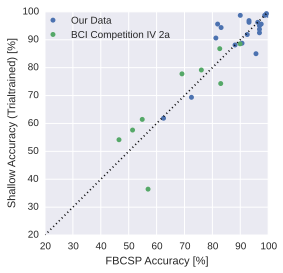

In [72]:
plot_csp_vs_epo_shallow()

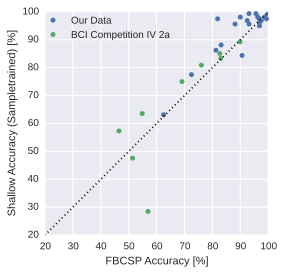

In [73]:
plot_csp_vs_cnt_shallow()

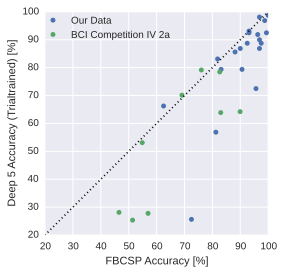

In [74]:
plot_csp_vs_epo_deep_5()

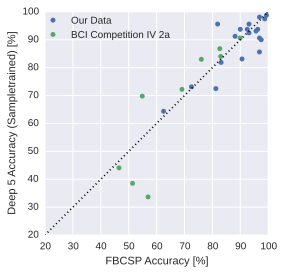

In [75]:
plot_csp_vs_cnt_deep_5()

## Training Times

* Time for a single dataset
* Averaged over all 29 datasets
* hours:minutes:seconds
* (for nets, showing runs with 4 Hz highpass, shallow square and deep5 elu)

|Model|Time|
|-|
|FBCSP|0:02:42|
|Deep5 Trialwise|0:14:29|
|Deep5 Samplewise|0:34:44|
|Shallow Trialwise|0:17:45|
|Shallow Samplewise|0:29:49|


### Kaggle

Not clear in how far to include this. As we believe kaggle data possibly has class-discriminative artefacts in the data, see:
* https://nbviewer.jupyter.org/github/robintibor/braindecode/blob/devel/braindecode/notebooks/analysis/Kaggle_Data_Analysis_Median.ipynb

|Model|Window before event|Highpass|Valid AUC| Kaggle AUC|
|-|
|Winner Ensemble|||||98.1|
|[Recurrent Convolutional Singlemodel](https://github.com/stupiding/kaggle_EEG)|7.5s|no||97.7|
|square net|7.5s|no|89.1||
|deep 6 net|7.5s|no|96.7|96.8|
|deep 5 net|8s|no|96.3|96.4|


AUC means area under the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).
Valid AUC refers to own test set, Kaggle AUC to value from submitting to Kaggle (mean over public and private leaderboard).

Would have been place 14 on Kaggle private leaderboard.


## Envelope Correlation Visualization

Correlate envelope in different frequency bands with the activations of the 4th convolutional layer of the deep 5 net. Should show information about the envelope of which frequencies at which sensors is kept in the net -> which sensors and which frequencies are "relevant" to discriminate the four classes. How to extend or improve this visualization is up for discussion :)) <span style="color:green">Now with units ordered by correlation at sensor FCC4h at band 7-13 Hz.</span>

y-Axis is center of frequency bands, x axis is unordered (200) units. Red indicates positive correlation, blue negative corelation, grey no correlation.

* We see high frequncies around 75 Hz used, for example at FCC4h -> high gamma decoding?
* We see an overall non-uniform relevance of the sensors, some sensors barely/not relevant, e.g. FC5
* Colors are flipped for lower and higher frequencies (again, see FCC4h) -> some units seem to simultaenously  encode a decrease in low and an increase in high frequencies or vice versa -> very plausible
* a lot of units with similar correlations -> a lot of redundancy in the network?


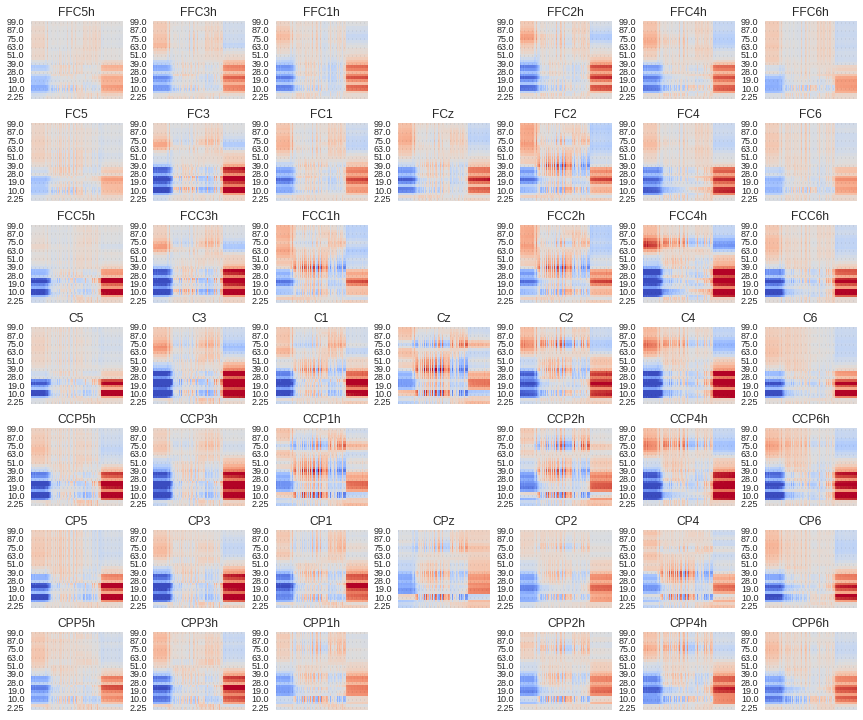

In [1]:
%%html
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA18AAALQCAYAAABv18rQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmwLVdd/v1ZQ/eezx0ykIEgrwwBGQpfihcQFNAABhIkFFQhhiABLEFAYhUCFgUJk7+CKgYFgwgkDCmDCgpoCQWKIqBAqT8HUFQMBTeEzHc45+yh1/D+sVav7t7n3LPPyb373pucfqpO7bN29967u7+9hl7fZz2P8N57WrRo0aJFixYtWrRo0aLFUiFP9gG0aNGiRYsWLVq0aNGixW5A+/DVokWLFi1atGjRokWLFicA7cNXixYtWrRo0aJFixYtWpwAtA9fLVq0aNGiRYsWLVq0aHEC0D58tWjRokWLFi1atGjRosUJQPvw1aJFixYtWrRo0aJFixYnAPpkH8CJxIMe9CDuc5/7oJRK75177rl88IMf5LWvfS1/+7d/y969exufeec738mDH/xgjhw5wrve9S6++tWvAqC15tnPfjYvfOELAXj+85/PgQMH6Ha76bMf+chHmM1mPPWpT+Vb3/rWCTjDFrDcON9000284Q1v4MYbb8R7z/Of/3ye97znceDAgTbOJwHLjDXAl7/8ZV7zmtdw2WWX8dKXvhSgjXWLFkvCMuvzzTffzBvf+Ea+//3v473nsssu4xd/8Rfb+nySsOy2G2B9fZ2LLrqIZz3rWbz85S9vY30SsOw4/87v/A5/+qd/ilKKiy++mF//9V+/W8R5Vz18AXzsYx/jXve614b3hRC84AUv4Fd/9Vc3bHPO8ZKXvIQHPOABfPaznyXPc26++WZ+7dd+jUOHDvGqV70KgLe//e086lGPanz2wIEDyzmRFltiWXF+/etfzxOe8AQuu+wyfvSjH3HxxRfz6Ec/mk6ncyJOq8UmON6xPnjwIFdccQWf/vSn+eQnP8lDH/pQhBAn4lRatNj1WFbb/YY3vIGHPexhvP/97+eWW27hoosu4rGPfSxa77ph0CmDZbXdJX73d393qcffYntYVpw/85nP8LWvfY3Pfe5zOOd4xStewQ033ECWZSfitI4JbauzDXz5y1/mlltu4brrrktP7/e6171417vexaFDh9J+W/lVX3fddVx//fWsrq7ym7/5m1x44YVLP+4WO8N24vzc5z6Xxz3ucQCcddZZ3Oc+9+GGG27gQQ96ENDG+e6C7cT6wQ9+MNdccw2vf/3rN63bbaxbtDg1sN22+5GPfCQAZ555Jve+97357ne/y/nnnw+09fnugq1iffDgwbTff/7nf/L1r3+dZzzjGRu+o431qY/t1OlPfvKTXH755Wny+4Mf/CBQJT1O5Ti3a75qONrD0ze+8Q0e//jHN9KmAOeddx4PfehDU/maa67hkksu4Rd+4Rf44z/+4/S+cw6Az372s7z2ta/lXe961xKOvsV2cSxxfvKTn0y/3wfgn//5n7nttttSh97G+dTDscT6gQ984IbtJdpYt2hx4nEs9flJT3oSKysrAPzwhz/khhtu4CEPeQjQ1udTEXcl1g972MPSZ6+66iquvPLKDZnNNtanFo6lTn/nO9/hwIEDPOc5z+HpT3861157bdrvVI/zrst8Pf/5z28E81GPehRvetOb8N7z0Y9+lM985jNpmxCC6667jsOHD3P66adv+b1PfOIT+bEf+zEuuOAC/ud//ofLLruM+973vpx99tl473n2s58NhNn0m266aTkn1yJhWXGG0HFfeumlHDlyhLe85S3s27ePtbW1Ns4nCcuM9dHQxrpFi+Vg2fX58OHDvOIVr+ClL30pZ511FgcOHGjr80nCsmJ9/fXX86AHPYiHP/zhfPnLX25sa2N94rGsOB85coTvfOc7/OEf/iE333wzz33uczn//PM577zzTvk477qHr7vCPd23bx8333zzlt/7ohe9KP1///vfn6c97Wn8zd/8Dc973vNQSqW0qJQyPZG3WB6WFWeAc845h7/+67/mwIEDvPjFL6bb7XK/+92vjfNJwjJjfTS0sW7RYjlYZn2+9dZbeclLXsIFF1zAr/zKr6T32/p8crCMWN922218/OMf5/rrrwfCw1Z9zW4b6xOPZdXp4XDIJZdcgtaac889l6c+9al85StfuVuMu1vaYQ1HS38++tGP5u/+7u+YTqeN97///e9z7bXX4pzj29/+dmObMeZusehvN+Kuxnk2m/GpT30qVeJ73/vePOlJT+KrX/1qK8hwiuKuxnoebXxbtDj5OJb6vLq6yotf/GIuueQSXv7yly/7UFscI+5qrP/+7/+eW2+9lQsvvJDHP/7xfPjDH+ZDH/oQV155ZduOn4I4ljp97rnncuTIkbRNSnm3EdBpH762gcc//vH8+I//OK9+9atZW1sD4Ec/+hFXXHEF1loAXvayl/GFL3wBCHLkX/ziF3niE5+4pQhHi1MLi+Kc5zlXX301f/ZnfwaEzvwf/uEfePCDH9zG+W6G7dTpEt77Nr4tWpzC2E59fve7381jHvMYXvCCF5zMQ21xjFgU64svvphvfOMbfOUrX+ErX/kKL3rRi3jRi17ElVde2bbjdyNsp05feOGFfPSjH6UoCu68806++MUv8tjHPvZuEee7xyPiccKiWY+ttr///e/nXe96F8985jPRWtPr9bj00kt51rOeBQRJ07e85S28853vRGvNFVdcwSMe8QgOHDiw4Xvb2Zfl4kTE+Q/+4A+w1nLBBRdwySWXtHE+SVhmrF/ykpfw9a9/HWMMUkquvvpqXvayl3HxxRe3sW7RYglYZn3+xCc+wb3uda/GGqBf/uVf5nGPe1xbn08ClhnrnXxvG+vlYplxvvzyy/nBD37Ak5/8ZLrdLpdeeimPecxj7hbjMeHvDo+ILVq0aNGiRYsWLVq0aHE3R0s7bNGiRYsWLVq0aNGiRYsTgPbhq0WLFi1atGjRokWLFi1OALZc8/XDH/6Qq666isFggFKKK664giuvvJLhcIhSire97W0NRb8vfOELfOITn0BKyYUXXsgll1yy9BNocXzQxnp3oI1zixb3LLR1enegjfPuQBvnXQK/Bf7P//k//ktf+pL33vsPf/jD/md/9mcb5U9/+tNpX2utf8YznuGLovDOOf+sZz3LTyaTrb6+xSmENta7A22cW7S4Z6Gt07sDbZx3B9o47w5smfnq9Xrccccd5UMaP//zP98o//d//3fa97bbbmP//v1JY/+8887j+9//Pg94wAOO+v03/M9/k9sxAo8VGu0KnAhMSIHH01Qnkd7hhWBN7wFgz+QWDnbvhcAj8Egs0juEdzih0nc4oZDexu8Ir+V7VobjdSj65jBjPUJ6ixOKngn+ATPVwwlJ16xRyA5OKHxUThFRr8QLQa9YTccPYGWGR9Ax6xiVp99UzmClRtspIJjpHsoVeCER3rGm96ApcCi0LxDe4YXECp2OH0B5g5EZ0lfmceU18zVlF+E9Xgh+/H73P2oslhnrW771DbJiDeEdVnVQZoKXasN+HonAIZzFS8Va/ww8gpUjN3LnnvtuuB+0mzFTPZQ3OCHxSDyC3E3Cb8kMI7JwnUSG9gWFyFmZ3cZqvh+Bx3jNnuJWnNRMVR+BJ7djjAzx8ggETU2abnEELxROSAQeJxROKHKzjpMaK8J1yeyUQnXI7CTFuYwlwO3+DLQweASZMAhCHAufoUT4v7yvLbpxHOVx2RpzWMbtP3H/c05KnAFu+s//Sz5bRXiH0V10McbpPJxL7dznr+tq9zSckOxZv5mD/bPD+XhL5qYI71DOYFSO9BaPYKr7ZHaKE4qOWcdJhRU61ok8/cZwfBsHB+eQuWkqG91hnO9hzIB9xY+YZCMm9PC1a6mEwXlJLqY4FMPZHazm+7E+3BM9v4aROcZrRvZOCtmhY9YpVDB1XJMrjOyd6XzX5ApKhGOXuBRrh2pch7LtKbeH86iuGRDbO4dHcr/7/fhRY9Fid2CZdfr2f/0K+eQweIfNuqjZGDZru4UIfaF3ICSH9t4HJxR7D36P2/fdHy9CS6bdDOVNap89AuktYzUk98HPR7kCI/PGGMCIDIHn9MP/y49GD0QJi8Rx2uEbsLrLwf7ZKG8YTm5nrbMPCH08NMcSw8ntOKmQzuKFxEmNk4q8WMcJhdEdpDNoOwt9tJmCEEzyEcoZXDz3m8W5dOQM4xW5mKU6bNFIbOrLpHBYX74X2rxQ5x2O6jqWx3gy2+6D//xXqOl6GD/pHGlmm+5XjlNKrO05By8UvfXbODI6J/WHwjsEPsWzHP8UsoPEol0BQCE78RqEa+II/eq+8U3c0TsH7wVCeE5bP0Chu6zl++iaVaR3FKrTGDtBGHcJ7xiMb8cLybQzojM9EvpmlZHP1vBSUegeRuX0JgcZd/fSmxxMsXZCpe/5QXEuWjg8AiUs5dDKOokU1XVQwmO8RIqqPXdebBjLlvfK//egfSclzrf/61dQJoyRnMoQzjbiCdWYsf66OjorjIsnB1ntnZ7iXMZOeocVGodEYSh8jhCe3E9xQqay93GMGq/J/ulN3NE5O/WFp09+gNFdVrO99M1hBJ5CdlDepDpUth9lnAEm3T10J4dwKsOonHy6ipeKWT7ESk1/fAfrvf30x3fghWTc3RueHOK9c6O9N0o6vActa/1vvP/KV4nDeoWoxbk8p8Y1jJ955Pn7N43Dlmu+XvjCF/KP//iP/NZv/RY/+MEPmM1mjXKe57UfEg0Hae89Um69pGx1dbVZjlr+1fa1rbdv2H91h+UFv7ewvMPjX3Q+i75/4fFvvf9WWGas58/zyNr6MZWP+bosvI9ObJzX5r5/vjz/+4v23wpLr9MLYr3o2m+M9bHV0YX30trWsTj+bcqxfv/2Y91id2CZdfpY2+qd1+et7/ed1udjbfsXHf9O2+5FbflWWHbbvfHajndYXhTrY+unF8f6ePc9c7FaO7J1eXVBeW7/o+HEx3nZ47EF5R2Px5Y7xlgc1/k6vPX+R8OWma877riDyy+/nPvd73687W1v47zzzuOnfuqnUvnhD3942vf000/nzjvvZDaboZTixhtv5D73uc+WP15mrIT3COHTTAmEJ+9ye9rfu/T+/HeUWS/pbZphL8tehNk1gW9kjqQPn/EIpLDgbci8xP1cOhaHF9WlKmfxyv/FnFp/mQ2p9q8qQ3OGQTS2HQ3z+6QZidpsSrpatePxO9BTWWaslZmiylkC71Fmhiom1fZigiokCAnepe3aTvFC4a1Js1thptSleIZZVB9nXeSGLFW6n4gzOHiULTC1a6dsgXQWp1W8J2zKeoVYV9cWyvsw5JxEzLQK7+Jsaoh7uA/Dd0kX/q8fD0DhFEJ6jFcUXqcZMuMtxldZN0OWtgMUXqey8xLjNMbpxqzSyYhzA75ZbxsxibPj8/uFjWV2J3xGuxnKZYiYMS7rLITMbzkLJrxEYtNMqxMKicc6m35TAM6FeABYJJ34f5hxFdjQkiC9iO/FmVjvcCHi4T0R3ndohJ/FDHqVBTW1TGXVkpU5K4mgmv0rZ3qB9L3ldodKn2vuX73XYndjqXW67o2zQ5+c8v4s7+kyy6WcwQsR23QRstU+o+dWMSKsZfFCoO0s9d2WLpkoUMWUwmd4JF3WUcUUZSbhPSHIzZRZzKR4BFZojMjSsSgh8UKizDpF3seKwFQQ3uEjayEzoW/KijET78B7rMzoFGtoO0Ubjc8E1stYH1XKdlkvaxktifci7ROOSYX2JY40yj8JuAX1edlttzSzwJ7wYeQg7Axhatm5WBZCgPepHLKEWciURWYCkXlUtv2NfnjuPAMbwKbMR5lhEDawD+JOiNh2uziuka5otItNVkXtvJylAR/OMYwRm4yo8v0wBgxjwcIpkCHTZb1K4yvrQ7k8XoNEO4WPWTLrJdap1C9bpxrlkxXncB197X+LqF0j4Sz4eFfGMTfl+EaKkCmbG2dt+jti8T5HG6PW75vqmSCMG+rjie0cx2bfO//5cmzpfbyXatkuF8sOgfRlHxz+B9K2Eq62fas6veXDV57nvP71r2ffvn2ceeaZ/NzP/Ryvec1rUvkJT3gC//Vf/8V73vMe3ve+93HFFVfw0pe+FCklL37xixuLAjfDcDgEW82eDAcDXGP7oLn/YNC41MPBgEPz31d7uBoO5/YfDiGmusvt9Wo5HAxYnys3Pz+gaJSHG45v/vjnP9/4/U2+n9rNEc6nmCs3z69x/MPhxvOlebMdDcuM9WjQh9lao+znt8+V57cfbJzX3H2x2XWeu47zcT44V57fPqmXN4nz/O9tuG/rcdoszjUMhiPA1MpDqB3RYDjEehrl+vcN5o5vKyy9Tg8GMKtmhuZjORw0Y7PZ9kPz+8+VN1zLYrWxvR6L0aDPnXPlrer8/LUcDoeN7xtsUsas1/ZfdG8OofbOhntr7vs3296iRR1Lb7vHh5rl+e0Lys22dK4PnB8DDIdg15tlV7WNo0Gf2+e+386V69u300dvaLunVe+waftVQ2gv5tvuo/c9g03K28Wy2+7RoA/TWj/d7zW3LyoP+tTn/Dcfz5jm9sb+zbZxNOhTz62NBv3ald6sn17ct8y3/VuNQ+aPrz8YUY9tKFffMBiMsLWbaTAY4XyzvB2ckDibSbM8d9027D+3vZ77mR9nDufqxMI+bTDgjrnyfJzqBNj5uGyI22Cw4T6ZbyO2HI/NxTmMz2pxHg4xjfHYaG5MsL04n1ST5e/9z3+FNV/exzVQs8SpLrmmdZQ87bUsrPlamdzKoe6Zm2a+rMzS+hArdZxtk6jY8FdrvrKU1ejPDrOer6RsWNes4YWgkB2MzOmZIxSyg5U6cbrrx1qu+aqvA/IIcjvBSo0TCuWKkKWJ5+uF3MBbnl/zVaJc81Vmt8o1a+XxQi0rFrNzAretNV/LxB3/8mV0fPhyKkOZ2YbYAinzVR7v+vBMvFAMD/+Qg3t/LM1OlCjX99TXxAFpnZCVWbpmVui0dmrv+Ecc7J2FwGO9Yv/kh1iVs5bvRXpLrzjCJBtuzCTGYx5Mw1oeH3ntZWw7xRpW5XEdnkXbKUZ1yMwELwTTbJiyagA/smeRS4NDooVJs4LWq7Q+SODjuoHm2qC0fsDXsqpxpuYRDzzj+AZwB0hrvpzFZD10McaretZYNtZ+lf+Xa75WxrdyqHevdN/2iiNxP4uLHG8vJONsSNeEdVedYhUnM1zMdjsh05rP/vrt3Dk6jzwO8Abrt2F1h7XuflYZceb0B6x39rLOsDFLlVFg0XHNl2TP9BYOdc7ExZntHmsYkVH4nH3mFsbZkP7sEFMdGvIjYg/77S2pDaiv+arP5tXXcZWv9UxYum5zM2jlvfKA+933eIWuRYsNuP3fvko+PhTWfOU91HR922u+rNDsO3gDt+4/P2W+enYVHTNeHkGhuuR2zEF1BiN3J1PVp2PX41rZaewbDWMxIBMFZ97+n3xv3/+LFpYu65x+x39jsw4/Gj0QLQynHfket4/uG44JsaGe7ZncEtZ4TVcp8j5GhTXc/elBjMqZ6T79+PBVZgO8kKz1TqM/PZja7gPZ/chEgUOSCZMyX8arhet1Q+bLN9qbsvzQ+599nCO4fRz+5l+ipmsh+6NzxFHWfBEzXyUme8/Byoze6i0c2XteyCbGPlDEMVnZFytvmMoeCpPWfM1kt5H5Ml4jheO01e9zy+D/CT+J54y172F0l0PdM+mbw2g7ZZKN0G6W2nvhHUaGtcHlmq8i65MV69War9paIC8EnemRtC4MYNzdC1RrBr87/TEyafFeoGXFzjJeouprgYTDOoWMma+yf57PdJXln/qJ7Q3Sjzfu+L9/i44PX+X6R/wmk/RxPFa+rg/vhZWa3vhOVgdnhvVdW6z5MoSHwK3WfHkkp01v3LDmy6qcI/l+BuYQwntmqot2sw1r+6S39Mfh0W07a77KtX3lmi+o4nyjOTf10Vq4RuarrJ8yjseMV2mNPWye4So/86jzN1/bt2Xma9lQrkDZqoJLZ6CWqi5RXnDpLE5Wg1Bde3r3SGxJZYpiCIn2QEgby9oiXy8EzlcLBi0qLMCNr2lQ5H16UCsH4eFhpxosxQNA2RlCKrxQaDcNi3mFQpsJQuVYGRphZWc4IVHx4at6gAoUTOsDhaysuOXieoesqG+iWuDra4s+Q8q/PliLlf8kUpQS5c7XaAibPfOX2SJnA7WhRNkJRmpBufja+SCyUD81hySPDbARGc5LpAj0AC2g8DlOhgGx8zJeP5linrlpoiOUA/3ymMsHhqwY46Vimg/JizFSZjip0cU4fE6FziYrxhjVCQ8gUlUPCMSHjnIY7gXz4am/730tDR4b9bSt/kG/cZB+opHPVslma4Gm4A2qmOLUxmZm/rpm2QArM3SxjuyGCQYvRKjvkQrihMTJDO0KDFma4AgPvHlczB0e0MpBm/SGwmegAoVReoN3ikLkSB8Xg4usPrEFkGhCuZvESRND5mdp39yOQYV2Q7qCjllH2YJchDZJ6RHSmRAzIZj6To3i3FzMWyIs5vXYWO8b12uOprIdimmLFscKZSYIM0M4A0IizRQfRaoakyglFS1R/sMkUynaULZnJR0bFAhSv26lbFDSPGU5TmaiEEzDQ2Bc7C7woa9wFoNGEf4vaWllmwmEvpQwYRmOo5obd0KlhwknVBB8EjK9JwiDSuEsQobjKynjzkuQIGJ7Yb3C4WqL8xXWbxyQl9ekxE7pU0uBiNR/EdvnTR6yq32rf51QYdI8Tnq5UozKV0PSRNv3IRZKVA/H5SC8TiEM//j0vsJU9xelSIKv+m4hEd7W+vI67b2e94jfXRNMK+/B+v1c0hCDyIZHCY8FpHDpmFUciHvKhy+Pj4P2Mp6yzInU2bv4bVHylgZRLaEo/xeb0P8a7wsZxk1CghBJdM4hq3MsP1eOu71M16d8v7x2Zd2GciwUZKhKkj2xnpRU5frSmzSBG8dPqZ5GOmlFWXQQ+0jpbdhG3AeX9iu/WRDj7El9tBAeYn9cLQDw6SGsOqjNH7LVFvV6y4ev7373u7zjHe/gjDPO4I477uDJT34yX/jCF4CgsvKYxzyGK664Iu3f+g3cfdHGenegjXOLFvcstHV6d6CN8+5AG+fdgS0fvr72ta/x0z/90/zSL/0SH/vYx5BS8r73vQ+AV73qVbzgBS9I+zrneO9738snP/lJlFI8+9nP5mlPexqdTueo31+KbUBduGCjgAVUQhvCV5kgUZudCIs2q9klaApThGfV8F/51F9SgiDOksVF9Y0FflDLfLlqYd6c6EUoO0DF12qBfdgeZmRk5K9vEIbwDmg+0VeflylTUz5th9kW1/iN8v366/z7R8MyY+1FmBXzorwOokppw4b0thACHzOI5QxaXdZ0/nwbsym+WnjbpOnJxvEIPIggBRtmdJr3Tfp8TQTGU90TG6+pb8jneyHjOYRX4v3hpY7ZSVnd06J6DYfVfF+J6r5M92bcJkU1y7rZYuYTGWcIVJ20YNfZRhazTiUW2MZ70ju8t0gTZZtj6IJwhk0Z6PBemG2rW0iU+3oELtovhBnZLNWZsuykJuS4DVYGKwKFSjIW5fUtZ+qBQF32QShAiLAYW3mDlibQIfFYVdEilTAp8w1U9BNEY0a+0V55AfPZzU3vNU6JLGeLUwPLrNNqNkbO1hFx8YqcTfEyZLOE83hZm+l1Fe1QmylCeYSZpXrjhMTIPLXPVuiQsVahjs1UF4UJ2WwUM9XFeI2TEjzMfAevssQKmYouXmmcypD4kKWWGQpbyVL7ioomcCgzQcZ2IJutI7VFKVNJb8sMp0IG3uoueraGF5LcjpMsPcDMBhaL9VFgKfbFxkmUKGfxw3uF16hadsCWma/aEGA7WibLbru3RF0kqf4eJSOkKXzhUChMIwtVZrHK8VjZfm/MjATCFpCsVBQhk5GofHG8GGLsEIhG3xyyWeVSjhwZKY4hK2twFoS2gIjjSB9evUelMdoiCZSdYTv9Myw/zlWmMDJ7sJsvA0n718fRIo2BSzGooyEI0bi0BMZHWZmQzW5S8G0Up0HQiG08gsBki78bxvBVhrN6Htgo7FUuDaG2BEfg8L42Rpz/3GYrYmqxq2c2q8/4xut2WClbPnw985nP5LLLLuOb3/wmP/zhD/nIRz4CwOc//3l+8id/kv37K/36u+I30OLUQRvr3YE2zi1a3LPQ1undgTbOuwNtnHcHttQi//jHP84LX/hC3v3ud3PppZfysY99DIDrrruO5z3veY1975rP1w59vHboy3Dc/QZ26iGyU/+n4+45tH0PkWXG+th9JZp+Iife52vJvhILfSSOn8/Xsuv0ifcFOr4+X8fqpXesnm7HM9YtdgdOaNu9Pj6m8rH63h2rB9Ext93zffRC76cFnkDb9H6Ck9B27zTWO/b5Ot6ebsfW9i86/vWd+nwt2P9ouPv10cfmbXe8/dyONc4L/doW9tHHwefr8OHD/MRP/AQAe/bs4dvf/jbf+973OOOMMzbIWd4Vv4FAEVIVnS/9he1OqpTm96JatFl538iG2htsTjUrF7wmWlLy5SgFOcqFf7ZamCuil5MzSehCOpMU9TxiAxVOiup7vIgCHjW/LyfC4vyQEjdJCSi8b5CuQLqsPDOEcIly5UVYqF+nVkrvogxHUFoqfY7K65C+Zxvp7mXHOvlFSJVoafVtzVefzjlQE4IaZhl37VfJ3BSobuDMzxgzIBdTprLyzNLCxNciqChhyWZrHPEdJJ6Mgmy6RqejOKz2g+qTFzcxk2en75ipgqnqJ+qflir5vliZYVRQ7cqKMVZqjJR0ZqvgPZ3ZKjZS8Ga6R296iKmdkBkRFmofZeHtopjd1QXay46zLtaRLlKInUUVY9Qsfq93wZdnVlP5KsaomUy0EFFMsJGK4oVEeZOouspHnzYXYiprQi5Aw8vPinAP6GLMuEbXVWaCMtPo0aWQtsAKhfU6+nPooE4WaRYq3pPazphmUdjHq0SLsF6h7BircpQtKOkr1mukM+H4vWXmNZkUGKcwXqdjNj6USxReo7xOXmbGa4zX6V7h4khxAAAgAElEQVQo998uhaXFPR/LrNNqcgRpp+A9Mu8i1g4jMamtluuTsL2kjK+NERiyYi30bWtHgqKxDKqwuCmZCXQgKS3KWzJrEJlHuwLhg3ejxKFdgRQO7YPAjhIWNVtPtF0lbPSInASPPqnJ7ZQZEkSoM0F5T2NRCCSKQANXZoJVHawKnwvCAzIKa0S6mjVJYMDInA5hkOaFZH0WxJzGRUHXZpFQBRNjyGyWxhFTl2NNntqfsc3xJpjkei+YmBnSdLYloLPstlvOJkjrQhyzHDlZC8KWZaynU6SslgfI6RipgvCZUxnGTBGlmrSS0dMtqDsHwbNAB0VUbXUap5Rtd42OJmuWBEJ4pC0aCpRhOUIp/iDTazk2E0ImOppHgmyKRgRPTt/cBxrq2F5IZjZ4ec2sDnTTGKsilsvjLZxGupofp9XMnE6xntkMHT9/MuOcfL68Q5TLH+Z8vspyuU244M8npMfVfEvLelYu66kopEHxMFD3KwEM70WkCVbLRZxQaAxG6EA/jMJaSdwkCl6VFNXSizV5ssbvDmJ8riG6Ebi9sY4TlizU4UQYyzmhggCbd8Grr/ZcYRFR5VgkQSzrZVI7dF4kKjGU/m8CsaB/3vLh69JLL+Wtb30rX/jCFzh06BCve93r+Pa3v81973vftM+x+XwNwFaKhRs8ODbx+Jn38Nngx+TNXNluXZ77/jvnynVi9nAwmPOxWOwhYufKdU+izT2Q5j2A5jxR5vwUGn4Gm/opbG+QvsxY3xWfr2a51/D72Dyu835o874TTf+Qehw3O57GfTDnq7XBK2qzOM95XdWx0StmRD3Om/l8FQt9vk5+nNO5Tmrn3u81r902vGMaPj2DOc+04QBqCqmhPG2W545nPtbznh91z7eNPl8bvfTqHh/D4RCmTZ+xxufnvGRCrLf2EJn3dKtjux4iLXYPltp293twZFord+e2Ly4329L5+jts+vQNh+CmzXKtbR/1e/xo7vjm6/OGvqJW3xZ6Pw0HMGn6fDG3f/3zwevJzJVrbfdgROGa+9e9n/rb9H6CE9F292CywOer7ve0yfbDtfIGv8tNYzs/Hmt6utU9H+d9vua3h7a/2c/Px3re/6n++9vz+bJz5VpbPhg1+ob+YLTJvbIYJ6SP3rHP19HHT5t7VzbjupW33WY+X/Nx2onP12Z+cPP3zQafL9+M43wdbvbRo7k+eqPP13YMvLZ8+Dr33HP5vd/7vcZ755xzDhdccEEqP/CBD0yLAZ/0pCfxpCc9afGvtjjl0MZ6d6CNc4sW9yy0dXp3oI3z7kAb592Bk+vz5U2k6gRIb8GxQbWk8vkytdS0RNlpwz+joS7IRlXCutJhmWJuKO3U1OfqSklQKjO6pKyyGUoPkUApCuqIQRktpGlFpN5Jb3E+0u9KlZSa2mEwapSBulSavcXUJzV/DCFk5WlCpYqYrpuv1FlOpieQMhPUbBxmF5xFFpOgWlVTS2p4ajkLUgUPOAVqshbU8OL5Km+SsaL0FqcUmZ2wqkbBeFlkiZ6p3Qwj+mhRUJCjRYEuxliv8Dg60qDNBG8FRTekulXcXqpqlXRS63VQzHEWoifVLB9VNIeYqndCoUyY4VM11SUnwjnJqJBlhcI4j/ESIX26T42vfMikcDgcxumGr0SZFk96TL4y9TuZULMxclL6fHnEeA2R5Rt3LBUuvQOpgyea9sjxETI7TTRTbSaBdhjpJVblZGaMzB3aTilUt/LNcwU2Kg86pdBuFjyKYpuRuSnSmkT5s0hUnAEsaQOWZp0p4yZsUGEr6YpORj8bgnG60Z1AdySouVlk9CUM9JaZ1cG3xIuqTvumUmlJd97MULtel9P7rc9XiyVDHjmIu/P2QOXpD3CrRxBZho/rTES5viTWZ28tQmfka3di8x7ceSudc46g9AyjOgxWb0aaGV5leCHIOyPy8UE6+/czXLuVI/0z6U0OIjuWzvQIujMiK8YUvZxhcTBQ4YSjKycMikNBTdFZFC5QE6frBIXBLNDJ4px06dtX5H28UGSTw4x7p1GoDlZosnyE0R1mqkvfWaadFfLpKrPOCk4qprLHgDtxMsNKzepUMzMK4wS51kjhcV5gnGgY72rlKYxESo/3QUnNuXK5Q+06z5VPBmQxQUxWoaSkzSab+lyWKPtsXYwx3iOn4+Tb6oWkOzuSxk1OKGRmyYox670RHbPOTPXIzRivQz8daKiGQuZ03BgVPeI0htxPA/UtshyMzAMtlFJBs1LJNiJDCoXV3ejRWGCyHk5qjMrRuouVmkJ16BSrWB2UAcvXQgaPyHKZSmFlUEX2opHRME6iZKWaJ6J6cr3ttl6meyNd57nyiUYawxDHneWSEGioTicqMaUytW9Q/INSYs1PjY0qgPXf3Py95j0lN/l8NWaPStbzzwe1MbCnpJTKGr1Upm0+UlGb7wf16XiGQNM0OSwvCP87IZDBKgwn6mPtuWNGbHxzDluvzGvRokWLFi1atGjRokWLFscFW2a+/vzP/5y//Mu/BODWW2/lpptuYu/evWlB3ytf+UrOP//8tH9r9nb3RRvr3YE2zi1a3LPQ1undgTbOuwNtnHcHtnz4uuiii7jooouAYO72lKc8BSkll19++YZ975IhazJODqZnwgcS3QbaYUn58w68SEo0ALKWzpxX/ypToEnprDReLKl+eBzRsDUmAZMha2mEGA1dyzRrUG5pmjlDUFERzgY9PBEoR1I6cEVUl7EoGU1anQ2ugdHwTUVaWkivykQzatIoa/9HMzofjem8aFIN65Sm7ariLTPWSd3Q1+LoTErLinjNRbmPswRD45jmLmkPZUo40gFKRTtXKuREWmYZj4qapwLxzEtkTKF7L7ClSaB3EL9TU6T7T2EDbZS6sbVH2hlKSPA+KD3JQBPTZoKXgRoXDD1nWJ2jiileBGqFiNTadG2Eb9BdS/pgua2xH02jPwDpm98lF4R72XXaSwVSBXlSIUApvAqUn3lTVlAIJ/FS4FQWlE2FDOpkQkdT5HBtS9VQKzVKlAqBAiszrMoxMkc5g5F5pJpmSBGoFQWBipgxjfeSSuaowjsslWJpusbRxLhUVAoGja667s4gpQ33m/eBEu2COqoXIhk0ey+QzqOETxTpso0p6cQpfpG6UiqUpmtaq/vl58r3W7RYap12Fm8MOIcwRfg/wpc8OoBIv/JF0fh4WS7pu05lSGtwSkNUsfUy1EcvVVCL1Z2gLhhVBrWYYnwWlMp8oOUaH2iLwloQwchYRqq/jeqhFpnMeU2k8mo7C9RkZxNd2Sqd2nEA6Q2ZmSBdgTaR6pSXKnHN89sMIjKO5s1at2OkvBWWPh4zBUxjG6kUTMYInaX+V5S0w/IES7U8WyCVhtmk6t8BZabheomgBO2kQpsx3guyYsxED0I76i2ZmeAzSWbG+HwPmZ2iJkdSn57ZCWq6FujfI0UhcnSxHvsBHVX0Qh9qfDS9lxovFPn0MEWvh4n9RKCvKYzMGJhpoLIXQbEWAm1R2VlSW7ZOIARYVylaQ6AY4kql67DQxbhAM6zvM08xXEQ5XHofLUJdg9BfB2XpcqtKr3UqZyirUAdFqfRdmR4n5WFC/1oqGiphG/T4klYfXnXqV0vqYBr1xr7TE8f7qjJZLs2+G/2iiKqKkU44j/L4pLebvi8o++ig2ahE/RlEooRLY2tZnqNo9tGNuLA5hbLx21tujfj85z/PIx7xCE477TS+9KUv8epXv5rXve51HD5cadvUzd6EEMnsbSss0t9ftt/A8fb5OlZ/gkU+Xzv1/bornkDLiPXx94o5tuuwdK+YHfpQLPQLOU6+EnUsq07Pe7Idc6wXerBt7cu101hvrGNb/94iz5Kd+wIdH6+YFrsPS2m7x5NmeTKd2z7d2fZj9NnbafuxqO1fVL8XHe94rj7Ol+e9oebL8/tvB0tru+ev5Xzs1yc7277sWC8a/+2071iw/6JY7rS8CMvro09tn6+d+rAed9/VHY/Htt7/aNiW4MZ1113Hhz70IY4cOcJjHvMYzj77bP7kT/6Ea6+9lle+8pXAXTN7a3HqoY317kAb5xYt7llo6/TuQBvn3YE2zvdsLHz4uuGGG5K523e+8x3OPvtsIPrd1CgId8XsbTAcQrGeKHejfi+ojMS0YemvVKYaR4N+SHUKiYvlCRW9bjQcILxJae/RsF8ZFOOSH0GpvDIa9nFUaoajfo87yzSqcJv6WqxRqq6IoOdfO5/RcIAtU6JCMhgGj6Py/IbDAcJMU1p0NByk/4V3jPr9qKjo4/kPEMwaZXCJgjYa9jE1hZnRcBCTvR5E/LzYSGE70bEuvZ8CvTRcZ19SDr1j1Os2fSR6nYrq4B2jwYCxr857MBzho1+IRwR/MzdOtK6VYeU/4oRiOOwCRboGg5U93Fajbg1W9uBkSIUrZ+iv7GMsXFJU3NvPwc2CKTKOPb0O1hU4lSO8ZU+3h3XBeFQ4y55eB2c9ysxwKg9xExJtQ7m/ErxpfDTn6w9W8JhEdesNV/DRkBAR6olxFb10MBwm6oKL+zsCBXE7aofLrNO9087AToLBtMs6DFSG1XmKb7+/gq3xb3rdEVYICt3DCcngjLNZl3kyQ+yu7Me4AhdNEnsrOdaEGVArNYNhD+Nm0ZhRMRj1cK5ItNQ9e/dxqKSNCkl/735MVETUGPp79jPGk4kCj2TvqAPRVcQjWel3Md7iZIbyhj2DLlbMAo3YG/aOBrixDopeKmOln+GdpSOnOKGSL1dPB2XWzkoHKao63VnpIJimNqy3kuOYJbXO7koHXx6PF/T25BDbhJZ22KLEsur04Jz7IO+8BZzHD4bs7XQhq+rznjku3d69+0AqJv09WNVhzznncDDrY1SOlRmjlb242RpWd5F2xqC3gp9UTmD94R787M5EQR8NelBU5saj4YhSvVQ6w3DYx8e22yM2eHX2hyN8rY8cDoeYknIlBP3RChYf6VeO0WAFDt8GlH1P8EBS2FrbPmP/YEpHWvb0MjIZ+x4v2NPVKDGuKEp9ha31Tft7GuvHSMB6Ab0MIWplmh5IJyrOAKOOxo+n4DwiyxlK8LNpivVQC/xsipAS7xxDrcDEZRXWsJIr1uKSEOktKx2JMKX6oWBvZ4SaHgn9rJ0xGpyGXjuMkxrlCvb2eknBWrqClUxxMwQzbRe+39sitX0r3ZxVyhGdiv5KpeJvHJ8JibRFHI8NMYigVCvD/uLIIVymwIdxhRNxPBljn/ppB93eCq42Puv2V/AEFUuHoNtfwTrSmLXbX0nDGucFnV7Yvh21w2XGeTgc4ov1RClc7LNalX0cd5e5HY9gZdBLJtkAK8M+yk1BdJA4BqNRUPkWQSt4NOojcVgCDXGl32Uc+zIlDKNeF1tTjh71u6zVzLNLn9NyKcJwNIrLVMLSoMFgSGnZ7WXYX0RKovC+Oe6O4+hy3C3xDAYjRM3na1Q+N6TxZ/DirLcpPv7vvUjenYvG3Asfvr773e8mc7f9+/dz1VVXsbKywnQ65S1vecsxmb21OLXQxnp3oI1zixb3LLR1enegjfPuQBvnez4WPnxdcMEFydzt/PPP55prrmlsP/3001uzt3sI2ljvDrRxbtHinoW2Tu8OtHHeHWjjfM/HSTVZFlHZLqidBBVAWSrpQJIHEhDVdXwyhys/X1cDVN401EtKtTKPiMbMsSx0MOcVConFUhnYllQvWaMjJrPmo1B9/Bz1QniXlJPmjd7q51WmPp1QG9UO45+jMrJzBMWm8hgdqqHwVx7/vDLiyaYoqckqcu1woG/k3aCKpFQwc6R2+FIEyoMzeKnJVtZwMkNMVsntJJjYygzliqRCZ4VG+1DWIppwO5vUjsp0NwSzRilC+rlU4QmU1pBwVrigiCkVCrNBIadMrQcVIIfVXZSxyTTbqWrGyagcqfPwmnUpDf4K3cVJjUdwZJzT1cGos6NVMtosnELXzMO1dMysRkmb6CzWqaRqWVoVnmwzbYAiG8Q67TFZoH/arHt0o05n8TIoT1mZ4bJgelrer9pOg+FlWe91eM9nIpgq6xE9G8w8lZ2hhULbGVPVJ7fjqJwpUNhg5BnbG4CZz5F2hkcw800jaCkczksm2RAjMgbuVqaqT+EznFdMswEz1aPwOdIZJvmIwfh2Jt09ABgf7tPSiDTLCjTBuFNR0UZcVIaCUu0wGHvPqx3Wr91mhpUtWiwDk5Wz6ESjXdNbQeddXN4/en22BV5lrPdPx8ic3mgva/leLArrNSN/C9IGpVtpg3KgtIaJCzTEdddnyJ14EQzQvZBoM2GWZWg7A2eYOU0uFVkxRjiPmI4xTmOFQs7WmfkstotBqVgIn9RNC92jUB1GszEz3WemejhCu2yi4bKerDLp7aNz5FaKTqANOyTZ5DAu6+ClYu9gHSUszku0NMng3nqVKMMCjxY2KDHW1NKSknJdwTT10VvTDpcJn3eRWVDJ81kH0elCTe2wXA5S0rfK/53OcUrjdYaTGieDcrDR3UodUoiwTYd21qlA/S5VbktlW+t1VHBW+Cyvxj5S4XUe1DLD3YRX4bqGa1fR3vChL1S2wMlAB5euQImgTqhcaH+1nAXKauyDSnVaTV19GrRyKOlxUpBJS32IqmUVayk9cs54+JQ0WY40UQhrxupj6uaOdbVDkpKlKMfYvqLilarlCNU4//TZGvV3s+OBMPL1XjQUM+so25qjmX3XP5P2mTM6FrXlLIFeWi1Dcj7onntE6IPjeMp6gSJQS2VckuQQEOtxaF82U1jcehnIwoevd77znfzv//4vq6urvOlNb+LNb34zvV6PQ4cO8eY3v7nBL239Bu7eaGO9O9DGuUWLexbaOr070MZ5d6CN8z0fWz58/cu//Au33nor733vezlw4ABra2u86U1v4uyzz+bqq6/mn/7pn9JNcFf8Bkr42oxKei2fWDczzIAkpFHOGAk8RmQ4EWaSbTw1L8PsV0FO7qdYqXHItKDfxVmpwudYlaWFscbHGZw4k6FdETyGoqBH4+m7nARyFikkRuVoO8MLFUQanEXZIvgkSBX8oLRCurDIX/noDSRC7qPKXfnk+VNm70oxjbToOPqQldfAxeN1tady4KizDick1lKFrBbBxyn9yU1m8KWIJgnhDKss4Ub/hiojIKqZWKJgi3fpKpZwqDArNjfTI5ylLhC0lZdLfXalnLn1UQQmHZdQaDtF+CDgIZwFGY5Tm/K7BVo6lLSASj5QMvq2aVnNlCphUVKEbFi855Eh2+UEyOQ/EcpbYdl1ush6KDNF4MLMZxQZCRemWZfLxdBOZRSqE/zYpEq+W+na1uIMlR8X8VV425j98vXZx/h/mb0sM9JK2FBvoxhP+r34WzIspU5eJqEmShwK62XI0oUaGL43Zq+TH9ncTFhGEbKt2Fin42wb1Uxh8DzxWKFjpn7z+3273n0tdgeWWaeLvI/uDkMmOw9ZbafzNCM+z/ooPbwK2QkeSd1R8tAMbUIH0RnipMbkA5xUmKyHlgaje2Si8vA0+SAcQ9xuvcb1RuTSoDAUWQ/bC5mijgzCDrY7oismyQsy/K7Hi5htdoHBYLtDpA+iOcG/KvQhyhtspw8IbKef6rMivO9kFpgRwpKLGUZoMoo0brCUdTe0TUoEj8ByuxA+sVlcrZ3bTjZ72W23y/uIXrjmvjcIGa965isdbJlVcMGXMeviZAZ5F6ti9kuocO/YUnBDUmS91HYZ1YmvwXtLaI+RoZ/wCArVweZ9VGQgGJnjsi5eZQjhye0YpzK0Lyr/1ph9KVQH6V3wGZMKJzOyYhy8V1WGNDOEtOQxltpMQnbMzEAIchsk88usSK4smXJYHzJfJUNFO9VgoyjhMUKihE/RLFkMm2c5N4/FsuMsvYHIABFCgCszWRvjXO9XhbcoF8Y9ypsY12rsVV7/0rc1+evGTGMifsV7QEZRi+ClW/V35XgqjIeCiIaKfnBV31/5cJZ+uV6oJJxRZedcelYAGoy0crxc9dkC6WSsx/GXfOn5m6TsAInztV7YN8eZJRaJn22pSfmv//qv5HnOVVddxXve8x727t0LwGWXXcbXv/51nva0p6V974rfQItTB22sdwfaOLdocc9CW6d3B9o47w60cd4d2PLhazqdsnfvXt74xjdy8cUXc/XVV3P22Wfz0Y9+lKc85Slce+21ad+74jdw9zdZPs5mbwtMlo/1/LbCMmO90Sxx3pxx0fZmebHR7tblnd9Xy43zIjPGRUa7OzFvXHqdPkaT450aWC/fZHmRwfUCU+aFxqLLq9MtdgeWWaePex+9oD4vqk8bjXa3Nt5daOi6wzHBou/faZ89v/9WWHbbveFaLuynty6f6Lb7VOun76rJ8vLjvOi6bl2ndmpUvlMj8522GUs3WV5kurxg/6NhS9rhAx/4QL75zW8C0O/3uf7667ngggt4/OMfz5lnnsmNN96Y9r0rfgMz2aXIqnRgkc8odOXRZLSnyHqEfKXHZgVGdyhESE9L1UmUBonD+ozCZ2hhMD6LC+k75GLK1HfRkU4m8Mx8B4GnIKPPGhPfpZBdur7ACcXUd0D1MKpD5qYoVzCWHfp2GihwPiz4126W0poFgcJm8g6ZmSCdQcaUaxCCKLAyLOA1Kk+0OulMoDOIQFXUIohHKFGgfZXW1cKQ+VlFs7QzNAUqemtoX6ApkN7hhEQLg6ZoLJo8GbGejM6kr8J1cDrHkFGs7El0hiJfp6h5SRRqgBmNWOufjhOKfM+ZrOsVrA9UkpmaUMg8+b0ZoFAx9tJgRBbopV4G8QZv4oLvIE7ihawWPdcWvpbeUNK7QOqU4R5yQkVaWfATUcS0ta/TF0VauAsSaWZIa5BiFtL0xQTR9SgzRRdTskKyr7tOLmeofJ192axalJ1P2ZMZPBKBY6wP081VorPk+gj9vKLgdfJVBrmv0RlGJyXOADPVxWTB96rQXWzer9VpH+p0vY5nYaH71PeCMEbWD0IYeBQGLxRGd1F2hlEdBDOsyhHCR3rJLNJDfNw+pVAdlA/iFiiNEgbpbKC1SIVTeaAb4bGqEwRbSqpEpPkqDAiN9YFw6JWOxEMTFhl7lz7jpA7XPnoFhYXHBGqiLHBSkYkZ2hXkbkpuq3sud1MypxNdorATcjdJNMnCjsltRZUIn99IZWmxe7HMOj1TfQod7s9ZPqDojAIdMPYpxsggrBNpPUVuMVmfqeyFPrI7xPgMi0TimegR426G9A4rNcZMGHeHSDzjzp5I1w9t7npnL86MGedDNIap7pP1VtAy9CWTbITqDpj1VtCiIPMzit4euj4MrpxQOFbp1U+oWKc7kxSdEZ1ijV4xpVdIMjMmA7oWis6IzIwx+QC5uoayM3rFKibrY4sJVmZ0xJRMzOiICR08Ig6AczGhU9IdvcPZMR26yEjtMm5ChzyKR2kKMaZLU6ThZMQZYDbYh5HBE8nmPezMY0aVAIhR65hBPy0LsaKLGQ6YdPeF5Q6DvUyzlUA3RWFVn2neQTobxneFYZZpjM+Y6R52VmCUpJCRgigJdFVUoCJmHRwCgcIKjYqekd4HcbUi+jUqV0RqWoHyGc4F8QxhpyiT4VQQVpLWkJkJyk7xTpIZoDMIoktSBY8xm5EX60HQyxVoO2WYT8mlAT1hJavRBrMxK1lFg9dqTC/PUiyVHtPLsiSyIvWEYVYJZcHgpMTZyQyvw1EGoZQ8/AF4h8tcEEYREu8dXoeyVXmIreqEvlHqQMOXKolkWamxBNqp9yLS+mQajyFKYYtA4RfegZT4mtBcEKir/HshjrecS1RIEX1fIdAoK5qhBRe2Sx/HUF6kbcKHcbiMom1AWpaQyfCnRXiNG8liOY27437lsWXCVftT7b8IWz58/czP/Ax/9Vd/xW/8xm9w+PBhrrvuOn7/93+fP/qjP2J9ff2Y/QaGwwGY6il0OGjejKHsG+WGqfGgz7RWHgyHUONOD6MZWv33Zo3fHzKZ225oljccr3dz22vmwIN+4/iGg0GDyT0cNL9/3sxuOJj//iH42VzZ1MoD6quThsNh8/fmrsdWWGasg8ny4UZ5Po4b9m+Ug7l147zc/HWZNss1k7z5+2I06DeMODc7ntsbv9e8D0aD/pZxHQ4GMD3S2H+r8wvHN5sr1+M8xDTu02acw/7bw/Lr9BCmB6vyZtdmrjxfZ9YW7L+hjkzvrJU31rHxXHk+1vV5qtLAsf7983WqmNufye217QvObziA2kP7Zm2MnStv/HyrdtiiwjLr9HA4gEnVNm3advuj94GjQX+u7R7Mtd0DqK2xHQ6HYA43y3Pfd2iu7ObK9fq82ecX9dGYcWN/5rfPf7+fO/65McL8mGJDH72NyVFYfts9GvRhfKhW7i3opzdur4/HQlvVHK/g5vppu94su2r/0aBP1ZOQTI/r5cO18qLx2GaxZwfbg3luUStvHGfM98vOM7f/4lifkDgXR7/HS2Pxrcob6ljtHt6sTsz3qfPj+vk+en7MUM/BbjYem4/z/Ofn24it+tQQZztXrm9vPlfMjxnC/ouxUO3wqquuapQ/8IEPNMpnnXVW6zdwD0Eb692BNs4tWtyz0Nbp3YE2zrsDbZzv+Ti5Pl94iAopoFJ6Gpra/b6WavTRRyCo/olEE5LekolAycvdBC9FoCEIj3ZBlUg5Q8evh9SpVORughWKzE7JZY50Qf1IeYMWHYQLv63dLCmiCFfgRFZ5DkBS2zG6m86t0F1ABDUn3Y3KiYG+VmQ9nAgqT770vxCKrVD9XkjJ4o/ue3CqYb2zl3JupdA9cplhowJeXa0yKc1FhZuJGuARTIenY3x1qwoCZSW3E2aqS+6nIe61+Gs3Q6qgctlhQkHOQK5i0VjdpSsnkaqqsLqLVTk91mJ8BnTsekilRxW7cFxh9mPS2xdoDrbAqgwvFFZqJr19watEaoq8n3yunM5TSt5kvXSP9+U6mSjwQpC5aaKHZjJLVFLhHdIFf7O6qpCLyoYtLmkAACAASURBVD7pvoz16GTfC05InNSAD7S7qPBZYj7WApXoBtZLZlm/IiAIHykLGcqGOqicwagcRaARajdDuQLnFNOsT684jI0eXyVFQhPowVPdx6ngvabdDCUdRdYnsxO06gXqQ6RPBZUyjyHMIha6lyjOADZ6tXkvguqa0BS6lxS7wme6lTeXr1RHk7qhd/ja/xDuMe9tI9aVl2G1b6t42OJEoFCdoFDoA61X6dDmAZu2N1KGPtz4LNTnfEjhY10h7G9kTm4rRUIrw/cZGTycpLMI6SIFPNDzJKVqmUxeOxYdlNFk8NZy5f/RDxI2emkVsY/O/CRQ/2PbbWJ/ZKVGI7Aqj22waLxfQguDdgUekxSQy98oaXCB+lSNTypFYhW3VbSnzXyNTjRm+TAo/UZlSyB5V24W6/K9iR7ghKKXDyhEHmllkSodl4zU/VjrKsTKGaSsfKOAStW5/J059o4U4d4oUS4LqKvnOcBkgSIpnE19vBcCocP4wqiczEySGq+NCoxOKqS16Xh6akouZjgCfTwpNnodFWyjzxcOS9PnrVS2tL6maitObtttVZ7i7OTRs2Tz3llWRDqhDLRQR1i+IWNfGe7jSo07LNGIfrqlVyou+e9Z4r0fvTgdQdE5qIYHFUkrNNpNUztRKoYK75IqsBM6+rWZqChejducDD5yaflPHFtCuG+0nabvU9KhpQnefaLmxSkqmr/AN5YozMd5vr3ZCls+fH3qU5/immuuSRzSV77ylXz1q1/lAx/4AJ/73OeSCkuJ1m/g7os21rsDbZxbtLhnoa3TuwNtnHcH2jjvDmz58CWE4JJLLuHyyy8H4Pbbb+chD3kID3jAAzbseyw+Xy1OPtpY7w60cW7R4p6Ftk7vDrRx3h1o47w7sJB2+KUvfYn/+I//QGvN6173Oh796Efz3ve+d8N+db8BIPkNbHbD1CFdlXIO1EJRU+dz8f2aKomrUtKlUZqoGRM7ZJXi9DalQD0C6QpEND4uDdrKlKgQPtEDAKyQQZFJyHCMskxTRvNk7xIlQfhgvFc3+pXO4oVAOiJ1DJwMRsHlOUsfUqtOViZwR0tVlgpqAh+MghMFqaKbBTpSVEcUQSmvVILbDpYV66nqI/MQt0J28FH9Jl2veXppjFfhAx2gyPqJxiCxGDKclyhhMGRoUWAIKkPGZ3QYJ3Ne6xWaAus1WhSRHtpJdFWHwqo8GAL7SDWL/6d7qIxB7ZpTmgi7AuK9VMbZi/CdWTEO9BVTQDQKDCnxcJ4dJmQ2pNS1K9J9rmSWKI6luaGr0Q7BR0NBGyl+1X1wMuMMMPF9yAN9bkoX11EYsZHaME8/nNpAzVzTeyicTkbEVmZYoZPSkomvJf02UIgD9ROovUYaQM1UsXwt93GIZOg4b2gMQQmzYdJdo9Okc6hRSOp0wLI9KWPaNWvJDDpREGtUnjptqaQ3zdMY6vWjRYs6llWn1/0AlQVl0Kns4XORqLUNSqyo99swcR2sl6zneylshkOghEtGqy7eyzZSh000G5/RwclAIyspetK71K9LW2C9RIvQ5qpigs8kFoXzGcKaQJUkayjZlvVUqSAE0JkexnT2hLZF6kQxnKkufXsHVg1RZhUTlVkL2aFv70j1tWtW0Xaa6OdlnSzHE3XT3/RePOfy3HZCUVp2nAM80hrwgfolnI0G1OX4ozSuF0lgQfgaRbA2hhH4SMf0KBv6yJI2jqr6VeFt1Xdi01hMuSKYHte+T9gCoUpVvQwRaV+B3i5xkdqX6Gixr9XR+NvJQEkLY7hAZ8+YhD7C+3T8RnWS6ma4KkHl2CGCabIoTX5loNJ6EVT8kEnhL33Oy2iwXVozsx3NjaWPuxuonXv6PxoX18sJQsQxt6hdi6Mr75a0USF86jMb+8fflgQVyLJPLvtQL6q6RK0PlLV7T3hXLVlirk/2Pr4ra6/xdKOKdRo3+CYttnyv3s+X7UqdSlu+1tucLS5JPN8t8IQnPIG3v/3tvOMd7+CRj3xkw19gHsfDE2inPluLfb525tN13Pc/Rt+wxZ4/O/v8VlhmrBf6qe04Dju9LsfXz+2Y79PjfV/N7b8Vll2nj7c33eJ7/PjWwePu83W824i17ce6xe7AMuv04vv7eNf34+3ReGx95o7b8h36ou2kPi99PHbcfVdPtM/XDvv5HfpFnShPt7tfnJdbp0+4z9e8j9cOxwDbjfOWUfrOd77DdBqkQYfDIcZUi9D8nDxq3W/AWrstv4EWpw7aWO8OtHFu0eKehbZO7w60cd4daOO8O6CuvPLKK4+2cX19nbe+9a186Utf4lvf+hbPec5zePOb38y///u/82//9m+sra3R6XR4wxvewNOf/nTOOussfvu3f5u/+Iu/4NJLL+X888/f8sfXVw8HpcCoUtTJdC0NKMnzTkULEpI8y/FSMtUDBLBHTJlkI6R3KG9RnQHWKzpuzFT0GGaOmejSdetM5YD9Yi2kJoVkLIfs0TMmcsDAHmKmevQyiXYG6R3rYsQw9zihyc0YEIheMGZ0MqS3O1kWTdssAkc3UwhgpvvkZkyeB3WdUvEo63QpVJfMTpnpPgMZlVdESHVnnQ4IQSE6SOHI8w4qKv94Ick63VpKVdDNdTyWgLwTrpeMdKYs79ZSn4J9+087eiyWGOs7Vi1CgRUZM9kl73QoZAcj86Bk1R0GxSmZBwW7Tg+jcia+i0PS62kmvosUQVGo28lwaDp+jJE5/SyYKSssDskwC/cDQjATXUaZxYiM3E9BSHqZDBQIbyhEh9H/z96bxtiW3uV+v3da4x5qOKdOnx7cbdpu4wEbk2BbBMdYF124ESBFJFKQkMDE94MBR7KEDJhBAiPzDbDACGyQZdnXiUhIFEXC3CCGkBsm01zHl5h2t7Fxu+cz1bD3XtM75MO79qpddU6f6nL38bFP7Ucq1X73XmvXqvVf77DW//k/j7FYFamI8bpLeoqgAgRJ0pt6Bw9C9NelivSCPi4BEekLAkya9dSSqJyUJGaguwUp+++LgTGuJTfRIFJ6hwyeJE3Qru1pjJbMqP6z+JNrGekc3gLh8HNvkcFR7tx7W+IM8MRuVPVsSal8js5yKp/ThpQuJAQzpg0pbUhoQzq0G5dEimhSYEMk3kkRGJtolmxcjZeGQvdqVlJH0+IkIe29Ap00lNINnylvMUmCUymJjVTUXAmsShAEKjFi0lOqahnHFGmi2bMR0aAxmDEOTc6CA7GBTPJIbxHgMEhTUIQ5lRyR+QW+iEqYTcgowmy4drJ6D2MXFMKjXINyDdrW5AqUazBdFc1cZUDbGuVatG0opO9f10jfUUiPtg3KNqiuIr3nFPSSNe5I3Mo+/fjVhKA0DRkzV6LyksoXNCGLtGIzpQkZdchpQkYwE5qQsd8WdF6T5hmVTSOVTAQmaaQHad9Fs+LEgBBYkZDQYtKM1C1dfQS5iVQhKQPGt+Ra0iQjUhpk8JQq4HSK1wkWw8TE/u+EBgFJ0v9tHALQWYGXitTVLNINdFpAT2EOQqHSktRVNKaMY3C50SvjpaSuIkkzEJK0PcC0c0ph0d0C3VXodkGhQLd9u6spsLE/dxW6qyiEQ9sa3S5QrqEQDtPvq7uK9N6HbkucAWbzBUKANxltMiLNMqzOcTrF6Qydj3A6jerNKh3alRnjUeRZnN+FiIqEuZF0Kou0Up2RJgYnNUgJQlDqqEQd1fNSCgNOJsOaJ080NikwdHihGStHm44QUqB9i8kKVE9VVMGRG9UbLUclytTEecSaDBk86eB/FWlsSZoOCodOp6SJ6efwqJKnsiJeS9JgREeeKgwtGovCkaYGEzoUDo2lMAIp/PB5YSLV1oQWKT15qtDY4WfjedZjtzrO/upTaBvVlYOMcyIEpI8UvUyrnqoX+vOmkcFjkwIBlNJjVRZXMEJQ6qj8p3wHQpAmCSq4qFQoLJmJ8/FSlTRNEiSOQFQVnFJTmUmkqgrPZpjjlKHVBTp0ZEbF9Vm//koTQ1QS1wgCI+WHmMng0GmMWywXksh8FOnBweJUGscUKel6SrFOc4KQ7IcJUoAyeaRA9vRDnWQrVESBSdNoGN2/Z5KUpUk0K+3l5xe3ixvGQYTjt9JfQ3z5sUdIbUz5ealRy3qq5yHFLuuoDtJzCAIbi6fZLS72nc/SygwbNGN3jZnaoPAHLOSYkdtlX21zvn481oxIza46z4a7xK46z1b3NAfJNpmbo3vDx8vqLjbClSih2u7jpabRBaPqMl0vIb5cQMueL656Oct5uknR7PaLRNVznsEpQ23GFM0ui3SDsr46bNPosv/GwFxMBtl8E9qhNmQpvbuECjbK867U+vi+tihKYR/WfQG8/BW3Z6H2uS88RSYWiBDoREISmkEqNvK25fAbllLzgpmPZnUTscdBmKCER2GRwmODYeR3qdSIJDS0It6odsFQ+v3+3CTMxYQy7LMQI/Iwx8qE3B7EOrTgWIgxm90zdCpbqTFwaNdGKeIV4u6St7+Msx9udEVfQ7isz9JDfWCMf+Sue2lW6gQDVhqMi0+4pD+UK3bKoNyhXPGN6gOWx+luUPN1/nVvuTWBfAH420d2yVUT6zd8QqoaOm+G4z7ODT+s+YrbpCrWdBhhSWTH2F+LMev2aXWBcQ1WGlqVo3uz1rK5FqX+zZisO6AxI4xrhnq5KpmSdTNanZO1B4Pc9FW5w5Z/DoA9FccUGyL3O5cVLiiaECfnc/4ZLsu7Bl53Jms8ii5ozvlnmKkNpt1l5skGAs/Mjznnnxn+z6zaRQZ7hDu/WvO1HNvi++FIDc3ytZfqSM0YwTP59n/zUoRtjTVuiL/63AEjs4gPKHxKrmqs78ccEY7UP6zWWuy1cT7bSGfMuxwlHUY6NuVVghCkdnGkdmwmphTM6ETCqNvF9jYVy7rspbVIXu9yuXgZKTUieMbzZ3E6ZZ5tUZOz1TxNnYxjfVrfV5c3X0MdFp7p4ln2igvDnKN9lBDvZMq0epYqmVDU12iTESJ4KjNmUj039Fdla2Q/rwvfy5IHT1AG4VesgPs6lSPG6H17WY+63Bdg/Obve6lD+ILx+GP/RN7sxbHbFCTd4oYWOMfr+/az8/Ghp91lpg+V+HI3w0lD3u4NC92AoFFFf4PUktgFnc7pZIrxDVbGOVcFS1ld4Vp5DyrEB3CbB1+hSwoaM4o3Wb6LdV2II7Wzy3lTu2YYN5fzaZQdjzdsVqV9zV47rD+BwTJoWbt1oDbRItoJ6XBY3+eEHmyGVuv7jtQh3Wie7j9/4BXPf6N9K3Hls/8B08Z1t9MJyrbXxRQO47z8PRvfFdfDzR6zbDv2S6FJfHxYovoHKsvzUokSI9qYHPEdrcqPrPe6kKCFZWP+FJeK++N3CMf27HE6k7Ofnidzc4yrqc34iIUDxIetMjjK+ioQ7WCMreIxqISknYEQNEk0Wk/bGa0pSbr4vy/SjWF8AXjK34ORblh/LLGUkYf+dkqEWPu3Mt7daF2z/PyND527YRy+vg2i1lhjjTXWWGONNdZYY4017hDcVpPlAzHF9rQch0LrblATWzU1W31iFZDMfYnEk6QbNCFD4jCywwWFJaaJPb3JGmpQR4tGivEOdamPSP/XIN5Jq9CbsYlwuK+IBrleKFhVRllROwxCYdWholo09Ds0bY3v9ypr/RPsaLzc0ypW1PVKuY+xTcymuXZQR3QqGdTTgCHDtaqetsyaRCNM0Sus3V51tKcWWxQ6ZrE6r0hVR+fVoVLOMTWZpS5QbQ1Kemqd0HqNkY5UdqSypQ3xyagNhoQGG0yvOBQNALXthgzaoDTVK+S0Kj6Fi8pKnlYXWGlI7QIn05gu7019b6RI1ehiyEhZDhWebP/EDqLqVafSuI86NN5dfUo23X8C0Ss6SdtEhaHg8TpF9E9VlyaRxxUhg1QIZwm6/25/aMwLty/ztVvntEYjRKC2hkIbGq+GGB9RA+JQTKlzEiUDtYtxRoEmUpKXaolOaJKwwMoyUgikxrgG6bp47acxbrURaFsP1AXjaoytaHRBawo6mVI21wiJoNEFRbuHUL1q6jITRbx2OmcQIj4Rj3TI/hroM2IhRPW3NiR0KqULh8qOVibDdZJUu/GJ+MpTceHd4dNv765XlRo2FHG/pVl1/6Rc+LXq4Rq3FtfqDNs/5a2soTGazi+VZwf9tuswqxOkDHhGhCBIAC1iJqALhozIQkjdgkYVGFoshsTHviqUY5ZsMWqvskimZD1Dpk1GpNSkdkFlRrTpiE5lMbOdpDSmJO1m2DT2w+VT7aXpeiVKpPC0phwUcgFamaGIWYzWFLQqx5iaVh1S/WP2Jr7O9p8dxuyhL3pL0Ca+Xo7FN8p8SQ2ug97AmJ5JccO+/zXEvtjAZXGMa8jIZDpkbFaxylQReOa+jDQsDZXPo1KtCGS94vDq+sRLg0eil+yNPgu1nJuXmYglHREY5tTQr5dE8HQqGxgoq4bay3WEQNDqAkFAu4bWFIfZMRnHZCfi/GF1ivQWpxIgRENt1yL6tdvI7w0KiaovB4DIUDlU6z49Q+W2QYgVJUc5lPkEcTRzuHwPIIhDg2zfGxgfMn5iVjkqhsrhPUQs1Vi2D03F+98iDEqXAXlorh3CCuvjMD+0/LuCFRXKXu24P8q49pdqMFxfZueW2dPldy73Xa4N43H1iud9dms4XSvZykHF+Ng2x8l6L0S99KY3X1/+8pf5lV/5FfI8Z29vj5/8yZ/k937v9yjLEqUUH/jABzDmcLGxNnv7xsU61mcD6zivscadhXWfPhtYx/lsYB3ns4Gb3ny1bcsv//Ivc/HiRX77t3+bn/mZn+EXfuEX+K7v+i4++tGP8qlPfYof+IEfAL46s7fOm4H46INEi+gHIvu7xtXXcHg3ufRaqNQoCl4IjwqWhgzrowiF6wvguhCL/Vzvx2F1FnnAoffxChLZP0FpRUphd+PfkJJWZrigmNgmigioFOlaVF+7c8gtjlmSzuRDXVO6rNcJYSj+k76LNU9S08mURNYEIdC2oUsm8X8JjtQuBv6x9HbgkAvCwDMPQiK8Q4ruiBeD9Bbpu8OnDKv889sU63mr8f0jlM5JrBZY3z9tEEetJGKxbsAHMexTuwTT1wwkskPiAIP2LVI5ElexUCNyN2MuJ6RugbEVBphlU7L2gCofkTUHtKZgLidstM+ibUNdltSiwAXNRvUktkxYiDHT5qnBN8KLmKk0tsZLzVxOUDKKe0jitaeCpRYFRrakdkGryvjEp/ciEQTK9hqLZIoMHikd4/oAsfRVcX1WJHiUtvFp6PKELP1Wgj/8LRV0LSLJ+g4U9+WEbMit7tPX5oYukwgBVSvpUknd9dmdG2S+VqFlfJo0TgFlYw/unyhq16K0xXQVjS7Rvj2sz+uquH+2han3MckIbaOAxWI0ZVxdxtT7JKZkYSZ4JEl7AAlYDMbW0M9lQ41IL7iysAlaerokpW4StLQoEahsiuozsVYmLLqMkU6YuxIhAolsseKwHlPtXY7nwB9yyXEOlDp8ffwJ+RJCHntS7g73WePM41b26a9c0owLjRSBRSMoM0Nn+2z/8yRqAToHiYaZVpSpQ6SBVFkckZ2yfLKtXUulRujQDU+mpW1JXIdINkmaGY0uMV0UzJllWxTtPklzgJWxhtoJTbm4DMk2rcopqyvIZAos/f58zHCohCrkKOFIVUbjU4zoUMKx8AWJ6EhFFHGqQk6qFlSiRBAo/EEUhwoeETzqqS/GfuhcHHODJziH0Ca+Xsp/H5/cQkAoha9rRJIgpCR0/Zx+QubrVo/dzyw2GSd5rO9zCbkeY+1hDdPzeTlVNrIDWq3jOk46jLCHbKEeMngcUZxBBoeVMfMovUVKF2v+ESBB2xgvFWxkN0jXZ6aiJ+ayXnDpwbqKZSZmWWNkbEWr8iH70vWvY81wZDVkrl3JlLV9DXYcX0fzy3Gehrj+WvqTKnPIULkRQgCpEK4jKNOv2VaznDdmqNzqOLemHI7B6pTgbnwbcJxtY2Vkc1mdxcxSXwu1zCLRv15mL5WIPrYq2F4Uzw5ZKCc0mrhOdSrBiPbwu3TUZTChjd8l9VDfvZpQWmZMD5lkh96xMvgh27jMejkV/eCOv7+8rlPVDcesRRTRA7BCo5ZeZUt/WKGGz4dzhT/C3DsJN635Whq1/ciP/Ah/+7d/y/d93/dx9erVPm6Bxx57bNh21exNCDGYvd0ML1Y//yQfhdP7JZ3Sr+Al9oM6rU/Faf0YboZbGetqftQ3YfEi26f2bjllnF+8t83ptj9YVC9p+2a41X26Wtw8dsevhZOujRM9PU78/MV5sRw/nvnx9nX73/xaPVjUL2l7jTVuZZ+uj/Xn4/37xPZJY/dpPXxepKfQi15THJ+Dq+Ylbd8Mt3rsvm6sO+53dNJYeOpYv0j/zVP7pL44z8jr11ennKfnL2yevtVxfrFedKf2KX2JfUxf9P4nfP5ix4gX6vN1Ys3XxYsX+djHPsYnP/lJZrMZDz/8MH//939PmqZsbW0N2301Zm9rfH1hHeuzgXWc11jjzsK6T58NrON8NrCO852Pm958feQjH+HVr3413/md38nOzg5/9Vd/xXve8x4efPBBPvCBD/D6179+2HbV7E0p9YLM3p6oXsZun9ptrKRINml3j144z+yutnZgN6brUuOADUZtS6FrUHBu1NJSRZn3VDA2LXtyjuw6xnqffDwhra4gvGMyLdhkzn64QtIesBE8jO5CH1zGtHM2TUkzKvF4knqf/eICk8QgdzvaIur2J9MRDSD9HlZn1OlFWuHJqbiiL6A3tlmIhrkfYVRHsZHjQseeOkce5rQb9zIDRuyivGWjSBDBMn3is2A7xsFHWkNf1FuY5LAtBKV3cEUORb1F8HA10tEwCeWSrgSRGvGG//K2xPofv1gwGmmkhMXCMxqdo21X5PH9BkfHi00AjJFkqSCEC+x0gY3SMk0N0xHUvi/6RDIuC67RS48Kj5meR86fhhBQwjFNFbshStMm3YJidA+imaG7Bamv8OUYD0jf0cic0UgiZp5Opn2cS9oQC3ed1LjsIvvOs6Gusec20GVOI2v27ZhMNoymAekbroVttnmOpNymDYFcajI7p0gDsj3APfzXhK4jsY46BLx14D0mMVTeE2z0qVDes5AS+kFWAZVWuKpB5SlGSuZNTMsH78m/97+/LXEG+PT/G5hMLUIIZgcVG1tjZgfxiZ8QghA0sPoEMLbTVJGmCiHGXK0025OMrTLj/mlD5XNGKsFKw2iywYFM6GSKDh1M78Hvzwe6wXg0Yh5C9GlxDdlkE9degT6+5egcgUgTmHUFO6MCV8+pfRRHkfmIykGuq+hNps6x1wTu0TX7bYox51lYR2UNWnrKYpPMPk5t7yJjTlLs4ILHB0nR7THRLaKqOPjLv8Rbj+86ri6ve+sQUnJVClxrkVoRvGf1WXjwgab/XCVxuK6sH/Z/4L/+H24ajzXufNzKPv0f/vIyG9sNQgoWBzWTzZJq/uzwuQ8BKY4zLBYIKUgzQ5YbNrfh3GbO9jTj1TsdjdPUuozCGxsXqILhwI8ZqwPq4uVY+wUgUnyK6SYVgSqdUjS7jEYj5kThA+MaxmVBCJY2HXGtm3KxWFD5DfZDpB36fIsD7wmJxAaNS86x3zku8DhPcg8qy5i7jsqlWKkpyvOU1b9wOd2hWFwhH70SiPSkycGTTGyL2L3MU//Hn9EtGlznec4v+6NHasmzPhB8QEiB6zzPKoF3hzSkZ5XANhadaoQUPNnENZDvHP/Zj/3SbYkzwP/51wkbmxlCCmYHLdPpRep6hSbN1rE9Ytt7MEaR5xcpcslkJBgXgVef98y8QKWRZiY3CmoU17op581lFsndtPJfBupXPtkkQG8Ls0c5mnCFEUpZ0m5GUpZ4ouDVrt/k7mKXhRlTEWl0YbzBHI+S/TEXOXPv2WifpEruQY4LWtHQhhQtO7LJJvn+48w3NsnnlxlNX4YMkW6YHzxLaRuoL7H493+ErRoEcK3thlirRHPVuiHWAFeO0f6vSoG3DqkVQgoutzZSTb2nfOt/e1viPB8/hJcVQgQan5Ke3+HSinR6yAVH+BU51MDcxfOcTsd0Lq61BIHpeNLTDnuBklFJAFxQmNCQTrYQ7W70LcUxKTN877GqfUtSluyypCc6inKEg4HqOC4L7EBtJM7pK/T8bLKF7eXsrUrJxyke8L3gWTlKD+0EfEcx3iCESH2V3rGVK3A1OzyF9B3nU1D1pcOr3ChkfXlon1eeUO8dxkBDqPcGuuV5DaK+snIC77lhHG568/X93//9/OIv/iJ/8Ad/wGKx4P3vfz/vfe972dzcZGdnh7e97W08+uijfPCDH+RDH/oQ73nPe3jXu96FlJJ3vvOdR4oC1/j6xjrWZwPrOK+xxp2FdZ8+G1jH+WxgHeezgZvefN111118+MMfPvLexz/+8SPthx56iA996EMAvP3tb+ftb3/7S3yIa3wtsI712cA6zmuscWdh3afPBtZxPhtYx/ls4Lb6fOWpJzcxRaykItUOJZ9fJWSpgue8QIpAotwRrygrDF0wWJ3G1zrHofDS0ImEIgScSkFFZUNrCjqV4oXG6iyq9yuNTXI6lcZ2EDidDEosqw7b4pizeiJapIjqdolokb0aSiqbqHoXor+CoY2KKvQp7BX/AREcIc0RyhCCj5TCECLdUOuBghh3DCDF0d9KgTbxB8AtZdxun7dElinSVCCFwHtIE8Gq1stSCGqJ1X8JIE3iNp2VWCNpvaF1miYpaL2hMiM6r2llSu0zpPS0SQkImpDSpFMaMjqd995bnk5niHRCI6MvCQFsUuKCRosOp7Po04THoUGAVSlOGpJgkcJHBR8Rr0EbDKls0cJhhSH3DZmskc6RiAbRqyqldh49RLxDlQWhbZHWEUJA+V4xyxjoX7OkG67QDoMPCK0QSiGTGF/Rq+YFf/viDDCZppSlQSmQUlDkCuiV/BGuMwAAIABJREFUqcT1YoxLyobWAqMFQgj00s4KgUfiQvTysBg6neGR2BAVR31QOJ2BEHQypUtH0ZvHRN8sTUerc0w6ptM5xkfqaJuMcL0SU6czbFBIogoqgTiOBEWiPUpESoORLopPBkmmbYypV0jpyXSL9F38LTydj357ovdfS89tgve4pkVICULgO4uQAiElvu0QWhGOn6BjsYdDVbRg12qHa9xa7NyzxWicopRgXiZMJimLMhnG5tWp5zi0lqSZYlwqshRSEzdy/TzoQ/TgWSqg2hCpTF5GxeIuJFid0ck0quOpQ09Qq7PBg8sjsColuEMfIh9kf3xR9dgGjUdFZWQRCByq+HVBI0XsX7WPY7zE4/t5X4hARclYZ8P8v/FNF3FNi7c+ztPE/ih6/nykFIthfFvt16Knoi23DSu0xduJ8SRlMtFIKZACplNFkhxOzDcYigCwNqC1oMglWSbIEkhNXA91waB8h1dRXRoR/d4CEiNdVBUUAasTpI8x1qL3Wg0eRRx7I428Hd5vvR7WXq3vPd169eFUgkPSOBMFJqWiclkcl4XGBYUSmk4kjFVKEzK8TmhUgQqWoEsyc23wVUy2puimJSxLAQDvHFIpQgg3nnOX8T6+mOnfv53zdBc0KVEh0IXYV2x/KyD7/rSKpQJw4wwe0NLS9LRDJQJOx77lpRq8uAA6DEZq3NJzV6ioNOjjmtcjB8XiZd9fetsGIbEywSMp3C6NLga/z6Wf27L/Shd9dhO3iOMAIq7TXBUVz1WGsbsEIdGuHdQOO1lQdtcGtUMvFdo2IATStYOPnRTqiL+uCB4v9KB2uNoWLD3DTo7vTW++rly5ws/93M+Rpin7+/v8+I//OL//+7/P+fPnuXr1Kj//8z/PxYsXh+3XfgPfuFjH+mxgHec11rizsO7TZwPrOJ8NrON8NnBTWZTPf/7zvOMd7+CDH/wgb3vb23jkkUd461vfyvvf/37e8pa38Hd/93fDtku/gd/5nd/hd3/3d/nEJz5B07xwGdU1bi/WsT4bWMd5jTXuLKz79NnAOs5nA+s4nw3cNPP1Hd/xHQA45/j0pz/Nu9/9bn72Z3+WT3/60zz11FN87GMfG7Zd9RsABr+BpWfBjfDgxiUyEXVVbNBoYZ/XyG8VXUiQuEj5IqBDh3E1jS5QGEQ4TEkCaFvjtUR3FUHFdLUPkiAVFoPAY6VBEZUEg4iUByNaPAkIQWoXNDpDeod28eIOS1PI3jgvSRqUtzQyJ/XVYAInZIhGvL6jFgUJDVaYqNZGTFs2Ko/fhWdv51WI4AaT5qVh8tLsd0mBXP29REAgve0NCTk0Ww6e/Cbn9FbG+i2vtWS6QwKNV2TK0vlDM7rj/8MSNki08GgZ6X2JtGSyRgmHlpbEVeRKkbiaTCZkfkEQgtweIL3rKZ4dIvTXSn8uEtEgl+aB/fVjhSEgyFhEmiGQuKjKp3oahAwefEeuqpgiD4JcVgj6+MoETYfyFisjfcLKeK0u49jqgq6nyySvexPSdTGm3g3muUGZ2O5VLI/8XkJIhO0IJsZ5ua84wWT5VvfpN742jaaqAqpWM8ocVfv8JsvOR8qpkgElwIXANK/IVUeuG0q7h9KOtJrjhSLt5pFSQI30vZmjawhCYnyDdC3GNxhbI7xD+w7jmkjz9JYgI91JekeZNJHm4C2ZbvpYx2NdUl8yHSmmViakOhosK+FwIVKYtPC0MkO4QKfzSE1GoISjTsbDdb39utfHGNou/obDePbmm6sU5lV6c4xvIPTUUrE0V76NVOI1vn5wK/v0t33rlHERkAIWTcoo99Rtct12x/2BQwCtAlpBnjiKxFLolk2u0JmUUX0VYxqMq0lUhlYjCneAViOSakaQipAIknY29IekjX1fyQRta0RvwCpFnJNz3fTzrCXVkaLmkEgCRrQ4dKS69bQ3hUOJgJYW6yP10MgO39OSrEpwSAgaJSydyRE6IwjB9PXfMhgrDzhumi5XxrrVcVkK6GzcVopDs/TbPHa/6fWGSdYiBCxazTitqe1y7H5+Q23rJUp6tLQY6UlVR6IseZiTSE1azwfz4lbnbOhdElexpRymrQc6WlSkUxR2fxg3y7CPdg1emoGOmto5W8ku3mry7gCW3vM9hU37NpZyaFB4OpNTqAolLJqOJuRIHFlY0KYjFJYmnQAQ+rVenW8iQiAIwfjb3hTH3ODjPLuMk1L9e89zYoIHpeI8PZSBuOvn8q9xnCfqgMIfIAgY1ZG6BU7E/Zfrsev/FwgmlgGM5T5Cj4ePElfHOa+nhS6NlJUqMa7BKzXMZWZlrrbKxHi1c8jj2tX4Dt1VsfwmOw8Q1+3pZn8Yh2vF5XEu28o2kIxW5tEYP+jvAaRG2hZv1OEc611UYRaS2ozRKiUIifKHKp9eyH69KOK9Rb/vjbD8e+L5OssKTjQEuHr1Kj/1Uz/Fj/7oj/IXf/EXvOMd7+A3fuM3+OEf/uEjRYBfjd/ASeZlL7p9gpncS2+yfFpTv1N+/4tsn4RbFeuTjGpPMlU+0bzxJTZZfrGmyac1e/xamizDre3TJ5kmn2SyfL0p6+kMEk8yYT4pNqc3Wb656fL1sV6bLK/x0uNW9enrTJaP99dTmyyfbmw+fX8+wTD1lP33ZJPl+pTt4ybLp+vPt3PsPm371PPwS2yqfPL68nTHc/I8fNLY/cLn6VsZ5xdtPv2i17mnM3k+2Wj9lH//pPuCl9jU+flw0yjt7+/zvve9j/e+9718+7d/O3t7e0yn0T9jOp0Orttw1G/AOfeC/AbW+PrBOtZnA+s4r7HGnYV1nz4bWMf5bGAd57MBEcLz58d+8zd/kz/90z/lnnuiSdh3f/d38yd/8idsbW2xu7vL+973Pmaz2eA38Od//ud84hOfQErJD/7gD/K93/u9N/3jf/6PC8qe7tN6Ta46Wq+vSysOB9unRDsfKT+Fbum8IpEWLSxb/rlIT+gWeBlTi15GNbyi3aPRJaPqMl5qnIpqZF4qnEriPkJRJRNSO0cuKWBC4KVhX2+x0T6LUwkLPTlyfCa0eCFpQzTl3a6f5Gp2NxDpS55DelvR7HKQnWNaPcs83YwkpeDJ2oPh/8v3nzmkHPVqaRDpaEt62WEAV556rNKWpIrp7ZXtn8/U71bH+kN/FNgYR7XKg0qwOQrMazEoHK5egT6AkpGOZlSkrhgdKFNHYSyZbrk/fJEgJGmzj1cGZWs6UzLLttg4eJLL4we469ojADidoLoarwx1vkm5/zTzyUU6lTFaPIfqahajC0BAuY4nkwe5yz2Ol5pdFdPeLkiU8CSiwQXFlXYTIQKvcJ/jn9WrMdJRqIq9boSRjg29y7R6li+bV/FA+088mb0CKTxTf5WivtYHTpD/w59GVcMQooRUfyKE1kfpLMdPUr9/6CwiTWLa3NqBG1L+21+5LXEG+KV/1zEZK6QQzBeO6VhxMI/X6I2Uspb/VpoI0kTQ2sDFbZgWllHScn/ylWiuXF+l0xlpN6dOxjSqoGyvsWt2uDD7AtJ1NNkGab0bVSulIauucW16P9q3lPPnCFKxX14kCMm4usQ/m9ewoy+RuIpL8mIfa4XEU6o5NhieXGwjCHxz+hifb18ZY61bZl2Gko6JWXDePc2/hG/i5TzGk/LlKOEo1IJp89xAX9B/9MmoctZZhIpmyqsyn8G5Q8VKd6iEtsTSqHNVJTH4wPYv/O5N47HGnY9b2ad/8tf2mG5kkYq2sIzHhqqKY9ON+vMSxkiSNF7D57c10zL26Qenz+GQjMMeTmq072hlxsIXbIbLXGGHu9zj0WBVpZieLlSbEePqEgf5eQKCot1Fu5ZZtg1Aahdc0nezEa4gg2Oue5PlIJHCk/oKJzWXunNIEbjPf5Gn1ANoYSnkgn03wYiOjXCFrD3gmfQB7q7/mcv5fSjhmNSXMN28p4kHFn/wCXzXEXxUuwu9sbJKNP6Y8e5xBVOxYpq+fL003r3/d/+32xJngF/5Hy1lKZFC0LSeLJW4m1Ah5YpEsTFx3i6zqGJdJI6NLJYIZCrS0QIC35v5prKNqnsirv+W6nWCQBeSSP9focIZ3+BEXBsq36F9h5UG7bteHS9SwpTvolplcLSmGGhiy/k9afZZlDsYW5HOLtOMzkXquu8GGlp+7QnayXmkjarE4h/+H3wds1i+s4NSoUxMVKldGauPqxgKKQnOIY2GpaptH+vNn/nQbYnzn362ojQtQgRap0lVN6iD3gyzLq5vx0nNwiZIQArP+fQaWtihvKIlJaHhmt9iU15lFsaMxAEtKXmYU8uC1FfssclE7DGZP8MTxavQwjHxVykXlwhCcal8gISG6ewpro3vQ/t2oOMLQjTuDo683Y900XqPNp0M14LsS3eCkOh2jlcJuquiennwOJVimpitXdIEZVfHv+G6w39cqriOvhn3dtkXjpcUAOV3/jc33OWmNV/vfve7efe7333kvRspqaz9Br7xsY712cA6zmuscWdh3afPBtZxPhtYx/ls4Lb6fD15NSdP4910ZwWpCVj3/IIby4L91gq0CoyyDO8FRnsK00ECSnh0No6eWgik8FQ+xyWaJqT4InqLSNyg428xJCrHuJpKlNgkwfiGxFYEIVmYCS5EoY5GFfhjbE0ndO/t1fTfGYaMV0CQuflQVKptTdHtI21LLvYRwVMnY0w7G56q6avPgOtikb3rC/9CiL4Sz5c6gJiH6+/OhRDDU5fbjYcfvsxokiKFYDFvGU0y6urwycLqU0KI/lDeB7SRJEZhEsXWVsJ0bNgap2Tb92K9ZmO0SxMyMrGgCTkLm2PHhj07YTy6AMDCTCjbXWozwgsJE5gnmzgUJm3w+RadjEWWWrUsbBa9pISi9vHaXIpESOXogon+UERfCB8krRe4UESPGgQHbsxGeBotLcI7UtGghKNSI8b2aVRXQwjsffYRXNsN/i7Be7z1SL30ivHXecQssXxiKrUaXi/P5Sv+7UsfwxeKz/3Hp8jLFKkV1axmNM2pZs1wzDf6XwBMqjFJ9JjZv3fM1oZhZ1NTntth0SRcyDQzN2KS7zPzI5xTLHRB6xKaND7lvmYusCUE++n52OekYiHGJLohSRYs0g06meKCIjUlc5vSmQQlOmoXPX1cUIQghiez1ku09L13UMy673dZ9AoKgllXsCN89H1zDqM7tHDMXcm2a1FdhfSOK59/HNdabN0OMbN1N/h82caijLzu/HgXkErguqMeQgCu82zfqkCusQbwyMNfIB8VSCVpFjX5qKDp65aW47SU18/ZymjSLEFqxe7LttjayrhwXpObLTqv2M4zuk6T6ZamNVgvqVVC7RKK7ByCwNyVTLI95n6EwhNywZxR/NvG0fVrBxcUwUgO2pIiXaCCZe7K3gOsn6sVuKBxXhGEj6JaXmGRdL73F0NyTZzjbvbRwiG8IyGKaB1k5zhfXUM1c4RtufS5r1DvN/jucH61tRvmMdf56/qzd/3TdSXoaouUEtH3bQBXee5/ieN3Gvynh58kL1OEFHSNJckTbGePbLOa7YI4pislSTKDUpKdCwXTiWJ7KjHK44NgI40ZSCPdwGyKY6vCmJgxWbiCUs2pfI4ScbxtQ4rEkVLTyHyIZyYcl9RFRvKAICQHJooxDFk1ogDEQZgghWfbPss1vYMwAZVbfJBoY1HZOcb1ZWbZFtP5M9TpGOUt3c5D5IvLMfNlW6589lHaWT1kOIFh7l2+d6Msp3cBZZZjuxreW+6zecsieXP8y6WMMksRAupWUKSBF2IZ2dro/7abGrQKpNqT6riOXmYrgxAoXPTUw/d+fhIVLKmIzK7UR5GyVETBnSadkIiWlDqKz/XiJwkNFSVFUiCDoxYFENlogih8ZYWhTuP751zLbhbXfUuPXUHMgE1dx355F5PZ0yyK7SEjpnoxLkIgefJRQhuztKyKWil1I4PSo+1VYbRVEZ2b4MSbrxACH/3oR/nwhz/MH//xH7NYLPilX/olyrJEKcUHPvABjDHD9mvPgW9MrON8NrCO8xpr3FlY9+mzgXWczw7Wsb7z8YLUDl/72tfyyle+khACH//4x/mhH/ohfu3Xfo3XvOY1fOpTnxq2XXsOfONiHeezgXWc11jjzsK6T58NrON8drCO9Z2PEzNf29vbbG9v81u/9VsA5Hk+qK2EEHjssceGbb8az4HORuEF5wXWgXXgg0CKlfTt0O41+1Ug0WGgHKbaxqJBJNZrkNAFTSI6Gm9IRUPtM1LZDD4BTchJREMTcsqwTyNzWp2ShQrhPbUs6JI0pkndgk4aKjOJhZ/q8LQFxOAr0RJpEFUywQY90B47leJRCAJ1NqWTKWTgpI6Ff9LQphOU76I3kTY9hfCwCH/pGzK0bwYfBo8RcYMCwBvhVsb5npdNSROJlNA0KXmuqOvrvWKWCD1tsigkaSLpbODClmCUe6Z57yURBF0wtN5glI7FuyrGOVc1XUhjCjtkJCqlJmfk9qjNmDak5MwjpVRPhkJgE2pS1VGrktRXGBGpkb4/h0vvJyECQgQaPULYXiSjZ2PIXiymSSI9pk1G8fuRuKBjnHWG8I7xK+4ndB3eHlI7gu2pK1IOr5+PdujtIRVtSUc9iWZ6q/vzq99wN0kikFLQdYE0FTRNwIeAFOK639Z6pBKUhSIxgkXleeBuwbTo2MhqtLAocfiET4V4rjbUNQ78hC11BXxAekcXNCIEbDCU1RUW+RZtMGy1T6FtRZNfpA0J1mvOtTNGaUPlc6bdcxRJjRAB6/Xg96ZkghQBJT0LOUaKgJZ+8HhbXgezZJPQCubpJtZrfIg+grNsG520yODZecu3RFpp3cTia2LxNhAFOLruUHCjv/5XtZCCi34ky89ZocCscbZxK/v067/jm9E6jt3OBZQSOHfj6070/VlrSZ4rskyxqBwvv8+wOfJslwu08AQrMMLSocllTeMMd2WXudptcHf2HDp0aN9yzU9JqNljg53uSxyk55h3OfeHL6Jdw9Ppy7FBY4Pim9qvMMqm7Lkp97WP0eYpgjgWABTuACsTrjBBicA1vQMWVN+HO68wMgoIXMsv0riEa6N7qUKkwYnguTa9H+MblGu5/1+9Ed9ZfNddRwcWUhCsi4okx+F9FF5Y2W8Yu0/gft3qsfu+bzqHNhIhYoyNkXTd868bvPNIJSlHmjSR1LXnvouKaenZKBpy1dE4QyItrdcUqsKFgqk+YOZGbJldjGjRvmNBQebm1CJj0z5HZUbUPuVCeBJja66mF3vKv2KjexaSLWZ+zI59ksqUsSSln31lcDihmXVF9AM1m8y6fPALbb3BCIuWFjI48BNUbpmLCVI6tLCxRMQ1SO+YvvI+gnVHY912IOX1sb6BAo3vBZSEEPgX6Ol2K2N9bT8wr+K627rATIub0g6X/T5NQCuY15JzU0+qiVTSPi5SxrKMVDTUISOVLW1ISUVDCAIZHJUoKfxBFMxy+zhpmImSPMwxvqFRBU6PCQhKu8dMjpml26RuQSOzXpQuxjkJUYRl5kZI4ZlnW8xdiRQxzkuxHY2lyjaoKEmzKZUaDbREk05QPpaHmIN9QtcdmXeX/ZVjAlk3ej0IZfWvT8LJEicrEELwjne8g4cffpj3ve99fOUrXyFJkiOfn8Zz4CRPkJM8RK7z4Dm1z8OtbZ/WZ+I6f4PjPhGn9hT56jyBXuo4N9XBi2rX1UleSied95t7v5w2jid7P918/+viXLc3bzena79QvNRxhhcf6+PtU/fh+c1jfdr2aT3ojvsGXdfHT4r1KdtrrLGKl7pPt/Wx/nmsffzz67Y/3p9PGCtPmiNPHmtv/vn1a4bTriGO9edTjs3H27Ovo7H7pNh9zWN9ytjcck+3Fxnrr5d5+vh66riX33XtE7Z/seuxF7uuPn0fPsm777gX37F2fbr28+FUN18hBK5cucKP/diPDZzT17/+9cPna8+BOwPrOJ8NrOO8xhp3FtZ9+mxgHeezg3Ws70ycSDv8zGc+w0c+8hEee+wxfvqnf5o3vOEN/M3f/A2bm5vs7Ozwtre9jUcffXTwHHjPe97Du971LqSUvPOd7zxSFHgco9FoeC1FICnHQ/rTB0GaT45kZ5MstovEkWoPTChMTaZactWQThSNt6SiRpCyUQYq0VGEGbUsmBYS3Xt4uWSbndQzFy1FvQspdOUmeftk/DzXpOUmXZBM22dZZGPM6By6ew6hCgS+P/4wUKFEcYGFDygV1XtUkeNCSx0yAPKRpAktFSVBS8Rki7kIaLqoeLiZ0QRPLgVBG8ajcqAPIhVjk8R2Tyscm+RI+no8ModKK6rfflBtuXma+1bG+VtevYUQMUvrvUKrCdaJlUPfHA4xUlC3UBJGeaSUVu2Y7VFNrjty1VAUisZHBcFUtmRlSkuDES1WGMqxAm+RwWFEGxW6RId2MU09GpUk7ioiOFSwlKMxIYAMnlQ3pKMRws1JZPTCMGMDNDHOAjbGI4SI1AYtHZvjnERGDzCA7YmmCykST6tzCjMh9MfS6Yxs4xwtgeL+B8AHzq16twVPBkfUc84L0ftMxGcl2XLbPs5Zv1/fcW5bnAHe/MaoVBSVSUGIEd4LfFiqZE3731E5ybpNpAyUqSVRjoO7RlwoD2KflhUyUdR+gcSTyYayzFmIhtQu6FTCKFeDolkqGorxFC9aCAEvFJNxjqwdXhoUjvGoxAVHkIqRWuDGBb7bJZUNEo+eaKBCBUsQgrs2DUK0kQZhGsZJihH1EOvJVOOJtGcnNNNxjsCRyA4rEtLpNm3wiIdehwC2bEdQ0YNPOccWEKRA9HHbUAqxQlnYWrkuEDK2l7E+gUq8xtnArezT3/VfnMf52Fdjn46jzyGz/Wjbuh20gjxxJNpyUG9wcTwjVR2FqmhMQu0apPBkuqVMcmbOkrk5qSw5nwVqoRHCk0hLPp7S4pDe4ZFMRyXSPo2TGiU8o1GJ6/v6SB7gRhuETpL5BSJ4zMgAc7RrEcFzYWMDJSpckJS6YjqVKHFAJxMkjskE2mDIZI0Nmo2RRghLEhpamaE3dqi9Zfxtb0Y4x463R7x9Cjgcu4Fi5TUQP4dhsiuXr/v9b1ecAV73LReOsamy1UMdYr1sW5uhNYxySI1nf3uTi5stubGUusGbks65WOohIBtNqFyk7wsR2BgnWExMAThIp1t0Pv7xLiSUoxLpd7E6lm0UozEuCLzU5LIijMYEd0BCgwiBrbECKpTrEMJzfrqBEg0uaHLVMJ4YlKhQwqGxjMdR7TIhjtXTsULgML6hVTnJ9DxdsIxf8UpwjtTZQ6qoc32sxWEsj6lLH8Y6jt3laoxv4zw9Hk+G11IIdD7Ge4ZSgKwY94cY20kW21JG2mGSj1Gyp8oiKMoYlyb0ZTrlFjZIECAR5KMprWij+mEQJNNzOCROaJzU5KMCJxaRUigExWiCCzKW5wDFaEIXOgIS8JT9fYMXioBgNI7rcC8UBPrP3eAXPBqVBL8fj1eIft3uEUTV07IcQejXV0oxGfWRE3EtPSmOlgNMxqMj9NLJqGR5goQQTLQ+pC4+nxEiL+Dm61u/9VsHP4ElfuInfuJI+6GHHlp7DnyDYx3ns4F1nNdY487Cuk+fDazjfHawjvWdj1PRDtdYY4011lhjjTXWWGONNdb46nBbTZa/8Lgnz3v1GB8wRhCF31aMg1c8/UIIKAlPOkGaGIwBHzI2ckmWtzyx2GHeGO6bXONaW3JPbnlifp43yCf5Z+7nDe7vqbMp0luers6zydM85x/kwuKfuJzdy1OLLe6rPwPe8SX9KuY2JQTBy3b/ioO7z/GV6m7uu/Y32AuvRgZHq3IAisUVnE65bHYo1IJL7TYjvSCXFTZoGp8wUlFk4ZI9h5GOeTiP6dXzpnKXa2yTqA4lLBtXLxPaJqawV9Lc8XyIw/dXlVhWEDqL0H2qdPnZbTRb/rt/OGA0jgWiXevIS0NTx+NZ/TeOw7lAmipGI8neZsb2JOHCSHDQ5TROcyHfZW5zkqThUrPJA/rLXPLnuEc+gXYt2jU8xX1sNU9wObvAVvNlFsmUS/UmO/ZLmHqfq9sXudqMUSJw9/5neW7rbq7aDb55/iiL6TcDYPtuMnELOpnSek2pG3Z9pEsmssUGzUGXMzZVVGFkk7nNQcPCRpWeTbPHXE8xoY1Gk194DN+2g2phWCrqwCGdgaiitTR0XIXvLEKpQ8UlorJSdhstPv7n//UZ0iLSBbx1mFRjV4xIgw9IfWPFzqJMMInjnnvGnN8U3LtVY71k0Wrumeyz2xTcWwq+MtvmVaOKp+pzPJjGYtnEW55rttgQz3Kp3WaLx1mIEU/MtrlbPIZu5+xnE67UIwSBBxaXadMH2W1GvKz6DPtb5+Lx9cboiV0gVDbEes9G6kUiO1xQzG1KqZvBDLZxBsGILmgkganeowsGRaS/zv79p7BVc8Scc2muLbXEtZHS8nyxXn4utcRbPxh1PvjdP/LSBnCNNVbwsY8+ikkihUkcM1NetleNd0WvAOetoxjnJJnh7nsnnN8e8bKdCVdniqaDe7YLDirFvZsJ/3J5xPieA750ZYvJ9h4LX5BJyVeubTLePOCpg0120ie52m7wxN6Il408MgQuN1P2qhQpA6/0e+znO1yqxryiuUynM2RP8QpCkjQHBKVR+XlKZjzd3cVOepnULfBCUZNRiBmJrdgTUwq5YOGj8S/AePEcV8r7MC4aw179X/6QencxKBwGH4a+C/RjusA2Fp3q65RJu6pDJXowUA8+EHzg9f/6x25BFF8Y/q8/e3J4bRJN11pMogf6GRzGfEm/W6pflqM45l99YMTmJOHuLcOjTxjaLnDvTsn+QnDvOcsXn9b8m2/e5bNPbvGv7nmGZ90Oqer43DNbvO6uwCOXtnnruWf50uwuLu0Z7t96hCYZ8cW989SdJATBg+ZhTLfgkfYtvKL+S4p8gggBL+O5N9U+QUj0Vkda7/EZ9SbeEB7GNAcEqZjbUGzfAAAgAElEQVSN7qKorqCbOf/f5K08wD/zuHg5LwtfAmDy3KN8+Z63ksuA6RoO/v5hmmsHQ4y8dTc0Vr7R2C2kxNYtKtHD+B6/x/PK/+69tzKcz4uq9ii1VMM+pJHG370ReN+lHbF8wIdA3QhCgEUVSLRnnDZsJQc8Md9mb2F4cPsal6sRLyuf48t7O3xH8jf8R/5zvr37Sw7Gd6Ndyz92r+Fb9H/i8+E1vPHgz3ji3Lfx+asX+Nfd/45Xhn+cvo3L84LWCf6r+f9EdtdD/PX8jXzP7ieodr4JERxOZwQE+f4zBJ0w23gTpZrzyMEDPDB6ltLv41Fc9jtM9D65m/FI/Qq2sxnPdK9kQywICO52X+YL4ZWkxmKE5VXy/wbXKwsrBc4drruX7Z6KeOSk9QhdLCkQvVJ1fPNF0A6Pm71lWcZ73/telFK0bcuv/uqvMpkcckjXZm/fmFjH+WxgHec11rizsO7TZwPrOJ8drGN95+PUJst/+Id/yJve9CZ+/dd/ne/5nu/hk5/85LDt2uztGxfrOJ8NrOO8xhp3FtZ9+mxgHeezg3Ws73ycePO1vb3Nm9/85qH9+c9/nte85jUAvPa1r+Vzn/vc8Nmq2ZsQYjB7e16EOYkRJEaQpZKunpEmgjQRZKkg2Bl5KoYf6WdkmUCr3iCuORjSoz7I/5+9dw+W5qjr/199mZndndk95zyXJE8eE64JEL+SLygkWnhJAAVFQEVFJJBQ/AFIiTFQXEQ0XigsIGBBoLwhgUQKKEop0AghgBYVkcv3V4oihERyz5Pncm57n5nu/v3RM7O753lyTk7Oc57zhDPvqq3d3u6d7el336b73Z8PDxwbsdxXdLMmK8OQB1Ycy4MAo0IW+xHdXp+hbjOI5lkahhzJNIvDBiaIWM0Tji0NsUqTNxKWRi2WVwaMc4VTAYEZs7gy8E6QzRidj0lXjqJtijJjVD7GDY/QdH1So2nJAfnKYbTIidWQBgMGvVVS6y315FZhBkdpyBECh3GKle7QO29NOsikTU8qRCtGtGJks0lfaEQcI+MijEK2inAc+3AcI+NWES9RRVrZbO4Yz84OkFKglCAIFeNhlyCQBIFEKYnN+2gtq5c1A4JQoZRASEE27npLiQ4scN/RjCOrId0s5uigxaEVwbFBEyM0R/oxg+4qg7DDMOxwdBBzNFMcHbWxKmTFzHNkeYyTijyKOTqeY2llyCALcFIRiTFHV8bIPCViRGSHmP4RIjEmyIZE+QBGx2jJAWMT0FQj8sFRtMhJghFNOWTUXyWzAS09InMBbniUphpXTj9X+iPvgDuJkY0GAyGRUYhqNpCBpu9ARSEy0D5srY8vXn3rqs8+3iGjEBkGyA0sWm1rewaCKCdOIuIkotVuEOiUuN2oXuFUfJxEBDol6USF5FAhGBIGAuV9FbLa7TPOvBPszEhWukMyI7FCMso0vV4fKxRGBgzzgNVhyjD3XKYuZNhfxaoAq0OGecRoUFg9Khylb+QrMB0uo0QhkRWOQa+LcZJQ5ihhWOl6X3qBNN5Z62AJLXMy52W23cKnSTjfIZpvk7cahHMx0UKbaC4ma4REcwmNhTaNhYSsFdJY8OFoLiFrRkRzCc09bRp7EtJGQGM+pjEfE3XWb9M1dge2s01LndFMGjSTBo1WhNY5jVbkX80IKVKiVlS9hBgTNgKCKPDyQzMo+nF/vdI3lC6spQ36XZR0WCcxFrq9AUr4OOO8Tx5jBa64gBmvYlSAFYrcSky6TKAsVmkyF5CNlnFSkakGqWqwODSksoHREZlusNodkosAJQ250ywNM0aihUOQi4DDI1m1dy1y+r0uAsewMY/CMOiueiuKcZMwaZCGijBpVK9xIKvPQSsia+jqc9CKGAc+fdRuEMYhIyUI46h4hayH7e67R8NVhBCFk2VLnvYxxsubrXOMRxPpnbOWcX8FYxx5ljMapoyHq6SpZZzBOJdgun5uFzqiANLhCq0GjFwDreDY0KKlQQlDoB2j/gqBduQyJNI5yq6QBjFWKLRySLNM0sjJgyb95l7IFjFRzLC1l2FrD0dck2FrH2m8QNpa4OjIkUZtWjplFHU4ZkMG8RmkqkkaJhyWCU09JlchTTVmZTDGSsVo7gChKOZ3ZgzFPa8ORhOH2NayOhxPyRAt3XFWycGddawO00pmaHPLSn+EzU3xWt+y5XZynWe9at4daIHNegRaVN+ZtIfWgiDwL5v1qjk3gEl7hRRRkjvFoN+t5IoA3d4QKR1GhVgnWC6OmFipsE6wOkxxTuB0iEOQjVYwYROnQ4wT5ONlIm2xYUSuIsx4BRc2yIImuW6yNLbkuoENm+RhsxqzA2lwSFYGYzIZFY63BceGllAZpLAE0jDsr6KEYaxb3kl0fxktc0TUQIQRfSv852YL2WjQdwLRaCCiaBIuPosoomdBRBGi0UA2GvSMQzYiZCNChA/epjdtcGPaoZu1FjGt934Yjv1qnJ6oed4dqHmuUeMHC3Wb3h2oed49qLn+wcOmGbrgggv4z//8TwC+9a1vceGFF1Zxm3X21mi2Z8OtrYWb8Ww4TmbD7bg1E05K+/wFWmt+v1F47e/jKb9lJ4pP1sSvTb823G421oSjLYU3g5PJc+knokTU3Fp4LQ8bl/tWeV6fp83yujZ9uxGuH442F94MTibPAGE0W3Zrud8oHDW2yHW8Na6P426j+E1ynUTB+uFwc+EaNdbiZLbpIJytv0G0ufDa9t1sba6vXRve7r574/Ca/mZt+wz0lsKbwcnuu08212vnZ5vlZu18bkOu4/XnW8fFH5d+g/APCNcne9690Rh63Lx7i2P02t9vtk1vPO/e2jz7oc67hXNuXW9vpbO3b37zmzz5yU/m0ksv5Wtf+xp5niOl5O1vfzv33HNP5eztS1/6Etdffz1SSn7lV36F5zznOQ967b//mkHLacuGJ85K+ZCvpLe8YqwgUJaGNgTSECgv7VtO21gg1mPGJiAJBvSyFmfr+7jfHOBc7qAfzKFczlGzj/3qCMfMPs52d3FMn0kva/EYdytOKB7QP0RqAySOR6f/wzhMOCzO5tH9/2QcTVvXEQTZACcV/WgB5XIWxX7mWUTZDCckuQxRNkO5nBW1j5brMhBtWs5LMKK8Ty/cg3I5yuXsfeC/EdZ4x7rgHbA6652zlmGonPcd924ykGrynfNW9JrPvnxHeP7H/5cRKIsUDmMFWlqM88/9UrjKAa+sLO14nlOjkMIx3xiSGk0gDQ2VVg5ug8LyXCRTMuflnH0TM6eWMWgvF7FNYtmjZ9u0xSojvMSkRQ/hLH3R8RbphKVpeoxUjMTQzHqM9KSRW6EIzbDgs7D+VTj3BO9sUDKx6qdthhUK4Wzl7M8hCOwYaQ3CGeKV+xAmA+cQbmLp0Ek1E8ZZz+facOl4ubS6Uzr2/JmX7AjPAP/yXwNC5cszs4pQ5qTWDzreReIsyu8y68txLpxwHcqURHSxQhFY7yBb2xQrFKlsoMhxSFqZlxKOdYtG1mMUJARmVEmVMhnRyPukqoFyOcJZrFAcdgc4wN2kqsmS3YPAYfEWtVpqSOY01kkskgP2bu4T52LxFp+aakxexJ/t7mJJn8Ge7BCr4V4A+ibmgLnT8wg0B4u+ztjCYlJRf8A7fhRuTZtei9Jq0rTTVudoX/yL6/JR4wcf2913N3SOlI7MKCJlyKys+jTw/VoZLruiUa5xDvbHffpZhJaWhkrp6B4Chxb5zO+8hcMRmQtJ3IqXAcqQ0AxJVROHQLuMwIzoqgWazsuNIzNAWsMg7LBsFjjb3EE/XKBn/YTKFWOLt1IqK0njvvE9HI7OwTmBRdIQIywKg+TM0Z2sNM9kbvgAvcZeBI4xDfYN7qrac9hf9H03zPbVs+aZj++7yzRl312l3fm++wP/7GhFPntZjpcK5tNOl2dvQRZHAcrv5xOLFNAIDK0gZ39jGYsoylaiyTBoBrZFUw4Z2iZ73WEAxqpFM+8y0jEOSSPvkcuQkWh563XFWCqdIVMNjpj9/JC7k2GQsGrmCgfgPqORTDFIcqsRwnFWdif360dPLPkVo5AQjrNGd3CkcS77R3ex3DzLO/pFsKd3N8L58bxx2/8Hee45OtHcq6LQTqwWl+VUOl4W4jiLxq2Xv21HuP7wlxxaFdVwymD2Wp6nqzJAoB1KeovjrTAn1IaGylkIVrAoQjEuytdg0GQuJBIjxq5B4lYQzpLLEG1TjAywQhLlA4baP1xFxjtaHqtWNU4vs4d5FrFC0SdB4rAUbVqkWCdJXeitSbujLIr9SDEpf4lDYpjLj7Gi9zKXH6MXzCNwCBzt0VGkMwhnie/4j+ML4MEej040Hk88z08+W0fjl377hJfY8OFrO1E/fJ0+D1/bifrh6/R5+Npu1A9f9cNXjR8c1A9fp8/D13ajfvg6fR6+thP1w9fp8fC1o36+HjW/PNOJTzrwE9+wEgbrpD84R0bEiDENhHBILHtCQ8SIXATMKe9DqxkOsU5xQN3PUE62Fw+Ie8kJ2S8foC/naNEnDFPGNsEh2G/vZ1XtIWLEMJojzAbMR0v0W/sJswFOSJTJkM6Q6wjhHM10FScEnXCFKO0hnCNMuwxa+5A2p9U7TD4fEpgxTku0TQGIV+7DLAS+QjjHuH1G5UdAOOMnbFJhZYC0GU74zlxgccjqvSg8pM0w2ksWhZ08EOzU8fzz5+6tJsqi7Picm3kogQn/ymYYGfgHGmdopqsMovnidxYr/aCbEfnrFgeynRUkbpnUNVFuhHSGxCyRq5C9bsBYt2jZLk7I6qFoIT/MMEgIjTeCkaRLGKkxUtPMSmMMrvhf/9AV5kOsVMXDgB+Aw6zPIJpHuZzmcJF+az/SmerhDGCuew/9+AyM1IBmZc9j/IRfKJTNi85ekKsQZfNqki6tqR4kyom6FRJlM3IVVeVUDhyzm/ynFj/UPERgx76j1SGBHZNrL4sUznqepidrxYNQWU5xukQ/XEBgEc4x178flY/IgxbKjDEqQpkxS+1zWVi9k6Nzj0Pn3mhNq3+YPIxpjJZYTc4mGRzBCck4Phvw5Z9GHXQ+YjU+C+1yomGXXjw/MaqBBUHRNQtCmZE5TZAP0VGOdRItc5SwWCwNOUaPRgjtkDavJgAtOUBmplqgGcT7Kz80/r4dToiq7lffFxyW79Pfl2Ukpgb8WUFGjRonFz/Svo0wHwIOEwQom4ESTHxxiqo/BRDOYGXAuOV7obnevRxrP7pqT3sH9xCMVhm19hKOVxk35ohGK6SdJ3HG8q3cPfcj1bi4sPx9+u0DtHv3c1/nAuZGDxCOVznWOZNAZuxbvg2jInQ2YHHhLJpyRGvlMEfmDxKIHItACYvAkjnfdyduhVwGhONV4qiHkRrtMoSzGKkJzYgg6xNGI3Q+rPLSdsNq7HVSsbTvPMAvyklnqr6+DJf9ddnnle9A1V+bahFv4o/s0dtJ5gZ47uNvIzLeH2kuQ8J8iJF6Zpye5loWZVb2S8ngCCvxAW8ACcW+7h0Eo1XS1gLhaJW0OUcwWuW+hf/DgWP/zfcXfhRtfPnOLd3BoH0m+1bv456FC1kY3YNO+9y18H9JVYN9i9/D6hCVDrl374W0VY/k2D0c2fM0Ipn6MhXeqMLYetnXgjhGLkOag0U6Cwv+AcGOMMLnuZl3CcZdmo0+OhsQRN4oVpgPkDbDSm+46diTf7a697Vcq2KRFSbzl7Ksyj5bOoMReiaNQ/Co7Sb0QfD0c+5H4efHFoUSflx7sAUVKSzGqSrcNkssq/1YvCGs+eww4bjHsLlAc7TMoLmH5miZe5vncVbvbu5s/TCxEFgZsNC9i+X2OXR693N3/CRadoU93bu4O34SudSc1b2Vpm4QjHvcOXchochYWL6T/+08lVD6uZYm9w9pJc/uKLkMaa/eRzYXVYu1ALkMaOR94t4DmI6mOTiKjf29SpvTGC75cVhIuo95qi8TqfwCecGfEwJp/VguHuRhrJqXyckYXbb3sx6Eh3Ufvo4dO8bv/d7vEUURq6urvOtd72LvXr+y+7GPfYwvfvGLGGO45JJLuOyyy3j2s5/N+eefD8DjH/94rrzyyvUuX+M0Qs317kDNc40aP1io2/TuQM3z7kDN8+7Aug9f3/3ud7niiiu46KKL+PCHP8zNN9/Mr/3arwFw6NAh/uqv/gprLc9//vO57LLLaDQaXHvttack4zVOLmqudwdqnmvU+MFC3aZ3B2qedwdqnncH1n34+omf+AkAjDF8/etf56qrrqriyqfr8kAgQJZl/PEf/zH33XcfL3jBCzY84NmQ4+IMhShkPAJ13KkQD4FFCotFEoox2mYEZoxQXp4knWGoEpTNi61eW0mayvMf0hVbxYWeVBWSMeX8FmxOUJ0pAchcgJY5kfNb8UZotJBeOiUEE/UwlbzISkUmQiIZFP+vvc4VsCogk36rNBURqGIrX2lS1SxkhxYRTmQIwhmUybyPhGnZoU/hy8bZ6jsvh0zJdSlHszNboDvBdeBSbPH/0lmskNW9llv5M9KVIq6RD1AmLaSHK16q6CzDaK7iXDiLthmpbtEaL2NUSOQGXk5ixoAgyIcYFdLMeuQyoC9i9qT3+/tVIX2bYJWiMzqCE4KhXiBJl7yMbOo8jjIpVmoyFeGEZCRbNOkhC214qppom9IEhiop/HpppLA4J+gAAz3xSq9dVkjPJFIalMsxQmOERklfj0v5XZmPUopo8VvrqfTyUvkg7eZU8gxgUBg5ET7mKpjI5ypNuZjo7wtJQ+jGXs4h/bkugUPZjCxo4oQkC5pYqb3mP4iJzACrQrTLMCpEm3EltTUqQtuUXDcYhh0aea/gLqDb2EdkBoRmSEuHjKIOgUuR0s5KLTAEQlffDaJ5QpGBgFCMyVxAIKDluozCNgLLMOwU8ipJ2y4xDvyZQSckYT6YKafpNnsiieFaCOdgjQZ/ozZdY3dgO9u0EZph0K765FQ1K4kzwFrZbCnJks6gbEYaJoR2VLWjUdjGCUkatHCFFGnU3EOTPlnUpiFGZNK336zRwQlBFibe71LQIg1aJLKLthl5GNNr7CXKB7TooWzGIDmTlhxU53NLebkRGickuhhPBvH+Kk2QD8l0E2VymuMVhs29CGcZNPdWbSwadRk1FmakwhMpuMThinmB/1yeUarG6kJuPZO+6hcncsSd4rlEqiaHE0ZBUpXfTN7ELNflfCrX/kytdAYlJOPGHFaHpEHL+3ySmjwO/XGR1gJNOSRTEcrljOO9Xq7aXCAUY0aNOWjM0RRDlM1Jm/MMww5BY0TECG1T+p0DxLJf8VjOByLpZe7aeq77yZl+rogjzAYMww7K5UTjLsPWPs91a1/BC4WEbm811pZ1p5TOOkThW1JXn2eOz6yRmAJFWlnNFdzaA1WnkOdpPsVDnDfM3l95ZMS36XFxNj5TDVSYkMkIFSb+3HfYQoucvOAkC2KM0GRhCyX8+T0iUcn+syAmC3wdVMKiRE4WJWiZo0VWPCuYmXuQ1ktBs6hd9U2TfsgirSELizwWFj0dwtfZYFLfjSqtWQpsMbR6Hn3YFnP6CXwZVCEx3SeU8/EH53nD0XtxcZHXv/71XH755Tz2sY+difv0pz/NZz7zGa6++moArrnmGt761rdWFlg28rK91qHpRuHe2nC/v358b3PxW/7/DcLd/uwE7Pj8bO36x5fHbHgjbBfXG97ncTxtVG5bK5et17PN5nej+z+54Y2wnW166/eytTa0YV3ZdB+xUV1Zv25tVFe2Gq5RA07fvnvDvnPTY/gW/2+rY82G4c3m/5HUd2+y7Decn2xtnD35XG9tbDiZ4/SpnHdv+j42LPeTO7/aMk+bvf5W591rwg+GdR++VldXectb3sIb3vAGnva0p83EfexjH+OBBx7gj/7ojwiCgDRN+c53voMQgiAI0Fqzg4YUa2wSNde7AzXPNWr8YKFu07sDNc+7AzXPuwPrmpp/3/vex80338zBgwcBvx16yy238O53v5uf+qmf4ulPfzrOOYQQXHPNNbznPe/h+9//Pnmec+mll/KSl+yc2dQam0PN9e5AzXONGj9YqNv07kDN8+5AzfPuwI76+apRo0aNGjVq1KhRo0aN3YL6xHaNGjVq1KhRo0aNGjVqnALUD181atSoUaNGjRo1atSocQpQP3zVqFGjRo0aNWrUqFGjxilA/fBVo0aNGjVq1KhRo0aNGqcA9cNXjRo1atSoUaNGjRo1apwC1A9fNWrUqFGjRo0aNWrUqHEKUD981ahRo0aNGjVq1KhRo8YpQP3wVaNGjRo1atSoUaNGjRqnAHqnM3C64IlPfCLnnnsuSqnqu4MHD/LXf/3XAPzHf/wH73nPe7j//vux1nLw4EFe97rX8ZSnPIV77rmHn/u5n+Pcc8+tfnvhhRfyjne845TfR431sRWeAT73uc/xwQ9+kPF4zMLCAldffTXnnXfejtxLjfWxVa6zLONd73oX1113Hf/yL//CmWeeuSP3UWN9bJXnGo8MbJXnm2++mfe9732kacr8/Hzdd5/GOFlt+stf/jKvetWr+OIXv8jZZ599Su+hxsbYKs8PPPAAb3rTm7jzzjtJkoS3ve1t/NiP/diO3Mum4Wo455x7whOe4A4dOnTCuG9/+9vu6U9/uvvCF75QfXfzzTe7H/3RH3W33Xabu/vuu90ll1xyqrJaYwvYCs/33nuvu/jii919993nnHPuuuuucy960YtOSb5rbB5b4do55175yle6D37wg+tep8bOY6s813hkYCs8Hzp0yD3taU+rOL/hhhvci1/84lOS7xqbx8lo04PBwD3vec9zF110kbv33nu3Pc81No+t8nz55Ze7v/3bv3XOOffVr37Vve51r9v2PJ8s1LLDh4APfvCDvPjFL+aZz3xm9d2ll17K+9//fhYWFnYwZzVOJjbiOQgCrrnmGg4cOADAxRdfzPe///2dym6NLeChtOmrrrqKV73qVTuVxRonARvx/JGPfITnPve51euCCy7gy1/+8s5luMbDwkPtux/3uMcB8NSnPpXbbrttp7JbYwt4qPOx973vfbzwhS+k1WrtRDZrbBEb8Xz//ffz7W9/m8suuwyAiy66iPe+9707ld1No374egj4xje+wc/8zM8c9/3FF1/Mnj17AOj3+/zWb/0Wz33uc3nlK1/J7bfffopzWWOr2Ijn/fv38+M//uMA5HnO3//93/OsZz3rFOeyxsnAQ2nTT3ziE09xrmqcbGzE88te9jJuvPFGbrzxRl7zmtdwwQUX8IxnPOPUZ7TGlrARz3v27Jnh9V//9V+58MILT2EOa5wsPJS++7vf/S7//u//zuWXX35qM1fjpGEjnr/zne9w8OBB3vWud/Gc5zyHyy67jP/5n/859Rl9mKjPfE3hsssum9GePu1pT+OP/uiPWFlZYd++fQ/6uyRJ+MVf/EVe8YpXcODAAT784Q/zmte8hn/6p3+auV6N0wMPl+cS1113HR/4wAc455xzuPbaa7czqzW2iK1yXeORga3yfPfdd/POd76T66+/Hq3rYfF0xcloz//2b//GRz7yEa677rrtymaNk4CHy7Vzjquvvpq3ve1t9fzrEYCHy/Pq6iq33norr33ta3njG9/IJz/5SV772tfy+c9//hHBez3KTOGjH/3oCQ/VLywscOjQIc4555wT/m5+fp63vvWtVfiKK67g2muv5Y477qhkDjVOHzxcnku8/OUv5+Uvfzn/+I//yG/8xm9w4403EkXRdmW3xhawVa5rPDKwFZ6zLON3f/d3ueqqq2aMJtU4/bDV9vyFL3yBP/mTP+Ev/uIv6rH5NMfD5frjH/84559//szOpnNu2/JZY2t4uDy322327dvHpZdeCsCv/uqv8md/9mePmHl3LTt8CLjooov43Oc+d9z3n/rUp/iv//ovVlZWuPvuu6vvnXMYYwiC4FRms8YWsRHPt99+O1/96ler73/hF36Bfr9fn/t6BGIjrmv8YOCh8Pze976XxzzmMbzgBS841dmrcZLwUHi+5ZZbePvb386HPvQhfviHf/hUZ7HGScJGXH/xi1/k85//PM94xjN4xjOewaFDh3jRi17E1772tR3IbY2Hi414PnjwIP1+f+bBWkr5iNj1gvrh6yHh1a9+NZ/5zGf4h3/4h+q7m266iWuuuYZ2u823vvUtrrjiCpaWlgD4xCc+wcGDB+tV9UcYNuJ5cXGRN7zhDRw+fBjwmmRjTM3zIxAbcV2iXjF9ZGMjnm+55Ra+8IUv8Ad/8Ac7mMsaW8VGPA+HQ9785jfz/ve/n8c+9rE7mNMaW8VGXP/lX/4lt9xyC1/5ylf4yle+wllnncWnPvUpnv70p+9grmtsFhvxfP7553PGGWfwyU9+EoAbb7yRubm5R4x6Qbh6dgHAk570JL785S8/qC+f//7v/+bd7343d911F2EY8qhHPYqrrrqKxz/+8QD8zd/8DZ/4xCeQUnLWWWfx+7//+3UnfxpiqzzfcMMN/N3f/R3WWqIo4vWvf319QP80xVa4fuCBB3j2s58NeFlaEAQIIfjnf/7nytpljdMDW+H58ssv59Zbb2Vubq5K/+u//uv1Qf3TEFvh+bOf/SxvectbOHjw4MxvbrjhhspIQ43TB1sdp6dx6aWXcv3119d+vk5DbJXn22+/nTe96U0sLS2xb98+3va2t3HBBRecylt42KgfvmrUqFGjRo0aNWrUqFHjFKCWHdaoUaNGjRo1atSoUaPGKUD98FWjRo0aNWrUqFGjRo0apwDrmpq/7777uPrqq4njGKUUV155JX/4h39IkiQopXj7298+Y9Hvpptu4uMf/zhSSp773OfyS7/0S9t+AzVODmqudwdqnncHap53D2qudwdqnncHap53Cdw6eMc73uG+9KUvOeec+9CHPuQuvfTSmfCnP/3pKq0xxj3/+c93WZY5a6375V/+ZTcajda7fI3TCDXXu280wygAACAASURBVAM1z7sDNc+7BzXXuwM1z7sDNc+7A+vufDWbTRYXF8uHNJ7znOfMhL/3ve9VaY8ePcqePXvQ2l/ynHPO4a677uK888570Ot/5//9O/uDHIBMNxgtHyMpzDwLZ+kOhiRxXKXvdbsk7TbDsIPAYY7eQ7D3ANLmKJNxLBU023M001WGYQe7eC9i7zkko2P0Gnvh6J20W00AVltnIg/fjj3jcXSGh+k19tLtDzhTpyiTspicQ7/XJU7a7OndTb+5lyNDeJRYYhR1cELS7Q1IkpjAjDFSc2xk6cQtRjSJGDHorpIkMalsoMgZrS5D+2y0yMhdwKi/RCvu0HI9VsU83e6AOEkQOJSwdHt95pMIKSwOwWp3RJK0EHgbKcP+Co143sc7Qb/fpRV3UMJgnKLXG8ykf8LjH9wE53Zyfes3b2Eh8gpXKxXD7gpxnEx47fcrngWOXq9HkiSsNvcDoA99l/Qsb8FGYljujekkLZTLyUXAoLdKK+kgsVgk2epRmu05nBAYNMPeMo1kAU1G6iLEyj0E8/txSHKnYeVeWu0OVigEruLNIXBC0uv1acdNBA6HIF86RKvdIdUtAjOiOxjRStqE2QCjAlYHYxqdBRppl1HYxi7eSxwnpEGrqjftpMWq3IMWGd1un7l2s+JppTeknUzKY9BboZnMV/G9Xo84aSNwWCS9Xo92Elf5O+9xj94RngHuvOWfWQgFOIuTil63Sztu+XtxjtXBcCbc7XZpt9t05w7iEMi7v036qP+LFd5Xx2p/SKcoeyN0ca8tLD4+XzlMo7OAERqHoN/r0kzmkFhypwkXb8PsfYyve04SLN5Os7PAMEgIzJhRd5lGe97fv5AV9+X/uyN3krTbjMOEKO2xMkxptecI0x5WBSyPchqdBZqjZUZRh/zYfVV6h2C1P6KdtDjMAbTI6fX6dNpNZMl1d0i73arKb9RbJYrnUMIC0O/1aMQdhHBYJ+n3eiRJjBAO5wQ/ct5ZO8LzvV/+FAsiA2exYYvB4lGSThsK+03d4Yh2swFC+HCvRztJGC78EEYG2Hu+A+f+MJRtrN8nThLCbMA4iBl2l2m157BCYYQmXz5Ep9nAqJBRkJAvP4CaP4vIDEhVE/nA93BnPA5tU4a6TXDoOzTn95LpBqlqYpbvJ4kTRoHnpdvv+5Vkm2OFYrS6RJLEaJuRqYhub0Cr3SGwY6xQLA/GLDQDnJBIZ+j1fH7HqkVgx6wMRsRJh8PpPrQ0dHs95pIYWfC40h3QThKEKPru3iqNeK7q2we9Ls2CZ+Mk/V63Su+c4Eef8OAW+baT68Of/Ws6LgXncGGD3vIi7dakvnaHY9rNyPPsHN3BgHarRXbmo0BIRt//DuHj/w9OSBCC+12bJIkJ8wHjICFdOUIwdwbxeImV5pnoQ9+lsbDP14lwD2LxTsyex9BJj9IN9yKW7iIpxo6l4EyC5f8l6uyhkXYxKuDoWHBADsiCJk6oamyRNsMJRb+3SrvVotvYR3t0lO5gQLOzgLR+HrIySGHuIG2zRFctIFbuqcaGvuiw0h0SJwn39PYQKEuv12Ou00IVPK12i75ZOCQwGqwQNOdRwmGBUb9L1OqghCO3gkG/W6V3TnDpjzR3hGeAO/7t8yyEvl82OqS/ukI7biHKNt0f0I5bOCGqvrzTatJrn+Xb6dF7YP+jsUJhhWLQXaGdxEhnMELT7ffpxC1SEaEwDLvLJElCLvwuTjnuG6cQwhEcvY1073k4BAJHeOx7NDsL9MIFmnmXQa9L2NmLtilOSPrdLkkSY2Tg//PoPbTjFqPGHI3RCqujlEZngXDcw0nFYlbMF0fLDBvz5Mfuo53EfswWim5/SJLE3JefTSANq70ec+24Goe73T5JezKPmW7T4Pvusk07J6r5ZNkHPPX8vTvC8/f//Wb2aINwjjxoMlw+RjzlXqXkedJ392knMf3WfowM4PD/Ys48HyeEH4eX7qbdaiKtwaiAlUHKQkOxFJ1F2yxxZCQ4M8xJdRNtU5YHGXOtkL6eo2W6iPu/x+rBp6NFRmSHyPu/S9yZ40j7sUgswaHvkJ31RBxipp6UYbtyiDhJaI2WGDQWWBmMabU7NPI+RmgWh4azle8TwmzA8igniWO64R7mRodZHfr0h8QPoYSh1/VjdFUexXytrIeDftFXF/Wg3+vRSibl1+/1iJNJvXjyeSe25Ljuw9cVV1zBO97xDr7xjW8QRRFaa775zW9W4WkTrUIIrLVV2DmHlPWRskcKaq53B2qedwdqnncPaq53B2qedwdqnncH1mVpcXGRV7ziFZXG9Nxzz50JP/nJT67S7tu3j6WlJdI0xRjDvffeu6Gzs1a7g5EBRgY4oYiLFSYrFEYGNIuVz/JVxhsZYIUiabeLp1//BFyll0X6pI0V/hYdwq/aSL+ibYUiSZLJCreQ1W6CExKHmDxdFys/SZIgnK/owlmScnfCGQSOTtxCOuML1hnaiV8h1C5DTqVX+DRzSRMt8oIIR7vdQgqLFgYtMuaTCCUMihxNRqfdQIscJQxa5MzFPqzJ0CKv0mvnw3PtyMcXr53iOkliv/JZhqd2M08ULncnPW/S84bA4VdakmJ30Am/EjG9C+TDSfVbiSVOOkW857rcObFIpLB04qZfKZN+LaITN6pVFV8P4qpOOCGr1UDpDNIa2i2/MyOdQThLO26hbIZ0BmWzKr5MMxdHKJv7MJZ2O0Zi/O+xfrUQW/2mE7eKtEU9S6auV6QXVQmt7zliu9v0XEMjsxEyT5F5ylykkdm4eI2YC9VsOFLIbIQyKcrmdJoh2qYolyOdIUmSmTbl26CryqPaoUQU4QTJZDDqtBoVj1JYOq0GoriewNEu4styK9voTF10DmkNOFfUTefbvLMkcYxwFmFNcb2m/1z0GWUfkFuJcYqoNY9xitwpMqdpxHPkVpNb7ePjOUwRlzlNGBfpi/hGPEfufPp8HeHCdvPcaTVhqi8sy8kXtvW7Xs7676yh02iANbPp8f2uE4JGe97vcKmo6PvnyWWIQ2CkJoljjArJVYgRutrtLF9xx+9eGhlgkSSdDlZqnJBo63crwaFtirYp860IbbOpcIi2GVZIAjNmoaV9PbS5Dzf9mKNtihWKuVaEdIbAjouxo+Pvxwmcg1arU9U7h6AVt6fiBa2kXbVwoAr7NNCKi3gnqu93guuONLhhHzcaIAZdEglu0PevfpfE5bh+F9fv+bDxYZmNEHlKIgzS5NW4Gc3twciATDfJZUDU2UsmIxyCzAV04ga5ishUg8yFRHP7SF2IlZqRbZDECU5IchWSuoA4aeOExKgAbVKSou9XJkOZlE4zRJkUaQ3S5uwJHGHaBSDI+iwEgiAbEqZ9wrTPfNO3qTAbALAQSbQZE5gxQDW2DFLFOFeIcJ5xrhnlmlGukNECqVHFdwrdmGecK8ZGkeYKGfnwKFeMco2MFhhmmnGuGedqx3gG31cKa6DozzrNaCbcLuLLVxkvnEM4S6cVTY1DtpovCedreslN2df6cXTSV1fxxc7QevMEgfN9b/l/xfyq/FxefxrtVnPm/6bnGeW4PfN/xVjgEBgnaMUd3x6dxDpJowgbJ3FO0Ew6WCbxzdiHjfOjeRlvnMS4B596n4p5d9nvOiH9GCqV3+kSws+rpcIK338m7XaRXlbl6sSkT+o0G759FfOhcj4FIG05ZhfzG+foxA1kUSf8WDAZg6UzVb0o53QlL2XNipN21W+Cb5NWKISzWKH8TjVTzw3l/LCY67faHaxU1TX8GO6qOVfS9soSJSxKWNpJCyGKfxeOTqEmK+M77WJ+Jsp67hUP5evBsO7OVxiGvPWtb2VhYYEzzjiDZz7zmbzxjW+swj/90z/Nrbfeyp//+Z9z7bXXcuWVV/LqV78aKSWvfOUrZw4F1ji9UXO9O1DzvDtQ87x7UHO9O1DzvDtQ87w7sO7D14EDB/joRz86893a8Pnnn8+1114LwCWXXMIll1xykrNY41Sg5np3oOZ5d6Dmefeg5np3oOZ5d6DmeXdg3Yev7cb0FvD050lYIpzFCf8unWEmVSFzKbdES/mCkQGZCDEqJHMhAJkIwTlyHSKFIXfay1icxgrl48vLSoVxym/LOr81qW2GlRJRSMkoZEwAqjisGyCQzuK0P6hdwghdSMocKAjsmKFoVhIWbVNQXnoocBgk0omZrVXHRD45UwSFAMt/X6QRk83/0wFiiifhXLVFvP5vpuqGNf5+nEAIR+pCQpFiXVCViyhqht8OVqREWKeQmEpuKLBewiI8vxaFwGKL+mPQhG4EMOEFqi30Mt867eOkItMNdDbE6AjhFCobIqzBKEMWNNFpn3EQV+m9JFYX92cmQkEnigPpdobnaeljybMPy+PiSuw05ypPESYD5xBSzUjNgONzZw0IWRzWlcjxECckVqhCvFJ8FqXIUoIAgypEpqLiE4F/Ly+NKiQjnmtZyH0BcgIaru/TFVwLxETuUHKdj7BSkQUtVD5CqNDXsWxUyRysVCgzRjhXpZc2w6nQS3ZwpNbzbgu5SXkI2zhRnmtGOi9dyKxCiYl8tEzjHNWhXzFRQ+8IvKwsm3xhc4TNJ5kqM1hl3CKERJgcqUBmadG3q6rPFs5ipJcROunbhCikxgBGanIZYpHVuxWq6sMryXoRLutRYMaF/FygbO4lM1Nlp1xOkA8BGIVtdDbwhjWkQZtxVRdGQYLOx2RhhDKpr99AqibypbFVWAp5YTFGOCfInaw49RIV4aWkU7IU6yRGWHInq/MAZT3ZMeQ5GN9uHECWV3JTZy1Cypl3jAEpJ/Wg/G3Rx1o8L4oMg0aJvBhrJTkaabIqfe7UpG0DFomRGlm0u9xqbMGxcBaZp759WIMqDP7MNBIhinbr5UwqG4GQCLw0DucIABsqpMl8n+EMzkqEy3B60tdmuUArQW4ESgh08Ve5FVNNwKfNjQQs1gmkcORGIqU3uFHCOXaW5xLl8QAhJp+d9W1GSBx28k4x1yjka0DRBv1YqplwWR4ZkFiMU0hhKxmYLY4HVO9OViNe2YcrvAzdOoMtxj/pcj+3EqbqFynqhnSm4r6UjFe3iIWirMujArKQR7piVFEur/qdsjhwrpJE+uv4+Yh0VLI0yWwaWXy0CHypicrY0k7BCVm0DYGTqmibqppflAOSE7IqJ/DzWN+vqooX62QhQZS44iiILfg26KLNy6ovVngDR1KYaiwEMEhUOZdzDuecN7yCQ7rcX6PoU0vZ6tq5TnmcoIwTzuKkrPqE6niAm+bHgPWG4MojPxaBZuqYjvCG3lzZV+DQYjLn9EVWznEn+dsI6z583X777bzzne9k//79LC4u8uxnP5ubbroJ8FZWLr74Yq688soqfe1v4JGLmuvdgZrn3YGa592DmuvdgZrn3YGa592BdR++brnlFn7yJ3+S3/zN3+SjH/0oUspqq/N3fud3ePnLX16ltdby/ve/n0996lMopXjRi17Ez//8zxNF0YNevzxgB1SrTJbJgcxy1bh6op1aeSifbI0McFMH6EtI/GqNFJZc+TwY5Xe3rPSmTG2xcll+H7i0SOuvEzq/Ymp0hJGaQGQY3fDmNqFa7REqqow1OCEIRDrZmZgyNOEQaJGBg1CkldEGKxRaZNXOTm6j2ZX+soydnDnAN73DNb0TUq5KOCeqrYaNdkS2k+vJYcvJqlS5m3kcnPM7XVIVhhVMtRpawpvKsMUqiN/ZksJinEYKv2JVriJKYbHO73CVKzvK5lipMEg0tlgNl9hilURag9G64qa676nPDul3PItVv5Jnfx3lV9uY7IpCUe+mDqIaJ4u1QFWs+/lVwJLn6l0ov0o0RaF1cmZV3BWrcButnm53mzZBNDG0cIKdr7UQJsNJTa4bfsVMazIZYYSu7mt6F6ys08ZpHMa3/+qId7l37LnIixV1X74CinYhnN+NsEKhXFrx51doHa74X4QsVvkV4CZcF3F+Jcwb4ygPnVf35RzS5jjhOQ+kIZR+BU+LvNoRKVeByxU9LQxS6Kn6PTEkM71SuBHX2953m8zvilBUy+IzD8qzASmQNvPrhfm4KjNRrJaKYgdseqdT4XdGyh1zK2SxQ6R9HRCSjKDq+y1+x6SEQ6BMitO+X/cmx8sVVr/zBqALAwuEbXQ+9Ku7KkBnA6zQfndbW3Q2RIRtdD7yq8cahGoUuycOY/0Ol3GiWGGV1SF9ipVSWTRk4/yKsdd4+HDZ/stx0C+471ybdkEIgR8fhdLFavjsLrawDqTw78aA8mXnlAYhsUpjpQ9Pj/klZ0oYch2hsORBq9rB1BicE95thPR5UDYj1S2M0N4YVTE25CpC6ZzAjjHa34stxhCgMhCgi92wwKV+1V8qrAxQZuzbt1SEwqtWQjH245Gz2OJ7VeyGBNoRKr9XE2p/8L4cY5V0OOfflfTfaznZ+RICpPC7nyWkcDs6RgNFWahKbVQZVZga9yh2lMVUnZz00dK3T1S1I+KY1Jdpo1mu2AER2JnxTghHjiYg8/O7ov2ocufJTfpBUe7Irb0PIcEZpMuLvHpDVq74vZ9fSKj67mJXxJWfi75cltx4fk2xM1feSznaIMrdbFt8P9V3F32NKut68Zv1uN72vttNdnqrMcu5aifHVeVbttPJjmCZdppP35/aYle7VPj4MddW818x6b+LNFCqiVxhWMj36ziLcL7uSDFRUwjhimG4zEfBz9R80j8vuGJH0qvlhHAzu5vTO2T+NwJR9NGm4KZ0OwR44yii3L30hr2mlWZAUTdcMc8o5p4b7ICt+/D1whe+kJe97GV8/etf57777uO6664D4HOf+xxPecpTZkxePhx/AzVOH9Rc7w7UPO8O1DzvHtRc7w7UPO8O1DzvDqxrav7666/niiuu4L3vfS8vfelLq0N/N9xwAy95yUtm0j4cfwO9Xn8m3O0PZuP768cfl77XW/f6a693XPi4328UXvv7rYZnr9/fILzZ/K6H7eR6szxuFN5suRwXv1E9OK5ebK6ebnS/a+O3yuvpwjM8FC6Hs+HB+uHN3vt2c73ZPup4rrvr5nez4QfDtvN8HG+jTYY3yfNGffUmed302LIRz2vyM+h31w33NwivTb8etpPr43gbbhQerxveaAw9vly31n5P9tizWZ43G14PO993b62sNtt3b7ZNnvS+u7dR373Zvvyhcb3t8+6T3SY2aoMb8L71erXJefwGfchWx+SHOkavy9Lq6ipzc3MAzM3Nsbi4yB133MH+/fuPM2f5cPwNHIcTbCHDlGRuKn4iEyq3Pqc8TJSHuIX2YellaFYW26JSF9viahKPl4lUaZhIFqp4JtKC2f+ekgO5iRCwzHspsyhlSuX2aGmEo9yiLv0EVD4FCnld6d9JiDI8tb1aCa3s1GdTXU8yea2H7eRaG+/zSZoUlY+L91H1Xr6kSVFmjC6/K3w9CZP7+yukVtNSy0KYCPit31KS4Ar5kXXFO6qKF85gkBOjG4XcoDxgK21eSdem/6kMS5MhXe7llDZD2tz7uTBZEfbX83JJhzR55eumkqjhvNEXNLlThe8n78spJyB3QREXYFAYijgXYF0ZLn7PJG3G+mZmt7tNq2yMTIfe11c6QOZjVDoowkNkPvKfy3Dq/X1J633hibTgvTCOofC+lJTz/uyEcGiXeTmZWCNfKn8jckpjBzobeD8rzkvYVD4iyIaVHxCVp15aLNYYbZB6RmYa5MUkU/j+opTSGKlRJi3q+RgKjq3UqKn6YGzpu0tVfrvyIjzttyub+mxOEJcVPsBy68M7xbPIc0SeIbIxZGn12b+nx72TpxNpohCI3Bu+sFL5smciQykPawPkIij6aO0NKTnv+8u3HekNKzmFyDMyEVbxKh+h8xGZjLBSo83YSxplUPj/8nIzI7U34pCnSJOjzdi3W+f7ZZWNK6liYMeowueTykeozMsTAzNC2xxt08Kfm8DYQh5ZGFUxpazFKvKiPpbx/vNUfHGNfCr9ethWroUsrUH48LSs1J5AVlNKzJTGBA3IM/IwJo0SRmEb6QyRGXhDKHZMLgNCO6Kv5whEyiiaI1MRqYiIxJCxbBCKlL7wvhqbvSP0xBx9EiKZ0uwfIx4coafmGQcx8eAw/cYeRmGbUdBmrGPSoMUwnGMUtJF5Cs7SHhwupKzat9XMSwyt1HSGh9HZkM7wMMG4SzhexQlFe3yUjlmibZbQyhEoi1YWLS26kBgq6dDFuxQOJcqwTyfLsLCFLHHykmJ9mdK2t2mT+zHM5DP+vMrxa/LKZsPOomzm5yvOz1eksBNZ8ZoRu5rPFFLdybzHv6tirAcqAxazhi6mPp/A6lAppfNzNFm9UxoHkWpypTVpXCF5Ln3FlpL/3MrCR5eqpMGGos3OtOdiXlF9Pv5Vxu0UzzobocYD9LiPyobo8YAg7aPTIXrcJ0j9S2cD/0qH6GxAmA8J7BidDQjsmNCNCUSGzsdok6LzkfeJZ0fofExAhrKZ9ztrxgRmhLIZgfHplTBom4E1aGH8tWxa1BuHEnk1nysNsfjjNLL6bFFTUvWpcRxJLoNCnl4Y9JFBkcb7Fi4NMxnlx4XUalIbMrYBYxsyshEjG5EWYR8XMrKNKm6SJqzeUxtU4ZF9cPnnurLDl770pfzpn/4pN910EysrK7z5zW/m29/+No9+9KOrNFvxN5AkMaST1YAkjmdUkt6p3uQb72yXmfD0M6Z3ijx7/en11RNdf2VtfqasFCZJPGUfrXACOLXSt9Yha5LEM4NTksQzjzzH5ee4+GTmet6hY74mftYp4bTr5CRJTnC9h2Z5ZTu5TuLYT74KHOf88ARhuyY8vfbhyyV90HCSJKRubfqpcotjptdrT1QvpteojnO8e4L8zdSTOD4u/rh6PaU79vnL1oTX8LzmfqavH58mPJf3yniyktSecsZbhafTt5qzbbrVnOUmSda0yQTcLNfTZb+27Npxa6aNn6gPOa4PWBO/lsuZNhfH1bm2Mp618VMThDhuM92m46Q9k984Scin/jBOkpk5rk+/Mbad51YTBt2pcGMNz42Z+243G2t+31hT7gm4dfq6tW02SZg+CdqOW4zXhNfylK0Jsyb92vDaNp2viV871kzfv3eqbNaEZ+tBNsVzK27P8Fw6ZX4o2E6u260GdCclfxyPzcbMQ1i7Ga2Jj2b67iRJwAxmw2vG3HRN+un59Yna89r2uTzz+43nEGt5nqnHJ+i7p8Mn5nm2HqRmNv3pyHN5r2SD2fDa+A3Cx7dpsyacrQm72fCavnu67pyIq9m6tT53J+oT1sZPY+1YEK/hNl7bpo8bp9trxunTpO+OWzBcmQo31y2HE5Xj0jrpkziGbDLTTZIERmvmzVNn4R/KGD3dt5eOzqevt3bee9y8fbA4+/9r8jv9f54nsyY8O0avnX8d//uNse7D18GDB/nABz4w893ZZ5/Ns571rCpc+xv4wUDN9e5AzfPuQM3z7kHN9e5AzfPuQM3z7sCO+vmSzm9rA0jhZVqzlqhK6ReVlRInVLHF7bwExI695MvmCF3Ij1zuLYfZDKEcQTZE6HmCfFRZKhTKeV8tuoyf8xaW8rHPl3ZeeoT/LtNN75fEpIigWM0v8lf69CkttJV+Z0rkMqykh7kLyGVYvVsh0TYjd5PVCuNUZV1HOFdJKksLb1D4lZjyb1RKF8twuS1byhh30oeIzgZIkxdWbJy3ZDhtwbD0B1R8FtYghSBsep9PMhsR2HFVpl0XIQiKMvEcpHjfX2MbEdtVxtKv0KalnzenaYgRQ+etVYYiZez8lrKVAVZIApES5gNyHRGZAUFh9ay0jqMKX0QyG3t/Xq19qNSv8Ahp/PfO4YQiDeaReer9F5lia92kZLrpJQ42Y2w859Z5S4ullSTjFKawhuet9nj5mRKllR0qXyjTVpM2sqJ0KiDTAXJU7HxJBdM8F1bRpiHSFHSAzscY5RD91cIypgZR+GAyY5zyViit8nKlvkyqOlFaadI2JRMBmoyxiwhEhspGlcVQJUzl28cUPqKCtI+JNUgvVa3aERorHMLkCKm8j6+pHS5hcoQq6kU+RpgMmacIk1d1WeVjpPJ9wqiU0Tlvvau07pU7iZ6ybCmFJLd6xqppKb2YXm2Ta8KnHCaruBU5x1s7nLKKB+DyDIz3n4QQuEG/kGcWlqkwaJsWPqC8ZFzblExGaJHPSLt14RsqwMtPJdZbNnPeC4su5KjKTKzOKpOSBi1c2UaKalhatfLtlsp6XpXvaYt0xWptaRGt7FKnLZoaK7BWYKzASIFz3u+XsRInXNHVCZDeJ5SUsmrn1k4sl5YXtzvdprWe9M1aQzZG6MD79BJFv11SI5lYO9QhRjewqe/zMhWRqiahGRKNu9iGQpuUPAxppF2Wwz3stQ/Q13MovA+gZt5jRe+l6focc/tpyhF6uEqv3URLyx55DDVcRVvDIL4QqS0L3f9h0H4SSuaFFVxT+YaUwrFHSEzQIOodJWvNkYUtchXRYBErAzLdoLN8F04qGoNFKGTimYqYX74To0NvEVF5KaF1opATWoSTWGErf25KOLSw5MJbwFyrTVAzfoK2nckNocy4GMOsH6tNWd8nMj443lej93mnUZmXlSEDnLB+bjblIxMJgRkxUt7HqZEaVfjq0jbFyQjlcjJCFP64QekXS1FIIKWpjpZIayppYNlvU0jGXXmspPAhOfGz6X2DOuXlxsrmhWVlW8kRjfD5At8WM+vzbpyY6Q9swfdkniWrcbnETo/HW4UofTRSWIcsrTU7U/Wlk3oxmZ8gSj+4YuZoTRUWsvCdJUCqQopqKx9kVnmLvwiwMiji1WzehPcHVsLKYKbsp1H6V7WVVfLiqIoqZOgI/5xR+G3z9zNlZXFNuDw6UsIdd58bY30xeY0aNWrUqFGjRo0aNWrUOClYd+frs5/9LDfeeCMAR44c4f7772d+fr460Pfbv/3bPOEJT6jS187eHrmoud4dWISu2wAAIABJREFUqHneHah53j2oud4dqHneHah53h1Y9+Hrec97Hs973vMA79ztZ3/2Z5FS8opXvOK4tA/H2Zu0U7JD6S3EVQ7VsDOHMb1lnMJJZWElEDdxkiedqbawpS2s/dlsxgqgl7MVztiEqxywSWeqdNNSyNJZm7Bm1hmdc4XUj0m64jtgxjLPNCoLP8V7uUUrnJ2RDjonMEJWjmDL70rrLuVvhHA4JNa5qW1P7+qtdLRcWlfcCNvJddBbrPIg8hwbRshxcSBzbd5c4ahTCsLmvN++HvWJ8n7lLHvsvFzTFdaGhHA4K2jqISMbEZoBWbC/snSohCU1mkYwYpQHmDDw0hYkQxNhpSRTDSSG5mCRpblH0ci6NIZLXpJQ1AejGwhnUKvHQCmyPY9Hrx5FhQ1s0ED1FkF5mWG3dQaqv0y+L0QNVnFKEeiQQTQPgBKC3jiqLJqFKq+2rfPCUWvpfFUKS2YVWtpKPmqr4pqSHT4Eeel2t2lhjefUugm3Zqr9WGakxViDsGLi+NGUlkELW5+Fs08jNcJ6C5GlNNMVDhsNiswFNIHMBQQiI3e6kgfkVmMRxFP7/LnV6OJov0NUjraVLZ22eqmDSgcIa/5/9t4tVpbsrPP8rVvc87b3ubuqTGNsYww0LQ8N0ngwQh4eaIxESzOPIPGEBLIEEhdLA6hsyw8gISxZeDCgMiAzyGLQvAEzg6yRBrrdYFowLcA2vpTtwq46t33JW0SsyzysiMjcu6rOPtundp3COz/pnNyREZkZGd9aK1bG94//D5tVqGbVATwDqjMV0SaPLl/NCpGWqGZJkCrKoAewZwR2+i5ffbuNzk29pynQyQtdEAghTuT6dF69OAldfrXzjHNDrnqJYfCbMZIt2SQhxPbQ5SN+aC9HkoNcWwZHI5NBPp0QaENCImoalXVuhgZDw5rogrf2UV4sbZQRu6DI5SrKTXVCHVIKqUl9S6MyjKsH0DtESbggxP0REcgsvAMd5TTSdjBeIaJraxuduoRtUP3ztomtKPgBontaRnbCoe3U+eHlzhcPGxea6xCipDR4MAaa5gRo+bR4JjiLCJogFU4lhPWaRufUMmftMwp/hGkWLLMZpl3ikz2S5pi5KLhOzSFjxuqYJiQk7QKrr2N8zXGbU2YLxAvPcTApKEzDDbVC3X6O4BwH+wXWKJ544Tnu7o8x0mGDxMg4F1i7mOcnO7C2vvMczVMzWp1Tq4KJbSCtWOkR+3efw02uIo/vE7IchGS1X3Hl3lfRSUaQAjmNkkLfyaui1NCjpUBJBz7C00XneCi3IMwQ3Sxlp2/qZadnNYMLn485i7QdWLqT+2835P6vHmjb/y07p2Dh7Ga+IaL7q/Sb8TxogbFrgpKd02WC8i2qkx32DphrWaB9g26XcdwTIS7bNT5YQibja209uNpFCHDcJ4uJsm4Vb01QroluqSq6mwYZHfKcNHF/pIqOtUJ0rngJpl0TpIgS9SAQnXtp7+Lej8mejWxYEV507nYvcT4+6zx90XkOQkLnAN5/59A7+Ao13E4Tt+3+E5IB+96dd/vzbwQlx+M9uIV3UtC4jRzcI4UIcfzFDY7D8VyvhjlrL+30W2OLRw3HrR8v+2O4ASV3EGURZZKy+10g5EY2OPwLLkoZu1thhrl7Nwfblv33jpxDP+3fY6vDyq157CsqO/zzP/9zvuu7vov9/X0+8YlP8HM/93O85z3v4ejoaNhmG/YmhBhgbw+Ki2ZwnJfB8+pzvh6NH3BebsbDxEXk+iyW09nMoJPrz+JtnMVWOm+eXtTuzti/s1hWp9//1WQC9XFRffr8uX0wN+hMjtcjsmLOYru8OLdnvN8Z27/aub64PD8q/+nBeT5rrH3F8/wK89xeTf5TH6/K2H1GHl+0fn2K83XGOfcsdtLZ7ezk8un+cyZH7PTnnTGenbc/v1bzDA8xlp21/FrjPz0qv/Mxn6dftTy/0pyvM+fVjzbvf2TO1xkswFeLxflQhhsf+9jH+N3f/V2Oj4/53u/9Xm7evMkf//Ef89GPfpR3v/vdwNcHe9vFay92ub4cscvz5Yhdni9P7HJ9OWKX58sRuzx/Y8eZP76+8IUvDHC3T3/609y8eRPo2EN24/K0DXtTSj0U7K0qC0Qdf8WL4BkXGeEU50FsL3fMoN6dalQWrLu/RfAvyVWYIwbZ2LhI8X25PAhGRc6dIAZ5Y1VViNVJPoEjwpVl8FTVGHn4ta5UCeMyg6606YNjVBXRkTHEEui4zAjBDaX5UZlzhBycHMdljt9yTel5Ab0cqahGBNwgVcpfxBsYYbfK1/3+0r3H9vbhIYqcF5XraX1MOL4TF7xjqg2h6WguwTMCWHR0Fh8YBQ/LA9JySpCKfHXMuj5C6wwvFHvjq0hhkQTaoJmOMjyWxK3QYszMCFpRY4UmeMFklLN2HiMatPRUVUnwDUZEmUQ5GtF20jPhHcV0jF69sGk3edpJXCN8dVRFVpWVCQjBqMjwQoAyBKWo8oqvyYxgUhqZcWW2F8HeUlGrAj0pWeG5fy8hMxorCu6tomTJB4GVBe0qltilDCidMl9JtIxuaciM9XJLfigz1quHd8C7yD49yhJEx38KQTJOdJSnhSgjHqUGbOcoNyxbpGsQwZGlCd6uEMFjhEJWE5xbIkLACc14ZLChpRBLPJIrGaxxJKLBCc1slODx5HJFGwzplZuUaoHtINXZ/g1qoSjUknQ1h/2beDcnsUuCUBQp0C46yYIfuD/rfEa1njNNDc6uCZ2L4TSVrLIZZnnIOpsxmhzhpULbNetshsklawKhju5YaTHGejdIU7Jiggu+EzIE8mJC6yUuxPxnxRjf9XEXBEkxiQo+wktKWl6tPFf7+3AU2SnBpIxGRHfLLs/j7CTPbawNaI3TCV4axuMJh3LjXjUtUnQ7HySBs1GBtguk6iDboxEhtCAgcWv2RhU6NDQiQWMZ5yn3RXSdS0TNuMgJzqLwOGmYZIY7yA7IKcnHU3zwg4NqNZnilY6wdZ1Q5gVWRtc+rwxlMUa0S4JOEN5RjccdmFUgg2OcR65ZZiyZsuhJTiLbQSpjJjlKtIPTZTlOsd4OcrR8nOE7hzUPZJMMaF9WuvRq5XosPO44nqMlkNdrwlwSOslppRT+eIu56B1+PkevjpHOErzHru+R6JxU56R5AguPcRGsfqUQsIBpcoyoAzcnkIUlWsZ9vjoSyMYxTpYo4RhPp0zTJZlqCF4wms3ABybJCiUcoytXGZlVlJsFRTEqEDiEiPtYTPewyhCKiqA0VVHS4PFJTpCKUVHiqyk2q9DBU5gMJ6KDnR/NyE1GqzRrq6K8NJlRW4sQ4INApDPW1uO8QEmJymasrMbIeA5X2Yy1FXFbASqdUXcGqc4/vjwDjFONWC7iuU4IxlpA2wwS07FREajeb28UNOvoBBs8WSI5djVSxrZRZMlwzgxSMctTpKvRIoLnJ2WFao/RQiGDZ1okyGBRwqK8ZVzkHAqPFu0w3/OAEhZCz5s6ycOEjeyrLKsoseukdVUZuagRsi7iPKCdR7mbEBSjCa6TvAWhKEbjKIv2EiQk+ZjWb9yjTT7F+U5iGCDNJx1APe5Pkk8H7lfoxu7WCx5GZnyReZ7kJs5zQ0A6yyQz+A4sDzDOzAmX4nGWgGujyyuKUWY4CA4PCLE5R/YSvlGRg9vmupbQbOh7kcfW39rjGRc5R1t5G+cpobt1KCCYFAl3tva/LEcn2H8D52trHu/Y3N5QVRVyeTB83jZPt99f3708CEFejfH9rU1AXo7x3TlahBCXkcjuuaIcnZBI5tX4oeZhZ/74+tznPjfA3fb29nj66acZj8fUdc373//+R4K97eK1FbtcX47Y5flyxC7Plyd2ub4cscvz5Yhdnr/x48wfX+985zsHuNub3/xmnnnmmRPrr1y5soO9fYPELteXI3Z5vhyxy/PliV2uL0fs8nw5Ypfnb/x4rJDlINQgh/NCIUUE48WVEeAYtsFqHQjVCT24kzjZQdKcGODKIkRgpwgeHVqsTlHYzq0uSv56cKcWFt/B/rRvsCpBeYsWbXS3Eg6vElqVYkKDMzlWJSfgclK54TkvFEY0gxvMAG3t4M5GNBAgETX08iGhMWIDBLVCoTugrsIOzishRDAddDA4/LB+45QYnRsjRpYtV5bHiGQVYuOYpQ2hXp9w1NlsJ0F68BJk58Kj4nEb2gUwC3cGsKkTenBfCkIyFfdxOqXyhxFirSKoujAaGTwzc0i5vMtBeQtDw9Q48uUBqdTMs30WoxsUzQF1UtGYEi820MRtd8ogFUV7xPrKUxHOaXKy7AAvDXU6JnML1pObZG5BXV0lSMUym5H49cbdrQPMbjujSRF9m+JzW2463Trfy0pDDwQ86XYoH0KidJEhnBuAu0LrKFvZdkcbLEI7hzxnEVIgXRulm52DqZRREpa6JYldolR8TynT6JSlJyRuTRCSxK1A5XFZyeh6Sk4m16h2hc8VkoARDcqu4zgTRMzZ6gCX7dHqHN8B3AFaFccKn5YEqSKgPS1wKiUojcwcXiqsKVCuwaUF0rfYtAQR31sEF4G6gPUSKTduWNBBlr1Ay+io1T/vggC/ae/uFIQ3yj3ECenFqx22mKB7CbfJkOsFQZuTkOWtELYlaINNyug4VlY4lQzjpHZrlI9AbREiPNW0K4SekrQrVmaE8TVCBrSrMTLBuDW1yshYgZCobtxL3Hpw71LCYoXpoJg+jhfd2C22HOiabIyTmqSZU6djrEoJQtLkU5zUWJWQNHOabIzwjjYbA/H8Qyd7D0JS6hojHVqqKGvuJEqeDURdEN2zrPQRnB624MowOLjCNji94rGEEIjeOU0bZJEjjAHVue5KCVv3nOA9QmtEs0S4llDkqPkdEqnITMaivMa62Ed6R5NUGLdmle9zpf4KtSnZXz8Xj7VYs0onFM0hazPiin+ehpzlk2/llnwO6R0rPWLxxFsBuBG+gkexePLbueG+RKsyfCdr7X2CvVA4kxMQHL7uO1CuQbsa5S2rYg+A3B5z98a3Y1xNM36SxK7wUpG5BXeufRutTKMj7R1BI2L/bZxCipin1kqC6mDboZOROwGoob86H8d3787nVPuqhNgSr/cnptPn6tMA9V5yJQSDIx5gu/mWCI4gFG3XpwBalSJClARbmRA611MfogtfK1Ocjg6VPkhameKVxnWOx4lb4XWCDFGW3DvuCQJWxueVjWYv1uTodkXoZMXK1igh8NLgpSGtj2iSCm2XIET3fnKYv5346n2/FHFNf87tn5db2wDD+dhvve5hbw+4qBDBb1yJe6B2d4tFP++GLVfLred698qNa2AYtiW4ExDqCFMWw3YieHyX/2G+2rWl/vaiXgYettpcECfB1bA5xif6zCmL2d51c/u7xMe4X31uw9Y+veTx2hqL+/l0/71PuNgOY/VLL5+OM398/fqv/zqf//znmc/nvPe97+V973sfeZ5zeHjI+973vhP60h1v4F937HJ9OWKX58sRuzxfntjl+nLELs+XI3Z5/saPB/74+ru/+ztu377Nhz70Ib7yla+wWCx473vfy82bN/nwhz/M3/7t3w6N4OvjDYh4hZL46zN0V0Ehcr3C6SsufTWsM7DoXyu6q+WtTPFIEpXQyIxULGlESuUtbUiQrsWpBIg8oICgDQYZHFYYghRk/hgRPG1IUMri0AhnSeyKo2QfZdcYlQz7K4JHd1drW52jvKWVCWlYIoIdqmE9m2whxhhqmpCiidUu4xuWYrThcnVX6kAOFa6AiNWsLf6AxA2Vmf4XuBRd1au7ui+FP/MX+EXnur32FHpxCMHjkwxZLwkm7a64hMjTgOGKWn+VfDm5hZeayfSrzIurw1UR49ax2qAStG9jVdLVHCX7lPaQVToZOD6pXdKqjMSvaWSGocU0C5oiRQlLHhaRJyIkbX4Tn0zZP/oC90dPRYYFm6su/XHMkmOcNKTrQ5qkwqqUVmUYu6bVGY3KqNZ3CUpT1AfDFZlWpYxXtwe2xc1RvLHcdzyaPlx3M3Z/wUn1nC/hT1S+YKsad6I6N30seQbwaY5sOrtnk8T8dhWR/srTdgghCSbBmgKnUzJtaEyBlQlOaormCG3r2Oe9wyYJpl3RqquMXMMyGZO4+HnaNdSqwLg1x3JMImp0vaDxBiU644Ym3mjcVoZaFYya52hEilexjiy7CvWGFROvtupmgVMp1uQ4laDaFU5ntDonW0ceXNLMN6wYlZKvDwbWTKIdRsZqtJGxH/vuxnbVXT3teUDACaZbf2XVD2NjOPNK+YWP3VJFg43u76BUZOKFk1cTN3l2nZKhUwx0Fe2ereiFGqpNfcXC6gxNi1UJxtdxDA0e2101tzJBizhGO5PGG/mJz1sd+V8mNKhgsSZWRnsuDcQrowq7xZ0LnToiIIOPN2FvVbv7K/lexSvroWPLWJ2eOHcByK0xA8FQ8R2unG6N2fH4dAybLX7M6W0eR65DXiKtBRkNhaQQCKU33L4t5hMQjZS0xuskViP39nEhsjJVs6IZ57QqI2uPqXVJ1h6zSGZcnX+Wo+wq08UXCOUVoOU4v8lec8za5Fytb7MqKo7L64wWzxOk4p66hihvALB3+EW8NNwdvZ4bd/+BNokV6FgBjWZJQcQ2qmzNnexJrjefi9URIWIVzq7Qtua5/I3sy+e5zz4zfRcvFOX6Hs8lb8DZ2Ha0CmgVc6NkwCgXK9M6KhSUDN2jJ4SuP3fn91YojHS0fqsyN/h+vfyU7KL7tEuLrtLh8SZDdn305arZw+t0ilOGJCmwKsEJjZOalnTos16oaFBF7FO9EsjKZFCCRBWLwAcVq2DdNpEB5fAiMroEAeXbwexGeYsUbqiuRLMVi3Kx8tUmBcrVeDwaUC6eT7Rd41RnCrL9vKvxUg9ziETFsdtJcfI87RVKusj/6uZZ21Vr6KrY56yIXHieVYrSCYSA1wnC2cFAqq8K9fkOnYlGz+1zQhOUiRVgIXDoIceEgPIWqyLn0oXuUW/adFwf1WW+Y3EJZ7FoFJ1izVlUCAMLU9kmsjCD3FRZt4bF0FUppYsMwg0vrKteBhF5jckIZde0Oh8qV6ozBvEyslaVcEjkYPjT53Cb8yUJOCSqm49JAu4BzM2Xiwe+4u///u9JkoSnn36aD37wg0yncVL3Yz/2Y3zyk5/kh37oh4Ztvy7O1yP6/T92zteZHIvzLT8q1+us5QfFReb6kfkhy9NMoEfjqT1quzqbFXO+dncWH+Qsrtnp7R8UF92nz831Oovz9cismPNxus7M9RlMk0flP71SrJgLz/Mj9+kHs+8emcV3wUygs7Y/s8+eyYp5bfTpF3O+zstzO8X5euRz9MWyos4a20/n5dXkub3m+/Q5GWqPmrvzjsXnZvedwfk687x9xvLLxaue58fO+TrfOfrF8+JztrMzx+5H43o9LOfrgT++6rpmOp3yK7/yK7zrXe/iwx/+MDdv3uT3f//3+cEf/EE++tGPDtvueAP/umOX68sRuzxfjtjl+fLELteXI3Z5vhyxy/PliAfKDt/0pjfx13/91wAURcEf/dEf8c53vpO3v/3tXLt2jeeee27Y9utixVQl1Mdbyx2noStzj8rihKQhcrPCifXr7oZOGRxZOWXtE3Ixpw0J09GYuz5FupY6pNxIJT19YO0z9qoRRyFFuChLTKp95PwLBKlY+5Si3KcOGuVqlEsxxS3UvS+gVQpCME0VwtXodolQKeNyhHQNdUiZeMs00wRX0+gC5S2T3PBVn1AIqH3CdDTCC4HyLY00JOWUtiu3auHIqjEhtEMZuKxG9Bw0QaCsxvRF8ICIfIMghlLr9vZnxUXmun7q33FgF51kKEFfqTmQeiMTEJLDre3ltZYjobitbwHwxDd/G8+FqxBACUcxNdR+jZXxRnozjstrn5GoGjMe02CjdEw6ktEEF5ooPcWRza5yL8TSdMqKYrLXcR4ECCirMQei47sB4yrvhAJR9DfOU1zXBkUIjKoC51uEs0jpmBYZYr0YdIOTTINdk9olyq6ZJSDqI26Nvopxa/xYocLdoeR/faQQ4QBEJ8vKHVbOUd7GtlBBIHIrgpAwAhHubx3Bl5cdXnSfTq6/Hrs6jFITk5EXE6xUQ5/N9yR2a/tiNMMpw7y8hhOa6697intqikPjg2Ay3sPa5WCsk2Ulrjmi8QarErJqhPdLHAonNXk1wfnIAPMoRmXOVzvpqBeKaRH5Uz5EeduoyDgOURocEJTVmNC1hSAE4yLHEW9IFsozKnIs8cZj7x1lNUXOnx9yN00UoV1DDsqu47JdMc7XGNlSzSRazpFE85RqJpFiPkgaZomgDQu0cHgE40QQwnwQI08TASzONGK46Dzn0yu4ZWxz3qSUsytRLtjJOcq0xPe62RAo9gxOKuqkIiCY7V/jjsoHKVY2ntEEG8dClVOM0mGsrlXBpLCD0qRWBVWlaWSGDi0NKdPxjIZ443YjUvZHI1xnpCSDI5ns4V2DkxohPJMiHRiNQUjyPAMfJY7aNYzzBB98lMX4ro+HQNIuaFXCqOjHhICXhnyU4gEtPEa2TMcZRjRIojxxNk5R3TcSeIqxpg1xPQKykcETly2aZJwiaR5KMn6RuS73rxEWB1FypgwjbTaKn+CpihFh+xydZCAFPikgeMZX9mn72wO8Ix9NaZBkzGlkxqQouBtSZLumDQkTI1h3ZkpNSLiSJRwHg24W+FyiR1cx957H6QTrNUl5jYWXXFvPCTpBzt6COvhvUSonJDOjEc0C2a47jtcU6WpWPkMExzRTYNeQVAhnmaaS511KkJK1S5hWFU5IlK1ZqwSdZzQ+kGlHoh370xyjLEY6ghTISY4WUcYmRKAaZzTeokU00skmOc5bEmVpXCCf5AhhB1kTvLxc7ML79Owqtll08tuEfC/BwiDRKrJRx0+KvKMiLXFAYwq8UFSzfQ5kGiWDSPLRBB9s7OFCUowmeN/ggsaLlmI0JgQf5WdCUFRjoB3Gumo0YtGddQWBUVXiBkOPOL9Zbkkhe94UxPnQqCxiHrr97zlhfYzKAkvoxqwwcGSjqYQYOK6ZajDSkYwztNzwq5JJghTNMHbn4xQfmkF2mI1TQqiH/cnGKXR9+kFx0XkelQWsLb3tx6gsTuxRf9ziwZMvuf7u1nI2nmG74+ZlZOu5zuzEScOoKvBNG+XeEsoqxXWSTi8Uk/GI+90nOGmYjUaRuSgCBChHI1aDBNt3nFU3HNdRmeG725BkcEzKDIeP0kahGI1KwuJelLdLwyiNeRVEOWVZpQx8XUTk7QY35LGo4hgXEBAgr0b40M8GN8t9RD7vIxpufN/3fR9/8Rd/wc/+7M9ydHTExz72MX7rt36Lj3/84yyXyx1v4Bsodrm+HLHL8+WIXZ4vT+xyfTlil+fLEbs8X4440+3w6aefPrH8kY985MTyjRs3dryBb5DY5fpyxC7PlyN2eb48scv15Yhdni9H7PL8jR+PlfOlXDM40sTlkzfnhlNOSoSAwGFcTW93YuwqOinZNWm+BgFpPcfkFWkzJ8ln6HaFERbZ1hgRb4ZTqSNpjjGpxTQLUrHCYtA23kCscrdxEGxrQtYxu5wdXBZ7Vy4NIER0WuvkS43O0T66GdaqIAiJ8i0eSS1zvJPUZPigSNQa6/VQxpQEmmCiDEGCD/Fz2qA7hlfn1IKlxaC2+DEuwtBoia9X+IdyzLrImIcR1pi4f0Ghle0EfZvS7PajjEVjVm2KEoFFcRUbFKpzFLJBg8zi+3Vuj61MSUKDFQYdWgQBQ4OVBk2LE5qUmOMmqcjlip6xVqeR2ZOFJQRo0hGpXQ4Moj6Uj6VzqyNDxilD70kmCFiTdy5JniYpUa7FKYOxqnPo9FgdZW8yOLL2GGMjq0p4F1kbWw5dwMBJMSrZsDiIDnPCbxw/Hyv0aSvW2WT426kEpbPOBe+l5a8iOELfJ4KkGV/t3K2ii9BalVjZ8V6ExKFZmREJLStRYUIzHP+VHiEI1DInDTUuKNp8TCbr+LzIsVlFEIpcrtC+oc3G5GHRyQw3440SFuE9TicEJG06ijmi45UoDUJ0Dowlyq6ji5RYx+eDx5picLos1IpE1Hjk0D4DAt9JJYKMr5HBYaVBbh0vL3sOiaTnoWxcqa5fRBrPDKtTVBLbcu8Q6JXetMONfVtc7OTFTmi8UDTFrHOkilIOKwytSCjCcezDxOdMaFhSUPm7g/tZHTI0UUachhWIFC91HG+FpA5x2epsGIOtTkna5eZ4d7mWnbtb5LJFJ0XoHbQEbe9w2DmUCp1hVdKxi+I5wUoTOUMENBZDlIorsXUO6cbh/p8MUW64zf7ynahKbo3Zj3vsbvMxhu54KI1M8xOMJ4SEbtwChpx7pZG2we7fQto69p02Sq6akERHuSAx7QKbKNTxXewVhZwfYLIoAWwzQ7K8TygEyeFtzPRbuGdnPHX4AloZXKk4tiY6wd77Gm52jYO6Qh7cJux1UkcdHfbU4oCQZCz23kDazrm/LriVjkmaBdK3HCX7jIFsfZ+Ddc64mnGwzMnKPbyTzPgyB3WO8wIpAlUSpWhBCbR0GBGdjZXXaOEHyVJ0WXUnWJytV+SqZi1TQuCEy+lj47kBdVIN+XMqQcnmRf0YeNFztS4ISKzOaUUSx9Luu0J/jqcTEHb9IUTmngxtdGgOkXkXeXxdH+jH4o7f178XECXFvVOdkLH/iTD01fgdNhLOns/opEEqE2cZMrp2emmGRwAvNRAGplWmm01+t0TzXqgoKxYbl9Le3bCPfp2nd7Z8OPfpi4zW5HGu3bu7eodT6XBuGRwFuxD4mF8ZuYzW5MM6hR3GdhkanEiQ3e0RppPfah+ZuUHEWwO0byNT0a/jcdcJRjQkPs69nU7wMo79rUhwOsP4miCzE8etHzut7Bi7KoljcddiWhUlsCEInEpoZYqRq80Yj4h8XqHwHfNXC4cXAt3lOTKRrx4dAAAgAElEQVQZw9D++ueG3Pdjt1DDceqP2VnxwB9ff/Inf8IzzzwzaEjf/e5385d/+Zd85CMf4c/+7M8GF5Y+dryBf72xy/XliF2eL0fs8nx5YpfryxG7PF+O2OX5csQDf3wJIfjRH/1RfuInfgKAu3fv8ta3vpU3vvGNL9r26+EN7OK1E7tcX47Y5flyxC7Plyd2ub4cscvz5Yhdni9HnCk7/MQnPsE//uM/orXmPe95D9/zPd/Dhz70oRdtt80bAAbewEs1mD6CkPgOsIcQw98nyp9b1dkevOyl6pxVotxDCT8APD0KL1V0MxMqAteEiHK8LaizJwLYXJAREtqVC3tnwd75bgM6dUPJs5d/STZSC+FdBPt5S5ACFVqkt0AH/PMtsgcAdiXMCHTzA8wvvucWhLMDuvXlTSliQbU/FkIEVPAnyp/9djIEGGCeD+d4eFG5Xvu0S3GUHRrsAKXbBhL2rkERqSg7YKGnVgXKRVmC7qQ8PUjRC4kKFic0RrSxBQQ7SBZ6AHOrUrRvCTKWo3toq5OGVqUEBIlb46Sm0TlpO+/a10nZoRQeL3WUHYrophbX2QHgLYLrStuikyh1ZXnfDvBXERymXQ2AR+HdIHPYlm+JDnIovDsJM5UK6WzcNh68l5X2vVp5BljpEWRRFmelQets6FMnAI5dSB/lW21IcEGyzmY4ZNf/ovzEC0XiVgSZoOmAmNhBvmV8hGP2MjUrzNAWvDSd61x01fLSYHWKCVGy0pooD7YyOSGn6vtkk1SbfddikE60pozjh9Sgs24sU4P8ygvZwXejvC1jie5kMrF9buQz/Wf17p9aNsN62LiLnYAsP4TM9ELznEwGSa5VKa3JOTFYv0zUMicEwaK4Qiu6/iJif44uaD0gsxu5RJRRO5UwAJrpJOlb452XG4lwP6b0sqII3hSDHKmP0EHd++/QyxH7fty7c0nvhteGU4+93LCPQi4xPsrn+/48yFLClpwweIyoT/RZL9QAnO5f97j79Kq4glcJQUY4dS/12j6GYlt2CIPLq/COdXmF4v6Xo+RwtSBxK1Yyx9THqNyRLO4jqgCH96NMaXGMLg4R9RK571HHdzFXLeLwLkV7xHPuOty/DVKhn7Qcrkc0TuHv3YbpFY5rQzg+Qkz2ET4MtwaIVWT5HDKjTA3HC8OinAEC0y45aMfIxGPsiuOF5n4y5nityXR0EH5KJRzPNa5Lx43yaOsc7QeJlRLJcJ7uZWpO6UFKL3FoYSjkcgBrx3Paw90ecJF92ncQaqCT58a+iHgJ57btdMdZy9Bv4urQrYsgcoQa5j/DfKaD827mL1uSbzxemTjOixA/Q8axV3XyXKdMfI9exssG2i6D2/ouEc7cS4l7eWFcVt267rsLMWzXf98IUPaAHOZmEOcr23LSHqh+QnbYyy8HNfbDyYkvMs9OmigzDD7Kqp2NUHQ28vAT+9793Y/NTiXDOQn6c3jo5jCbuVcPwHbSdOvabvv4GKRAdc6mcnveJgSIOL9rttw/+3z0c3JEJx0UZljn0DETQUQQdNwo/gaQOs4T5KadQlwXhMQIixI23q6zJRnvZbB9xL6wmYdGWelJOenD9OUHAgHe8Y538Ku/+qv82q/9Gm9729tO8AVOx9fDGzgvFO+Vhiyf+fqzoMePCOJ88fufD8R53v19UFxkrs8PGH1UuPQrC78+M6/nzfsr3O5PLz8oLrxPX3AfOTvXjwjqPPf+PSok9tE+7+Xisef5vNDiR8zz+T/vgseAV3j5QXGRuX7UserM/nIWxPnU+vNCi0+//qxz+On9P/1+q+WjnaO/XiArvBp9+tHOY+cfu88Hwz1323pEKPOLAduv7Dzl5eLVzvO5ocmPOtY/6pjyyPPDR4Q0v0J5fmCWPv3pT1PX8SpeVVVYu7nZMJy68rrNG3DOPRRvYBevndjl+nLELs+XI3Z5vjyxy/XliF2eL0fs8nw54oGyw729PZ5++mnG4zF1XfOTP/mT/NRP/RSf/exn+YVf+AV+4Ad+gLe97W38xm/8xtfFG8jGe4Q64nWtSqjGHeAUIASqcXJCMFeMZ3iI7mfCU41GtF0JlBCoioqaTqYlAlVZ0uC68rVnVFW4XgKGZ1QWHInQOdJ4JlVOOIpOc1J4qlFOGxx0kovpKCPUm9J8MRpHOG9X0q6qElyNlhbh4uf38pgIRa5YyTZKpURLWeX0EGQjW2bjDNHJqhLRYEYZupNMAcxGCYJ2eL9ZmeAGkKdkNkpwNOjQgoDJaAPqPCsuMtejqkKIugPLxuPgt/ap7OHaW1A7OkkHQFZOWfjeV9AzHkUIoAwOKRTjMqelk2KGwLjMBjeyHoLcdpIuFSyjcgNIhQjvdmzg3mVVIZqjwamoqsphX0Xw5KPJsPcRbl3i2cjBymocRXFd+b6sRnHbzjGtrKroENYfnzICSX3nClhVVZRDhTC0q94VLi5X3fvFEnfVvd+2M+PjyDOAKq+yFhHU2YoEM0lYiY3Tk5qO2b4WLWclSyTWd3Ku2ZPIEFCiRQvLKI9o2rRd4BPF1dSzJlD4Y6xM2M/A1MdoVXOcXeG6bpgHS94e4aVGzK5h7BHKtyySGensGmuVUdQH1KZEzW6Rrm4TkpijSZlCsGhXR4nh7HWst2TByaTCAct0igyOPJGshEbqTkq8V7Ik5qlROSqZsgQSt0IGzyzXCNcMEsNpbqIbXDcuTTJDsBs52jRVBFujOgDwNNfIdtUdz5fv1xedZ1ndYEW8YtiKBDNNWWzlWSRTltvuT8mUBVD7FCECenwTOhS28TXTKqUOkNgVTZJxNYU5gaI5wiaG/SRAc0wilqyznKu64b6wlOv7iHRKmN6gWN9DEKizDD27wUqV7B8/S51NkOMbJEefIYgol5wUKXhL0i6inG5ygzq0g1tqOk7xBGpVoH1DVQVWoqQ1UcoiZxlLopPXWhaYccEaqOwB0luy1CPaxSA1TBKFaI6HnGUp0GyqKFni8c0x0tsIE0+I2z+E7PAicz3OE+T6kBAUSMMkN7AlPZxmCjoZERDX9/Ii2zCuxsjjJWK1IKwWzHLNfTyqWaFDy0R6DrD446N4zvUWsTxGrFdIPOPguI/DHx2g7RqTTfBHRwjVuUtmM9atxB0do7xDmClusUDZuA+jrIhjbduASVHFPm04ZlVLmpAyHk3w7ZK1S2h1wqQasbgjWRWaVS0pxzOWjcBlhuOVwIsx8xXYoJAEsnKCDdvnqjzOMbqzVVrNsCFChH2QpNUU6zv/vqC61zuEkIOL8ePIM0A+mmBtbLNOGvLRBLd1TsnHyeA5CIF8PMPR3cKBoBjPmIeNHHhaJNDdiiEITIsE4Rvo+lQxmqDbo0GaPS1ShG+wymBcTZFn1ERJmvYNVZHjQpwDWBlB52vEICPLx1Nct+8hSPLJLG4fHE4l5KM0OtvJOO0tq+hkGuWSgbKfz3WSuv68b2hRwjEZpSi22vooQ2LpXWgnZUbYXl9lnTzNI4VkOsqgW36ceS5GY0JzBD7OSUZViR3G7gi77o8DEJdFlIAHJNVozDFqkFiOyzLO27s8ltUIOjfLvl2xqof5SVWWEa7dfeY4T3m+a0MCmGQJLrgO1q0YFxmHIt5KFJAU1SQewRDnX2U16uSFsf+U5WiQsQYUZTVCro+AeOvIqBx3EPYomRwXEdIs480ujEcFks2tAeOqOOF2OC7zmNd+fZl3ssN4vhtXBWJr+5eLB/74evOb38wzzzxz4rmeLfBSz+14A/96Y5fryxG7PF+O2OX58sQu15cjdnm+HLHL8+WIsy+V72IXu9jFLnaxi13sYhe72MUuHjkeK2S5lSm6c39z0nRlyVjSjrH990YW1sq0c6rTtCpFdfIyJzQ+KJxK8EHilOncDlUsKCo9gPd6KFsI0QHRoWO5XMjBRaWPIKODoiCA7N245JYrTO+YGEuzsne3Eht3twEgLHpHnyiRo1vWwg1gWUmUJfaOfr2jnujgq9tuMkKGwYmxf3/tm+Fn9bYT0OOKpd24y9ggMdINbodRinjKAa/L+dImaOFJZEbjNKh4nAjgURjRYING0+CCQmGxwpCEVeesFLDCkIYlTmgyv4hOP9KgfYPylkZl+M7BTgQ3APt617FthzXlbXQ57N2S+nbQ7b8Kdmg70f2uXxfX986HvfTINAuEazdOhaEH+JphGToHoh6q3JX2Xwqy/LDOaBcZzy+nlKZAiEDjNImy+HD2NZ610xjpWIqMRFkSKTA0OGmoQ8Y4eFqZUrr7NEnKtD1gnZWYdoVpFii5pk1vYpo5Lr9OtrrPOt/jKNnnyvxZlF0zT/Y4NjNqn7K3+DzNtOAoTNhf/TNtB7/u3dFMu8KphJW+hpENdUhJRY3CIoNnRUkia7RvWFBFx1VAdI+lP2IlykEquzf/wgakveVe2ee6z+WJHG/lWrZrvOmcMr0bZKmPK45tgVPR/at1BiMTvD8JTt+OfnyqfYIWjoaEUi5QWBK3Zi1KbFAYu8In+yTNHKf3I/TWXCVZ3o/vIxU2ez3p6j4hu0V29DzNfsGR2mNv8c8I7/DZUyzkmJXLuXX8Ak06YuFLkuM72CRKiWznzGbqOVZnrHxOKiRLV0THQtkgg2fhS3IpMaFh4Uu0iO1ZiTimjjlg4crhe+83X+ly64Y+LL0bHEyjM5gYnD+3H71UqHaN6/Isuzw/jLPlRUX/2YENgPyE6ypycHXspdGDq2kICGcRzZqwWuCPjmhVytwVEAJrcnAtC1fSvHCHpStYffHLFGVFqGsWNicsF6x8Tv0vX8P9e8Odo5T1V19A5ykLm3PnyFC3sPzK15h88wF3lWDxha8wuXYDgkcW8dxpb7+AmjRIAkY03D4Q6JstSbtE2Rqnowufcg237wduTCXP3wtUucJ50HrN3YMw3HPjXifxIsrMVQfXBTpplBjcAEMQJ9ZFZ7S4Tb+txMdz2uPj7gLRiVSq6OLWqI2Da5/v7XHpxOtCGoHZsqEJyUv0/86dtXuqn2s5Nu6jPYhZBocPcnBCdOjBEVp0cx+Pwnfzp95tdOM4KAZX2Cjz3/S5KDlUiNA7lcrogCzE4Lrb7S0yWFT3XRPqoY1vuyr27qTbDnfbDoH9e73UePg44enDnEXG2yD6+S2ACGIrv3H+Hc0Fe8+/ziFy63tFB3KNtuvu+IZhvuylii6GnZtzqw0SBtg9BLwyA1jeC4VXGi/NAKIP/bZiA3wGBrfQvh8FqXAhOpcHBA4dXc97B3RUN//TcR9Rg3P1AOl+ibycdhfezvOm3Z2czz/MmP3AH1/PPvss73//+8nznMPDQ376p3+a3/md36EsS5RSfOADHzihL93B3v71xi7XlyN2eb4cscvz5Yldri9H7PJ8OWKX58sRD/zx1TQN733ve7l58ya/+Zu/yS/+4i/yS7/0S3z/938/zzzzDH/6p3/Kj/zIjwBfH+wtVhxiI+of+3ipqwjDVcLuSohVKcq38Z9r4q/dravs0jscEmWjfW1/tVl0Vy9kd+OwtNHUogkpqt1Y3bYhoQ0a2a5RrqXRBmGbjt8FIsQrOMpFZxqfReONxht6Vo30Dqc1SqjImxIGqwyNMxhl8EFS+CMasfn+hWo75syGhQEgwykmWHCEILtqyuaYDZwLIU+8/nHl+tm7JWWWI0SgbiVZ4rHu5S/zSQE+QGsFqQnMmwQlA5VpUMZRdBykxK0ISpDaBTZJUN527C9F1hwjvMMWCdn6kJAJtF0jfcsinaFdTVJHS9C1LmMlrVkyT/eHttLfENrfOEp3fOdigiBQhGMWYtyxWyyrUKKEw4QGGRwLPSF3c5bJGBECxtfx+pGPV3ySf/lncG5gDQUfr5Qr1ZlPuI6f03FzTlQ6hABrQWuElATbwha36HHkud+tgWUycOY2ywOjY9g+Pmekw0iHFIFENmRiTeJiX1TSYtoFJq0HPlBcbmLVa32MEhIzadHrOclojV7PMTrDmeuYeo5sluhJy5wRHolaH6Ndg1MKWS/QRezDLsRc63YZr7KmXdXSaxIVqyHKtzTCoEWL9g2tMDhx8rhPfEuDOcGxQ0gQoauOAqG7+tgdkyAkyJ4/1T/X82nkiSonQj6wX190nrer2a1XJF3lv4+e2Xd6OQSBUp7aGSoVYp91DUIXcbz38aZnZdcEJKpeIsceuTUuKzyqXqCEQ60XaFuzEjlqdYRwDiUsc1fROI2cH2CmK9YhQawW6HYZKzKm62v1It4cHuLVz9oZsu7qrfYNdUhIREPh1tTeYEXkD/Z8n6thSb2VZ90sNhVO2FQ6u8rXwMQ6dWVUBI+UCtmshuqndN3N+/7ByoWLzPW99CYmu4INGiUcHkkS6iHX8Rzlh4pIf/6pVnfQ6zn3Rk+Rz/8L9mvPs/rabez3JyzXKcJbmpDA4X0WNuVf/vM/4f+j5O4/fZnsyVs0L9yh+S7N+ktfxn+35Pm//SxX/8OKzz7r+Za/+P8o9gv4D/BPn2twLvC5/+sf+Ldv+jd8rlnxlf/8zxS3rhGcQ+/NADj4b5+lvHWV+bdnlCrl85+fs35zhiBg1kfcCRl7aYZZHfLsF+dc3xvxxS8ckSZjrAskV+7xpWfnCAlSCGb/9jAqU0SsfCQhjh+tjpUfHdqoggkeL08+WmkY1XfQ6QyPQoc2mkF5C9x8LHkGmLsKL2N1rvEJrUzwqKGaHxsqg8FEX4FY2lip1bqk9WYY91sZP0v25glCbapf3Tm1V4c4oYfKR2xXsquIxPGgH/+8jKw0GdxQPdmeE4koixmqKptqbUAEu5n7eYemHtYNrw8eY9dbbEpH3h6hur4ogxv6bq9UeKn+vHlDcVKhAmcqFi46z61MMTqajbQyReqoIht275TyYshHl28nN9XIPg/964NQKF9jZUrqlrFv2MgzVV7RiALtGqxKSWy0kHcmJ3VLjF3R6AJrCpzUpHZBk2S0OiO1S2zS8Re7/Uh85LLWIapWrEqHtikJQ0UssvYSXKeKc+iOkWtxsmNLCjnM24KQqJ6/SjhR/e2feyUqnA/UA/Wgth//8R/nk5/8JD/8wz/MvXv34oeFwGc/+9lh223YmxBigL09KM7NZzovK+acPIFz86fO5Fqcl/P1SvOsHp4hcpG5Ps1GWZ1mp5yxfJq1cl6W1CvNiXhkDtnpdnmabfOIyw+Ki+7Tp3O1OO/y/HSuz8sEeTDX57x9+uxcn48Fc979f/HywzHdXvN5PqNPv+i4nOZBncFvehFb8DT/6Yyx/8w8n/F9zp3n09/vHOy+i8z1ozMXH7x8euyat/bk+vok1LleHT9wuVmfysOqPrH8onPJGXOE9fLB7/9qMYHg4vv0i8fe842d5+1D550vveKMxld4+ZXicb7q8+5HZRa+wsfp/HzcV3oe/cpyY18uzrzn6+bNm/ze7/0ef/iHf8h8PudTn/oUf/M3f0Oapuzt7Q3bfT2wt128tmKX68sRuzxfjtjl+fLELteXI3Z5vhyxy/M3fjzwx9dv//Zv85a3vIW3v/3tXLt2jb/6q7/iZ37mZ3jDG97ABz7wAb7zO79z2HYb9qaUeijYm82eYK7ir8w6pGTTgqNO9iPwhMkVDre2F5M9DjsmkBEtTEpsWESORPBczxwruSSf38WWholYc49jpG0YhUPGRY6c3wHvqEbH7PslgQNUvWC8egE3uol8vkY2S8azQ5oqp8Uj6wX1fsUoLRALS2siZ8pkU+oQJTLW5DjzBEeyRQXHodgjmVYscBy5ManMyKcJMnjmrkILi8uvs/SCTBdIPNWoBALT9fPI4BgpEKs5siuBFtIglvOhbD2WFr9oBglAJT1hWaPsGqczKimRi3gEY9n0rY8l1//bM//EaH+CUorl8YLx3pj54XNIGUu03p8szUop8D6QVzl5mSGk4OaTBTeul1zbq/juW+vO3CTKDvKyovYNd8I1Xmc/z3P5t3Kt/XtEcBT1ATrT+NV9FsUVpgfPMpu+nqWqSOsjqsOv4GbfBG5BmxQ8u7zJt2afYSH3+Zq7Edtpopm3gZnJqEPKC37GnePA98jP8Y/hm5HiCqu6ofUKCYyKEePj/8pXi/+OG8f/wOHsu6ixNDLldbf/K9NmBXPPX/8vv0twgXZhkToeC7fyCCOQWtAeO1Te3QTcvrh87VZ+WO9Wfnj8of/55x5LngE+9bkZ45FCCsFy5SmLiqbdlp+NEcPN6CDEiBBASUgTgdYTvrYOTArLJK25Of4aDdCaaF6R7V3HBsv90ZMkbk39xHdgDz4PQGbnlLM9lnbJanwD08zZH0sW7Q3y5R2K+oDr1ZTAIfX4GnfMTV5n5qzNLe7nN+NN4JniUARanUd+jL3KkfVcF//C8/YWpsyYC0vjDFBQTG9y3T7HC9zihvsyd0Y3kVhalXKz/SLSOET9PPI//d/gPZVz+F62Yh2V0fgQCNYhpCD3AS8FoesTOeClwLYWaTSllLRNOxzA8r//j48lz5/4VMVoEmUg65WjLG9RN56uS+NDMfy9vWyMpMgl69pz5wnJrGyZZUuqdMXSJtTpGBs0470bHCJZTF4X3+DJt+IWtyF4lLCUkxnr0NKOr6BcQ1WVtOEKenVE5peMR/v40OKrKYfFda6kCa7dZ1FcjVLYUcoyRHmg0ymOaxzZhrFZcGRLivImS1mzWicoUTCdXmUvHHC3mXE1vct9MUGIKEm5pm+jtEUwx/+f/wfeOkzbso5fPC4nmnX3t5AC6QPLrTwLYCkFdlWj0gSjFUd1gxCS4Bzl//A/vWwuLjLX/88X34wxAu/Bh4CSYui/sFFE91Lxvi9/6xOvZ//qnE99+Qq33rqivPUlxne/yqKqWNkal5YUcsn4yhUqs+bGv/tmjuQ9rv6P/x4128fUDdfTu8z2pki+SvqWJ0kXd7lxY8r174htotTPceuJN6OV4MZ33kQ+9c28YX2NJ773WzCvfz04hxlNwTkmbzxCX7tGLfe5Xa95wxtK7tWK9MobaZZfYXlXcNiUvH7vCt/65hGtg7d86xjdz5CE4NvfOsLoyAN86m//V4RJCW0NUkWOGHDdJPEg2BaU6g5KNzlWKsrMtcHdu8t4MuWm1rBegeik42/69seSZ4D//f/dZzJNEUKwXFpGoyvUdSeflYLgr53YXnTtd72yCCm4evUN1HUgzyVVIfjub5LMQ8NCVSSiwVZXqeWKzx9c5dumS77q3kChvoZFMw4HiNFNhL/PC/Ue32SOGeUZz673GSdLbtkvkGSa0Cy5r96AR/BG+RyfD1ejLBGBqAJWuEEiO54aVsCV2//IvStvQqZT6uDQvsEpyE1O9cJnWM6epLz7RfTkJrKZ40xO8fw/M24bxG3P/L/8Ne1iRS4kddtGmb/3pFKy7vozQAKst+YyBlhvHavT6/ng2x9Lnu+pb8GKNUIGlm1CNd7nrjeDRC4UgsMBuAuUcN8JVk28NWYyGtE00UzLiJYr1Ro3GNBFvq0FGpWRt3PU9AYcfwnhHcpbiiyh8S1eGpJ2wThPORaa1LuB7xa8xaqUlc+5lRlqqalDJ28tCuoQEDJEw7Uio/Zg7IpaJZhyjxY/GNwU1YRk/SWcukrSLiirJ6JAUATSdsHVBEJ9SLa8h3At+4BYbEytZlLBYvMDdy8EWG6kpjPYLAvBnpCw2JKKv0yffuCPr3e961388i//Mh//+MdZLpe8733v4+d//ueZzWZcu3aNd7zjHXzmM5/hgx/84NcFe9vFayd2ub4cscvz5Yhdni9P7HJ9OWKX58sRuzxfjnjgj68bN27wkY985MRzf/AHf3Bi+U1vetMO9vYNELtcX47Y5flyxC7Plyd2ub4cscvz5Yhdni9HPFbO18oZTOeIs3YJUvjoltOXP1/COSQgaL2ilQYtOq6S2fAZROeMIwjRjSZ4XJIjCNgkx7joCieDJygT3fF05IZJPD7JEZ1rnpQGHSzBZLQyReHxJqPtWGFWRmcjq/PIFkPigkQLhw0qurL0MpzO0UcRORZaOFyILAQnNXrLsce0ixOMmN45y6s2uvb07ledQ1Z03IlOd0EqpG2G514LTKCsKkizBKkVzjlMasiKbFgfQkAI8aLX5WVGNcnxPjAaGapSMCkcTUhogyGVa2oyjKxZi4JcrFkmU4qwJjgFvmWZThk3C9b5lMQuadOKQ7nHfvs8yjbU5T7HcobAc725TZ62zPWU6fp5siRqq62MJeeMFVJ6lJwiRWBeXEUuA1r6wbmmdz1bFVcIQbCsrmG9xgtJIuLn6WSJ8I7JEyO8C7SrFmUkwQVsbZFGIaUY/g6nZJnBeYSS2JVFJXL4G8C1j5f1dXzYEHyCkFGO5pxmvT6bM6e1JE0lWguEEAihkSJwJY25rpMKKw21KfFCsvAVUnrmfsQ4jVIgJw1tWuGlxqoU2fXjZTJGuxovFdpHV9Q6nTBvC6bqLst0ytxVGwZPEKChCQnOq5g7v6SRmtYrVNcerNcsQsle8xwy8/z/7L15jGzZXef5Ocvdbyy5vr32KtdiV9nQLtMsdg/QwqJpjaY9I8EMLTDij2YxGiRkhEHqppkxGmnEMiA1SwNicKOWaKQZAQNq2m1osxgbLxhvVWVMuZa3Z2ZkbHc958wfJyJyeVWZlVQ9HnbGV0pF/OLeiIx7v/ece+Ke7/1+w3pMEDRIYZmS06mvolovRzLTAmcMtt3bF86YxXE/bwNuXzt1My2/d7M0IMXe833L7wSqyhAUBikFVWVQSuxJlGbbsb9Nz2vrQEqYTg1lrSgj7zCYai8lbqXPZmx1hHOCSqcYpymDnFCPfP/uBCZMsELSBglOKpQwtGGGNK132BINLQoT50ydz+dq45xS5wgsjQsR0hFEJY2KMZXAWJ8d2NgOpYgwszyg1komIieTY6SwBK6etXnLRPWIzQRtvWPdghPrvBZPCi9LmtczzKVK88eF/HB2v8b8OHH7P/MO4PLlgijWWOtoW0sUKYxxB47Tl+I5S2KmnYBrNw2XL5ym74IAACAASURBVN3L2mZGJ1vBCoWWlibq+HNfZ5VANGRveIyxM8jXvR4LKNMSiBp99gzKtuSve5BWSDZXHCtPPIydFkzagnNroKRj402vo9i4l3NTR/eJR2nO3gvO0cY5whpi22K6axgrqI3i0qahMoqxyQmTDULtaK1kmq5z16ZhWks2upZJJRECqnydu5OGQBqEgPoTLyLDEFvXSK2xbYtrDTIKwVps0yL0zOFuzp+UYC1CKaqdXcLRGKEUZmYq4owh/fsi9iWwuzP10lIlmYwq2jamrtpj31dXLUpJtJ7nL2nCQPkxj1N+XIV3CXVOYJzwGUv7gs0WLoeIhVvi3CFwMR6cudIBVEbPcp0k7T6HayXULDFKUIl4kUNVytTL0IQjVHrxP3tAE3i3PKMjnFWUYWePB+uodkY00wpnHc7ahewQuOXcPIezbiHLFPvkxYfffyfQGEWtvLtkYxWVDXyOKi/tSDwfhzfG8zFuvEuoFH78WemUWkTooKLSGU741yyKIsh9Bq+KfG5mkKPbkkpnBLai0fEiY82ogDLI0aZa5G4K/C0Ac9dkgcUKMUvy2svNFcL5zxKefeeE/344DJJWhUgMRu5lijUuOODyyCKHcy9zFefz58RRY2hn95ym5xlpr8Bh/MgfX1tbW/zoj/4oURQxHA753u/9Xn7lV36FjY0Ntre3+bEf+zHOnduzRl3mDXzpYsn16cCS59OBJc+nB0uuTweWPJ8OLHk+HTjSFuWpp57ine98Jz/7sz/L2972Nj73uc/xdV/3dfzET/wEX/VVX8WHP/zhxbrzvIFf+IVf4Bd/8Rd53/veR1VVR3z6Ev+QsOT6dGDJ8+nAkufTgyXXpwNLnk8HljyfDhw58/XVX/3VABhj+MhHPsK73vUufuRHfoSPfOQjXL58mV//9V9frLs/bwBY5A3MMwte8p9X18giH4oWioh6skUn7y2Wj8YTOnm2qMfjMZ08p5V+ynQ6GRJlPmjZCclwUhL2coyOsUKx00qcUD60TWh2i4Z+nPspTqHZdgFWhrRxTh1kVMNtmjDDKk0rA+rhFlF3lSbpEtiKQVFhghhtG5wQTIZjOtlsetRZ3PQaaSf2QZSiohgN6GYJKNA0VLvbhL0zhKpG4CiKAXmeE5qSVgWMRhPyPGearHlXxMmEThbPQnlhWJR00mQRCjgZj8jSziIQbzyZkGU5yvrwuNG0oJvFi+/XuUNcP/nWi6ys9pASysqhGIM8v1heFiPipLNQ5pTFiDDukCaCNPI5Yec2oRuXdMISM71BnnfRpvaOPaNdwn6KYBa8XJY4JXBIAlMxLCqiuPbT21JRjXeQYYNVGmEN0/Eu3U6KQ9IPRhTjXfoaMunzGnbHBZ08I2hLhLRE5ip53sEhWImnlJNdVpKAwsZ+Sru4gkk0iagwNqCdbpPnKZkd0gQpw6Kik3W49+1vBikZjiZ00hisxTnHuDF0Yi9fQUpG09LX83ZR1nTSGFvVyChkVNbkwSGJyx3gGeCei4a1VeWlOo3GNUN01F0sL6YjkrSzcEmbTnwdBo5QO8ajIec2YmLdkOuSerRF1FlFm9qH4O5uIVdjugy8y+n0MkJ6uYAMDePhkGg1QVt/AhpOCtajAtnWoEJ2JxVJt0daDegnQ3bGDZthSzca+vXHU7p5RmSmhDJgp6zodlIql5GKkmI8pNcNKGxCIFrayXWKpIcUljLuMR5P6HRSUjemjFeYjEfkWUr/gftnnz+hk8RelmAdo7qZce1AKUbTKZ0oWtjHjYqKPIuhaSHQnvsF1y8vJb7dPL/uflhbDRECyjqE9miex+MRWdYhiSyRdlzbqrh/syEPSjI1oRnepNfZJC0GmCSguXmZ7GxGWgwQkaPduUpAAdYQ5SXT7ZtE6Qa6nmCCmKrdRZsJsikJbMWkEERZD9lUpGLCtZFAtTWR8Zky0+mQTpYStCUgaIoBWTehdQGBNNSTAZ2uZixitLS005tU2YqXMxGzO5qQ5x0CVzOVHabFkDzPufToo6AUw91dunnupeDWMq5qOkm8CE4fFSWdOGJuHTiaFnTSxLvmBSGjoqQfaH8cmKNlu7eT64vnDP1+inXQGrCN75vnCpxyOiLJDtZx2uH8ak0vKji7IsjVmLCaItuacrhD2EkQ1rvOjYqSUPhtVq71fVmWIaPYnwNn3ZlIM5wOkeUOsttFBMEsiHpAmnRQvS4N4JqBX3cWlD2clPTSEBfGOBUg2x0iHVEbRaIbqskAmRvy2BKrlsl4TKAtKRBoi5iMSLMOTki0tBTTEVmeE917n+dpOKTTyRduh6Pa0ElCz5mQM55nfbeQvn3nGcF4jEgzRlVFvpAn3jmeAd7whoSNtQ5SQlFlSDtEBnvutPO+eo55G2+NV1TSDknSDnHoiIMGVV4mz9NFiHRV7BCnIWfzMZGZkokrpG6MEZrAlIyLMUEEvcAHpw+nJf2VMamcIhrHbtmQZxm5GhOpgN2RoZuPFrK4yXhMp5MuAt0n4xF5ntPEXSSWYrJLL4uxQiKc8+O9fJVWhtSddbYrR3c2fmr6ZxmPRnSylNWvfRKM8W00Cvf65qr29QyjoqITBwsJ2qhsfD3nvqjIQ3Ws7PB28xy3V1nJ/K05iY5pJzfJch9GLnGMxhOyPAfAOcFkPCbLc0rtb7dppjukWQctWwIayuEOUXcVZRqkMkzGI6JugJM+eLgYDugpv73zca2Keotx7XQ8RIZ7x9V4MiHq+XG1FobRZEqeZ0gMQjiq0YAsz2dhyoLpZEQnT2EWdOzrvd8NxXiETWZSU6kO/K4wKmQ09p9f5esIa/zvjDRB4MPjd6c13SxejLNHkymdLF0EL/vvly/CtEeTKd19t9W8nJT42ECA7e1tfuiHfojv/M7v5I/+6I945zvfyc/8zM/w7d/+7QduAlzmDXzpY8n16cCS59OBJc+nB0uuTweWPJ8OLHn+8seRLA2HQ97znvfw7ne/mze/+c3s7u7S6/mZqV6vt0jdhoN5A8aYV5Q3MP91PUf+quvsYJ0drDtZemR9y/tvqY/5fyf9fsetnx29PSetj8Lt5DpKDs65xemh+vDyQ3VyaP1j99Oh5bfy/OqOsyw7+H2y/Ojvd8txfvi43Der9VrUR+F2t+nD3CbZ0VzeUme3m+uTtcHD3B7XZx3LdRKfsI6OXP5y+AfP8y1t+ui++ri+/PB+P64+zFt6S5s+WR9wy3F4Yp6Pro/C7eT6Fp4P993H1MfynCZH14f2w2GejqsPHyfH8nzoODv28w/zln5p8gzHc3fyNv3q2tBJxzcnH08ePd67Zbx4S1/86uqXw+0fd59svHJ8X3oMT8ctP67Oj+b51fb9x/L+KuuXg3Du5W3wfu7nfo73v//9XLjgQw2/8Ru/kT/8wz9kdXWVwWDAe97zHsbj8SJv4AMf+ADve9/7kFLyjne8g7e//e1H/vP/9CFDFnn3oLKRJIGhMfJQCOut76tb71qThgbnIFBeMrARbQEQ2QIr1GI6euS69NhhKjr0zE2M0N4RcTZtWKuEpB0RNAXb8XkiSkJTENVjWhVShD0KMlbry5RBh0runSC8uM0uvFgAVicvsJP5faacdwuSziCdISu2mCRr5NPrlPEKwhmcUCTF1sJhJdx6AVF7GQOm2ZMXaX2rNOGw9GjurKVmUoa564p1xP/DD7wsF7eT66/5539MvtJDBZrhjW3WLp5h9/r2Aae3/S5AKghoqpooS1BKsXFxA+ccq5tdur2I7//qz5JOrjPOz9IdPMfuyj30b36e/9f89/yL8tf5v9138M/v/iQOwdpTH2Tnoa9h5Zk/4y/u/U6evPpbYA3vX/uXPNC7yl1/+muIcxcRVclf3v8v+fQLOd9R/Dzvv/Sv2BnrhZxGK4eeZWZmkaGoFf/smf+d//zIj9C0kjxuycOaymhi3fCmP/0/+Pw/+QHu/y8/zdY3fgfa1mzLTe75/f8TW9cgJR989++/7D57NfiW9qmXXXa72/SP/mpFvx+gJIwmhpWeZjw56Oo3U1MeeIxjSRgIlITVrqObGvKw4WH5aZyQRJWXBQprMEHCdnqBMztP8Wzvjdwz+Nhiyl/O3AVHK3fTu/4U47V7KcMOveHz6Okuo/X7vIOos3xBP8y95mnKsMO2WwfAIpFYYlnSuIAbZQ8lHK+3H+Mz6o1oacn1lJ26QyhbVsMB6+Mv8kz0OA+VH+fZ9A1IYVlhi87k6uJ72d/5j0itFiG7e+52B58DM2fDg9fFbNOgohAhJaaqF46C6//m398Rnn/gZ4f0+jFSwGTc0OmFlMU+J8eXcDsESFJNEkuqynHXeUUvM/SSmnPxFo0LWLXXqXRKWg8ZhasoWrRtKGXK2uR5pG2YpBvkk2uL/jOop9zs3EO3vklc7NCGGTvJORyCzeHnudx5hEDUrE5fZDc9A4BBI7Ek7YhWhnyxvoSWlvP6MlfNWULZkqsxN+tVElWxIrZQruWKu8AFnuOGPIcShvXmMoCXQDtL8xu/4B0KF46Uvm+T2ruW2tYgZzIzuy+gdQ5Tt+g4REhBWzaL4+Ouf/fbL8vF7eT6R3+1IssU1kLbOqJIYszBc87+Q3XOeZZK8hTKGu7aaOnGNd1gSmUDjFWshENqF9ATA26YDS7ZL7AdnKNjdwCI6xFb8QU2iufYTi/QL65Shh1eMJd4pPgw0hq2+/dyrd1E4Hh0578x7l/kRXkvD+1+iDr2Elg3cwMO6glWaV7oPEooakobk8iCyBZk5TaX4/vJxYiV4Re50n3Eb8vcN084zl/7ONfPvB5tG5RtyH/vV7Ezl0LbGmzjg89VFOJac4t76f7zm1SKtqjQSYTQe26HABv/9lfvCM8A3/9Tu4SRRgpoW7vnXvgSrn1CisX2OevQgaTbDTAGokgQR5KHLjbkYUVtNL2wYKdK6YYFl0cd7u/f5IvDNXpxhUNwNr7JtXKNM/EWXxid4678Jl27zd/U9yGE497gWQJTIq3hb9VDbOobdKfXeC5+mFVx0+9716JsyyToEdqS7uhFnFTousAqP+ZTdYGb3W4g68IPMIVEmFlwvTWIsvAupWWBqyuGf/kJmknh+956z/1RSDFrw/KWes73/nX9cbDXdl6uTd9unv/DBx3dxEv4ilqRRmYxpgZucTucOyBOK4kU/tzcGEGkLZE2XEyvI7Fo5/ehERpta7bcBmviBgNWWXPXvdu3a7FCoWzDWPXpmB3iYsDl/CFSMSFpxiTFFlYGbOV3MTY5d08/zVbnbgp7cNyt5k6HMxf0C7uf4krvERwSiUEJs1i+sfMM2/17Wdv+PMPeRaSz1CpmdfvzCxfD4PpzuLpaHAf+cTaWnt0mAOyNsQ9jf1++b3nyre9+SR6OvOfrXe96F+9617sOvPZSTirLvIEvfSy5Ph1Y8nw6sOT59GDJ9enAkufTgSXPpwN3NOdraygpY391oG4hChSzOBvglmiUBaoGAg1NK5HSEWmLihw7jZ+ajVWCtRIpLNb5x11W0BgmuufzZFxAIGsaFxJQM1IrRCrx70Ey1n2sUBihEc6iZUOtU5RrCdwsl0MIhHOL2a15VkUTJAS2WsyuKdcinfGfp0ICU2FViG5LnxOmIqzQSNcgrEGMh7iqBOtwpvW/zK31v8DnN1/PpwwOQ0qfH6T2DBiOmNz8e8N4Z3fx/ObzV49ct238/iyGYwCmwzGr5zdIOzG9fsQNdQ7RPUskK4r1xwDY2niYbGDY2XwT/S23mIUc3/cVAEzufpxuOKVeOUeZrLBKSerG2IeeoOxsIpxlLRySRjnF5us5m4xo7ezqqfNXg/ppRWMUw0JjHbj7HqE1/v9UrUTJAOsEZRsg732Qoo1Q9z5AITK0jqjbkOCee3HTybE30X+p4mMffIrOSgchJcW4IOtllJPywMwXwOFMqziLCSKNFIK7719lbTXgzKpiZeMupm3MuewKI9Gjb7cYyDWMVVzuP0prtc8Mcpab+d1sjL7AIL9IZKYU/QtsRRdImGBVwGDzdUx0D+ska+WLTNuQQXKGTrNDjUYIMNYniCSyAGBUBcTaMMnWmExCb8ZgulRGYZRgq14hjwfUraaKurROoYGBWCXVA1RbIqzh5qeexbaGpmgWV0Hbys98SDXLdNMvkek2u4LaFA068m3aNBZnHaY2rP+b20zoy+CTH/w0cZ4ilaKaFiR5Sl34q4YvdeV3jjCJCGcy2d3XnWVtPeb8ZgLra0yqANuVDMuUlShjUOVEqqW1PscrTtYQznLVnedCarghz9ETA6ogZ2xydOhv7B+EZ2hcQGs9J4O6QyeY0OiYke36PtfNcm20pSXwuUH4ProyfnamMgHGCWqruSk2OcsLKGGRxhCoFkXLINhko3gOXU+QpuW5jz9LPa6oJy1SeZ7rUYOKFEIJ6mGDSiSuOcizbR1SC5qRQSV+v5nC4hqHKSx3/bvbRuWR+Ks//zxxniCFoKlbojSiqfwV7v0zInPIWTsP45AkjxBCsHt/n43VlHOrIVpaprUm7tcMqpQgaRlWMaNsjZtlDxkZEjeh1THbdZ8VdZWdpkdHbVOrhLrW1FGXsBoydL4tGyewQcx1fZG61RgdspNdOMBzL7hBqyK2yh6xrolVzVa9QqRyduI1Rk1CqzVlN0VgGZmcnh5S2ATpLDc3H0XZlsBUKFNz868+Tz0uaWc5WM66RRuet2chJbYxs6zGWS6UcchA+WzH2cyStW7Rnjf+7d8btbfgsx95mmTWpuuyIkpjmqpBzvi1s75pXu83jlCBprfeRSlJ3k3or8bcd05QG411gtZJjPXqoNFUYXqKnbGmF/s+Y26S4ZygNcKbKzjLtNFkYeNnOmazU7XRXLFn6dnLFG3EdeVnsyUOKS1tqwhEi+36jMbNa59isHIfrQyRzpA0Q5zwy1af/zjF+j0k1/+Gtn8W0dZUq3eR/c3HcNMJrm144UOfp9z139PUFhVKTG1n+8Qu7rESSmAag5TywH1YUkpMZRCBONDujxYH3j5cvuEY5wolYVJAnmrK2YTPPK7qpVC3DiUF00qjFWSx8MZa1sspY7mn/jIywbWCWsUYo7wSTUgaEaFcS6NihHBYoWiDBIlbGMUZHWNkgKKlMgFWhwfasnESiSNSFdZJWqdxTuCkorDJLO/XEUh/vDgncELQiBAnBK305j6l8PLAeYaXuXbFz2bvGzO/VBbn/PlhHBjT7JP1JLes6XHsjy/nHL/2a7/GL/3SL/EHf/AHTKdTfvzHf5wsy1BK8d73vpcgCBbrLzMHvjSx5Pl0YMnz6cGS69OBJc+nA0ueTw+WXH/54xW5HT722GM8+OCDOOf4jd/4Db7t276Nn/qpn+LRRx/l939/776VZebAly6WPJ8OLHk+PVhyfTqw5Pl0YMnz6cGS6y9/HDvztba2xtraGj//8z8PQJIkC7cV5xzPPPPMYt2TZg7kCUSBn+PUShBoh7ViITd8ucc0dsSBxTnoxl5CkOuCxmkqExDLkqlJyeWIoemxZq9xU55lpb2+kAreUOdYaQds6TOsTl5gkJ1n1/a5WDwDznE9vZcdsY5DcGnyGXbzCwzEGhcnn2WarAF7MsO4HmFUwHZwDkVLGSTeiENYlGgpXIYWrc8KS84CIMKZ/ApH3I7Zzc8v5Ilrg2uQeAmNsM7PA+93HzlKRigEtK0354CDNw7eIZ47a33COEJpRTkpSLsZxbh4WWmSNQapFJ2VDmknpphUPPDIGTbWQ86vOyobMm4izsQDRm3KWrDDTbvJPb0dbohzvG59C+Ec0rZcie5lo32Rm+ldnGueY5yf5Zq4wEXxAlm5zc2NRxi5LsYpzld/y70bXV4IHuG8eQ7VvYAQjtZqLIJVvUPjAv7WnkEKx7XOG+mOW5SwBMrinEAKS6Qatu76SoR1DO75SioX0aIJZc3ovq8kaCbItubeb7mIqVuaaYOcZTfNZWkqkLSVQWm5kHsAB254bssWFc6kaLXn2TZH53zdTp4BLj54njgJERLqskOcBFRl+7LrG2NnUpWIONGMRzXnzwb0c8dmt8ThZV+tDKnaCCsVjQ3oqBFjk9NTuzipwAmmJsWqkJKUXnGZKu4xNQlr7YtI0zDRPQqbUNuAM21BNykZtR3WmhfIkwKBo5Hayw7dBC1btHRoaRmLHlpatHQE0mCcQAuLFJax7iOMYxKu4BovR3YIxvGav0ncWdYeuYSzlraokDNJsJ3Ja4VS2KZB6Fvzu+ZtpC1rVDjLKpmZOey/+fvvm+vXf/WjBKFCSUHdGMJA0bYW6xxSiMXjHs8OpQRJGpCmmuGw5pGHElY7hvVsjBaWSmlC0SCEIxYlkpxNeY0XzQXOqcsErb/hvpWKwBSYUNEfP89O5y7KJqRfXEY3BVeDu6mtlxKm4xt0Vi4xblPumm6R9VeRGBoX4hBk1Q6NTrDuLALHru0DIGfcWuuPByEsO3KDqgkYBBsUJkYKSyAbttMLBEmNtjX3fMPj2Kb18pW5XKtuvUHB7IZ9qeVLyEu9fM9UNUIrhPDycWftgu87wvOT9xFFCiEEbWsJQknbHjLc2HdunvMcx4o0kUwLy8P3QD8t2Ih3GdY5rZUksmQiI1LGaNlnpbjCVbHOevkCVih0U2ACQdiMcbEgHzzPdNPLfZPiGrIpqbKQ0mgao9CTHeKVkutNj2A6IOyUSGdAeWlRWI0RoaUyikAqhsa/rqRFIahajRbeYKMw0Uwu18NYhRAOHRgKFxOoBq0Nd33tG7FVjWuahbzINp5npMTWzUvKb+fmK21ReeMVIXz2GyxMWu4EzwB3P3oPUaRRWlKVDVEcUFcv38dYY5FKEkaaIPSS6c0zCb2OYrXr6CcTnBNEqkFLy0bqbyO4d2OMEI571iesRUMEDoNmPRwAcE/vJqGomOouF/IdElnQuIg2DjFCc4Ytdpoew/wcqwworB9v2dlcQqa8ZHzLrCOFJV25xI5bA+PNI4ogW5g0xGceYCc9zyowzjaRzlCpFHV3iaoLhDVcePIZbNMszDSkVpi6OWBCMm/fhw2V5sv2G3G8EtxOrnsdQRL6oaKUEAWgjpiGmbftDMH8FNXPWpKgpROWADQuIKKidiGJKChcQlcPaVxIT+0ijUHZhqFao2dvMtZ9uvUWZZBTxzEds0PYThlHa5hYY6QmrYckussoWCdth9QqmskP/ZdIxYRWBAwan0U3zs5gnTcOEfhxmxDeEG+Sn6FyEdP8DJVMvEmeE0y651DGy1rz9U2kaffGzEIevD3EWf/ayz3fr9c8ZrwNr2Dmaz+EELzzne/kox/9KO95z3t4/vnnCcPwwPKTZA4U09HBenKyenqonozHB+rx4XoyObI+/P7j6vH46Pff8v8PrX/c8tG0fE3rV4rXmue2ObhdTT0+cvlx60/GB3k/vB9v4eEWno8+bm6tjz7ubjkOjzkuR5PpweWHTrqvtn6leK15Bqirg9tal6NDy4+py+Pa9NFt6JZ9eyzXRy8/MdeTw8fmoe9bN69p/UrxWnN9C6+vsr51vx3D++E2fUubO9nnH9+Gj65v+b5Vc7L6HyjP1SGequLV1cfyfIjXw+35uPZ4uD6W5+P6h+P68rI+uq5OVr9S3I6+uzlx3330+sft6xOP346pj2ujJx3PHT72vlz67vLwuPtV1ifn7WTj4OPGd8f31Sf7XTAqDo2ji+pV1S+HE/34cs6xtbXFd33Xdy00p48//vhi+d8lc2CJf3hY8nw6sOT59GDJ9enAkufTgSXPpwdLrr88cazs8BOf+AS//Mu/zDPPPMMP//AP88QTT/ChD32IlZUVNjc3edvb3sbTTz+9yBz4wR/8Qb7ne74HKSXf/d3ffeCmwMNYW8kIlPVKOSsI05TWWOa/4cOVDNj7RR/0M4SwJIEhUgbdzUj0lESVRKJksyuoXUFspwjlyCMYygJdV2R6Qp7GqKZA2pYkK1gNHLtigmpLknZEJz+DmLRI2xAzxXUyLBZhDa0I6HYi3ER5pxZnibsJLWBUSKtCZLLO1FoSWTC1KSqNqJ3PFJHCknbBIhYZIzpbp3IOqbzLVtLpYZzBBSEEIXkY4+bTmc6SZ10cLKY586yL2zfVmae5X980oALytIM7nAt2B3j+ire+iSCQSCVoakMUKarK3GLWOHeTscYipGBlJSRJJOPxGhfOKnqZpZ/UXMgsjRsQiorVoCZUAa0cMLUpXQbQWcXZESDosUOQd7FmgJU+X+Jcz2GdotExSb3LmU4fJ3apSQms4UzHUogcZrsu7+SApXWaFs16PwEMcTsh1i1xNyNWtc96c4JuNyZorhHqFl2XrHQ2kDQ4IZC2pZMmOGc592YvCzjftAt3yrkERSi157Qzd7Ccuens5avYPQmbeWXy0tvJM8Bb33o3SnoZQ2MgUP5xTynbn3E9U8ia/sw5yREFjvE9ZznTr8mDmiwo6CSW0u2iXEtHj0izmEKN0a6ho0aoLKZtGqQ1dNSIpNsHJl6KCGz2JLbRtGFGbKesd1OMm9IEGaGsyXqSyuRIDFJY+p0YaLD4nMALawFS1ISiIg8qZBgSypJAaSSOsBsQuBGZrlCuZb2bIkSNpkU4S9bpYJ0l/4o3AdBpm70MPmNYgT3JgpCseO3W4rWVeduYyZdWZ88XO/EOcf3N/3Qmn14oC9OFK6jPi0lmX9HXrUnRysvFI12zW6xxvjMgVjWZnFCFMeN2ghItuS7phxHYkqidkAdT1q2lkd5VK9UlSXeFiazBOZwQrHZjRGFodUwgWvqdhMa1GB3SZUDd2cQWAUk78rkvWQhujLItzlRcWpNo6a9098IJQSTRYshUpmjZstqDwkoyXdCiWekKhGhIxYTSpQT5OoWwrH71W8E5UmNws3wYYR1dwEmBmHGb73sO0J3vRtuC1L6V2PZo+7G/B57f/nW9GZ8OKRzWZTMX4Tnx+aKWwmFsByUtoWqIVc2ojjmXXiMSJWkzxPTPM2pKBJZYN3TCJHcStAAAIABJREFUlImp0cWUOG1Y0ZaJ9jyHqiXubxBIgxOSloDVXoIYWkyco4Sl10lprMEGMb3qOr3OY7hRQFZug3Oc0yGuqmbOwpZ7NyyRGHCz7rMWDgnjFm1vIOM1ElmQ6JIXW+hHY4o2YrOvgZKO3WFkLxBmK1TWYt70dQhr6M7Or8JZpHP0hfB5UtaAEKzOd+Ssw1t1DicVcVvhVOCXz/I97yTPAI+84RLg3QznXcv+XEbwbtLzumm7BFqQJJJQC6Zlytk1QRJZOnFLL04x+85HeZ5jnSDVfrZvsx9gXIsWBuMkad7FApGoMGiibBUtvCO0EZqos0rjFIFo6OgpurOGpCVTEwSOpCsRYoLCILCsdHO0qKhFSixKkq5Cickiy3GtI6la3/fXUYdcJ+AMoSmooy7xekjjDJ2H7sEZQ9cYUMrLB1tDf7/cTEhWtPIy1EN9N3j54do+OeJxuJ1cr/Q7BNr5iDMhCJOc/Qr2oHswhLnb6SAlKOlQEqJejlYtUvpt6c36WgBNS5LnNK7FOomi9eMvWyAQaNGQdLpUGKxUSGfoZBnWGawMUK4lzzOscxjpXQw7eUbrDBaBBNK8AzOpqnOCNOt6l0Hhx9dp1mU+eHNO+JBlO1nkl2VZB8u+4zLLAAdaI5Siq/QBy/VuFM9JBCHpJskBOWJ33ywkQDeKD+T6vRyO/fH1xje+cZEnMMf3fd/3HagfeuihZebAlziWPJ8OLHk+PVhyfTqw5Pl0YMnz6cGS6y9/nEh2uMQSSyyxxBJLLLHEEkssscTfDXc0ZLlqBPPff9aBtWrxfL+DEniXGmMFSjomlaaayYrm0+OBrXiuuci4jriYCwZVjopaXpxucLb+HE+5R3nT6FNMej588XKxyap4kavVGc4Un2TYfR3Xpn3uG98AIbmWbFKYgMYo7t+5Qpau82z9MPfe/CJG+dC3RicIZ0nH1zBBjM42SWTBi8UG5+ItYgqskJTExLJEuZbL1Xl64YRr1RqdoKB1gly0XGs2CaRBCcO6DhGmBeFmUpWX2HkvJVFwDrB7sqX9693BUN8//d0Pv6r3J92c1TOrnL17jdXVhP/1sc+jyzE2TNDjLdpshWBwjf+y8u380xd/i/d3vp//KfswwhrUs5/FXnoA+exTPPOW7+aBv/glOvc9wl/2v5nH+CvC9/8nsiffiqwmfOHif8f7P57zg+u/w59t/I985vkYKfDB3xJWu6tUDQyGjtY43hL8CX/RvgGALE2JQ6gb6KTw0LX38Wd3fQUPP/tBPvPo9xGqlmEVcfdn/wOurhE64P3/+gOvxe69Bd/yv92Wj31FeO7Fhk5HIwVUtSOOBU3z0sHK+1+77hUd9LuwNQqwuUBJQyBSGqdBeGdQbWpaGRDbCUb5APSgKVBtCfE6yXSbMuggrEG3JaWMUaYmnGxThh0mM+fRuNih1g8glCOqRtTJWSSW1vouMZZTLD7ANVKG1nnnpFC2WCRFG5LoGoukESFFG5FFEZMmQQhHT49oZYhzPmjdbt0AWASgu3lwOhwMTN/vajqHc94Jbeao5az1neMxMqXbif/4W5cJZu6L+0N2gQNuh/Nlc8c3Zy1JFhHFlvPne6z2BBfXaoZFQNUIzvVjRlXA+Y7m+d0unfURLw5X6HZ2KUkIdcW1cY9eNuB60Wcj7rHTrvLcbo97khCcY9hk3JymKOl4nWloZchOkaLrYq6GRDiLExLZ1mgg0A2pnHK9Wmct3CGiXLinxaIkMlOGrkukKmobkkh/U3ZeblNHERElQVsy+v9+j2ZSYFu72F7bWqSWC7dDIQWmblGhvkWGNHe1nDunOevlxQ9+43fcFh6Pw4vbIa3xh2eewHAKnUOpofN7+6Vwi1oKyOOASaVYiSOk9KG5H/niBpMC7j8fc22gefS84i+/0OH1vR0+PejzenOF57qPk8VjPvtcjzOX+nzm8iqvUw1/OzrLx57WPJm8SLNxiWdurvDFK16G/Y95lt72VT7h/hFv3v4r0iz3cj4dgBTYwQ6BDjj3xoxkfJ3/uvPP+F82/pxw94aXd979FnrDF4huPscfqnfyDXdf5S8vP8jX3v28d+L73H/jT9f+FVlkSIKWh6YDRFX4NmgdoqlASJwOvNTU+Pa6cB7eJyVGKdx0gojTuUWkb/d3sD0D/PHvfepAaHJTNwThnnxt3oblvn5IKoXSiiiNUEqydrZLloVsrIdAQJrMpF6xl59LAevdlsZIsqhlWGgC7Yi1oTGSQFm0tLRWEmtDGlSUbUCo2sXxFcuKNXuNLXmGTI7plr5vlc4fY42OCZqC9XqCsIat1Qe4cPMTfhuswUmFbEqEaRhvPMDZa5+jWLlI78pnPXfVlGbtAnq8g5iOeOb/+SDj696U4bCbsDV77VcqgaktQgmccYvHA+vvC2V+6/e/JrSdGDd3HaGeObG6vWD0w+Pu+eFqnT83KymIAh/MvJJZMl3RD4Zcr1bZLWPu617nZtXjYnSFy8U53mQ+xKfDf8Tjkz+hTNdQpuaL+i4erb/Ii/FFXn/zY1w790aeGV3ia8e/A87xuc1vYKdKqVrF12//JlyCvx4/zNtu/CbJuYcX426AfPsFTBBzI34Lqa55urqfXliQK++meb1apRMUJLLgmepBItWw6x5ENxYhHGf0dZ7lAcKwRQnDQ8WfQNPiTItQGpxd3AaCELh27/YQDhmcCCGwdY2Yyz0XoeovP+4+cchyHMe8+93vRilFXdf85E/+JN3uQrG+DHv7EsWS59OBJc+nB0uuTweWPJ8OLHk+PVhy/eWPE4cs//Zv/zZPPvkkP/3TP803fdM38Zu/+ZuLdZdhb1+6WPJ8OrDk+fRgyfXpwJLn04Elz6cHS66//HHsj6+1tTXe8pa3LOqnnnqKRx99FIDHHnuMz3zmM4tl+8PehBCLsLeXQzkdebnhbJpz7s8/V7FU05EPTBPemaWajlACjPXuiOPxiNZq/ycDrmw1DCaacZMyKGKu7CqGZYDRMdvTiNG0YBp2mUQrDMqQa23EThljwoSRydkeTLE6okl7DKqE3eGUqlHY0EuXdnan4CzK1Ki2pNzdQpka2daopsRMb5CYMcZKYgrawTW0bUikd2CcjoazgMkCYxXt5CaJLLwsyUlGs/wBG8Q4pRnWDU4FuCDE6YBhVS+eOx0wrNvFc6cDRpWvCUKQymeOqACkAn2009Ht5Nm0B/MyjCmOXr6vFkIgVUsQBWitiCLJ36qz3Nh8jJ3e3QzOPcZltcrwwmME2jK95wlCdpl2zlB2NmkeeIIbqkv70Jt8sOJ9j3AlPkOiK1oVETz2OFeDVYq1uwlFzflNxfV4ndV4wvl1y9k1y0oy5Oyq42yv5PxqQz8dcWFT0m5c5PyGYCUbs9FzbHQNZ1cNITu4jfOsphVu8wKqvk6mCzphDSsbTKIEkeeLbZwekpu82voo3E6ewWeyta2XZQoB49EIa/0svHNukdUnZlKHqhwtpIfW+iw/6wRNK7FO8oWbmiuTPltmnSvlBs9XOVfLFVoZcrncZDIeM0o3mWSbXKs2uCZyrrTnaMKUm/Elrg68q1KT9LgmLnBzt2bcphgdkqiS67stylSkckoiCmxx3bfXdkJixuj6Gh09orAJHT3FFdcIZU0vnNBRY+rJgMpGdMMxtQvR1VW6eoIWLQbFaOyduEQcg1KMKh/KOt/+UdUsngMMpwfbxqgoD8gQR+UrP6neTq7DyJB3Ezr9lLybEIYteTch7yakndjXvWTxWqBr8m40kxxqlCiJQkGo8SHW49HCcatpJaPxhNb47S4bxWTkjxuHpGr8fq1a5V3wnKQqht7pVQgKE1CXQ7/bhMQhfKaQs1jhXSyHkxIjNAiBFepAFoxfPqVxIVL4trVV+Ec5c8majneRGKogw+G/rxOSaLVHtNKhTSPilZx4pUO8mtMkEVEvI17NifoZJo/8sn5G3M9o05B4NSdZzffqfkbcT4n72R3juZiOUNJLCZ2Dtjo+A8g5f46uWkldjGisonEBRmraeoRWECiLklBOB4SBP+cJAcPWEYgG6fzy6cjz6KRCS4t0E1zsA5KlAOUmZKmAMMasbCLsCJEksLIBK+vsxh3syiayv4JYWWWrgjrpk0ZQJitsy5h65Ry1jKniHtthjzRy1CIijRzDcUnrFO36BdLQ0la7BGqvvx2NZ+11ptEaj8feuRDAOkbT6QEH2tG03Kud9e+fSw6PccK73X13Md7BGIN1jqZuaJsJpmkXf+V4B9O0NFVDU9WU012aqqYYT5kOpxSTXYpJTVm2VLUDOyYMIIkgDBy0Q5LILeSFg90JcWAJ51LDffs21gZTbdEYL/fWwmKmW0SypnWaXbVOM92idhGjeJ1RvM5lkzBMNpmGPSbJGjdcRJGtE5qCKl/npkiZ9s7TxF3qzjrXo3V0W2LiDqotGRiJjRKa9UvItmY0GoI1tJXBNpbhpMbUFmscprYMdktMYxZ/u5MKUxnaaYupDMNxRTPxz5tJy+6ooh0a6kFDPTg68+t2cu3aMVHI4s+1I4LAPw8CX0chhNq/ZpsRod4LYjaNP0db58/R4/HEt3l8vTspcQ6sCjFWsVs2WKkxs3pYNf69QYxBUxVDbBBjg3jWl++ipMOFMUYGlNMhLgj9+6Vmd1phpMYEMVaFVNNdlDAo4ZDCMpmMMG4vNH13VKCk8YHqwlFPB2hhaUWAFJZiPERiEVGMSBLGDogiiBNfW4FIUmSSIKKYMb6e/02QiCRFZRkyiplYgYxj/5ckL8vDiQ039ge6WWsPDBz+LsF+S/zDxJLn04Elz6cHS65PB5Y8nw4seT49WHL95YcTM/Too4/yyU9+EoC//uu/5oknnlgsO2nYW5J1XtM6PVRn+2YXADpZeqDO84NXFA+//7ja5wPs/7z8mOVHr5/lBz+/kyavaX0SvJY8K31wv+tD9eHlt6wfHLOfD+3Xw8fFLbwf5uVQfXj9W4679Oj62OMwiQ+uL+RrWp8EryXPAFFycNvjQ/Vxy+MT7stb2lR2dJvOjqlvbZOH/9/Ry49bv5NER9fxyeqT4LXkOowOblcYd05UHz4ODrehW3k5ug847lxwS9996POO4+3EdXRQaZCHr64+CV7Tc3R6dPs8ri88ru88zPPhc9Zhng7//+Pq4z7vcF9/uD58XBw+jjppfHSdHLP8UH0SvNZ99+Hz7EnrIDy4r447Vo5ro7f01Sdtgyc8z3eyo8dP6dxsYV5LdbLlh+qT4LXk+qRt6Lj61r71mHH3MefoE/fdx/z/48bZx43Pbj1nH7f8lZ2jhTtsP3YI87C3j370ozz++ON8/dd/PR/+8Idp2xYpJe9973t54YUXFmFvH/jAB3jf+96HlJJ3vOMdvP3tb3/Zz/7Pf1WhxEHJ1GGjLyEOfj05ey2QxgewBRNCUZO4CVfNWWqr6YdjChOzogfcrFd5sP0UXwgf5YHiE4yys2hbc4VLnHfPcVVe5J7pX3M9v5/r1SpPFH+K0SHPZY8xaRIs8MToj6nTFZ7Wb+ANO/+VJvVhg074xhRUY6zSbPXvIzAVl+0FzqkrhG2BcIZRtE5kpsT1iOeCh+jrAYO2T1cPAVidvsgL8YN+6hTLhZ1PIva7H81CGN1skH34uf8ucp+DV4WdBVWKfSGQ2df8izvC8//1u44oXGzKwtztMNdz/pX0shXnINCw2vFcp2FLJ6yJVIOWLRKLQxCJiobAB9vOZEFatGhb08rQyw5USmD9dPXIdumzTWhKjNRsiw0iUdFttxnoDQJRkzW7TAN/Q6vzwjEvKRWaqfCNN2bKhByFRewPAxcNkZlSqJzYTGiU50LbhrCdok2NsIb0k3/sP9+YvZ2x3+1u3jStd8jCmD1rMfac8xbr4K96Zd/143eEZ4APfGrqp/tfot3OYffVUngOG6sQOPrhmNqGKGGIZE3jNFJYglnwcSBqGhcSM6UiJsbLfqQzlDIlNSMmskviJtQypnEhuR2gXMtUd2lciBYNeTOgCHIckqweUM1+8M/bVWBKrFC0MlyEfAqsb5eAm3GkbIud9QNOCKTz2xPYCivUwoErH1890KYPf868ngc5Lh5n6wjTglT++b7g9M5bvuWOcP3BT4+JlJfOWCdR0gftztufY7ZdzJ0uZ7K1mZtkJ5hgnCKUDaGoME5hUaRuRCUTUjNiqjoLPjtmB2l9cPUw2qBfXGWQnKVTb1HpjFrGdOptgrZgJz2Pw3+XfnGV7eQ8CkO3uM4w2Zwdg37fJmZMK0PGdJA4IlFSuAQ1a88GicT5sFBRU7qUWEypnB+YBaJGu2bRD/fGL+6F5rLX/x52nxWzcOgDEBJhGh8QLuRBnp/85jvC88ee3iKU9SKgVAk7Czt1s/249xxAiwbjNAaJwtI1WxgZEJiKsJlwI7nLtzk3pBAZ/foa2+F5zu9+mqu9h9kc/w2tTtBtwY3OfZwZPMXV3sOcGT7NoHsX19pNHhn9ObKtubL5BDeqNWJd89DNDzJYf4DrnOPBnT9n0j3vv5/0MtOkHNAECTfCiwQ0DE2HXE0JRYV0hh27Sihrum7ANXsWiaN1chYsLbgkvshVcXGxnefNs3vyQkCbGickRupFW/bBywYjA6Qzi2PSSE3QFLQ6Xqw3byfrr//Hd4RngHf/YkGSKIQQNI0ljCRNbReOpYedOZUSGOPQWiIkdDsKJQVxBN3U8fDGFmpm1RzJitqFhKLmhekm96Qv8oXJRS6l1wGI3ZRaxsRmwnV3jrO8gBWKy/YCXT1htb6MUSHStlzXF5m0CQ+Yz/BC+IA/d+xrSmomNwuk75/Oj5/mcv7QIvA9FHvH87nBZ9nq38fazucZ9i4hnaFWCes3Potoa4Sz1B/6E5wxi+DceWd2OED3pUJ1nXWI/eHK84Rqa1n71798R7j+3Y82hNoihaO1Ei0txs76a7E37Jg/3/8ohSOQllC1hLIllLXfnwhCUflztK2oZYyixaJQriU0BdJZpkGXrB4wDbtE7RQnJI2M0LYmMCWVzhbn07idcFOdpSOGBKZkqNaAvT45EiUGxdSkCOFYYYsd1ryEUDisk0hhUVhyO2AkV+jabSayuxifZO0u0lmEs3Ru/s0s7PwlxmD7d8L+1w+SfavLOJD+k//5JXn4O4Usf+u3fuuBehn29qWPJc+nA0ueTw+WXJ8OLHk+HVjyfHqw5PrLH8fOfN1OfPKZa2hhsLOrpPMraGLflbT51SL/usUh0aJB0S6uMgv8lUYr1OKKs7L+qoeRAcr6G3hrFSOdQbkWac3iKnetYrStKXVO3I4ROKRtGYVraNeQNCPAUQYdonaKtM1ipkk4h51NJxsZzD4vWfzSD+sx42QdbWvSYovd/IK/Gib0YrtWdp9l0N2bJk6rAU5IfyXdGqQzWKGwUh343vuvvLl9V8m1qWl0DAikbRfrbD725GtD3Anx8advLm5cFy/B8WEoYTHO3ygfiJbMDfn/2Xv3YEuq8v77s9bq297de+9zmRnmAmj8oahvggGjEvUXBTFKYrxEy0SRClBWqoyGSJmUpQYjGrwixgIT4z0hlDEqbyyt19cQQr0VQ5I3kLz8zA8lgsBwm2FmzmXf+7LWev9YvftcZuYcxplzhnD6U3Xq7NXdu3d3f/tZa/VaTz/PUCQood0oM5ZAj8hl6LQsrydAUAwZ+y2k1fg6RZoCIz3AknlNpNUMVYukWEBYi1+MOBCdTihGNLNFQDD2kxU6w8oZRi19rJBkKnK/YTVBPmQQzSCtJhkeoBvvBMAIWY1yz3QfoJvsrvYXDw+6Ue4SYdwMmJVqxZDTZEZTWLNindAFxguwCKRdGiWf/bkXnRjhfgp+cu89eGbly8TLR3Zh5azIRDsrJNJqGukiw3CqWu/plCAbkPuNanTZIkiDhObwEL34FMJiiNIZXjFCexFS5/SaO2hkXTK/6e4jnRKkPRaT3YR6WB3HZFZLWl0dA1AFZhDY6ngnxxTkQwbhtNN6dJBh5AKASKsppJvine49yKC5rTpeZYsV+1QmxwhV1U9GqBXXaPns9uT7hTxc66c8/ZknTLtjYe+Pf0hQjACLkR5KZ6UnwOQcVuX+Ku1QS1fvNYcHGTa3AVQzE37aJw8TVDHGKB+pc/rJTlrdhzk0fQat8UGkzvHTPkXQQOqcxfZpxKNDIASDaIYw79MYHGSY7CDIBoyiKYZem5nBQ3Sbp7h7bUWbYtEoJAZtFTPjR5iLnI2GjEmJsAgSs+hm1YKdTOUHWPS3YRG09RzSuKAukxHb5TpPZjyWz34A1f02abcEtmq3JvfQRGcrJE894xkbqObR2X/Xv+HnbnbZSuW0KWeBwQVAWY7SKVqFGC9ws/sHH2C4/alu2/J+DkYLpI1p/HxQ7SsLEsLxIt3WHoJiiJ+P8LNBNTs0aG7D1y63mpY+QT7Ezwd0k9000wUKFTIM2rRHBxiE02jpVcc2mbHWwqu8H5pZl2HQxiIrLwWAVjaHFZKeP01D9xnKFhbBTPoouRdVNpsJ581grCw9Vgo0HtoqlNAYKxHCVveVFKZaNvlOYX1nz+jqWj7rjD0bJeW63H3PXjxRIDBoPDybu7oRXV3L5XWhsgVaeBgk1go6+UEO+rswVqKtYk/+E4K0y6i5jcboEP34FOLhAe5rnsXT+v/BfzWfyw7vAEZIZhd+wnznqUz1HuTe5tmcVtxDNDzE3e1ziWTK6d3/hRUSLx3w49kXEcmU0w7czg9nfolYjTCIyvNlbCMkhlmzn0IGTM/dy8L0z6Clj2eyqp72dUqy+BD9zqkk3UcYtHYyqb/i3n6sdH2uUXMbVohlfU2LERIrJMoU5WynqdoPu6rug6V7vyojOO0Z/8fGibkG/3XvAwTWBW6a2EQh/SXvC0pvi7LfMjnHAte/bWcH6Qau7hZYknwBvxiRew28YkzhuQB1i9EOpkePMtfYTVIsABBmfXKv4dY3TiHOFwmyPofi04jMkHg8V+VfnG+dRm59dvR/wqHWU9B2qa8khcFaUfYRczSKbf0HOJScjkXgkeOsTxKYMcnoIIvxTjrD/fQa2wFQJqc5nq+CLmkVlOcuy/6edWe4zKtswvK+9/LvTJ4Flnu27D7zORyJNWe+Dh06xPve9z7CMKTb7XLNNdcwO+um/r761a/yD//wD2itOe+887j44ot5+ctfzjOe4RqJM844gyuuuGKt3dc8gai13hrUOm8Nap23DrXWW4Na561BrfPWYM2Hr7vvvptLL72UF7zgBXzlK1/hlltu4Y1vfCMA+/bt4/Of/zzGGF796ldz8cUXE0XRYVOlNf89qLXeGtQ6bw1qnbcOtdZbg1rnrUGt89ZAfeADH/jA0VaedtppnHrqqWit+eIXv8gb3vAGpqenAfjFX3Qvht5+++3Mz8/zspe9jL/8y7/kvvvu46//+q/xPI8zzjhjzR/f++AjhIGPxCKxjPqLhIFfhjewDPu9FeXRYJEgCFzeL6BYfAzRaDuXPOExGPSIPVu5o82PChq+JPViAj1i/8jDixoYoQj0iIOpIFaWnprBEwX9/gAaHbT0CIoR82NN4hnGfowARt0FingbUli09OkOU7yoQa4aGOkz7i3iB2E52WnoDUaEgY+VqjqfIHTuCtIahr0eka/wdAbKY9RfJPKVcz0Tit4oxQ9DQGCUV5WN9EEIeqMRftjASum2H7qykQojPbqDMUEYuelz5dHatvOoWmyk1vc+8Bhe4NwghYBeb4QfhKXqksFggOdHzrVBCPr9AV4Q4QuNJwoG5XWTGDyb0xsMiXzn/iGsYdDv40UNlC0QQHeYEoQhyhRYIekPBvhh5FzIhGRuYOio1LmxCsH+kaIReoTFACs95kc5TV9UznH9wZAgCMqXLQWLwwwvbKCFX+nc8AW5aiCwpN05TDwDUN2XfhARZX3GYZt+f0AQBs6NRgh6wxFh4AI7WKnKsl/mLZL0hiOCMCrvC0l/OMIPIqQ1aBXQHw4JA3dPIATNHaedFJ0B7tl7kCKYZoy7Pgf6FhG1yEREKprMDwps2CETDTIRMT/MMeE0QjoXht5wjGy0sEIhrKE/GNLwFamfgIDuaFzd434x5kCuXJ2ARZmChbQg8j3nYorl4JhSS+di+kjWJAo995ItlsVBihe6ewdg1OsS+p4LhiAEw14XP4xKtzFDvz8kUbp0URAUcw9jk9nq3nL3akAyPEAWthj0+zR8SZT3kbZg3JunqcDXKcoUjPqLNJVFWY0yOePuHE3lXCKULRj1Fmh6Ar8YIQSMewvEyuKZHM/kJNt3nRSdf7h3kSzaxkC2Gcsm+4ceujHDWCWMVIuDI8iibYxUwlglHBobisY2bBkgpj8aY5ozlQtvb5QS+YpefApIyUJq8KMmmd8kKIY8WjRQzQSkxCtGHDQhke8xCGcQEg5k5X0gIMgGPMAMURRghIdCMxgOodEh1CMUmrQ7R9Onqquz7iGi0NmQkDDqLzLFCKRESgsH7kc2OwgpEBj6wwGNUNHuPULhRwz6PSJP0hjP4+uUtHuIRBaEWQ9PZ2TdQySicO6veky66Nb7xQjfuO1jqQmzfnl8k+3HBMWIeMepR9ViI7W+88GMUbyHRX87fX+aR7MGo2QPvWAb3WA7+7KoLM/SC7ZxoPAZxqeR+glZkDBOh/Snn8bIb5P7DebGhtgXHGqcivAUB3OPIIoYhlMEJuWhNIFGB+P5rs02TRq+YtHfjvYCFkY5KorRKiDKejyUt0h8y8hvIYC0O0ce78CzzgVt1Fuk4asqB5yZf7iqawWWQb9PS+YonMu3OfgAQRghhbPJtL9A7FsXMEcq0oWDtERGa3yAeHwIvbCPGb1IMniMRr5YlZt5lzibwx58gGkxJB4fIs4XMPMPMy2GJKMDNM0Au/gIM7ZHnM0TF4s0Tzl6lLqNtulH9/6Ehi+R1tnEqNcl8pWrm6w+QnmRKPCQuJyO+eJjiEYHIVx9mw4XCaKI1ItBKg5lXNByAAAgAElEQVSNLWEYMlQtGnLMobGgESk0Hj6ax1JJI/QZyA6BVzAc9MmbO5DCEsqM3ijDj5r0gm3Eok/an6dITqEpB3hCk/bnaQYSIcCXOWb+USLfBRBBSkb9Lk1lq7Zi3J0r+08uwE13NCb0XXAYIz0Wxzl+1GQYTqGlz+IwxYuaVSCmxWGKH0YUytUz3cHY3ZvSr7ZfXl4YZnhRw+WokgEzM9MnRed79h4gDIMyR6LPYNhD+EnZj1Z0ByOU785TW4/ecIj0YzQ+BR66f4AinC33Jkh7c0S+62NO2vDQ90i92AXNSAWJ59z0lClYHOeEZRsd6BG90QgaU3jW1Y8L44Iw8Mn8JgUBprsPG89UQZIG/b7rj5W/3x8MUH6Thhkw8Dpl/yosgzhJRoMuiTIM/Q6BHnMgFVV/0Ddp2W+OyteIXJ6wyHOv+AhsVXbuy6as61XlmjgY9Al9hSxdESdtweR1i2T77iPqsG7Ajbm5OT70oQ9xySWX8LSnPW3Fum9961vccccdXHWVi6527bXX8qxnPYs8z3n961/PeeedRxj+9KGRazaXWuutQa3z1qDWeetQa701qHXeGtQ6P/lZM0FQt9vlve99L3/wB3/A8573vBXrvvrVr7J//34++MEP4vs+WZbxox/9CCEEvu/jeR7rxfI41hw66+V3Wj++//Hmclknb9c6eb3WyzO2Xl6KYy6v2v9abKTW6+VCOtZcSceryzH/3rr52tbTee3jXS8PxrHmKVuLzbbpY9f2WG1sPa3W+/1js6Hj1XqzbPoJr/N61/k4dT5eG143V806+3+y2PTx6nys9rGufa73+8d8Xx1bG71eXrDjLa/FRtv0MdfFx1x3Hue9s54NHWOer2PNA3bcuf9WlY/Gye53H3ddeqx19zHqcPzPDSf2Pvlp6+41ox1ed9113HLLLezZ4yLwvPCFL+S2227jk5/8JL/0S7/E85//fKy1CCG49tpr+dSnPsV9991HURScf/75vPnNR45vX/PEo9Z6a1DrvDWodd461FpvDWqdtwa1zluDkxpqvqampqampqampqamZquwptthTU1NTU1NTU1NTU1NzYmhfviqqampqampqampqanZBOqHr5qampqampqampqamk2gfviqqampqampqampqanZBOqHr5qampqampqampqamk2gfviqqampqampqampqanZBOqHr5qampqampqampqamk2gfviqqampqampqampqanZBLyTfQCbxTOf+UxOP/10lFLVsj179vCFL3wBgDvvvJNPfepTPProoxhj2LNnD7/3e7/H2WefXW3/5S9/mZtuuok8z9Fa8+IXv5h3vetdJEnCddddx4033sj09HS1/bve9S4uuOACzj//fK655hrOOeeczTvhLcxGa53nOVdffTX/+q//ijGGc889lyuvvBLP82qtN5GN1hng/vvv54orrmBqaoovf/nL1fdqnWtqTjwbbdNFUfCRj3yE2267raq73//+96OUqm16E9mMunvC5Zdfzvz8PDfccANQ192byWbofPPNN3PNNdegtebZz342H/7wh0mS5Imvs90inHnmmXbfvn1HXHfXXXfZ5z//+fbv//7vq2W33HKLfe5zn2vvuecea621H//4x+0b3/hGu3//fmuttcPh0L7vfe+zb37zm6211l533XX2uuuuO+L+zzvvPHvHHXecyNOpWYON1vqzn/2svfzyy60xxqZpan/jN37D3njjjdbaWuvNZKN1vueee+yrXvUqe9VVV9lLLrlkxf5rnWtqTjwbbdNf+MIX7GWXXWbzPLdZltk3velN9m/+5m+stbVNbyYbrfOEW2+91Z533nn24osvrpbVOm8eG63z3r177Yte9CK7d+9ea621V199tf3Od75jrX3i61w/fFlrf/d3f9dee+21hy3/53/+Z3vo0CE7Pz9vzzrrLPuTn/xkxfo0Te2tt95qjTHrPnz9+Z//uX39619vX/ziF9uPfexjx39CNUdlo7X+93//98rYrbX2ox/9qL366quttbXWm8lG67xv3z47Pz9vb7rppiM+fNU619ScWDbapu+8884V6z/ykY/YD3/4w9ba2qY3k43W2VrXUf/VX/1Ve9NNN9m3vOUt1Xa1zpvHRut8/fXX2w996ENH3P8TXef6nS/g9ttv56Uvfelhy88991xmZma488472blzJz/zMz+zYn0QBLz0pS9FCAHAbbfdxm/+5m/yyle+ko997GNkWVZte/fdd/P1r3+db37zm9xwww3s379/Q8+p5sicCK3PPvtsTjvtNAAee+wx/vEf/5Hzzjuv2rbW+uRzInQ+5ZRTmJqawlp7xN+oda6p2TxOhE2fddZZ1fqiKPinf/onnvOc51Tb1jZ98jlR/bHrr7+e173udezZs+ewfdU6n3xOhM533303nudx2WWX8YpXvII/+qM/YjweV9s+kXXeMu98AVx88cUrfE+f97zn8cEPfpDFxUW2bdt21O8tLCwwOzu75r6f/exnkyQJF110EcPhkN/5nd/h85//PG9/+9sBeM1rXoMQgh07djA7O8u+ffs45ZRTTsyJ1RzGRmo94aKLLuIHP/gBl1xyCb/4i79YLa+13jw2Q+ejUetcU3Pi2QybttZy1VVXsWvXLi688MJqeW3Tm8dG6nz33XfzL//yL3z961/n3/7t3w5bX+u8eWykzt1ul/vvv5+vfOUrNBoN3v72t/PZz36Wd77zncATW+ct9fB1ww03HPHCT09Ps2/fvmo240jr13tiPv/886vPnU6HSy65hM997nPVw9fyl0CllGitf5pTqHmcbKTWE2688Ub6/T7vfe97ueaaa/j93/99oNZ6M9kMnY9GrXNNzYlno226KAre+973srCwwPXXX1/NlEBt05vJRuk8ebC+8sorkfLIzl21zpvHRtpzu93mnHPOYWZmBoA3velNfO5zn6sevp7IOtduh8ALXvACvve97x22/Jvf/Cb/+Z//ydlnn82hQ4e46667VqzP85xPfepTjMdj7rvvPvr9/op1vu9v+LHXHBsnQutbbrmlqhSSJOG1r30t3//+9zfl+GseHydC5wnLO2c1NTUnhxNl01deeSVZlvFnf/ZnBEGwKcde8/g5Xp337dvH3XffzTve8Q5e/OIXc/nll/Mf//EfvOY1r9msU6h5HJwIe969ezfdbrdaJ4RYMcv2RKZ++ALe9ra38e1vf5u//du/rZbdfPPNXHvttbRaLVqtFm9961t597vfzd69ewEYjUa8//3v50c/+hFRFHH99dfz6U9/GoA0Tfna1752RH/WmpPLidD6lltu4dOf/jTWWowx3HrrrTzrWc86WadUcwROhM4TjvbOV01NzeZxImz67/7u77j33nu55ppr/tt00rYax6vzrl27uOOOO/j+97/P97//fa677jrOPvtsvvWtb52sU6o5AifCni+88EK++93vsn//frTWfOMb3+CFL3zhyTqlY2LLuB2uNXp9xhln8KUvfYlPfvKTXH/99QRBwFOe8hT+4i/+gqc85SkAvOMd76DT6fC2t70NrTVSSi644AKuuuoqAN73vvdx5ZVX8opXvAIpJS996Uu59NJLN+Xcalay0Vq/+93v5oMf/CAXXngh1lrOPPNMPvCBD2zGqdUsY6N1/tznPsf111+PMQZjDGeddRbPe97z+OIXv7gp51dTs9XYaJv+2te+xiOPPMKv/dqvVfs955xzuPrqqzf2xGpWsNE6L8daW3svnCQ2WufnPOc5vOMd7+BNb3oTvu/zC7/wC/z2b//2ppzb8SJsPaxbU1NTU1NTU1NTU1Oz4dRuhzU1NTU1NTU1NTU1NZtA/fBVU1NTU1NTU1NTU1OzCaz5ztcjjzzCVVddRRzHKKW44oor+MAHPkCSJCil+PCHP7wiot/NN9/M1772NaSUXHjhhbzuda/b8BOoOTHUWm8Nap1rap5c1Da9Nah13hrUOm8R7Bp89KMftbfeequ11tovfelL9vzzz19R/ta3vlVtq7W2r371q22e59YYY3/913/djsfjtXZf8wSi1nprUOtcU/PkorbprUGt89ag1nlrsObMV6PRYG5ubvKQxitf+coV5R//+MfVtgcPHmRmZgbPc7s87bTT2Lt3L09/+tOPuv//784fMBWHABghGXUXiVutan2/31+RJG3Y6xInCbkMEVj0wj7k1C4kGmEtc/2cVitGoSmsx3iwQCPp4NuMXASkvTmarQ4Cg8Zj1F8gSqar7UeDRabiEIsgI2Q8WKCVNFGmQFrN/ChnuuEjsFgEg36fJInd9UCQdudI4phh0KaR9+kNhrTiJraM+DLsLSKndxMWQ8ZeQrGwn7jVwtMpI79Nv9+nlcRkIkSh6fUHdOIIaTVWSBYHY9pxAysEwlqGvS6NdgdRxkzp9/vErRbSGoyQ9PpDWkkTYS1WCJ72P844KVr/+I5/YjqUCGswQjHodWmV1w2orlOle69HkiT0mjsAUI/+iGz3z1bru/0hncSFAjcoBn23vUEiMQx77j6ypVdtv9+nmbQB0FbhLdyPnV5K7CfmH6TZajPyWngmI+seImjPHqazxeloDz1InLTI/QZ+PmJxnNNstQmzPlr6rpy0CPMBqR+Tz+0jabXIfHeOE13m1A58cnr9EZ1WWP1etzek1XLXR2AZ9rs0kg6CZTonLQQWY6W7b8rtrRWcecbpJ0VngP3/91do29wV/ID+wgLJMm17wzGt5lIY935vQCtpkG87DSsV6f0/InzqMzHShYHeR4tmq02U9RgFbYqFfajp3bQH+5hPTiV66E7C2Z1YBAuNnXgH7yXfdgazw4dYaO5CL+xjOnT3wYHodGT3QaL2NK3hY2RBwoEUTrPzpGEHKyS9wZAkifGKFCM9Focp7bhB35+iWXQZ9Ps0W20sAoGl1x9Cew9N22MoWuj+fpqtNtIa+rTo9kbEScK+QQdfGQb9Hu1WghSm1HpAq6zjhLCMh4v4jSmUcFoPBz3CZhslLNoKhoMezbiFEhZrBS/52aVrW7M12Uib3v9/fZGOcfZsg4D+3DytuFGt740yWo2lXFm9wYBWs0m262lYqch+/AP8M38eKyQWyaM2IUliAj0m9ZpkiwfxO9uJ03kWox0E+39EOL3D2aI/jVh4CN05nU5xiK43g1q4nzhpY4VgTu0gWriHsD1DUAyxQnFobNnpjcm9RmXPrbiJsBorFOPFQ7TiJt3Gdlqjg/SGI5qtDtIUACyOc+zUqbSzQ3SDWeT8Xpqttmu3ZJtuf0ycJOztbyNQmn6/T6cVI4Vx3+8NV9hzOlzEa0zhlfY+GnQJmp2fyp43uu5++P/5P5kWGViLCRoM5g9W5wLQG45oNd11FdZU5dH0qWjpYx75MZz6TECgpceot0gSN/F0RqFC+oOBazdViLSaYa9Lp+GjVUAhA9LuHGF7pmpnxWP3Uuw8E2UKtPRQ+35MszPNKOxgERQL+4jaMxQywIqyHYybWOHqez3/CEkcY4VCWE1vOKbR6uDpFCsk8yNNK5kcX8C4O0cSJ6ReE4FlYZiSJAkPjnbjS01/0KOdxIiybu72hlU/RgjLaNAlbE5V98Jg0KPR7Cz1IwY94rhVtePnPqtzUnS+/19uZkYVCGvRfshw/hBJuwPWlDqXbXR5HXv9Pq0kYRhvx0iFffQezO5nAmCEIu3O0W5GCKsx0qc7GNGOG4y9GN+kdAdjphsehfSrNjNJYnIVokwBB+4nP+VMJBppDRy4n6TVoh/NIq1Gzz2Cmtntzh9Bvz+glTSr+0TPP0q87D7tjjIarY7rjymf+ZFmqhmgdIZWAaPuPHGSMPZb+CZlcZCSJDGPmD14wtDt95lqNSvder0BrVZctfmjQZcoXuqPDfp9mkmr1Ee4/mhr6XjOecbsEXVY8+Hr0ksv5aMf/Si33347YRjieR533HFHVZ5klQYXUtIYU5WttUfNLl7zxKPWemtQ61xT8+SitumtQa3z1qDWeWuwpkpzc3NcdtlllY/p6aefvqJ81llnVdtu27aN+fl5sixDa83DDz/M6acffQQeIE5aGCEx5ajYZER58hcnreoz4GYfhMQgsYhls06y2p+15ewEws2GWFk9obaSGIFZsd5a4WaWyt8T1lTbN5M2BoW0Gmk1cdKuPkuraZezUpM/N8JvMSiENeVogEFYi7DWjRohqyfqVuJGuaTRWFEeDwKJcftPGkir3RWwhnbcQGCR1iz7fbPseBpVWVhblSffOVlat5oRwmiwTs12M3KfjUYYTbsRLq03mnazLJc6tZsRFoFxV6bUyVa6T2a1jJXlfZJgUJgjrLdIkriJsRJt3exKEjeRRmNKbSajexOSJEYsu37tKECaAmnK694IkUYjdIEyOa1mqUuRIa2h0/CROnfbm1Kn8vzcfbs0SjI5/tXlyX29vDyxi+X3/XpstE23Ax9R5AitIc9ohWW5yBF5RjtQiDyryq1QQVEgdI4oyu11jioypM6ra2OFwArpRjIRCOuuX6u8N9zIunDrl9UBjVYHaZeudaPVQQsPYQ3S5DSSKYTRpZ457WZU6SpKmxJWo61CljY9scmJDRblfVRYVWkny+9EcQdtFYWRFEbiN6bIjaSwrhw0OuRGuj/t1uty21yX67Uqywo/cutz7b5TU7ORNt32FWRjyMaIdEziCcgzbDrGpmNaHtVnm45JpCvLIkMWGYkCWWTOxmxB3Foa+YdJmy6q+rXVbKz4/SRe8pBw9r1UN1rr2mygbGO16xOUn4XV1Yi8a4ddWWo3kydNQacRVOul1ctm5W31+5alPkIUt9FWkhbOBlU4RaoVuVFkWuFFrpzqstyYIivc58n6qlwovHCpPC7WTvq84XV36CGyMSJPkfmYtl/W1XmGyJbKslxWrZ+0g/5Ex8m1ay5rNy1JHLsZyGX9uYmuwppldb2r19qNEIssZ9osnaZrdyczEJ1GiBFL12x1u9lqNqv7QlhbeWC4ZYZW0qzqeWWK8t5zxy6tptOMENZSGIG2grAxhbHS9R2MImx2XD1elqNmh8K4z9ooosaUq/fLuj5sdKpybo6u9Ubr3Ik8Z5M6R+qCdhQgigyhC4Qu3H2gl9rkar0t+y9RULWBEx2tkOWfoNlqlzq6Pkqr9NYyQmER1UzyRNuJzduyXz/pN0/ui1Z5H0365pN+M1D1Jyf9KWl02f8q++VGl95fk36xqbZfei5w+9NGUVhJo9mp+ofGSsK4QzFpw8s2vTDuPiisohG3ne5Woq2rIyblYo02es2ZryAI+MM//EOmp6fZsWMHL3vZy3j3u99dlV/ykpfwX//1X3z605/mM5/5DFdccQVve9vbkFLy1re+dcVLgTVPbGqttwa1zjU1Ty5qm94a1DpvDWqdtwZrPnzt2rWLG264YcWy1eVnPOMZfOYznwHgvPPO47zzzjvBh1izGdRabw1qnWtqnlzUNr01qHXeGtQ6bw3WfPjaaJw7XemCIMwKd4TDtq2mHQWIyVS1rVzFEGCsQqLRKAwKjcEi0cIrXc4EBWXADCvcchRaeBTWQ6HR0i0zVqFwU5Na+kitEbiAEcoWK45tMo3u6ax0G3RuTJNAG5PPwjpXJaUzpFf+F85FUZUv/AoshfDdNC0KKUz5srDECFW5UFmhKvdFSpcrgcWUL8O6KV+5wuXqZDFxPRDWUHp9us92pd4Cd67CaJBL11WULoETd7IcHwToMl7M5JpbJLkVBMKQ26BablDl/i2pCbBicn9ITOkyZoWbRlaTl8uXuZosXXN3bf1sgFEeud9E5SPwbLVce+7l39xr4OVD0qiDl42wQqBVUAaSsCidYzxZTc1P9Fvx2S7d68vdbyfHh52sk4Cpyicb65Ujb0JiPd+5IAJLh2bKl3nNxMsDK5VbZi3GCzDK7WOsnNuP9QVjGgjfkBJReA1GtuGCdATOXTc1IeOgxdhG5F7E0DTxZE6hAgoVMjYhDelcH7QK8IoUQvfbyuSlu0tph0ajAD8bOldlfwfheBGEwCi/cos10kNEluZ4gUHUppEtYkWpsT9VKbf8Vq8UK1/cntR7Qjg/cA3lS91l/SEsQliksJjH6V5aU3NC0BpbvlMiCmcbtsir1dZoMBakcP+1dp+XYaVyf0KRiwAhXH2ZiRAhXV1tpCK1IdK64Apa+qQmJFIhqQ0xQpLaEC0910bKgNz61bZGKoJswDBwbsRekTqDWoWf9sEaDAo/G7h22dNIkzt3RU9jfEmQDTD+DvxihJS+a1OVcyESwlJoQSElhREoKTDW/Wkjqpc5rAVBudxKVxaujKH6jhQWa8Tq5vDksPwgrIHl9c3yVxdWvcZQBaMSCiMVRig8mzr3rrLvZoVCGk0hA/wiRQsPz6YAK9raQvp4VqOKjMJ6CGGcG78usEJSSOf2JnXutC9fWxFlu2JQVZ1qhagCalC6p7vlrs80CbQiTV72RQ1WSJQusFKs2ScFJi1vxSQYxxMZowJs2b4a5SGU59rf1Qi5QmdTXmukQkvfvQqyzO2z6udNrn1pCEYoPJMvtXPLrunkO5M+D7BMoyW9lv/OBKch1WsHLrCchPK4jFBV/2r5Pib/J88Qk/tGCoMnDEYI1+9edpxSuD61wLqAKnKpHQdn1wJb9fmXTvDwyzphzYeve++9l0984hNs376dubk5Xv7yl3PzzTcDLsrKueeeyxVXXFFtX+cb+O9LrfXWoNa5pubJRW3TW4Na561BrfPWYM2Hr9tuu43/+T//JxdddBE33HADUspqqvOd73wnv/Vbv1Vta4zh+uuv55vf/CZKKd7whjfwK7/yK4RheNT9T15aB6rAFkcbuV8a+1/2Z1c+nSqK6olVUSAxINwLmlK40S5ZjlNMtnMzJgKPAkVRPctKNMoW1WySln4Z8tR3A/blLAgsPalr6blRE1NgpFeFy3YBNWT10p+RPrIcCbJColWwNCpgjQsSUr6caMoRGjcTJlc8SbtjU4hyhk/gzlEIW832HGnEYLO1nrzgWg4FVqNrglWjZ1Yu+46pQuwLa5GYalRB2SXtYPmoialmUye6Lmnsrs9k1FWUc6bLr/skROzk2k5G65Yfk8CWo7jlsS4b6ZiM8C4vV8vLUZxqJKecgXFnJlwADTEJFCGx1i7Nboml2a2lYBJlubxfV5ePxkbbtJUCsSxYCUKCNG5UHMoR8lXHKMTSzFd1vdy1y60LY62kJjc+vgzITDm7aNzonRYeRigK41HIgEz7bpTd+FjlrruWPrlW1YyqG910o67CGlQxxghvxT1pjcbLhy4wTGLx8qEbWZ2MkluDUT4SiyrcvrwixUrlZs58AwIUBiFACQNIPGlRUiOsxEqDEhYDKGHdyBu40NTl/VAY6UJRl7NfQiypXVOz4e20lKUdC3fPrp6ikWbJzm3piSGks+nSRoxyNqut8+bIVYi2HrkMMVZRqBBtFVqF5CpyNm0kuQzRWlHIgMIsm/WSIUUukUKjjJsBwVqULbDKQxgXWn7S1ljpPExkNgJA2QKZj6u6XOXjajtPFHj5CE8UqHyEkAVWKnyRIcv2FUBJN6PtSePsEouRAk+aakbLk5bCWNSykXMrpPuuEVVKCSnsuta80TpXTGY7jF0Kyeam7Y50cyx9NJMZDzfzoEzh6k5rUKKgUM6zZDLjlPmNqg81CScvrS77gmOEzjG4wAzKpIgiQ1njvGCEQOoMLTxs1Zo7LyhtnUaTNlfqDOtF1YxcebRuRkZnLoy9KVbMiEiTo0rvo+qaHu1yWQGljss/r9iG9WfRJmx4G73MNq1wtu3sY2m2cLKdsKJKVWRK7yugCp4xuf7uvlZL2lOgl/VBtfTKmU6nmbTOQ02W/VdtXR9JUno+CYHGQ+HuoYnX16T/JMp0ShNvMgNLnmBl300u8yaTpqi8mib/3fLc9bWFdH1DYcGKw/uCy2btlv8djcej9Zo9tde+9rV84xvf4J3vfCff/va3efnLXw7A9773Pc4+++wVIS+X5xsQQlT5Btai3++vKg+OrTxYvX71/k50+ViPZ531621/go9/LTZS69Xn2RsMj6s8WHVeq8urz/uw9evpsI4u6x3feue7ev2xns9657cWG23TveFoVXm8dnm09vr1rsVh1/Y4beR478317tXhoLdmebDO+tXlmpqNtOl17fWwcrrm+uO352PrIxxun6N11q9Ttx+jPR9reS02vO5efe6H1d2r6/a1y+u3q2tre6xaHba/dftXx9buH2vdvV5dfjQ2vN99gvtj69vkiW1z160zjrH/dnh/rLdOee3+1+rtj8aaD19/9Vd/xaWXXsqf/Mmf8Ja3vKV66e/GG2/kzW9+84pt63wD/72ptd4a1DrX1Dy5qG16a1DrvDWodd4arOl22O12efaznw1Ap9Phrrvu4v7772f79u2HhbNcnm9AKfX48krEDUQZvEJa7fIBlFOGbn0EywJGtOMIY3XpqGVIGiG9iRuh1TSTDsZqlFjK26WtxBM5hfXoxBGTUBnGSpIkIbcKj4KcgGbSQVo3/WxQNFsdrHVZt5XJabbaKJOV7pF26fjK6dBWs4m1LijHJKcIRjOZBm01I4ZlgA1T5Syiyn0RJwkWW70w2ozbWAoQzp3M5T1bMrQ4aVEgke4XiJO2c2ErXzJ0ecrWnh7dDK07jQChM+fGZwydZgCTqV9r6EQ+6LxyzZwKPax2Lp9YQzvyGbL0Um8YdzA2q1wCgngaS+7c9YC41SK1isIqPKEJ4mk0FnBuL0ncZB6Xo0EKw0yz4ZwWrURaQxI3GUOVG63TDMEUWOWOrx16WJ0DFllkdBoRxhTOLQJoRw0yq10ujXJ7yhxgVghaTZfnS1uFFppG3MaSVUFhoqSNKZUTWKezFVUeszhpYRDufJBESRuLxToHt5OmM7i8QGI0qFxU2r6AdGk0vKVcniAArKnyAgldgFQk0pBW7g+SThIiSZFWE4gMP49KSf4AACAASURBVGmS2xQjPXyZE7c7dMt9e6IgSRK0KZxrA4ZtkUALHyMUvtTMNiRaD9AqQKuQ2YZCj5yLhpWKuD1VWZgVknaZgyTAnUOSxGjhoUxa5h1LyMUYaQtCMXa5aawBIfBFxnQrQJCXuWIkYaNNYTSg0FYQNDoUprRSYQmbHTItnXtkud5YUeUJc3m/nAvjEyG4Ss3JZyNtuh0o7GTk2PNIlIQir9yIW76CfCkAVaIEFHmZpwcSAWNkGRTDo91oEJgRWnr4IkMlbRQpqdcksDnR1Db6wqewHqFIEfEUqS0YCZcTaptXcFA2KaxPIAu2eQUm67LQ2IkXpOwwOWO/Vda1imgqIge0dIG22nEDhKCZLTj7bXcoVICXDrDKJ2538IouQuc0iy6t0MMWY8aNaRpFjyD2EbqPtc4TL2y2MWXOI4ug0Wxh7FJgnChukRauPTZWlDmBBLr0wm80W25fsG4wnY2uu6fzPhzchzUG2eqQ9BYgG1RuiC0hYditAqq0jIV0QNBoocMmwbjLKOujVQA+dHQfsTgPpfu912jjLy5AczfNwUHiqafhdx9AYPHTHl7YwhseZNRu0RgvEGeLHLSKCE0j6xKbEfQK9LQLzrLbjnjAukBKFgGNhJ4ug1ZZwbapnYyEIll4iMVkD2JqloH1Eb5ze7V+jNf93wxbe+h0HySY2k0OdG2HdrGfdrNJAfRSH096FDJifrwU+MjIBvNjW3lkel7AaOxcSo0VoCLScvLQWgFyO9nIBeVYKy/nhuvsGdSo51zndcGU0thxv9J5WkkYdbHS5cOcUgbGfYJwiJGKxLMs6LFz6RSapBkiqoAlrp8udFoFrJtqBiiTl6/IWDqxy72nKPPDNSPGwlSvBLXjCGvdq0MCl5+tP8krVub9gqX+WStustxpN4lj90LKJDdo0sQWIxdUTaoyD2zpOChUmftTMs4CtNSoKGRU6EonETUY66X+mGrMMNZLQV1UY4ZRIavtVTTLqFg/+MqaD19vectbuPrqq7n55ptZXFzkPe95D3fddRdPfepTq23qfANPDmqttwa1zjU1Ty5qm94a1DpvDWqdtwZrPnzt2bOHP/3TP12xbPfu3VxwwQVVuc438OSg1nprUOtcU/PkorbprUGt89ag1nlrcNLzfE0iHAomEeZ05Xa4Glnmf3L5oJbcE0U5iajLV9gElgKvzAOmlv1fiiA2iXw4+Y62sopGBKCRVeQWz2RVDH9ZuiFa7IroMMLqKleQFQJpdBXUbRLtcOk8XFRFaQpMGWVmRfTEZe5Ek2uznKNFzqlybRzhVb6T6aLkp32ELt0MjXaRdXQZiWa11taUkaokQexejFSjPoEZu8g6QtC3icu1Ytzta0qtQpEyMg0SFujSwU1kO1dDLAQyY1wEaOVXEXYK61X5K4SwBPmAzI9RJscvRityq03cR71hF+t5mPZu1LjvovF4Ad6wiwlCFxko6qDGfcyUQqUDl0vKD8m9qNyXZlwE4LlodkYuTVtPIoJV09zCIzd+5U4rcPntgBXuC+u5M2wGppEgJ1GxhCzdbjksL4zb2CLyFOv55FHbRRozlixsU3hh6aojCUhdfiAsuQ1QQjPyW3gUpGHHRUSzilCm5JTrZYLVAr8YsdDYibaKQGZ4aUpgh3Qb27FCEI/nSMNWFQFxUh9N7DXqPYbxAuJ0HoREqxDthfhpD+1HGC8gSQ+h8pQ4m3e5g6QijTq0xwdK+zYkwSk0/ZzcKEKVV64r2jitjXV5Rnyp8YSPkrrS0kU/tehl2qqqHB1+XWtqThA2jGDs6mERhC6vlwyW8kEtj4A3aZPDCONHFF6EHI3IwoRcReQqJDBj4nSefjRLpAf0vSnibJ7HvFOZYo5uMAtAgce0PsCi2kYie8wXMwQyI+w9xmL0c0gs094cwWAOoXP2Bs+AEHY9cjuP7XoRnpdXNjWpNwSWtrifIoyJFx+hCGPyICH3GwTDebQfkgYJrcWHAUh6+xBFBlKR+U3aiw9iPBd9tRE8g9DTSGEJla5sGEBJgzGiimrqIiC6FwZcFqKlqIDg3A2VMGh7ct/V0ffdQ+8ne7GFprlrO/0H9xHNdqo8b1KVkf8m7xQZgwx8IiFQU7OMf3wP4c7TMV6IjGfgB/8vVmtE4O6XaNsOisf2oXY+B/++/8Se8z+IHrob055Gzh/En96GXDxE8KydxA/9b7K7f0RxxutpFF3i/fdgHrwPIQTF6efzSH+KZ+zbS29Hk8cGSVU3Sso8bEagW64t3XXoFh6dOo9Me6Rasb0RMkhD+lnIzwzmORCfw+zwP5lrPweAB7vTPEWMyf0GhQx4bEFhLWgDXnkJJmUllwJBKgmFdpdnYh7WLgX6faIg8xQ5XgoyIdIRQhVLbXQVdThzESyti2aqdIbAR2bjyq0XCZ5OXSRoo53LKRZPu9dzJjnWvGK8lOtWuD6BtBrPZMjyFRNlCxdhvOzng4tkPOkjFtKnyufGUj+3KCOpejpDKx8tfQoZoKWPVi4yqifSMtfbUlTyXIb4Mi3zgbmcfZPXAZZTWOmijpdREJWQ5GW7PWHSRh9Lf2zNh6/vfOc7fPe73wXgwIEDPProo0xNTVU+pZdffjlnnnlmtX2db+C/L7XWW4Na55qaJxe1TW8Nap23BrXOW4M1H75e9apX8apXvQpw+QV++Zd/GSkll1122WHbHldeiZqTTq311qDWuabmyUVt01uDWuetQa3z1uBxuR1+73vf4+d//ufpdDrcdNNN/PCHP8TzPN7znvfQbreBlfkGgCrfwNOf/vSj7vdI7oVHczlc7mYn7FIEv4lLmEuSu7SNZJIwbem7qxOjLS1fcvcT1iDK6USDdI5rVjs3wjIKoXONdMnc3G+XU4vWLiU6xjo3yWXnNUmKPNn3xAVSWo0pk91Ja5aS7lZHLKsIPpNIhkD1efI3OYfJf5fwjxXL12MjtPYX9i0V8gzCJmJc5kZYPSdvjXNVE5JGs+Ou3WCRKOuRexFGqMpdL9Oec8cyCiUVDX/EWAf4pKTCd1PBeBjr4uh4fsGw8NG+7xJ9GkWqfawnXJJOIBjMMZyZwtcp4XDeuUgWLjqfihKkzmFuP9L30Tt/FjW3Dxk2sVEDsXAA5Qdu+r21B7l4CL3LQ3bnsJ6Pp3xMc1ulxfwoouF7FEYSqqXoOkXpsqKtS8I5OVa17P6eTI0vz3cqxPoRszZSZ4Ci0cZblixZFJk7sNWJWSltPfOwfkgadSikT9xo0Iu2kVufotQuEiNGpkEoUgYmpq26zJsZmnLIvH8KYx1SWMW0t8Bi0SFUKXP5lNNztMCc90yMlXT8Po3BQTCaef9MZpSl3buPx3Y8lUCkGCSede6xGaGLhJk694xGb7+z4dLtSI26YC1FENPs7kONe8SA1z0A0iONOjQXH6nOPZl5Og2VUliPQGao0uVZW4USuvqvMHiycC6mE7fDo7iYOjen1uPSu+bJz4bYtCwTFZcRPMkLRMN3rmjWIqTEGlP9B0AICr9BFiQEWjPy26REjHXEdvsowbiLCKcJsz49NU2YdpnXLXaoh3iE3XT8PrnxCfMBudxJRw9ZSPewuzlCPvoAB+OYpl+wkyHq4XtBaw62E7LAY8/D97F/+lfxpcZYiScMQlhGhY8SllOFxKgA9fD/IjvjuYyDFmMV0ykyjPAYeB1m9n0fPb0DtbAX24hBSAbb2mzbdx/WD0EpwlM0DS9HCI/Ic68lGCtR0v1mUf5X0mCtwJe6qveVnLgbu/5B5Up+hDpy03QG+vc9xKP/fj9FqtnxrDGP/PtDzDxtGlu20Spw+xJSVHqrwGN73MQzmoV7HmbXzx1EhhFWeQwfeBhrLCoKsIWmYQyjBx/FNyn6wGMusfLBx1DWoA8dQEmBmTuEr8fYuYMMHtoPQJANEP0Fsv0HEEohsSwOPfShOQrjsTDwKvc+KcBTljQXtMKITCtsv8tiGjHOJeNMEnkNemnAfN9DZkP6eYRMhwwL58L92KKHbGsokwg/dlBjLRSFwfOWXEO1tgjpTEMpgRBQFBalRKWlNaCNRQoXFn6SoNxd0uCk6FxR+UYuczc8Uv9bSKxc3a8o2yahXJ/IWqQtytduJFLn5es3BcZrlP1ml9TYSN9F+PYE0hqXTLt87Ufp3O3PaNfvFbhk2tIrE267KM+wuk8r3G96DRfVUKgyybao9quVj9I5Ri5Ppl1gpVgRLbFKtoxrcytX4WU/tzqS4fLycnfDtSIePi4n4xtvvJGLLrqIl7zkJXz84x/nE5/4BM997nP5yle+suwHjz3fwHEnVV4nWe36CRqPM4nxMSbTPdakg8eabPd4kixP2Ait10/OeIyJd9dJZnjYfbF6/fEm6lzn+NY7v2NN3ngiE3VO2CibPjxR57El5lwvKev6CQ9Xrl8/geOqxKCrEziuPr71Emoftv3K8rEnbPzpE2rXbC02pe5eJ4nyYevHK8vrtcGH1e2r7fEYkzyv3t/6CWLXsf9Vdfm6iXdX2/sTuO7uZ/nKY9V65fplKQUeVzldub/17oXVWq4+nl6arbm/0XDtaztaXR4eWz8iHfVOaHk9nrBt9DG2iev14483yfL6ybSPbftjTab90/bH1n34uu+++6r8AnfffTdpOsl3k1AUS8a2PN+A1vpx5RuoeWJRa701qHWuqXlyUdv01qDWeWtQ6/zkZ123w3vvvbfKLzAzM8NVV11Fu90mTVP++I//+LjyDcw0FLJwT9FWSGZCAcXS6Md0pKqysIbpUGLyUTXd2Ag9hiat1ndaHaDAtxkWwXQckFHgmQwlC1pNn6x0K9IopuKQMQWeyfGEJkpilO4jjEuk10piKKOwgLvxZTZfHV8SJ+UnCwia7SnKlMpo6dFoT2GscVFhsDSTNovIKpJboz1NMUm6jKKRTFFgybWLvufFEal1rkgWgR83Sa1zYxDC4sfbSY2qpjb9OCQ1LnJSYRV+HJEa+7ij4G2U1q10AD133awuaPk+Zux0tdbSBPRkcMIYmtaie4v4U9uwUuEPu2Rpt0rUd8rUNnwxJpKCwioaUwpICcyYUOXM+JbMG5Lb0m2t45OZgoYcEXlNOmFASk6o8jLZdkwB+NaNrMWtFipdXDr+Vqu6xwDa0zMgnauiDSJafoDxAmyzBUoRx1MMVIhtJuQqZPaUnRjlY/yQsRejptqMbMHCQY9xICkImR8ZlABtoRCzzI8s2giUtCi5nf7QfQZAzjIcLnM7FLOkw6N6922azgDTyiAHC+VxKjomg35euTN0APpLNtu2OfQWCDuL+F5AjEVnC2RewyUzbjURtkcoUjxRMNuOEIxpyiFSGLYlghEphXWuBDOdAIUhUhnaKuJ2h4ZKK9e9ZsfZZFONCPWQ5swsY4b42kU9ajYU6BFCWYQxtJIEYy1FI8EfLjIVeuhihFW+O/7IJ8dHFil5mBBPz2KkQumMrDlNkCgyaxjkobPBMGZY5FW0QhHFDAtdRbj0GiHDwqsiW8pGyLAo3SSsQEQRw+KJEdmy5onDRtl0mwLd67rIdsbSzFPM4kLlPhULgc3GldNOs8gx3UX80SLS5EghUOk8gRcReE2ipIkZDvGMq2unWwFm4DMV9rFasXtKEIgUpItiNht5GKNoBWMEhvbMLFPRmEAWFDJgdts2AKbCIU1vTGvnTqaDQRkdVNGZ8hCMCKRrw1txE60zmJpFmpyZqEmmXYJlaXJmWwrTmcUqH9OZJRYSIwQBKXp6Bw0vpJCKQeY5VyS/wSAvlqKPBhHDwlAYiScNXjTLqPAoVBktLZxhmEuMFUhhEeEMo9zV3dqcvDYaQPVG9PcNMcbQ37+IfTSj1+4vuR16kh4g1JLbYXcxpfPURYTvI7tj7OI8BAG+VGx/ym6EpzB5gfQ9VGcKHYWo0Rzerj3skgNko4ENItTuU2kBtjNFkPZhdgenPO1UpOoiTU6x/TRmTz+IDAJi2+WUzhTTT30qi8EC/U7gPGM7EYIMXxkyrZht+Bg7hO27mI6GJDs8xkVG4o/xhEGeEpHrnTS8lGx6F9OtBtZqZlqaYbwdG8wwME0W5lOEFORZgLZZ5T6odUjRy7HGIpVEyojBKMPzZGkfEeM0w1qLEAIIGWfZMvfDo7sdbqTOrbgJvZGLLG0NrShacje0hlYjLKNOy6WysVU001YjpGtdT1daTaPVqtwEEYIkjrE6c6/QSEU7DhFpWkYbl7SajTKysIs+3koSBsK47YWikyRVZHG3PmbRFNhyRm/SL58kNk/iGAtVxHDXn1uWdDlJsGNX3xipiJMWVBHDBXGrtcKFsdFsA2U0bmFpxi0oX00SwpIkCblZaoPjJMHYJddEt/36HbF1H74uuOCCKr/AmWeeyZe//OUV67dt21bnG3iSUGu9Nah1rql5clHb9Nag1nlrUOv85OfkJpaoqampqampqampqanZIpzUJMtGSNSKRMWmSjq8tMyWUQElFltFU4H/n703i7Elu8s9f2utGHfsMTPP7HOqbNdkV2GDbSi3L2CJRtDiYt1G/YTUAuEnxOAHJAYDAtmFeLQwQjI2IDPeRr6ItyuQWoirbkAX3JhLwQVcZcqu8Qw57iFix7CGflixI4dTdbKOy6fKrtyflMpYESt3xo5/rCHi/63vA1q1v075sDVbls6gpEE4h1oZuq1Ma1vVQSkt0hqktOBACY1CHyoS4cvCuY5GqDo1F9EZsa4+71CBUKLQWBl2aoaHx7yxsz3y2yEwKkJiOtO4o6qMrdUzIDvdQyv8folBCNnREgUOIyQSgxSioydKHNxBdeX1gK1KsBYRhtijCx5XDoXQmTeu1LNWHDrnvHKkMzXIkE17E9mmyY08vIWFs0zUHk5Ixmbbm++qAGU1TegNPreiA9L8gDpL6csFcVgRF3NCGVDEY4rhReJmgVER+eACrqWFAt19Jy54NcbILKnP34dRMTpMidMDnFSUyZjANpRb11BWU46v4KRimYy71LoRQff1vWGjAOnT2M4JjD3cL5TDWoEUh+KQ1oqXoZ65V0VduZeQyzkiX3jZKRVCXb6yihLg6hqChjjfxaoQdENvcZNEhb4NDa6Ag745oFEJA7uPlhEb1Q6z5ByjxYtE6QZGBFT0GNtdcjlk0+2zkCPKdIMtcwMtQ+ZiQpGdA2DS3CCqcxb9i4zy675dt4bIOEci5t6IMZsAMMsuMbKmu1er4QVEq7R6MLjCMIiYphcYqggrFYGuOOhfxuApg8VBQGM83ahSQWfEqq1ESdfRkJS0NEYRSIt1vk2vKEzaHr4re7UU0zXWeE0QEhlFvg0HAbKXIoLwUJX4RNsWxiCCAFXlXn0sjkgXt0hUSBokLLLzlMkYZTV1mBHrgjIeckG/QBX02Cqfpw57RGJJHfTomwOqoMc5uUMjIoqr7+Ry8BIAlUzJrz4GznFZvkjQ1ORXH+OieQ4rA6xQCHs4PjshMXEPJyTTK99EVM0JdIW0hqrv6YtJPWfv0mPE9YJlPCKtplipSJsZuxce7Yxe9Y6g1AGNEUihujbcaIlRAuv8j7aSWvt2vxrqtPEU8tocqphK6fv4NxKjt11CSIGzjnRzSDrJiPpeAdBZhwwkzjrECeW75OplZC9j65EriMEQF0a4MEK+9wN+2cBygUkyjBAdvTN/+3uIyhn22kPopE+VjEmW+5TpBGUbFle/iSzN6DUzmjBj2r/CltXoqEesc94WP0d5/6NM6hvEWdnNpSS+T7Yo+u0SkfnFh7nPPYNVijpKCU0JCpbDAQf2Ghe4yXR4lQ2xixWSdFIyE5ssbYq2AeNJTBQJ6toRxxIl/Ti8Ujb0IhcCpaBp/HYXa+2QEo5oYtxWfr0hrIGVmIo1CKtxVh1RPVwZqNsjSqfe3Ng55//GOa9E6IxX8FYKaXVneAxRO58PujpWqkNlz1b1W8sIqwIktiubIGrNlJ1XxFRxZ8jczf1bOATKahze4FlaTXBkP4CSMUZFKFN3v53w94qRAUZ402Xj/NzZt13Z9RvGCYQQrcK0BOyRbd9+jRNH7J89fM1XxqkPX5/4xCd45plnWCwWfPzjH+eJJ54gTVOm0ylPPPHEscV9a7O3b2ysY302sI7zGmu8ubBu02cD6zifDazj/ObHHR++/vEf/5Ht7W1+4zd+gxdeeIE8z/n4xz/OpUuX+NSnPsUXvvCF7ib4aszeapV2T7JWKJQMumwScOwpV7jVgjxJrRKEc+ggQcuoy3YZ58UnhAzaBewGi9f8t26l/S/94jyEL7d+Wt5n4PD/rfy1BMflVrvzwb8RWPkX+OSW696G++8gu0WGfp9BtL5hq3NeeQ1IZ1fv50hk2S24V5juzUEg5DHPMukMSphj3mUW2WbtDIjj/mhvVKzt5bci5/v+DUrkPTVc0C4KXZlzHIXxmaVi4ypGhgzP7zAdXOzebimnCXSJURGBqdAqJjAVi2iDnp5RJJPuGic6R8uI2BRUqkdERVDnVFmCwpC6nLDOsVJRpxcxccDG7Fn2B9e6/3c05g5BFC+wMiApp1TJGB3ENDJGmRodxFRBRlbtY1VEr/LZMISgVgn9cg/b3ueXJ0tiadBOEkpz7E3L6q3JaT5fR3H4puWVvZ/udZsW5RJXttKwQQh1/Yp1AZxuEFohqyVC1d47plygpMJJRZxOcEKS1HNc7H/n8YRkuc8i2SAspj4frAKqXo+0mlL0BvSWe9T9xAvfLPeJVMA8naBlhEMwyrdxUlEFPYbLZ9FJH3cksyVNgxUBOsoQ1lCKHv0g6dpzE/ZQxvv7FC4jDgsK2yOMR1ihSJmS2wztApwTLGuFDgTGCgIlCaTDOWiMRMpVlhukdGgrUEJ2WU3jIJCSpn1T7n1I7nhZ1zhDuJdt2vUGiKb2fXQYeUaCUocp+KPpeEBGESII/dtrIVGTCcYacI7QGlwmqIMeST2njAZde57kz5KPxsTL/a4fnKYXGFcH3nurfIn99BJFukF/uQNCUKT3s0g2PdNh/jxWhhz0L7O19zQ6yo5ls4XROKnQYQ9pGmbRJptN4ecVVlNHfUK9RJmaWfwWhhFMmUDs5yb9cpft4Ara+ClTpByB9GN8qA79vASuE0YSOIJ2O5C2y4ZIIQmVoW6FdPw+13o0vvKU7F733en7/wPpw9v+nHoZo3yBUOr2iieynfrSW9FSMUpTqisP4qTCqJgm7AGOMFvShGmbCfGZrzro+XJvglYxVdDDSkUVZAS2plEJwXjp53thj0bGVIPzGOVFKnrVAVU8RFntx9rWu0la023H1QzhLEVvi16xgxOSuPXzlLYhDnLyeEKvOqCIx/SqAy/I4PbJ4wmp9Oyrb3pwSBwYtBFEQYNqWVQrRsJKGEsKz1I46je7OnaUtSCFa1kLL3NtX4c42zBGRV5kw4UJLmq8f93RbDYc0ivazJdVkfdDlQqjIpzwPmgRzntzgc9UyQBlaj+nNzVNkHb/W9kGKwMCU/s5k22QRreeuoLQVt1nreboqhXDWnl3HWXGdfWkImz8fXbUx2s19w506fsjczgfEc4RmKrLxCWBJhAWIyyR0l0/FAjVMeek8H7Cq3lZd02PZMpeLe645uvJJ58kiiI+9rGP8clPfpLx2BuX/tAP/RB/+7d/y/d93/d1dY+avQkhOrO3O+F0H67X5pN1z32+7vb87taP4HX0+bqXsT7V1+vU43f2yXrNvl136StxulfM3fm/3a2vxGvxirnXbfp2z7aTvkB3Vz7dI+QUz5FT7407x/bUe+OUNn3S5+c2r5m79Aw5WX+NNV7XvvtUn607t/+79fw5fcy8S0+fu/QYur09H//819Oj8d733a811ifG6bu89ncdm9ca27ucT75esb7ncf4a+3zd/Tz39fb5urvzO3X+dYp338nyK+GOD19VVTEej/nlX/5lPvShD/GpT32KS5cu8fu///t8z/d8z2s2e1vj6wfrWJ8NrOO8xhpvLqzb9NnAOs5nA+s4nw3ckXb40EMP8fnPfx6AXq/HH//xH/Pd3/3dfPu3fzvnz5/nxRdf7OoeNXtTSr0qs7d4sEHj6lbAQhKNtqiPpBXjYcpRj/N4GNIIReMipLD0hxMWIuwW6/X6WeurJf2Cy36fyvmvaFEM+j1W9nTGBfT7fZaoNl0oSfsjhJnj2vppf4RpRTwAeoMRoj4AZOs/0AMOKYb9LOv+F+DLrZcBwKCXsmglNBzeH2BFs3QI+v0+4AiERjnNuB8T2EN/hHEWI1e+ZjgmvRBjqy7dOemFWFf7VK60TLIIYY+/eXwjYt3c980sav82wKiQ8HzJol1wuZJMWb3L8IssDblUbCfXcAguP/AYL8lL3fF0nFHYEi0jpDPIKKKySwrbQylNMBpRYtEuIFYKNZhQC03tYgSO8XiLPReiCVBSMxyNsUiMUwQ0ZP0hB8LTG2173XFNl1IeJwpranCOQJeM0hRrSpQuEc6ymfSRdYPSJSZI2AgMVAvSMCNscjYCiSj3ecvgFpEtubShUG6/o9uaSYh0U5/mdgbZN2iZt74XEkbg8NfTCQkRCDc7csUfeUPiDNDfmCDymacuSMUwig5pSc4y7GUdjQFnGUYRQilM7KkJo/Pn0Srs6H+9wZBGRqRAI2MGWcZURghr0ISMYkntNNYKGhexkcbcdAFKl1gU8WgTNf0KFu99lw03qFCopsQGEeHoHHL2NCrwNIpRGoJtUE2FlJqsPwJdUTlP4xj00rZNe5rBoJeyZz3FqnEhg8EQKyTCOSobEfViGiuIQkukLMEoI1C2E9SYjHvIVhRICOhFKdoalPTiKfG4h3WWUBqUVCTjHqKlPvhu8g3VTFrj6wD3sk1nkw3cXHiqoQrpbwZ+NGz7qn6agdUdvWcYRt4DMUoR1jA8d45mtZRAG3obQ2oRkDCnlgnjXsIuMUGV07iQS1JT6hqBpXQJV2LFiy4iWh7g0svI0UWinX/CqZAqjogHF1kgOVdMMVGKGz9CsP8vnVDXzKoV/QAAIABJREFUOAwRdY6qvTdfP5uArpnrAVvO+vZuKqwYeq/QNOSm7tFXU3Kdcn44piFAmoaF7kGSkWuIAkMUGDZGKZHSLa1QoEY9pGgX+gtHfxRTG+/rZ4F0mKKdJpIaCSSjHkLoIxSmV6aL3eu+u374A5SFpx02YUZ84YAi8IIbOIcSgsK5jsqpnKMQgll2EYANFbI/vNbNR9K4xrWiCyDI+gMcUAc9v2Ri8xKuWQKOwNYkvRRtW7qabcj6A+YyIrSV92QcDFrRNUUVxQyEREuFkSFWKOJhQrMaI4Fo4yIlIK2miofE8RDjXCvM0JAFhsZWNGFKaCvC0QYWCHRFrAvOpQrnch4c3yIUNbYvCcQBsl1a0mQRAfvt8hSL7FmMWBzKLmRgWaCcRosQBiCYHVkK8rY3JM698QY298tATJTSH0+wYdIpOGVxhj0ihNYPvIiUF9NQDMcT9lqhMysUyXCCMU1H3+sNxphW1MLKkKwfYowXRRHCkfX73g9XeFrhaDBglXtyeN+v1ZwZvE/XfCVC52jnyXRtfJD1sM61c2nnvfxWs2xnGWY9qJtuHj3sJThrujgOsh7OGUJpCKRhPEy7ZSAAo0FKIHUnYBcPUozTnb/ueNDDOOPF8BCMBj3gsPxKuOPI/Z3f+Z38xV/8BT/1Uz/FbDbjj/7oj/j0pz/N5z73OYqieM1mb2t8/WAd67OBdZzXWOPNhXWbPhtYx/lsYB3ns4FTX5t+7GMfO1b+zGc+c6x88eLFtdnbmwTrWJ8NrOO8xhpvLqzb9NnAOs5nA+s4v/nxhnJWVr5c3ktrpf53qHZ4W/02TSil9X/rbOfFJZ1pPa4EDt0m/SQG2R1TVqOlV8sx7XI37VR33LmwUyD0x0MUGmlNWzdAWu1pkkeUEVcKO6vz1q51GnCm3ee9y4Rz7TG63957zKFF2Pl7rVQbHQIj/LdwQnbeCEcVX4wMWqXElX+CRAiFFf77C2G7um8U5nJCk8YI5zAiIAibjpr1cljR65Y28Wpy2blOTUZJg3YhSE9BXF23WibErsKIgNB5RRshLIaAkBpDQCxKGhdSxwNSuezoplU8wglJzy0QzlLHAxKdH1PL6c4LgQkS79WlQpRpOuqoCVOfWneGOsoIhaQJPZ3OCYm0DU2Ydd5w/eaAQJdYqVBWe/8NITAy7O514SzCth4W7lB50wp16LHBq1e1vNcwvZH37pMKp5RXSjuJFe2w3XbgFSGdw402kbrqVJZW31HpEukMYTXHpRcJFvuITYcoc1TU80TfDMLlFJkZwnyfeFBQyAHhYs9TZTLH0nnvlmC+SzO+SGFSZD7Dxpn3DWzPS7a0xDzZINYFhU4o4yFRUyBwzIINMjkjrhfkTcws3iCvYoJohLGKTOxTNDHa+ladBMZTk5RASU8jdE50KpYrCkPQKltK4esKHNpJEqWPqyK+CprSGmu8VlTZJpFsVYJVgGxO0NiFQNhDqtdqDLRBhGoq9OZlpK4QRiMaT5FvXESgvThDVM4wyX2og1u4cxK5OCCMvCKhzSTRYhf6EE5vEU3ezrY5x9W9615JdQgHzQBtJQ/svIg7f429qo/c38EFfpwXLZ1K5Qe4KGG+8SCJztmvelxMxsRNjtQ1U7WFiyW9Ype9ZY+0v8F+mRLKDYwTbAJ7y7TzV9zsLTtF4lAaAuE9QmsbEhxRIFbCEMnAt+eWtmScIpEVpYq9x5ewR9rzKyvV3mu8YK4y7o/8mGt7DJI5tTvsXyyio1LJI+NNblICYdCTkNrFhKImdN6TqZYRUZNTqYi0PCBPN4mbBXXQI9IFYZMTNjDrXybLb9H0L9KrDmiClGXiFQjDJmeeXaSIx56mtniReXaRPJ4wXrzAMt3wczgZ4nCEeomVIbNoC4ltlw8olNOEpmSuJkSiolfPKIOMxkWEoqZx/p4Z2W2qoMfKd/VC8WVkq5InjVfnAzBh3G3TjtNOhW17aJX4pEI2FSby8wBpzaGq4NtfnnZ4r1FHfZSuwdlOzdeEnl56VJ17pXa42leFfT//SQY0Mj6i7ic65Wkrg2N+vUYGft5mGpxQXgnRarQMCaxfVGSl8grdbZycVDgkyunWg8vTUO0J5c3Vs4Np1aOVFa2/n8SIoN3vaakrf17hDj3GurlTu2woVg2B0FgnieThgie1Ujt0AiUsEkPjQtQRtUPj5G2+q+IUb907Pnz96Z/+KZ/97Gc7DulHPvIR/vqv/5rPfOYz/Pmf/3mnwrLC2m/gGxfrWJ8NrOO8xhpvLqzb9NnAOs5nA+s4nw3c8eFLCMEP/MAP8OEPfxiA3d1dHn30UR588MHb6n41fgNrfP1gHeuzgXWc11jjzYV1mz4bWMf5bGAd57OBUzUp//Iv/5Kf/umf5qMf/ShhGPL444+/bL2vxm+gWEy9mlv7U8xnXqnvSHm1rZw+LLdGxYt8gWypScJZ8sXimLrIyg9gRYVY5PkxE7TV8dW+4oR+f7GYt8c8hXCxWLSmjAZpDflijrSm25cvFh1FUdr2/Nu60jYUC69It6K75YvFMbPl+SLvlBAtktmi6MzlrDgsu9Y4epYv2+1VucCiOrXH2aLo6q5SrG9ErA/mJY2LaERE4yL28xpN6MvCl1fbWoTsFw2N8BQAKSz7hSYQmljWJKKkWEwBCJxX2KlnuwCkLkdiqKc7hKYk1gUCS3OwjUKT6AWhaNipINVzUj1HOsNOBWWQkdRzQlOxXQniekGoS0K9pJztEeolUVMQ6pL9ymBUSBkOMCpkkedIq2mCBCsVy/mUMhzQhClVkLFfW5owJTA1VZixU0uqMEOZGukMy/nU0xlsgzCaYlU2DcIaFos50mpP3bGGxWzmjbnbv88X867+yqDwjYgzwI7MaCaXqMcXqMaX2I3HNJNL3c9uPKbZuNKV9+IJzcYVr1SmAm4lmwAIYxB1yXJ+4I21m8pfq71t30KKOQrN4mCGqguCYobEsNy+TiA0olgQNzk7M4PMp6j5HoEw7E1rCp0g5lNwllsHDaIqwBqE0eTztk03JcIars8VeTii0BF5MGKnlmgVsTB9CjVgWjYUTchc91jqkJsHhlzHWBlSNAG7B0uWdcAkKRhEJUFzi2FY0g9KBuESWW8ziJYMw4JBuIRqm2HktwfhElltMwxLBmHOKFqiqm1GUc4wKhhGxR1jscbZwb1q09smoupvUfbPscy22JEZ1eBc97MjepSD81T9Lar+FtuyTzk4j1ExTghuBSOE9W1ZFAuWswMMEtXSDou9W37Mnu4jsMx2dlDlHDnbxSHIb15HYWF/h1gX3DqoYW8Hdm8hhOPmfs20jDG7OwjTcGOnws4OkHWFrCvyme9LRbFA1CXX54oiHDJdhhTBkL3K4VTArMlYqj6zsmZaBMyaHrNlwPV9zbxOcFIxKxQ3dwvmS0UWLElVBeU2qSxJ5ZKeLGC57bdVQU8VmGKbnizoyYJULrHFLVJZ0mNBTxa45TaZyunJgkzmrxiHex1ngFsHNYXtUdgeiyZhe2bJTcpCp+Qm5dZU+23t992YGhY6pTEB2iluTP08KnANkfHjpsARljM/9u28hHSGuJoR2IZyf4dwsUc030E6Q3XzeQJTEy92iKo5u6UlXu4TzbZRTrO7tJSiRzTfAWB3YQmXs3bZiSWfzxHOEugKaRtuTj19ssR/p728oVEJc9OncBkHy4bCZczMgNL1uDl1LEwfJxSFy9iZGwrb8+df5Sx3b6GqAlnlqHLOcncb1W6rKqfYb+/dKvflvW1U5cemoFyw3PPHVbkgWM7uFIp7GueDpcYEETaI0EHCQW39UgoVYYKEg8qXVz9dWQRYodhvWhNxZ9t5+RThDFLXSKspZ3tIawhsjbKa5XyK0hWhXvo4T3daCmhFaCpmy4rANkTt8VlR4aQi0n5pyKz0Ct6r5Rqreftq3r9fWrSKMTJEq4hp4SmvTZCiVcR8kWNlQBOkWBmwXxqaIPEm0SriYNmgZUgoGkKhaYp9AtF4+qyoafI9IlETy4pQ1JT5QbcdippqdVxURKKmzveIpd+OxMssu2hxx8zXBz/4Qd7//vdz6dIl/uRP/oTf/d3f5SMf+cjL1l37DXxjYx3rs4F1nNdY482FdZs+G1jH+WxgHeezgTtG6Ytf/CJV5RfY9vt9tNbdMXdCLOGo34Ax5tV5ArV6/Yfl7O7K2fFydtvnnShnJz/v+PGTf3/Xn3e35du+3yn/7zWW74R7GetTr+Op5dOu013eN3f7/19rnE+L+4njg6z3msp3wr1u06/13E+Wb7s2vfREObnj8dvb9PEF7b3sePnk/7/93j2lD8ru/Pkn///t5dP6pDduQf4aX5+4l2365P3+WtvvbZ93sj2nJ9vz8fLJ9nSynJ5sz6f0B6d9v9s+v3d37fW0seVk/TvhXvfdt/dVJ8715PFT6t/1uHYiVnd77U7G8mRfedq84bS++PbzPzkWnVI+Uf+VcO/n3V/b+cZrnQ/dfR9yt/O/u6v/Wtv0q5133zHztbGxwcc+9jGGwyFVVfGjP/qj/PiP/zhPP/00P/uzP8t3fdd38d73vpdf+7Vf+6r8BhoXdY9/Fq9GcyesVPAMqjVw88omEhBOE6BxSALXoIhQTqNaRUXVqiOGremwkpbA1gTSoKwmxJvoSmsQwqEC68l/wrZqhgFCtGqErboKCJxwKGNbBUQFLXHQytWlda0ioVf3E8Ir/klMq+TiaYEro2jRmiwHramvcrqjJUppjyneeTPlsFOjEc5ihSKwNUL6favU7Gm4l7HWNsCooFV7bBUbW6rnUZW+lWKjwOKQaCtBQq0SrPU6S0CnBCmdQYjgmDIg0FE/O+U6ZztqQmDr9rr4+0Eo19YV3d+7lYKXig7Prb2+AoGVcavQ6WO+UvexMvD3Snt+tr1PrPTXxgrVnZPDoUztKTmAdNorC2G8ntQqZq3akHC2M0H0+1t1xBZHt9+oOAOoZomslyAEUmmEaY6fd6ugdLIsrEZWS3ScIWf7uLKAckly7j6qICOYbRP1z6H2bxGerzA3XiR6qMRu30A2Na4qUfcZ2L5OeK3CvvQc8bmrlDLC3HjJn9vDmlzHLJsAfeM68sI1ZiLC7O6gJufBOVZXUc4PENaxaHoQwn4RsRH3CJSnRR9UKUoYemrO3iLEITjIA6pYYRzcNwq5NQ3Rxn/dSS/AOtmpmgWt4WRtApTwKp6r4ytVtFXZtOqHpY6wQNi+2ZSnqCmtcTZwL9t0YCpvHi8CpAqQpj42nqz6xdvgHLKlCou6RCxzXJETmgolLape+rGtzFFY7GLu7/3FHNEfIsqlVzReeiq5K3KUqTFWYosclPJjsRU0RmIXOcoaqkZiiyXK+v4U6/twV1cQJX4skoqylmgXdpT8xiq0CzEypKwFlQ4oa0FtFMYKTBxSVKLtugSNDf18wDk0Dif9eFbbENmO5yt1NOMkisPfjQsIZUhtIz/GI5ErE9k3KM4AiyogCSIkkDcRsWrItV87JAHT9ktHFd0AGiMJZEAvbPz4rsAEAZPC97uyqYjqBcJoknpOHQ2ImtyrCk+vA5DUc4QxRNUcE6WE5Yxe3KeJB6gqJ67mnbKdiTOmcoOhO6BOx8zDCQDaeXVqmyhqlVJUEYEIuKJe4CV7Be28Al5jAiAhDvoM7JSF7dGXU3JSJI4yyBi4aaeQFxRThGlVCk0Dxo8SKizBGrAtDc9qnAwO1Xyd9fdpVaJ05fe1n3OnOdm9jvMyGBBEFcI5ymiAsg11ePgAslIFXCk2rrYrEhySJsyoiVGtEXHPHXjVTtugbODbvmwVmW1BHfRIbYOzyi+1MA1K1hgVEerKz18RCGcITdXOg/z8tRZxO78KaGTcLctZnadFYdrHmKSeUyt/jg7RtUkjAoQzaBkR6iVG+odgi/JzRennnj1VoJxXLQ1M3bVHLaNjqtYrZc3VvHxlLu3nfq2Coj19zn3Hh6+HH36Yz372s8f2rbwFXm7f2m/gGxfrWJ8NrOO8xhpvLqzb9NnAOs5nA+s4nw2syaFrrLHGGmusscYaa6yxxhqvA+6Y+Xr22Wf5lV/5FdI0ZTqd8hM/8RP89m//NlmWoZTiV3/1V4+lOO/Wb6B2UZfGtisqYWtW9nJQwmCRVDb2pn4yonaxpytIQeP8uWgZoq03dNNWecM1pC/LyBviIg/3iwDrbVo7SqE3EvSwrcnkKr141HiX1ojX72tNUIXtttsah5S41vRPCv/bOdGpxsChkfSKHheYGtHSLZU7NHwGvOKdsghnoFVldEIhbeONl9v08auhHd7LWC+apDNmbKwilKalMLx8/ZWB46JJCNvUdm0DrJRI6Y24tVNEoqJxIaGovPEydEaJ4GmIjYvoOYsWIdI2uKDXpqEt0mq0CFFOo/Fp5FLFPo3t3BG6oI+3Eg1WKrSMOvNfLcMuPe0QIFf3i2iVKUWXvtdB0qWpAcJq7hUMW0qh/21xKuyoeIdfRh6aM67KrakjcFj3FEPte92mm6jf0WCt9Nf8JE1JHjWhXKXydY0wGh2k0NS4fIGZznBCUooeoi6pgx5ufkAlU4rnXqRWCfmXnyO9UmPLiqVNaW7epJYJi6e+TO+xx9nOM4pnnsNZS/UdMdenKWUtmD31ZcbvfDfXc0X+pa8wuHwNnEW1Rst2bwfpHIUOSQPFjV3J1VGAU/5emJUR/SjEScGL2yBEwEvbMB4qrAVGcH3bYq3DWnjsisUCqjVXjpTu7gOB8wbMztOcbWfY6MsNjkRWaKVwjq5NSHF6u17jzY972aaFc54arSS0fZU0+hg1yZvDHxkTnfWm5s56pcFyiStyzPQArSIKkyKsoSIBrVnahHp7l6VNWT73Ir3BEFcuyXWKXcxZ2pTyhZdw3yrYXUSUL91ExhGFTtiZhVQN5C/cZPzAAbtSsPjyC4wvXMBZi2wpYmZ3B9WunQlo2DkAdVkTNQXK1DRSIbAoU7O977g4Udzac/RThTYCFTZs79mue62v+KmTFH5Zw2rOUtuWRtwaMDsM2gVYPK3YYj31USi0C3DOjw+rz3mj4gzQaImxCiuc33YKY31cDWCdQAqHPUE7XDYK5wJCZSlNgLGSUCb0g320ijBxD6Mimt4IrSKW4ZC0mbMMB2RxhlMBWkXo/gQTxDRRj4R9wmZJkUxQpsIob9ZsZEiVbdLYkMgU1HGfuh3zjVMYJFJlGKeIpCaQlrjJCUNzaIqtNJH0yzqSZk4cbJHUc9J43M09kmbeLS0RuoHGq9YJ3XiqYXufexqh68pC6OO0Q6lAawRlN2Z3f/sGxXluBsjYIJxjSQYJVPJwPdpqjnJ0aYhDMNd9rBP0oiG5zbyqMI5MxX5+amqaIOnG91omhKrCyBArQ79MSIYYZbz5caue6IREywijoiOUQj9fN863MysUxrXzKSQC65ftHFEvF8765whES9n3c0XjPCVwtayoowoikVbj5+qCVM9R5nDevfrMFcVwVfZzw+DYEiArVLcs6ugc705z7ztmvuq65uMf/zi//uu/zuOPP87P/dzP8YM/+IN84hOf4J3vfCd/9md/dvjPW7+B3/zN3+TTn/40f/iHf9gtGlzj6x/rWJ8NrOO8xhpvLqzb9NnAOs5nA+s4nw3cMfP14IMPcv36dX74h38YgO///u9nb28P8KorTz/9dFf3qN8A0PkNvJwx3ApLE6NXT7ZOokR07Knx6Db4t0wOQW1DAmEQ0r/1kFgQYGybvXIKixfmsEiMDHFO+KfrVuwCWgEEJ/zx1dN+J4DRnoNbCWnQZTFWb/Y5ktE63Hcc/i2AF+JQtmmzYM4vJnbtc7z1ohorz69QLwnaJ3BpmjazBVZFCKNZpYykbXx25oSAgbQNRsWweit5SjYE7m2s//1WyrAXIwTUjSCJHNocvrGwDuTLZMFqLUgiy4FKSCNNP6wIhKYnC5RQJPUcGRh61QE69RmsvjnASkW63EOaBj2I6OXbAISNv67T3gUCUxEtD3BCUERjJJawWlD1LneiH7XySltGerGQwFRoFbPPJlJY+m7OgdgkEIZANJQ2IZQNMSXSWeZyQuZmLIIxAkdi8s63TuAIn/1XH5vV2xHrukW63fYrQUjQDQTtGzBz5I3ad7wxcQYo4jFGRf6atW/MAlMdaRuiu599xthnanvzm4iqoIjH9PZ3qa7fpLixS/adULkYyqV/Q7a9Q+ViXvzbLzH8Ydj5n89xIY4odw6wSObPvIDE8NLff5mH/mPOV2aKC//tX1GBJP6w45kXHFpb/v0vnuJ9H3iRZ+c1L37+GR5++O24pkFteJ+x6b9+iexazuJSwCAK+MpzS959v3/bFTUFuzPJRi8iYc5zzy2IwgHPPbegvJDSaEd6ccZzz85x7WLs3vtqGhsSSI110r81FEczX7oT2jgpuCGFJaGgkf5NX9i+cVTizgJFa5wN3Ms2vR9fJEw2MAT4vI0kst6j61DQ6PY3wP1im8DN2OtfJV38d5rr1ymu72C+KyBvYoRpfMbiYJe8iXnhr/8F+39Ibj35Za5dvkB1a4fmWxTLZ1/AvV/w0t9+kcv/seCpr1je+n//E72NFPefBP/27zXGWJ76r//M+97xdr5UFDz3N0+TveUCVmvCrU1wjv0nnyK7vMX00ZRU9fjSl+YsH0mZON/v36xjJnFKVM545ktTNsdjnvnSAVE4ptGOSO7x7JdniHagmrxn7kXC8G0wFDXCOeogRghHQIPDC17ZNqu2EhXTQcig3kNF/i38yq/SX8eLb0icAZ58SnNu02dAFrlhPBpQlodzh9U4ffK3kJDGgu1pjwsTg0wgUpqD8JwfE9Mli3iTcXGd/fAiG/VLLOJNUj3HqcB7V0Yb9M0LLOMRw/mL6ChjO73GxflThPk+i+wCCznCorjvxt8wvHSBHXmZ+3b+P/SGFwXRMkLZhnQ5Q6uIA4YIDAfJBaSxJLIksQVT2ydVJYNmn1l8jqZRzJMtahMhcFwon2HWu9CN0+apf8GWJc45nDY4Y3DWouII22hcK67grOvuj1VZBgq9LAnSBITANm2fbS3Jf3pj4lyZkFrGCByVjYhU4sdYPOvIdMwLcYyF1hgvOlfLBMxKHG41l5bdPFO24harfiKwNdI2YARNmHrhHBURmrIV0wiJzJKwWdKE3u/TCkXUFMh4iJEhoV6i4qzNavlMc+hqrJA0LYPOCj/fBy/KZgg6hoiVbaZNeoEdnz+zHQMH8P9P+4zXirEjnEMGkc/+r+b61mBVeGTu77CyFdyQreDGkWOvhFPXfF26dInf+73f43u/93vJsoy///u/5+d//ud5/vnniaIjFK+vwm8gz4+bGuetedrXqry4rZzf8fhdf16e31V5nhd3PH7b+Z3y93dbPg33KtbL4nicl/ndlYsT5VPjsDjlup96n9y5fPf33Z3vw/myPKVc3VX5NNzLNn17G7u7NnJa7OblcdPCvDn+ALKoj5tMlyfuvWp55/LJa3/yXjzt3jv5eXV1b/u4NdaAe9emX2tfeXrfd7zvOtme59Xx9n5a+63Lk+35+OffNpacMsae7D9Ofv7X+vqchnvZd5+8lie/e3ny+Cn1T/ZVt4/DJ6/98o5/f7fj7sn55Wl9d744Wf/E+Z0Ye24rV3dXvhNez3n3PZ8Hnzamn1K+/fO+xn3S13ie/Wrn3XeM0m/91m/xV3/1VwCcP3+eJ598kg9/+MMd5/Rd73pXV/er8RtY4+sH61ifDazjvMYaby6s2/TZwDrOZwPrOJ8N3JF2+KEPfYhf+qVf4nOf+xxFUfDEE0/wMz/zM0wmE86fP88HP/hBnnrqKT75yU9+VX4D/3zjKtnUp67LGrJkQrXXsepwbguxf1hfiC1cezwOIVAb9K1hENf0w5LJsEI7S+IKEJCljoXwPgKJLFHDEVm1i7QGkwaMg5KZXJDUcyK5RPY3CJpbRHWO6wlkvw844mrGdnY//dChljPmyZY/ockGCxy9ZoaWIYvh/RTC0mfOreAtBGPDVNQUtkcoNOnWkMDW7AYXGNgp5egqM6AvJIGt2UgkmIrhP/83aDQ9Z31K2xicc5wPgta7xL/piJ1DCIFrf8fOIZTC1TVREJBKiVvR0ayFb/7gGxLr//zpf2CwOUYqRTGdM9yakE+fRrRvaNwreCJkowG9YQ9nHdceiLl0ccCFzSHfernq6KLSGeLBiNpUbMtLXK6e4fneo2xV/wPhHGl5QJTGmHKforfFcO8rjLc2yEmIyhnZwYuMtx4EU9DEfZ4rLvJI8hS5OMcNcxGBQ4cBeePYiGIqF3NLb7I9hW+PvsT/bO4nUBssy5qlDgmkZZRmjGdf4IXkca7kT7I3eh+lNVgpubL9D2zWS5hb/t8f/x1c42hmBtVrFzYXFhkKRCgwxVcnqPD9/+cvvCFxBvin4luIG4exdLQFdWiFgnMg5oe0FWsFUjse3NhhvLHH0wcPcu2xm6SXXiQ92CUfbbAUFW60SaQLRtfeQiFKRo8/gKmnnPuebyMYj1BpgmaX4VuvoJfb9L/1bciq4C2X+lx5731YbQibl7j/2nsAuPr4NdyFt/COjU2u/oeHEReuIK0m64+xztF/4D7U+YsE8Yi8qXjkwYRSV4yyS2hzAymhsZKsP+Bdj3pzzsfe2aduX9xLXfOebx4hxAiAB5//z5gkQ+oKlytPH3YWF0SQO++H1lIWOGgFDFoPNDdXqPkeF/pjnFTI/Qon24Xgb//hr+oeWePNg3vZpv+f5x4hCgSm7YqE8Kzoo0xppQ7rr7QGHrlyP1sXZnzh+fNceSwnu/ws453rLAdDFrrBJAN6smB47hxZWHHpfQ8wUwec/98eR22dJ2oazsd7bJzbQHGT+LFrRMsDLlwcc/GbrgAwCF7i8pWHCALB5fdcRrzlfh7cusDV/+XthFev4YwmGo7BGEYP7BNevIBWG+zVSx58sM+0VvS23k6dv0BdCOZNyltHY9756Bgp4J2PjonaSyOsySEiAAAgAElEQVSs4d3vHhOoMULAff/wO4g4wVVlN+YCXIoiP55p/fIXqhVhsPt7jEYjRBDiqjbbbgw8+Mb13X/9X//5jsdfDS6+7S2cv7LB5beM+OaHRgS5ZRE/gqwgnEwoq5AXzSZbwZzn3TXM5CahqNEuoLz/vRgR8OzgXYzZI2LM80wYZ7uEpmIw2ERSsXvhUa5X57iavcjNwWMsjDe1tT3JvtAUycD7NmVDGmvYrF5gHr2DoHeOWuYkqkbiyPp9+nv/ip08yvmdfyHYeIDAzgiagovP/ndEMcdVJX/xk3/6mq/Ly+H7f/nl99/rOP9ffx6zdaGPUpLpQcnWuUeYzVq6nQBjh8fmlVIMsQ7m0yVKSe576zuYzRqGw5DRUPLtbw9ohKYYDFFoqs2LOAr+bX4fjwye5Vn5CGn2ZbSMSPQCc+EBrM65zlUui+fYCPZ5Ul9jKzlgs3yRoStwi5Ivb34bt4oR79df4EvBY8xKb77sAkFRWkLp57ZZtmRpJVdvPs2Na/cj0ozcwFDNMCjCbJPhM39Gc/+3MXz2f6CuPobM5xz0LzP60t8xrL232P7ffJ7ywGfBbpWeQeOpo5Kb2iKkwFmHs5bFibnrQspjlNOirQcw/C/f+7JxuOPD18WLF/nMZz5zbN8f/MEfHCs/9NBDa7+BNwHWsT4bWMd5jTXeXFi36bOBdZzPBtZxPhtY+3ytscYaa6yxxhprrLHGGmu8Drhj5uteo2kcOvKpukZDrUEfCie9ogpeoDx9qW4EqucIhCWRFRZBZSOkMDQiJDA1tYiYNDfIoyGDZo+wWSJtQ53EBHWOTi+TLPcpsnPkJuPich9VL9H9t1CYHs4JruR7hP3LHJgJl/JdqjBD4GikV4iJqxkyTGlUQCQaFnaAdRJaXwltA6T0XmQ5QxobUsgBtfMeUT2hKFWGQiOdZWQMzuhOwc4Zc0gfBL9fCL9vlf6kTYFai61q/1S9qnOact49RtxLiZIYIQVxLyWMQ+LeEV+JE7RDISXOWpJeTG+QohtNloX0UkE/NZQ2QbuASFVUJAyVIZdDYioWySaJrbFBhHWaPN0kaAqW6SbK1NTpmCkTzumXvNfM4BxzOUHgGOgbpEnDXE2YVDdIo6qNs/dgSVyBkI5QeV+mPN0ktJZQWQJpUcL/lsKy7G0hLRT981hk5wVTZZsEUYGwhvGDA5yx1LlGhRJnHU2pUaFCKtFtO3NcMcdai5SS+qAhGCqklDS557uZ5Rvr/fTSNsSRxDrQxhFH8pgVykk45xcNJ+EG0zhjZ6q4/tZHGQ4ukhY7VGGGRVFNLqFVjLvk+eyD972XPRmg3vVe0Jo489S/+G1vpZIBw295FyYbc6FfsfH+b8HmOXPgLZt+Af75D3wz8623cZ+u6H/LuykuPoB0mqZt2z2gziYk+Ov51vMlzkFpY/JwxKRvCaWliMe8/eKS6TJiktYclH4xdJWMePhSjlqpRf3zSwRhjGsqhFTe78U6xIpKbMwhf8uYYx2fEBK7mCMWM4SQUNee4nC0T1hjjXuAF19YEicB1jqMcUSRxBzpj1bUpJPlXpxQDANubBteuvo2Ni/2GWQTrFAEwlInQwDscEIoGrJH30FuNeqRd2GlQBlNIDThhQtexfaRBzBScX7i2HzPOzDFktyUXNoCKR3n3/MQy3Nv5WLhGL/7nTSX3opwFp30EdYQG4MdTgCoTcDV85bGSBamT5RuEYcO4wTL3hbXLhjqRjIZWMpaIgVU2Rb3pQ2h8mNB8+QLyDjClBUyCLBag7WIlvLlmsbTEVfLBKQ8pHIpRb0/JZwvEEJgqhohJbZpSPnGhjXWf2cgixuEcKTK/w6ERoWWpQ6JZY1xEImK0FYIGRPpJUaGlCIhqeeUUY/SJSinCUxFQOOV5YRiWibcH2gKN2DW9PzyACdRwjEIFdopDsoEKRwCzW6ZEUjLMoipTIiSMSaUDOzzLIy/R5YiIwhi7ECxdXATAKHe0CnyPYGQAmvplAyNdV3MLJ5at0rLOOdYNfdVOy+WBim9T6uS0NiQioi+KmiI0E6B6CGF9xELlfU+XSjyYITEsgwGKGPQIqSJBwStZ+UyHhHWC6yKWqVfR9MbEUjd1bFtdxNKg0VgnB83dTbuvMCMa9XOnaSxIbY39L5gvQFG+phWLsVlQ4hqhNWoOCLqG6y2yED563SEbgiHc9XVHPXlFC6P4mT5KO54Z+3u7vILv/ALxHHMbDbjx37sx/id3/kdzp07x97eHr/4i7/IpUuXuvp3a/a2xtcP1rE+G1jHeY013lxYt+mzgXWczwbWcT4buCPt8Itf/CI/8iM/wic/+Uk++MEP8m//9m98x3d8B0888QTvf//7+bu/+7uu7trs7Rsb61ifDazjvMYaby6s2/TZwDrOZwPrOJ8N3DHz9YEPfAAAYwyf//zn+cmf/Ek++tGP8vnPf56XXnqJ3/u93+vqfjVmb1cmU8ajHkJAYySmOiBKR93xIp+TZf3OALnI5/SyAUo6ImUo8jmbaUwiKyJRsTMzRFlEo2KcFeyVFtf3JskWwSLPyfpDb0LsJLsmwLgAHWWUQcZyOsMECVZFNC5kuZiR9fvopE/aLLi5FJgwIWq8jv9yuU8/y8A5AlMTNc8zyhIWDBiIGeVsn2EaICNLaCvM7nXExkMM1YzaxVDcIOv36RUHlL2M+aJglCWY+x5BmIZFnjNIImRLL5rVmkEaI6zzFMb5gkGWdddrXizp93sETY0LI+bLimEcvSrK4b2M9eP/6wNsbHmVqLK0KJEjVL87Xi3nRMmgK9elL2c9SZZ6/42rlyTDpGQYl9jiFoP+gNBUKKFZzvZJJqk3wNVLpnUJLYMr0gWzoiSNlzh8erjO95GhxkmvOrdcTBkMvJLOOJyzzKdsKEtfznFIZouCQT8j1L5TS90N+kkfKxQbaUGVT9lIJYEcEAqNKl5A9yJ6skQT0xR7JP2Mvj6gCXtMy4Zhb8DD//u3gZRM5znDNDlUzmk0g9irZgkpmVc1/fCwqc6rmmGaYKoaFUcs6oZM3Vk58vWIM8AgWbAxyXAOtBHYekqUDnDOX/tlPifNDmO9Kg/iml5QMwgbAhpoDc+nRQ0DgVXeIH3agEXi0gwjAmZlzSDLkFkfIwLmIsSoCJFm6DijXk4R2QAZhBgZ0iynJNkA0R8graEsZhBGiJZemC/mDHoprlUelGaXLIwpdUQcNNjlDmFmGCQNvbCinO2j4isMWoqNaPbpZQOEMwjhKIoZWTaAyTmcCpnPZwz6fTBeTWle1gx6qachCsm8WDJIPZ0ZIZnnOYN+HxknuDRjviwZ9IcgJMKuTZbXuLdt+vJFw2jk+0ZtwDZzwviw/a7G5JPlS5OaUVxycQI9WRDUlad5z/ZIBwnCGkJbMVtWRKJGJCnKaWZ1Qz/LkFFMYGsWFqQ1yP4ALRWyPkAOhogoQjiLNFP6vT7BxoRGKoQ+QGQDnPJ03mlRM8wSXJJiw8T3R1lEEioiZVjmM0TfkcaWWBoWeU4ceKvWMLAs8zlRNgAhCJWlLGb0sgHh1auIOGE5mzHoZ7imAedYGMsgjnFG+757WdKPPRVZSMksLxj2+wSTKbI/YF7W9IPWqfgUGvG97ru3rk3YvHgJKWAxW5INoK6CjlpVL+eE8eG43VQLwrjPeKtPL4tYTPd5+B2X2BzB5qBhYv+dNBsxMPsYEVJPtwlH5+llBSO9y6ZqGOcvoUxFmYzR28+TTc4RhhVpsceNJmYzlWSLmzipWBg/3+mXu0ySS0zzimF2QBn6/nI6L+gPMjKVU7uI2QyGw4w6GWArQZHPGU0CDqqUSAmKek6ZbTFrEsrBeV48+P/Ze/dgy476vvfT3eu599qP855zzsxIo8dIGglJPAUKtpCMY5xw7SRc+wYbqiRwrk0RSCk4UBEhCcYBu4LBVeCKy0BkX4wpu24wBtvoBgQKIIEMCgLxGgn0QJrRnJnz3M/16u77x9pnz5wzmrNnNC80Z32qpvb0Xmvv3Wd9+9fda/Wvfz9BvdZkSmX0J3bTc1eoVStc8X9dgjWWVjcm8l2ssRht6RtN1XXQmUZISd9oAsQwinM3y6m6Dlk/w/EVPW0IB657W7mjnW2dX3i9x+y0ixKWdr+GxwrWaQJFNNNepxiTN4/ZcVpFCHDsKmG1RujmVNwUFR+gUh2noReJnSpxexW/3mRXtIQnEhr6MaK4Re4E9Nw6duUAqjnDBIfx8h4rqWGqukSYt8mkz0omCCp1xvQRdKBYWnNomiWkZxFY1tp9olqVQMQYJEfWDFGtShxNFVs+1uftg209aW+FXnMniQzpj+/icOpQr9aQaHpTe+h0OtSqFeqvcBBZUoy5ftGmrM7ppDm1MCi2AlHkAq1XK8O5VrsfUwuD9T0URTkYjOFbzL1HBtxYXl7mt3/7t7n11lu55557uO222/jDP/xDXve6122IwPJskr2V/HRRar09KHUuKbmwKG16e1DqvD0odb7w2VKlVqvFHXfcwdvf/nZe/OIXs7a2RqNRrEw1Gg2Wl5eH5z6bZG/HPjE7E+VqFG0oR1F1Y7m6dXnz50eVj/u+U/39487fWK5VwjNa3oqzqbUfbtQpqNS2PD7q/OOu24jrWqtWNpRH6jqiXB3Z7k6t3dR87/TKwcbyVpxtmw43aRVWT6282aY321CtOqrNB1t+36jy5rZyqn3Mcedv/v5zaNMl24OzadOb+97N9r35+Kjzj7PnUe09PMf2vKlvHtU/ba7f6Za34mz33a638Vp4/sa/9dhVr2cqH+u9AqPH6Wq0tVajxuHNbWnz953qfPG4vnrzvMF1zmj5RJzrMXrzdTnVMXvkvHfUfO0Uy6c6Tx81P9us87myaWHtieKQwYc+9CHuvvtu5ueLpIavfOUr+fznP8/4+Dirq6vccccddDqdYbK3L33pS/z5n/85Ukpe85rX8KpXvWrLH7/5V75OtVkrku+2u9THG3TXOsPoIetLs+vRRpTrYLRGCIEX+kzMjmNyTa1ZodH0efVLY+pul64OaTgtltMmU94S9z21h5tnv8cXDlzNdfNLWAS70kc44F3KXPYY38qu45pwP5X+EveZlzNZ6bKvdV+R0DSL+Vb952glPq/ofppvjv1TtBXrK4zDaGZCWJpeh1h7XPvoX/GDy15DahxClVCVXTLr4oic+W/9NavX3ELzO58n3vsiVJ7Sq05R//pn0N0eVmu+8cH/Sf+p9KQEPBVene8/4bGzqfU/+j/+F17gozyXfqtDfXKM1uLKCc9fx3EdlOsyOT8FwMSOJlHd59++4mGqnQXatVkay4+xMnEZ44d/wP+bv4Zfjf87H9Vv4F9c9lDxme99kZV9r2DsB1/m3kv/FTcu/CUiS7hr6o1cMbbA7i/9N9T8LkgS/mHvG3noiQpv6H6A/7nn37DSVsOIm0qCoyzGCuqhppdKXv39/8T/vPY/k+aCepgTeSmJdvBVzvVf+h0e/YXfZs/f/z6r/+Q3iuTacobdf/PeYXSre99196nId9KcL50B/tP/k9KoF4NMnBiiqiJOBhGCBtG+jmX9vagqqfiQZLB7KqPmJ9TdHoGMSa3HmD5CqkKieImVcJZGcpjUKTrNan8JJ+2y1thNc/UJOvU5gngFKxSHqpcx1/4Bbm+NbnMni/5ODIKLj/wDT09fR2Y95lrfp1UrrocWDtJqwrRF7vg8qi/Bkzlj7hqreQNfpkSyzaFkhqrbZ8IeJlEVlrIxJt0lVnUROXNn+iN6fhNlc4Q11O76MzBmGLXUDMK6SkcNEzcOk44PopkOr5GUQxdTIQUmK9wfrDGMv/OPT6JFlFzInE2bfud/T6hWCxfcLC+il5otXKakLMbGdZfxLIedkzn1IKXu9kiNg7GSMXeNxPo0WGHRTDNvHmPVnaZqWkir8bMuS8E8k72fsFKdp9k/ROzVeErv4sr+N5A6Y6W5hwU9gxBw1fKX6TR3cVBdxOWr95MOti9o6SKtxk3aaOXzVPVKPJGSWRdPpPjERPESB/xLqckW460nOFTbi0EhOeoGuPPI/+bw9NU4JkOZjOjv/jsmKcZok2tMVrgRK98b2uex/d26fVtjkEqR9xOc0IdBlMPiiyxTv3vnedEZinF6g5ZKDedbm6NaCimRg3maXwnxqyHVRpWoHhLVA5pjAZdf7NCo5GgrqAcp3cQldHNascfORosnVuqMVVIcaZkI1lhNI5pehwOdcWarq7giZyWto6RmVj1NLl1cnbAspghln3q6yKI7R0QbiyiiIpqU2KnimAwv7wGCsLdI6tcRWPzuEkl1ApmnhEs/wXgBeaWB213BuAFCZ8inn0AEIbbTwsYx/+vf/CW6d+ajCJ9onD7bOv/Sb/2Q2liEVJJeu099PKLXjjfMu9fn3EKKof5ZkqGUZO7iSXrdlGrNpznm8zPX5lScFIsgVAlraZUxv81Dh6Z5/uzTfO/IDi6dWCEziil3kcVsgkl3ice681xcfZqxzlN8w95A3U/Yw4+odI8A8N3KjWRG8cL25/lu8xVF3RDDKIjGCqSwTDhL5LjseuweDu75GXLr4IicStYaRjac3P9leruvofL4t8l27EHonKQ2ReW7X8H0+9gs40ef+iq9xWJLUR5rhBJYbYev62xYacwswi2u27GRqY895xU/+PYz6rDlrfhb3vIW3vKWt2x475kiqZTJ3p77lFpvD0qdS0ouLEqb3h6UOm8PSp23B+c1iUEaJ6SHjkZmidvd456Mb/n5fkIYVRBSUI1cWmlAol2kMGjTJNEuLV1HSlgS0ziKIv8WsBruwGrBWjCNZzWxE0EIQZLjSk23tgOlU0RQx1cZ4JPWJgmdhG7uDx9MGyBQxZOuWHtoq9C1cTKjyIzC2gDXzcmtIrE+1JtkykdEdbQTYJH0vDqNqIYCTJqelVWv800aJxAXWp/MqhdAnuXkWc6BR35CY3qCaqNCYyzgiJplqTmDJ1Li6edhESzOXEO0bFjd8ULGj4AVEmEN3ctfjLCG3iXXMxb0yMZmicMxJoip2DbsewHd+gzCaMb9FtWwQrLjOuaqbXJdR4pBmjQLY5WUzCjWek6x8rn3GtK8aAhxppDCxVgBODh7r6Sf+3iX76Ur6rhOSpz7+Jdcgu11RwbGeK7y4Ncfo1KrIKUg7iVUaiFpXDzZLfJmaKSjjvtcpRYShC5ZmtO7ZpzpMZfZpkPV9VmJK1RqXRbSaXa7fRaTcSpOm4Nmnh3qEMIWwSqeNnM07WMcVnNcrA/Tq46xmDSYA4TOWPR3sprWyK1kT57Syuv0tcuutE9fVBHCkloPi8CXXXLpsdgKifwcRxqW+xUqrktXhiz3AzKjSF0X36S00pDIqdDJAqQwHAl244gMzyZIq1n5/qPkcUYeZ8Onilk/xfGLLjhPipxu65u319uHNRbpKJJ2jBu6CCnIE11s+s404+88Z9KWbEO+de8jVOrFCnOWZIRRSJZkw+NF+9y4e0EKgeu7hFUfqSQrlzaZGq8wO+7hKkMvVfiNjNW0ghekrKUhjco4h+NxZnxLxbTJlc9y1mRcHmQlbxKpZRJVIUldUr+OH6+yxlgx3hqBcTwWnJ2kuYNRDiuVuSIfly3ybjXVYXLls5TUCFVG6CQsZ018lbHqjdFOQ7SriGsVJJpOHtJ0W/R0BSkMi1NXoUxeBHnSKUe+9QhZLyFPBvkVM4NOctTAnnWSI12FyfSGJ+fGWJQryXoZ0lVIKdC5wWqDTg1Tv3vWJT1pzHqe0fXVu2PmZlZrzGBhMF9r011rs3ywWO1rzkwwtXOSi3dOk+QSYwSZq+initDNeeqIZCpyOHBEEu1S5MairSLVxapoO3aYrUJAj8PdGRphilWCSrqGNJplu4deOsaN8lGW9FUcoVjllIAUBnJwpKHhdsit4rLOwxxoXENuFW6wm5AuFkErmmXHD75Ab2wX/lP7yecuQwK9K19K+M3Pk6+uoePkrKx6nU+WDiywdGBhWD706Kl9fnlhGZ1m1CaaTM5PcO3l42SeJDeSui9Z6XsEjs/CkqU7HXJwUTBZC9FGUndCOllAzQlZ6XnMVYrAFMsdtwi8F/qIPAWpWEt8Wn0HYTJWk5AsL/oZIewgx5hFCku12ic1LqLfpWcq9HTh9jcveySqQsdETLTWADCrK8jJeUSeslqZxVtaJltroZOUp+5eeOY/+Cwx8ubLWsudd97Jn/zJn3DXXXfR6/V497vfTbVaRSnFe9/7XtxBYkEocw48Vyl13h6UOpeUXFiUNr09KHXePpRaX/icVLTDq6++mssvvxxrLR//+Md57Wtfywc+8AH27dvH5z73ueG5Zc6B5y6lztuDUueSkguL0qa3B6XO24dS6wufkStfExMTTExM8OEPfxiAMAyH0VastTzyyCPDc08158AVL9lHELpIKUjijLDqEfeyZzx3/feEEET1gErFIUk0u3eFjNdhspZScVPi3GUq7NDNQqaDFVazGi+afZK1vMaL5p4itF2k1RzRO5jmaZbMNFepH9BljKfsbvZ5+3HTPkeC3cSqWBK9NPk+Ye1SnmQfe5L9rIUzCCwahbWCml4hlx4H8nmU0BycezEih4qT4oqMng5xZE4gYg7vuZE1xuDyn6UnIqQweDZh7ZqbcfM+Uqe85O0H0EmGTo9eC53mQ3etE+WIWN/Uq9Mc5RUarG/sX389Hzq7vodfCZFKkvRigqhC0utv2Nj5TH9HbaJB1KjSa/e5/Hk7mZ72mZ+CxHh0Mp+ZYJXVvM64u8qSnWLP2CqHxRxXTq8grUaanKfDS5jMDrIYXcRs9iSd2g4OiZ3sFk8RxUssTu+jLRpoq5hNHueS6TpP+Vczp59Ejc0jsORWYaxgwl0hsx4/ymdwlGGh9gIanRwpLL7SaCtwpMFXGSsXvRBrBKt7XkRiPHKhCGRC9/IX46RdpM6Zu+ku8kSTtFKUWzwHWd/oKZVApwahBptgj9n4aYxBSknWzVGhHP4fQPe3dpE4mzoDXHr1TsLQQQhIU4MfKLJ0Y9s7diO61halBPW6S7WiWFnN2TNrGK8kTPmrpNbFkQGOyZDC4OgEKQyV3hIEO6l1F1B5isxijJUIo7FW4K0doRvNkGqF211BxF0y6xBrh0xLZL9NVXVZiqdRcZvA9pBGo1SIERI/aQ2uSXH922lY5BsURa4RawV6cKyVVci0pJVViXMHJQzalXTyOp7MUUKz57q92Fyj4wTpOoXbTpYjlDoaREOIwr91sy0oRd7rDwJuSEyaYa3FjrDpku3B2bTpq198CUE4cI3NDL6vyHMzDDi1/rqOtSCVIAwkYSjp9w17L4KxSsxUsEYnr5DpkEAmOCIgoI8Slmb/EE+LKcbjg1ghcbI+uStx8j7GEUSrT9GbbpBoRdhfQGYxWeQO7Fnh9NYIx/ssZjWcfguvHiOsAVVs0veSDviQaYUrNe0sxFiJIzUIin5COkgMsa6SaBeokxsHISyumxNbH9fJcJycnS+/DpukmDQFKcGYE9vzMa9Wa4RSmCRFOKqw51wXnx+R5+ts991CCIJasbKS9PqEtSpxpzecd21+NVojlSKIKgSDKLQ7L51hfCJgbofLrokYbSWRmxYByfweFsG1F1l8lXPNRTGzlRUUObEN2FVZILMe10wexBMJiQ24tLlITbTQwqHv1tHCYRcL/CifZy2aZ5oVjiTNwTgtwUrqXo/MKJ7qTqCEYcfkJRzqjwFFgDRPFdH6BJbGrqs44F3Knp0tFppX4JDRNREXX7WMk3Rx84yZG79F2k7R6SBwlBLkvUFQFVeg+wbpiA3X0uSb+vHMbnh/vXw+tN511R6C0MNxFXEvJYx84l56XKCN9VejDUIIHFfhuArXcxifrFCrOUxPSJqVPsYIal6h846oi8By/aUJ1sL1e/qM+W0ElsR4TIerZNbhysnDSDRr1VmuDJepyB59EaHGdpNLj4vFEQ65Y6y5l7NbLbKa1hDCDsfdyCnyfLXzwi26t/sa+tofbi1qyXFyo0iNS3rlC1mJdjJ91YtoN+aRJqdnKsjnv5Qw6YPOuO43W6SdeDhXXp9LF/8/fp4KG/OqrtvysecavUVwoi1bwCaEENx222088MAD3HHHHTz55JN4nrfh+KnkHMiSzoZyGrc3lpPN5a3P73U3lrudzpblTqe78fgpf37T8eM+v7F83Pmbyu1ub+P5aXZGyyfLmdY5z7qnVc7Szddt1HXddLzb3fL4KJ03n7+5nR3X7ka0o8069zYNuqdbPlnOtM5wvE0m/U3lzTY+4vzjbG6TlpuvZbvb31AepdXm8ua21B+l9Yi2cZz2SXpGyyUlx3KmbXqkPZ9ieXPfuNneRtn36drzKPs9ru8fZc/x+bHns9F35/nGaz16nN54/uZxetS4OEqrUfOtUdqe6ji9+fvavU1jyeZx15xe+WQ54/PuTTptnldvnpcfN09PTu26jhoTj9e1u2V55Hxr5Dx8Ux+zSefOIFrpyZa7I8on4pRuvqy1LC0t8YY3vGHoc3rttdcOjz+bnAMlP32UOm8PSp1LSi4sSpveHpQ6bx9KrS9MRrodPvjgg3zkIx/hkUce4R3veAfXXXcdX//61xkbG2N6epqbbrqJhx9+eJhz4Pbbb+dNb3oTUkp+4zd+Y8OmwM1c+4KLcJwiOlKWWzxXkGb2GFeGYql4vWxMEykF9UgQetCNp5mf0FT9jJoX41cVienjiwThWqq+S9f08UiIHIeg5iJMVuTxUTG1aoiUfaTROCZlvFZDaF1EOxN9GrUIyLFC4oqMZi1AZy4Ci8BQi6qAwQiFRVCPKsO8XxJLLariiJRcFE8lGrUQazOwYISiElWxViOsQUuHoDFOZjTRlZeBtdSzrHBpAFh/sjFwcQCYkBKOyQk0Mbiu664NE+sXD0ZG1zubOr/0F16G40qUkqSpxvcVySBi24Yl2kFOLW0sSgoaTZ8wlHQ6M+ycdWhGhnqYs64DK+wAACAASURBVCvKye0irkjx3RhXORixRMs2GLOLmNoM1hbRbcb0EVQ1gnQJLR3cPGa+kWOsInMCqskKO6pjWLFK4lZxtWa2mtOXNdbTvBTJGy2Z9cisw9R4AGjCrIXv5Pj1CoGTYm3RMuq1ADft43sZbhIzVvdRFHkwhM6pVStYo7noZ/cVf3eWgxRFlLt1V7L1MIvHvr/+3rrO67mhpBh+7kQuqedCZ4B/ess4cmADFoUUEdYWrj8FzQ3nazOOkpbQSfFVRueiCjPhIqHsE+Zt/HqFjllDWk3DaVOrVEjdDiIxNJ0WjYpHLl2kVNTdLuHEFBXVw/iFm+D8uMKsBtiaSyj7zI7VyG0fXZsgtF3mxiPy9hiuSRDWMh66WNPHSBdhDXt2SDxZPOGtuAK/qnBFB6rgqZxqCF2T4kqNJ3PmxhUQE8o+2iqCWgWw2Be8vGiPRg/dkBxrGBOFfTvWYIVkHAp3qQGTFJE7/TzBKhdPSIQZPFk7hciwJRcuZ9Om/8krmoj1MU2AsdVhjp2C2oacO9rUUNLgqQxfZXSzgB3hAr6Ii7w79Xk6eYygcM+ueRU6eYYT9/DDjAmV03EKd39P5QTNKVypsUKSWY/xRohoGXQQIYSlUauQGY1xAxrJYeq1q7Ftl2q8DNbiOx7EMc7gN/dMGQKxwpF0jCl/FT9IUaaHCscJREzoxBzIBU2/Qz/3mW46QExdL9G2u3Ar48TGYF54E8JoGsfYszKapiy2BqjB++ObrueEtUX+0IE9j8PQjo+1+3OtM8DN/+IVSCmGXpJSCYy2G/K6SSkwxiKlIMsMriuJIocgEHS7hovmFFFoaFb6BCog1RpH5lgE4/WAWMN0sEJPh1w2lSEwOCLHGEk9qtAzkrpdpqdqyEqTMXsIaTQtNY6IqnSNYlofZGcUALPUzBIqyBFYpnyFYJHA9jCOgvFJHNmjrSZp6h4TAXhihcR4KKGZHMtpmVkckdOqzROpCIOhziqd5i6caIqeybny//xHmDzHDlzKgA2uaetzq2P/v4H1fnrd7fRE550jrX/2567CUaBUkYfPdYrXo8PJ7LDaQoA2O1BS4LnFudrAeM1Q9TWR16fmSlITE6oEg6TZFGQ2JXL65FZxyUSCI3IEhp6tUq8JUptS0yskTgWiCWos45iUvoqQzR3EqOK456HCHfimhfEEEkvUlECXUPYxSHRUR2LohhM4GCbqPlLE5LawxcmGS1fPkFqfTn0O6TboofFsSmdsF059hp61TN50A2Q5c+t2KCRWH7OKNbggW+q3fhGN2TBXfyZG3nxdf/31w3wC67z5zW/eUN67d2+Zc+A5Tqnz9qDUuaTkwqK06e1BqfP2odT6wueU3A5LSkpKSkpKSkpKSkpKnh2nnOcrCALe/va3o5QiTVPe9773Ua/Xh+efSr6BT9/5FeBo9DPX98hOYgNqWI/wAh/Hddi9d5apmQozk01u2LOEK4olaE8U3xPKPofSGeadAzzSu5grgh+jTM6YWUCanIZOWAummWw/Ri+qsSqnmdAHmFh9lKxxJY7ISdwqj3dmuKr6KF1vjIPxdBF1xajC9cGrkBuHg+0iis6NlR/x/f5OHGmpeBlprhACmr7L5fGDPOXNsjv5LivV63BEDgLmVh5BJV1EnnH3G/585DV4Nrz6N997wmNnU+evfe6bp133ifkZ5vZMMzZR4Ybn/wgn7mDcAKe9RB6N4aws8K3xW3nVTz7B39Vu59cbX0MYjfzRQ3DxXnhsPw+/7E1cfv+HiS7bx9fHfolrxYO4d32SiRtvQfXb/Gj3z/P/fTPkHTvu5yvTr+V7TxRL93rg8TfRbJJksLxqyDLLjeG9fC29DoCoGuJ7kKTQiGpccehOHtn9Eq564iscuuYFeCqnnfjsfuhPsWmKcF2+/J4vn/Z1eSZe/XsnPnY2dQZY7TqDZObgKEuuBY463j1OHhMcSghLknv4TpG8WtvCjVeZnEPJDL3cxaloVtMaVbfF0/1xdvVbLPtN5vttus15PFscn7OW1azOTp3RdRo8dqTBvu4KCEk7r/HochMpLdetHCKKJvlWfBnPW3yKiuMhjEY7RYJGv30Y4wZE47uIRJvvrO5h39hTVPPCnbUjK0SqQz1d5JHeLDNRhwPtBpOVHsZKmv1DPKpfgKs0jjBIPUg0rTOsVIh1d4aBm5IwGiEEmCJh9ODCwCCymEj64NnhOcJYGOGmVLI9OJs2fXjNI80LV6NaaGn1BFF49LgcJDw9NuKhkhYhXCLfoZ8pxn0XR2VIk/G/D07S6cHl8z5Pr7jYOcEDj9V5Xm2ZH6w1eV72NMvNa4lUmx8+1WB2vsYPDo1zhUh4vDPD/37Y4SXBU+ST8zyyOMYTTxc28VLzKI3lQzxoX8SLF79FpVYvbGcQmMCsruA6LrPXVwm7i3xh8Rf59R3347UOF1sNLrqBZvtJ/CNP8Hl1G7dctMA3DlzGyy9+ihyHiUfu4ytj/zdV3xB6OZfHbWSaFDZoNCJLsEKC4w7eG7gSmhwrneI9IYtXpRDdDjYIi//nWXH+CHs+2333l//m/i2PnwyO61CbaLLzslmMsdQbCiF9qlUXqCIkXDTXoN2DyUaTxTVB6IPvgjYTKAmVYIo4lfiuoVv36aQ+UliUMEhpMd5OZrOfcEBeTOJUmOw8gRUSpROE0eReFSftMpn9EGE0R6av5orDXyr62KSPCSNk3EW01+he+gKmF75Of2oPUwe/CnmOXngaeelVsHQIvbzEPf/2s6d9XZ6JV7/zxMfOptZ/9SenP++YvmiOsZkmuy5qsGdXFSUhCov26yozjBLsu5pMSxpBjCMMxkr6KkAbSUtE+CYj1h6urBLIwvU/s4PbEgVJ5lJRCqSHNQIjii0MAotFIDHFnF9Y3DzBcYr5vyuK6MgSg2MzKr1FTFVR7SzgBDHS5BjpUF16HNlaxsZ97v61j572dXkmXn3bf37G9085z9f/+B//g5e85CV88IMf5Bd+4Rf4i7/4i+G5Zb6B5y6lztuDUueSkguL0qa3B6XO24dS6wufkTdfExMT3HDDDcPy/v372bevCBRw9dVX8/3vf3947Nh8A0KIYb6Bkp9+Sp23B6XOJSUXFqVNbw9KnbcPpdYXPqe85+vYnALGFMnXnukYjM43oPMeUikczx18X3zc8fXvBdC6jxACKcQg6k4fqYqyo+CpJcNiXKOlayynTRZasJSOIYVh0U5j02USVSFxKiy7O1hKYMXbUURKqUxxcNXiiBytXFq1eRbWLC1dR5mcqptyqKsI8zaRGxM5MTZZJHRSKrJHVXWR+Qr1IKPrj1HzM5x8kUDlVNyMmpeQ9taIgzFClREHTdLeynB5NAvqrGqJCapElwd4Ew6xY3HrClUprmHs2OH/AXqb3BRGlU+FM63z6ZSFzHB9F6kkQah4zJllcXofq82LWJu7mqedcTo7r8ZzDMml1xHIFnE0RRJNovdez6KKMJdfixIacckVHKzMUnFStHTwrn4eh7xxelN78GXC3A6HxXCCiaDL7ATMTUKz0mF2EnY0U+bGcxqVLnMzCj29kx1TirGox0QDJhuGmXGLL1Zhep6xagbT84j0CFUnIfJS5OQ0vbCKrB11GThVHX9adYaNeX2k2JgnSwpIem2kKFwNhbAk/dYwupa1EPdaaKvIrYuWDk8vp6z2XNp5hZU4YKHn0IpdjOOxGge0ezF9r0HiN1hLfJa0w0pcQXsV2nmNVquDdT10GLGahHQ7bXItsF4A1tJpFzlGhNEIa+l02sPKCKPJe4u4pkgW6dqUXrtwOwxVjGcTOt0eQhRlIcDES4ROghEKJQxpbw1Xaowq+rhWf+MTyeNyjHR6A3dDA9ZuPG7N0bxH1pRuhyXPyJm06W63jZKgJBgryJPNOXU6g+8pyv1uG2sFuRakuSLutcmsU9iz8siTNo5TuCYqCf1uC9cF4wZIAa3c4pIhrEEK6LbbRfRUIXGkQdpu4a4nBFKAsl0qgUD4Abo5iTBtRFiBsSkYm2TNizBj08jmGGJsnKUE0qBOGEASNFjBJ23OkAmPxK+z7DUIPMiER+jDWqdI3p5PzBL6hjxZxZWD62cN7UGOIiskwhra63nKBvbZbhdlMSh3ur2jLonrx9ddDk8xeumZ7rtPd5zWeY88y8mSjDzT1OuW5pjP1JTPWNOh4vcZbzpoA/UqtNsdJhuWZmSIQoMvVqlXNb5jGI8yHLNCZhShkxeJmrNFqk6CRXBI7cL0F0mtz2J0EcvVnTwup1lsXsZqZZa1+i4OeNO0Jvbg6x6tycs4WJmjNX813bHd9KYv5cjUHpysRzo+h5P1WHHr6LFpxN5rIE9od3pFNOEBF8o4fSZ0jrt90n5Kkmj6vfYwCLOxR/N4JbnAWmi1BjaCQFtBu9PBWDlMhtzvtki1Qz7YbpB2V5HCkFqPbubT67TIrEtPB/TygCNrGd08JDYBfROy2u4XydCtJjMuK62Eto4wtoiQeqgtEUZjhEIYPRxTu8E4QusiN+gxOdzOlc6nfPO1b98+vvOd7wDw0EMPcd111w2PlfkGLhxKnbcHpc4lJRcWpU1vD0qdtw+l1hceI2++HnzwQd785jcP8w1Ya/nud7/LW9/6Vr785S/zL//lv+Thhx/mzW9+M0KIYb6B3/qt3xqZb0A5lQ1lx61ufXxT2fWiDeVKtbahXI02Hq9uOh5F1S2PF/mdtvi+Tcc3//7I+mwq16ob/76KkGe0vBXnUudTLW9uF9Gm67ZZx3DTdd98XaNqdcvy5vPDSu3Uypt131yfMNhQvlB0huP/9lMtn6oN1arhhvJmLUdpM7KtbG5rI9rO5vptrn+tEp7RcknJ2bTpzfYTnGLfd1y5svUYu7l9b+7bN//+qPKo79ts75vLp2/PwSmVt+Js992nO05vLvvh6bWd4/r+EWPBqHnBqHF+81hSC/2N9blAxukzrfNmHTfrNmo+NGqevVnX0Z8f8X2b20Hl/MzHhLXnL1PnBz9jUPLY5dMN+eg2cGx0tDCA0Csiqc00UypuSs3t08sDMqNoeh362mfMXWM5bbJLPsGCmGfGHiBTAa6OOSJmmbYHWZQ7mE0eYy2c4cn+DNfpIjLfkerFLCQTOMJwdf9rtGtzHDA7uapzP/3KOMJajHSwQhLEKxjlcTC4FFdk9EyFUMZ4IsExKWuMEciYar7GspxGCYO2EjVIvjyRHmDVm8EVKcrkTD/wmeIPzbMiE56xWJ0jVBEFxup8uBy+OcGfkBKTpshBlCc7WE61WlN9w7vPnHinwAc/Y/A9McwRrGQRPetYTdcTLAM4qjhubZHUb6Ku0UYMkvolVJx0kLSvaCy+TMiti0SjhCa3Lp5IcE2CFg6uSUhVgLQGi6Bt6zRYwdMxRkiW5AyBjKllK6w6U3giIczb9J3CiM3gGUWgu2jp0qcw3pAuPSIEFonGoBAYPJHg6ZieqhHqDqkqOnVf93DzPsrkCKMJH/wSWDtMio0x2EF0u2MT9K2/d9xrnhfRsgbJGwcnU/1Xv3u2JT0hD//4CVy7MWKpwA4TiNpBx7ReVjbHCEUuXYS11PuHyZwQaXKUTlms7EYIS2B6JDKkli6x6k6zo7Wfw43LmV57hNSvo3TKcnUnk+3HOFK7hKn2o6xGO1nWE1zW+SbCaBbGr2Ila+DJnEtX7qfT2MlhNcclK9+kF00N6ldEH/TSDrkTsBZMo8hZ1WPUVQvHFknaO6KBIzIqus1hZnFFRmx8PJlhrGTGHmBBzA///oZc3XBNlC0Sjxqhhu0YQNrCPWL9VdgiibtrEnLpFRGerB5Ge7ro8ivPgoolJQUP7F/Gk4U9WwSO0BiKZKcAZpA8fb2syDEoclu43Tb0Irn0cE2Cl/VYDHYCULEd+qJKM11g2ZtjtvUDFup7me78mNwJcfI+R2qXMLO6n0ONK5lpPcxqfTcL+TRXde5H5CmHpp7HkWSCwEnZu/RVVicu5Qg7uGz1H+jWdgCgZTFmBkmL3PFZ8uZR5LR0jUj1ijHX5qyYcTyZUrerHDEzxWdtkXDYWMEu8QSHxM6hrc7qJ4Z9mLAWZTKskEObhUG/ZzRGOkftGYsRCieP0crDClnY8+AzE8/7R2dX0C246V/cS6VRQzmKfqdHNFan3+oeN9dYRzoKk2v8aojruTQma0T1kPGJgJlplxdevIbA4qsMgcURxRj1dG+MnZUjPNrewRX1nwzHZcekGKFo0WRSH6Ln1lnTDSbFYfysQ99r4OqYrtPgByvz3FD9NoednRzuNwDQptCr5iXkRtLPixuQF9mv803xUgBcpVHCYq3AVxlXt+/lh42XceXa13hy/HoUORkue57+KjLpgdF893c/Qh7n5LFGKoGQAp0d4+ant55C60Qj3MJObDawm9zyc48/dLqSPSted8cBgoqHVJI0zgirPnH/xFHGlZLFvE0JXM+h0QzwPEmt5jDeEOzd0UEJiyP1cE4rMSzFEVNhiyP9OnOVZQTH2IWw9E1IXaxhhGI1b1Jz2gRmsNXIGjqyydP9ca5y97OodtDOqoiBdgCBkw7n0dpKLkm+x6P+1RhbRENcT/JsEVzcepDF5mVMrTxCqz5fjOFOk/lDDyCTPuiMpc/8HXmcbUigffT/AntMsnFr7HHvFe+bDUmYrbHs/eRdz3hdyzxfJSUlJSUlJSUlJSUl54DzuvL1Dz9cGa52KWGHT9TW726PfYXibtogCWRSPLGiyJUjrUGZjDU5ji+SYR4Ax2ak+DSyI/TdOp7uEzsRrik2xDsmJZN+8ap8VvJxdmcPo5VHpnyeNnNUnJjZ/qNInXIo2st0/3FU1h8uzQmji6f5QhAHTQCW3Vkm0gMok+PFLdbqO3F1QnXtAAcnryO0XTqiQUixGXd64SGe3vH84okAhkb30NGlv8HGfytVkR/I6A3Hhgzes0Ki8pjcCQfX5uhGwvP1VO07jywMn3qtPzlcfwqyGYFFCjPI9SRxREY1X6PrNIqcDSYtnqZlHVKngmOKzdlGKoxQBGmbrj+GsjmOTnDzmFx5SKPp+w0ck9Jz6oR5u9An7bBQvZSQLkE22CjqVHBNgjQ5DJ7sCjvQGTH8rUz6uCZBWIOfdekEE0iribqHaUWzAJhjlqDH1x6nVZsflqvxMmaw0gJHVz2MVMhBuxLHbN5cf2oKYIXA0SnZIC+VNEd1nr76Jc9KpzPB0kP34qTdoU1InWOFQAzaql23m0FZ6AzjeFipwFr81QWSZvHkGSGwQuKkfXIvROqseJLseBjh4OQx/co4btorcrzYYuO6cTxSr4YyGYkX4WZ93KywteX6RVTSFm7WoxtO4OoEYTXpMa4UwhoEllx6GCGLdjjoKyQaP+/RUhNINI1skdiN6BHhiYS+CbEIZrKf0PEnMMgigAgOxsph3+SKnNwqtFVIUTz5haN93PqrwGKsxJE5mSme5Ipj+sjr906dE11LtidP//BBvHSwYV4qVB5jpHvcSvY6Ko/RToBWHtJqKouP0Z28ZHhcWo3XWyGpThT9hCxWihK/TthbZqVxEUHWxs36OGkX7QZFYIrqDrzBxv/MCQnSNk7apR3NUolXSL2IrttgrHuATjhJJv2hra2Pqzkuni28IarpCh1vHADPxMSysP9atoKwhjV3kqpp0ZV1LIKx9BBaeRih0MIhk4VL2rqtOjZDCweNQqHRKGRh/WicjfaMRKHJrXO0jgN7vuKy87dX51sPL1JVXQSWxPpU6RBTGY7VdtOzeiVycnvUvW0q/glLwTxysPoxvfYIbr9FVmngxB3yIMLpt1mYuZaZww/x+NRLmO39uBg/O4uk1THcfovD01czvvY4UmccGt9HPV0kWnmStDKG11vh8Mw1HMkmuXr5Hh6fvoFeHhxzHUEJQ2YUvsxIjcNVra/xw8bLsBYClaKtIjOKhtNmbvm7/Lj5Yi7ufJun6lcDUBFdJld+jFEORrrDcXh9/lXMBY7Ox9bHLmHN0XOPydUozNGAS8fazeQ1Lzurep6IH/34MbxBcLt1zyAtnKE3xWYck5JLj1QW13mq/SiHor3oQXuo21X8rEPs1vDzHn23Rpi1OOLMM5UfZNndQSB6WCS1eJF2MEkla7GodlBnlVrvMAcqe3FFxlh6CEenOGmXA41r8ETC9MrDHGhegyvSYW4vgSGzHkJYmvECueNT6R6hX5kkly7K5sNcXtLkhL0l4nAMP2mRerWhDn68hh3MMzrRjuEcTJl8qKOWDsrkGCEHXjx2OKdZn8+stz8tipX2Y71Zdu695hl12DLJ8tLSEu985zvxfZ9Wq8X73/9+JiYmAPjkJz/JF7/4RbTW3Hzzzbz+9a/n53/+59m7dy8Al112GbfffvvJt4iS80qp9fag1Lmk5MKitOntQanz9qDUeXuw5c3X/v37ue2227jhhhv40z/9U+6++25+9Vd/FYBDhw7xkY98BGMMv/RLv8TrX/96giDgj/7oj85JxUvOLKXW24NS55KSC4vSprcHpc7bg1Ln7cGWN1833ngjAFprvvGNb/C2t71teGz97vqBBx7g2muvBSDLMt7znvdw8OBBfvmXf5lXvepVW/541lulEtWwolhKjDsdqlFULMEj6HXbGyKV9DstKlFtuKSXri3hNKYLVy0labd6+HVFaj1cMpY7OdUoIHUqaOGwFBucaoCWCtemLPYttUgRqyraKuLuGkkUkUuvcIXordFsCPp+gzBZI+kuEwc1Aopl406nQz0MhkvKcWuFSlTHFSnCWtrdHmOeM3RtaiU5Hgle3sf1QrLVI1SjCON4eCam225TrxYuG8Ia2r0+tUqIFMXG/FY/Ln5PKoS1dDttqlFtuDza6XaL6+UEaOXS6XZPOjra2dS61e4PdRRYup0OUe1oxJlupzOMkCOEpdduU4kqKKFRCJb7Gq92dDm83enhhm6hu9D0ul3CWgNhDVo6dDpd6tUAEGjpHr2OVmMRtDo9KoEFLFp5dDpdgmiQS046hW6hU7gWCEGn0x1GRrJCsNZNqNTqWCHQwqHb7TAeeEMXw1acQnTU5bDT6VCN6hhZtJNuu00UVRFGI4Ud1k8YjZSWbrdDLQyGLjntbq/4fWuRsvi+KIoQRqN0RrvXp36SUbPOtk3vz2ep1gutJYZOp7sh6lS30xnasBCWpLOCVx3HlwkOGTIx6EbhpqRsTrK2xIyjWYvmCdM1Wv2UMVfSCSZotn7CU2nEeNTE1z2i1kEOi4hxYWgFUwS6y2ovJYrGcd0K9bWnWGmnVHzohJNFoI/WIfTEHhybYYWg31ojiqqDtqXQq4fwGpOD4CyKVrdPxcupyhapDEhWDlNp5AjP4OUxSX+Zaq1G0F9BGl20jUpYuGsJZ6i10gla+bT6CfXQL1xXgE67TS2qFoFYpCq0j6qoPCZzq3S63aHWhWtL6Xa43TmbNv3jXpNqVATJkMLQy9pUwqNjcKfT3dC3Z91l3HAcV+S4IqXjt0nDwgXbIaPXbjEbWpbDOSJ3ldVexngg6HkNnDzhcFdSj2YI3S51k3HIVJn0DD1ZI/P9ou/zA4yvqGc9FnoOO/0KsVNF2Zy1OCOvhni22H7Qa7eoRcX4r4QmXz2EX5/ACoVnYlrdPjVPIx1NJn2ypQMEzSmqplW4ILUOUa3VCHvLpEGdTqdT2G8eF+6JcUYjcJF5inG8YdmowjWz22pRrdeH7mntbo9qVMfJYzKvSrvbox76CMzAre/Ebodnu+82vSOoWuFO6YmUbrtNUDs6RSzGsdpQ626nTSWqD93AWv0YLyzcvwWWRePRbMySKx/p1Yr5S2MO1yT0azOY7gKpHyGsRjc8Wv2YWn0Wx2T0K5N0O21808dIh359B8uJZawxh6sTxtw1jqgaFdHFdwutu51B3wkYJel22tSrDbq1GWqqU5Qjh1iEhBJYO0AvmiKUffqVSdLuMlEUUUlb9KqTdLo9qmFt6GLW7vaoV6KhO1urF1OvVIdBmrqdNtFwnlD8fqVWQ5ocLd1iHjGwlWdy7ztXOnc6HcYq7gYbDupjw7yRnU6Xam2gszW0ujGVWhHsyVhJq5dgB/MlawXtTg8vkMO/u9PpEASqmMcLSa/TJowkVoCRim6nRRiIIjiHhbU4g4HXvxWK1ThjzPWHbpCrST6wj8KBuN3pDnWGIndmUK9glIeWDq1uTKPqI0ThBtjpdfGUj5HuYMyNBxEPBdrxaHVjalFwzPf3aFR9QGKEHM4nrZDDXJtRVB26K3bb7eJ6HXP9NkfafCa2vPkCWF5e5j3veQ+33norl1xyyYZjf/M3f8MDDzzAu99dRNH7wAc+wFVXXUWWZbzmNa/h5ptvxvf9Z/rakp9CSq23B6XOJSUXFqVNbw9KnbcHpc4XPltGO2y1Wtxxxx38u3/373jxi1+84dgnP/lJFhYW+J3f+R1c1yVNU374wx8ihMB1XRzHYVQsj1F5r0aVj8vTNfL8EfkDRuTx2nz+6eaPOi4PxYi8FKdb3oqzqfXp63xq+TtGHz/N3xtRHpkratT5I/ORbH3+Vvy02fRImxqh5agcHqNsfmTbOa58evUdpeWZ1Lpke/DT3Hefal84aowf2Xef5lgwyp5P135HlbfiXPfdI/vOU8yBOLJvHnn+KX7fKY/rpzk2nGL9T8TZ1vnMz29Oc351yvPmM6vTKc/LT7F8IraMdvihD32Iu+++m/n5IkLbjTfeyH333ccf/MEf8LM/+7O85CUvGeYc+sAHPsAHP/hBHnvsMfI855ZbbuHXfu3XTqoSJeefUuvtQalzScmFRWnT24NS5+1BqfP24LyGmi8pKSkpKSkpKSkpKdkulEmWS0pKSkpKSkpKSkpKzgHlzVdJSUlJSUlJSUlJSck5oLz5KikpKSkpKSkpKSkpOQeUN18lJSUlJSUlJSUlJSXngPLmq6SkpKSkpKSkpKSk5BxQ3nyVlJSUlJSUlJSUlJScA8qbr5KSkpKSkpKSkpKSknNADrv9tgAAIABJREFUefNVUlJSUlJSUlJSUlJyDnDOdwV+mrnzzjv51Kc+RZZlaK15+ctfztve9jbuvPNOPvGJTzA2NjY8921vexuvfOUrz2NtS06HE2nt+z7/5b/8F+6//36MMbz0pS/lXe96F45Tms5zkRPpHEURjz/+OLfffjvNZpM777zzfFe15DTZSuuSC4cT6RwEAe973/u47777hn33f/yP/xGl1Pmucsmz4GTs+a1vfSsrKyt8/OMfP481LTkdttL585//PO9///vRWrNv3z7e+973Pmf783Ll6wT81//6X7nrrrv42Mc+xl133cVnPvMZsizjN3/zNwF43etex+c+97nhv/LG67nLVlrfeeedrKys8Pd///d89rOfZf/+/fzVX/3V+a5yybNgK51//OMf85a3vIXnP//557uaJWeAUf13yYXBVjr/2Z/9GY8//jif/exn+du//VseeeQRPvWpT53vKpc8C07Gnu+55x6++93vIoQ4jzUtOR220vnJJ5/k3e9+Nx/96Ef5whe+wI4dO7jnnnvOd5WfNcJaa893JX7aWF1d5aabbuLTn/40e/bsGb6fpin33nsvDz30EFJK/vW//tfnsZYlZ4JRWjebTSYnJ9m1axcAv//7v4/WmjvuuON8VbnkWbCVzvfddx9XXHEFQRBwzz338JnPfKZc+XoOM8qmP/axj7G0tARAt9slSRLuv//+81XdkmfJKJ0nJiao1WrDY7/3e7+HMabsu59jjOq7b7rpJuI45ld+5Vd44xvfyKc+9aly5es5yCh7/t73vsfq6ir/4T/8h/NYyzNH6Tv1DHz7299mx44dGxoAgOd53HzzzXzve9/jvvvu46tf/Sqrq6vcfPPN3H777Xied55qXPJsGaX1sRw+fJivfOUrvPOd7zyXVSw5A2yl8yte8YphuXwW9dxnlE0fa9dvfOMb+Zmf+ZlzXcWSM8Cp9N15nnPvvffypje96VxWseQMcDJ994c//GH++T//58zPz5+HGpacCUbZ81//9V8zNzfHG97wBg4cOMBLX/pS/v2///cEQXCeanx6lG6Hz8Dq6ioTExMnPL5v3z7+8T/+x3z84x/nL//yL/nOd77DRz7ykXNYw5IzxSit1/n1X/91XvnKV3LLLbfwspe97BzUrORMcrI6lzz3OVmtP/rRj+I4DrfeeuvZr1TJGedkdbbW8u53v5vZ2Vl+8Rd/8RzUrORMMkrn/fv38/Wvf53bbrutfHj2HGaUzq1Wi/vuu4/3v//9fPrTn+bJJ5/kj//4j89hDc8s5c3XMzA2NsbCwsIJj99yyy3ceuutuK5Lo9Hg1ltvfU77nm5nRmm9zic+8Qnuu+8+Hn/8cd7//vefg5qVnElOVueS5z4no/VDDz3EJz7xCd73vvedo1qVnGlORuc8z3nHO97BwsICH/7wh8v9QM9BttJ5/cb6Xe96F1KW09nnMqPsuV6v88pXvpLx8XHCMOS1r30t99577zms4ZmlbK3PwPXXX8/S0hLf//73N7yfZRkf/OAH2b9/P51OZ8P7ZfS75yajtP7iF7847BCiKOKf/bN/9v+z96axll312edvDXsezrlDVbnKdtkGbL+QhDcQSNIkeQ2JiULEm0lRtwQoEYgvSAhBhISIQgQmIBSiKCgQJDKhEJTQIlHTiYRoohcpjdKdNyQINzPY2MZjVd2qe8+8h7VWf1j77DuUfa8Lp1yYe54v565z9tl3n/2saa//s/4Pn//856/Fpa7wFHAUz1VVAawmZz8AOIrr8XjMW9/6Vt773veyvr5+ja5yhaeKo3heLBa84x3voK5rPvzhD6+2BTxDcRjPv/3bv83dd9/NG9/4Rn76p3+aN73pTXzxi1/kl3/5l6/R1a7wveKo9nzmzBlGo1H/vhDiGZ25dPXw9Tgoy5LXv/71vO1tb+OBBx4AYD6f87u/+7t87Wtf4yMf+Qgf+MAHAKiqik984hOXacxXeGbgKK7/6Z/+iQ984AM457DW8rnPfY7nPve51/iqV7hSHMbz17/+daIoAlZ7vn4QcFSbvuuuu7jzzjtX8uFnOI5q0//8z//MPffcwx/8wR88oydpxx2H8Xzx4kW+/OUv8/nPf57Pf/7z/PEf/zEveMEL+NSnPnWNr3qFK8VR7fkVr3gFn/70p3nssccwxvDJT36Sl7zkJdf4qr93rLIdHoKPfexj/O3f/i3GGKSU3HnnnbzxjW9kMpnwjne8g29/+9tIKXnpS1/Kb/3WbxEEwbW+5BW+RzwR1/P5nLvuuouvfOUrOOe4/fbbeec737laMX+G4ol4/uhHP8oHP/hBrLVYa9Fa8+IXv5g///M/v9aXvML3iMfj+lWvehUvfelLuemmm/bJlP7sz/5stVn/GYonatNveMMb+MY3vkFRFP2xL3zhC3nPe95zDa92he8VT8Tz3ojmv/7rv/KhD32Iv/qrv7qGV7rCU8FhPP/N3/wNf/qnf0oQBLzoRS/iHe94xzM24cbq4WuFFVZYYYUVVlhhhRVWWOFpwEp2uMIKK6ywwgorrLDCCius8DTg0CwRDz/8MO9617vIsgylFG95y1t45zvfSZ7nKKV473vfu09q99nPfpZPfOITSCl5xStewa/+6q9e9R+wwn8OVlwfD6x4Ph5Y8Xx8sOL6eGDF8/HAiudjAncI3ve+97nPfe5zzjnn/uIv/sL97M/+7L7ypz71qf5YY4z7pV/6Jdc0jbPWul/7tV9zi8XisNOv8H2EFdfHAyuejwdWPB8frLg+HljxfDyw4vl44FDZYZIkXLx4cfmQxi/8wi/sK3/rW9/qj71w4QLr6+torRFCcOONN/YZS1b4/seK6+OBFc/HAyuejw9WXB8PrHg+HljxfDxwqOzwta99Le973/v4whe+QBRFaK3593//9768N+ObEAJrbV92zh1peveVL/47m5HFCYmRAdXOFmkxAHwOkMl0Rp6l/fGz8Yi0KKl0hsBhtx5Er59GOoO0LVsLSIuSpBkzDwrspYeQa9eT1ttMozXspUcokwjhLKPkJOrCvZjNZ5HVl5gHJaPpnFNhgzIN28l1jCdTijxjOH+UWTRka2a4QU+pggwnJOPJjDzPCGyFEZqtuWWQxVTEhKJiNh6R5zkVMUoYqtFFRHEagcMgWUxGpHlB5kaMxYDJeEqaF0hh0bRMJjPKIkZicQhG4zlF4e+HwDGfbBNl6yhhcAgmkwlpVqJFi0ExHk8pCn+vAG599s3XhOv7/p//i/XAX4NVmtn2JbKyRHS5XsbTGUWW4oRAOMdktENeFMyzTX/+h76Ju/GHcJ0H0/mFoMwSpDO0MmQ+3iYphgS2opERzc554nINACM08/E2UbGOdg0VMWLnQaLBBg5BTYQbPUKeZ1ihULZhPJ2T5xnSGaxQTMdjijzFCoVDYLYeIi8KZtGQtNpmNFuQ5TnSGpyQTKZT5Pr1JPUOs3CIvfQQWV4gnGURFIymc4o841x7gkAaxuMpwzJGCot1sufZOYEQjsV0hygdIoWvB9PJhDTz9cQ4xWQyIc9zBA6H4AW3bV4TngHu+38/y7pqEc5hdMjs0hb5Hq5HszllmuzhekRelowGN2CFIrz331g8+ydxwv+fnemCYRr6NiM008mYLC+wwqeOrkYXyfIcJyRWSOajHcJyA4GjdZpo65u0m89GYjEoggvfJi1KZuHQn/PSw4SDE1ihPNeTMXme7/6g8/eRFwWtilCmZmdRkxYDonqCFYrtypDlOWEzow5S6kvnyPOcOvDtdNlHPCauJxAN48mMYREjMTgkO+M5ZbHbx80n20T5Ggp/36eTCXFeInEYJ5lOJuRFhsRhEfzwc05fE56/+3//n6zjvdFsEDO7dGHffRvPFxTJbhaq6c4OeVkwX7vBc/XN/0De9kL/faG4WDkGaYS0DUaFzEeXiMt1lG1oVEw12qJIE4RzVEFGe+lRxMaNBGZBrRLE1v3otevQpmIWDmDru329WAQF7faj5FlGpX07n0wmFHvaeL1zgTzP/O9HMJouyIoCZZu+r8+Koj9+PtomLUqckDgEO7MFeZ5zrj5BqFp2xlPWiqRvszsjz7NDIOjadNa1aSeYTcfE2QAlDMapvp4v+/5r1aYf/Of/g412Cs5ikoLZ+UfIh2vgbMdzRZEmIAQ4x3g6pcgyRidvxUqN/ua/Ut3+U337spceYhhprNQIHJcqy1okuZicoay3OFdLToaWRkUEZsH2vGWQRoyDNWI7I7z337j47DsJRUVspuj7vkg2WOPRzR/GIci++wUWN74Ag8J27aUoUmy3zhxe9O0/mW2xSNbYnrfE5RpZdQkjNedrxRnGWB2i2gU784YizxglJylnj7GzaMjynHvF7YSyZTSZMCzSnsfReEZRZDgEEst8OvI872nPSV76+YuTzKYjPzZ0ffcLb9u4JjwDPPw//nfWXAXOYuOM6dZ5iqLsTmB7rp0UCOsYLRYUaUI1PI0TivrR+1DX3+bncyqk2rlAkSZIU2NVyGi2oMhSZtGQqJmwPW/ZiKBVPlvhZDolz3IqnRLYCvfovVQ3/AjaNkhncI/dS1YOGacn/fiw9QBy/fp+XF62aYfACYHZfow8y5C2wcqA0XROUg4J2zlWKi7NWtZSPwUWzjGZTsnynIXOCEzF9qwmKwrun59BC8tkMmWwp68eTyZkXZ8ngdlsRJyWfSKF6XRMkhVIwHRtPM0KhPBj4U8/bzcL59PJ873/83OsawOACRIWF8+RDob956Op54luvrWcn5mOp8X2eaK1U37+pUKarYe9JLKtsUr3PFfRgLAac96EnFA1Tqr+fGUaU0Ul0WKHUdWg164jaOdIa9hZ1BRpglEhC51hth8jLoY0Kuru+4wi9zw4JDsTP59KzIS5yplOxhR5Rus0QjhmkxFracBcZMTM2Zr4MVuLFoFjZzInzUpm1s+5ppMxebE7lo3GU8oiwzl/P5ZtdonpZEyalQjh+u/v/fzHbn/8zNiHsnTx4kVe97rX9RrTs2fP7is///nP74/d3Nzk0qVL1HWNMYaHHnqIs2fPHloJVvj+wYrr44EVz8cDK56PD1ZcHw+seD4eWPF8PHBo5CsMQ37nd36HtbU1Tp48yc/93M/xtre9rS/fcccdfPOb3+QDH/gAH/rQh3jLW97CG97wBqSUvP71rz/S9yrPM1w77ctZnrM3732eZfuPzzLs3nKeUzmLcA5pDXledp/7sxRpykQIpPVP+cuol3Q+UlSkCZcQKNNAAGleIhfnkLb1q2hZgXUgbQtAmpWo+TYAwtl+pVRag1XKr/y6FovCIcnyAodfSQXIioKxk2hhcE6Q5gUW4VdPu7JfMXMIHHmegj+iv1+i+4UCR5FlNML1q2ZFnnXrpBaB7KNegqPdBK4m12USQTPz120NRRqDafd/bhqEkOAsZRLhrOmjJXmaMHYWkDghSPIBprsPBkValLQoQuejG2UWU3X33KDI8oLKKTQNLZpBUWKdxUqNcZoizzFCIZ1B2ZakGCBt5euNhDJLENb4lQ0hyJMA19bYWCFNwyAJcbZFLOtZGjMSEm1qnBAMkghrDcJZrFBkReFNm52PX8RZiXX+flgnSbIS19VRHCRZSevkslqTZgUWX3YI0qzEdR/aw5XEV71Nl0mEqBrPtbN+Ba27Lz3X1iC6lfIyCXGmQTpfz4s4pHYG19XpKFujFU3PZVys0SAJXE0jQs+19CtyFklcrtE4hRYtjQsYDDaY49ukcZp8uEmLQDpDaBbYch3hWrRtcEIQxxLRTLDdKl0WgmtmLMKCqNphLQxwzQzVLhBCsx5qZkKj2gVtNGQQa5xpCPHfSQvPjXMChOcOmv5+pHkBmK7FOh816451+D7BOAHC9WXnHFbQr8RdC54HcYCYzwGQpqFIIh8N6dpsGQVgGugimEUc4LrIsBWKIgnZUSEgsFIh4yELV3sehUKupSyEIrAVC5lS5A1z7SNHrQgINm5kQYLVkpnL2CzXmMuIRkZULmGtKHEIGhURmjlRXoKzBLbCCsV6ohBmjkOgaBioCjdvmCdrJIttojDANBOCZo4TkiCOqJ0lWWwzTTbYDAyuHvmVXxUzSGOEbWidJHDLNunHEecESV7iMP1YkOYFrfOf+TbsebZ0Y0FW4hzYbmw4DFe1704T2BkDXXtOEzBde3aWMgrBmD4aUoYajO/rhPPteSGkj4YITTzYpG3nWBkgnCUsU9p2hnGaVoVkeUptK1oZIHBEZUnjWloXUMuY9aLkvJM0hGjZMMwLf26niPAr7gsgcDVWKNaKAOFqWuHPt64Ntpr4+1ZP2Ihi2naKrqdIGbAZFYjKouspTirWQnDNnDiYIpylTGOcNRjpR9kkHXieOx6TvAT8+O6Eb6+t3d+ebde+LYI4G2AcfST7WvEMMIg0jMfgLEIHFKGGtuo/L0IJbeXHaaAMFDQ1whqcUgwCxQRwwv/2LMt939dFPdOixFkfOXZCkecRtl34KKhzpMUAC32UdJBEPIbCdJGiYRJhbeMVKq4ljwImXb1ESIo8QziLEwrhHMNI4UyNsg3GOQZpiLENytQIpyizFGkWnWJFMIgDnKmRKkHbhmEaYm2LsRIkRGlJ241TDkGYDrDO9+1WOOK0xFiF66LdviyxwmGcIE4HWD8hvKY8l2mMqMYI57DdfMzuGaMHaQiuxSERzjJIArBNH7kqk4jG+Tbu5905TiicEFihybO8U7YYnNIMohAq37c7qfaonAxOKpIixTg/37NS+XrQzemVbQmLAdK1WOv//yCLEdZHraxQlHmKwGKERmIp8wThDEIoJF6NZjqljRGaLE8AkBgMmiQb0iIxTuIcxFm5r00mWYlxDud8MDDNSj8md1i2YYWPcMaZfw5ZHv9EOPTh6/Tp03zsYx/b997B8m233caHPvQhAF72spfxspe97LBTrvB9ihXXxwMrno8HVjwfH6y4Ph5Y8Xw8sOL5eGDl87XCCiussMIKK6ywwgorrPA04NDI19WGcm0vCQTRhX+fOCarbOPlDNr5kGcnF3TCS1eM1F5eJAOM0BgVYtBYqWjxoVijAqxTGKdoVYhxyn/eyRK83CjEOI0SXgrmpJekedmZ9LLF7nUJ4SzaNf4aZYq29W54WlbITu6ohCUQNaZLymGRCGtRwvayg9Yp/7/woVLbbeq2qD5kLYRDCL+peHkseNmZ7d5fbu4Wh9zTpwPSNr0kbykl3CtF8+9bnPC8CmvAuV4eujzWCS/taF2AxGCFpHUBCGhd4DfOOy9Ba0XgE2q4EATUNiSQDY0JOtmDpCWgtkF3br8lWpkaF3SbaG3rw9fOX5dRAcKBrqbQcaLrKVYFOKlQzQInFVYFCOfQ9RRSegmLE8pLQB1+s6qTKCc9Z52M0CIxTiCED4PLjnDjpJeudEk4luXWdusnTiz3vF9TCGe8/ExI5FJa2t2/Hst4vHNeggidTAmE9bxbQAAVEa5bI2qdIhANjQuImFO5iNJsMZV+s2vtQkJRs7AxhRqzsBG1ipHOSxJqF9DICCckyjaEzZRxcoKk3kEbL1NatullQg9VzUAImuIsejHBKe37g6ZCCYFTAU16Cl3PaYugrwOqXTCJ/eZ5L3tZCoC9XGlXXOzLXroCkv3Hya4Psd174OVL0llfZ64RrApwKuj/ltawrwIeqIxCapC+z3VCgZC0KsIIPwTVLuz7MeskAu3ldnLZtiWNCH3CG6dxQlDbECkstd1t89ZJGrc7rLUyJGi6xCBS9VLi5bizlJfqyrdRGQ/QzRxrG6QM0M28k8hYWhWhmxkqKgnqKVYqhDadrMognUUJhxJeRqqEQQuD6bheJkYSOALRYp1Ey7b7vf5eSbEra1r23UverwWs0jgdgLNediQVTuuOW9XrapyQIC2+EqvdE6jAj53OggRtaqQ1XqovFaFZIJwhFBXSGQJbEbYzVCc7DI2XfYayQrsGpzShqAlEjbAWp0OMDglF5cdKHaJtjRNyn0Rf4fsiEyR9Mh+rw74+miDpxwWj4z2/P/TbAoSg1TFWaj/2206W1Mn+hej6dXbLYu/f3efgx+5lIpUlPO/Xjmfw90N23DoVeHmh2iNh6+7bUmLaf0+F3RgoMCoAhO9LOym+7JLWCBzSNL7/si2NitDtwrcjZ3teUL6eYA0WicaPCcIaJH4e0IrAJ+cRuk+4AexrL6bjTrcLTJBhpMYIjVJtN18MiOsxrY7R7YK2490KiXAG6bxcVkmLFr6/1cL28ylhJUq4rt/2HCJBdYkX/DjtR6+93F7r+dhSEgx0Y/P+8Xk53grs/glFN27v/e7e4/vzY3Goy97DCSzaj11yt14tZaKie3+ZMEU5s9sXuj3bZ/Zcq5ecLs/TXXd37FLqv7zG3RYp982Xl9Jw53a3COEcdtm3OdFv6/BScHHZPMt1vc3e7+95eVwc+vB1zz338P73v58TJ05w8eJFXv7yl/PZz34W8Ckuf/Inf5K3vOUt/fErs7dnLlZcHw+seD4eWPF8fLDi+nhgxfPxwIrn44FDH77+5V/+hZ/5mZ/h1a9+NR/72MeQUvY60ze/+c385m/+Zn+stZYPfvCD/N3f/R1KKX7913+dX/zFXySKokMvYO8T9+7zpYfb+5R9AP3qVb9a7VeDfUSqWyd2Fol/ml5GtZb/r1+96KJZAodybbdx0B+j6NJxSr+6ooTfLGq6p3b/hO4jYKZ7YvfH+Q3+y6d2i+o33KpuE7buXpe/QdEiutUCg9qz8i12n8z3rH7jlpEgvy3Q9Zv09z/hgz1ygydcXa77aBbgJP3f/o09q+PLlRa3u/V4yeMypfOSq8dLJLKsE0+0Urx8XzpDI3V/T6UzOOc3hPeRTfas6OKTfbDnvE6I3cinWN7r5f/Zs5K9rG/dqs5yc/Ay1bB1fqV/uUHbdWXjdldZJLurMhaB7D5brqgvV9lwR6+SX+02vcu130y7G/G0+w90eJ67zc7LCATGpxY3Qvtfax1KtF0k2mJRaGGohE87Xuukj4ZInI+KCkvt/DXGzZhL4XW0XTQkqUdYqRiHGwR6QVLvUOu0W91WPnIHGBn4fsQ0OBWQNCN/rdqv8urFBKsCrNKk9QjR1qT1CNlUOKlo4pKk3ulWyQ1Wyv3tF/ZtsF9GOpZ/HzzmYNKFa82zVSFW+4iTUwGua6NLnvf+7a/fYnVEo2IfVZSCSqW0Tu+2SzxvEkNDQChqZjZFC8NMl7QuoHWKUNTUzke9ZsanBw6rCTN9I84JtGyJqhEAF4LTSG0YTB7iQvmsPuGGlH5VtZER0hlK6+trtNjxqbZl4CPY8x3oOE8W28imIq5GyHqOkIo2zIgXl3w0zzl0Yghlg3COUNRI4UcCIRy6S/wiMWjR4mQ3HgjPva/zDiN2+xKF3Vd+urkW1iCM2U2m0qkSdlef96+SC+s6BUPXN3eRDiuU3xBvW1Rb+QiVqWmEQrcVbahRpmamS0JmPslJZ9+gTU0rB4RugVpMeu5jO0VWU2SzoCl95FQvJtRl3PWtCoHtLDl8+7fCK12iaotZeAojvRIiENIrYGRAUl+gDTN0PcXoGIGllSFJc9HXe6FA0kesff0WXT8kkF0/vlRqHBy7fZRb7k+w4Q6Un2ae98HZ3UwBXRKsyw7pol9Oin3Khr0RrKXiRVoDpsLgrSTAqwFs12akNb2Fg3AWAq+gkGY3cdMyEra8Q5ZltKxLUrOMfHVzLucEpotSCudVMr3dgexel+Nw97rka3nu5f9+3FvklnxePrnaVye6ZBxPdMzj4Wrz7Pb2J3sj14/z3jJ67IT06p0uKuX7UK8cUKby45xpd6NPwuJEjjAtNtR+7JQSZWrPuWlA+fqgTcUiLFBdkjLYnS+1MiDtEhu1/bx7t8/xMWTPX2RrahX1/alzAuP83Fu7hpoI5Vpq/L0xaLRoPYVCXybcWCbc8JHryxNo7HvPuU6lcvTYvMShvfqv/Mqv8MlPfpI3v/nN/MM//AMvf/nLAfjMZz7DC17wgn1+A9+L2dtkMt1fnh5eHk9nh5Ynk8kVne+y8sHvH1l+qt/fX55eYflKz3cYribXl/M2P7w8O7x89H04ipeDnx9RvsJ6eKX1dDodH16+jNfDjz8MV7tNH8n1EdwexfXl3E8P//xK+4CDXB+8viO53n/8wfNdxt1T7AOeCNec54OfP2WeD//8ytvgwTZ9+PVf3gccfvwPbN99he33YPnKx+Aj2uNl7fOIseKy/3d4+ah6dOV99+F9+WF42tv0bHGgfIXcX2EbfKp975WP81d2/OwAtwfLR9WFg8c/Ea76vPs/eT5z5X3t4X3rf/48/QrHliPb9BHlJ8nzoQ9ff/3Xf81rX/ta/uiP/ojXvOY1fcaVj3/847zqVa/ad+z3Yva2wvcPVlwfD6x4Ph5Y8Xx8sOL6eGDF8/HAiufjgUNlh6PRiOc973kADAYDvvrVr3Lfffdx4sSJy7wE9pq9KaWelNnbMAmQrV/dcLalSGLowtI4xzAO9pXL2Pspqe69LAmYubbbrGdIig0MPvGGQZEVA6YopG1oXcBmHHYSDp+0ocxLLjovBTNOkRRDRH0R8Jv707zE4BOBaFuTZEPUfOQ39CIYZBFY7yMhcAyyGOm8RCp2MwZphOv8m6QzDLKYCRrNgoqIMk/91kTXYkRGnJcYwDgvWYyzAS0G3XkuxFlJu5Sz4UiyAQ0SOulOkg0xSIRTtGjivOy29R4tR7uaXA81yGZ3FW0QCqh2VzMGAYjFtJcyDKSFxRSZ+RB0pmBkG5ABDkeQnaR2Fo2hcZog3aBxflN0YwM204hLLsAgaWxAkG6wsCGJnFOZgI2ioMWHnWurOVEULAUNupmT5aeQZoFuFzghWQslNHOM9hKlRDtcNfWbcaspQx1576dqipOatTBiC4GqZjgEw0BAU/Ux7TzPEbahNp5nnQypbYsUXj4aJkNaa3tpQpAOqa1CdfKFIF2jtgLWu1LNAAAgAElEQVQlHK2VhMmQ2tA7rF8rngHv67XYXUkq02ifMKNIvceGlzT48jJUb4ViLQoZiaCTo0nSPEAwo3Vebhika0jmzEyKli26PMHcRhinSOUMlW4ALTOTYKxkLRDcbxMaq4hVzXpgcdWIx/SNJGrChrrEeeX9+qxQxKWmhV6OdiIOcc4SVaPO2y/3baytEUKS5wOodpBtRViNiUOBaxaQDIiqEaGWiGqESH07zPICSeXlUAiyPEfS9oLrPM+o+s3F3ruvXUohcGR53v99WJu+2jzHww3MYsffNxWSDZYJafxEIAsT9qbUSYcSq0MqlWKc4mSW8ajNaJ3GOEmaBYRmi6nISGVNkK4Tui0uNOuciLaw8RkW1tJYRaFHyOQEAWMuNiWxqtlkzv219zW8Lr7AhpsjRhNG4YvQYcvZdszXTUkiFxgkuoiZ41jYGInlZOLHhnjnEdp0QFYOaFVE0iwwSpMU68Tn7wEhiJsFqbK4xRhTXke6/QgnhITti8TZ7cRixmYZELo5ynh51WYRotwc28ni80RQixnKeqlOnGus8CvCDklSKBwLn1jowOb1p5PrdSrYehScRRULisk2ghaslx4OlIJ60svTSmNgpyIYnMIJQTEfU+P9eBoXcIMZobZGtMUGspqyNjxDsnU/0/i5nBk/hlj/cYLFtzAyIB09Qrt+M+n4UR4pz7JRP0R2/kG+eTZnGMKJ2T1Elx6FHcH2xs9ineTG7Yd5oBlirKJ1Eh2W1LWjNhohHLcONqhUxOCx/0m1/mxElLLjQkI5owpyTDgkuvfTVDf8CNmFByiuuw2cY4c1Nre/yGaUYect80j7xEjRBvO27fteFSdMW4t1EiksOt5g1vq+2wLEEbN2V44o45BZI5DCHunReLXb9Fo7gXOP4KxFDabkO1vQzjzXQCEFzHf6XqcAWIyIdIgNYrJqymKx4xPXBBlFtQ0L65O16IATQYzYWaCz64jG5xlsPofo/P3oKEO0NZs6REynVGFOMr1A0M4Y44jaGVG1Q0yNm20j1h0zl3JatjyMZmoyL9tOMqbGJzexTpIPTzNDMKgfYFoMkIVk4gKM1hincGmMnH6NWXKaZH4JOTzLHBiZkoILpEVJoyJGixAJGBlzcb4rQTMy4eJ8N7mGUhGzmURK7wmFjFnMl4k3BMiYev64t/5p5bmMQy+nBqRUlLH3LV1iEGlEU+E6jd0g0tAsvNxPCAaRpjY1wnlJdVwUfVIaJ5X3m+0kxgjhfcK66V/v8yW9xN8JRZpnGNv6ebj0PlzOWS9JtA2qGCBtixZewjxMQ9iT0G6QJ0jn+1lNwzCLwLUYoVD4ebfttolYoShyP49UtLQEpPkAg6C1CucEcTKktbvbWpZl/wMgTgeez+6tKB3SWoHt2nCcDDFPIvPZoQ9fr3nNa3jPe97DZz/7WXZ2dnj729/OV7/6VW6++eb+mKdi9rbC9w9WXB8PrHg+HljxfHyw4vp4YMXz8cCK5+OBQx++rr/+ev7kT/5k33tnzpzhzjvv7Msrs7cfDKy4Ph5Y8Xw8sOL5+GDF9fHAiufjgRXPxwPX1OcLXJ8NTS6zYy2jdXtTi7hl5rgWa5cZ8Lr3rAF8xpy9mYWWIXzrZP+ZdAaDz9C1zCxk8RkVfaYi1fu/LMsOn/3O++qoLntPC13mPQDVZeWRQqFsi5GylyLaLnOh7DwLWhQJpvPn8t4ewlnaPdKSvZnvlnKs3udnaZPVeQJ5eYPrMiN2vgVC7smwdO19vtR8DKbx0pS2AR0gOu8doJc1CPCZlawBIQlyv3FRzKcE9QyjvUdTpQIvuROW2moCaWisYkNWLEzos2TpAOcECxMSK1i0AVJb5iagChNiM2UmMxZtSJ3EGDSRnRPOLlEXN5EvtgjmO96zxnqfGhMmnv/JNk5I6tMRcrKD1BoXRIhq5v2tooRmPUTNxz7DTjXFKY0wDc3AZ9pxUjCtNTYQGOu5Vp08oTESLW2fAU9LRWWUf2+ZRMxJlLAYJ/v3lHQYe429YoT2/k+dL5Bd+sQ8jhzSIRFCgJB91jE6CXDjgr4NAjQuQAhHZQNiuaC2GiUMNSGVCbxsWEoqEyCVpTKBz1HpWioT9LJDYQ3StdQ28F4ibU3jQiIx7zOnLjPPga97xBbVLBDNAhnEXjI5n3pvF5P6jHCzCTpdIGZjhFLIfL33CBOmRaQOKaz3+8N0ElOJXLZs4VBdZjbvU7IrNpNd9lXcrtxQ7M0odw3waHATZbiDwFERkyUjKpX22bEOIm6nVCrlu/NTVK3m+mzIvdsbNK2kNfDck1uE7Yy5jCjFDuM64bSecc/5nBvOPMi3LpzlZFnRGMlN4Q6Xmps4kZ3n/gspt51qUOce5N46JYsdz1HbqHMPYscjviP+VxZDzY3f+irfSf43BklDayWRbpHAaBESaMuzTYPRIeqbX8b+2EuZhyWtDBlUM9p0QK1T7Fe+iLrlObgH74fhGkIIzOkfov3Sv/e/87rNZxHNL9EGKcHCS1VdlxVTtrX3UjItoq0xUYps6z3+SQqrdD/eIQTCmq4N3XKVGX18yO0L1A8+iDOG8HTL/L77iU5u4qwF6xBBN4WQvi3bukbGMcGJEVaF1A8+iHiB97hshUZ+/YvUWxcJb7oJc+EC6e01zZe+wOzkf0d/60uMXvBS4u2HUfk68lt3k/5wRvCdL9M+/8fJH/0GW/92NxefF7MWjYm/+3VGd38F21p2bk945FLIc+7+Mg+fLbg0kVgLUoIU0Bo/zKzdfB0zE1N+/es8eturGM0TqlYRDmouNQMuzDJuuf9exs9+GfkD32F+848DcP9og+ecewhVDJFZyVxqaqNojaTWqste6/vyZT+spENJR91KtHI9rdYJWuvH671S8cdvOU8jzj3C7DsPYJuG5PQpZt99mGhzDazFWYfcw/USQimCOEXkJe0jD6Gvu6n3tHT3fwvnnO/jpUSVQ+xoG878V/RjD2BP3I668BCyWEdMd3DZADEbo8szBBcexD54P82tIdpURNuPwPlHEFLQ3vgSLsxLbrv4GLNTKRcWBXbP+KKlpTGSNlEYK7lxdJ6LxZDWSRqrGIQBizZk1gY8azFilJRctxgxSb2k+9ys4CZZ0SrvMTmaKqwDY0F19WlveTlVVdLXMyX7Kc0ezndv8/L71wrS1H0mSVqFWEoOlz5eywN736wui7j221+Eabu5+q4076DX1xJeXrg7l19uN+gzUx/I5Lq3fNln+zJQ08kWl+fZk3l0T+bL/jMuz4TtkPueF4zbPYfAz68B2m6c7u/f44xy/nv+HMvvH4VDH77+8R//kU9/+tMAnD9/nkceeYThcNhrSt/0pjdx++2398ev/AaeuVhxfTyw4vl4YMXz8cGK6+OBFc/HAyuejwcOffh65StfyStf+UrA+wv8/M//PFJKXve611127FPylVjhmmPF9fHAiufjgRXPxwcrro8HVjwfD6x4Ph54UrLDz3zmM/zoj/4og8GAv//7v+drX/saWmve/va3U5YlsN9vAOj9Bm699dYnPK8TCteZq1qhEMLscS5j/9+AtZ00Q6g+8Gek9pJA6eU7Uuy+gpfsGBX4rFFiV9qnsCwtia30sgElTG/EvHsO2xkra5Ro/f+XmqXhL4BQwZ73OgNlIXHd7/K/1Ze1MP11QScjErJ/H8AIhcQbCCrhZUqiMxJUe763vMbl58vzCixKLE2aLzcjfrq5FjtbONNx27aIMMTN96T9cRZnLUJKL2cxBqRE50P/8XhEsBghoxQrNEYqrHMEEhqrkMJns9Ku9q/NDBtLrJMsjEZL02UWtFStxjqJtg1OCBatwqJoXUBqR6jZDsYpVDNHLcYgFaJtu+t03nR36rP5tS6AyQ4iCCCMEfVuRsfahYhqRkMnsewMhRsX4hBoIdmeKNpE0LSCOJQoAcZBawRa7ZGuCKiN/7uvI1YghZc+LLMtCQH2ScoOr1abboNkX1BeaHvAhHNXCrCUIzgVsJCpN0INY6Y2ozIBrfUcBlHDTp1QBoLtRUKUNozrGBV5ue2oTmiMJNNzthcxMrHsVJGXgjQVExUxrzVZUKGqGcJZxlHM6cghqymVDcmFb1NL2aFFetnf9hYyzdBCIne2/G+IMtg6hyxKVJggqylceBSdZLhzjyCUQpUn0OMtz3vbEG62JGJOLSMiFgjnsKJBC412Da0IULQo24L0ppDLbFPWCxK9RGmPpMIe7hRyVXk+Py+powAlLLM2pA5CpnXS92sHMzEmqmDRhjx8KWG6gPnp67j/O4qqttS14+aNCCsDthcJJwrJ+UnErWuCex9s+enrNd95yCFExKIWiBOOczsht2aC+x4y3LQZ0D76CPdNWspCIYaG6r77aMdTHkgsoY6Y3PMAD5wSnN4IaY0giRRKOs5tK9JIIRZTZNaw89VvU/zXl+CEpBEhbG+h0gHtIOTi//dtNvOcS3d/g+KW68FazPM1577wdf+breXMix5GXTpHkGSIqTd6RiqcUoimxsUJoq7BNKgo9X3DUjqjFEQpLPsR5WW4qCe3gf6qcN02tLM5tmkJ6opmPCMY1L4/Z9dEHiFxUuCqGie9FssJiW1arFC0MqQ2IXZR0UxmhMbQjicooBlNmNYhdj5nVEUglTe5ns+xMsDNpsyaCJqai/ecYzRVVEWEW8zY/s5jOOvYmQVsj2F0/zm2RpLtsaNtHVoLlIKq8rI/e7OXJk+++yit1cxrzayWiIHPkDdZKBYPP4bEsHjkHNpUSGuYLBTtufPopkW2DS71BrvGQYCXEu6VvjknsA6EW5rtuv5z1/XxofKSw2Vvec377u0d5ucuYuoWncRMH9v219tp5KT2cxnRvTprkUGA3hwhlKLa2iap5zgdgnOY6QxnTC9XFEmCGU/8XGgxwwqFaxqwLa5aQJJBvfBzsKam3RnRdJmcRdtgxyMQPlN1YyRuOqa2AVWrvO+3E8hO8tka2XHiJeK2kxw2xl/7Ut6vap9hVNWzfntG00qUXKCCBOVapgsvE2xbCLumaJ2fpvRNVPXTG5TaIzu0u39fqdzwqs275Z4tLgcMlR/XbLnLcmiF7r+7fDVSE5oWSYuwBtXW3njZVlTxgKDx2SvDagQCL7PGv9ZJSlhPENawCIvOcHnXZHkRFjQyIq7HVEFGI/c/UAqh+zFQIEjMhKkc9M8LrsspDJLYTGllQWgXGJEBFoMipKIVfrRXIulnyr3UH/+QtKwby7m06LaELLeGLI2dRSd/fDJbfZ6UIcDHP/5xXv3qV3PHHXfw+7//+7z//e/nx37sx/joRz+650Zcud/A1TavvVIT56dusnyl5f9ck+Xv1ZB1L64G1+P54ohydUXlo0zvLjc83f/5lZrwXWb2eNTvuUJD2fls//XNjzBnPPj5wfKTwfdPmz78Xh1pbDk5/PMr/X+XGUIerItHmLoedfxTNwi/sjZ9tXi+nIcjjCqPMLs9ePzBOl3ND3x+oM2MFwfu+6LeV55UzaHnP6oeHLzvl52/aQ8932WGtZf1GYeXnwyejr774H086r6PqwPlg8cf0d4v68vb/ff54H0/WF7MD6+HR/Wtl/VnB9r3UX31lZafDK5Wmz6qTh/k/rK6cBnXB8oH69JR4+zB7x+sOwe4OMr0+Oix5PA+anGgz3mq5aNw1Xg+yjj9Ssfsp2iyfMWmy0/RZPnI+d8VmmcfVX4iHPnw9Z3vfKf3F/jGN75BVfkKn+c57Z6OcK/fgDHmSfkNrPD9hRXXxwMrno8HVjwfH6y4Ph5Y8Xw8sOL5Bx9Hyg7vueee3l9gfX2dd73rXZRlSVVV/N7v/d5T8hsokxCxDPsCgyTAmd2KVcahz3zXYZCGONt4aQ6QJxFz2yKcQdmWQTbwlpS2RSlDlkZMMSjTIENLmcZYU/ch1kEcstV9rkJDkWfIxdzLDoWjyDPopEgOQZYVMLvUSwnTomSvCDAu12g7Q+RWhiSFxgiFERqJIS6HzJygESHOCuJ8jcZJkGCsJMoGtM4bPANE2ZDGGWT3jBxnAxq3G/5M8iGNU52wUBBlA4yTILxRc5wNaN2Tlx1eLa7T+ZT2UoWQAmcdiRQ0y1U1a4mBZrwM2Tpia2lmU6K1DRCCtJ4jF2OENTilObmugQWRqJAiJRpoFrZC1xWJrhiEipmaYpymsYpyoNmuW0KzIA0a1qMA0cyJZEWoDcM4ohZe8uV0QJ5niB2fpQypyAYDL1LtQu3l+obXEwAiTsk7uZDTARhDnuY86iQ2G2CdJNs4iemkQ94Ueo2FtUxmnvfGlYxnPomUtVAzYGe6m0VJqyHTKQS9nGHIfLqbXQlRstOVzZNImXU12/R6YNFzv5LkhGRNGsR81N+voQLmo15SPJQGtxiTmIk3QAwUmZyiReQlI0UKTImVN6HeHMbAnDysEMJxaqC4VDe0ygtsT6zFCGrysKY2injtBHlQoaQ3rU7XN2ikoggXRPWEcPM6MjUlqiZYGZDGCtHMiWWItjVFkYEQNPk60egiZRxjTYNIEhCCMta0cUGYnqPO1yk3NxBKI6yhLTdJyk1a01LZgFDG6LSgZt4bgQZZRk2Dcd4YPiw3qFyE7TIxhVlE7VSfnTVIYypL//1rxfPZDSjVFsI50jAm0xWVutj3NRtDgIv98aFc0Kgt5msRlVGsWXjWaUNtBE0rGRQprQgoQr/afeZERCMjnn2jxgjNc28t2chrGiNpdMzZ6yKsUNx8vSKULWs3neWWdU0aOWqdcuKWs2AMN58RXFfOOP3827nltGUtqWmtIFQaJebEQUQgDbldo7WGwQ/dirWG9VjQmAlkBcJZNhJJ+aO3IwdD1p5/OzLNwFkCUzF88XM51TXe2eAMcRAThAnt3MsOnVTEKqBtFtggRpiGZMPQ6BBhvBFpDDRS+WyIbU28Kak7aa5VmuRQNq4e10WaUkUhQkqQkrJIEFJAl4uzCH32YKTojo/770rTUKYJc9vghCSRC9Zuvx136SJsniKSAnnqeoLbnk0R1sgbb+GGTU07y6nDjOTsLcRrm4gbbiHWNe3G9dzyo89iK2/9FoHTN3Pjf7kRoRWDtEGc0Jz9kWfx3bWWLPaZ7pQskNJLyZyD04Vhzg7ls25gPdxGnSpYtAuydgcTKG46vUF84xmaekRyw2lEADRzTpYV+uQJyrzExbmXGwrI8wIpjJdUOUdR5EjhkNKhpSUqMhpj/XvCURYZ1jm08seUZYaxXjLecjSu6nwsS5gkMSq2yECzvpYjO52ds5ZSdXK1LrJS5qmvC8pv1RiWOcIYEA26XbB+67P3ZTgukgxRLQjbGe7MzZwIDZRDbFJAUpA5ixESZWrazevZeM6UhfRRj2rjBoY3TUBrEqacSGOKm57FUO/gUi8x20wlUvixxzrJIJA4xrQbZxiGY4p1SeMmZHJKEDZEmxHV4iSpmlOVJ1nPA6BiI52zEGvooKAixjo/tmZ50WfPtA6K0pedV+WRF8W+bId5UWAt6G73TFAU/b0+Sn54defdEXTRJuEcZRxil1nHbeM/t6aXHZZpDF2WYGuhTCMqa8A5lJAkWYpVupcclmmMkwplapxQDGONnPvzGR0zSEOMVOi2wiHJi4LaVF2mcE1SDGgBbSqUiomLAc42tLLt6l0CmC5zsCDPc8DRSv+7l/P2pfyvyLNuXi5oZUCSpz4TMpZWBMRZSuMUrfX1OkoHtG5X1B+lA8xSXo0gSQcYt5v1MEkHtHY3W3Wclk/dZBngzjvv7P0Fbr/9dv7yL/9y3+ebm5srv4EfEKy4Ph5Y8Xw8sOL5+GDF9fHAiufjgRXPP/i4pj5fj5vTf5lk4+Dfy+OQ2D3f8wky5IFzif4zAKP86pyR3tvHR75cH40wynsKKddiVIhwBun/EwCtCrFCdQk59G4SjS7phu2TgPhrVaIF1yXZEMInxHCuT8YhsQSi8R4/3ca8QDS9F0FDsGdjn+u9QIRw+97f+zmO/lXisFeQZONqQ5YlSL8iJbXG1TUq7lZIl2Yse1+XSRnSHKRGxDEmLrBBhFUBmZwinUE5H+FUriVQNa2KKPWEJi6J7JxWhpSBIBILikBiUZTBjKQZ0agYiWUYzoibMYFc0KiIaniazI6ooxKj/QrOMmHE0rMq6XwvUia0G6dxKvAeQfXcbwiOMjI5pU0HpHJGG+dYFWB0TCpnGKcQwlFmEIeO1kAYeE8Y5wR1K3pfGO8f4gi1RO5JuGGtrw97fb12N/ReO6+vcHxhN9HAXj+3x1vq6zzdhFQU+SPeY2Q2ZmPxEK0KAcGF8DSxWBCHCx9FjP3m6XVxgakoWa8fJohqLBLjNKfj8yxszHqwzciU1KbgVHCOJgyZ24R5uomVipPyMVRbMcmvY1CdI2jmOOl9wHCOhB0f8T55PQ4YFdezPtzBqQCnNO66m32d0CGXBjexfqZmuzzL+tm2qzOW7eHNvXfYeB77Dd9WMVeR70u6TeBaWkzn86aEobYaLWyftMI4n07HdJ4kyzZ/VOTrauLGxTcIZ5cAsEGEXkywKugTq7jOt3HZL8tmgdMh2eASTkmiB7/Li278Mk54H8OFysDADcGDCGN5TnI/AP/t9NexTvGSza/1/W5LyPPSb9MQ8b/ccB8WyeS2n+BnknuQztKIiOmP3AHAT0XfQNmG6Yt/gRcHX/XX251HOoNN/d/z9bMgBPOX/BLa1F4NYRomN/4I0hnCZsbkv/060raY20N0u/CJkkzF9OWvwkqvQHhMXE8QNRinCPMGRYtF0TiNFqZPgqRoaQhQ7Pr5tU7tevcd4Hn4NPF6EHb9JGFT+fY7WCNXCpEVfSR7mSxk2fk40yKCgDpMwDmiszfStAukbZDaMDvzX9AnZjipkOUJmrjE3fZCTkXnmZ++lVPhOdomBWB2/XMBmJ56DmvBDtPiFIOffSk3lVtkcsJ481kM7rgDVMBN2WM0WUD0U3dw6+ARqjLq24/E9n6BSTMikjPkT9zBoN0iVRPaIEDWLQO3RZA0mOe/BHC0P/wTtNqPU2fjR1nc9iKMjjFSkzaGSBm0lESq7cfo1km0sJ3/pkUJRyMVSppdPy8nSYP9vl6SZfnaTcnUxjpZ0+CcQw8HFEohl+P0MquEdX2UE/AR0WKIjRPCUycwcdb71TXX3eJ9L6spNsr8abo52XztBpRtacsTtHFOqxOCZkoTZDihWJSnSM9UBLbCqJAqzAk2drBBjLY1Q3WJav0MsZmyHuxPRLRUAmXtDgBVcYKBueCT6MiIwFakCJIgZcEamRuxiNdI3BQnJBuho3IZtYiwTpHFEGpHawSBdr397DIx1kE/ub1brqz1Y/j+cXo3+cq1gLSm99fFmi4ZWNvPu4TY07YPtHOB3adGg915NtJnHXF9krndpHR+juzrthXaJ/CQqvMBs/044ITsfXNNP57sn/Mu/S6FsyAk2jV9sizl2r4OaOGvd+nVq2WLdJZA1H3/Kv3MASXEZUmiYH8b3ZtIwzmB7f62T3DsUTiypf/hH/4h9957L5PJhLvuuot3v/vdJEnCzs4O7373u/fpS1d+A89srLg+HljxfDyw4vn4YMX18cCK5+OBFc8/+Dj04etLX/oS58+f54Mf/CAPPvgg0+mUu+66i9OnT/PhD3+Y//iP/+grwcpv4JmNFdfHAyuejwdWPB8frLg+HljxfDyw4vl44NCHr7vvvpswDHnXu97FZDLhrW99K9ZafuM3fgMpJR/5yEf6Y79nny/ljzdSI2TQhyH957L/G7oIaSfxA7Aq6D2/lDO0IvBBROE3r1uhMCi8H4dGOItRPoxu0DjhPZ7ASwGM0AjnQ6rG7cobpfXhzIrEhzZt01+fcwLZefNgOymLkP0xogulSudlB05474iGEOW8B4ove0mb9+gyKGG60KlB4jf0tmjknhCsEn4DosT0SUSk8JKWZQRVdG4HjsMlSleTa3fyelTSeYYEEbJe+BA1+LD2Mry9fLUGhKQeXocTgmhti0W2jpFBL++BXfnQUvLZqMi/hmn/meq2MSthMWgfZraGNlj6bbVIawBBq0NanaBNjVFhLykVzvqN71IDzssPpSIwi15yaGWAkjVOKpxQhGYOQhJan153WY9Du/DXay2bZUOkDa2VRMogO7lKawVaum5TqPecaKxC7fGOMF0IfK83zK5K94m351/1Nq0ChO42/KoAt6f99pKVPa+ibby/0VKiEITeLwTffsKw9rIA29J2STBqGRM2cxZhijY1kZnhhGQuss7PIyAyMwKR4IQkNHOUbKlFiJEaJyRRO+u8S/zG3/76pUJYg1z2A1HmPWtkgA2T/5+9N4+RLbvrPD9nuWvsub2Xb3WtdlUZL1SD3Qba3fQI3CO7R4h/BgkJ7EEzmMUSEpuBwTK2+BPZSAhsQMbg0SDEMN2aaYE0jQzdZnrADcZub+Wyy671rblFZMTdzjJ/nBuR+fJVvaznqudnk/GTUpE340bkvfd3tnvP93w/ICROadDhOL0MDECb5BgZ08SddrFxhZERDoUQeiGZeKFaKI/8vpAa4wEReIVeLaRoEkC45/2ub0Se43IcOHhCIm2DaEpU05Z15/FS3PCKbUCWZFEa6rh3dMfPLWQtZvVBjIzpVDsUcZ9uucVOfoZT1z/H1bWHWd1+jCYbILzleu8e1sdf4Vr/PtYmX2Wnd57d7DTru48DcGnwEFvpWQDObH0GG2c813uIC1f/DpN2F2VNeIe0Bqc0VdJH25or0QXOuCdQpkLg2M83SJopcT3h6fgBRtE2226VQbaHQ7I2+SpPxQ8uFmtPm4RIxsFMRVq0tDgvAn9QHtgzKekwTiGFW8hZrFNEylBZfUM5OC7uZK7L4RkSHYN32KSD7vSxOgzsDstK543P/G+zzhogSM7eQxMdtEdVOggswHY/JxWNTolcRZX0iW3ZLhMQ1HEX4S11lBP7ikalNGvn6Mh9Ihu265UzWJWQu2DvXAzP0rW75ELdKAlmRbAAACAASURBVC+d9wetnLTsnyIyRWsKEIxNpK/puoZZZw3hHUVnbbFcoFtvU6aj0H4gWFVTtDSBGSkMuu2vG69D393mVOEWctK5aU74jKXxelEe5lIpyO9KngH8qfNEURK4m90+Ud5BJAcGKgu93TznbZ/djE7hdEx8qqDurOCFxOiEdC5Pi1KcOmBEGZUQNQWNzoiiwPcDsG3/bVTc5kWGtlXqYIY1l7AJFRiRLUvusKHY0WUZwEJi5xGB49get/ImyGGlRtkaJTV4MCoisqFPsFJzeli30nBJpOyirW6cXBg5CeFRwmOcRAm/kKAd1O2D4zyun77z4+4bJXHC+RdepCJkOx5rP8shObmY58IFZWDLMp33oV6EV9dy3hBikYvF+94hXYMVGiWC3Fu2hnpNlC1kiHUULcZ9Xoh2WY864IUCyhmEOixBdS1L1KG8wRCjXINVerGP8mbxfQtGZbsEYC7yhyAf9nBo6Y+8oW2evzcXZL6YBQG33KeqKobDIe95z3t429vexm//9m+zubnJH/7hH/J93/d9d5wJdLvMoCXn6+vnfN3JXB/LvDmOgXMMH+Sm7ePyelw5OGb75ebRvVQ2zO2wYu50nT6OcXa7ZeG4OnccU+TmsnDr7Zea25ea6+OYIS8213c8z8exYm5z+ybmz0tmPB7D7nuZ+5rbZwq9PHmGO9x2H8sEus08H9sHv7xt722PAW7z+G63z/5m7aPhRfAsj+u3j27fJs/ptsva7Y7/jmUo3nr/b1Q//a3Wdr/kPN8u9+sOc76+UX30LbP04IMPLhKb5zl//Md/zCc+8QkANjY22NvbW+y75A18a8cy1ycjlnk+GbHM88mJZa5PRizzfDJimeeTEcL7WxvSv+c972EymTAej3nnO9/Jhz70IdI0ZTab8f73v5/xeLzgDXz84x/nYx/7GFJKfvAHf5C3vOUtt/znz3zps8RNuMu1KjhIBZlX6yhyaEoRQLkGJxSzZIjA0ym2KNJhkALamnGyjvWKjhszkz06bsy+HDCqL7MVn2WjfBKjgmTierTJWnOJ69Em6/Uz7ManEMIzqK4CcCW6QCLC1PNq+Sxl3GNfDlifPUmVBF7DXMoQmQKrYhqZoLxhIoODznx61godprvx7IsBqZgx8x0yUeARRK5iKvqL8zReEYnAJVAEvpFHBO7RYuo6OLWYucyhdW+xXqGFWbg7zfcFePC+i7fMx53K9fan/xO6Dk8vvFRIUx9IF+DAUWd+vDY4xk1GF5DO0tt6gu2Nhxbywi2/jhKWSBgqF6OlwTjNSGyx7dc4Y77KbnwKh6J0CamsmNmMkd7merPKhr6G8I5S5Ixtj1PyMlZoIlfR3b/Mbv8C3XILXU8PZLDe42SEwJGMr+KF5Orm69i49I/BAU8qZOvS41TE9bVXsX7t81zdeIT1a19YyCy3R/eGsuwNz7mzpKrGekUi64X05LB0RYngxtP4aCFdkXislwsntIUzWvv51zxw6q7kGeD6Z/8LcbEb5HlSoUx9806HJKZBfiAZjy4ivaN//cvsrj8YygGeXbWOxBKLitonxKKi9DlDe41dtc5G+STTZATARAzo+T3GDBn6LXbEGkO20a7GyJhdVhiyjROKrN4jqmfsdc8w2H+uLXhzbcWB26qupwhnubb2Kta3vhQcnGTrymRqnNJcGz7A2vgJrvfvZWXyVJAdmpLtwSuCTAPHjlkhlsGVMRZNkAojaHy0kCzNpcTGR+374bMGjcZg0DfImTyCh+8/c1fyvPsP/5GoGIdrMa/T3t1w7Q471YqWG9N0RghniSbb2KyLcBZhGy6ffRRDxKi4xF52ipXJU1zp3s/FZ/8zT599Exee+s9Uw1MoU/P0yus4v/2PPLPyWs5f/SRXT72aievzwKWP46XiiVPfTe1iHIJXP/N/Y7ojPj/4bl7z1J9he6tBLq50kJpVU7yOGa+8griZ8UX5ah70X0A3BdIbtvsX6VQ7JNWYT0f/nDPZVZ4rNthIdzBecW76BT6j34Bt3a20dMHtDoLssK2zjdUoaRftt5ZBSizFgaupdZJENVQ2SGykcIv3v/NVo1vm407l+qtffpxuuQVAHeWk1Rijk5v66LmUSc7rc7qOwLMyeZKd3vkgCZpLb71F2worI5QzNCoJsnwhA6OzlQI2OiNuZlRRB+ktVkak9YQ6ytGt7DCyJV6oIF1qXY2jpsDodOGgFqRmbb/ZuqeF/90sjrnRaeAKOUMR9xdSxflxpfWEIu4v+nwrNdo1QbruamTbhzUqOVhygEc6i5Ua2Tq6QRg3BBl1tNhvLks/+8rX3JU8A+x+6i+Jx9eCxDQfoidbuOSQNO7w8oBDUQw2cUKR7z3H/uh8cIGVEUkVXG91PcVGQb7oZESV9BY5yqdXsTrF6BTdFFidhN9NSTrbZnt0L4mZ4oWis38Fq2OKbIVK5fRnVyiTPpXO8YR+8LCz9JwHm1e7FMkglNcjroiJmVFGXdJmP3yPkIsxmZExTkiuNWtoERxpI2kXUmHr1Q1jr3l/fFjy6JAoYTFOL8Zh8//97Q+u3p08/8N/JJq2TrVxhqqmgWnaxlGn2nk0ebiG0WyPurMSZJ9ziaFURPUUE2WhLur0wL3QNaimwMmIOukSV/s0cd5KfUM9c1KhbU0d5Yv8RU1BFXdDnpopdZQvHMaFd4vPhjp3IEud1yUj48W424gD2eLcJTgSNbVPaHxYrjSu84XcXwm/yNfcifiw47jzR2SHXiyWjcyXi8zjTQ/3eL441u3wve997w3bh/WmAKdPn17yBv6JxDLXJyOWeT4ZsczzyYllrk9GLPN8MmKZ53/6cfdAMctYxjKWsYxlLGMZy1jGMpZxguKuQpalD65iHoF0zWKafj5te+D21Yb3wfnMm9aBLkw9Shd+gq9fmOq07ak5VJj698GVizlw2c9dEIMEwKHAB8cUT5hSti0UTtomTHES5A1y7uIz50s6ixcGZJA0mkOSP2hhc0iEtxjfujB6hWunuA9/Zi4dXLgfCfCt89rc7VDgW3uVg+OeS5QcCuv94vwPSxruVkyzVeLW8crJaAEoPRzzae55Tr2QTPUAhSHubVCp4AKlfUNtNQKFUJ7KRShhqVyEUJ7a6VCGRJjSbpwiayU+2jU4LynJ6LttjI5xXlDJDOMjMhukoiUZw2aGdBbXHpvwB9fR6QThHTVJmK4XIjjn6RhhTZBXiRivIhofByivVEgbHPsEDuE8fb1PQomVmtiVN0yXKx/K4Xxqfj6FPo8gXWkwMpTneZ7Ddb217PBOxnZ2hk4UgJqNSknM7AYoOhzILoCFHCfk2qJGFxbnr2yNVEF+F9kKqzSJmVGpjKTeR2UjpG1IzBTpLEXSIa92KdOcrBpTZTk1KZ1iiwSY5V0qkeG8ZFR8DRN3qEiJ6ilN0g2Sk1ZGoWyFQzPrnkI6Q+Uzis5akDE4yywdkTRTdFNQ+4RJ5zS1T9jvbOCEor9/icpn7fk6RnqbyFYL96a5JGYumQDaMhZA7nP5FrBwTw2QeBnK90LS98KywzsZZbaCa91p57JDcQgzGcCW4by8kAvZYQATG6rhKeLxVURZIOqS6HRFJTOScg+VrpJMruK7DyAuPYU890bYukwsBaKY4lZeT3T9adTqI+jLXyMfXeBJewbx3JMIQJz+LrbKDs4L/FNfQd7/CNemHfzlZ1E6wUuBb10X1d4WPuuwvb5BV024tp1zZnWFjtghrve51qzhE0lc73N1kqLkKpfHKdavYJzkvHdcHqfM17w/uL67kKNIHLEMErRKxChx0Lcp4dDiRrdDIzQdNUWKvJW+tO0YHri17PBOxaX6NL1WZl+6hE5e3NC/zSVX89d5NCYiURVXuvejMUS+IjYzZvGQSmYM633KqEdWXma/O2J993F2Bq+gO70S+nnbMF15gMHuUxSjPoO9p5j2NtlONjm7/d8Qpub6xsNM5AjjFfdd+0+UwzM8nTzIA7t/Td1dDVI0pcF7omqC0zFXeg8QiZqJ69PTY2Jbkth9dtQ6XTWhN7vKdU6hZZDuKxnGFefMFlvxxpz3yoX9LyDnskVrEHMwbJQG9895/XQ2SM4PSa29ipB1gYszvBBIaw5J728tO7yTcbn3IP08ODwWUZdOd4dah373cJt9VJY2E10Ennotp1BdIl+HcVmU4WSEdA113CWu92laWZnR6aJflbamSYfE1Zha9RbjgzobENuSuJ4yy1ao0z5WapJ6nzLvhO9sZjQqBVzrVu0DmFloSpEjhSPWKbVMkVikd9QiQWGDHF3F1CJBq+CiCweOxBDa5E11Ce2CFFZZc+CIreKQOw7GCHN35Hl4oVC2DrBuz+KzIV5Ydngno4m7iyUSJgr5dTpevP9CssPgPuoRqcXodDF2V63sEO/Ca+tUGb5LLPqsIOsXSG9aOeLBkgQxX4JwqB2ZywrnY/0b3a3FYpxo0SBZOCIH928RnM4PuX4flolCuDcIUv/g1pjqBonHEVzG58dhvVo4Ic6/62i755BIHA652Ocgvg7Z4Z/92Z/xkY98ZLGA713vehd/8zd/w4c//GH+4i/+guFweMP+S9jbt24sc30yYpnnkxHLPJ+cWOb6ZMQyzycjlnk+GXHLmy8hBD/wAz/AO97xDgC2trZ45JFHnpch8PXC3g4/TVn8fuQp2g37H7obX9xRt7NBEhfuZF2DVIENJKRHOhMWyrWzZNCyVmyD1OGOe77QXTgbnp62d8Dei8XnTPtUfP74a/50S3qLa2e0pLdY3/IH5tcGhWyfCluvcMiwMM8fnPNR44T5MX49Ec714EnVi/vMnct1qTqL342MiYVcPMVY/P9DTxHmT46sVwjhqZJ+yJc3RLZcmFTkcoZD0pH7ND4sxk7jVXRZkNtJYLXIjJ7dodIJWbVHNx1i0CTVBGVrJrpH42OMV6RFWIRa+xhVzfBKI90BF2NuFFLnI6RrqHyCyXqhzDhLnQ3RzQzVVFQuocxXqH1Mma/ipKIzuULt29lRGZH6ol0wLtG2RrrAnFDKLMo1hJlVLWuEt4eeKIUnalo14emps7yYuNN1et92F61K7WNMFC3MX8ShRau+NSiYzxIE9k3DOF0nN2OipiBqpnRUQqMSOsUWIvP0JpeoRjnp+Ap5MiSq9omqfWQ9Y3Z6SL7zNOWpHun4Cn2huJqcJx1fRpiaPFtlx69ivSLeuYTZuI+J7aJmu9goCdwhIRDeoaoZxBm70TqxqNg3OXG6RmJnxM2MbbFOL03o+2tMTE4tIyoTUckY7wU9eZWxOSj3F/01aMu28B5l68A9aduWRZ2fc1IOzQRbGRE1U5qos1hIftxs9p3O8yReIZcaJ1So0zbYDy/K56Enk4cjq/aAgv3uaVa3nw0zWZM9OrPr2G5EtHOJPF9BXvoa+eZraS5dotvs4vcnCGuxe7t0H5hgvvYEvXt3aJ55hs6ZZ6nSV1M/9xyuquk9use02sB5KJ65RPrga5gUCjueoAlcGyckAvDlDJKUy7MRoyRhv5Bcb1ZxiaIrJM/s9WAA3XiLvesC6zrsF4KyTrEOvn0jZ/eawDqwFh7dnGC9Dgv/hSfy4emuksE4SWHaWUEbnpITnuhKLEZFdMwe6HD9NGEG5bh+4E7memYidKvoKG2MxGO8XNTfuTHI3Ghg3obPZ/T2bI8NfY3IVkT1jEwoZnGfpNihiTKS/etE+QbRdIeoexpdTJBNiahL9PAV6L2rxP0zROPrpFHK9c5p9PhamC1dvZdajIJB0e41GJ6hchFyNkbkQ8Scjecdqg7cxT3TI1MVlY2QdPFKorRhXHeRsSfTe5Q2xvsEJS2NC7MhXunw97ZP1fW0ZU2F8YOYGwt53/YH5oCRJNUNM2DeWVQxWcwEy5YzKI5pw+90nR6bLioKbdHUdSBh0V+FXB+oa4Q4GF9ULg5loG23VMs1lc4G/mVToSITOIBJf2GoAiDrAiEVKjPoaopM+mgT2pI67hKZAl1P0XEXo5Iw81UGt7/AcxzfNEsznzEpfUpEMDapfYIWDUpYSpcSCYMUoX0qXUoiCqr2XGNKrAhtm0PSK68jbdOON5tFnpyMwuz+ITOXA8ZVaLudilBNiW4NR47L8TcizwfGFLc3vjxsWjP/QQSFg3eqNU8KYxfhLEIIcAezWpIw8yetQdlwHYV3eCWAcG3l/HuRB9eVm9vAG+4D2tH/4ve2bAWu7sG9hEOhWiOrUHbNDd8xD3mL9nZurLIYvxza9+i4+7h2+9g1Xx//+Mf5uZ/7Od797ncTRRFveMMbnne/w7A3IcQC9naruF0Gx22zXm6TI3bbnK1j+QPfOpwvuHO5fsl8tGPydBwj6KWyWV4y6+nY47+98z+OPXNc3Mk6fZRf9NIZHLfJCDnCIDk+1zce79HvOzZXx7UhR5gfL7mNm774XN/ZtvvlZR7edN43sf6qG7fLG7ePslWKo9uzo3m+sZwc/fxxfcnR7ytnL3e5/+Zou2+XT3bc9k3l/Ta5YcfW5+kx9fk283wc4+d226PjGEnHxR1tu4+5Ni91fHQ8/+klMuFuc7x0u/u/3AzIW8UdbbtfZm7pyz0+ut083+727Y4Jbt6+vc+/UNxy5uvNb34zb3zjG9nc3ORP//RP+YM/+APe9a53Pe++Xw/sbRnfPLHM9cmIZZ5PRizzfHJimeuTEcs8n4xY5vlkxC1vvh577DE2NzcB6Ha7GHNomu7IlOVh2JtS6kXB3rLeAGfCXbAXik63hxMH0395r8/hSdpOr49ruVlCeLq9HqWKW6mfo5t1MXO5Dp5Ot8uEdgE7nk5vgCXIyKRw5L0+U9GyCvAMegm+CBIpKRzDboKnwbccgmEvxe8r5qv4Ot0uHhY8g163g3A1sQxykV43bz3/g7FIp9vFiSYs9hSGrJfhseBBS8OwnwAG78OCv0EvQ7acL4BhN0GIZnE9+t0c6+ccMEe/l+G8CRJHYeh3U4Qwx05/3ulcb4n7aVx4qlU1EXl3lR17SIqWCcbuEEeh49n1gv1ZQqwsnV4f0wQGTqpKhj2N8YbIVSQiopNF7MkaoxNSUZKMNqCVLmRxwShV7MkZXki6TEh7EbaMUc7QUVNUT2IoQQjKdMRqovE78cKEIcpXqJ1BmTLIKIZDCmfoyClFtkqU9KmdYZqMSFRMuhKRyxll3KMj94mH6xjAxBkZU/KOR9p9RltfRjYlQyGRuzW0xgu9KEHs2cUi7IF3sK/D+0KG7bEG2+CjmIGQN+zPQ99+V/IMMOonxH6yMIvp5RGOdpbCw6gXI/zBQtu4E4OvcUIR25JBJ0VXO2hToOqCUX9E5Qy6nqKSPn3tue4MsipQ3jBUFsoJogmLvAfKs+MNqpigOyV5p4fcKqAOhiZ5p0fjJaIskK4h6/QR1wpkN1yHfpoG+YOpQCri0QhHgXUySFy7XbyZYZzGSUWv06Vxof2wThHlQ2obDFgap9DpCpUFq0NTm/VHuFZ64oUg63exzi4kpXl/GOTNbTuW9YdB/qJirIrJ+gnGmYV88W7l+VRqScs9vFQYFTPQDZS7i/ezSCHKsj1PSaaBcpeomqDKCWsrI8RsHzfZw01nDFPF2DWIqmzrpaT0FjMrEN6SNTW+mOHaGa+OEMy8w8wKImfJOz3MtMA1QR6U5D2cE5hpgbANcdrH7E/RtgHv6Ge9IAWrKkRTkeZ9HDNqEySwnW4P6m2cE+12n3oLjBXUBpKkh7GB91TVgOxSVp7CZRinkXnCzHriluUk85iZcwf8vm7KzB2w+mQnZWY1SltmLkdmHWbeHBgs3SLuZK47nS5ahj5aWE+/n1HZAwZOr9tZyAzn2yxkPpJBt4MX1YKtNpKeykxR1ZSkmpBFgrGZ4nRC0kxJBgPE3lUwDUmzTz+STOt9vFLocp/1dYmfpIi6JG5mrPWHWAp8lFDGPdbSGD9JqdKWSZQnVN4hbY2JO2ixQmEbUlVT2IQs36CQ+1SForApneFpUl8zrnM6UUGVD3AeyrhHIhrifoo9xA3r5dkNnMpeJ1+Yb9z0vnf0sjTkRARZVT9P4dD+dyvPADbaYGonCOEZ1zmjzikmNj34H2mXsTkk0Uo7TAyUJpg1dDPNnpGkKkEJy+nOLs6Gtl7ahm6vhzElk2ydXnENsXIOf22CVxptK5J+n6YpqJI++fQ6q1ozToZIUxOZglVtcNWYKh0wcX3OxtcooiETEXIt8gFTHI2OsV6T5Bm1s+TVLtvpOlG+Su0tzksMiri7Sl5dZhwP6FQ79LoXkQTThl55nSxW+GaXZLqFsIY1QEyaheR7TUWIyXhxfVa8h0l1w7afNAjboFTEqhCIFzGjfafznAxWcbNrAJgoozMYYqJ8cV75IA+CvHYsng9SrBA0Og191GCFMsqQzgCCXp6FPs17pDf08hTbmqxoU5EOVmB8CQgsryxPaZzBSU3UTOlnCbWK0U2BsjWDNMLbGic1tUwZZgUGT9PKn5NehsGDAis0eSfC4khdTSUzsu4Qy4GhRtYdoF1BLRIiV4W2vTXJiETNoJfgfI2QoV1LBjGKamEgpdvteWQ9jTv0ftrXeEokQe6a9GNEu/9hE6qjccubr5WVFd773vfS7/epqoof//Ef5yd/8id5/PHH+YVf+AW+93u/l0cffZQPfOAD/NZv/RY/8zM/wzvf+U6klPzYj/0YURTd6uuX8U0Uy1yfjFjm+WTEMs8nJ5a5PhmxzPPJiGWeT0bc8ubrla98JR/5yEdu+Nsc7PZ8f1vC3r51Y5nrkxHLPJ+MWOb55MQy1ycjlnk+GbHM88mIu8r5sjLCtbIMI6PgDiPVYkrfC3GDtCY4nAgamQSZj9TUKkV4jxa6dRIM7lsORa2y8BrlWC9pomzByvFe0OgM7wV1lGN8RCwq6ig/cDQSgbVUxx2cUESixugMK/Wh4wm8BycV2gXpUyTqlsXjQAS+1NyBJxY12tUkUhG7cuEOlYj5NKWnIUaLJjAUWskihClWeUiIKb1b8Kzm18oJhfImMMpEmPa8XVeblzuuT2JsJ1zTolHUiaI0LUNNeJwXSHHzMY4LTRI5ijiUkUw32CiwGozTOKUw6FCOvKRSOQ0Rtc6JbAkILBonQ9mw6oCJZVUceBQE9zgrNVYllFEPicPolCru4hEtV8ITt/LTSuUoaVDeUOk8sJ9aDoVRCTaNWi5I4FMJH1w4q2RAbIu2bFjU3nVENQMh8XUV3H28Q0YJ3pogi2rZMAvHrHlIBcYgtEZIibf2BvnL3YrGRTQquIIZHyGlu8FJyCMWkqXD4bxEybhltTiUqZF1EXgvMkU4S6MSRFOG+j/do5EJcryDj2NEWYT9Zvvh/b0tWLvI1GSI8Q6+KqlVxqTMglvb7hacg0mdwngbsRJkHnOZgKyrltMWEfmGcZ3Sj2IiWeNkRGEj8lYKOCkTurFg2sQkOsiGjYqZVAeOU0L7A6dVb1EtI2ju2Dqv48EBSi/aC+ktVkYoU6JkdKPb4V2s1/My7H1w6pxLTubhjmzPQ1iDqMvgHjbexezsUu/soVTETAYpYBn3yIqCQnSwT1xCRD3Ml5+if/8F6p09ZnTp7Owxi/uUX3mW1X+puLwTsfvlZwGo6HJ5S2IsbD/+HIP9XZ4rHLuPP8Pp++8Lx+rCtWuuXiUC/BnQwvLMZcO3nXXErgx8t6Z1ZXOGZ5+riS/EPP1MxelTCY0JOX3m2RJnXZCnPRxjXeBDHY7aaaTw6NbV1xFccaV3C/5M7TRWKYzTWC8WToLyFtKVOx2JNsSyxntBqiWRMAh1qE8+5Ex82OXLeI0SFqUs2jVoU6KagiJfY6oH9KKUIh2S6svM4gGD4vNM119F5/KXFkys/WSVvpDM0hGd2eeohpvsuy5itg9NzX66ytR1aJyC/T3SesK+uge5t0UyOAXeo6MscL5mu4EJ2Gvo6oLdukc/3qfDPomZEUlLpkqSZsbEZUjhGNeBgeS9QNuKic8WLmdVPlq4tQlvUa3bodFBtjyXcB24l/qDPlppEAKTdGDO+eLFOeHdybg+iYEeAs+4jHFeMmsOhojzftr5G12UJ+1SjZWuojaSNEqJlaWbrgaWqRAY1Y7ZhGbsB8jUMvMd6nyE0QlNO65yMqKIuoGFaCpmoovKAgM2n10HoIx6wV3TO2oVcuLnnng+9PkeQSxrlAiS01g0YSyEJ5XlQiarm4IsLdDNjCydLniuURNMHjwSPdlC1K0B0FwCeLhPnvfRzoM8dG2cB6WCDaoUB/vN37tLMdN9VBr6nzLqhesYHfDc5mytA1fE8PtM9UJdiGsK3UO7OoyL2n5QqzCGwnucinEywipPGIhKXCtR11Lh2jG0E/OxdMtKlTo4Abdh/EH5s7ScLx+OS7bMLoNGtWMs6zUCRyACS/ChLGR+H9u6cM7dEI2PiKnQosEKTdSWEeCQ6yKL8d/8Why+Roev2bzPnu93XNzy5uvJJ5/k/e9/P1mWsbe3x0/91E/xe7/3e3Q6HZRS/Pqv//oNU5xL3sC3bixzfTJimeeTEcs8n5xY5vpkxDLPJyOWeT4ZcUtblLqu+bVf+zV+8zd/kze84Q384i/+Ij/0Qz/Eb/zGb/Dwww/z53/+54t957yB3/md3+FDH/oQH/vYx6iq6hbfvoxvpljm+mTEMs8nI5Z5PjmxzPXJiGWeT0Ys83wy4pYzXw888ACXLl3iR37kRwB461vfyvb2NhBcVx5//PHFvod5A8CCN/B8YLh5lGR4HaYArWjlY0K+oOxwDu1sfIzEUusci0YJE+Q7wuF9kPAoaQK4Vga3nkg0gAjTic4QRQ3KGiLdtLLFMA0rWrlMpMxCRiGdxekDKPAcCH0Y9OaECjKoVj5kZLyYejQyRnmzmLI0Mm5fIzySyFU3gJVTZmgbZGvSH0iSDk91huvhWljoAdzSCYVypp3ul4v/eVzcyVx/9VnPdj9GCpgVnn435Qi2BykOZuLnM/fWQZ4qpFT0cwcZRNKSwuQ+dwAAIABJREFUqnANgizzYHpYeksiqwCltUE2FIsKZWuSqES6htgWTFSAJGtTktl9KpUH6Y8NrlzWq8X0s8Av4IrSB6ey2idINDEVjYhRwhLbgooUJGTNBCsjapmS2BmNSpHekje7NCK4BElvsU98CVfVeO/xpnXAsxYZabzzQUoobpR4LKRmQuAag0pihAy/zyO7S3kGeOzaCt10gPUCYwWJPmyDG66qOiQ7tF6ghGe9M2Wo4Ynxad4gn0bvbyGuX4b1B5i5HFXuhzJ+7RLluZTpP34aXvW9NF97AtXvUV+9hnvkrZRf/CLqVW9m8g+fJj91ga+4Phf/37/FzCr0o/+Wx690MBbu+etPsn7PQ3xpkvDaz3ye7mg9SD47Q/AO97Uvodc2eDoasJrHPHE5Jj03YCOxxKLgq9e6+DXBSF7miUsR3TxiWoJW4Ynka0/XfPVKhGqbiDcnX8ArjbAmwJWNAWfwcRrArE0FUt8oHW1lKl4p5HiHpDvEK3UggbEWXvPddyXPV/VZkmiNhgiFwyJJRLVoM70XC2mPJzgGKmFZ3/sy2nsud+7nwvg/MH3qEntPXWPjBxQzl+OrADitrl6ncBlf+z8f58F3C579r08S93J2vnIZ4xXXP/cUqfc89n98iX/xP+7y+JM1a/9bOKf7/lfPFx+b4L3nvn//NBf/h6s8/swOX/mLr7D22gfw1hJtBGnL1mefYHBvwdVzManO+cpj19l99Qqr3RjlGp654ljrpyhZ88RjV9H6FF97/BrFbIgxDn1PwZOPX11cl/WoofQ5kQgg+LmUpZFB8hyJGkeAKs+htRaNwmBUxKC6ikwcDknsQyMZJKqnXzAXd7Ttvtall2dY19bnqLfIL7TKKnkAHbUOtPKMspphYvnq7gpv7F4inV5H71xh5/6LbDdDTgMz1WN1f49dO2Lts/9IefHNuK8+jlpdw+7uML2vg3v2KaoH/zuKz3wGeeoePn9ljXN/+//hrKV59b/lc5dWqA1c+C//lcHGWT5bvYkHP/VpOkmOcAbbWwlyvie+SDxcYffe70UJz+ef6/La84aumhA3M65Mc7JhQ9TM+OKVnJWeY28qSePQ5L6us8PjuzlKhib5O/gqSIVoWomUbcB5oigOddiYGzs1CNvWgo4Qk11Utx++43B9vkXc8Tq9I7AuQQrPeCYwNmVWCbwP53z4dZ5rIcBYiDVcG8d00gBpjqSlETGNj8nFHo1KSZsJs7hPhynWazIRHGejxjGLh3Tqa0zzdfI6QJSLbETP7pCVuxTpkFm+hhWabrnFNOszTVfoVDuYNLS5c/lu4gqs0Oz4FTyGIlvBeEUkgtvovu2SypKEkiodULqUMh1SkSKlo2P2qJL+QibO9lXc3Ll1Ljt0DqFU6KNDAsLr4QvUbvvGICINUi5y7N0Ly9LudJ5nLieKaoR3lGSouEetwqhhAdHmRliwR1C5BCE8lc5xHEgSnYqwKgrLJ2QrDRRqAdNWtg596xxUbcN4XTfBkdrohKgpUKaEuLNYxpMV22hhMComK3fRcRijW6GD3NGWYYmRz0G09xBINA6JDfD1FmxvZRTGH0Lh2vOKRd1KVsO5ZGYSoPatlHh+7+GkvmH76PIoaB3UncXJuezwYN8XimOBAJubm3z0ox/l+7//++l0Ovz93/89v/RLv8TTTz9NHMeL/b4e3sDtQvBuF1p8+7Dal3o8L/V4XyJ895j9j4s7leuquDWQ9Ljto0DT4yHFtwvDvr08HFtuj/t/RyGHZX3r7eqY7SP7Hxd3sk4fzdWx8Nvprfe/6Vodhe8ec62OHs9xcNyjENSjx3ccSPS4snwsdPU2t28V38i2+6UC4G8CcR7J4/TIwHTa3Lie7GgbU5dHtqsj/+/I05+j5eI4wOrR72/qlxeqfLuQ5TuV65vqz23W56PbN13X2dH6fGuY9kutz8fBtI/m+bj/d3x9LY/ZfvH1Ge5snb6p3z0GVH5cP327/eJN8N3bBLUfD8u9TcjyTX1PdevtY8ru0f1vFd/YcfdLHJfeNkz75YUsv9S+6Nhy+hK3XyhumaXf/d3f5ROf+AQAGxsbfOYzn+Ed73jHQnP6mte8ZrHvYd6AtfZF8QaW8c0Ty1yfjFjm+WTEMs8nJ5a5PhmxzPPJiGWeT0bcUnb4tre9jV/91V/lT/7kT5jNZrzvfe/j53/+5xmNRmxsbPDmN7+ZL33pS3zwgx/8ungDTXKGiQ9PgozTRJ2MiTu4H/TZkPGhqT3R7bPnBbWLUMIR98+HO33hkN6ymitK4UirCTbR9CPDnqhJmimF7jFKJGp2HeEdk+EKG0y5Lhqy2XV8R0B3QDJ5Et3M2F9ZQXX7WC9Iix3G6TppRxNNrjJNVwBI+hkNEDPDI2jyC+xhiH3NzA+Jel1meAqbooUh7gWntdIlZLLAZWeZWMiVwnlJ2hnSeFgrryBtQ0d4xGyycEHKpApOT+016eLwszI4KgkZtqcF0hqcVHSEgOnkEJD1tXcl1//Pn376luXgViGVwlnLK159H5vnR5ze7PE9D3kKq6hUivGKtL9K6TxP1efYTK9xWT7MSH4JEESuIuv2aGzBOFlndf8pBr3z7PgeK/4SnWILl29gRUWRrfKV2Xnu7zzJmE0u2yD1sYli7ByDdJ/Gay7NVrky9rxR/y2fdN9JJDeY2YaiioiVodsfcs/4UzzW+Q4e2vsc+6uvpxINJos49dynGJZT2Gr4y3f9u6/7utwq3vruF37vTtfpv/5EQd7zeOepKkPeiTHNBNfKb7z3CHEApnTWIdWYR169wsaoz99/puDMv3odp86fYbBymTQdUuIw+QDtanqnN9kVNflDr8Q0E3rf8UbkdI/Ie7pml8HZ01TFNul9FxHllNNrGb37L9Ls7OGnVzh3+n7AMnrlBfZH57k3zunO7qdaPYd0Fp32KZ0lP7OHGaxhmiE7M8srTjXsFQlR5ywzvUVjYdZEJP1VHohqruzGPHim4vJuL8iwhOShcwWRFEj22f3df4dKYmxVs6cV3licsag0Zs95bN0gW2nzlrEIKRFS4J1nVwqK7X3SYQepFddmVZCaGsvFt/xPdyXPT+zfy1OFx9gDp9KniqCyWihwDj3gdA7kDF63IVmJuzw1vY9Xv/LVDLpd8s01bCenlDPoDUmbCZ2zp6nVlHv/zUV65XW+7S2vJTt7Gmccxl9DPXCGZHqJe//NRUQ14/yFVc7961N451krn+bivf+MKJJsfvcqYv00r0rPc/9/fz96cxOsJRqMENYyfOAcyZnTJFmPwjS86pF1GuuRvQ1sXZIkAusE/TzlkddtkiSSh18bnDGd96im5NsePcv8YfPm1/53bN5HNiVumgRYN7ChE8TUIUyNV6HbFXuh3V5IlfYVau8a3d4Kp1WE3AlOqMI08OAjL5iLO5nr//B/XSLv5XjvqYuarJtimoP6651DyL3FtrUWpfZ48Ns22Vhb59Ofus7q2x5hc+UMq8MrCLWBrRVlZw3vBfnpswDE995HTEXvdd+Jsw0KyOWMwcY6vtkjvXgeWxfknR7p2dPY6YxBdZV+/zzgyTfXKAebnNJd8ovnsIM18J407WJsQ7y6juuPsGrEblVzamgZVylx5xy1u0TdCKYm4WKvx/m0Yb/UnFutmZQdhHBIU3PvqYJECqQY8+z7/wgVa0zZsCcFtjZ459FpxI5xOGNvqM/Aoj7vaMX+lQn5ao6KNVenFUJKbG14zdt+4q7kGeDf/9GngIM+N04T6vLFzdYIIeiuDOiOeozW+2yc7vGvv+M+osqyrzIiZ2m668TW8Nj1Vb5t4zKfn9xHfPoSHkEiSqpTryGl4GvmIhfjpxiJKZ9r7me9s8da8xwbssAVhq9lj/DcXp/vFp/nMfXP2J+2rrISxkWQPALEuaWwMLzyBZ49fQGfnmZiLYkM0l/d3WD45b+guv97GH7lk8h7vh013aJIhww+99f0Z1O8Mfzl//zHL+oa3G689X/59ef9+53O898+/QrWhwIhYDKDUe8s012xWO7hPLB15ENbsD8LTdXG6BT1WNDNHFlseeVqzEwIvFA4IZEbHWrgijjLBpfYHd1Dr34co2Kc1OiNCzip2O5dYFhcZtXPeC69wCC6TmRK1mSFK3bZ657ler3Cg/Ipdjrn2bODIB1MBXvGU8isHTdLrHcMxs+wM1gj6qxQ+eBeC5B1h6zs/jea0StZ2XoCRvci3TaVylnbeow176EA/ZXP4qqSvnP45sDVMp87VraROb+oyxCWecy3hRR0hDyQowK8+o3Pm4db3nydPn2aD3/4wzf87Y/+6I9u2H7wwQeXvIF/ArHM9cmIZZ5PRizzfHJimeuTEcs8n4xY5vlkxF3lfDkvF579xkm0Eq3ZwQE35PkYVY3VGOFRwmIBSYSSMY2IKV2K0Qk1gR1R+cCPqH2CFxKnYryQlC7F6pTaJzgZ0cgE58OCQadjap+EhXponAwLpB1Jy7MJfA/fPioQ3qG8IZINcbugOhZNMALxgTcR0SCEx3hFIms8kkSGdQ2HzTaEOLzgz7VMmsBw8nOuwHwxn7P4lg0lhEc4iwOEbQ70pP7uc76OxvzJ2nGhI00+6NHUDYPVLoNhwspAYJ1iv05Yi2FqMvJ4xsym9KKCse0zSAqUa9C25qo+S9deZzvZpG+2qeMOe2bAKfEccT1ht3eesR9grWJYPkueNOwx4kz1BHkyRAhP46LAGfGTwJASK0TKMc5PIaceLQNlxHmBJJTb/e5prFNM+5tULsYIRSYLysEmUTZFmNtbp/WtEtY6mjo8NTKNwTSKura3XGBsrWOyb4kihfOwXWQosYrvSCyKxkYUnTVK3aUZbWJ8hD17H2XUQ61eJEmuo6OEWmXIzXNUSZ/s/D2Y3ip5bFAX70Ot7DKOc3oq1MPk3nvZjXoMsho2L1ClA4T31FHgtsWjU9TZkG5lSSJLL66YiPCE1XjNqOtItcXImFE6o+lJVtIppi+RwmNUwqqeEAmzYPM5G2a7hPO4duZLSIl3DtteM9++N5/5mj9B9863T9fDU3Vg8Xo3YmsPlBTtTJdYGIvM/QXmi/PnMd++OlihSSP2rkr2zjxMpzsi3rzOOApsJTM6hRcKffYCCsOpf/koMwS9N74BLzX9NGXPGfoP3UcFbP6L1+M6A84mjnvf8ii2rHDecs9ZiVZw71teT7N+gXsHgo3veRS3eRG8x6ZdhLNkDzW44Trd1KGl44ELmkg1ND6ijnLWh4JUG+qow0P3CopKkMaCadn2W1HOI/cJpGxP/KtX0cUU6hKpIzAN3jl0nIQ2vGmQ8yfT8zZQqQUTyO1uo6oKlArsP7iR7/cNjvG1HZqqQUpBsT/DND3qslo89QVueAocZsIk16/08S5nsjvjyu4aWg5QmUPhUDLw4ZSweB0TiQazdhblDcXoHNnus5BmwYgqzcOC/eEqeE8vs6jTZxHb19C2ppdZpPDEZ89wpXOagTeIzfNMB2eQzlLFXaS39JuKJh9QTiQzFTHIKvaKhInOiOM1rBMUjWbSXWOoSsZFl0FSsl910cpTZBsMoiKwo3BMLo/RiaYcV+hEYRuHayw60TjnMaVBxWHmy9u231YSbx1CSaaXZ9SzBhUrmmmDkAJT3l3OF0CcJkitKPdnRElMXVYIMTfRef5xhBACHUcIIVBKobVCa4FuGY9zg6WAcvLBd8RLhKAdVylsa/LghEQdYpfOvcKc1MHorDU0aKzEtfxP06qlPALpPUoEA5i5CYxXmsYGdl5lI2TscF4GPlwUxo0+jjE6tO8TOWItTsBZhLWkpyLKK82dueB3KQ63z75VK9gjhirPt68UUNYCrUDKA2OVyiWkYkqpu8S2oFYZ2hlmskfi64XxxFQP6NtrFFGf2JWBr5r0iUSNcoZZMkS5hjrqENkSJR1VGvioSnQRwi/uEeZj7X2XE+Gp037gvwkfXvEo4Wi8pk77WK9oki5WarwPxn1N2ke0hnY6jsP4zRqEUiAlvmmCsYr3rXxDIg6/zi+QUohDBmminfW+1bjnljdfW1tb/PIv/zJJkjAej/mJn/gJfv/3f5/19XW2t7f5lV/5FTY3Nxf7L3kD37qxzPXJiGWeT0Ys83xyYpnrkxHLPJ+MWOb5ZMQtDTcee+wx3v72t/PBD36QN7/5zXzxi1/ke77ne3jf+97HG9/4Rv7u7/5use+SN/CtHctcn4xY5vlkxDLPJyeWuT4ZsczzyYhlnk9G3HLm601vehMQFtF+8pOf5Kd/+qd597vfzSc/+Umee+45PvrRjy72/Xp4A7kuSWUw3FAiIhY1kTAvuP+cvTRng2WyCDJDNCUZxms8gpnuY71mPx5hnGKahNcy7gWff6HwXjDunMZ4xTRfoxAdEkqm2Wo4Zy/pMMNKzayzTmQrhPRUaVj47xHENtjEehE8/1fcVQSeWmUH77X8LeE9XojFe41MSMxswQozMmr3c9RRByXDlLpyDXbOPZOHOF8tj8BLdRNXQugUL9WC83XTPPLzxJ3M9ev/1evI8iBLKMuGTiemqe1NCBTnDxhfAJ1uRLermRWWV5zVDLuWUTZDSUumzYInIggss6HcYewHjOQY7xVWBh6EVS1jpylCGfCCrNoLTC+hcS7IX7UpOdt5li2/TlRNWFfPAnPOgyepxjgVcb7fQQlLRcq5zhaRqMnsPtt6nUwW9Ktr7CerjPweMzGgwxSJY2XyJNN8nSbK0LbmO372DbjGYOsmcL2cxzu3kJnNJTxw8/S1kBJT1ug0cL4Oy9buVp4BXvnIBnkWjrmqPXkmqZsXPqa5zGF9JOjljuRVOb1kRizD+cz5UI3OgqlN2kfgabI+XkiMihH5KJw7AjvcwAmJ6a9T5SO6usQO1pBphpMRPVUi8bjV00hvGcQFpjMMnxcicPWcxcYZXio2e/vE0qCEJVU1qazI/T6bvX06uiBrJnSiDhsdSGXFRh7kw1E5I4sLFAbpHYOH718wX+a8H+984L+4IB2ec71uvkgSWxSoLAMpDhYD30LScKfzPOhCrIPU1jmItMe6g8p7VHY4j1gZFI7VvsULhY1SZNrBC4XC4HSoqz7NkN4hR8HcyHWHoc3rdBHeIfsh/2p1DRtn9DNDtLGBKmaUQD+3RMqRbJ6ijDKGukGOVqnTHniHiXKkN+jeCjbt0k0MiTIM8iAzlG1f08stiTaAoJcatFJkkUWrVlYiFf20PpAddvuB3RbHIBW0HCgfxUE+mPiFXP0msKGQSGvxnW74bBSuxa1YMXc614/884cYDFOEgP1JzXCUMp0eSLAOtzeHm55zZzP6XUEUn2GlZ+hEFQrDoLlOFnVJprsMvEPWM1bdFUzSoTu7RpkOyOcGUuUWSEVa7OA7wcTk3PoOdrSBcpaoHHNmsBdk++ubFHQ4ne/RrJ5hFg9DXywSJI6of5oq7hIXQdq/kowZl2s0TlH7iDR2CAEVKcNowpUoZxiN2YpylPQUcZ+u3EcSpHTnv+uVwUCnqBBa4Z3DG4uMo8XvC+lRKyNehBQ0kxlRJ9RnWwbZ4XFS/Dtdp7/z+x9lMEhQSjAe14xGMdPpwTG5I33LXIYYxQrVluH1VU2/A/2OZTO9RuNjBvY6jUxRrsGImHtXNH12uWc1ZaV8DicVVdQlrSdYFXMqhmyyQ5102Uy3GDbXEN5idRrk3OIa005CLbusRLuLZRtzyVmmKqxX7FQdlPBUvQ2MDxzYSFoKE3hVkbSUq+fYt13q1XPsqTWUDktF6jP3L4zOXv/j34W3dsHiBFppeMu6M27xuz9ixgCB3Snm7YW1N/PfvsF5ftV5Qy+pUMIzbWK6UUVlD0w6HGFWZt7qeC8QwlMbhZIeJR2JtKS6JpMliStwQhI3MyqVE5sZjUoY+etU5AztNVRThOsZrxI1BcRDOuV24KFGOb16i7ieMo2HVHGXSuX0Z1cYdvYo6DKYXsbkoT20MpxrZgJPtRQJSlimyQiFDUYbAhqvkVgSYdlPVzFoptlq4LS2/K9JvrE4b33hlQhrEM4sxtfCWbyKXngcPW+bpUIYg2/zPP+7vEWej+V8bW9v87M/+7P86I/+KH/1V3/F29/+dj7wgQ/wwz/8wzcsArwTnK+X3b//JXO2bpfj9f+z9+bBkmX1nd/nnHP3m/vba+2q7uqVXsQqQAsgEFhCKBTMaARhxkIhj63QEA5GMyiMPB7LGqM1JCskOywRWsJiRIxsjeyYGSEJtZAAAWYR0LRa9EJ3V3dtr+qtudy8y1n8x82X9epVdz0Kumjol9+IF5nn3Zs3M8/3nt85ec73/L5fp0/XPv4BV3nj7OOfsB9uFNd7PXGKvR48+5T3eviM9vFq2c+3YT//j/18MJ5rn69hWT2n5f1wI9v0vp5ue4/vc/5+flBXt4krfXP23itXc7/3XtrD9XX6fF19vT2ffz8vmOssXws3kuf9/I/2Le/n57aff9Iev7e9/k37lffeR3uP78fzfv5030g/N/gGxu79/NT2OX8/nve2v72+WPvF6v1i83687X39fr5gw2JPLN7jT3f18WuX98ONbNP7cbe3376qvJfr/frRfWLA9Zb3Xm+/GLDfOOCqvuY6ufx6+ukbyfNV9XCd9XZ1m7i+ce31+7l9fb8Trnd8942K3ddkqd/v8973vpf3vOc9vOxlL2N7e5t2uw1Au92eum7DzG/gWx0zrg8GZjwfDMx4PjiYcX0wMOP5YGDG88GAcM+Wwgb4jd/4De6//34OH669OF7/+tfz4Q9/mF6vx9bWFu9973sZDodTv4GPfOQjfOADH0BKyVvf+lbe9KY3XfPNf/TfXKDZSRASskFBq5swHk0yAO5ZugVQnsRaRz6uUEqwtNIkyzRJ4tFqeXzHHRmxV1BZReLl9MsGvWCLL148zIuXnuKBtaOc7G6inWJJXmDVLrMoV3lsfJyb0vP0Bqf5NK+iFRacdA8Tj9YAeDD9DowTfFv/fh7svAYxyaYjhZ3KpoSArrdF5QJuOv1XPH3Td1G6AJ+K1PYxos7Ws/zIRxgeu4fGE5+nXLkZYSpGrRXaD/41FDmuqrjw0c8x3syQSlCNq2ldSE/uyirlnrWexC7t3u5j9/zp3zwrFzeS61f/wLO/7/UgTGK6y3P8d/9smW4wYLNsshytcSZb5ER8hn//+ZP86Iu+wP/x2Xt440vr2Yc7xp/m4eSl3Db+HB8avZbv6X6WpH+ePy7ewtG5nFeu/hHODxHGcH/7h1nd8nh79bv8afdH0UZMufVUXY9KOubTMaMy4Du/+It85iX/krH2SP2SubBPYQOksJz80C/Rf+M/pfGffxe++/tQ5ZiN+VuJ/+CXKTYHmFLzpd956Dmpl714s374WY/d6Db96h/4G/wwQAhBmRek7Saj7cGzni+EwDlH1EgIopC4kdBbajO/1KDXC3j93VtEsl7tSRhSEOGLkkcHR7kveIBPDF/MvXNP4NmKdFx7tKTZJZ5I7uFE9gDai3nCu41F7xILqw+SNxcRznIxPcFX+su8WnyUJ9J72SqTaXYsT9byFOcEha0lyq/Y+k98rvd9CBwNP6e0Hr40JDLj+Om/5ivHX8/Nj3+IiydehWfrGDb3yMdx+RiM4f7/8neui8OvFs/G9Y3m+d2/OaTRrGUgRW5IGx5lYa/IoLVbdrgTp9ptnzQRaA1HFy2dpKAdjKdyrpbqY1A0q03W1DIL+ixjv5aaxuU2Yb7NVusYva0n2G4dIck30V7Iee8mjmcP4mfbDLtHuaCO1e1w7VOsLt5NZhOODh5k0Kg3qhvpo2xFVA7QXsRpd6L26FNDRiYlkgUNu8UZc5SmP2K+Osco6LKlO3S8LQamiRCOY6O/Z5Au49kSaQ3+//1b2KqCiWzY6npWWgUeVpupLAmujuHSk+hxgQqDSabLiczeWVZ++d89Kxc3kusf+ueP0uikCCkospK0nVBkz54BT6q6j0qaEUlaf4+lpZhuW9JpOE70tvFl7bXkiXolQDuf3Ib05DrnyhWWw1UCU6941ZmFHX2vR7e4QD9aACCttgmqEf14EekMvi3YUIt07DpGeJQyqj8fos6l5zQOwYaZQwrLkfIxzoUnCURFw26xziKRzJnLz6J0wcXGSZaGj7HZPIqymu7WEwjnkFUO1vDU//pbVOMKa+rspM44rHV1tsPqSvngXrmelAJdaLzQQ/oKXVyWjL/84596XniGy7FbKkWRjYlbDfLBs6tndjK1eoGP8j3a8108X9HoNuj0Et7wKp80qNBW0g7GbBYJ3TDj8093edVN5/nY4yvcfWSIBQ6Fq6yWiyz7qzywdYIXdZ+iPV7lb/OX0YtzbhX/QDTeRDjH56LvxFjJt4/+nE83vhdPTiRewuIJO43NPX8Lg8eJx/+Mp2/+HozzCERBaDKsUHi2pPf3H2F06mUkX/4U+vgdCF2i4ybBFz6GGQyxWvOx93zomvX2teL5it3/7S9u0OnFKCUZDAranYjx6NlX5XbiU1EYPF8yNxfhHKSJpNUQ3HNkq+4zRYUSltL6hLLkbDbHsXSVs+MFjsQX0c4nIqMgImLMhp1jgQtE5YDHvdtpehldfZEw38Ypj/PxSUY65lT+RS40TlHY4PJnovb3Fbipn9eRtb/j3Py9kwybBs9VU0nqwoUH2F44RWf1y2S9Y0hTUQYN2me/BFWJMIaN+/+acphPMwvv9u56pu0cu7eCiD2rjbuPnfp3z3z/XHPP17ve9S7e9a53XfG/Z8qkMvMb+NbHjOuDgRnPBwMzng8OZlwfDMx4PhiY8XwwsO+erxlmmGGGGWaYYYYZZphhhhm+fjyvJsuPff4RGr02UinG/SHNuQ7ZZJlbCoHdK2mYSB10pQmTiMFWBz/w6Mw1CENFbjwqqwiUZqRjLJDZOlvR0DSQApQwCByZaBDIirFIib1akjCOe8Rak3g5BQ1kXGddir2C9bxBkc4RqoqRrs34cBIJ+KqWDfRNC+OHPCmhAAAgAElEQVQkJmkxNA20lQgR4VT9uSvns5g0ycIOaZxSRG2UKRn7LTpRjHMWISTnv3CO4ekxZmyx18gUd7245zm70vODqijxfI9R6VOaDkpa1ssuQji2bJc4kqz5h0hTNc2Wt9k6TmA1W82jtJyh9BNM9zjtgaEZ5Iznb6qz0AlJWxVcFB7lwlG6QclmFlzx/mlYL28PipDSSMShY2SVR6ElzgWEKkZbDwt4hw4x8tr0Vpbpx108P2Eo2vQOL+MlMeY6Eid8q6Haten8WpJDuCxbyocZptL01zaZW+kQhoq5jiTXAZfKBjc1VlnViyyrC5yvVlhJtzjvbuJYe5vW+BJK55xJ7+Do4EEutk9xuHh8Kjk8ymkaa0+zsXAbayyhneLW7c9wPpzjieBejhUP48Lb6yyKts5WtOCtURLy+dUjxKHl/KGXsrkZEvsGh2B9FNGMKnQguXTspZwb9egefylnq8Moaeh4ffyTLyUoB0jz7Blcv1WhK3tZAu3cNOmTMQ4pBdY6lNqRpoEzDiFgNDIIobDWIaUjUpqW6rNedVnLUnrNNVarw8yZM6zpFie3P8Fj3Tdw3/ZfAaDGQ54Ov52lrU9yofly7n7qY6zd+h1cyNrcfu4R3LDPufnv5FLWoDKSU48/hFy4k9P9OW554gHyu7oIZyn8BgBx/wJV0mbd3kU7ytnIlwiUQfgOLeZYGyWI1OH5i5zL5imNYuhFFKa+T9qNw5wrV/CVxlOGmxtJbfQ82VwvpK4zkUqBDLzLme0mGdIu12GdY2wn6+nO/9xEqvh84eLpc6ydUbVUrtKESUzxVWwo93yPMIkJ4pDB8UV6Cw0OH4pIwwbOCbpJfY0dmZi2ktLzyLRPFqSUMmRsYxrekNxGOCcYRPOULsQ4iedVZH4LAC18nJBslQ2SsB4/DEwTgUM7hcTRUEMsisL4KGnqDHvGx0hFwSIWicZjLTrK0vAxAIQ1KKtRTrPdPkZ3/TFkMQZdcOGLFxk9+cKL4btj97g/vMaZk8x9k9dURUk+rBMp+GHA3OFFtu87AcCoUCjhWBsEpH7J0+cqBkcSzl2oODIfYa2gFyRsjGM6fsLatiJrJ/R0zoUNhetG6FaIN+7jlM/FMiIvBZIRl1w4/Tx1Jj4wk+yraXtMZX3Y3mRsY8Y6xNHkqHqKUkZsuHnaG+sIazCXLiJXjiOLMReXXkR39T9Qbg3Q4xcex1/6+JcIohAV+Iz7QxrdNqOtPnBZSrpXRgdMs3H2Di0ilaTVazK/3OLIfIovzTSeD8qQbpTx+GpI91iTJy7GpIfaaOvRCQTbVYOuDxezJs3mgMRtcWHYoEoUDX+btMqwLuBS3mYrC7lDZFzKO2RV/XNlR86+857dYIRxCm+4wbgXk5sA6yTL4SoVAQPdZHnzInLuJHLtPF5jDqVLLqYnaK+ew2YjbFHy0B89eEPMtE89i2J83x9fzjl+7/d+j9/+7d/mz/7sz8iyjJ/92Z8lTVOUUrzvfe/D9y+nqZwZvn1rYsbzwcCM54ODGdcHAzOeDwZmPB8czLh+4eOrSjV/1113cerUKZxz/MEf/AFve9vb+NVf/VXuvPNOPvShy5vJZoZv37qY8XwwMOP54GDG9cHAjOeDgRnPBwczrl/42Hfla25ujrm5OX7zN38TgDiOp6kunXM8+uij03Ov1/Dtpd9zO935LlIIskwTeGOsSKcyi2I8IIyb0/PzbECUNIkiRRRJxqM+Nx1t00kNc8kYikvIaI6FYJ2BadIYf4XKO8ZL5h9n4FrcEjzAUlkhneFCdBPtjQfI527j9urzZF6PJ0Yt7gi+hD8csdY6ybnKJ200ODH8IqrxIh4fLXIy/zLr6VEEju1BQdpo0DLrVCriyxst2s2E84v3UpQ+ebZFp5mwWbXxpMGO11g98jLWzDz2pldytu/TbCYkImP91u8g72/QTBJe9I5VbFmxPcxohrX0zVYVI21ohgHW1KaNg3FBM66X3Z21DIuKZhxiywoZ+AyLknRi+mb1tQ0cbyTPRmcoL/maylIpqmLAiXtexNLhDseOpVT5OoXXZaU5ZFiGBHqVgVjgnhNjBlXK7StrtLwMhWZDzxGMT9NPD3F7+2m0C3h80OSO7jkaZovN5lE2BxVB0uEmd5pq4SSPmaOciM/QDOaROLYGGWnapOtvU+HzD+dDms0GG8dejBw7qLZoJFEtaREOO94gu+0VDE2D8R2v5EyZ0mnO1Rm37nsV5foqLU8AHwMgc5ZEXJ4H+XrLzxfPNV+atDOPEIIiywki0FpNpQxVMcAPL7fpctwniFvMH16g1U0598RT3Hyqy8qC5EgvpxhvYuVybbRsFfloEx0fpucucc4eJh0/jpQVqsrJbciov03RDEn6Fxh2jnJuw3B7sIoqRmSyybl1gx818Ueb9FpDnl6HW9ignWwjnWEjq0gbTZr5GqWfUI7bNOOE9aqLJx3leJtWO0RKhxSOKttivbGAdYJ1ucTmVkaz0UD4js1wmaryaLdCbvq+Q1ht2dga0ww8rHXoXJNLaAQe1ajCiz3648ttFmBYalqxz3irIEh8MixhVcv4TPH8tWklczwvZue2M9UQz0uxTiAFjLMhQXCZ52zYJ2m0SFNFIxFcWhsQqHiasarKtgi9OkOdEI5+lhM2DdaP8KWhn1c0GikiCPGlYdsIPGFwXj37OxoOcEGEiA0SSzYaEMRtRKOWFxbjPqRNoNasjAYD0mYTpzycUGSjAc0wrE3ZnWBrMKbbipDSoZ1kMByjPIegNunNsz5p2kALHyEc42GfVjNBJjHC99nuD2nFIc4YbKUZGUszCrCxRihFPxvTjC5LpgZ5QZzECE/hJTGDoqSxY7a+j/nujeTZjwWt3vwk22GOH9aZSfe2551ykW0TRE2SVkraThhsrLGw3GRuLmCp5xB6Ay/sEkhNaT3MeAMvmicNCrSTeNVFokmmspFLKQYbuPQwHTbQ+GwNclaahqgasu3PMxwOCdIeTb2BEo6NgWE5qZDYmpfBiLTRxBOaygnWt8e0WylF0CAvA/LBNq1GWt/DTpKPtunGTXIbUYYt1kaWdjNFO4806TIuNO1mg8UXLVDdXLE1yEm9WpZZZhVjLI3Ax5QGqQQjY0iVwpp6TLNTdrvKO7HblNc2077RsdvagrQzh+d75MMMPwJd1NlohRBU5RDPr+tKCEGe9QnjJmES44c+uhxx6JYTdHoJi4sRiVzHV00WGppAaTr+RZQIue92hRSOWw5nLKc1T9op2pzFEXDXoT6hLFi1CXcczmgHIwqZcMnvELbnOSm2uTBocsGucLw5oF9GSOEYDIakcZPYq3AIzm9a4jREH7+DQRUzGGQkaZNNbx5tPNb7Baduu4fNxhEO3X4PZ+IV2l2foW2yct+L0Rvr9HzF4udOk28WbA8KEqlQsUT3DcNS0wg8rJ5I56UlsjWXrnJkzpAIhfAFZmyn5Z3jzxfXR29foTM/j1SS8ajA9yusPYx1tf9zkQ8Jo8a0nGd9oqSW+PqBh2DMwvI8zabHQlcgq/N4cYfYq3/wBXoVJVJuW6mlxYcaqzS8SZx3HkFxFu13ONZYQ+C4oCOOtzZJ1YiCmIuiQZj2OCTXkMxzoWizGG2yrRp13zDIaDQaJF6OdZKNQU6aNhkvnKC0HqPRgDRtkrkU6ySj4YDi0C0Mgy7pkVu5QJN2K0TjYU7cwWh7k1bgcdePnKEcjid9sERIiSk1I2No+N408+Gw0lf20ZWm4dd176ydlveTi1/Xni8hBO985zv5hV/4BT772c8ShiG9Xu+K49dr+DbDNx9mPB8MzHg+OJhxfTAw4/lgYMbzwcGM6xcmruvHl3OO9fV1fuzHfoybb76Z973vfdxzz+U0DrsN35RS+xq+veIl8/hevUmyqAKiwKOodt80vcn71pvsrO0hJYS+xVcGaxu044zYK4lVThAqCjtGOkOiMuI0IpNjPFsSqZwk8bHG4pwgFAVxs40RFW4y89RrBbhCYlSIcppuMwRKjBfhC03UDDF5UM9+4mg2YsBghcIh6LVChKhnXgOpiZoJntBEqvYliBoRgjGBrDf1dVshgjrZhxWKqNXDOEtw593gLPHuGU9naQIIyc7u9sau5wDTeWZrQCoaO5U3ef3zxfNNd9+FUhKpJGVeEach+bh8xpkBMdnYrZRi8XCXRjNg7eKQ2+7o0W0Jek3LkY6kskNiVRDFJYHw0W5A5XxSOUJ2WwhGSGdpe9t4jRRHH+Ecni1ZaKd4op6lifUA12zhGOOspOHndBMfgyKQtU/EXCtEiAIhHMpZlnsBjgrpLGlQkgYhDW+McfVsSK8tcbnEFxVOKtppjHSayJVYLyDtzmNNxe1vuwWrTb0hf/LdTWWRk0QF1jikEnWdFBrlX55BrSmtZ5ulEpiJt8z1bM5/rnkG+I43v5ogkAgh0NoShopyV3KGy+9dt2lj6sQMvW7t/3Tylg43HxG0k5JmkNNJHbndRDnNfLBFQ6WgNtEEzKt1nN+lKixOSOa8daK5ZdpsUiZdhDOcXDAURRurPBpmi+NzCzi3Sc4KShhumoesXJ62wUYjRAhL4adUKuL4so+See0ZEylUEpB6GTaR+ErTTiS+26SKFC2xzeFuFymGhJM45IeAyTn22vtwznG0rKabmq8ww9r7/IpGIbBFiZysgu+shLh9VrNvJNf33L1AONlyYC14ysfYy754zvWu8EB0bg4hoBEbksCw0GkwF/dJvLxuk62EzA7ruOqPSJotmv6IKkhpeSOi7gKVVDipaPkj4vllUjXCtOYQznJozsdsdRBxk1SNWOl1cYwxvWV8W3B4zsOoRYSr66ydhmBLTBDjpOLovCJQOcaTKGEJIp9YDJmLQyJV0vUt625M5Cl8aYi6HkLkxHpA4qWodoCiRB2/GZxlXk82btv6/WKpJplHLAhJtDseC0nsLEhFmI8RYUQsBOhJopbnMXa/5gdeiVKibqvW4XsCY+p2u3uxffK1pjGrmSrSRLA9WOT4iqARGbpRTuR5FCYnVgWetKQtxciWNNWAsY2Z69SeXMpWBLKklcZkoiSoMnTQJm00iKszCGeQwhI3OmgnkFbTC7eo/BZedZ5WsI1wjrTjIdgi1gMC4XGot4ISGaWMaPkZ3Y4kENvkru7je21LYRMCUVH4Kc0oBSyp7ZNHbfyFiNwZjv8Xr8BV+opVSWcMQqm6QVyDHyFE/Topr3j+fLZngO/9J6/B8yRKQVk6gkBQaYc1burrtvs7aG1RSpCmijCQZGPLoUVJGlk6ScVcJChtTqRKnBO0e5bKVZzsriOx3H1UkaoRCk3uEg61NRrBince6xS6vcRhVgnMmIoQN3eckfBYcJeQTQfeUebZIPZSBI75SCLENqEosCgGKkFQMmgfJkQTd3yUGGGRSGFZ7kgG6UkKFzFcvBkRLzHEEJGTHb4dfymntIY7334Ru4troVT93FqQcsr39P+7/ncVb19D8pznmuvXv/EUoV/H5VJD6EOlma50WTc/eazLxs4jBPiqTmQiRJtWrEn8nNgraHhQ2hGJytDOZ66jKV1OK+5TuYBb58b4pkDgGMo2vcQwFgXNcp3CS3GtOTr6PKqsGAVdRHeFAkW7vEQV+XjxIg29hvQNQjhaXQ8YEDPCSA/b6CCEYZgs4DnLXCtEiXo8JnAstD2GZpnShQzah5FehyGOkIJh9xiyfYihs3RfMwBrWDJmOrZyxnzVfTTW1EFw5/k+2PfH1xe+8AXe//738+ijj/LTP/3T3HvvvXzqU5+i2+2yuLjId3/3d/PII49MDd/e/e538xM/8RNIKfnxH//xKzYFzvDNixnPBwMzng8OZlwfDMx4PhiY8XxwMOP6hY99f3zdd999UzO3HfzkT/7kFeVbb711Zvj2LY4ZzwcDM54PDmZcHwzMeD4YmPF8cDDj+oWP59Xn6zd/8WNXlKVSUy+BayFqJMSNBKMNt33bCZaWW6wsdLj70CaVVURBTmFDQjGmwmedRRoMOWuPcMI+UksabI5fZkQqpAibpNklzseHSYMmrcFZWuOLPBXehsCBc5wf91iMt7DSY0u3ATCTzZUicJQu4PH1Np5yzM+v8cRmmziwJEHF9jjAV47FdEiLDS4Vx1gMznHOrkw9gZJiC68cIY3m/jf/0nNf2cCb9bv2P+kG4Ol/eOJret2Zh5+cPn/ok/X9cfjWY/wP/8wnlRWe0Pi2wOAR6z7/6eyL+UdzX+BPHnsN//Se00iraWw+Td5aIt46y+d7b+Ql5/8fvEN38cXiLu5MHmPhwQ+jbn81fpnxVHInf/nFJv/85k/z2fC7ePR8nQDA2Hr5fb5tqbTgzEXQ2vGy3hf5xPbdCCFoNxtTj5G5VpvvP/cnPH70Zdzy5B/yyF0/Tqgqch2w8OAfobe2wVq+/MHHnovqvQp335CrfnX46P/7/31Nr/N8j7jVIB9mvPR193D8eMLRRUWn16eyPo1qHRsv0hycJ+u2UKbCw5GpJs21xxH5iOJ4k/TpB7HH7iXINonzp3hy6Rb8ckh05mHEYcPp+ARCOOK105x1r6ATjTk2WuNJeQopHLmuZwyPhCVjUj73WESaCNonRnzpTIN26kjDBk+uKjoNONSNOJys8eC5Dt95fJuH1+bwlONE16MrN5Cu9hX86L/60+eymqd487+5IZfdF/8k/BNkMcZ5HkKXOHxEmYNUlzVoZpdnivKhKqEKEEWGac1h/vyTFJc26D99Cfuvf4un+h1Oir/jqfgIN5/+Ap9a+Dbyf/FDrP3637D69u/j5f/9P0JvbvHAS1/PkU//Mo9812sZvPdtdH/n/+TPPxHDb/xbOkfbfPFf/AV/92BBWWiq33ofL/vXb+N/eeq/5u0f+Fle8u634LRGLS4BsPnxT5EeWab4nm+jF2zx8x+IePfbYTl/EisUn92+iVPzm4Q645d/P+ONbzrCh//iLC995SGKwvGOe+Dn358jhEBKwZu//50AeOqy31At3QFjBYFXy1WEcBgrpvIeJR3aCJqRZlwpnBN1UhdASsf3f6MJnuCTH/57pJI45/B8D6MNXnDlrLpUdT8opcRai+d7CClotBJ0ZdD3LjHX9VCLIZ94OGWUGe482eDStuCWlQYPPuHzj++8wN88dZy3rHyGc/4JIpnzuaeXeNWxgs+fP8z3tk7zpL6TR89HvL39aXSY8lD2bWwNFdrA2/kLgt6A/zx8HW/d+hMac4cQVmP9CJzD618CqShOfBeNcpPP9O/hpY0HibM1pDWc79xBp1wl3T7Hpxvfy/HkPI+XJzgcr9aStqf/joeOfD+NcEjkMjY/+nlGayOsNnXyG21xxiLUTvKMiTTYOFQgp3JxZxxCCaqRxosmyRdsLe0zleE17/lGMXs1/vL/+uRzdq2VW47yklcep9WQWAfNBIoKGjGcX3OcOmp59GnJ8eU5pHTMpwVb+SLduODcVszhTkbDzzm93SH2DUcb6/iiRGJ5Ij9SvwcjHjcnp56eStTbQUY2xZcVc/4mDkFz/Sy9uSYWiecqIj3CiVqq2j7zJcKFPtH5x4jbF5C6wERNvEc+T3Vpjao/5GM/99HnrF52483PE9e/9+tf+/cRQiCk5PidJ5hfbnH4SJvluQ7GwkJbk1eSTlwyKHzacUmhPVK/JPULlDBs5Q105LFVNNCBj3aKjXGL5UgSqIKRTac+XbEcoK1HnzaxGyJFLeWU1PJDZSoUFZYuPgYtfaSxBLJCoSlcSCgKIpehrCbwCpQpiWRW/waoMoKij5dtI4uMv/yhX3+uqvgKvPmH/9Uz/v+6fb6iKOI973kPSinKsuTnf/7nabVa0/NnfgPfmpjxfDAw4/ngYMb1wcCM54OBGc8HBzOuX/i4bp+vP/7jP+blL385v/Zrv8Yb3/hG/vAP/3B67sxv4FsXM54PBmY8HxzMuD4YmPF8MDDj+eBgxvULH/v++Jqbm+MVr3jFtPzwww9z5513AnDXXXfx0EMPTY/t9hsQQkz9Br5afDWSQ6g9q3SlMZXGGIcxDuugX0Vs5jGZTdiuUsYipV/WPi/buk0gNZUXUXkx23TRfkxfzSGcowjbDKsQ6QxOKobRHGMdkukIYQ2R0mQ6wtdjQlkSyYJQVYSqInAFkciJAksaGnIS4sAS+7rOjOXXz5Ww5F5KoAyFl+DJ+rgQjsqLMV6E8QJU8o1PE/qN5Plrhed7BJHPSMds6RaFi+iLDpUIGAY9Qh8G6TLNVNYZKIUiby1hpEfeWiZUGp12GAZdYl8jncHOr5AFHcZxl1CWNFLFOOnR8HMaMbQSRzOGNIJmpGnGhsAXJLFEN+eIQkkSCQIPAq/OHKSkw7Xn8KSDdq+WrlJLjWSrg9dpo5qNG15fz4RvBM9CCOTEB8OfZOjbD3GrQdJMSdpNGs2AJIJGqNnWLdbzlHHYZkN3KaMWG1WHQGdsiAVSvY31I1wQsaEWcWHCVryMrHLK9hJrWYKXD8FZ+s3DbIwjNsYxYjyiE43ZzBP8wQZtb0Db69MKMlpBRiNfp2U3aDUEnYZjq2zQShydVJMEVf35YkvsabZ1kzhwbOladiwF+KJi4FqMvDaZ16J1W0LrtgS/pUhvComPBPgtRTDnER8JkL7AbylUIq/4k764Ih5IX1yjFq/EjeQ6by5SdJbIW8uUnSXK1gJVd4Wys0TVqf+nO8vTv6q9iO4u1f/vLlMlHfyVZeJDi7SOLpCZmLKSFFGHQnvYZpdKCzpHOxRa0jvRQbY7eN0Oxgq8XhdtBc2VFqULERJah1qki22cA9+X+IGieaiBiGPiNKCxlCLiBBnHuKC+Z4JGgkpilKzloWkzQgpbZ7+UitC3SCxWKpqdhChwpK2YNBakE15a3ZTOXIPuQpNuQ9NrVPTSYvrYSQp6aclco6SXTMpJQTepy720mDyWdKLx9JxuXNBNxvTi8fPH83BEmRdURcl4mFGVFeNhdsVfPhyTD8dk/dEVj8N+xniUMxoZ8gIKLUliQRxJAt8S+uArQ5oIKhUS+lD6SS0bEobQd3hUREGdZSz2KqIAjF/LwSPPkISOJHTYIGKULBAFFpc0KZoLFM1Fxo1Fxs0lTKOHbs4xME0GQY/QN/S9HsPGMoPmCiObMgq7DDtHCJQmswmhqihdSOlCit4h/InUXTlNOSqpxhXFoEQXGj3WlCNN0S/RY001qv90bihHl8tlVtWPWxXj9YJiuyTfLCnWS4rV6ll5uNE83wgkscT3IQ7Bn/SNUVBLxzxZ94mRbwk9ixT1oycsnnIESqOEwTmBJy0Sg6LuswGGeYBwDuskwypipEP6VcSgjBkbn0xHDE2DkUnBWYa2wcA02bJdxn6Dkddm218AoAzqvtiECSZIGLYOgZAIpZDB85O44puVazfJ8lfmJUWuqardKe7rPz3ZjlNoD2MFhfEwTmKcwgLaelgnKZ2PRaKkIXcRlajlhr40KGkpvIRMRyhRj5czmzC29fh+ZFJylTJWDawTGKdQVmOcorQ+ma19Yit8MtFEOINDoKxGuNpzLAs7CGsQ1nxV2Qmfa1z3KH+3p4C19ooUpNfrN2B09nWVdTW6opyNBleUR8PhNcvD0T6v36+853rjPcev/jzXvt5gdOX3y/akGP56y9eDbyae95b31ttwDw95tuf4Hp73nn9Vec/54z3X23v9veW998FVPI+vnJV6ofAM+7fR623Te9vM1VxeWR5kVw5U97bB/cp72/RebveLEXu533tvZe7KIJ/tCfpXHf8m5XpvrPp6y3t53svjaCft+s7xPW2oGA+uWS7zvdfPryjv5XW/+2zvfVEW13efXW/5evBc8qyra7fP/cpVeX3taW89720/e2Px3vZ2Vfsb7Y0ne2P/nvfb9/w9Y4o9E8bZ9Za/jkHfjY7dX2/5qn5xb785vr5YvF8/vf/479qx+aoYlZdXXv8F0k9//ePuK8t7eb3ePvZ6x+1Xla933L/fmOEbxPN1//i68847eeCBBwD40pe+xL333js9tttvwBjzVXlLzPDNiRnPBwMzng8OZlwfDMx4PhiY8XxwMOP6hQfh3F63sCux4zfwuc99jnvuuYfXve51fPrTn0ZrjZSS973vfZw5c2bqN/CRj3yED3zgA0gpeetb38qb3vSmZ732//anDn+XUaeUV3uXwWVfsx3EAQR+nR1quZ2T+BWpN6ayPoXx6QVbZDahozZZ13Mccae5qA6xpJ/GSB9lNRe9wyzqM2z4KyyPHqOfLnOuXOGO8rMArDVPsF52EcJxx+CTDFqHOcdRbut/inE6Xy95yzpfSVAMcMrjbHQLvtAUNiCUJb4o8W3BFj0ikdMwW2yqhen3kBOz5l55ju1wEW9i3Lv0+f9YZwwz5rKp8o7jHVz9fDekwJUlwvMnDnk7WZcMyX/1Pz4vPL/2H3+KII4QUlAVJWESo4vyqvPEZLZGSIGzjrTdoNFNcdZx7OQc8/M+K3Ow0CzItcdiOqRfRCzG22yWTdrBiLGuTVHbcgvPllximUXOs8YS86xSqITT2Qq3BY8SVBlb8TKrxRyesJyqvsTZ+BSV9bmp/Ae2kpW6iidMtcp1tAp4Uh/HE5a2P2SrauJJQyArxjokUJpUjggo2LJdunKDjAYCR8Nu4ZucoBiiTMFjP/U/YbSlGlXT72xKi1ACqQRVXhsrO3Mlx9ZapJSUWxVeSyGlpBrVKwNmbPne1b9/XngG+ODHLYHvpu1YyStv1ynXoj7BVw5t64OhZ+lGGc4JYq8glSM2dQeJI1FjxjZiTlxi3S1wpPoKq8ExFvRZtAoJqoz18DAL+VNciG5iZfw4G8lhzowX+bbqkwhruNi5laezJRKv5K7B39JvH5m26TyZq+tWKkAQFttYFbCeHMGjYl3P0fG28V2JshXbskcgSlrlOhfUUTypKW1QG2sjOJw/xmp8opbKCMuRJz9Wt+OditFV3baVusJEV+gK5/l1u1VqkgpPIfIMF8tdFNkAACAASURBVEaTLIIGnEU4S/R9/83zwvUnHhrgydogXgqH3CWtBXBOICbZxwB8WaGtR2k9fGlYMU/RD+ZQGCI95Iw7RiBrqVFlfdreNtu6zfHqYc6GN3Mkf5TtZIlQZ2yqBeb0KqvyMIeqJzgf3ES/THhR9RmcUFxIb+FS3qEZjLml/1nGSY/z3k2c3P4sVdTCibo9A/jVCKNC8rCFdJbz8iiLnMczJcIZhuEcvi1I8w3ORKdoyCHbpk1DDbFOsjx4hHPNO6Y897KztYylrgSUKXBSYaU/kb5IBBZpKowKkbY2YhfOYqWPV43RXgRCIJxBuNpAvHvfs6eRvpE8/8QvbZI2AoQUFIUmSXyKwkxn3neGDztlpQTGODxPEkaKbtsjigStBBZaJfPxqM42KnMq55HKEZlNEMLhU9VGy1zENwXDoEuzWGMUdvFshXSGdbFIW2zRyNcp/JR1uUQgSjrVRZ4SJ+n628RmyIZYQOCmxvdNNUA7j4tFD09aVvwLnCvrbMOB1Ix1iJKGppfRshucs4c5JM9yiWWksLTENkm5hacLhLOYP/59sA6rDUIKrLY4Z6dy6x0zXecsQkjc7jYuJKYokcEk35l1OFsb0R/+9X//vPAM8Oof+BuCKEQFPuP+kEa3zWirP+2X3Y6Z8J5VFT8M8HyPRrdF0ozpzDdYWEp43X21kbaglhFqK4lVwd9fXOSepQv83bkV7l1ZBSCWY0oXEjPibLnMMf8M0hm+nN/CYrzNoj5Ty8Wc4wl1K09utHhD+nEe9F7C9jhECDeNObFfxyUlLdYKXp79JZ9JX4+2Eikc3TCjtB7GCV588T/y5JHXcOL0/Vw89rJ6zCBWuP2x/wD5GKcrPvtvP0jZr9B9g/AFKpbovsFqh/QEVtdc737uKofwBa6qy7a6emD7Zv3w88L1v/zfR8SpjxRQlpYoVpTF1as1O+PunbGJkALPE3RaHr5fb8XoNAxLad2mL2edNFgnKaxPrArGJqTj9evY7gICUaCdh0PUz/EpXUBKvULldmILkkvlHCveeUoZMTBNBLXUFCBUBc4JtKvb0bI9wwV5BIGrt3hg66yIWObzp9mIDjGXn2UQzdexQXj0BqdRVY6wBvu3f4ktK5wxl82wd36Y7Dx/BkyN03fFQufctL0s/M+/+4yv+5p8vn7kR37kivLMb+BbHzOeDwZmPB8czLg+GJjxfDAw4/ngYMb1Cx/7rnzdSDz42HnqLXiXIahnSnZmJndDCot1kkAUKFtvvnRiMiuDwApFYMZUKiIwY4zwJtd0eKYk9xs4BJ4t8U2OViGeKcmCFoHJqWSIb+u9BL4eMwq7+KZAOoOvcyovwglJUGUTn4h6k7ZWu5MKCLQK8Ex9naAYkscdpDXE2RrDxnL9613Us50Are0zDNqHp1fwdDGZgQfhLNIarKwTSIhd33nnOLDrf7V/hfbCus52acqX73jxdfHzXOH0o1+ezjYrpzHCw7PllOed2XFguhnSIZDO4usxwhqMCqZ1fj48QSDqlTOLIhQ5mU1YKZ5gM16hOz7PZryC70oqERDYnFwkpLZPX/YY6IRTxQPkUZ0M4VI5R6RKjo8fIto8w6OHX8/xwQME/Yu1b5E1CGOwYQzOYYMYgEe7r+TU5icRRqNGW4wXTuBVGf7aGR655Qc5kj/KU+FtrJjTOKHoPvYpHrv9B5E4FJqQet9J/V0NymmsUBjhXXFvi12zprvvd98WFKreWLrjJ+UQnLjl1I0n9Vnwla88Pm1DO3zv5Xh3WVmNkR5GeCinaQ7Osd06CkzufWeIij552MIzBU5IhLOUXkKSb7KdLuObAt8UBOWQMkhRpqIfLxKaDCvU5H0q4nyLzcYRkqqPkR7CWZTVlF6MZ0usUHU9OoeRk5k5neGEQqsAZeuZvaAcMo46CGdJs0uMkoVJgpfJWraQ9Da/wqB1+Iq2CkzfwzMlWgXT770TD6Qz03N2PrsTEmUrKhVN62WH6+Onbr+BbD47vvjoRXxxeR+WpF7VqR+vjN0Chy9KKhdQ4aOwLI2+wrn0FNZJBI5YjmmPV9mMV0j1NrnXIKn6rKlllsqnOOPfTCxzPFHRG51hKz1EWm5yVp6g7W3TKDe46B0hECUL2WmKsEk83uB84zYCUbCw9ShPt+8mEnnt90OFcI6SOk7Oj5+m8iLCok8RtjDSx9c5Tgis9AnzbZQpKKIOXjXGeCFOSKLx5uUv6ixV2ETaCit9pK1QusR4AVb6KFNgpQ/OIZ2enmMn/ZSTqi7v9Cc7XbMQzN396htH5jXw0GPnCETdno1TBBTTfvWZsBPftfMQOObys6xFtS+TwJHaPnG+xSieIyoHFH5KVA7YjFfojc9xMTpOzAjlNI3s0vS8tegoqeuT5husxUfxRUl7dAGjAoJywFrrJA7BwvZjrLZunSZNkZPxhEVinaRpNtEyoDm6wCBdxgiPwIyxQmGFIqoGBOWQUbJAMt4gj9o4BFE5QOl80sYlVZBM+2VlNcLWibqM9FD2cnve3cfttIud1+yMG3ZWdJwQLN35shvM6LPjgUdXCUWBELVvaSgKtPMRkzGa27NLRWKwKAwS5wQdt8627E1XoLrmEkGVUfkxni6ovAhf56yFR5gvzrAaHKPj1gHqeyFoEFQZG+EKbb1OUA5ZTU4SiYzmeA2BQ+mci42bMXgcGvwDZ5p3orDTOpYYzGRNIRQ5BsXC4HHWmifqsR8V9ZqIJLRjmqMLbDaP0hmeo58uI5zFsyXJeB2HrDlVwTQeK1vV7VLU401pNW7XWG2nf9rdT++8dufYDhZe9O03nNNnwuNfeQx/Mj61Qk37vmfDtE3LAIGjNbrAdrqCEwIxiVGBGaNlcEVfpmVAYMaUKp6OTzxbYkQdGwqVoJzGsyWVDOsV0sl1fFNQqRBlazVYpUI8W0553umj6z68AsS07QF4pqDwU6SzhEV/2o5398dpdolx3JuWSxVPuVOTlXYr1EQtV9XfC/es4zHlNJWcjLt37d1+tj76mitf6+vr/MzP/AxhGNLv9/mVX/kV5uZqec4HP/hB/uqv/gpjDK997Wt5xzvewRve8AZuvfVWAG655Rbe/e53X+vyM3wTYcb1wcCM54OBGc8HBzOuDwZmPB8MzHg+GLjmj6+HH36Yd77znbziFa/g93//97n//vv54R/+YQAuXLjA+9//fqy1vOUtb+Ed73gHURRdtVQ6w7cGZlwfDMx4PhiY8XxwMOP6YGDG88HAjOeDgWv++HrVq14FgDGGz3zmM/zUT/3U9NjOr+udDYEAVVXxcz/3c5w7d44f/MEf3HeDp4e+UnImdj3najWkxIJgskQv8XXG2G/WkoHJMrJnCioVIa2m9GOiasgg6NEpL5D5DXxR4pQgKbYY+y2CKmNkGwTkhCZjoLpIYYmLbQKTE5ZDNuMVQhmQFpusRUeIAw8nJNIZpDMUKkFgScptjPQIyyGVH9fLlIGdLpFWYZOoHFD6KYHOMBPZQRU2CHel5K28qK4BIQGBURIn1ER2xy5JosNNpUmXpT675U9ub6aDZ8GN5HokWrX4wwk8YTBIPKmf8VyBm8pLQ2rZjzIllVdL/aQzBKIkYkxBRChypDPEcoxWIZEZMQ5aU4lHovtoGRC5rF7OFiWBDKb8xHqAJzvEclzLIxpzJDIjj7tIa6ZL68IajB9erl+hSGRGFbXAOUJn0X6MUx5enJLKEZUXEcsxdrK51EUxiRghJ8kSQj2afmvhzFSCtyNHqrl1e+QMl6Vons6RvplKNJ9vngEulvMoMUnygsCXBm3lFUlzdqmp8KRBO4V0rr4nmrDh5gHwpKbBgFCOKLxkKj8IdMZItkjEFkPbJFW1r1tQDCi9hNhsU7oQX9Sb4zPZxPdKErdeS/50ziheQuDoZOfZ8hcIvKKWzU3atJZB/flNjlYBYTmkCBq11MSr/XiM9LHSn8oi/Wo0lSY7qYgnkjSBRekSnK2TK1iDMBqnPKzykaaqH6254pwdOYsTsj7HC+r7YEdKLATwzJKGG83zuWEHuSte+8pON7RbJ6aPAFI4AmUozUQCKi1xusxq1pnw7JiLHA0VMDIpnlcxsimBHDOoUhakx6CMcb5AiYCeEIxsSiL6ZDogUQFG+oxNiJ5IUbQMEM4yNhFS1V4uYxPhKV0nvRD1puzSBihhEUaDR81TyEQmJPBMSSlr6ZUqMjwvwtuValmYClWMptJknzUwFSgfqrJOoBIE0zJ+UHvKGAOeB1rXj87VEmdT4YKJvNS6OhmLkMCzyw5vaOw2MYWo+ymHIBcRduLjs9NH78TanY3ubpJAx5OaQTRP6erX+0KTqSY2VoxFiglrubGJ6qxbWdhBYigJUdIji3uUKsaFtZw1lwlEkw39KPKwhZZBLQvD4JuCPO7iCU1osqnka2dzvRMSZcqJr2cL3xR4osTfSXJChV9mVH5a8x6kU9m+V46owmYtOXIOvxpPJaPSVkhTJ05Ru9qzcHbajqft2blaXmoqpAqniVXqerx28ukb3aYDUaJEXV+BKPFcVY+39kjGdyB2BHxOTvtJhZ2ORbQMkJ6tpVgeVCqq7xEc2gtRwqIn95b2IioZIr1avlypEKXqrQkGD+1FSFsh1CQuixKjQhQWJTTOCaSoPfmcq6Vpvi1QQmFVgO/K6ZYTJ/5/9s48xpKrPPu/s1TdtW93zz7jsRkb44WPxQ7EISQktrHZYlaREJkdEQgRtkBgVgOxTVCCWRJhgxQpEMkgFMQOCmJJgAQQThTAhDjY4HXsGc/e0337LlVn+f44VXWXnunrZtw9jrseqdX33Kpb23Pec06d9z3vI4sQQicjItvHqSgshfAOmSW/yTstoytFiKlzGvBD4zGDk7oIvwNGww6z5+LHssYda1nNWvFs0WiR92FhCYiV0TGWsGRwoa8bDjc2IgqhtELQTOeIkzZpVEfbfracp89cbRvVZIHF+jRNOwdAtXc02J7p0qs1qKZtwNNRU1Rcl0rSxsdTRKZLN2rSk3U2dPfQjmboy9og7DALJQaIfQiFbvYP0a4ED6F2SdGHOyGJTI92dQP1ZJ5O3AJAVWdRNinG2VoE/vOw/2JM5ULoZaHXOhx2ONQG5ktHxvc5Hiammj98+DBvfetbedWrXsUZZ5wxsu0rX/kKX/va17jmmmsA+MhHPsLVV19dZGCZpLI9UcdhhToPkzRCJp9vwvEmnW+l28fK4zoTJ3y+sfIkrBbXK9VtmMTzifJ4wvofk8pjuhGT6uWkejGx/DDhGY6luTGpPIm75bdP/v3yx1ticytsY5b+fvntD3V5OawmzyeqWzWpbV6pFswk3ifxfMI8jtn85HJvwvblhZXHsXpt94lp8Ky0Tz/ZffSkPvhk2jM8zMdjK2x7V9rvTxwvnWBfstK2faXju5X006vJ84k+p4nj1Em6qit8TivWaV3p/a1wHL3S8vGw7MvX/Pw873rXu7jqqqv47d8eXQj62c9+ln379nHttdcSRRFJkvDLX/4SIQRRFKG15iTm8iixQpRcrw+UPK8PlDyvH5Rcrw+UPK8PlDyvDyyb7fBjH/sY//Iv/8Ipp4RMfE996lP50Y9+xIc//GH+4A/+gAsuuKDIcf+Rj3yEj370o9x1110YY7j44ou5/PLL1+xGSpwYSq7XB0qe1wdKntcPSq7XB0qe1wdKntcHTmqq+RIlSpQoUaJEiRIlSpRYL5i45qtEiRIlSpQoUaJEiRIlSpw4ypevEiVKlChRokSJEiVKlFgDlC9fJUqUKFGiRIkSJUqUKLEGKF++SpQoUaJEiRIlSpQoUWINUL58lShRokSJEiVKlChRosQaoHz5KlGiRIkSJUqUKFGiRIk1QPnyVaJEiRIlSpQoUaJEiRJrgPLlq0SJEiVKlChRokSJEiXWAPpkX8Ba41Of+hRf/OIXSdMUay2///u/z1ve8haazSb79u3jwx/+MD/72c8QQlCv13nFK17BC1/4QgBe/vKXc/fdd9NsNvHeo5TiJS95Ca94xSsAuPjii1FKoXV4rEII/vmf/5mbb76Z97znPXzrW986afe93rCaPN92221cd911HD58GKUUV1xxBc94xjNKnk8SVpNrgC996Utce+21XHPNNTzvec8DKLkuUWKVsJr2fMcdd/CXf/mXHDp0CKUUV155JZdeemlpzycJq912A+zbt4/nPOc5XH311bzwhS8suT4JWE2ejTFcd911fP/73yeOY171qldx+eWXP/x59usIH/zgB/2f/Mmf+H379nnvve90Ov7d7363v/zyy3273faXXHKJ/9jHPuadc9577++44w7/9Kc/3X/uc5/z3nv/spe9zH/1q18tjnfgwAF/8cUX+3/7t3/z3nt/0UUX+fvvv3/JeX/84x/7Sy+9dLVvr0SG1eb5mc98pv/Od77jvff+1ltv9eedd54/evRoyfNJwGpz/YlPfMJfccUV/kUvetHIfiXXJUo89Fhte77sssv8F7/4Re+997fddps/77zz/MLCQmnPJwGrzXWOK664wl988cX+S1/6kve+bLvXGqvN88c//nF/xRVXeOecP3TokL/88sv/T4zH1o3na25ujk9/+tN8+ctfZsuWLQDUajXe+9738sMf/pAvf/nLbNq0iTe+8Y3Fb8444wxuuOEG4jguvvPeF583bdrEs571LH74wx/ytKc9bcn2cXz0ox/lW9/6FtZaPvCBD/DkJz/5ob7NdY/V5vl3f/d3ufLKK3n6058OwLnnnkulUmHPnj3F/iXPa4O1sOkLL7yQP//zP+flL3/5Ma+h5LpEiYcGq23Pv/d7v8df/MVf8IxnPAOAs846iziOue+++4r9S3teG6zVeOz73/8+/X6fCy64YMnYrOR69bEWPH/xi1/kb//2bxFCsGHDBj7zmc+MXMPDled1s+brlltuYdu2bZx++ukj38dxzEUXXcR//Md/cOGFFy753TnnnMMZZ5xRlIUQI9vTNKVSqRTlD37wgzz3uc/lxS9+Mf/6r/9afL9nzx6e+MQn8o1vfIM//dM/5cYbb3yI7qzEMFabZ601z3nOc4rvv/Od7zA9Pc2jH/1ooOR5LbEWNn3OOecc9/wl1yVKPHRYbXuWUvLsZz8bpVRxPqA4X2nPa4e1aLu73S4f+tCHeN/73rfkOCXXa4PV5nlxcZHdu3dzyy238IIXvIDnP//5fP3rXy/2ezjzvG5evubm5ti4ceNxt8/Pzy+7PcfwG/ju3bv55je/ySWXXALAH/3RH/Gyl72Mr33ta7zjHe/gqquu4t577wWg1Wpx8cUXA8Fbsnfv3hO5nRLHwVrwDPDTn/6UCy+8kGuuuYb3v//9RFEElDyvJdaK6+Oh5LpEiYcOa2nPe/fu5a1vfSvvec97isF6ac9rh7Xg+sYbb+T5z38+O3bsAEYH8CXXa4PV5nlhYQGABx54gC9/+cv8zd/8De973/u48847gYc3z+sm7HB2dpZ9+/Ytu/2BBx6YeJzrr7+eT3ziE3jvabVavOMd7+Dxj388AG95y1uK/Z785CdzwQUX8IMf/IAzzzyTZrNZbJNS4pw7gbspcTysBc8A559/Pt/73vf45S9/yete9zr+/u//HqDkeQ2xVlwfDyXXJUo8dFgre77zzjt5/etfz+tf/3ouu+yy4vvSntcOq8317bffzo9+9CM+97nPAWHwPjyAL7leG6w2z+12G4A//uM/BoLH7IILLuDHP/7xw37cvW5evs477zwOHTrErbfeymMf+9ji+zRNueGGGzjvvPP4whe+MBJ7CvCTn/yE+++/n+c+97kAvO1tbys+DyNJEu666y7OPvvs4jtjTOERKbE2WG2ejx49yr//+78XnfY555zDeeedx80338y55567indWYhyrzXWJEiXWDmthz/v27ePP/uzPeNvb3sYzn/nM1buZEstitbn+3ve+x/3331+EtC0sLPCd73yH/fv3c/7556/ejZUYwWrz3Gw2mZ6eLjxgEF6y8ozjD2esm7DDVqvFa1/7Wt7+9rcXoYDdbpf3vve9/PKXv+QlL3kJaZry/ve/nzRNAfj1r3/N2972tiJGHI6fUKPb7fLSl76Un//850BIR/7Tn/6Upz71qcsm4Sjx0GK1eVZKce211/LjH/8YgIMHD/Kzn/2Mc889t+R5jbHaXI+j5LdEidXDWtjz+973Pl75yleWL14nGavN9ete9zpuvvlmfvCDH/CDH/ygSDX/+te/vmzH1xBrYdPPfvaz+eQnPwmEkMT//M//PGaClYcbHv6vhw8h3vjGNzI9Pc0b3vAGrLVIKbnkkku45ppriOOYm266ieuvv55nPetZVCoVWq0W7373u7nooouKY4wv/MsxPT3NRz/6Ud773vfS7/epVqt86EMf4pRTTuG+++5b8rvjHafEiWM1eW42m3zsYx/j+uuvZ3FxEeccr371q7ngggu4+eabS57XGKvJNYR1nLt378YYw09/+lOuvvpq3v/+97Nt27aS6xIlHmKspj3v27eP733ve9x111189rOfLb5/+9vfTr1eL+15jbHabfdyKLleO6w2z1dddRXvfOc7ueiii6jX67znPe9h165d7Nu372HNs/AP99fDEiVKlChRokSJEiVKlHgEYN2EHZYoUaJEiRIlSpQoUaLEyUT58lWiRIkSJUqUKFGiRIkSa4Bl13zt2bOHa665hkajgVKKN7/5zfzlX/4lzWYTpRQf+MAHRrL5ffvb3+af/umfCjHDF77what+AyUeGpRcrw+UPJco8chCadPrAyXP6wMlz+sEfhn89V//tf/ud7/rvff+k5/8pL/44otHyl/5yleKfa21/nnPe55P09Q75/yLXvQi3+v1ljt8iYcRSq7XB0qeS5R4ZKG06fWBkuf1gZLn9YFlPV+1Wo3Dhw/nL2k861nPGin/6le/KvY9ePAgGzZsKPLrn3rqqdx777085jGPOe7xH/jfnxAnQSTNqhhtujgZIXwQQvNiNCpSOAtCkMQNhHdUekdJKi2ktwjv6Fam8Qgq6SL9qEE1WaBbmaben6NTmaGaLCC8Q3rLQm0zU90DLNQ2U+/P0Y1bOKFo9I+gXMpcfTsegcAz09lLtzJNTzWY6T5AP2rghSy2a5tgpSZVVaS3dEWDqu8g8Ehv6as60lti22VebUSLlNTHaJHivaDh5pmXG7A+3K/1CiUsDkkkDBKLR5J6jRa2eB4KQ0qEwhXXYpFoDAaN8xIpHBKPQ/C4M7efFK7vv+3nxGkn4zlC2wTP8bPOSG9xQtGubsQLwfTiA8w1dhTbtUuQ3iK9xcrBDJCREZHt44UsjiG8K7hyIqQuraXzdOJphPcIPNW0jReSVFXwCCLXxwmFE6q4ToEvjlXJ9rcyQjmDk2FfbfuAwEqNFxJt+xhVITJdvJAYVQnPM+Oqq5ooDB6J8qY4vhMSkeXByeuQFRrpbWET+TE8Ai9EcS8ewelnHt/mVtumD9/yb8SdI4HruIbuzuN0uO/8/ka4Nn28imjP7MQLxczun3HktKDDkj//yPZDWQ5SzxoZh+eBQLsULwK/yhkSVS2e40x7D3PNHUS2j5URU90DACxWN5DKCtPdffTiKfqqPso1DoeimRzBSYWyCVbFWBG4jWwfJyROqPBZqsCBdzipMDLOzhme3X62E4l0iU0br1DCDbjGHtOmFQ7jB/evhJto0yXWB1bTpvfd+p/U2wfAO9LKFHHnCC6uhY3e4bN6X7RBNsWriLnp0zAyYuuen7J3x5PxCIyPmE0fIE4WMTr0lf2oQbU/z57amWxJd3Mg3smsPYCRceiXK9PEpssBvYMZf4iNe/+b27ZfQk12mTaHmN5/G14q7tz6+zgkZ+7/AXdt/V2sVzgvg00Jh8v61i1+D0bGbDh4O0c2nkmiajgkU8khjKrQUw22HvpfOs3N1NsHSGrTAMzVt7P58G04HeOF5P7mOVREH+sVkUiztllg0cgh21XeYESEZNBvO4IdD/eBedv9mEfvOik8Axz9r28RHw1c23oL1T6Cj6uDHYQA7zPOB2K13ZlT8FJRP3QP81vC8Y2qUO8cQrq02M9GNaRNmG9sp9k9SLc6Q603h9EVtOmH/zYpxmT1+b3s2/J4Itenkraptw/glGaudRpOKGba97HQ2IYVOvT1OIT3RT/fSOZCf92fJ4mbRVusnMmuMSZOO1gVo2yCy/rtfBxhVIwTivvSnShpcV6ipS3GU9ZJlHTkKeuU8FgvGE6o53yoB3n9E2KQ3+53zpk5KTwf+u8fEi+G49lKnahzFJvbNICQ4F34D8XnpNrCI6gt7GNxekd41lJT6xwMtu8sXqqsL3QsNrdS7xxksb6ZRudANrYP/Z7A0a1toNqdQ7qU+alTqKRttE0g60e71Rm6eoqZ7gN049Yx+miPQxb2NtU/SLuycWRslO9bNW26eoqaWaCrp4pbjV0PIyMciqMm2LpDoIUtjjHeR+fnzbcP/z8Wz7911sZj8rDsmq9Xv/rV/Nd//Rfvete72L17N0mSjJTjOB7wJcSIerT3HimXX1LWXlwcKS8sdk6o3G6PHm/8+JPOl6tlP/jy4gq3L7//4grLK/39clhNrk+Ul4k8r7Q84fwr/v0J73+i9ezhwTMcg7tOd2Xbx8onyu3EurSEm/aE7SfG9VradIn1gVVtu5fY0wR7nmDfK7WP8e2T2ovx8qTjTWpLJ93fJPtdaXk5nPS2e6XlExyvrbSurXrbvbiwfLk9oTy2//Fw0nmeOO4+MZ5XPK6f1Ec/xOWJPE7sox8cz8t6vg4fPsxrXvMaHv3oR/OBD3yAU089lac+9alF+QlPeEKx76ZNmzhy5AhJkqCU4v777+e0005b9uTCW/Dh7VT6MDMknB3a7kbK0htE5uUS3iOdHZmBsUKHGWfZx8gYqyJ85hkxMgreEKnAhX2lkFgRtlupsUIjfPB6WBQOic1mqZQzWB8jvEM5gxfBW6Fc9g81RQAAIABJREFUuCbpJcoZlEtxSmXbUqSPUN4ETw2OFEkFQ89XUdjgmfIWNzQL5vP3ay9wCASy+M6OvFmLzLuVzcQgcV6GWX8vi2PYZbxMa8G18inSqzCjgQfnkM4U3Embomwy4NkmKNNHu/Cddyl4U2w3MiJVlcCJ1FihSGUF6S1Gxig3jxON4L2SEVYkhafEiAgrK1S9C14MBKmskGZeqdj2aMtwbO0TnFTErkdkB14HZ1Mi06NXm6KSHkLbPpHpom0SPGCuTyo3UUna9KIppLNIZ9H06UVTWJmEuuojEGC8xoiomC0xRFihh+43bJeZJ8iIKOyfz8wwWj5ZPOfcCZGCkMi0j3AWafrk04PSJsh00DnIfhdZjZHO4iRgTPY5PO+ObFLN4tudUPS0R+oWkesHz6Gfp6dng+cLRU+lWNFAi2Bj1biOBFJVIfEVtK6S6jDLV0/naesaFWeou/ngyTJt6qnFZbN+rjdHTRs6tY3UukdI+n3qsUXaMKObJn3S5g7qvSMs1jai0/3EqSamQzduYUXwwPZNhFCevtOkXiMzm059KHsvEMJjiJAuwong1Ut8hHIRVjisV9n+EdY7XJkvqQSra9PSWcCB96H/JeuTi7bbFBEpYfbbIWxa9NEis5O8XUplFaMh1VWUMxjpSbPgBaMqSDxGxuFPVzEWUhUFW1A1tA6eGIfCyAitKjhdQQhPTIpTwWushMMKSUUmxEJjsvY0Ml1iU8WriMj2iK0ldjGR6SG8I3YCp3Roy5VGpgnCxiEaQkU4QfBP+zA+cNk4ARHu0WXfFzPhQhZ2GvzpCusVQvjQv/vQV+flk8UzEKItnAn9dMaxsIPxF/l3jsC/s0W77hFFncj9A8ET5YbPgHBDESmIse2M1BVhk8Gz9B5hUqQJfawXApX2SLPP+bPNPxdH8g5pE/JRVYi8CGMnIPN4qWz84YNnRlSQzhRjOAdIH8ZS3oMT4X8YXw2iUFx234NnQuB0iNa8nV+O69XmWZke0vdCQSqESVDJ4IVKJn1kJApPp0wTZNpD6ioIgbVJ4aGCEKHmpEJmUR8++5PO4IRG+YH30wsFQuBkhHQWrzQIUYz/80gmL2Q2BkvxCJQf+kzgRuAR2Thc+3QwJs/+8nqgvMGLOESbCInEFBFFPos38QgSpxF4jFekTuW3j/EK4wY2nXqFdqoYb6VeklhdeNhTr0isHvF+HQvLvnzFcczVV1/N7OwsW7Zs4elPfzpvf/vbi/If/uEfcvvtt/N3f/d33Hjjjbz5zW/mDW94A1JKXvva144sCjwWmo0GJIO33KlGneHLnWrUC4KPt70/fLxmg2FTbjYadMbKdqx8dOT3TegujpaXbD8ycr7h6wtlO1oeuuJmozF2vc2R622MnS+UzVjZjZQTP7q/8+O/X9q4HQuryXWz0QDTK8pTjfrI9mOVx3lewtPQfY0/x2ZzjOdjbDdjZT9Wxg6ut9loLHu9zcbY749R70aP3xzqqPL7sWPl0e3j97PkeDw4ub7VtumpRh06gxfpqXptlMt6bdSml2yvHoPr/kh5nMtxmxopH4MLliuP2fSx6uJ4ubPM9vE2oNGYAgadUaM5xTD3jWaTdOgGl9r0IGSiRAlYg7Z7aKZ7ql4bsb+lbfdSex+eB242G5AujpbNoNxoNsHPD21vgh1Y9FSjxgPLnW+srxjvA5eMAcbHDM0GzB8eOd6SMcmS4ydj5dG2fLSvaWL9aPnBYk3a7rnBs5+q10a3P4jy/HC5UQebjpbTQV1qNhvQHetn7WjfMVx3jsX14aHykn70GG37Eq57c8ffvzG6f2i7zVh5uO2eGm2rG0vLDwZrwnN7aDw23gc3xngdL9dr9Ea2H2M850dtbvg5H8um2uO/H0Kz0RjqMfPxkx8tj29nbLtLRsrj46elPNvjlx8inpd9+dq+fTs33XTTyHfj5bPOOosbb7wRgIsuumhElbrE/x2UXK8PlDyXKPHIQmnT6wMlz+sDJc/rA8u+fK02pLNIH0L4yEIIRf4O6n3h9izcn1k4Ur6wfTgkEcIifI/AqBgjIpzUGLKwQ6Lg8ta1sKjSa6yKMV7jhSD1MTJbVOekwvioSIgBwT2NDmGRuasagqs+d5nGLg1hGmojkekWSROKe3UGdAhtWxRNYtsNSQJsglQeJ0Di6WUuTZeFEUrhscPhCZkbPk9IYP3AJeqz8EOfhSQiBot5Txa0TRA2zBjlnElvjr2zHyS2EOShaiGMJSyq9RgfXLxeyuKz85IYSypiqn6RfraI0hGemfWKWDj6vkKNdhamEMJHqlnIgMCjTY9EVRHeomyK8CoLvRkkfIj67bDAvLqRqL8QwlFkRJQs4qTC6ioi9sT9eTqVGaKkjc++lzq/f4sVEulD6IrM6v0wb3mIAlB8l2M4VCXnXojBgs+TBauryEqYQfQyhBiEQmYLQozMWiEEXmqSKFtMW6nTi5pF2F/X1vAyhAYYp4pEE14Keq5KVSzSp4r3skg20/eV7LfVog2wXpP4KCRfEQIjI2LTwWWLsKUzSLJQaEIsvfAe3QvcUcu41jFORej+IgiJjSqIiifuzdOtzhD35jOuY1RUDyHHzqKlpSITpNBURD/UXy+QwqExOKFCkLOwSOmzRCxZwg2hkYRwnTw8WeGwZdhhiVWGVTE2qiK8C7YdJzgdL7XnzM6lEDgVwsItGhfXSX0c+iQvslBwlSUs0lkIWQjFyxMlQNYOCpmFkg3C7hGhfbQ+JLvJz5v3k8eCz84tROirXW7jPg8U88X95OGSoR8KfRGCIqlX3m8pEWwVHxJfySyMDkGRTCdPCuWlHAmDEiJL6DN0vyEk7uT10UAIETUmCzdMEUkykiBJuOz68oQM3oewtczLIZIeILI2VqLSHsJmiaSkQkmFSnt4IZA2HFvaBKUilO2H8LPM86Vcikx6IUQzCxGTpo93plgWEkIQJamPh5IrqEFCkywkUdoUly0rcUKhhMEJGZYiuBQvmllikHqRcEO5NIw1hcA6BTLrc32WYAaBcRLkoJ+WOKxToW3Prsd6gfThP5DVwQcbj7Q6EM4Oxs7OIkwa+rh8u3AjNp1/lt7gyEJxs5BTKQdLf4Q1CKkQNozf8nGTdBaZjf9CuGGKVZVs2VE2xvM2JC8bsmmRhQWGz4PkYkCR4AcoxgpeqOIzPiwtygNSw7hYZ3VHF7YKFONA60WWCgQEg/FnWP4zGGPniTWK7cW3YiThxqQw4rL3LlGiRIkSJUqUKFGiRIk1wLKerzvuuIPrr7+ezZs3c/jwYS699FK+/e1vAyHF5VOe8hTe/OY3F/uvVOwtzGYkICROaVTaH7yBD6e6zCBsivRuMGNl05HtuScpMl2s0CibEKs+HkHkExACZROEd+jYoGxCFIdjRCIp0oYL79EiJfJJWMApZEiFLwxORVgVj3i+nLfFLIsXFi1SrIqLN3MrNE4pNKAxWBFSxlsR4bJjh1S04ZjOCyzZm7iUGAYekeG0lpbg0Rn2ktgsHbX1asQrMsnztZpcW6mRIlt4LWTwYh2n6oVZl+yZZ4ukfZa6O78XmS919mEGS+LCvWdpfp2QYSYy2wZks1HBM6JtUqQtzaUChHRZkpYY7ZIwG6vy2bO8HmazrJlHR7skS60avKz5YlMndbFNu2QwOysUKku9my/zlMKBp7jOfAZU4oqZmbBQVBT7DF3KwBOaz71MWOS52jY9nGe3eG5CMjLXdwxvmJFxmLXyjj5VUh8VdTpPnqGEI3ERNdllwU4Ry4RF0SL1EcZrarJLz1WRwrFgmzgvqPUOs7d2Kg5BVfapdQ/hhWR/fQdap7Tae9jfOpOKy7zQWcr/RNWQ3tIyCeiYRudASKUrZJi9S7q4qIqTEY3OAWTSod45hOot4KUibW2jvnggpGV2FtV8FME3J4N3K6unyjuUsMGDLhwKg2UgNSHweG/J09CH5eJyJHV1ifWN1bRpL2TwTiMHMhcinx/Ot4c6KQh9tpdhdjnNElT1XUzqNcYpmtEC0lnSqELFduhRp+7mOGoabIo9c8kUMrb0XYWmO8Kia1DxHeaSJpVqH9U+wlyjRkVHzOhDqIVDICRzU01aUQc9f5C51hRVleB8sDUhPD0bI4VHpUH2Qx/dj662gvyHUET9IEOT6DrR0f2I5iy6fQRXqYGQtOtbiOf24XWIpFFTLlvIH6QuCkkTIYoZfOlt6KO8Khb3D0MOycbk6fpPFs+QeS7SLDmSMZD0QOXjHIfPogSQApwPYzTlMu+RRPR7ReSARyDTPjLt4XWMsCk2qiKTLhaNSrqkslKcWyVdTFRHpb3gsbDh/KmPQhKrtINIeog8agmNTLokvhL6iqHoj3wMlEuBqCS07aGPUYWUjBU6eOJqIXkHlZBq3KKRNkGLMPayXiC8xDiZRUcNvK3GUUQiKSEwXoY2OvN6+MxSglcF8OAmeEVWvY/Oka/LOkbSE4QYeDgh2HXWFuAdTmURZSqmYs1IAh6nNMokpI0qcX+eVM8SZ+Mk6VKc0EiXYlSLKO2iki7JVA3pbEhcloQ1oJ2pGVIRE6WLQRpGxMVzE8IX496YPl4I4qRNN2oGz+eQB9qhiE2HVFWITQcTRwXPNbuAkvFIgrPiERxn3Dw81hrmcZKnaxzLvnz96Ec/4mlPexovfelLuemmm5BSFnGmb3rTm3jlK19Z7Ouc44YbbuALX/gCSile/OIX85znPIdKpXK8w5d4GKHken2g5LlEiUcWSpteHyh5Xh8oeV4fWDbs8AUveAGf//znedOb3sTXvvY1Lr30UgC++c1vcv7557Nhw4Zi32GxNyFEIfa2HE5U12tcb2Clmj8Pvf7SSvWkJugFTNSReGj0BmB1uX7o9dxOUBdrpTpfJ6gdNVmnbO20Yh52Nr1CnZ6Vlk9UK3DFGigT9l+pztekNqJEiYd1271Et2+lfd6YPZ+gztdKNSMn6xCe4BjhYdV2j91rtzda7qywPEEPalK/vPT4q6vpNmlc0Bmrm+Pl8bo7af/jYc376DXWc1v98d+J6fVO4nWl5eNhWc/Xpz/9aV796lfzvOc9j69+9avcdNNNvO51r+Mzn/kM//AP/zCy728i9hYW8g32GXG7i+P/VuAHi/zyz3kCCiGzhXeqWICXh3Llrn2fJapwUhUaHI5s38xt7rIFvR6ZLcINoXLCWVCZxlh27pAIJNcqCIvxcg2yPEQy3+aHlbGzRb3SWZwKi+kdYkQbInd75ppfxcLjsW25ptcw3DFcpsfDanLthcSpaBCakYXnAdmC5rCQ2gsJXuCELjgM55NF8hEhPMaHRClOyEz7qFKEGkAI70tFXCzWNT7Geg0CUh+hhAwJHHzQxlJZPbJSky+fdEKiXQqIgkefXY+0aVi0ii8Wr0oftJ8cgyQs0iRI78AkKJNgM20b5UPIq1AD93XQRBmEHOYuc4ELobZZHfJCZKlCBs9fjpVPFs8ARldxKiyatqqCVxEmrhULfG3ssXEtPyBOd7FxjT5VEhfTBNq2SeoUxksisUDV9umIOlXZIfWKqu9wf38zp9XnecC02OAj+jZigzhIzzXZLHvs704zXelSWTjAoWYDLR2z9TnihYNUk3mO6N9BVw1bjuzl/o1/QENXsE6RCg+ySddUUcJSEwKnYyqH95C2NmFlRBI3qWUaJamuUz10D14paofvw/S7SC1IN9ao77+DardPpVah1jqXKl2qsk/VhsX4Tih6JFRcWHwvncWbDjF1lA2hPMb1qBJENT2ClB5VdFFHS5RYTZvWpoeiW2h5maSDSutZUgqHSvvoZLAQXiY9dNINoeB45OJcFjIvSJ0icgmV3lE6lRnitANUqfTn6QpNLDr0zJYsTEsRJ22c30Bke3RSjaw5mD9COwlhQxW/CAtHIemwuCkikhU4fJDFNMZmGlqJi1GmwmIao6Uv9KWYO4TffjZGxiSyGkKKpSIlRhw9hKi3EPNHENUphElIVQUxfwSZGKRPQgKRLPlHSASVJRPJkufkfVf+Oe/z81C4PKTYEUI0pZis27fabbdaPIw9vB+cQ1mL2b8/TM87H1ILJAaSSgg7BGh3wCXo5gZExdJfmC+0LqWqoA/vRUiPbDSh3yeqz6AWD+N3XIA+8gCm+mii7nxYBnJkH7q+kag/BxvOodI+QLpvD6mPEDjihYMkhw5Ab4HktJiFtMHmIwfouDqLaQXnJd3Uk/abWRIywbRuYeUsm+YPsbB1lgXfJzEzeB0SrB01Bt25lc6Gc5jp/C+96a1oXedwOsO2/iLChDY5sYrEKrqpJk6ztthDJ02QaYTzAik83TTGplGRiKGTRvg0CtpgXtBLNaRhyO2WCVFbbZ51fxHZX8g02zyis4CsxuT50mWvhyQtxuCyu4hUHh1VcUpju51suZBACgVpF9XPwk2FRKauWGaiki5EjRDWCai0h3QOnXhEzQfNsbSXjWXzch+ZZkl5vEaahFSE8Zoj0zX1WeigD8tTLCGU0aKz5Bkh9DAk09BIZ0O4q01xxENh0blWmSCxgZueiYhsRL5YomcStB0sg+iZCt7ExRKPno0QJui0OifoGY1MoyW5xcaxLEvz8/NMT4c42OnpaQ4fPszdd9/N5s2bl2gJDIu9WWsflNjbg9F7Wr48qj8QNHWGyg9Cn2n098fSC1imPEkz6MFoCg1hic7XmF7AuMbPsXXBjr//clhNrifxsNLypPue9FxXystDff0nXO8mlJfDatv0CT+rMe2YSXV6iY2MlVeqVTN+vvHtk+rOpONP5nJCXVwB1yXWB9a07R6v3xP65KX1f/m2ub6kzxuzx1p1Qnk03GpJezDeFk+wr6X2PHq+ldvzw7ftXnKv1dFnOf5sJ5bHntWktnBJXZp4vtHjj9ed8eNP6ksmXc/48U+0fDysOc/jNjSxz5yw/wQbm9Tnr3T8N8mmJu8/en1rxfOynq+Xvexl/NVf/RXf/va3OXr0KO985zu59dZb2bVrV7HPiYi9lXj4oOR6faDkuUSJRxZKm14fKHleHyh5Xh9Y9uXrlFNO4eMf//jIdzt27OCSSy4pyici9iZdOtB9IteAOk4WL+8LbQGRh/Tl4V9Z2KGRwSVsVMheYmVwRwrvwn9nQ2ZBZ0M2QKEy7YagHZXreVipM42oLEOR92gbsiYKZ9E2GcmCIp0ZZGD0DhcptO2Hy87cqTILTbORRLsEK8P/EG5kinDDXKvJ+qBd5XwWBocM7ussoCNXPrFjmlA2y4hofdg/5FfzE0MQV5PrOFkc6Cc5i5NB12NYB63IbpnrtwlJpdoJGkn9RSqNkLEID23XRIuQzXFYb6GljrLgWkzbA8yJjSMhmtYrmqpNx1bp6QaRT+hTIXUxvSiEKihnqHUOcWR6F43eYaKkDUIUdTQPndSLR0BI+tOnM7N4BKUreKVRmSaUqiQs1Dajem36s3Va/UW81MRAt7UzhDo6Q89V8FJkmjV5ZjuBQaMybYo8y531GokuhNtzLZPweag+TAhdWW2bPhxto6HrCDyprFCP5+nreqGFN549qGIWSXSdff2N9IzmjLjK7vkW/VSSGsETtneoJG26eifTHKGdVjhVLXLX/iqPObXDHQd2sX2mR89ozoznmDNnsF3v5Z4DFR53Sg+x/37u6sU0a/BYfQSxbzeu3eYeUcNulOy6/Vburr6UDc0qqZXUIoMQnqPdmEh5zjIJrjGLvf1W/AUX0Y1bJKrGTHcRGrMkuo75n1uITj8Dc99u1EyYsTSnPYnk5z8t7nPDjsdS6xzGRDWifhu8w6sIp0JYhdMx0hqESbCVepEFFkJ2TadiRKY15IQOmisyAs580NyUeGRiNW26HzeJ+/NIa0ijBlouYOLGUFY7OZLhVAMmbtBxddqmDtZyuNcgsYrFvuLx1QPE+++h0thC7ch96B3bqRy4hweii2nE97E7+W121EM7WDt4D/7U/0dz7j4Opb/FE+tzdP73Nu6tKU7dAo3+vXRvux2z2OX+DREHo4gzfvYL7thQoRJVMBYqUbi8+Q5oBefumGG+uhlu+QXt85/HAbOJJNVsiqos1DazP9lM6+e/oLLzLBZ/8T/UnzoLwMF0I9O/+B90rYKMYxpntammiyhVpWI6gA8ZcqVGOVP8ly5F6jBmyDMke0J2V5llMXVCFTqWJ4tnAA4fpLd7D85a6t7Tvus+6tt7+FwDTQXdK7KwNm8tMo5RUzOIKUeybx8q7SKlQkU1+rf9krTdobplI+l8m6pJ6dz+K9wTJPauX5Oc+VzUwfuRUxuw99xBHFdxu+9CnvH7yL33sPCru+j9Tkyk+og999C/dzfeOZInxtx/tMHjd9/L3Jl19h2tFGF8SoZrNVZQ3TxLz2p27d/LgdNm6KQRxgpoQjutMt+L+X9zB5jf3mLn0UMs7GghhGfvQpPHd4Neo9Mx7Z7COoGxAq1y7SewTqCkL/4rCcaOmEOx33giy+XC0VZ93N2Zx88dwjuH9B576CByKhlkNsyXhOQ8O4dQGlmpQ1TFdxZQth9CDFWEmjsIzha/k/UpRGcBtoBuH8ZvOB3Va4esv902omaR/UVEawe6cxR19BBmRxTGet0FVOcoAHaTpm3r6M5RktkKC6Y+srRGSYd1EnQYF+tem06jnoUdSmqqh3GaxGm2mi59X0GbLqkP7wnzaYNNLsHI8LLaNwrnBc4JtBqEchorkdLjfahfQgROpfBFvVuOz+PysPKflChRokSJEiVKlChRokSJlWJZz9fXv/51vvGNbwBw4MAB9u7dy8zMTBFTeuWVV3L22WcX+//GegMlTjpKrtcHSp5LlHhkobTp9YGS5/WBkuf1gWVfvi677DIuu+wyIOgLPOMZz0BKyWte85ol+/4megPSpogsawpZ1rg8i+ESZKGFwpks05wLooCFCNwgE2CeTchlYYU+y4oHFFkOLXrkfwjjMkWWxNRrYhFCDb1UI9cljiUAjUfatPA/yixbmRAC7CAro8SHMEXlQya8/FngsVlIVupUFkIosn2C4LJxGi9tCLcTmaCgk3gxEPpzXoIkfJ9/N0HUb7W5VqZXhO4JZ5HKBt7zZznC8yCTZRDE9kU2wZHsjmKQ3THPHAVkYaQuy3ikhkI2RRGmmGeasz7UD+VSrIyCG32oTkkbMv7k154L5oo0y/TjLSLpIb3HUUWkfYSQQVTSO2SaZOGxJqu78citpk4hhS7qZi7a57L8hZDVm6z+yiFH9XBmrDzkNP+8HFbbph/ozjIdB6HjXhLT1HW6poLKrm88/LUW9ejbCnvmanT6gu6Wney+R9FPPGnqOGNTnTSqMdetsWkq5lC7gp2N2LPPku6qcN8+R6Qr9BKB26I4OB9hpzR791vO3Brjjhzmgb5hqqHwmyXmgX2YxQ57m47pRkR37z727RREWpOaEHIghOfwgqJe8YjuIrKR0L7rPprndYt6xvxhVHMaPy2Yv2M3s1NNFn59D/Xtm/DOI37LceR/78Y7j3eOLb+7B33kAXR9CrkwF7jSESiFSBJ8pQomRZgUXakiTDoQqVYKH1dDvYMQ3uEsqDK2v8Tq2vSc3IhqhPC5hcompDO0a5sGIfYjIvRQqXTo6zoHutPM9yLM7Db2HKnSTaC96LFnVkFIerpBC1iwU+A8u/da/C7JPXsM52xr0k4r4Cxz/bDYfs8Bh9ke07/7Ae7f1iOOqoiq5cjt95F2+tx3rqE1pTj8qz3cd25Ka0pjjKdaFSgpOHQ4pVKRqK1hycD+X9xLA49xmr7RRN15dDMhcZoD/303u552iPt/fiePOvtMSA1mu+bAz+9EV2NUrGldtJ+4cwQb19C99kCMWkUIk+CiSuhLbIqLqggbsr+RCTGbuIFOQ8ruIhxRKuCck8IzANZi+wk2NXhjMd0eLjX4LJuejEPUex566K3FW4twQWTXmywsmggrNKbbx3T62F4f0+6ASTGLXQwa10/CUg9rw2/7IezN93pYNPR7dA4cJXUKpxWYlN7BOYQMWTN7iSA5ukDfKLqJKMK+lBQ4H8L/vBdYJ7FH5zFOkhqJcfkyBEFiBT5LO+4X5tEijCtTIxHdRVRUResY68LxJ4WWubHteZbDY/1uuWOtNs8i7WO73RBOWOvhOl1kHBc8C6WzsHhV3JhXBpkmIBW+F8ZzQmRjNRc4xA6WjuDGlg8Nj/OGbl54F8S8iy8E5P1c/pVJRw+VLcfwfnQZg7SD/UI+a79kW/7uUHzvw9hSeE/fhHbMOsFwUKBxIhPOHohlWw9KDI6U39JKhJYfVNjhN7/5Tc477zw2btzId7/7Xa666ire+c53Mj8/X+zz0GgCnZjewKT8/Q+53tIJaqCM/35cp2Ki3sC47tdvqDcwjNXgeqV6bUt1JMb1PJZ/Dkuf69j2idorE3idqHsxqZ4uf30nqm31YLBaNr2kzk7QnluizTLO3djxumPlfndse2e0vNDrj5VHG/Z2f7RhH7/+ca2ZiXVl/PipGTvepDZtkpbO6P4lSuRYDZtesU7WCrU1x9uDcXset8dxexovL46Ve+Ptwbju3gQtpnGtqyX2vNK+bcL+DwarNh7rjraV7WS0bRxv25aU+xPKY8efpOE2fv4l1zN2/HGuJ3E73pdMup7xvmVJefz4E/afhFXjebxPGedxjKeJ5Ql91NLx1Er15MbGfysdY0zYf/z6lvC4wno0Xj4elvV85cj1BRYWFnjKU57C9u3b+fznP88//uM/cuWVVwK/oc5XiYcdSq7XB0qeS5R4ZKG06fWBkuf1gZLnRzYmvnzdddddhb7Abbfdxvbt24GQK9+YwSzQsN6AUupB6Q1MxwrVmcfL4K6fUQ76g7fcacVY2UO/i66GN+NWJOnbwVv77FSE8ymx6WLiiFZNsygM0qYoYZmuRfSzLIRKGaZrEUewKJuiIsNMo4LstcEF4dpGs4bDFQKMU80GYmF/IZRYb7ZwgBIh/KLemsFnWaCsimlORVihcFIjvKWMaqsGAAAgAElEQVQ+Nc2ClyHEzQuqUzMYoVDSYLyi2pjGek/qJKDR1Vn61qKlw3pBXJshsZlrWHii2iyJ02jhcJCVJdq7IFBbnSVxvhB4PFlct+q1IswQoFWNQiheXq7F4GwI0/Qu6Hl4l4lQO5rNBgtZ2KHAs2k6QtJHSof1mlpL4emjnKEq+0zXKnjZCWGFKCqtCEufmD411We6UcF5Q1X0SGTMVLOO9Q7lDU5pGlNTyO4BnAqpsurTM1iCgCASGpu24rKyq03RaCi8irCNGfCeRlShJxSm3gr1YuNWrFQhzFVGVFuzJN6hMm6mmg2EMCErpQi6FMOu8almA+N9EVrYnGrghlz3zanGIBzuQXi9V9Omd24QTKk5BI6qrFHXhlTOFdc3PSMQHCn2j+sJqTrM1ukqfaNpEXHaVkuSShIjaU3VQ9bEKMUj2LqpRqqq7DpFYYg4+9EtZuopaUXSj5rs2FLDELFzmyKSlpmdp/KoGU0l8vR0g22n7gDnOW27ZGuzzdbHPobTtjo2NboYL6lIjZKLRKpGrC1TnSmMNUydtQucZVPsSNN5RLWOsIaNVZh63GMQzSla55yB0KFJTUyP1hPPYiMhK1h3aitVqajENUw2u++loqo0Ju3jdbCBemsjZihMqTYrMVJhdYwyCdUZQZqFdjgVMaqQUmK9YrVserpZRSZzIROZT2nVq3RdkoUdembqEdjBTHWtFmNsj7pO8BVotlrMSkPdSOoViZ7dhhEJVmjSxiyN5hTGbGe7VvSbmzjzjFmUnCNWlnR2OzP1Gn2zkU2zklRW2PnYXZyyo8qGKU+vto2dZ58KUrJzu2a64Tn9SY9h186IRtVjrKQSTSGlo1mPiBTMVBWLZp6ZJzwKmy6wc7ZB37Vh3lFNFtgxu5ktTzgdhGTz43bRaE3jraEVt9n8uF3IOEIoRU/XUHGPWqOO7Wf2LCT1SgNvkiAwLySNmVmsjpFChO3T1dAXqAjrLfXpOMvi6/Fq8lz4arbdU8063UYt9EuRZuPmWWQlhmxwP52HoWWD++lmHaEUXmrwnpnpKbyzSJES2R6bnvg4SBKoVIi3J7DlFKjXWBBdonMey7Zpj9uwBVufQZ91LrXZrahqjMLgT300j3rSEZK4G5aK7Dqb7b0eQikaustpGyO2Pu5cDtXbVHQtyzoXI0UvCw+TnNYwJH6OaNfpbKsdYWZ7BePmmdFz1FSP+vYG+J1Mq6OwbSebGx7h22yfXsSIbcTVFklUwy2GTJn1xhRKDvrlZrOJViH7nZKeqVYTYwcZF1utJtZ5fPYuNDXVJE9XHLrv43fWq8lzc3oa+p0wxqpUmdk4A5Vqsdxiqh7qY56icWo61HmnNV5IWhtmMd6DtwhraGw/BUcIZ/RRhYaOsc4SmR6muYGNscfrGK8i0qkNNL3HCIGyCabWorFzFz27iPSWpD5LfQcYIamaRVq6QnX7o2i4eUKyZ0lrRiBohyzQaOJY4enQb2ykLjvUpgXet5HCoVVKdVrSS2aJSOnVZmlGDcDTihbpqha6ViPxGiFCKOBUq4mUvshm2JhqorNsh0JAq9XAOj/Yf6qJcyClx7kBz2LCcp+J1n7HHXcU+gIbNmzgmmuuodVq0e/3ef/731/qDTyCUHK9PlDyXKLEIwulTa8PlDyvD5Q8P/Ix8eXrkksuKfQFzj77bD71qU+NbN+0adNvritR4mGFkuv1gZLnEiUeWShten2g5Hl9oOT5kY8HteZr1TCsPCfEaIaVY+3uZZEtaPwYXkiUN1nmEktk+whv0S7BC4n2KU5GRSibFgbhPZEIWcW0MCibFkKHsUiCSKJwIEQQTSQIm1qp8VmWp9xVGzIWKZxXaJFii0xk4bcyy8IXiZBZTwuLIxzDSYUWFpu5pGWWyVBA9t8jGWQ4hEGmlDycKy/7zN0pvAeRZ8vzsEx2ndWG1TEqCyPMMwYOh1gMX5ofCqdzUiG8GIj+ZXvGoh+Eir3BZhmKHArpLJEM2awi10cJhRUaicUQZWGJPYR1CASRTMKzMg4hPNJbTFQP2RKFxOrqaB3NURu45NP6NF5IvFADEdxMtC+ttoLYcKU5yIaVhxoIiZam4F1jCp4RoIbCDgUOLUAOCZA7oYpw0lxkGZZmE1xr7EjvopJl87Oqgk47WbbQLNxCiBFxbZn2cDqm0upgKxHVPXs5b8evC6Fz64Ow9o7qfrRLOL25Fzz8zs570aT89ra7s2cgcV5x9vR9CDxP2rmPSKR0zjiP32nsCXVEKLqPfSp4zwVT91CzbXrnXcj5jTtQLth+nv1oazOEYfQ37gximxc8MwiDO0uctOme9liEd8TJIr2nPBtpE6yuhvsVEm16JH/4/KI92Vs5nWptO8ZHxK0+EotHYrxGCYtDZjkus7rKILtnns3T+UEsfx7SMLNWxJZYl2jZw1R6R4t+LurNh8ytWfuU9UxBbBnQpofVMduaVdI4Ri10OXPrA3gkiQ/h9v36LHUzj4kbzMrD9OuzPGnmEKmtcf7OQ8zIIxgd0WOW7ZUDpKLOE085QuT6VJ7ye1yw7Sg11ScxU0w/7UK8Ujxp+yGUsNQufDpP2n4QIYK9SBFyx6azEQJP34Q2uXHJMzkqFHW/QE1KOjM7sSpmmiNUL3k2i9PbqV1So9sIIsstP0fl0j8K/ZaQzEWbieMWFk1U3Vhk4zUyRrukaJ+lt6EP8rbICumGskPmzy//vHHNmD0GZjZSPbUP3iNnZqlLiaw3Bpnq8uuWw+MviWu08DpGb99OIhUIgbIp5tSzsmy/KV7qIB7fmKFq2vS3nk4jPYppbiSNG5htNbxQmEqD2Pbozeyg9rjzmVZHkcayOHsazbMsXkVMiXlqtS7m9MeyUR1kql4J2YwRSOGKdnLKHsEj6O08mxl7ACs0VkdEpkeVNtW4Q2fLGVRs+K98COfbVjnI4vQpJLqGFZp61aGEJ44EsXJhqOqD+K5WrhBZHhbfzZELLLssy+JoVuKTszbLVRuojFdfayAaHUStETZ6B0plGQ4HWb69kNi4HniuVLFRyKbolQ4h8xm8jkPWzmyc7lUIVfQqyrJ5ErJz5+N2qUZ/n+2bQwgfxoFZLnNwkNlMPmbLx4U+2y/8cDBeFPiQyVo4yOpInglc5CMo4alFtgg11NIVfaxxEi1dEXYohM+yIg89Uz8qulycF8HxXrMmvnx95CMf4c4776TdbnPttddy3XXXUavVOHr0KNddd91IfGmpN/B/GyXX6wMlzyVKPLJQ2vT6QMnz+kDJ8yMfy7583XLLLRw4cIAbbriB++67j8XFRa699lq2b9/OJz7xCX7yk58UleA30RtwOsbFlexzpUhsAYws+CsgTJiFzt6MvY5wQg/NHAWNr6BtNfzfhRl3HDJLiOERxWyV8K6YGR/eHjRMRNAGkD7MUjmbzdzbsJcPxwzaU3KgtcWwhpXOymG2e3A9Hg9IZ2HI4aelI5IW6QWxNCjhs8QfKnt7D2/VOlv8qbK3cgDpJUq64q0793xN0h9YTa77lRZR5g3KPV8FpcfSdcu4T3TwQulqi1RWivvOZyuCXpdEOYPPFgErb3BSFV5QrwTapXgZ9L2UtMVxlAv7OqGKmRCjw0Jpj8CpeMRTk3vEiCiEHayuBu/lUN3J643VlaA3puJCy2UYVdFDCYsXAsVgEW3uBctRzJ4Oeb7ymeb8acghG1gOq23TcbKA6neCDpoyyHQ0beywtxhA2BRhU2q9ufBMvWNqcV+x/cjUqWH2MZ2npxtMJYdZiDewaeFujkydysb5u+hXWgjvOVrdwkz3AY7UtrM1uZf56mbmG9vY0r0bLyQHqzuZa+7Aodi0cBdeKA41T2PrkdswmZfTZ7pudVzQ+4ubSGc4UH8Umzv3FDoh3doG4rSDTjvc13gMM+4Qc3IjrcocTiim2/ezp/aYQsNtMa3RVzHWSWJVCd4uL0mdymbVgr6YEhbj9GB2Do/xikgYUq/xHpR4cDZdYn1gNW3aCYVTYWbaqggb18Jsdt7hiOGWCgxVvAxtYex7mGqTug+pnetZfU51DW36GBVTS+dJdY2N4gBOajaKA1SSoJtldIVm/xBGVdgk9yO9pTdzClv0AWLbxaiYzqZHgRBs5gESWWVx4y42+70kshYSeREiYrwI2pAJQTesvfH0LCLFIl1CtzIdrtn2WNiwi76uYzZUSFV4LrHpsrBhV4h6KTzSKhsnyELzLNcX9UJApkPkhchUh7LZ/uyajMhn+Afer5PFM0Cy+VTiuApAWm+hGy18VoZB2z2s6wbQn9oCQlDdupOk0srqSoyt1EN76eJi3OaHNM28EDils3ZXhW3ZY3AqwjSmUd4UmnKmPoNTmsj2kNKSVltolyCEK/ps5UzRn0Po503cQHiPwqBNGqKYnKFqFkl1FY8o/gPUzELBsxeCLY1O4VHT0hZRJqlTxdgrJF/wSyJP8vY6dQMtz4HFzJ4Unm21icw8Xa7WRPV7+PpUdsEh+kw4n9lPBiGD7UuFrzexKhuvC1nUB5HVkexGw7+BAFbwquW6qZl2rvCZV8pnOr8ujIcQMkQS4QtN1bxP9FnyMRUEdIOOK2JE6zcf/3qGNFDDFRY85+Mp4T1SOJpRSArnAC1c8Ts7NO7OOcz76/z//2fvzWNtywt6z89vWPOeznzPvXXr1kBVUZTMKDQCRSsa2oBp2+50J89WMa87xoFEoyg4BTF0utNJwzNPBTWAIrFpY57dPjUxPOjnA0XABh4qNTAUVXXrjmfY81rrN/Qfv733mW6dU6eKU1fq7G9SufXba+199l7f37TW7/v7fqer7HYXzztIuREOXff84he/SBzHvPOd7+S9730vnU4QufzwD/8wn/70p/m+7/u+2blPJ29gjn85mHN9OjDneY45nluYt+nTgTnPpwNznk8HDr35KsuSTqfDr/3ar/HmN7+Z3/7t32Z9fZ0/+IM/4Hu/93v54Ac/ODv36eQNHDu89siQ5WcW+Hjs0OX97z9u+UDY7s0LWT5Jrp9pGPXBYM/DQ/KO5vWYvB+3Hh3J+zHDvI9ZPgw3vU0fM0j9GXNxzGt31OcdXTcPb9NHtdEjA7WfRnD6HM9tnGjffVTg/LH77mP21cdtf0e2/+P9vWOPFUf+vW/hvvu45WPWhROfFzzD8tF99/HmZ0+GZ5/nw0ONj+b58PLRbfi49eZk509HzruPWX4yHCo7vPvuu/nMZz4DQJ7n/PEf/zFveMMbeM1rXsPq6iqPP/747Nynkzdg4gKrgtzKqQibNLBJMVuqtFbi4p0kGxtbXJxRR0WQYiUNpE5my9KlyFAyQ+uKUmagEjwJXioqn6ABM5FQVD4BFVP5IDOrfIKREVBhpabyMU5oDEEaoGyFpUC6Gm3EZFN9iTYTKaK0aFuhbFgCjcwYZSq0CRsOla1RJphBaFfjpCByNdpVRGYEERPZkSOWhlgZSmlIVI0kLLcmsiZV1c6Sp6yJVcgw8wisrElUjRYGIzT1pLxXGPLscz2IOkTZzqbKQR2j0p2l2KFNUVk+Wy4emwidFgxECyUNNukgRMiyUsIychHSNUhkSekSKlHhXI4WFSMKEqBSKR5J6VMqOcL5jEiUlD7B6AYN77BKU/mESoV6k5ghUTWkEsso25/JRHU9JKp3fo8yY5QRVCJB1SNUNSSqJ8vNzhJVI8ZolCmxQhPZGm2CWYNLwpZq4R0ZA7StsGZIXlVMrUeMKclru7PZ1fQpaoGYyhrrAUW1sxHWmSFFtTul/vabwjOAjTKsnshApMIkFTbekUC42uOidNf5NS5KJ9KDGhcXM2ML4SwuXaLyCRl9ahET2YqRj4lHW9SNO8hH/dm1LZOExIwZ+YhkvAXpCn3fIh48jleaOrmdvmthbZP1/nVsUrAtb0MPvoRIGyAkUVWitUXWJV5prGrjpWLbNFmWOxzXMiFihHCWXl2QxwN6VUEqUxTp7PW+8VBnM3OVICO2RMLghCASwfxnukHYiZpI1kFi4QWRrIllTSJKhE+IhSWSkzY9Vx3Owcm26bHKKScSpkql1GkbFTdmx8taEcf5rFwnjipuUMskyMKTJgomRlgOIyNKnZN6S6VzYBDKdZ9S58S2i/AJ0tWMoybSXcPImNiOqVVCmbZp1T2UrRiki5RxE5l2yMstROTYiju0qh4yCtL+yo6JrUc6gxeK0cQAZ5h00K4KUnRnwhjgaqSrGcZrCO8ZRU1s2cPImKQe0E8XKZUkUhmpH6FtReXGpMYgXZjHlNaQ7sphsnZAVquZXM+aPpmRIeNIJVgzIDMO6ewBOd+zyTNAv7FOIcNEt0xamMoy6izv1IV4RJRnM0nZWA+IGgWjpA2AL7Ygboa5mYzwMsKpCDE1mxIOJyYGDBN5phO7pqC7jJiEd3gVhW0dLpggWR1PtpmE7SRMJexiR26/W3ZvZBzqDkOMjLBC40UwRYEdQwYrIyI7nnwfRWTLmYGbdjWL0RZSOKJoQFuXE/MUgYzGtPV4tgVgoLsU2s4kpInuk0c2SEx1RFL1aUb1LiOGG8sOT5rnOmni9EQ6mXdwjW1M3podt2KEybOZ0Zl1Gps1sFE2yzaVU/koAq8ULkqCsYqO8aLERSnSBc5EHUzrhPeYKFx7p4Lk10mFi1OUMzMjNhPlmChD2XCtbJQROTObBwvhgznVhAfnFd4H6ehsyw8e4/XExMyFtuY1RiV4L7Feo0WNkTFWeKxXYa4sPGYyz55KB8tJeQq367j3AisMqaqC7FCqnfdzeL7uoTdfr3vd6/jYxz7Gz/7sz9LtdvmjP/oj3ve+9/HRj36U4XD4jPMGmkUO4+6est9/fFeDbBY57Du++5690WjsUU43GgW9feeXu48XBRv73s9osKfs9h/ffvLv1ygK2LWf6Ubfd/c9fKNR7Pm9RWMnhC+Um0C9r2z3nF+7ve+3nn3nPzWbw5PkutFogKt2lQvwdm951/cMZfaUdz87Cddp7+dXu35mo9h7fqPRYOz3ljG9PeUDPPevz8o34nF/vdxfb8f7yruPNxqNg7/fmb3lffVqz/uLg9dnd707DCfdphtFAeXOtW0W+cE2cWibztj9Sxr76nSjKBjtO7/cU87Z/RyraDTYfULRaOD2t5Fdbwjfb1eQZlGALfced/Xe8r7vu/vz86K55/iN2vCBNr3n++1v0w14CvtD5jg9OPG+u94Z9BpFcWCM3dN336CvGu05f1/fXRR7x/BiX19YFAfGzN39SaNR7OsvChiP95b397WH9b03GDsO9N0Hvs++sW3f5+2/Hoddv8Nw4n13o4DhztVuFvmunchPbT62f761+1ofmC81Cti16rK/720WOZv7Pu+wcfaG4+r+3+f3cnPU+QfmBdh9ZbOnvL+uHHz/0Vw/K/Pu7q55d753zD2S5zzbNwYf5OXAfKXX33N8/98b7ivvRqMo9tTDxr4xcP+8ef/xRqMBdrDn/P08HZw320PKjd2X58DnhfOPHqOPdDt85zvfuaf8/ve/f0/5zJkz87yB5wjmXJ8OzHmeY47nFuZt+nRgzvPpwJzn5z5uas6XlRFKRSDEJIProJPO9DXhHUIIvFTBPc47EhGc5MJ5FuM1HkmtUoyPqGWCRWNUjCEcsxPXPeslRiUYr3BSUfsoOJAJhZMRzu9yJ5Jq50nAbgfGSWbY9HsKY5GTJyvCmln+ibYV0taTfBSPshVKO5SrgeCmqDDIiewukhYtDBJJJMwsEwgI+WAi5DopgouTnsgOp14vkQhP5ne7Hd5MXKsXieVEXjpxhdkvhdztHCNEWK4dVEGuVaqEysYoYUlkhfXBzSj2FW5yXaxXeClxBOck6d3ESzK42siJNFUJR+1jcjzaTZaZvZ7khJkgNfM6SA4nWW5+YkUpXR3qUBRkZc5LbJTtOB+qGGWrUGcRmCgL/+oULwRRFZ7vTHlq9S8i7aS+ODt76jfLxZo+BfQ+SAB2O0MKGZ4Ayx1Hzh287JtH3jHRzVbIVYKTaiK5LPcc9xMXo6lmTszybwRRPWTYWicbXEOWA2Q1JlkcMRIF6XiTUudkvcvI9Bz62uNEqy9E9TdIvUOOB0SN20mvfYOkeYH46qM08mWuskR09VHwnnjhPi6XS1gvkE88grtwL9tlhty4glsLUkgfBRcnNerhkoyr+ix5PGSrl7HVPENuuiRlj0v2DEtZwqKt2BhleL/G5jilditYL1iVX+H6MJs5Et7VeWLmmCRxRC5IWyqVoKlnUusg2dFI73BSIidSrcz0iHRj4mxpkbO6cObEOZ3j9GLbtDE6jJ2Vj0ijHLfLmndaH6fjk1DTPgsiAdvZWqi7Zow2Y+riDJVIaNjrjKIWSdmlFy+x1L3IcPn55IOrwa22HrOdrZH2r9JPl2hsP0a/fQvX9Rq3Xf80whm666t05RrWK5avfwGxcAtfT17AyuYXUM3lSYZmmFdEZR+rY6637iORJV3Toq23id2YyIzZdh2aWtGuB1yrl4ikxXiFmrTZtnmC62YnhetW+zBqssIlbY20VcgD1els7Ie985fpv05G6GqAiYsgt3b1jV1/n2U84c/RaYaVvaHLaXbaYXvGBNNMMofaM35XPiIShmE7rPJHPsg5rYqxKiIdbWKiHF0PKZMW2pZYnaCcQdkSbEmZdkjGW9RJk7TqIZxlWCyT1j3iqk8dFVRRgROSbLyFyWMG2RLFeINx3NzjOKyswQlJTy2EPjeBUmZhjmUsIwpipcldl3HUZESB0I6RCCtfCQPGupi5Ji6OLs6cjIU1szme1SnSVuzOatsPL9QsAxKYueUGPPn2gJPEVnGWpooR3jGOm+Q6pZpIiUP9VBMXwr2SuZEO/FqpGcVtlAuyQG1GOBUjfMg0VWaMifIwN48bOKnwKsIpHbYM2Xq2dcipGD9xoEYIap0R+eEss2vqOi5n123n/mAqO/TEs9oY3BDFRIoqEZO8zJAH5ma5YFKYieN1jRAOJRRtbWfOqMqZGedGxbMMuOk12t+mrYzQrsLIeNffm36rHenubtyclLc55phjjjnmmGOOOeaYY45ThkNXvv70T/+UD3zgA7MNfG9961v55Cc/yfvf/37+6q/+amaBOcU87O1bF3OuTwfmPM8xx3ML8zZ9OjDn+XRgzvPpwKE3X0IIfuAHfoAf+7EfA+D69evcd9993HXXXQfOfVohy1LtC92TOyHLE0wlXx61yzVHIDx4FQF+5oaTMMYKTVr1cbEkqQfUcYI2JWkyRuCI6yD9SrMx6ahHljWIzJg8Hk5C+mqUq0mzna2c0lZhedSLiSNLEqSSk2VuYUP4c62Dw4tHUsd5cHCZLO1qWxLVIyySMiowXlHqIDuIzIiaaCa7mzqj2Ym0MITLBSnbbnmiEpaIHWe0qbwwuB/KXVLEoyUNJ8n12MR4FZawjZdE0j6lgFjrBdJLhjYNDpCyJhIViRpR+5h2fY0obpFX26h4kbTqI7RDOkNzdDXIPPNVmsOr6HSRvNxCRzVdHQJyU7uNyBwDGZx+4rLLOFsMy8a2pkwnQYSTQMCodjgVsZWdCcvTSLrZKtpVKG/o6w6xL0nrPtZrttNVnJd00xU8ghZXsagQyik8etyfSRaFMzvS1qnEcJreuPvfHcJCvVN6R4L4FHDSbbrvmvhY4pAYH5Go0QGZ0o3cN3PTRXhHL10m376IHPUQgz7FeAObaZLty6RJC331MZKVF2CvXiavu9DdQo0GuO0tkguvxD/+CPktL8Y/8SjF4jrD9F7spYu40Zjs3gG9ch3nBPXFi4hb72F7FOG2NhDL6+H6KB3qzbCHUIqr4zbtOKY7itjMOngtkM5wqd9ANj0tfZWtrmZc54wrSXeocF7wwoWUzW2N82AdvLjdD3IdHyS3UzmmUG4nEBwR5IZOziQXoZ3XpFVvJq3RrkLskjzPcbpxkm16YHZeL22E0xLjd7Vnv1eJP0WmxsSUbJlFGm6DqB6gx33itE2tg1tpFDeJe9eQzQvozctEC7ejB8FiQYwGqKV70JuXiBcuoDeeIE0K+snt6OsXoa6I1u6jW6/gvERceRzZXmO7ypDb11HpRCIVhX5UDbcgbdKtGuRas11lKGEplCCWIzbKBiL1NMU1ulU266OmWw8uSMV2ueO8nNju7AJIZxGm2inbOsjAd0nDpwGzeIdUBjXug5DBNc9Ue7Yw3AyeAWqrKVWCxFPaiEQklLtlh7uCZafXZtpPWSSlKyjUAOltcJJ0JkhIqxFORqhyiIwKpAt9nzZjVBnmYzJposd9rApOl9LWlEmLuOyjx32ciqmiHCNjWmUf8hWMjFBmjIgbk+sb6qWyFaiYkQsca1lT+oRYCLSMGLsEJCRSU4uYsU2IVMXYpiEwd/J62Hoi0WYUuJlyPR1rJ1wf4Gki2RPeh8DxeryzPcXtBPveLJ5HPiOJ8jA3VQVRVFLqfPK9Qlj4fqc+LwSVT5BYyqiBE3KPiymAMBUyqpGmQugUPXEtBsI1sAqZNFHVCKXTILd1NkhSbYmuBlgVArmt1CRlF7KwnSOugmFHmMtOePYG5xWli0MIttTUPkIIT+RrKh+hhCQmyAErH2OFpiYCD4kosTLCCYlDkZnexDndI7xFTr67VsEF9Yb8Tv51UqFtNXFT33GmPoznI2WHH//4x/n5n/953v72txNFEa985StveN7TCXs78fynE84EOm6+07EzgY4oH/X99p9/FE6K6292bsJxeTiqnhx5nY+bHXPMenXc7KujykfhJNv0cevocXO3DmSSjPaX9+4x21/39pdH+8r7/97+84+qe6Nh79DyNztnaI454Fnsu4/KrTsi6+hAttORfdve9r3/7x3Vvve35+OOJcf9/GdaPgon2ncfN3PwiPJxM9kOZDweO4f18PnUcc8/7u/5ZnL9rI7Rx54HP7PsvaNyvY6bk3rcefKR9eKZ5vcOntoYfejK1/3338+rXvUq1tfX+ZM/+RM++MEP8ta3vvWG5z6dsOsvC3cAACAASURBVLc5/uVgzvXpwJznOeZ4bmHepk8H5jyfDsx5Ph049ObrgQceYH09yHEajQZmV3ig37ec9rQCWTu3MXBh+b5SKWncoD8J3RN4RC4Y7Fr+FPkKfWComigs2RlFJeMg+7IVnTymxhKZEVpnFLGk64P0T/uaZpEj6gF4j05rOhFs+QppK1LTRxYZsn8NaWuivCZq5Dg8uhoxaLZoZA3EpsXJEBSYtVKMd0STgES5sMbY1bOl2bgTUzvDUDVJhSJvWYZ4RqqB9hbVWqb0gkIoFI5WMwc8TTaIbEmrUOi6OwmIFDSyGFnvPJ1a0BZX1zPHuE7k8HUZAqFVTDtTyLrPTgbC+ZvC9Vgss12Gz6utJNarbJW7tCo6Y2vXgoVXGXUJ1gkSbanlGiNTggYhPZ08oRYGZSsiW5Inip6vg4TTlSTNFmq8FRzu7Ig8kYxNCMSNqz6d5lnEcBNpK2IzpN1cxk7qSalzmlGG70qMDkv3aSunhtmyskjWGGGIRMXIF+h2TOkrhjbHSUnWXsGLmrFLyeWQuFii9mBUgsLSKRLwBrV1BeEdC87DeNKBOktHRTDeDpIVIenATnaWdztla0EpOkLAcCKFcIc7W550m15vWrJyGy8URsVEUQ3ltdnxRqwQZXjy5YWkGTl8VRFXA6Jxl9V2C3V1GzHo44cDWmlM3xtENUY6S0MLRt7ghiOEtzRMhS/HeBP4a2hJzzvcuATvyIsmbjTGTX5nXjQxDuxoTFyPSfMmdjBE1xV4RytrhrDIcoxIK5rLDZQYYCxIPK1GDlWJJJSLRgMzeXBnLGR5E+fBCUVlQEZNqhqGohEcNZsFQxw6SoPrkk4YYGdB6bLTYEiQHTokstNk6BUkMJRNZLPNUExc1nhqUtM5nts4yTbdbuYkaudJbt6KqP1OrlXcShGEskeQtBKgQk+SeRbb8U5UpRB0Us3YjZB1SVwPaSQaY4egNZEd02g0EOUQ4QyxHdFKIrZtCSo4IK50Ivy1BGEMkS1ZbidYXyF0hNEZy+0Evxlh4gyPJM0TrLe4OMfGGWnSwvqKTNdYr8iLBSrfBRMcc+POCkltqKwi0QaKkCFURQWJNcStHO8dzgfX5EazifNu5j7aSFOcs8iJpLDRagU3Vx+cmhvNJk4qpIpwk7KfON76I2SHJ91366yD8z0c4Vo0Gm3GbkdimhZtjAM3mY8lRZvag/MiuBAWMcaP0TIQ3s4ijLPBDdLVtPKUylY4FeSCWauDuLYBIsj8m2lM7epQNhXtVoS3QY4prKGTpVg7xktFJVM6ObhhRKWCq3DcalIRtqAYGRPnbYx3aFdjvCYtFqjFGGMUxiuarQXwFc6HeUPeWMZ7jxUaTU2nmeCoUXVYfe0kGkw1k9J1knhHbgq0J8fxHiEErUTjTYWwNbKWtBO9R556s3j2ySojtYnA07cNOp0zDJlknAkQjTZ92NkaUjQZOIJcE2g1YeBiEhWhsCxnCdaa8DutoZUlGFtRJi2y0XXizgri8jW8kOh6SJbFGDPG6pR41KOTNhjpjFh00Sa0eW9KrEoYuYz1RGGkYuyDNFLnTUbOgwLjNVHeoHSgTUmlY+J8gcobjNM4IUmLBeL6ElYpIjsmKwLPDklsRyxmGufGZJM5Y6YccjiYSQYjHSN35f9m0uNHm7PjmQQ32kTaGq0iUiUQozDHOUx2eOjN1+LiIu985ztptVqUZcmP//iP85M/+ZM89NBD/MIv/ALf9V3fxctf/nLe8573PK2wtzn+5WDO9enAnOc55nhuYd6mTwfmPJ8OzHk+HTj05uuee+7hAx/4wJ7XpsFuN3ptHvb2rYs516cDc57nmOO5hXmbPh2Y83w6MOf5dOCmhixfrxao43CXXpqEXGXUfucr7XbTmQbTegSjOkELx0gF96FEl8RyjBMKQ4QTIeDVSR1e0ylOSIzO0GYEIsiCEJNPnbq7TMOe9wThSZzSVDoProJSUUfh71qhg3TIhUDB0mchIBVHKbLgxuMMxkdUMkVEDi1qrNdoUeN80OZWUU4kqtnvbA6uhNBG2HFOApyOw3ebLmU6i1d6T8CulwppKpyOQchdzjw3zxntypakkYUw7LKGPPHUZiIlfRIzvynSWFHWAiVD+LISllomjHxGQyoqlZGKHrWISX2fSuUkE+dA4R2VyiicxaiY1NVYnVL6EIQpbY1VMZUPYdvSVFipqVyMMlVw/fEOK/Y2k9JGOCkR0lO6GCdDPaqcRooYJS3Wh+Bui6L2oZ7UKsUhEZPgTjau4b3D2138WYtQE4fPuoaJflsIESQHU323lDPZoRACv0uacLMRXICmIYhy5hoUsOMi5MXU4csiJq6hwlvEsI/b2sB0e3ipQviltZRRQXMcQpfjbzzBOGqiH3mM7JZ1zNY2Q9Gk3thiFDURjzxO9grF1V5C/5GLeOcYigaXNjXGwvZXHmftFQMujiX9Rx5n4cJtwRVt4kjmNjdQUlKvhev/+FV43opATeSpw0pivER4z+OXLefPKB6/bFlaUBgDYsFx8bLFWo/3nuqOeBYwDszc1Gqvg0TJCzwSJQzWayQWh8Jjqad9GjpIfjyzz5ljjpOEEhaFwyLRMvQxkdjpaywSNRkrdzuZKmGJbImWCel4i2iwiRz1qTu30hdtFoVgmHRoWktftlm6fJHB7a+l/cTXEXkTPx7SVUssjgYMkgWalx7Hrt7O1VGL5z3xKM5aetECV3pNaiN5/qPfID17B0+IBi987BHiRrDjdkkB3qGvX0QVbdQZTyRrvr7V5nmL10kZEpsRxsnwnesRF7dz2rlhYzshjRwO0HLMxW4++933LExDacN4rGWQphmdBgc4Z/c40gpnQ3CsszgVIZ0NIcsIlJxI1Z6CK/FJYmOQzBzY+lWE9YLS6Bmv1kuk8Lh9TsXWhfE5UpbaKWqtiUVNkgypdEacdqmSFghBmbQQ3s1c4VyUglRUcYMo6WPiIozDcRbco73F6RgTZRiVzMZi5Q1WaOTEnRoAGcYc6QwaiKVBS4P3YuaUrF2FFpZYVChXh3DcSb1WIgTjahteJ4zW6FEXnEU4D1NXYu9ARXtdhm80xxISTI3UUZjkuKe2PeAk8ehWk1EzQgLdccwoT+hV8ez47nn3bgzKMC9ZbUQM64g8qomkJWv0Ai9CUMUF0lmcVHT1ImQw1C2K5jJWp9Q6w6oEq2Jqnc4mf6OogcwDj1E9Cp8VFcHJFI9RyUzuOv1+blJbY2nC3NBWRHEIfhbCE8sKJSbuwvWQLBoRjwbk8RCJxaJJpts5hCC7/ijYGrxDmLCNRViL11Fwo57CeZBiL4fTshSz94Uv++Rt+tCbr0ceeYTf+I3fIMsytre3+amf+il+7/d+j6IoUErx7ne/e88S5zxv4FsXc65PB+Y8zzHHcwvzNn06MOf5dGDO8+nAoTdfVVXx67/+66yvr/Nbv/Vb/OIv/iK/8iu/wutf/3o+8IEP8Jd/+Zd8//d/P/D08ga6VTLLphqZCBNJarc7Q2QnuwqCL74DKquJpMV6gRJh452QfvbUzapospIV7oydVChnsCpGOoNwIYfCC4l21exJlGeSMyYEsR1Tqnz2OdN8Hi/VbOVJCB+ecuFhV56WxIVnJt6HDJ/pExVXo9RkYz2O6YMFbUuUyiYZA46kfw0xyY8Qxszunn0Uh/LsAu1kh8xeUgpRV8hosvL1FO7AT5rrx56oybPAa1U7kljucehxbrbAs6fcKBSNXHB9y7PQCE9AImHCapKLQu4REmUrah+TlNuUOieqRyhTIesxtEGP+8iGJRpu4wtJty640L+KLEfIxirbroH1Ar19hWjhdrpmDTXcIi6WA+9RyH6Ixl1EZBhHMZ4a40OmkxIWJS0jk6ClI/IVPbfE2MRIcsY2RgjPshjRky0iEbLZxo8+Fn5vbRBy8lTHWIRWO69PVsHY52gkhMCWFSqJQUpcPXn65/x06+yzzjPAFbNCEncwToe2q0DryYZyBN4L5ORplEfMVoPO8lVid52L6jZaW3/B6BuP03vsKq3XO8Y+RQxDzlV58RKlT3jor/6RW/8nxxOffZh1YOsrT2D/a8nVLzxM8gOGB//iS7zie67xwCXLwgc+j4gEt/+U5csPjbDWc+4D/8za93wnDz7W5Wv/4QFa99yBrw1qJTi/bH3pIZq3DXh8MUEueR5+cIsX3l7Qbibk3vPIE55WlnNnZHn4wU1q0+GRr26xsZRjnUedq/jKAztGI0uvvBLqpg3ZIpEdI/CkMgEPsR2HVfNJ3pcgbPxW3mBkTGNwBZUbnFDEJmzmlc4Atx/C9hynASfZpi/3m3TjDOMk3oOSHiXc7Kl46P92Vr6m5bP5BtrVPDZe4dbepxCXvoG5dBl5/iUMbIYadnFC4h//OqPzGZf+w9/hX/U/sP3ZL9K4/RbGl69iXqzof+FLiJd+P0987NOcueNevrSZcvbP/xPOeqL/8l/z+YcUznnO/dnfcu/d9/KFq45v+8TnuKWzANYiF5fBWkb/+I8k62s8mhacaSm++ICl85ImaT4m91s8/ESMPtfkrLD85wdqVldirl6vKXKF9/Dau0u+9JBh0k3zX917GadjpKkmWU5lMPaK0pDlNXldTMy4hHc7K186Jtq+gmjWe957VFbjSffd37gs6DWDqmcwgnajwXjHT+LAA/+pYiVPoJFZtgcxd65aJI5EjKhVwkgUtKSiinKywTVGrQbLm1+h11wnG20iTYkwFXXnArq/ybCxQtZ7DJs2uC7XuHPrb5DDLqNimWus4bxk9doniZvrXOQ8a93PkcQh001pg3SWbHgdq1N6+k5yXWHEEtYppArzsK0qRyaOht/iululW+cQQ7fKEcKz5iu6an2Wn3rm4iPhB1sL3uGdA2sRcRLMUqzdmcDsnsw4B0rhRiNkliGkxFXVzrGbxPP2QBDpsNLVGyqkTOmPD2b3+V08Q1jhjLRnY5SSaBdWl5RBuJBzNc3C0vWIMm2T+iHCW2I3RlUjpKmoGynxuEuZL5BWPZQtGWcL5FWXdLRJnTSpJ6uc2WgTWawzjpskVR+tduYRSjhiX2JExNCkKGmpozDX0tIRUc/yYVNZUsUNBragiguGLqjYUjGeqdhAILavBz69n6mRvLUQabzzE57FjVctpcDXNSJOdt4HMzOdG+FQT8ppqNuP/MiP8OlPf5o3velNbGxsTAjxPPTQQ7Nzn07ewFH5T8fNh/pm5z8dN+/g2PkBR2UcPcO8p+PkP50k1+Wo94zK49HhPB+Zr7HvOhxVjw5mOx2e/XJkrsQR5/fK6ljl/hHHD8NJt+mjc3+Oyug4Ikdn328d7JNb9uu95f11qRofXt6fG3Ywp+vwNr3/8+ryiEy4Z1ieY46TbNNH5Vwdt3xgDN6Xy9ev9obW9su95fHweGPH/r5/f67fUe35yM8/Mttpf6bR4RlHh+Gk++7913Z/37f/+FHnHzcP6sA4fcyx4vjj9PHO319Xn2n5yfBs83wg+/IIXg+0oWPm2R4/1+uIPLZnOOc42CcdL0v06fJ85J6v9fV1PvShD/GRj3yEfr/P5z73OT772c+SJAmLi4uz8+Z5A9/6mHN9OjDneY45nluYt+nTgTnPpwNznp/7OPTm63d/93e59957ec1rXsPq6iqf+tSn+Jmf+RnuvPNO3v3ud/OiF71odu7TyRv4yJ9ss7DSQilJb6vLwkqLQW/nrtg7gZC775IVEMppFqOjDmtncpYXFcttx/OXr9AzCZnqU4mEvLPCwGuu6Fso5IBe614WygfwUuGEol00GOIZx03y0QatYp2Bj2maCm1LOnmBJWyMfcKdZaW4xrjucE2dAcA2FJVwNNMuRkRs1WsMxo675QM87O8iSjtYanplRqprGu2EpfHjPKLv4o7qnxgVd2C9YRw1afcvsmTGiE3LY//mfZS9Mc56HjcWbz3WOHSieMx6TGmQkcI7j5AiLIkC3jqEktjKomKFkAJXh+VPWzle/bn/8aZw/cl//yXiNEFISTkckbUalJMngFIKnPPIiZ7DOY93DiEly7es0egUXHv8GsY+n7NnWpxdLLitreibmFqlGB/R6izRQ7DVuAWAauX52N5DYeOkdxTNFn3vqYoFVD2m0WxQ6hUSf4XIjGk3c5y3uKLDNdZYaCmMWGI7XQ3yrzRmG4csaiqd0xutUvcdz+tc5ivbqxRJzKYp2RzFWC9YKc7Skl2ujc6yHl+il63jJhliC+4aUTxCjbb4+//t4zjjscNv7kbrN/3Gkx876Tb91a3zPNaHSbVDikVUb7dUZQXR3TnfOlBd4BwsrRR848oFXnbHveR5QbK6TNlsMhIlvtkhqfs0zp1hLEe0/4sLFOUmz/+ulxItL+KdI3XXie5YJxpe5fwrb4VqzLmzC1z47nPY2tEZXeL8he9AKbjwxnVYXOWu55/lwmvuRK2sgrUh+8VZmredJVpfJ8ublKbmzrs6GGdRzRWcGQfprHc084x771tCSbj3viWMmRgOmDH3vXgVJVdxHpa+8me4oo2oxvhujKjDCl4nihGbHkwJKmIJ4Hod5MRSBbnwtkZsXSVrLbCoI8TlEUiBMDXc9x3HrB1zPNdwkm36n7/RILkssdZjnSeOFmZZQ2HO19kjGbe2g1Lw4rtWWclzHr7c5hX3Pp9WlKKbHYpGg7EscWlBYoa0V5bZkkM6d91CWW3QfsULIUmJq4qOv05rbREzvAx3rCPHA1ZWmnTuWMMMS7LRRc6cuRUlYfnuM9j2MrfdtsDy9dthcRWcJS86OFuTrK8hl1ZRcYt+Zbj1nGZUCxaaa1j/GFJAZRVFo8kdF2KqGm4/HzEYtZECpKt53oUIrcLEV/7D36CzjKiqEErhjcE7x0Ka4q3F1zVSKVpMTJSkDNlP3oNSVBub6HaLBa1x4xIvBb428Nr/7qbwDPAXf/yfaS51kFIw2OrRWllg1H14dtx5jxTiQHnx7DLNTs7G5W2uveoCZ1YarHSWudBqU1tN0jxPLWKKs3cx9jlXFu4mciXbqy+jMX4YZcLKQrJ+K2NguHCeqOrTaBQM4lvJoitE9YjFVoylol46yzV5hrV2zSg+z3a6GupeEtEVBicVtUzAL9KtLXck3+CR+jxpeoah6OO9oLQRrfYyTXuRkbydNfMYtnMBLYZQwdnyq2g/RHQt//C//p846zFDg5v073bkiJoKO3I445F6Mn8xeyVpUguqDYNuKaQW1D2L1AI7cnzfv37XTeH5T//oyyyfW0FqxdaVTVZuWWH72oMAYc5o3Y7B1y5451CRpr3cIs0cSysFi4sF3/NtdzPEU7YyJA6ztooRNV/ePs8LWl/na8PbaC2kM7m9veU+pBlxSZ3nFvEwi2bMl3keq50OncFFVv0QOzA81rqPR7aWuJ/P89X4ZVwbBnmpk4L+0JPrJtYL0hxKK2hdexCzchcky/SNI1NhBUrlS3Qe+XN6dyzQfvAfuPWOV6LqLbrxMp2H/o52OQbv+ML/8X8x2iqxI4cduRlPIhL42s943s/xbq6n50zfZ4eON/3wr9zw/ENvvt785jfzq7/6q3z0ox9lOBzyrne9i7e97W0sLCywurrK/fffz4MPPsh73/veed7AtzjmXJ8OzHmeY47nFuZt+nRgzvPpwJzn04FDb77OnDnD+9///j2v/eEf/uGe8t133z3PG3gOYM716cCc5znmeG5h3qZPB+Y8nw7MeT4duKk5X52lJs12hhRBu5oXMVLtzRaQQuAmy59Tcz8pBGmmsdbTbinahaeVGWoXsV1lLKeKvm2Q0adrmyzqTbZMh0V1HTFxH9l0i3R4jC25xPrwK5RJi65vs159HW3GXG48D4+gtDHLo4fIF8Zsuw6Lw6+RdxYQOAzhCUNWdTEqQctVYmnYjpbRtSOWBikcSni0CDqsbroCBrrZKtYrPIJEKPrFKpEtka6mc/sa9WCEMw5nLN55bGVQcaDLVgapJc64vbJD55BaYcY1KtZhCXnyfmcOd1I6STQW2iR5CkCcJWSNnHRSBvbIDneXi1ZO0UwpF5oUhSKJINYhQ2tsNU4rxi7ByYjKxTSFpSfaZGKEFxKvIgaixaJUDKI22eg6Ji6onQrOlELQT5ewJmQ24R1K2OBOaGskLuSMTFwzpbNIb4m0I9aWykdEyqEnbl9aepQI+ROVT1DCUYud/AwrNF5N5ZWG1Zcv4WpLNayRSgRpw9iiIolQgnpg0Kma8evsVF7qEUpQdWtUJlGRwgxDva57N49ngM2uR03UctaBnvQwU7PNqWPWFNPy1cUWNlX0R7B52/Np5B3ilWtUUREy0jprwa30lgsIPCuvfik9qSle+nIQgkaSUnlH8wV3MRKS1Ve/BNfocCZ2nLv/pbjxmBrP+bXg2Hbrd72EcvEctxWw+B0vwaycD5luk1yg+K4K11qglToi5bjjnCeZ1D2jElYXPFlkqHXKXecdo1KSJY7+SCEEWJXw/FsdUnqk8Ph/2kCWJb4uEVLBxMVURHGwkzI16MkTy6lD6fRCSoXd2kSaOrx3IlncnQ83xxwnga3NMXGi8d5TV5Y005h6l1Ptrvbs/I4T69XVHOeabHcNl8U5zHJMI+tgZOgP67wd3GoXVxHCk937fEoE7vZ7keWIiJCFF99yC0YI8nvuwscpS7ml/W33YHt9Ku9Y7YQ2tviiuxk111jTlvSu51F11hDeU8cFwlmyc0PqxiKRDe3xzELoLyurGccFRQpSeKoo59xixbVezHKzYqMfIQSYuOCWxTGRCr+9uraBylLsaIyMIlxd451HJTHeOVxtkFPXWmMRUiCkDJJ6pSg3usRlkCy6iYmQs5bms8TrjeCsxVmLdwJTG5x1mF0GRt453OQ3wA7Xo37YQlCXNf1+Ta+QZIlCth1ykrcphcMJhRY1A1fQoWRkgzOck6HfmzpJ11FGMt4mkSXjuEkcBZ16IkY4FHXaolvlnE2vMI6b9GwzjBFOoYRHaE/tYyoT5lexHjOqNdaHPE7jJKWN2JYdztXXsVIQmWHY1QL00mWWul9D1WXIfLQ+bP2YSMmkFliC9BAIkrTpNar9TKYGYOsdmaLX4XVbe1x983K+GgstinaOUhJTG4pmipnsE5BSYJ9Edmhqg1KKONYkaUQcS5JYhExTq0ijMRUhj8t7iZKeEQVpNMmpFZKhbqF9zShqoryd5L2F3EqPYJR2UGaMjTIUjkg7jMjQ0hDJcJXtxAVdS4P0k7xNPDYpECL4sBonEdrPJKYuC7l8Ptvxgh67FJ83EFqD8yzctkjeG2NrN9vSY0uDmMzZbO32zFMhzFV3Y/cWINiZs90Ih958Xb9+nV/6pV8iSRK63S4/8RM/we///u+zsrLCxsYGv/zLv8z6+vrs/HnewLcu5lyfDsx5nmOO5xbmbfp0YM7z6cCc59OBQ21RHnjgAd7ylrfw3ve+l/vvv58vf/nLvPa1r+Vd73oXr3rVq/j7v//72bnTvIHf+Z3f4X3vex8f/vCHKcunZrk4x83HnOvTgTnPc8zx3MK8TZ8OzHk+HZjzfDpw6MrXq1/9agCstXzmM5/hp3/6p3n729/OZz7zGS5evMiHPvSh2bm78waAWd7ANLPgxp+/TDMLy3JlnZPGDmOfPBxuGv4GkEQe62AhH5NHNbkOjjmpMnghUYTQZOk9qemjRJOs7mJ1EkIP8dRRgffhAyuVhrBcV2OiDOMVkahRwuKlYtFe4bpcQzhLcxzCU51UCO+IqiGRHHEmv4YWhtpHrMZXiWxJZErSZInEjcjKLlvpGot6E4umKboI72kPnmC7WAcFUmqWX/NqqMZhed+YWbgfcRz+f3/a4ewChVA/X1WIOIQs7wkGvElcv/S195AkYU3fGE8USazzs6XdJ0OzoSgyyfZtLW4/K2jnFZ1kiBKWQpd4IYlEjfMSLQzaVcS6IrFDrE7xSLSoqeMC5Q1OaOooI5YGj8SmzSAjlBaFw0UpTdGllhFeKvI6yB0iOXHNsRUxcKYxIFYGiWM5G5CoklSMcYUgUyUtsc2IgoV0iPeCVjxE4CnqbYZRCycUQjhufd0LQj0qq5l2Z3fIsjfBJStQe5A/WxtUpBFSYqtJAOERYdon3aabhSCJQtU0FpIo/DvF7ja8G1qGutxphHBhG2XYrIUXIcTaRinCe3ySh+DypVWE99jGAsLWqGYL6R2y2QYhkMur1HFGJ6uIzp7F9XsY7+jkNVo64vUzDOKCBV3B0ioma4L3WJ0ivEO1l7BZiyIypLpG5p5IhgBRj6CZWVJlAEE7q4hURB7XaBlkSl5p2lGJnEhSRaOBj9MgcRASJiHqRNM2HQd3Qwhhq0LuJF1KhWwYRFYEKWK9T544x6nGSbbppeWMIg990HDkaDYUZeVmGbH7A1mnyBJPpB2ryxHOS2qVUCVNYjOkEWmEs8T1EKQitz3s0jqRGTFurZFuXUQVDeJ6iCgawQ1veQ0vFeuNHuLcBfTWdawZs97sI4VDn7/AIF1kXfdx67cxLFYR3lHpDOktcslQxU3SoUMKz2re59qowHhJ6TMamUNLR6lyVvMeY9NhNe9R2zZKBkfkZdFDEH5ovLyITFN0VYEQQQLsPCIJ7XlPPz65WLtlhyqJkXkWnBKrCoQ8UkZ80n33t3/Py1hYSlFSsLVZsrySsr29k7M2lRlO5WjWhnKzGZEkguHQces5zWLT0kprVs1j1Cql2b+E1SnSViS6j0/P0hxcYTNbIh5tA5ALiapGpNYwLJbRwy3a+RXGURBi6mpAY7yBkxorI5Tw5HWXSqV4J0BMQr4B4yOMVwgRvmdkRpM6KnBeIoXHeYn1KoTae4FwNkjVpKL0KU5G+FjiheLe/+ZlwdK9NsFlVkpcVc/G5t2y0un/757b2Nog1bQuTGRph4zTJ83z6994N0sdgZKw2VtmpePpDheeNFx593RTyfBfMw9bfYp4yJq4yDBusjR4lFHaIa6HVFHObQ1HKSb4hQAAIABJREFU7vuczw2t7cexOqWfr9AYXqVMWmR+EqwcN1jTV2iMrlPrDKdiap2xUF+ml+ZUvsGCvYqZbruZcFvIARbN1XEHKRxlYxnrBRKQMmwfkcKjpGPUOcfAFow75+iqJaQKvA9X7wwB58D5N23ircFPskOFEOH/JxOWqWvpbuxp28bu1WCHE56UhyMDATY2Nvi5n/s5fvRHf5RPfOITvOUtb+E973kPP/RDP7RnE+DTyRs4KrztuGFvR4XoHRXmdnSo33FDk48Kjzv8/Gcr7G2Kk+K6HB8vGPOo8pE8HxHqd3Qo3+HhjUeFJh8IWT7q+5aHB4set3wUTrJNP+OgziMCrg8Eie8PLd3XRo4bAru/rhwZ1Dk4PKjzwOcPx9/U8hxzwAn23fsD748Zcrz//AOBpgfa8/7g3b31/UDfe0R5f/+xv385EAK9r30fGbw7PmIM3n/8iPJROMm+e39A/AFujwio33/+UeG7B67lccN398/fjtnXHxj3jxgLns1x+kTH6NEzG6MPtOljznOP4vmo4/t5O8DrMUOXD/Q5z7ANP9U2fShL3W6Xd7zjHbztbW/j27/929ne3qbdbgPQbrdnqduwN2/AWvuU8gbm+JeDOdenA3Oe55jjuYV5mz4dmPN8OjDn+XRA+P2WJrvwm7/5m3zsYx/j3LlzALzhDW/gr//6r1lcXGRra4t3vOMd9Pv9Wd7Axz/+cT784Q8jpeQHf/AHeeMb33joH//ON/+/z+zLC0FSZHRWF1k60+FfvTkjj0pqq2nFfTbKFqvJBp/4yi288c6H+PcP3sWr7tzEesGt/qs8Lm/nnPsanx2+iJc1/ol8cJVP2NezWoz4tsF/QpoKLySfbXw3W8OE7y3/lL9rvwnjJB6BwKOkR+CR0lPoktJGfPtXPsQX7v5XVFZTROVseVRhuPUzH2HjZd/Hwt/9O6oXfSeqLum1z9H62Eeot3u4quZv3/Ufn9F1eTK8yTzwpMdOkutnyjNAe3WJ5XNLLK+1+O+/uyaR4SlSroYMbU5D9fnspQu8fvHz/PWVl/Id5x5FCM/S4FE2iltY6j3CP8Uv4wX1/0cVFzxg72U13eTWJz7FaOEWhHc8mtzN17cXuD/6Gx5KX0K3ygBwXqCEI9EG7wUjE2Gd4HX9P+Nv22/GeUEjqmYSs0yX3P21P+drd7yRO778f3P17tcS2ZJR1OTM5/8ffK+Lt5aP//hHn/F1uRFuFs8A//P/cp1WOzhZjseGRjOmLHfkNPulplMZS7udkOcSYzwXzioWGzXtpCTTJR5BS3VxSAqzzYZcZcFfo5YJRkQ0qw3iske3sU6n+w0GxSpxPcQLyaX4AufGDxMPNxk217gSnUcIz62bn+eJhfuwaM4MHqZbTILThUZ6S1b3MCrmUXsrWloW9Sbbtk0sKxr0eKI+Q0MPWbaXKHXOdbvMsrzCFotIHOeGDzJO2yhbIZ3F/sG/nTmieedwJtQVqeXktSd3RRJSzBxMpd4lMXWe23733x3KxxzPfZxkm/6J/32Ldie059Gwpt1JGA53O+DdWDrebsfkmaSsPLedFXQKQzMpWYx7OAQtv4UVmqzu0YsXid0Y5Q192WahukRUDRllCxSDK5RpcEaMyz5XG7ezUF4iHV6nTltcz28J7qfbD3OpdQ9aGNqjy/SyZYDZuJuaAUbGfL26lUhazuqLXLJnSGRNU/W4OF6lEY1Z5jICz+PuFm4R3+CKOIsUjnPlVzAqRtk6OKt9+LdDu7UW79ysXas4mjgMuyeVjE9l4lNHYluZmVTt/L/9k5vCM8Dr/9u/pbW8gNKK3maXzuoCg63+gfOmU8Zp353kKUkak+QJzU7OwmJGu615wwu3iGWFxJMxYECDXAz4x83beHnzH/nkxgt58eqjACyMnqCbrdIZPsED6kXcY76Al4ovy29jOd7i7OaXJtJzxyONF3J93OQV5X/kgeZ3YJyabR/RcioZC7I55yUvuvpX/PPa9wBQqAG1j1DCkdNn7Wuf4uIdr+PsQx9n67aXo2yF8I7mVz+HHw/BeT79zj+i2jDBqXBX6O40RBdARmJP+UaQkdjjcvhk4/RJ8/y9P/QPtFY6KKXobfZYWO3Q2ww873bPnmL3a1ES0V5uobWkvZCxsBDz+heOiJRBC0siKwY2o6GG/NP1M7xo+VG+eO08L1i6hPGKNpt0RYeOu843zAVuU18lKXt8Ub6MxaTP2fKrJONtnPz/2Xv3aEuq+t73M+es53rv9+7e/YBuulXA5qGAcLw+CAo4okaTkyEazhWvI7lGyQlR4z0oRkxEHSF6jJwbgyhJ0HjJiR6VJHBVxPjgqqCiRKRpGtp+7969X+u9qmrOef+otVf33g29aXa/6F2fMXrsNVetVT1rfWvOmlXzN39fxdb8+Uy287wk+jaPFl9CR7ukuQzBEaab2dDiq5jEKs7aczePrXwV2ipcGRPKVjfM1LDqsW8yuf5iBh/7Po21L0TqiFbYT9/D90K7hdWan/+Pu2hPdTCJJalqVCjn6X0wT2W4rELZ+9zB719Z/dVT6nDYNV/XXnst11577bz3niqTSuY38Nwn03p5kOmckXFqkbXp5UGm8/Ig03l5cEJ9vpaKtZao1en6D0iasUMzdsh7MdOddKHmbFIk8GDKDBD4oIRGCsG0HMWxCbNqiLwfE6kQXVhBoZ2Qd1vUSytx4xZauRRkh0nj066spOB2mGmHvYW32gjyXoy1gloUoK1ED6ygEfskJvUgsG56t55YyZrBUZpOiYGBYdpBH47boab66BsaRnheuvg24xAc1yEIPcoVj46G2U7IcFhlOi6TU22mkwr9hZj97goGSzE+baTRTOVXEeo6s4WVDDJDYgMmnDH6nSplvZ9G/1qm/VEMin67nz1Omf3F0xlkksSMIIQlMekTzIpXJzEO++ohSlpqg+toNRyktLSEg7YSV6WzPK2RM5iNC3RWrGNGDOC6cZrkY2w9qllFxKemzoeZSO8hDsq4MbeIu91OcByXJLH4riHvxQx400zHZSYaefork+yMVvA8s4cJW+a0xgP8vPQKzql/L/Vna9f5pfsiRmYeYEv+RZy945+ZXH8xuxt9bNj7KNRn2b3pJUw0i0SJZP3Wh3EueB6Pz65g3a//mc4LXoawmo6T+oDkZ3cRByX2J8+nHHbY1lmBIy0lz1IVZfY1cpAHxx1ib7uPduzQ9DxaSZoMo5Bfwd54BN9Jk/asLufRrU5v1srEMSbRSEchpCRpR0hHHbJg2ySm6xcU92YY5hZ2H262LCPjaFCbSddDSCloN9M+q906sHbFGItScl4yBiEEjXpELucipKBUCBHCwXc04+0KzchldVFSj3IM+h57WkOc5m9ne7KWld4etPIQrmWHWcsZXoNdzjrWtn/FTHGMelJgUKf12BWcgTWCyLiMRi1i69I0OYZbj1INhxEYtFXpjLmexiLS5ApYmuKAo1bD5FHCIoWhJvpwRYS0lo6TQxmNFIZqOIRjYjxaSJNgtCaut9FR0pvZSv031bzXB896zbXXuXY9157nZs1OdHuOOxGTu8Z75Vb10Fmvp6I2eeB1UMhRHuxjeFU/u08r9Tyeil6OmXZIfxiwY79idWkle6cEY+V+tBUQwmTUh80JJqZDRvpWUmzvZ6Kew+YFlcIIQWsKKxWT7SJTDQ8cqHYC2onTTaIhUNLiyDSpSsFtpxFKURuDINYOkSkz4E2jrcO06We01SBI6lCfJWhPo+I2+/qfT35mCl2tYeOY+pYF62znZkEOmg0xsZ1XfipOpLfXwTRmazRmD6yDmt03eZhPH8reJ9K/hb4yw2uG2bh2hMA1WCsoBBGTdZ+xsmLLdhgr9fHkbkEl7Cc2CvKwp9EHedgxk6cyPMQINXZOhrRLDpVChbA2Dm7A7lqJakshVYeJZoEoScdhQliEIPXPVZbRXNofyHq1683r0kh8Kt4UHRkyHZdZNTNJ2JnFTO7DH9iPjNvsLWykuHcvSa1O0moz+dPqvOOMq4dPgLNw6+FmPZ+KRRNuZGRkZGRkZGRkZGRkZCydRWe+rLXcfvvt3Hrrrdxzzz00m01uvPFG8vk8SiluuukmXNftfT4zfHtukum8PMh0zsg4tcja9PIg03n5kGl96rPozdfU1BRnnXUWGzZswFrLHXfcwVVXXcUrXvEKbr/9du6++25e97rXAQcM37785S+jlOJ3fud3eM1rXoPvP7V3l+t7BIUcUina9SaFvhLNWmPeVP2cNwbQC9Mp9JXIFXO0G23Wn7mSgcGAFUOSvNekGbuU3Cb1JKDsNmgkIc8frZIYyZkra5TlDALLtOmnX+ynaiucHuwEYFoMclp+D7mkSsMpg1MmsS4r9Q7i0ulM+qtYYfbg5YYQWAwy9XFyqmir2NkcwlWamcEzULHFcRJ8FRMZByU0voypr3g+DZ2nseZsZt1BHC9BYInWvRDVaSKTDite+j06tYikrXtpROcWAAK9RYBAb+GnjW1vEaBuGVQoEa4g6U6d6tbhp0SPpc7PFj8XUugrMblrnLXPW8nIaI7VKxSebNKyDr6MaGmfULZo6oChsEZiHIZzdfykidIRs14fpWSCpl+kEu3DCkE9ybFGbiNozVDPD1PXBRIrGY6epOyvopqUWKW3UnCLSGGITbrQs2hnU18R248QUPUGoQFKWlxliCKFI0UappIfJWo71IoraWmfRKb1bZRX4oUlVHJiwg6Ptc5h3sNx0/PUsw5KSRzngKfbwgX6WoNSgkLBpVhQzFQTHJUupLUIfBXjd0NXlLBYIQlkgvZSvzbteAhrEG6AKzXGD3FFkvpnzeEFiFyCEt39SIsolHqvbSH1ExPdRdtWSKzjYZUDCal3iLQkRhAZB19aHJmGo2okjkjDXJSwKGEQIk3coUTqCyYxOLkQ6brITpT+DonGaN3zf3Hywby+roexCEchPQcn9HseM9ZYTObzlcGxbdNJrGk1OiglaTfTc7fTjg9pz/PDZCW5fLq/erVDJwpoR4JIKwpeByWdrs+SQFsHV2qaoogQljYhQhqsI5DW0HHzSAyJ42O7gTqRV0i9/EQa6qSEIcr1dRMpaDphH5H1ERhimw5QIydHrHx0JIiNSv0fu4kalDRIYUiMgxWCnKyjhMHVHRyZQ6KJrE8uqaaeUToh6SbVMMn8ZEIHhw7OhRIenLDgQNkA8qDXYPThw9JOxmv0HGGpQKfRYnjNKH1DRVaOFch5MdaC1/VUyrkxEstIX+qVONpvCZwIgSWxLqHqYJCMFuoIDG2vyJBoUnKbxNZHBGUS5VMRTTqJohkMUhRtpPSRpP20EJacE2Gt6CVoiCujxNohNgolNR3jo60isQrdP0LbKWAHR9NlIE6b2HqI0THcYh0bd3BLatEQtKPNsdTacR38XIhyHdr1JvlKkWa1MS9JDNArz12nXN/DC32kkgys6KfSn2N0NKCvG/bnKoMrNcNFiyM1z1sLrtSsH7P0BWn4skUwFNaQWE7vn8UVEc2gj9MGG5S8Jlo6tIojJE7ASlFFiCItf5Qhp04tChAiTYAGkHdTnZtJgLaCeHgNrcRPwxuBqqiQaCcNPV61ntncCOHaM6hXVuHoiMi6OGc8D7fVwMYdRi75Fe2ZDkk3oZDyFdFMfMhY++DXumV6iTdUKHvj7TkOTryxkEXDDgcGBrjooot65TAMe6kurbVs2bKlt+1gwzchRM/w7elI4vn5+5OocfjtC8pxdGSeHIt5gCzm13Sof9OR+kocfn8LPYuaCwZXTbO08uE4ljrrpHlUy4fqeHhdFvMDWczna6Fui3nFLOY9c4iX1AIjvqWWD8ex1BkW935ZuH2xzy/mq3WoL9CCNnSE3i8L+4TFPUSO0BeoEx22vLhXzKm5VjDj2XMs23TcmX/+RgvKC7cf+vkjuyYu5om4WN+8WPlI2/OiXlRxclTLh+NY991LvS4n8eE9EheWj7ZP65H29YuNEw7xjDxFrtMLdTrScXeyyLj7eOu8mL/bIePFxXRe4ji7aZ/ZuPuIEm4IIbjmmmv42Mc+xoMPPojv+/T398/bfqSGbxknH5nOy4NM54yMU4usTS8PMp2XD5nWpyZHdPNlrWVycpK3ve1trF+/nptuuolNmzb1th9s+KaUWtTw7VW/+3JcRyCloBMZcqGi3TaYp8mYZrRFKkGl5BD40GiOsXIIiqGm4HUYCgyxnSEQbUKvhfIl2s5gULgiIiyHSKtRNqGsZvDyPpoZHJ1OfQ+WyrgmzZKXS6o4+RAr0ifpgRPR77loBA4JQljKxRDBgSfRQxUfSHreA0EpIFQdYuMihKVUctCxixQGrTwKuQIGg0NM4uUJhlwio9n4xkuw1mLj7lNvKbHdLGhwkLfKQe8vDG+Y+2yaPe0pwpmOo85rzzoTx1UIIYijBC9wiaPkkOxOc9PcWqcZKUdWD1AoegyODbBufYH+kmCgmLCyLGibGq6IqLg1QtcnErN0jE9RVLHFfoydRcjUV8IrlDDJDFYoHB0xWpEYo9COT64zw3C5gKVBbEMckTBQFnRsoZfRsljMAZpEehgrGR4IEUITmCY5L0YGIaGTupo7wlAsefjJFKHTwdEdBko+UsR4ooMyCaVcADphw2+fBkDcilCuSv2cOt0pb1eRdNKMWcqVJJ3kEB3nNJ/zjRFSoOMTpzPAC1+4EtcFKSDR4Do5Ep16rqTeK2HPg0UI0CZESSjlLLlA01/qoz/XJO92kMIwVJI0TS31XnEb5IolSm6d2BQoOzX8/lFiq7FS0efOEgyOUlB1ktIQ0mpWDUji+iAiV6Iga4wNDGBtg3hwDGUTVg9K4toKLAIjFcWCB1YTe3kS5bF6yMGRHTyZpCGHoU8om/SHPoGKqPhQsw085ZNTbdx+H0mLQDcoOh6qLJG08NauxRrDSJKkP47WYCyFbtgh3aei+QW/ZwFASGynjfA8CkKm3z3oOxkZcxztNn3W+etxXYmUEEUW35dEscEaEBKsGex9VkgwegAhBOWyIhcIqqMhq0egEMSUvA75vENHNwhkG1woBi4N08QRMUW3ge+FCNNCYCk6TQqFPEI1sVrimIhyqR/0NEYocqKBKoYkNkYrj0B2CIoBSRLgivS63F9ygQ5okNYwWE77YonBVwm5Uogn20TCQwnNUFkijMERCRZJsZBmNvZpY6QiLFUwJqG08XRsHNOn9YEMr8bA3KC3+3p47nWXEYBu6LB0VO8aDof6gR1PnQHO/42L8TyFVJKokxAEDp3OQcfH3KFZpBQksUYqSansk8+71Goxq8YCSnmoFDRrKhZtG7gyDTcs91sEDVaXBQVVZ+NYHyVVRXbzxo2WJY5pMeAaPN2GUoVBO0NAC0fHUB4iEYqynCUJJb4coCTreDIdj5U8iaCBLyM0ElEKsTahHfbhyISBsoevWmkGRGEZKSs6zjCxdYnKIzjFYVo2wRct4v4xwuIAxmjO/8OLMInGdGcphVKYOJ7n4yakhG44+dx1eqHP21yW2qfy0jqeWr/2v1yK7wukEESxJfAF7Y49JGPp3F+tLVJCGEh8L712VwqWQqAp+m0G/YTI1FNfLRRDAxGJjXl+fxOJ5rzVipytIa2mLfP0FRrEIqEiJtDaoV0eZo3ZiafbRATowbW0gNFkJ6I4hpCrGbHjhGEFgIFAIpgllC20VUhRwmKolceQxtBf9vFkk8ikSw9Gyopafh0NU6A2vAHtjTAtDCEtGqvORI1GdGzCWf9H6vc1N+4Wc21zbpmEsYe+ntNx4Wut5zrIp9Vh0Zuvhx56iM9+9rNs2bKF973vfZxzzjn88Ic/pK+vj+HhYV7+8pfz2GOP9QzfrrvuOt7xjncgpeTtb3/7vEWBGScvmc7Lg0znjIxTi6xNLw8ynZcPmdanPovefJ177rk9M7c53vnOd84rb9y4MTN8e46T6bw8yHTOyDi1yNr08iDTefmQaX3qc0JNlr/x/9x/VPYzctoYazaMcPXlAYmV5NwmiXXxbAcrBFtmVnBucTM/Gj+NywZ2oEyCTx3VNWscz69n9b4HmBm+kLotsCbZTHF2DztHL8QhQUuXh3b08xurJ2iKEk/MDiKBxKRTkEOFJpF2eHhbmo1l45oaP9lZwvegmLM02gJXwUilwFjnYbZyLuv0D/lV8Ww8lRCoiBUTP0LUZ0BrvvUndx2V32Uhv/l/HZPdLsrOzdue1fd2bTmwaHT7owVWb1zF2nX9rH6JS2IVjo1JcHB1m9jx2N8p0e/uY3ejzFr1CNLESE8TtKaJvTy13DCl/Y9jR06nKYsUoz047TpJcFoaSmoNj01UuGhsFo3D9uoASlo6XXO/lUWXjnb45TYX1xVsWtfi0Z0Bvgf5IKDWEvguDJYCVjqP8+tGmQ1hlb1RBVdpQpVjpPFLVKuKMJYtX352v8tinHtM9vrMuGrld3GjBkY5SJ2kWQR1ksYYAgiJ0AeSSFjlIpII63jIVoOoPIj/4PeIxido7NpH9dpPsL1aYZ34KTvCi1m//SEeGDwH88E3sesj36T/D3+HF/6fv0kyM8svLvxLLv/hJ9nyio9Te/9/of///izfeLCI+JsPURwp8PCf/L889KuYVivht2/7EC+68W381darefOXPsC5f/KfIYlhcBSA+v0/ID82Sv0lf8bKfJ2//p8ef/BGy0iyEy0dfjyxhg3DszhE3PwFw8tfXuZ7322z6bwyUWy56tx93PR3AiE9lJL8zmvfmWZElBZtBK4yvYyOc2VrQUqLMaIXmimlRRtJwe3Q0m43u5tFCIsjDJecCJEzlg1vveTX+LqZZu+0CRaBMjFWKIQ1WCGR5iDTZeniJG06XgE3aRE5OQZ3/BR2TRDv2sVPfuPP2bo35FVrx9lcXcHL1S/49+lLefX/+l1+9J//iRd/+tUM/f5bEPUqd+Wv5X+v/0++M/Rf+U//8F+Zfu9t/MuDFa66+xoKK/r59qv/gR27Y5rNhLfe899Yf81v8d92XMM1/3YVG66+EhvHyMFhABoPPIg/PMi+V/4po2ovN//LGH/0m5MMVp9AOwEP6hdzWmGcvtYe/uye53PlKwrc+t2Aiy8oESfwmuEH+PNvPB/Hlbiu4o2vOBNPJUjSzH2OSEPfjJVYBK5IMAgUhsQqlDDzyqFsEVsvDYFLg56RwtB3ooQGfv7vP1/yPhzXoX/lMGs3jvL46iFcR1AupNsCz9KJBTnfskOWUNLS8D0caWklDnk3ItKK0EkQYoAocgidDm0ZYOQA1gqwUBB1HGmYlf3kRAMkaV8q0t8yNck2KMfgiog4CRhwplE2QVpNIl083caNW2At5SQ1GS619iF1hBO1UO0acnYS22rwo48dnXHqQsY+dUx2uyh3/cP3j8p+XN9j1cY1XHjJSgIffBe6HuP4rmHfjGTtcMLO/Q6nDUcIAaETE+kRQiehGvkMhA0crdnXXEHRi+hzqqju0p2ddg31js9wsIdxu5LYKIToLqvBoq1CCU3OSRNm5Kvj5EsjvfbniXQpiLIJpfHNMCIo7XkUv7+KTCJiv0hu84/QU5PoRpNv/+ndR+V3Wchv/uHHn/L9I/b5CoKAP/3TP0UpRRRFfPSjH6VUKvU+n/kNPDfJdF4eZDpnZJxaZG16eZDpvHzItD71WTQlykK/gS9/+ctceOGFfPKTn+Tyyy/nH//xH3ufnfMb+MxnPsPf/u3f8oUvfIFOp3NMDyDj6JDpvDzIdM7IOLXI2vTyINN5+ZBpfepzxD5fmzdv5swzzwTgrLPO4pFHHultO1H+T46r8HyHqWqbRpwa6DV1yGyjTdPkcJWhIUuIZDY1UEXQCPqpNtu0ggquiNB+jv2zMa6MEUYTFQaYrCW0bIirO/gu7G8YfNHGdwyeo4nbs7gqzZoUqISoXcNzUxNIx4G4U0OKNPmJoyyNeo3YLyCEJQkK1Bs1rBWp4WSQp4rChgfynZ1IX4mTTeewkCPM++Tziqlqm3rskwiXpslR7eqccyIaThnVDSPAWhp+H7VGk1ZQwU+a6KDI+KwmsE1U3CbK97NvNqGmC3hRnXxgGJ+FMK5S8GLyboSIpwldTUE1yTkRSVTHc6HhVXAcMHENR83pDJ1WlVaQZuZpB33U6/VuKJklyvUxjU+SO/DU6lTRGWBCe7Tyg7Ryg7Tyg0wQ0ikM0s6n/+bKc//2Wz/dnuunUxxmMlHI/kG8oQHC4T72V2PakSTyS3QSh1nhEmlBYaREJ5GI/hBZLOGUiiQamp5PpCX5wTyRDGg3axRHCoT9BbRJfcUcR5IfzmNdD2uahH0hwvPA86hFMbgeThggPY+oNYvE4gdpltJas4UVEt+1SGGpNVrk8j6+C2HeB1MnDNJutVAKCQJNsRJS8jsU/Q4qnqDsdyh6bUp+GxlPpNu8NkWvjepM9F4fXM47LUpuGxlNUPRaFN0WBbd5WC0ylgfHsk0/ORswIVewnxEm5Aq2NYpMOGNMqBVMOCvZ1ioy4a1iwlvFpDfGtlaR/cFqJhhl0htjRyOkNbAGM7oGd+VKZmabaTuUAYkWTMVpW8mvHMJaUKMVrB9i84XUyB4XKSy5oTIAOq6TH63g95fSECfTIAgdCiMlbKGCI9sURkqIYgVZrjArPEy+jNdXRpVKVOtNYulTLPrE1mM6go5XSMN/cZiMBOVKkGYzrgTE7SquA7ETUOkPyIcx/f0eQ94kA2KCoP4Eg4zTb/YxkIwTVLcyYPfRH+9lMN6DO7OVATNOf7yXgWQcd2Yrg3ovfc3d9Ee78WYepz/aTX9nD/2t3SdMZzg612mdaIxJM1YLXcdR4Ls2/Q3bVXzXYmxqbl+r1nGVQUmNIw2d1iyO7IZUS02nNYOxEilSo/p2YzYN7URRjwNa9RoJ6RigaXLsmzXUdYHI+rQJmZhNaJg8AkvdFNhbk8zSR8eGNFWR3XEIQMfJgbVMdzSJE9IojgBQa0Vpxroup8p1+mj7rrYaNeLSGsaNAAAgAElEQVQYtEkTezbqNbQRWAOxFnRatTSw1qZG67V6g45RWAvayHR8ZAXaCiLr0qjXMFZirCTSimqjjSE1R4+NYqbaoqPTpSeJdajW0qyHRrloq5ittWiZoNumFRP1dHmDFRKrFNVmG4SkFVQQjktDW6RzIAjweOl8xGYAB3sKGGMQc2s5yPwGTiUynZcHmc4ZGacWWZteHmQ6Lx8yrU89jlihM888k1/84hcAPPzww5xzzjm9bQf7DWitF/UbUE7uqJbz+eK8cqFQmFcOF2wv5hd8v1BcUJ7//YX7yy3YX5CbXw4XlBd+fmG5mAvnbxfyqJaPhOeWzvPdkQ75XRfqvGD7IeVjrfOC+pwqOsOhWhTySysvbJML20jenb9stRj688p+WDxs2QsWaYMLz7WF9V1wvAvPjYX7X/zcO7JyRsZCjmabXqxvPNLyou3Jm58iu5gL5pUXa88Ly4f0F0fYnheOGRbu/5D+bon935FwtPvuo32dPuQ6mT98eaE2C8+Vxc+1xfrOw4/nFmqx8Nw7Va7Tx1znBeWF2w/V9fDj9sXGd4ufB/O3Lxx/LRwzHC+dhV3ooLeAOb+Bn/zkJ2zatIlLL72UH//4xyRJgpSSm266iZ07d/b8Bu677z6+8IUvIKXkt3/7t7niiiuedt9v+W878QIXISVxJ8YPXKIoNbKTQmCsRR50hz9HsZIjX3BptxLWry/QX4KRchq6U498VuammI0LDHmT7I/7GXSnmNVlSqpKIZpGmoTd7umMRVsZD9Yy2t5GyyvxZHwaL7AP40Z19pfXMxENAHBm84fsLp9FLcmxsfVTZoqrEdaQyNTErdjeT+L4bIk34KmEvNOiHufwVYwnI2aiAjknouikYYazSZE+d5aaLiIx9Iv9GKHwdAulI6L/8XGssSTtqGfYZxLTNdQV6Cg13wXmmfXNGfsl7QgnSOtmEo01FpNoXvDlb50QnX/v+l1IZ85w0KKUfEoj7YVaFys5CkWPVjNm48YCAyXLcKmNLzW1yGN1YZKJdoVV4V52t4dZ4+1kXI8wqvbiJelvucPbwJroMXb561nd+BW1/AgPV9fzUvldZBKxp+8snqiNoqTlkuY97B3exPbmKBc0vkWtbw3CWhLpYoSi1NiDdgIeEZvwVYzuZt8JVIQjEqajIqETUVI1GiZPR7sEKiI2qVYjapymKOKLFsokyP/+gZ7O0lE9nYQUSEeRtGOkIw8x0J4rx80OTuD1zokTrTPAtx9u4UrdzQB24GncXJaiXrlrYO2ppBdO4ErNCrWHqqjgiYjANNmVjOHJBCU0kXGouFVm4hKnJ5vZ6Z3BquhxquEwvm4yJYYYNHsZF2OMxU+w2z2dapzj7PhBEILd+Q3sa1Uoem021h+gHfax2zmd9dWfEAVpGKgRqVZeVEMrn1ZQQZmE3WINI2I3jo4AS8PrwzUd8u0pdgYbyMsGVV2ioOoYKxmpP86ewvNQJEhhGKw9idRxNzucTjM+ColRDsIcMGQURqcZIE1qHI01WKlQUQvtpQNJYW3PvLF0wZWH1SPj1OdYtumb/5fB99J+2VrwXIiTQ71G58YbjkpDj7QG14WxgYQokYSepuK3SKzElRpXahIjKTgtGjqk4szS0HnyqgGAZ9rURJmymWJGDFCxk9RlhVqSY0zswNEdqv4Q03GZUHUYibYz5a/AIumPdlP3BxAYdDenWC6pkkiPmiijMCiREFkPp9s+2ybAFQkhDYyQtG0OX7SJbXozWE4m0dLB0RHSJBQfuherk57hue3+FUrNNyXWGpSaZ7SMlNhOhPC97o9owFqsMRT+4KYTojPAf3rtvxOWCiilaNcb5MpFWrVGb5Zl4VBxzojXz4W4vku+XKBYyVHpzzE8EvDys2pIYXGExhEJ2ioC2WbzzArO7NvJQ/vWsGloJ0JYfNMikgGhrrPbjLGaXxOpgO3RKob9KQbau+i4eaQ1jMsxts32cUnupzypNjLbCZEizSILkHNjLIJYp0tMLoi/y4Pu/4ZFpCGsTkRiJUpYXjhzH1sHL+aMfd9n9+j5KBIapsAZO+6FThOhNT/9s9vQsSFpJghXoFxF0uwaLrsC3TJIJ/2/TWKRjsAkB43LYjuvPPfe5VOP8HQcS60ve8tPCHIBynVo11vkywWatcY8TQ/WeA7lKJTrUB4sEYQepXLAyGjIizZ0EMLiSo0jDMZKfBWzfbbM2soM22fLnFaeRgiLEhpjJZ6ImE2KDLjTSDS72qNUvDolZnBMhBWSfaxgT73Ei8JfsEuezmwUds9DDuhs0+Uc1grO7PyYR/wL0Tatc9lrkFiHxEheMPN99g69kBXjDzE7sA5lEva7K1i//duIdh2ShMc+80/EzZik070HcRVJu/taCXRkEKrbFrRFKIHV83XVsUEqgem+b7XlZb/82VPq8Kx8vt70pjfNK2d+A899Mp2XB5nOGRmnFlmbXh5kOi8fMq1PfRad+TqW/HrLowBYIVEmJpEerjmQpWXOR2Tu9ZwvjrQGJ2mnC+iEwHafVk+5ozjigOeIQhNZn754L3Wvn0I0TdUbwCHGoFA2IREujo2J8Imsx3C8g45bIJY+DZPHFQkDnV3kp7ezY/QihlrbCWb3YKWDMAnCaLSf7z2xBtjZfw6rJn+GMBrVrNIeWIUTtXBm9rJ93WUM1Z9kX2EdA+1dWCEpbv85Oze+qlvn7hMVm/pWSGtQJkZLFy0cHBP1ns7DgRkES/eOXAhc3aGj0qlVie7ta936M46+iM+A/3h8D9oqrBU4MiExDo7sPlHgqWdEABwR49oIIyTSGoQ1OCaiqgZQIv2+sRKfNm1y9MV7aXpl8p1pGn4fru4QKx/HxMTSJ0xqNJwy03GZ9fEjRG6ejpNjTzyKr2LWdh7F7dTZWnoRa5u/xI0aqXdIt4nY7lOgKEyTaWz3NrImegypY5yoQaO4AqUjwto4TwxcxJDZwz6xkgH2YYWkf2Iz24Yv6j157W/t7ukmsL3ZDtP10FnI3Pmf1kWidIRWXnqeGN373NDZLzkquj0bfvrYJE5XGwApTO/p1BwHlz0RkViX2DpIDKOdbez212GsRGApqDrl1jiTwRhFPU3TKVGIZxiXY6yMn2Sb2kDOaeMSM9jczlR+FcVoku1iHX3uLKXOBHuc03BkwormVjp+kVxzP9sLZxPKFsMzj7GtdC552cAgUWik1XQIEFgGm9tJHB+/U6Xjl9DKw43TpBtGOnidGkp3iPwSTtJCO+lCX789m85odUm8EGE0RrpIE6OSCO14GOmidAej3LSP654DvZkvUq2F0Rjlzf2ACAxWKPrPedlxUDVjufL9R2q4UiNIPaxcqdH2gA/dQlypiY3qJUpYIXezS6/C2PQ6PuhPUe7sY8JbRcVMUpX99CX72GbXsc5u5lFzFiWviRKasdYWdodnMJTs4jHzfEaD/Qw0dvCYuwlPJpzWeQSEwGvN8qvSxRScFmsmHuCXfS+n5DTQSFxihLC0TIjEsKLzJLETUpjZQaM8RuSEvSiJxAnw4gZBdZx2aQSvMUXcnRGXNsGr7U8P0lp0UEDoBKscZBIhdIxVLka5SB0/fXu29kBZOemU4Vw/IQTFi37zeMj6lPzssf0EsoPAEFmPULboWL93jTZz155u/z3nWSaERWIpmmlmZX/qxwWsbG/FbVeJwgpup0Y77CNsTrG9sok10w+xtXwBI3YXAMWZHdTLq8jX9rCz7xxGmk+gkjY7imeTl3WG9j9K7Bdx4ia7+84mti6nTf+UJ/pe3PNak8KgMMQ2nVMIZYvEuqyc/SV7yi/AIvFFiwQXYyU5W6dc3cG+ykaGqluZKq1FWIuvm+QaE1ipsEL1xqAIkfbpXQ2tVGk0Q7efntcgxIHr9Jz2c55ucwyeffEx0/Jw/OrxXbgiQmBJrINPm1h488YXByMxGGTPw66/s6c3ywxQMDN4SZPYCXF01GtTs+4g5XiCWXeI0DawCMKoStsr4iVNZt0h8qaKFzeZ9kdxREKxvR8jFW7SZjq3EoGl0tjNdH4MicYiU088a0hEOt4OdAMtHArtSerBAFZIXN1GSze9FicN3KRN068QRDU6XgFhDV7cRJoDHqSRm0dYDQiE1Uije9d5aRJMV+eDx2a9cwOBNAm6e40++DOjLzj/KXU47MzX5OQk73//+/F9n2q1ys0338zAQBqK96UvfYlvf/vbaK155StfydVXX82rXvUqNm7cCMAZZ5zBddddd9iTIOPkIdN6eZDpnJFxapG16eVBpvPyINN5eXDYm6/NmzdzzTXXcNFFF/F3f/d33Hvvvfzu7/4uAHv37uWzn/0sxhhe97rXcfXVVxMEwSFTpRnPDTKtlweZzhkZpxZZm14eZDovDzKdlweHvfm65JJLANBa88ADD/Dud7+7t23u7npuQSBAHMf8+Z//Obt37+b1r3/9ogs8Ixn0pjmlctOpTaWe8rNzU41GSDzdRigXpWMSJ+yF4bkiItAN2iqPZ9oYoQhpkKg05KzlFtPwBwH5eJa2kyfUdZqqiEOSLtLs7i8XV2k5IQFNIjeHl6sQ2gZNv4LKtdJF8EkE1hD7RYQ1qKSNUS4BzQOL43WMkS6xr3Acn8A2scrBE51e2CSuR6jr6e9g02QFc35k0uo0OYPVSOmiTNw73oOnsOeFo9kEx8a9/XU/cFiOpdb1OEdiJdaKdKF1d7HrAW3t/PC77gLKgttECIu2CilML1TNETG+adGRIT5tlE3wZQsjHYKkQcctdKenLbmoSqI8wqSWhrXaCEcaku70cBDXUGKIQHbS97w8oWwR+UUQohc2kFZOYKUiUT5GKkLZJnJzCMcirCZWPlo6BMohJ5skeASiTYLX+35ONJDWII3Ga830QhaEPSjsUDlIPX+a2wo5LwwXQOoY5XiH1PFE6Qww3igiD9LWVYZYy6etlq80sZEYK3CkIZcbZqJRwliBqzReEKOVR8uEBKpF0+QIZZ1aHGJk6vciBCQi7cqaJkeRKdraQzsKI11a2sexTvr7kcZLtbSPIzRSJ7QSH8+N0aQLgY2QRCYNw0h/c4VMImyg0MJBSYUyCVqkuqpOE+nmcKJWLxRDGI1q18BohNY4QkLSAeWCjhFJjOO4vTLKTZNoGA1SHfgLvdAk63ZDGuYSr8jDa52xPDiWbboZe6iDEuc40vYWtD8Vc2GHSliU1DSdIp3IxQBON7FF6OSIjEdH5ehoL/VZiiF2QoggMg6uFMRuSGIdYhUgjCWyHh2/mI4DECSOj1YeQicIkV7/Ez/fTfIQoxA4xAhr0cJBopE6RkoH7YVIk6BMjNJRep3VEVJHGMdL+2LHQ5Aeu0yidFmB0elYJG4juu/JOErbtEoQToyII4TrpeHBWmOV6v3Fml77tsplLn5TdBPrnCidU+1ilEgQWFwSJAaXg5dxdMcZXfkFFkfQ+460GocEBFgkWrooxyNRHlL5WKHQTprkxKjUN1HjpCGtjocREuOkfZxWXjqmEgZL+r5xPIxNQ9o9EaFdH4nBE1Ev7FBy4Fx1bZSOH5SPK9IkHK7ugErHSY6OMCpddmKki+yGiikdYaTbCy00QvWWt0iTIKzBdEMSpVAY6XDwAGv+dVogZBpuPrcNmHcdP+46iwjPtBHWIKWHq9ugnr5u0mq0cDBCpaH5OkIJjSVNruHqdi8U3+0uB3LjJrjgxi2Mq1AmTTblxC2UE+AmbXDB0Z10TItCEOEkbbTy0rF0N9RR6Q6xTdtiL+xQGBLrpueq6JDItM1q6aBxsN3EGEYopNJ4UQMtXaTV6fhZKCI3R9ie6YWWGiHTJFhCdcfb6f2GEQrVPQ8O1vDg38oi0n5lgc6HY9GciFNTU7znPe/hrW99K+vWrZu37Wtf+xp33XUXN954IwCf+MQn+MAHPtDLwLKYy3a9Xl9audE4qvtrLFKu1+f/f7VG88jKzdb8/R1S/6Ndnl//xThWWjcatXnl5oLywu0Ly4vreGS/S6O+yP+/YP8LdTxEt8bhz4vF6n/E59Ei5cU4lm16obZHWj7SNnnIubRoH3FkWh26/Qj7gAVt/miXMzLg2LXpk649L9K3n+rt+Vj23Yf+1kdaPvx1cWH5SMdXS73OLj5uWNp1/0jLh+P4jrsXG0cfmS7HWufF+4Sl9hlHdxz+dBz25qtarXL99dfz3ve+lwsuuGDeti996UuMj4/z4Q9/GNd1iaKIRx99FCEEruviOM4hqUkzTl4yrZcHmc4ZGacWWZteHmQ6Lw8ynZcHh812+OlPf5p7772XsbExIJ0Ovf/++/mrv/orXvayl3HhhRdirUUIwSc+8Qk++clP8uSTT5IkCZdeeilvfvObj9uBZCyNTOvlQaZzRsapRdamlweZzsuDTOflwQlNNZ+RkZGRkZGRkZGRkbFcWHTNV0ZGRkZGRkZGRkZGRsbSyW6+MjIyMjIyMjIyMjIyjgPZzVdGRkZGRkZGRkZGRsZxILv5ysjIyMjIyMjIyMjIOA5kN18ZGRkZGRkZGRkZGRnHgezmKyMjIyMjIyMjIyMj4ziQ3XxlZGRkZGRkZGRkZGQcB7Kbr4yMjIyMjIyMjIyMjOOAc6IrcDJx++2385WvfIU4jtFa89KXvpR3v/vdfOMb3+DDH/4wK1asAMAYw1lnncUHPvAB+vv7+fSnP80Xv/hF+vr6evt697vfzWWXXXaiDiVjEZ6t1nEc85GPfIQf/ehHGGN4yUtewg033IDjZE3pZOTZ6gywbds2rrvuOiqVCrfffvuJPIyMZ8BStM547vBsdU6ShI9+9KPcf//9vb77gx/8IEqpE3xEGU/F0WjPf/RHf8T09DR33HHHiTiEjGfAUnT+5je/yc0334zWmjPPPJObbrqJQqFwIg/nGZPNfHX5y7/8S+655x4+97nPcc899/D1r3+dOI75gz/4AwDOO+887r77bu6++27uueceKpUKf/EXfwGAEILf+73f622/++67sxuvk5ilaP35z3+e6elp/u3f/o277rqLzZs380//9E8n8nAynoal6Lx161auvfZazjvvvBN5CBnPkKVonfHcYSk6//3f/z3btm3jrrvu4l/+5V/YsmULX/nKV07k4WQ8DUejPX/nO9/hP/7jPxBCnIhDyHgGLEXnHTt2cOONN3LbbbfxrW99i9HRUb7zne+cwKM5MrLH9cDMzAxf+MIX+OpXv8rw8DAAYRjywQ9+kB/84AdMTU3N+7wQgre85S28+c1vBsBamzXw5whL1frCCy/kNa95DUIIPM/jvPPOY9u2bcf7MDIWYak6FwoF7rjjDu677z6efPLJ417/jGfOUrW++uqr2b9/PwCNRoNOp8OPfvSj43sQGYuyVJ0vuOACLr300l6UwqZNm9iyZcvxPYiMRVmqzgCtVoubb76Za6+9NrvBPklZqs5f//rXueKKK1i9ejUA119//fE9gCWSzXwBP//5zxkdHeX000+f977nebzyla98yhurOI5xXbdXvv/++3nTm97EFVdcwcc//nGiKDrm9c44cpaq9Xnnnddr7Pv27eN73/ser3zlK499xTOOiKXqPDIyQqVSwVp7XOqb8exZqtZ33HFH7+nqhg0beMc73nFc6p1xZCxV502bNvW+myQJP/jBDzj33HOPfcUzjoijMR675ZZbeMMb3sDY2Ngxr2/Gs2OpOm/evBnHcXjb297G5Zdfzp/92Z/RbrePS92PBtnNF+kd+MDAwDP+fBRF3H777Vx++eUAnHXWWbz61a/mjjvu4M477+QXv/gFn/3sZ49VdTOWwFK1nuMtb3kLl112GZdeeikXX3zx0a5mxhI5WjpnnPwcLa1vu+02HMfhrW9961GuYcbR4GjpbK3lxhtvZMWKFVx55ZVHu5oZS2SpOm/evJkf/vCHXHPNNdnDs5OYpepcrVa5//77ufnmm/nqV7/Kjh07+MxnPnOsqnvUycIOgb6+PsbHxw/7mYceeqjXUUspufjii3nve98LwKWXXtr7XLlc5q1vfSu33nor73znO49dpTOeFUvVeo4vfvGL1Ot1rr/+em6++Wbe8573HLM6Zxw5R0vnjJOfo6H1ww8/zBe/+EW+/OUvH9O6Zjx7jobOSZJw/fXXMzMzwy233JItFzgJWYrOczfWN9xwA1JmcwsnM0ttz6VSifPPP7+XfOOqq67i1ltv5Y//+I+PbcWPEtnNF3DuuecyOTnJI488wplnntl7P45jbrnlFkZGRjj33HOfNuPZk08+ydDQUC/LShzHWfa7k5Slan3vvfdy9tlnMzIyQqFQ4Ld+67f467/+6+zm6yRjqTrPkQ3OTn6WqnW9Xuc973kPN910U5b98CTmaLTpG264gSiK+Ju/+Zssy+FJylJ03r17N5s3b+Zd73pX7zuNRoPXv/71fO1rXztux5CxOEttzytXrqRarfbKQojnVJvOHg2Q3kG//e1v533vex/bt28H0gWbH/zgB3n00UcJw/Cw37/lllv41Kc+BUCn0+HOO+/M1gGdpCxV63vvvZdPfepTWGsxxnDffffxghe84HhUPeMIWKrOc2RhKyc/S9X6xhtv5LLLLsvCh09ylqrzN77xDbZu3crNN9/8nBqkLTeWovPKlSv5yU9+wve//32+//3v8+lPf5rzzjsvu/E6CVlqe77yyiu5++67GR8fR2vNP//zP3PJJZccj6ofFbLpmS7vete7KJfLvOMd70BrjZSSyy67jBtvvJF//dd/PewT8Pe///3ccMMNXH755UgpecUrXsE111xzHGufcSQsRev3ve99fPjDH+bKK6/EWsvznvc8PvShDx2/ymc8Y5ai86233sott9yCMQZjDJs2beKCCy7gc5/73HE8goxnyrPVes+ePdx1112sXbuWb3/72733b7vttmyx/knIUtr0nXfeye7du3nta1/be+/888/nIx/5yPGoesYRsBSdDybLRH1ysxSdzznnHN71rndx1VVX4bouL37xi/n93//941j7pSFs9mg3IyMjIyMjIyMjIyPjmJOFHWZkZGRkZGRkZGRkZBwHspuvjIyMjIyMjIyMjIyM48Bh13zt3r2bG2+8kXw+j1KK6667jg996EMUCgWUUtx0003zjO2++c1vcueddyKl5Morr+QNb3jDMT+AjKNDpvXyINN5eZDpvHzItF4eZDovDzKdlwn2MHzsYx+z9913n7XW2s9//vP20ksvnVf+2te+1vus1tq+7nWvs3EcW2OMfeMb32jb7fbhdp9xEpFpvTzIdF4eZDovHzKtlweZzsuDTOflwWFnvsIwZGpqau4mjSuuuGJeecuWLb3P7t+/n/7+/p6/1erVq9m+fTsbNmx42v0//uB3GZQRANoNaU/tI18q9bZXm21KuaBXrtdqFIpFOn4JaTTxxE6C/mGkiZFJxLgskSsUCVvTNHMD2PEnYGQ9lZlfM1NZi9zzGMV8DmE0U33rcHf8gnj1Jvpmf02tuIJ9bcn6eBciiZgYegFTNU2hkGNs/0PU+tawqxXyvHgrzcIIVkiqjRaFQp4gqhE7Abs6IZViQN0UyMkm7do0pXxIlQqeiNC1fbTzpyMxaKtoNaqE+RJDcpxxM0qtXieXK+GrGCU09XqDUjHEIcEimam1KRZzSNIcKe3GNF6+H4cEg6JZrxEUSrjERNajUa9TKOZ7nz/zjJUnROvHH/weg6qrsxPQntpHrlwBQFhDtdmmmM9hkQhMT+dW2I9FIHY/hlhxBsIawFJrtinmQpSOSJyA9uwkQXkAYTVGOjRrVSpBWreOmyeeHsfpX4GjIxLl0a5OkyuWcJIOba9IqzpDvljEi5s0/Qqt6gx9oaLj5LFCUqs3KBbyOCZCC4dao0kpH2JJM/HU6w0KhTxGpOmL29Vp/HI/thvV26hXyRXKeKZNJAOq9Sb5fJHIejhzOhcCpDBYBNVam2IhTbMqhKVZrxLkKyihsQjq9Tq5fAklNNoq6vUmhUIOgcUieP4Zq0+IzgBbH/gOgzJCWEvs5elM7u1pDVBrtijmQhACrKVRnSVfKlMvjKKFg7ftZ7TWXYBFolHE1f0MBIJY+SibMNkyDISSGTVEyUyxp+kxUJQYFLmkyv62pS90mRJDFGSdcPtPmVj1MjwRk7dV1K5HKBYK7Ky8EEfE5Hb9jPrKFyGFQVuHZn2WUjFHYtMni+HkrwiLZfz2LJ2gzEwrIV8sEnZm0dJluq0ZVm2M8pA6otpIz+VW2EfYmqba6lDM5xjPrcMVEdVai76ii7QGIySz9TblQtA795u1KkGxD2UTrOhqXSgjsBgk9XqdQqHQ03rD+tNOiM7/38+2MlhSCCyx9YgbEwSFPgAEllq9QaFQwFqBEJZGvUa+UKSWFDEIcs0naObWIbEIYcnVH6cSOmjpokzMVNvSHwj2OasYTnby606JlbkIIxRBXGOyI+gPBNPuKCU9iR1/gukVLyGQbYrRJPH+XRQLecaLG4hxKe99kOboOWgcDIJWvUa+68sIIKs7CItlyvVdVAsrmWl2yBdK5OIqiXSZaUasYoaOXyJozzAdQSGfpxH0U6nt6PVhiRMirU77iNDv7b/a6qTnPWmfV6s3KBSL3T4Nao1mzyfy4HYirMEKycCmlz6tFsdS61/99Mf0hWm/ZqRDe3aKXLHc215vNCjk84eUY+UjsCTTe3H6RpFWA9CsVckXijhJG61cmrUqYakPYTVWKJq1GSqBixWSyM0RzUzw/7P3ZjG2JWe95y+GNew17J2ZZ6pTZcq+wC335dJcoNWSHxhkYfxgGYkHnsAyssULLxZGQsgSErINEhISwpKNxQPCYCwhBC8tJGRZiIduob7NoIbudl+4bZvBZVfVqTNl5h7WWjH0Q8SKPeSpzHNclXVs5/6kc3LHXsNea30RX8SK7x//fzG7jrI9Tmrmp8fUzRRle/qsYnnykLppUbZnmU/pju8xm2R0WXiWx/MlbV2F2C0zHs5XNE1DbpcMqogETxcAACAASURBVOT09JS2rrBSI7xnefKQtp5gZE7mOu4vhpBx8Cb45XRB3bYYkaV6Pm3WlNgnpwvaplo/j9heN8t1M0V6ixPqzPbv+q7vfCp+BviX//0LXJMDAFbnLB7co92sk/MFbb1xb8fHNG3DfHo7XMOL/x3x3Hh+wYPlQNPUFP0pfVaxOr5HPrtBZlf0usLde5GmDv3mMp9i738defQchVkwqILu+B5NXSO8Y54fMDy8Q9PU5MMi3GMvuaU7rMxCrJzPaasqtZnjZcd0UrAoDiiHk9DPNy19VqFtz+LkIf7aW8lcRy9LuuN7VO2Uqn/AcXGD45NFiFm2QQvLycmcaVtt9NMLpm2VYtzy9JiynqXti9MTynqGFgbjdRiPNeu28v0v3Hgqfv73//V/4ZpfBj8XNYu7L9NMY5v2npPlKvbRMvp9TlvXLGe3sVLjv/rf8M//j3ghcEJh7r9EU9dI02N1kWLXvDyiHE55sBy4njuMKvBCMj89oWqnDLIgcx3u5a+weu6/kLkuxIlXvkw1PeSkuokVGvXqlxFHb8HIPI1/NtuMefhKqhd9VvFw3lG3LdqFMef9xcC1icQKjXYDDxcdddMwqILcrniw6KmblpeGWyhhOTmdc9BWCBHGzQ9P5kybBodA4lnOjynqGUo4vBcs5sHvSjiMk8znJzRNi8TjEPzPbz98pB/Offn6wAc+wG/8xm/wt3/7txRFgdaav/u7v0vlTUFKIQTOuVT23u8Vxr+FbO/rq2F7P18N2/v56tje11fD9n6+Grb389Wwc7107949PvjBDyaM6fPPP79V/r7v+7607/Xr17l//z5932Ot5cUXX+T5558/98frZoqTGU6Gma5qdoATGic0Xkiapk1lJzRN2+KFxMkMqzLq6RSnwvFOZRTTI3o1weqCQRbU0wMGVeCUZlAFbV3hlMbqPGyfHTDIAi8EgyqZ1DO8EHilGXxO2UwxaBAC6SxFPUM4i3QG6QZmVYFyJn5nmbUTtOtxXqL9wEGVI70lEwNaGKZ1ifWSXA44BLO2REuTZj/rukUIjxQOKRxtU6EInyWWto1lLBLLdHd7M0llLSzTuL/CILHn+uIyfd2O2UvvwXuaJsxmCe/Ae6ZVifAO6cOzmFYlwoXrFfit2SIQTNoZRuU4qTAyo2qnGJkBAiNz2qrECRVmZWRO1c7CrIkIsx910wKk4+u2xQmFFwLpLVU7jddjkd4yq0ukt+m7WVWkmUvpLdO4XXmD8oa2CVm8cbZ0VpUov/Zz0zQIETIXHkFZT9Nn7wVV06ay85K6afFInJd4L6jrddmh4v4yHnN+4L3sNn1QaKTpEXZAmRXTMkMNq/TvIBPhc79cl/tlen6zIly/Q2K9Jptex6icTlX0aoJubjLIgt5lDLKgrKd0fsLSTRhkgaxv0asJnc1Y+glNU2OcZmEnGJkxrSZ4IehdhmYIMQGFwqLFwGGbo/0Q8m7CcKQseX+K8I6iO+ZaAZlZki8fkvcnHEw0wjvy5UOEs1yTPdnqGG27ECMmGcp2DF7jvKRoDrBorNBYNJN6hkVjfCy3B1iv1tubUDZeY70K+3sVv8te0w+XH7ubVEcBJs06u+kRWzOTAO1GG5YbbdohsF6iZrfodcVSt/S6Qk9v0OsK61WMzVOWqmElKowq0NMbDKqkczkr3VBND3FIVq7Eyoy6nYV+Ak0hOup2hkeQi45c9By0OYVYocVAJnqu547CzHFCUwynXCslpTml6I4p+xOuTSQeSd6dAnCYebL+lHII5emkQNoBQYhxbV2leIf3IYvlbIoBbV2l+Je2jzERUvlx7DJ9PasLtO3RtkfZnlmZoeLn88pjPZiWOU6E+jzGZm1WAGjbUzcN2qwYVIl0A+X0KOwvNcr2TNoZ0g30WQV4jjJPrycM2QTlDEeZJ+9PGXSJkTnXck+vKwYZxgBle4iROb0K8WGM5cUwR3gXsrNCot2QYn9uFihvyIcFB1Ue+nShyM2Co4kit0scEoekaqa42MuGWLxbnj2iHPqh9fEy/XtafgY4yAVyWCFjfJ4VGtkv0r9ZxnY5F8h+STaEf9NJjrID0lnAU7XT0A/L0BdX7UFEh4jQ79YNVmqsyjEyZzI9DHFPhvgY+nGJlSE+zqqQSXZSoVzIqnkhUW5AOcNsUqBcaIPSWw5KnepaZlbMygxtVmjboW3HrAzxM7MdAs9BlZG5Dm37OO4IMayzms5m6MkRvdMMLqN3GdnkkN5l9E7Tu4y8Ptzanlex7MM+WXUQ9w3/npaf263xFCkjn8r1zvZJGL+FMZKinZQp6+WEoq5DX4AQeCETosAj4ji+TtlIL0Qcz4i0zzT+ftguU6wEEDjaSTmOhtL1i/WIiWldprGZ8I5pHa53LLdNjXQ2ltfjtXGfaT1JZSHW4zOJi/UgjMvVOC5vK5QI26QIMWQcfYXj24ToGFFnj7JzM195nvMrv/IrHB4ecvPmTX7sx36MX/7lX07lH/3RH+Wf//mf+cQnPsGnPvUpPvzhD/PzP//zSCn5uZ/7ua1FgXv75ra9r6+G7f18NWzv56tje19fDdv7+WrY3s9Xw859+bp9+zaf/exnt77bLb/wwgt86lOfAuCd73wn73znO9/gS9zbm2F7X18N2/v5atjez1fH9r6+Grb389WwvZ+vhp378nXZJrxD4MJi8xFyITZ28OtU41je3C68T+lLImTME/6O8A/hQ9pPjhAO7+Pvxu8jHE94h5QhNSqwAcrn1ylDL2RYSCkDPG1MkY7bvBDrcwqXvt/8LY9AxW1jWjJdH+t7816AYJ2a9ZsPhbQ4fxOqtt62Tuc6BIoR3vb0cMDKGaQJUBSEQFqD9x5GnwgZPse/wlm8VEgXYHvCBpjn+KyE1AHyF1PT0tn4rKP/nV0/cyHX9cINoAKUQbkAj1jD9cJxyg30KkBalA9EJhDqh3ImAXWld3SqSnXNx//HfS2KzHf0okBDSpFbr5KPjNfJf0J4lA8+HbxGxh8SwoMH4xVKiLTo03iFFgITzydxCCHP1JU324SzCTIg7RDamzsH8uosQmzUTe8TpNIi0Y9I24/kE0BaFDs+U+flVjsS1mD92CYkwg5ISMdLa7Abx6TLILRnYXpUvC/vLEIVSATC9EghkJlFWhPKUiFMjxAC4X2oX7GOWx8gGgEqGuKF9yLAmn24Nu8FXghs+i7eU6yDbuMiJT5c91MyLWyCZShhUJEU6IzFS5beIoVIpDHKmxQLgQ0QyTqmeURcvC7Rwq73E+OzksgYB8NPhZg6Et+EWB7gIxDi8lgeYSyCsI9wFhl/QzmDFyrFFOltikXSDQmGDiC8Df0SoT9yQqGEC/FJbvQfUsXnkSpnIp1ZPyuRrjt+2C4/BRMb7VcIlfqzERK5e20jvEgQ/RD76PXzDJAwL2SIFRG6bWWG8B4rs3TeENdFeq4i9g1GZsEnGESEEhmZY7yO2/MUW2GsFwrvBZoAIRSxz3AiQLcz7xI8Uo2+9uu4ZUSGdBYnAUI7HuP+ZuwYY/lFtttvfzPYkK+hwk5msc91qd8dfTHa2E8PWYCN6bLBqnw9LmJdf8cx0ua4adMEa8jtum6prTGVE6GvThC2+PnMueJ2K9fD29AeSef1CIht0ok4nornHOOHECEaVbpHCRuWk4gQtxwCK1WKLSPEzAqZtgNkPsQuLdb99NM24SzCxLGVNggzJHINvIv//DpWOQveodyQjpcuLGUZ23oaX1GibSC3yVwHECD4tkeLUFeU7XG6TNudVAHu6XqMzMMyJKUDMYua4KROZGdjjAYSadXoL6PyCI0M92Lj8iWPSNuAQNASewIjc4zMcCisF0gflnrYjXcN5wXjwG+EEVovE+GGEB7rBUKIFM4tArE7qNixc1++vvSlL/Gbv/mb3Lhxg3v37vHjP/7jfOELXwACy8o73vEOPvzhD6f993oD37q29/XVsL2fr4bt/Xx1bO/rq2F7P18N2/v5ati5L19//dd/zQ//8A/zMz/zM3z2s59FSplSnb/wC7/Az/7sz6Z9nXN88pOf5M/+7M9QSvFTP/VTvOc976Eoitc6PdIZ1BAWRBoqVL/Eq4hX9SHL9KiZFmX7kHEwYZGvdAPShgWyTmp0P6fIarJ+TmEXCGfJbaDWVMMqlVW/JLdjebXOVFlD5vutGS0jMzLCDIFR4Z7CbJ1Dj4tGvQYJyluMCPSnAL3Lw2/LDOkcg9coYTEuLLo1Mkc4Dz68OTshMU6n2fcx42Gcxokxkxbf9r0CEd7EhfBxRi5j8Brvxcb+59tl+lqafp35AoTpQaqt2dM0YxpnXYSz6LhwW9ohzUZCmJkW0ofZlzgrPWayRpIMkbJhYbY0LLb0cbtbL9DErRdb4lOmDLaziKTZu/FaRcrKjrPxaXY2nsvFmbtxhnW0MUPQW00mBTbO8ts4k2K9StlTxvrgNXZjls/FjJ2JC3fHLKq/YLblstu00zlO52G2WuepzULMVIvt6xNCggzEKFboSHaT0fvQngrVbe1vN54dEozTSDmkjNd4/9aH35R2oHcaFWejRayHg1M4FTJV1kcaG6/CcxSewWVowoJdJwTS9PisACFwUiGcAQJ1rjA9woXsl7BDrCth8bqXYfZfiUDgEbLfMVsqBHjCrCoyLrm3INiaIXXx8+ZseyDZee2MyKX7OeaOBD5loVI2ku16OLYFj4jPOjzDwao0+6+UTTOfyhsQoF1P5zOUGOhEjlYDHolyJi26H8iQ0pL1c7pJTiZCxjrr53ip6MocLwW6n9O5Ai0sFkm8CgafBfIbqXBSk/VzFnmVZkoLQrseVEndv4zNClS3wKvQ7gY9oepfivXbIcoQvyR2e1bexRn58Rn5NeJjNI8EIdZEHOn5nT9bfpm+dkKm9uukSnGOlF3cac+xjY+L8RFiIxMpUvZjzEQ4GQhrwix1IGKwKouZMpcyMGF7nLlGJ+KG8flZqbFeI7wNpA1RRWdECoiUgYsoFT8iR9b11guBiz7xiC3SpxFRgwMn11nWAFhZZ9/HbMnYNtL3G31wysg9RobszfIzgFU5OvraK43H4dnup7d87SxEsjKAQmUMan3+zQzp+Fe5IWYuHVblMGa2Yv+vvAnjKjzarFjlbRgDYdC2wwsVCdoUuV1hZYaToS6kpxvPBSHjldtlJNuSIXZvZMZyu0R6R25XaNvjhcToksIuUhYlEwWZGEJWG5P6Zkvop8fsh8Stv4s+dwTElIr9dao3T9HPwnu8FGHMCeus1+7n3eOcDaNO71JWOj7x8De2rfB5/Ve6ddzb3HdEKjm5XqPmY7wZY4b0NvrMJyRSqlMbSKNwbMiiO0KeKtS/9VhOxOy2iCirkUgnXZsXG/8I44lYRvg4Ng8ZLe/X6DLp15nsTSTTFqrhEXbuy9dP/uRP8v73v5+/+Zu/4Wtf+xp/8Ad/AMDnP/95fuAHfmCL8vIb0RvY2zeP7X19NWzv56thez9fHdv7+mrY3s9Xw/Z+vhp2Lpj8j/7oj/jABz7Ab//2b/O+970vLfr73Oc+x0//9E9v7fuN6A2czudb5ZP54nWVn/x8y+3jT0+fsDy/YPv55fmZ8skF219f+Ty7TF9f9Nwv3L7Y8dPrrDe7x5/14xtdvsBP812/P2k92N7/PPumb9O7vn6ddX73fGfKF8SAi+rqmfs9c/7t/Xev78ljzuO16cv28+u/jyeLnRf6+Qnr2Znrf8KY8Hr7qictn2eX6euL7vvMc7ug/V+0/5l68DrjyRteTy+63ktqz/AtELt3fX1Rv3hRXXja5Z3rvSgGPWkMey27bD9f1Oc+afn1tvmnP167YDx24fjs/P1fy87NfB0fH/M93/M9AMxmM774xS/yL//yL9y4ceMMneWm3oBS6rH0BmB7IfJIZhHKaiuNCWvYQrLx2GhW5VE3oggL8XQOIsIPhEJAgkI5ofAqwBe8VFFbwqXzjhpLLi5qV97gKePCwwCBU25A+SxB3+SY9vQyLEJ3Fu0GtLABWuQMAwKFDXAZEdQ9lDcxZXkWknARjOy17HHS25t2mb6Wfg0ZTKQZGyQMImrdCCLk0JtEjAKAs1uLp1e6RqsJIvd0usLkDU5XaNsFsgygz4N+Sy9LyGu8nFDIBStVY8UpXigGndH5CV5mAb4gFNr2CSIYFpgKtB+C9kfUjcjNgnyAhZ6SDwsyu0LbPN6Lo/NBx60wC/osqKjnNk+EHSJCnsLCzvB3TFcH4JlI9W7UAxthpWOq20YImkNgY/k8TYk3w8+7lmAqkUhlq+2OJCvEdk1s23EBfHg2EukDPYb1Cs0QoIG+Z3Ch7fdeYbxi8BoEGKcAS281XgdijMEpnAhPTvYr5FDQW43VCmlWDFFDyxD+WlSCLY7QATmscBF2OH4/QqxUHzoL1S8Q1oYFzIDsl8ihR/UjuGnU6JNpsfCo0QeB/Ef6jZggRNzfJbiiFC7BFs8LDZftZ81AHolthHQ4uyLzAX4kvCPzPZnvE9Qmcz3aDyhhwau02DrUbUHmevLBBC032yFEST4s6KVG09F7BfE5ZGaJp4qwQ4X0DtWdsjIZXoUF3r47RSvLqs5xSK6tTljaAi0d1ks616HchMEphIA6QiHV8hg3fZZegZITGkK/0iuNOj0JsMPVCcIHaG2vSlQ3Rw0r5AA2wuatCtqT4z06ZRMZgfAOrwJUfSQDcmrASZ0gNk5lEZZ1Ftr3ZvpaRhDPpgbZFmFV1LhM+3ub4N8QBoPjviNxzHhPwq3JOQIsyEcIUGgbyvstSOD4e2tShLWOWgB2RZhwJFEBki7meDfSuwg7X0PUFeGv9xKFXcPUE1w9tMlRp228hvAbYquP3oQebcKgz/z167+PS7xx2W26WN4nFwGW7XTBMH9A7pcpBubLFbmLA2MhyE9PyOiodNDVtPN7yIMb4Xip0K5H+SzC+RTK9VHvMsL7nYnkDAF6qmwfia0GkOBifAltJMCNE4xMbNZJnaCsPsJRQ98jtuBv4XOEvUZoWyICYYTKynQuKxVGZJwOFVpaTixIWydY4YmVCFsnmNnSOqxt0vaF9bhYNl4xt4CNGp/n+Pyy/Sz7FcIuA3xQCkS3RPR56o9F142o4lBerRCZQtoe5zPEEJb92Di2lqZHGY20A9p04D3ZsKTLGvJhgZU5go5Rkw2Cxt+gCjLbgVmxkiEWKjeA7VCmwxQHUe9vYFBBt88ToMlGxti4seQjMytMVifinBFmaIVCecMgCzLXrUk4ZE5ul3FE5eltGHd0NuiwmTj87G3GymSx2ns6l4HN0vh6FctWOIyX9Dajs9kW1PhRdu7L1/ve9z5+/dd/nS984Qs8fPiQj3zkI3zxi1/kbW97W9rn9egNNHUNqwep3NbV1uUGoUp37vZh53xuZ/vJTnn3+PubxzcNPNgpb1jdNGweEIRC/fb+fjhne81q53xu44KCeO7O722II4ey2yr3fnt/53ePf7wXsMv0dVtXsDrdKO+K+k228LFtNdn2UzVhcy5k1y+7z/VR9eJkZ39sv1V2W9sbWK22jt+sh02949edetfUNcc7v7e5vd6tV3ULmJ2y39q/3zhB3bRYv3v849mb0qaXF7TpnfKur+9tnq9pwK2fZt004Nczb+He+43tLZuN+IyA5CPq1tb177SZtp5syZM3dX2mzMZE4KN+b7PuBN+v17GF3zNbZbNxfNM0Z+vmY9il+7lpwC82yjvP5RFtdLeN3NvZTvdw+/jlutUGP6+3100Dw3r7I5/7OeXdNtjU9XbMaJqz97P++bP1eLce1TVsrFN9VAzZfR5njn9Mu0xfN3UNZl3Bgyj5+de9296Pd/fffS4b52+aBvoHG+Ua7Lq9tHXF5rz1o+LJ5rz8bp/5qFh/pn2d7vz+Ofd39vzb8eNsOzi/fJ5ddptu6woW61j66Fh2fj+96ZtHPbszsXODUbKp6y3f7frykcfv9OOb1/eo829eb9PUO7F2d/t23QgxaDOW75ab7X75zHhsu19/Lbt8P0/geB2726o8t09sq3KnPLmwDW7FuqaG5Uaf94hx+u74bXf7dr0627fs+vVMm7aLc/ZvtsrVznis2vV73aYXs3H7pp+r+vH8fO7L13PPPcfv/M7vbH337LPP8q53vSuV93oD3x629/XVsL2fr4bt/Xx1bO/rq2F7P18N2/v5athT1flSkaUwMKIMa3ahHV2JMXUsrEmMdcLZwCzmR+jBxqvomGqWajv15x1eZmtGoh3YYtptg8VlE17hVbyOqFPyKO2wR6Uax7RmOucGS9KjoIEJUhb/WkYdqQBHG48x6KiH5CNLUzjGCpmgbE8KP7wMU/0yML+JoLMknN2aoQLY1vnyeNkjIwxBdguUWc+cGBFmdqQqMGRYoTEEeMPgM1RkSQIwPotsgRnCWwafo1RJ0Z9idMngNYMscISUuLI9J/kRyqwSm9NoI3OfsAbpDabU6bq80lusjcYHlq7e5wGWI0HZnkFnCabQOYWD5KuROcl4iYrQBCE8KrJfWrH26ehn40f9CS6EM7wZ1mcV0vQIHEZPAsRX5Wt/70CopO1xMqOTE6zXeKlYuQLjwj0L7QPrpQzxYtSIMj4wYxmncdLgPWSuw3oRWPPcqNM1YJ0E6dBuCLpi/QrjJRYdPjvFILPITBXghAl2GNnZRL/CN0dYGVjXhB81/ySiW+LzEtGv5+/C94ukYVbKFYVdoGRObpYJdmhlhnJDYsZUzgRW1I0Z25E5bpNFMOkoPSVbuglCBTjlypdUCnofGLZGeGxi9sOhpMX4jIUpw7PPNCerEheZpXKxIO+OUcWMvDtF5kfk3TFzlZNzyoksOcpCRiJfHUMJRXdMpzMyuUI+vMt8mqOlo1g9QB7fB2eZH+QsTI68/wrHBxOk8DgvUDIA2jqrkMJjs5yVrpEP7tA994MsfB3apVT0esLST5D3X8FPbyLvv4ot2wgxniDvvQIyQGaL6U2kHYJOoQ2zpyPDX9CJUkk7yUm1xRoG4FS2ZjuMOmCv1U+9GeaETHp9qBxlO5x89LAhMZiJqJ8jMgSOXhSRxVVzY3EPOayw+QQ5dFB5itNXWZVv4+biLi/nz3MwfA2hCybzV/HNDSbzV3lY3KRc3Sd78BKL6Q+i1UA1fxV9ehfhPMv2ezkZap4/vsNp/f2sTJ5Yz4C1Fk/uMGhunLzKSfM/JMbhVkk6X2Cs5tb8Hvebt3A0v8tJfQuB59Q13Fw+wKsMq3N0aUINF2vNOM9a73NT9/PRz+psnP5Glxi8USadRcQ6K6ROrMRnYnesm8IMaQTphUSu5pERMyzj0LZHOpMghV4IlO1ZZS2Z6xh0gBZ7EWDITmqUj9Bj16PMik5VSQNKmRUSyUl9CycUs/nXWUyOgjaUGFlEfYyNkslwiheSfFgw6EnShAqQbh1gZ2YRNKlsF1kTgz5Ubldx7KAS+11gjxYQ+9xR/8n7wD3thYiakjKxbFovcKgz+k8XEOFdqgk7rPuqLIeuW9c850MsY71sQNigVyltxAaYITEfWgnarMIY3vQouYbrj343ugiM1bJHepXgokblAWoaxwsjE7W0ZiTzDn30CDWO+p+b49ngE5XYDMPyEYmPLLUjBBHi0iPvU9kSYadxQUCAwAe/WhfYVgOjtEDLNZMvBHih2mjfo9+NG/cjqvG+tj099ca97W1ve9vb3va2t73tbW97u0J2bubrz//8z/mLv/gLAO7cucPXv/51Dg4O0oK+D33oQ7z97W9P++/F3r51be/rq2F7P18N2/v56tje11fD9n6+Grb389Wwc1++3vve9/Le974XCOJu7373u5FS8sEPfvDMvt+I2JvfSBWHL87mYrcZ0jYYgyLkZ2RJxNnAhBOhD8A6TRrhWuN3wkcB3JG1KLIYhXS0RHoTmO8w6TgrdWJNCiJ/G+KRMdU+QgMD241cbx95zqLIMmyLqFqhkcIFNijvYwI0wAUDu5kL/HheJpgDBCYnJ1zYz7sE91E4bIQ2yscUWb5MXwtrEMYgYC3u58wj9w0/YBEj3AXCM4m+gbXo5Sbr1pa9Rk5/PH5kqxxZjoLfI5vNJgvjDuxwFH+W3oQ6g0dG9p4gvhfhlDH1rpyJAp8W6dZigKNZF+CF1gtkgjCMTIexnowMiHE7rBniYM3GOQLSLoIdXnabtkJHYWGBVRlaqjWUanyMm0KO3gfmN68xXuFVhnFB8HiEVPqN9jv+dW4UUxap3W2eP5XtgHUCOfrRRBFkHxkjhy6dI0B4ZWpvMsYG6Sxi6NJnq2K8ifVTDB2oDDF0W/cm+j5BONaspgHeKrxDiLGeDFE0PMQwJcQWg5yQ8Q43xEPD8a8NarhsP5+asAhbCsfK5ngl6F1+BhIymhIW6xXHfcFgJKuy5sEiQHCtg76uyNUpK1kx0QULV2FVwYNFhp2WPJxnzMua3mmc0pyaCVaXPFjl9OUEv5zzcKERFDiV4U8egPMcr3ImucWfHHPaacrMYZ0gUwIpPMtBoaUnY0GmCty9u+R2iVYTBjLy1TFDNkFlU+zdV8mv3cXevYOuG3AeddNgX30l3ae++TyqX+BVlgS9E3TV2SDOHOOI3xCah1hvVRYFvNfmXwPm92b4emQDxvvY78nEyBiuWWy3ZxeY7ozIGHxgJOtcZCnzwXdyAKtLpOkZsgmFECxtiZeKpS0YsopBFUyEoNcVpVQsbKgPYjlnYUpyOQSo0yKQrixtQecUcv6QhcmDCDtE8dsYJzzowuC8Qs6PUTiGyBSbuxVWKDpfoBYPg/ju4pjCzAOcSd9Ezx/itUbqAtWYwGw8wtg24s8ICd6N95uw4RFGvOXnC2CHl92mF/V1JnGpx5DX5KtjrM5fU2RZmR6rc04mNzAio558lYfZDSwhll+TL5OZJX1Wo82KZX5A3d3nnr/ObfdvvKzfwmFxl0EWtKtXOS2PqPpjXuE218Qd8uNXuFv9T5Sq54b9OsXDl8E7/rX6z2Ri4Nb9L85hwgAAIABJREFUr/LV6u1IHM6NzLGewWuE90zNHYzKqe79GyfXvxOjK6zMqBb3sSpnyAvau1+ha29SnL7KMJmCEDxsnmN698uBrVQqTo5m5KLHek0W2SDH/kIJm9g1JQ6rVGKnHUWWgbSEYPMvHD4VPyPEelwjJMh1GxbShXgzLgMBwuBFrss79cBFwfkgjjy2uzA2CyLqATo9soorZ7ZYYdO4XsgtmN74TLc+i/W2cExgTR2vKbGsjsB3b9PypXGbHJcN4eIY0iF22q8QGyLq4uySjlHEefSz5NEw4/OghY8FO/z85z/P93//93Pt2jX+6q/+il/6pV/iIx/5CMfHax6jTbE3IUQSezvPnr7O164uxZPpNFy+ztcbq/v1OHYZvr5It+uJdSUu8MMT641c4Kc3ul7u+mWxowuxW75Id2J3/8exS2vTb7Ae0kVt5qJndbYurc4tX6QTdqFmyQXnf93aNzv7X2SX5eczz/0JNQsvasO7+y8v8vNy57lvsGs9qrx7/RfpQ12oH7fqzt/+OsuPY5fh6zda5+vC2LjjlzO/f0H72i3v+vlJ++CLdPwu1q97sr7nceybdjx25tk8mW7WmX73CdvIZWv3vVkajaNdlp/PPMfd2PmEbeyJdbre8HH6k47Dz9//ovHYk5Zfyx6LcONzn/scv/d7v8fJyQnveMc7uH37Nn/6p3/KZz7zGT70oQ8B35jY296++Wzv66thez9fDdv7+erY3tdXw/Z+vhq29/O3t1348vWVr3wlibv90z/9E7dv3waiHo1ZwyO+EbG3tprAYhVZ7nzUBxghiI62rtaQRNb6A4IA25hWJYO3AUpoB5rpDQahEuRvWlc8FAphepxQHBYaH5kRnZC0VcmrIrDXOaGYtA3q7ksIO+CQTOpZYEiyBuUMk+Y68k6fmHtmVYGwPdL0SKFom0Ok67BR8HFWl+ANIoopz6qCO8jIgqOCDgRE9jbFpJ5GLpXAlFLVUzwmcCV6QdW0+DM6XyIJO1Z1G+AV4tH7Py1ft00Fi+OUum4nxbZ+266uRNSOGVPhbV2xFDqlp2d1iXAd0lu0H6jqko7AGJeJgaZtWUVRXy0GqqZmLoJgssQyrTQ2/nwuBtoqx/ghMM8Bs6rEn6qYRlfU0wwHSbSvbqZ4bwLkQGbU7SxBYPGetqnpiNBVMSR9ES8kGsO0rQCPkg4tHNOmRkcBXS8E02Yt5CjwTNsa41xiQ5y2Fc6HMi7oVsjIvOUeI5l9mW36cKJRq5MgtGgUVaGxZpWgKweFhGGRmCEPSoU3KwqxRAtNW1dMVIfxGi0VbVnjzcNwr8CsLXH+lIkOUJ/rs4JMhqyDQ3HQVsCKQhmE8DQHh0wyg47Ps51N8VnBRA8UsqO+cYtK9xSiwwpNPc2QdBip0MIGTRLvcFUbYs6kwNk1C9iszHHNQYBP1jPaPFyLsgOumVJPA6OlRWFkTjmtsWaRoEnltMK6PkCShWUyPcTIHMWAF5JymmMipBkBkzbHEmAQF7EdXqafD9oJWq4C9FlKyrag90OCXhy0JX5DOauYljg/MNGGTArquqWNcC3voZwe0Peh7hpd0pYV/dBwwMCgJzx7o0DLMGPb5y2H2QRjC6ZliMXt7ec4qAbqvKenYfbMM3idcVB1lMrQvvVtHE56MmlDzJ3kSLEiV0Hsvs1qejcgb91GOsNhW2NZ4WUQXj9sM9QzzzLoguzmMzSza/goJq1u3eYg3qfJAtynLhXO9Clm1XmF24Aa1gdHuNgG8J56VgaWLqURVlFPi8istoYxPw1f122LGU4jVF9SzY5CfYwInLqZbu1ftVOIcUuLgbqdsYxQrVz0qBvPszAdRhdYlZMXM5ZdTqMWLKvr3M4EgyuwMmPR3KTSNUujKeWKZXnA7K3/kTabk4meZXWd+i3fyQC0ekGpesrv+C6O8pMgug5QCkRUefQIrnmB4RRzeIvKn5DPcizHZKYDCc8cTBjcTTLbYWY3mU7KENPVCUN7RCkVJgrz4ke9uw2NxraFKMws8LRN0DEc28VmWcQxzpMQ311mm85nNxi6wChqVEFx7RkGqdO1l8V0SwuvPMoxKktsluW1W9xDYyNcXB08w9LOGWSBlhn5pGZp5wGqnDUcZCW9EFivWOUtZVmx8h3CeTo54ejaLTIZ4P2drrh2dAMLaGGYiCXVtVsUokMLgxOSulUIFmgRBG4PcoHr59iiJusXXCsmuOEksCa6gWvlFGtqlAnsmwfe401PYea4rKQpQr+di57cdxy2GZlbJfj3tUYj3Sr105OJxLplgrWVE4n1Xdq/qDNglcTFn5afm6bF25C98krRNi1eKXBB/Lptok5YZJ9umgbUmv23bWuW3oEPcL66meKEQAqDlyrodCkdYLlSMZ0o6OLvCRU0FYVKMMB6doBxA9JbjMxpZwdYmaFdiBuT6QEmav15BEeVRsTnDlDVJbgBqwJz8OFE410XlgDhOZxkSbXLSk3dBl2y3K2wMmPS1FgvcT5A0Sf1FO9dWs4wqdY6X97HcbZbw4Qn9RTr1zDCN0TnC+BLX/pSEnc7Ojriox/9KNPplK7r+LVf+7XXJfa2t28u2/v6atjez1fD9n6+Orb39dWwvZ+vhu39/O1vF758vetd70ribm9/+9v5/d///a3t169f34u9fZvY3tdXw/Z+vhq29/PVsb2vr4bt/Xw1bO/nb397qiLLMkL2vJAoQJouMTuNIqabzHXCGYgseMJb5LBCFPUG85IMqcwkdBhhHRvlkYlNxvMLAtsaBDFQLwKT4phqF5HuRHi7fU7WrIrj9SofGJAC+6Bds6tIty6LbTYVEcXoJD5A0xAYF2AdHgFOJ1a+wSmU2BaZM05vMe4YH5ioRtiF3BGle2rmXfgnBdjhrHjjhqjoFtOOELDB/OaFJIspc20Du5xyA1lMS2vX44VK0FCtBrTt0HoAPLnokJFNTDqL1gPKrdmqBl2iXRBJHXQJiOTzICCqUj1T3mB1kRjAINZboZDCYVUeGZBynFBIqSJ0cA05cJDS2z7CSx1sse+MAo/jV34Darr1iJ+ySCdA3p2gV2EBq3QW2S+DiOIO81d6phGKVZUPw3MbVkx5gFE5FoX2AehSugDVm8glWJjmAQo11ccoDEZleCuo1Rw8zPJ5YKiqDjjIT9NvmuYIlxXMslMm9pS+vU6rTijtPMBObYDOSWUD1Cqf4JSmn95M1y69xZZtglZ005uoYYXTOapbgBDh+4Pb+AgNXLkyinBqrNaJEct4jdLlBmuSi9/ZNTNabMNuo95sMqc9Dav0iolYBulLaclEjxZnGUw3heoR4Is1++Ot6jgJ3ms3YKWmsicBeusfYGXG882reCt4S/UKExtEU63KORKv4qTiufwOuV2xuvkfeGvzCpkYcEPG6vZ3Y3XJd0xexnrF/Nn/xFsmLwVhzcg4JvD4LFxPZxqs0Mzf8p8xqghi1xgW9XWc1GjXM/+O78WonGwyC0xohHgzf9t/SffrpEbmNrEbJqa4nb5stEeygG6K2W6Wn4IFZs4omBrj5ma/t2vCB4Hh3C4TFHvi51v3aVWOjIxnuVkGmKm7j5Wa1t6PcV1hZUZhQrts7f0AP2uuc+DvoozBqJxVcwMvJFN7l05XLNpbTN09ehXYOH2UOk2i5k4jvGM+DTAu7XqUkAwyxPHcd8zb2+H49hl6HSDxuVtxOn02xGghMWRBcB2RRFvD74lH9reb7XVsE48SWn6aVi/vBgFzQOscNawS9AzY/kxgMfZSMVWBEVGvTjmavJTq8VzO6FRFbpcMqqBwSzpVccN8nVN9wLXuRQY9wSNYyJbaHjOXU66JOyx9zXz6LDd4Ce8Fp+KA09lbcEJy3b6EHAYeHP4HDruXthg3N5kZTVYhnOX+0XdRL++iIrStL6YoN6Btz73D76IcTlhlLeVwAgQh6LtH352Emx+aKbkccE6ihUHJwIZrvUIJm+KJEo7Ba7S0gS1XhPGYFC4Itke/C7aZ856WCe8eD/Iqt5mE2XjeQGAHRwfx5sgGPbIRj2NzaQ1SDqDyMH5XOcIHVt+RYVo6ixShLBJT+Lr/GNteKKz9vOn7zevyG/U1jefH46InRGQJH/03sqMGlvEwIrdSbI3ZlfD4uO/GQ0IJj4vfjf3LeXbhy9dv/dZv8eUvf5nT01M+9rGP8fGPf5zJZMLDhw/5+Mc/voUv3esNfGvb3tdXw/Z+vhq29/PVsb2vr4bt/Xw1bO/nb3879+XrH/7hH7hz5w6f/OQn+epXv8p8PudjH/sYt2/f5tOf/jR///d/nyrBN6bzFTVEiDODI2nBuE2EWatkMXMVdL3AqyyUvQvZqqjzJUcdnVEHajMD5iyM2zZmJqUPM90h4xKyXEqsZ5+9UOFahEhZjnFWe5wJcCIQNIyaXUmbJ5JgOLGtAbF+DnJrfd741u3i55F8QYltnS8RSRakcFGPwKMJs8o6Xvs403KRXaavXVYi8zAT6XSB3PDzow+wIBU2i0QcusDpoBmzNfsRy+OMh4vab2v9nB0duS0TJDUIsTG7EvVZwoyKSrOTXihk1LCRMVM2ZkK3zhdnYjb1KcI1rPXdfNSLy6QllwbnJZm0yc8y6n/BqFPjEALUhq6T9UGPynqZkoYSj7sgG3LpbVppfMwKOKURUiVto/AcRZodx8fnJxUuziJ7uW73ImZzPSJlkVVc3K7jElpJmJH3UkZCk5Apy4QJpBZKBzITQntwWdCBUphYZ9afw/Vtz+46pYN2yZiMkIH8wmYFTuhAeqFC3XQygzw4Y/z+PFKMy8xcXbafrVcYNEJ4LGFR/piZuygrFzL0IWM/+mZchD76WbtAklQSaIZz36XstpOK3CxxUlG6BdJbhqymZElmVngh6IopTmZMzAlL3dJnFYVdhIyGOJsRGTMffR4yYGNmdlBlrI+eLm+C7pVQqQ8A6PMm3Jd36HiNu5nedO8xtpy7nXV8TOVz7DJ9bWWGkiZ+1oQYt773sT1vft7UwBwzGwnJ4MN+0rmt88BmrPT4jVnlre/HPs17EMSYv0aqOJnFvn87sxTGAgIjcwQOJzV21CASAi90iDmRWMRKHfTKZJbub6wXYSH/Or7v9q/r/tmlehbK4yOQaduT2GW3aWVWyC7ScHuH6ubbGdudPntELeTdaRhb2YG8P00olpAhFeTdCUNekQ1LumJKPszxCLTpyPvT8BwqqBd38JWg7E/QWSA2k86gbI+p8pilEOT9aWpzyvYMWRXqQawbAfWimBeHqKjZuijDZ+E9i2xKbpeB6ExknOZHAJzk1/AIavOQjjKgFLwMSCQfEAhOytRPGydRYlNPzmG9wo4ESYR+OhOGwWu8J/XrT9PPLp+g8hIPuLxCFD0+L7cznJv+juMxo8vQv+clVuWhncss6f+N43FLaNcujp+czHBKY1UOiIgaECmejLq7NqLepLN4adfjaTvgsjqdD9bIoBEVBkFXtWcde8a+xAlFYRY4rVBuSNutzBKKyglFodfEXFpaVCQ4U9IiN/ymhEPLQJw3mvUCJTxK2nh9/kLAwrmt/x//8R/J85yPfvSjfOITn+DgIHA6vf/97+e//tf/ynve85607zekN3CBTsSF2y/Q4Ll0na8zOhJPpvlxRmPkjHbO69X9enz9p8v09ZP68WKdryfTjXhS7aTXrcV04fkv8PuTaig9gc7Xm96mn7h8kY7Ok5WfPAa8sbpGF2m8Pal2zONq9122ny+67ie/zyfU4nuD2+CTb39jtWsuKp9nl+nrC2Pf69Spe93nu/D33lhtpter7fl6tJ+e+njsSfvp1zsee6P77SeMMReOzy6pn/5W8/M3n87X6ytf7OcLyo/p53Nfvrqu4+DggF/91V/lJ37iJ/j0pz/N7du3+cM//EPe/e5385nPfCbtu9cb+Na2va+vhu39fDVs7+erY3tfXw3b+/lq2N7PV8POhR2+8MIL/M3f/A0AVVXxx3/8x7zrXe/ih37oh7h58yYvvvhi2vcb0RuYzI5wi7sAWJ1Tzw4DnCOmP5tZuaVSVc8ynBAMugxaKbNDOl1GSNhAPZlGDRKJlRnTpuFYqAgdUszalqCxEWAFR03DHakDnFFImmaCO76LcgGiVDdtgkJB0NUioErC/rt6VE2FtB2IkPJs66hLFok12qaiFz7AbAh6UA6HiBpO06aJYIQAeZy1VVjgOWocTSfICLcSwnPQFgw+bHfCcdCWGG/JxIAn6EFJzGMRblymr9XNt7LqTgI8Uyqy6pBuw7P5FPoNOE7RXKMXgnl5FLRQnn0bJ3nQkxF4fHnIMYJJPmdOQ32Yc0zDkeo58VNuNw3LvMUJxYmfMju8zQM3pZALFr6mPriNN3OMzFjYioPZdVYiIx8W5P0p2ew55Mm/UdiotaQdrB6u620OsjvmweQZ8u6YIw2+e5jqYaEkd1Dkw5yT7JCjQuDMCj0smbcz2rZGYql1RyF7qgNFxmmCM0xmGslp8vNs5hn8aYLBtjNw/iSQenhFM1NIThBiXMh7+FT8DKCPbtP1YebHqJziZkm/sSC2qA63fF0WDb1UrHRoSwfXbzMXGQ4ZUv7NLRZiQBI0zIpWsIxQhaWomdYdRgSog5UVZVOx8gHWM/icg6NnAqwQQUdJe3SLXmq0MGSmQx5ep7cB0mal5nCiEXYVIL3eUk8KvBvoyhnl8j6zIsObDrxHuY5ZUdDrknJYMhRTplWJ9x5lOoa8YjItcd5RiI6cjqNWk7llgp8dNRrllgkyM5lIrF8E6IWQFJXCsUK6AMMoGo1gffzT8nNRHdD7HkHQLMzrI4a4iFwIT14fMiS0UigbPMZppHBMmgMGH8CgANnsBh0eFbW/8tmELkJ6ejWhaaCP+klWZhRTHTQdI2SwnB3RE6AkAFV7ECBjeDLXIdsZ0hu0C7DUgypHxAX4HkFRZWBXOCHJXBfqgesS2cThROMQaBsIomaTDGyPFMFPQavQJzKoWakRtkuQrYNCglmND4RZqcH26XnOSr21fWv/C+wyfZ1Nr9O5cB1WavJZRrcBF8xn1dglRj9O6IFB5Ag8+ew6RmqUCzDgumlwkWAr9KEVNsJNPSJoe5oV0gWtqemkxEAkSRKUs2vgDNINOCGDLp5QZGaJUBVle4CyHUKt+1zh/VpTqGmD7p7QeGTU6fLhGoC2qTE+LBswMqduChxrGGzVBi3OwgYCoHIiwC4SjLSYSIRZz8wXJWAWG2UJ5pRR5293/6flZ4BqdoRb3AfA6Zx6eoBLEH6opzvjsWkkA4uEZc10RrexVGQ6CftLH2Dd06pgRYArCjyzSRbJFaImWlVyGuOu8J7J9ABlVmn/qp0GGJobkG6gaqeo0xexKg9trirABU1W4T1NMwVvUn1rmjqROwBMq5LjCG0f64b3IsDYlWDStDgfIGhaWA7aCi1NItk4aCuUWCufzaKW4Qi7PmhLrDfkcgAHB22FjHD4p+vnA/xxiD1e5zSzGT4u68A7mmmAJI79SzPLcELidB51Tw843YBdN22bIIFeKqZVGSG9AVo8neSwCvpng1S01YROqkTgU80OsC4Qn/V6wnQ6xaoc5QxW6PCe4AxSWjyStq5T/+y9oI7jeqPyqFMWtPNchCM3TY2J8FMrM6q2xkb4cNDebLAE2KAUjrapUcImko2mbraWfKRxe/Rz29Y4H5cAIWibBhmPPc/Offn6kR/5Ef7yL/+SX/zFX+T4+JjPfe5z/O7v/i5/8id/wmKx2OsNfBvZ3tdXw/Z+vhq29/PVsb2vr4bt/Xw1bO/nq2HC+0eyEbwp9sr/839QjpmvrET3y7jAc2fhXzThLF4IFs1NhHdUp3foqkOkDTMhy8k1jMxoFq9wUj/D9ORFjtvnmB3/Ow+mz3P44CvhPN5z59oL3Lj7z9y59gLX73+J4+lzDLLg8PhfUabn5Wv/KdFR3n71/2I+fZYH2Q2eu/sPLNpbiZABIO9PsSrntDwisx0P5RGtf5hm25aqIfM9meu4K25SiI6VKwN9KYKZu8er3AoLOhEp8+URW5mvwev1Ql/h0RgGn4XMVzzOeEUuenqfp4XB4xv493737ct16GvYS//v35NvZL6ENdtEKuwsRI8Ldo+bZ0Pm6/TrnDTh2gWeE3kYMkTEzBenzGk4sq9wV97idvcVlnmYJXvIITPu84AjrruXuK9uUHNKGTNfd7nJgbyPERnT1R2U7blfP8fRyb8lIpXdxfHCW6QdeOXgBW48/P+ASMQQZ+W8kNxpv5Nri69yt3oLR8uv4YRCD0vutm9NfjmxLYXscQgyhpT5sl4jIymHEB6FjX5ek6g4L1PmyyNDNjVmvt7+3efPfF2mffWf/2/KjcxXIEDYpoLd/Dsu2n5Y3QLg4ORF7rXPp8yXQ6E3Ml+b9w+Q04UZLdYzceM2h+LG6t+4Vz6bFuVeX30VKzWnxTWq4RjpBnpdpcyXjJICRhUh83X6Ml7IlPlyKgvPO5L6WFXQFw3l8j6rySGTxd1E5DHkVbrPB/mtdK2Z69IzsEKnbM84m2dFoLAfn5sTCulD5mtNOBCOf9t3v/DmOHbH/u6f7pHLPhBubFAuAxsZWLbKQng6WyCFo5A9QyTdUDgyEbJom89ipPAeSVbkRuZrXDg9Pt/MdfRqkmJuZruU+Rqfp/IGI9fEPWn2dIPQBdaEISOxQyL0ETLMikdSJ9gghvJBNCLv54mKPcWy8BAe/flRtks1Dxz84Lu+AS+9fvvvX/oX8o3Ml95YsH6epcyXW2FkljJfKsbHzCwjOYbFRj8FPzh0jBl9VpEPC4wuUuZrbBPSDRhVpAxSZpYs8gO068lsxyoLhAxOSIT3KXM1yEBEEMhX1vXFiCyQ93gTiFZkQe5WaX/tYqYg/r5yw1YGY5Pi/LXIVDZtvO7NYwGee/v3XXjsZdndf/zfyMfMV1agusUGedWGFEI04YKsT9dcB6A4fZWuvpb2N7rESU25us+qPKDojlmVh/HvjMnyXjrHaX2LZv4yp/UtJt1D+qxGeEtmVghrOG5uk9tlyLws7tDnDausZXb6In3eRtIUBXi0Db5e5lOUN/SqJLNdkAJylnl+QG6XZLbjOL+W/DhKvcyGV3mQ3cCgcV7SuRwtLM7LrczXSBo02kgpvxk/rFfkcqB3WajfG4Rp3/cfb12qP1/L7v+ff0Vx/AoAtmxRiwf4LBCibcr87Pbbq+mtkP19+DVOD78j7hMQPk4o8u6YoWiRdsCqnD6rYhbSUqweYrMJXd5Q9Kd0eYN0FvCUy/ucNLfJbBcyX6dfw+qSPqvpVcmkP8ZJTaerRHizGbvH55mbBb2uwnUxEnMEX4yxP7MrjMzXxDnehjKCO/21NMbKpE3nHZxCy3UbHccim34ex2PGR7KPjczXD75w7ZF+eKo6X06u2Q6dzPCyjyxSa8a5TRu1ucZgjXcYlSOFQlmZdBmcHNnWwkO1qkgseLAOyDamWkdYovQWF5nLIDxkgcOrDCcVWpjA6BI73PH3vAzsVzKyK2YMJD2H8QVohNcIgxQuNGIMIg4aMzkkLQjvBTqy4GlhUcKEgagQqMSc5KK+l0JhkGMlFCEIaILWhIr38DRtkU8TO5gVOkF/XstGlqSVrEIHXs7o1STcc2QatF7ipdhiidzVUdnSVYv/ZOz0hA/aa0IGditHfCmQCsfar6GRqq2XQo+KZxKpvoQBt96qs2M9tfH7tZ5cuJZGnZL5Prxkuz4NuMfB4riv9JZ8Y0AuvEv1dYRZJWbPp2zH8ghThmcyiJxCL7cGa7tMnymw++DrRXUN4/UWi6dHkLmOQRZo19PLkoIVRoRBXeY6PIJOVZR2zkrVaD9ghWbIJhSsgu6WnGBUgVE5ExNeEMOL1wp2rmuERKwmh0hnGfQEWUQ9Em9ZFQ3a9ghnGVQJk0OMKlhNAuQzG5aYGHeEd9TuODLhBR2Z0ZdG5QHKFuvu+JK1eS1OBJYmK7PEKPc4A7zLtIXJsUogBFgnUdKd+z4xmkeggaUtyWVPxoAWJr10FiYwEhZmziKfMRlOGVRBbpYoG17Q5sUhVfeARXFAETvmRT6lWd1D2Z5FecgyazBkXD/9VxaTIxaq5dr83xF5kxiyNpnRjvNriYl2HIRndsVpdkDme0ozZ6ED9HncD6Dp77HIpinGVvNX440G5rykRyPVuryjVZNMSIQdYh8jEPasbtqbbXNbM8QXVutkYtEdJ/tGdtWR+Wv8Hk/QSRNN6g+16xlkgZE52nYMqqDsT1hmU9rVq5yW12iXdyDW73lxSGXuscpb2uU9VuUhi2zK4elXkW5g1YQJU4fk5vxlBj1hLqfcWLya+psx1ufDAqtyllmAFC1VE/uD8FK+okKLgdwNLGSL8wonZZrIKd0pcz1Lz2VmHm61w80B/OPE4XHSCS5mwHyzbMgqVBG0M60ud5iD1y+WaVAeX5zGyRBT1AESGPWe+rwODHY+MGQq0wfo6uI+y/Ig6EHGiQjXKPTqFF8/Q758yKBLFvmMGw+/Fn6nuc2pPsB7weHpf8NNM+b5c1xffDGy0YrEzJj1c4wu6cub5G7F3DU00iOtRXjL0k8QylEMc+Y21AfrVRqvHTrD3NYYHyYAJ7pLL1xpPIZIE+CjBZbrnZcvoclFBzK0jc39n5ZZXWLzCuEdJp8gTL+GHfL/s/fmsZZld73fZ017PNOdq6onV7e72+02ZoqxGfyMCUrQY0h4iD/QQwITIgWESYiQhQ1YgMFIoBAQNgIDsiwjnuJEKHkJz1YQmIdsJmMgGNPdbrttd7unGu5wxj2sIX+sc869t6q6bpfL5bK55ytd3bP3Xufec/Z3r7WH9f19v0dcS49OhBCdS72Q2KyDVYduil5EJ0TTTrAqxQQ/d0OUMd+tnSwfZLcyxYgZViYkfoqX+ojDucTOnRMX/TY6SkfnzHizdbhvFzdfsOh/hw/Rjl7jLR64LXN3g4MjD30W51wtHWbO7dFJDyn08Tz365fdAAAgAElEQVQ34k3W4uZqMemhhUMu8nWPTHq8EK578/VHf/RHvPvd715qSH/8x3+cD3/4w7zrXe/iAx/4wNKFZYFV3sCXL1Zcnw6seD4dWPF8erDi+nRgxfPpwIrn04Hr3nwJIfju7/5ufuiHfgiAy5cv8/DDD3P//fdf1fbzyRtY4UsHK65PB1Y8nw6seD49WHF9OrDi+XRgxfPpwImyww9+8IM88sgjaK1585vfzKtf/Wre8Y53XNXuaN4AsMwbuNYBcy1EWZdnITk8tv4KLOoyAJRr52F8Cw2+PPL34rSftlWcgnQWr/RcaxrD3EQISGfntQTJMXcdPxfzCRvD/jxRFiK9jVOhizA318ZIZSPmkox5bUbwc2nGQiducUKiELG+a17DoX0bg/mCWOqCFT5KCHFR5iIEKvhjtUBRLHcYzisIhOCW68UVtUAn4VZx3YQUI6InVjuvpVnI5a6HhY621fmyZkP5lo48wAlNWe2hk5a8PkBkgaSd0kv3kcGRV/txWr1M6Ewu4ktF2ozpJ2Ipe0maMb0yj8eA8Jh2wizfmE9FWyrdYVFnIIJHuSiLnSX9ZQ3AJN+4KrxR+yghHWWb8Xe6SUDQZXdZowVQhuGyBmKhjQaBkH5+jM8lLXN55GI7zJ11/KGz0kIm92JwK/v02OYoHT/LzOWgoA1x2v9o+O5SnjQ/LBsfa9rGsh8lSkT3o2TuQJfP9mJQZzOlygfzGhDwUlNML0W5Sb5OPr2EmUsFZYhywdwdkDRjkrS/1Hpn1QHD8gwyOLRrmCW9pdxBBresATvQUQeeuQn7eXRONK5mLAckSU1mxzhpmMgeRRhzkG4D0BOXY0AvMcS7P3lu6bQV3bpi/apU6XLsitvcMYcxiJI1aRuUjlKOo45dt4vnxqn5GBQ18SY43DXGmKOaeCECRjoQnnGbsZVVaGHn9RcVjS7Iqj1E2qOYXMKqlLQeIk2Odg3J7ADhWlqdk44vRbe4eR3eOFkjrfZRdawRmqkONhiS6R7jYovap5hmQp12o+RcxmDoxFuskhzYHolsl4GoqagJSnBge2SyRipH5TMan1CoGTMfayQyNWEW8kP+2ipKteZulUuuFhK1RSL6fN0xiHiuia8l0s2PixchR7tVXLdBH4YMB7WsxTwJUkTZTRNMlOtzGIZ6NIA7ytjEPBjZL9ct9818v4n5OT/Kw11cPz+3+hD3s5i7FMp5bQ9AkOJQdh7cQniOD3JZr7P4DDCvxZqfvxc1p8v14dAZTy+cKo9KgOdSrRfDs/QtPpjDv3HiHo24pX1a52gTJdx27ih9TDJ+hTRyMZ7HkgtHk/ZI6iGyred1+FGSrdoKERyqGhF6AjWLbo+qmcb6ybaBDVDTIWrdomZDTNajMmfR0yHYGrHlmfoCj0SODxCdLcY2R85GyDzKgT0JhIBsK5QQTFyJl5JxW2BMi5QO5S3jtkAZTyEVozZHC489UqsVhGDYZngfyxsGZrj4wvOSjnjOJnCshktyKBlf1owS3Va9nLv3isNaotvFc21KdDqFEGhNiUoarJmPYUeO2ytlprUuCAjSpFzWQgoCRs6dDo/Uih2VDrojpTxHEYRaji3xOIvj3aHcMJZgiBDmoehmyc/R9y3aiyN10fEPLRwS4rW3V2ruZHlYGqJ8CzJKETNZk4hmKTtcXGtrYVDE8/VSpigVR0PUvVBRqr4oA+Hq8PUrcd1AgNe97nX8yq/8Cr/6q7/K137t1x7LF7gSn0/ewBc6mPKkgNSbDVk+MejzpPC3Gwxc/WIFssKt5frqz/0FDke8wePohoMyb5LnE8O6bzbU+Yr218Ot7tNXBgzeaPjuSUHmX+hQ5BsN2rzZ0NUvVvjureZ5ekIQ5ZXbT1q+8XPBjYVxn9TnTgqwv9H2V36+kz7/Se2vh1s7dp8UJHuj56ybHbtvlucb688ntf9ihmnf8uuxmx1LTwrTvcHw3hOPrSvGkCs/740eeyeNUTd6/fX5Bmrfbp5vOvz6Ro+LG/1/tzpk+YvE83VZeuyxx6jrOGPR6XSw9vDp+pUmiUfzBpxzLypvYIUvHay4Ph1Y8Xw6sOL59GDF9enAiufTgRXPpwPq537u537uhTZOp1N+6Zd+iQ9+8IN8/OMf53u/93t529vexj//8z/zsY99jMlkQpqmvPWtb+Xbv/3bOXPmDL/8y7/MH//xH/P93//9PPjgg9f953szhxSBNimpky5pmtEmHazJsaZAFf3la2sKdNGlTUqmyQAvDXlqaEwZp/oBk0YpSNoMcSaj56dYk2NchdMZpXQoG22em6xHvz2gzbqk9QivE0yWk7YTpG1osh5JmgKCcnqRabmFzgrKapcqX4tSoCz+bxUsVue02eYR90aFSaNj0DR0EBJyI2llRhsMWjiEKXAoMjGLDm6JAQE9cUDmJ5QJZH5CZqckvqZIBKmfkYYZia/oSoshOnElvqajPUmoyewEQ0OZENv7ijRUdDfPvCAXt5Lrxy6VeJUypcOB7SHyHmPfYxo6TEOHxqwzCyXj0GUSOrRmnUnocNB2qFxGyPpUIcdKg1eGrrIgBGkzBqko5NwFUxm0b1F5h7QZxSlzbehSg1SAwLiaLNF4qeOxICWFjq5txlYM8206OqCDY5oOaFUKeS/KJIWg1TlVsh3D+vyIsRyg8wKnDGPfJUhFkqVoLJPQocMQl6wtLdOV8BRJdD1a33+CbLpHz09Jp7uks33S6S4dGtLpHulsj3S2T8dOSKrhvM0eXTshne2TTPdIq+H8/XvL7cndL78tPAN8bk9hlMOhqHxKmSlqn+KCwgWFNEWULwUVrXpNjg2axsfQU51mOGJ/DlLSlS0yBIydglTkeu4uqgzGVlD0yeqDKFOQmlI4WBwLdkaaJDiVomyDEJDpKC+R3jFNBvRklMfUphMdj9KChfOhExqbrBGQdOw+U9nHJBlCQBUypPBkiSZ1M2ayS8fuE/JYDK2I0sXMKFRwlOMLqLYiVwHVVsi2QtqaTEt0M0PZGmVrMuFRtonbXUsuHNLZuOwdmeRY++Tuh24Lz88cCFLpkNLjg6DIFEKAFAEpAkmSIpfLkKUGKQJCRMm0MSlG2rk8DXKjcEJjfIOXhsxEp8oFr0mSxLBWpWmTkkJ52qSYHycaUQ5IXAVSYE2OKjogoGgPqNIBJs0o7JDWFAQh0FmU2Shvo9NuPkAJTyIaQJCnau5epklES5FKhIyKnFTUpGmKEZYk1CAlRSrRwtKZPA8IUqOXshMRPGmSHJGozbcv5DIEUqPjcTd3Q0wTs5TWQLhtfXp/3JDIQ+evMo3y0YUbaZYeOpMeXVbCI/FkqVm6WQoCOivmcQsNThoyo2hVRmIrGlNQzsdypKLRBV1laUyBdg1OZ4i8S2YnICS16WDSfM5z5FZkXQo7WkqdTJohQ5jLeTWy6KDD3O4+tBQ6So6cMpjQUuowd1D2SBFI598ndTNalZGlJh6/ProCLs7xyOgMqLNivqzwUsdrkrmrczw3RPv1uN0sty/WFdt33RaeAezBBdLqINroC0EZauRc6q98S6ajU6uah5PnMswt90G5mlyBrqeoZopsG8RgG6tS8skl2qxLrz5g1t2huPgE1dodDMbPR1mua5is3c36/pPM1u6k2H0KW/SZlneycelfEE3NeOs+Wr2OC5IzF/4B299kL7uPc5f/AVcOovwti47Iuh4TlGbcO48WlpEtKXRNkUbL8X3WSVVLT1ues9tIEWicxiQpPkg29R7PNNsEVeC8oEzb6Cqd5PO4E4lHIUxn+dqjMEmGZe6wjUYnGS0GKaEOKcoUMC8K8Sg21/vX5OFW87w/sygcXqXMkh55ommSDk6nOJ0hiy5OpVidYnWGyjtYnVGpEocmywyNzJdufv0QI6Ky6S4oTYGNkj9lMK4mNYZ0shvHcp3Q9VOC0mjXYNopmVE4nZHYKUJAKR1uXp5SmS6ljrLjRhcEEfczIsZSBCHxaR8nNamvmOh+7FNCUJPjpSZNDDI4ZqqLCQ222MBJs3QhX/RZI1uSEK+zE19jfI32LVmiSVyF8Q3aN5QaVGgxvsH4hkLH4yq1MySewggSX8XYC1+/4HX3dWu+HnzwQd797ncfW/fOd77zqnaLda9//et5/etff13iV/jSxIrr04EVz6cDK55PD1Zcnw6seD4dWPF8OnB9cegKK6ywwgorrLDCCiussMIKXxDc1pDlse+gknmYKTkhEVHmNcfCSWThDrcIQ5v6IgaapS4m0bvDQs3oQhPmAYhhuU4Q8NKgfSyuEwTE3BENomuiN3NnI78IdDv8LK1Ko4uKkMtEbCejE4uRM5zUzHyOkS2GlpnPSYRCSk9l43uViu6KtU/QakbrDZ74nWP4L4gQyNvR0lFRebt0vdIqmQfEheXnDEofOmsFj1cGZaPMcpHg/aLST28hntnLqTrxUJvUil6eUreHLkqe+BTgSk8v6wSJCgiR0c9qMKBlTCqvREHJ5RjIGoY0Kidvh9S6JLVTpG0QIdConG4zw5Y7dKo9nEqZ5AMGk2cw9YhpsUGtCtpgWKs/jSsVVpT0m8/h863otINccuGk4aAtSZVFas+oLUhVdOobtTlOzwO3cUxsTpZUTGyUOBkdHbIWbkhm71mEbcHPw1dDAOdQc+cirAUp4vbF7wWkILQtwpgY2uocBE/wJzuj3Ursz7Ll65k1+CBp3OEws+D6ytfWC4zyCBI6ppq7e1pqXVKJgqQZM0nX6NlnGacbDCbPMM436VSXkc5C8Ez662Tji0x7A3qjp7FJyX5+hs2DT6HrCXsbL51znXDX3kdI8g329DZ37X90GQoZ+7Qnq4dYnbKnN1DCs2+2l06kBLBBk4TI577eovGGfbNF4xMEgTIcMNTry++9Vk8Q834cOXfgA9Ik8fXCRcw5UOo450oh6oowl1Ms3vtiXPBuFZyXWBkdv3yQtD7250UQ5bV+Ayx6vQsCI6LMI7VTrDQ0MoMQaHRONtulVgW94dMc9O6kP7mIcC3CWep+Qbee0nbPUe4/Td3ZZBR6bE7+BWlrht07GPsurTfcObpEUm5zQexw5+gSrSmjC+rczS2phzid4bMYIDxyXRLZzF2tPDZojIhuuCPXje6rHDq1dglxPYdBtDGIfe66Oz9/xfXEg34eLHs0kD02FkvnvXjOenGulrcSUQ48dygNEj93C70elo6AUuCCwoi4P5W3zFSHNiTk88DVlAlNSNF2RiNSBu0kygu9oyGNIeYyRbdTqrTH1BdsN/Ec3sqUqY8y5rPVGJ10mIoCUw3xasFRlHqadoL0KT6RSCGYuoKeapef1QWNFrF/Tl1BKhuaEMd1Of8blc/idYMIc3faQ5dDmLu0SX/cAfGF9lFwCKEOHTHnx8TthAjRMTKwcI8Mcaw5bHD4vRavA0jXoJsZTieoaoSYTRBNBdv3xSBb1+KlQTRVlO/vXsLdp+HS84hOD9oGKxPEbBK3X76A2LqHmUvh8gVC8FhhmNgUFwTu0gX0zj2MRULYvYTub8WPlM6v6cYHMbi5F6/7RnXCVhqvH0Xwy7FKBM+oMsg8MKoMeeIiBQZGlcY6QQhgO3rpzitEwM/7bevNUm4LIJlL64VaOjW7oNDS0nozd8KWL8oJ71biQr1Jk6QIAlOXU2UFdTh63S2OORMvMKwKAAZJwqTJMdKhpUXlFisNqmypki7alLQqpZY5Wkb5oCnWsDql0iUya2l0gZItSkXn6UZFiXmtClI5wkuNl3F/BhF/li6kCwddEV0WFQsHybCUEgbkUu4c5hJFTXQqT3y1fL9xUVoIkDRjlIu1dnLuOitCwOnk0HmWw4B0caS/BqkQriUsxp3gj2z/ymvycN2br89+9rP84i/+Inmec3BwwI/92I/xe7/3e5RliVKKt7/97RhzeCJahb19+WLF9enAiufTgRXPpwcrrk8HVjyfDqx4Ph247s1X0zT8wi/8AmfPnuW3fuu3+Kmf+il+9md/lm/+5m/m3e9+N+9///v5ru/6LuALE/YWM3jibNe1tx+/E493wP74miOZIHD4FE6EcKztYsZLzp86y+Ci5/+R7Ys2cdmDsMu28Uuz/BsyOJR0sfRSOPQ8f0vhMMLGmbrgUMJihEVh0dIu/5cSNj4TERKOfuYbfLp9VfsjT+Wuh1vJ9e4QQjAIAZMKrDNUzSGXi4f8R5cBjAJrAtYJcmMptDh8ijxHfJo1z2NwDVal8yd4AeFatG+QtkG7Oj7NCCEaPdgK2cwwdsZE9mI+TFshRKANBmWbZXaWFDHTQfpYfOy8womYFeNDzO+QIubAuBCz1QIxyy3+jk9qdGixwhw++bp8geADwdklV8E5hNaHr48c80edjoQQBGtjWykJbbv8G7eLZ4BPP6folSU+QNNCnia447E9SHl8WQjY6Dl6WcvTuxlffceIrtsjn+2x372DqSsQweGkJpnsMeu8jDs+93GGD3wL+eXPInxATA6wmw9jnv8MrN9L+tl/gXtezpOc4Y5P/h+E2Qy+/qV8dnIG6yV3P/oPlJ1NPu7u4/yTj1Lcm0Dw2KREBEd26Ulc0We3+wo6pmLY5HSTir525H7MhWmXrULQ87s83rwEHwRadrBeIkXgrPw0n2xfusw7uvvpT8cv7Ob5Q86Cc4gkjTOWbRt3zJXwHpTCTabIskBIiW+aw223iefnD1JSY2IWUgAl5yqDK2a8FrBOoCTs9GYUwvKZYZ/zG5+hM3meZHSJ/Z2XUYeUZLbPJN8gvfQkbe9BzKN/h/i6O0iefARMQjjYw++8AvnJj6HWXwIf+1vSV76azzSv4fw//hW2bpD/9iEe39vEe8FL/+6vyf/LHT45eSUvf+yfKB6Oxhc27yK8I332CXx3wLO9r6Ob1jy9X3KuP2UthSRUfHZ/wE5nSkfv88nLAxId5sdz7JdnB0/yqf01tIpPxR/cvwBJBrYGZeLMgXOwmM1uG9Dm8FhYDHyLGc7xEFF2QEhEWx9uuw5uJdfPjLqkOpqqhABaBUIAfyTrSx7h2XmBkoFO0lCamkuzDvd1xiR2RlofUOmSKmSk7YRKdygml9gbnCG7/Dl09y6S0SW8TlHVBNm5m/zyU4yKbZILnyUzBfvqPpLnPg2uxfTv4XK9QwgC88ynkJ0tdqsSvfssNi2P5YaZyR4yLbls1shUw35T4BNJV41I/YwL1Rq9JCURFXtNiaSM32d+HK+r59hvOnGmAzi/9zlYPO2e57otcr6Aw9ms2Cni78XslhCIekZI59lK89klcRt5Bnhe30U5WMeGaH6kSos8cs20mHG4crlXXUTXEy707+fupx7BPvMM9aVdwktfzSj02JkMac+khM99hvH5/xr7gQ+hX/09XP7wRxg8dC+z5y7SfMX3MPr7/4/wFd/GM+//C3bufoB/vNCn90d/CoD++n/PRz+V4xwM/sOf8dCP7/DRmeb8+z/End9pomJkbR18YPaxfyLZ2eLZ4r9luxT8/aOC9a/ukpsJxs749OUCve3ZsU/w94847jqX8dQzLetrGufg1ecP+MdH7JK6b9i5QCtTVIhqJO3bOIOmU0QIaN8cy8Ra5KMJYp5gp7rMNB3MjWbmMyvBAdc2YrjVPNdeUftoSFM7g5HpcnnxnY9OxC5e2yCRMD8+DnPxnNA45jNV0sxza/Uyn5bAsi8scuOc0ChavFRYkvl1XCAIgdUpTuqo+tIeJzXa1cv9v7hHUMHiUbjFEDrPbhTEnFQr4jirfTufsZfzWTRJAIyr8PJQgSV9u5zxWlwrAqjgl/0bWPK8gAh+OfPlj6jSFtteCNet+VoEtf3AD/wAf/M3f8N3fMd3sLu7Oyco8Pjjjy/bHg17E0Isw96uh5Pzjm4wY+ems2Ju7v/fbA7XSRlHN5uPcD3cSq6r6fG8jNlNLp+UtXJSvsiNZ8UcX77R/I+Tsq9Gs/oLunw93Oo+fRLXV24/qf1V++qkrJhZdWz5RvOmrjyWTuT6BrNivlhc32qer+qjkxOWT2h/VfbMCbxeuR+u3M8n/f8b5vmKz3fS973RTKPRtLru9uvhVnJ95fe60f50VZ7bSTlZJ+ynm82PO2ksvpLnE/vzDfN8/eXr4Yt/PXaTy1eeh6/os+OmPb5cH18+6VxRz67k4vpj/0nH3kl//4avR0+4nnwh3GqeTxrrruwjJ2cgnpSLepO5YDd8XX6j9xU3eN9wUp9+kdl9J9Z8nT17lve85z384R/+IePxmI9+9KP83d/9HWmasr5+WNPw+YS9rfClhRXXpwMrnk8HVjyfHqy4Ph1Y8Xw6sOL5Xz+ue/P1u7/7uzz00EN80zd9E9vb2/zlX/4lP/ETP8F9993H29/+dl75ylcu2x4Ne1NKvaiwtz979G62NmI+zHAcWO/fyezZuG3hISCvUds7rQKJEZT5OcpJYFBa+mnNmbXnOQgFaTphZnr01rc50CVNZz69v3M/YfeTBCFoVM5Gv8+BSmizHsI7Op0BlVMU86nHQZHQCoE3KQdhQLcjsaOCiezFz9jVTAmoxNLKlDY5w9C2nJP7XPZrJHnCxDtmLhpu5J1NcjfkIPTYdntUnbNI4hR1z+7STx20UzoffB+uqkm9x9s43emtY2D08rWQgo51CK0Ic7lCx3uEVti6QaUJAynx86dLPgT4yn9zW7j+T+/7F7obA4QUzIYTOms9ZuPPznmWBO+XvyEOIEIIykGHopszHc146Kvu5OzOGtuDPvdvGIZNTpZPmYge/U3HQehSZxlKOGaDLZrZ40jfUqmSzY0dhrpAlJuk9ZCkXKeyMUcpCEXR6dMGRZv32G97FGVNo/pMROSZQjP2AZ20tDKllhvs154dc4GDepsi3WLiWiZNnOYelBsUYZdn/QYdu09RvAQh4hR8t7nMupghRnt87J3/J+2kpa0OQxTt0KFyiTCC+vkW3VOE9lDq4W0gtAGVS9pRbCu1oB3FaW439XzHf/+Lt4VngI/+7R5Fd0bwgWrW0Onl1NXhk6bgA0KOl69DCEg15t4HNllfy3j0kYrtzS3OdArWu31yAiMnYhF+CJT9Nfbw2LUzaN+g73oZfvg80tYx+67XI7QTQneAqqeUvQ50Bwggb4b0uudxwSO7PabZGusyh9kWddaPWTG9gtpbTDmgzXu0zQZ7laWfVhzUOf3sLJXaY9poxiZjs7fOmp/y3KTLVj6idV0WsuG1dESSWaTY5Zn3/wVCCmzVciAFwcd+rBLNvg+4xqKSOBzvWXesb+xLyWx/RtZLkVpxcdYilcC1jlf88O3h+cJ+wd5EEEKYq+p6hP1Y9By7cQd5ENt6D96XyP2AvifDFYJL44yx7KOzGuksnU7JEBuzknxDt9NhKCxkOcbO6OycJXgH2pDZCb1eh2kzRmYZNDPKTgeRJAjryOohnW4H8MgkoVEpa4MO8nJJqxOEd5RFlxAsQRuCTtBpn9q2FImncYpOsUYQuzgPrVf0yowOjqqVlKkDOtF4wTV0c4spU4RocZ/+JLLIKZuGsHeR4OL4XSqFh6VJTgm4tkWoKHspAb8LbjJFFTmliuM4Uiylqi+EW8n1Y091yC7KKDuygTQdYG04onjtHWsfQg8h4M4zJd0i57MXBNuDlLUkpasSSpUxmb9X+4ZukTHG4dOcxFXkm2ehmYG3pH5GN9X4ea5XUg0pyw5BKURTkTdDup27gJiN1piCfq+ESUJrSmRwJEVB6x2JTrGmwLHJqLVkyjJuM3r5Do0cM201Rqasd/uUrma/LljLprRFD+8DKOiYisFAIZjg/+FvEMZQtC1Bq9jGe0oZhXoLyXghJfaIfDwPAScEdjpD5RmFELTWRhm5c+Tf8u9vC88Ajx+c58lpwPkoMVXyLGK84DX+FkcmDZwXqHHgZVsd1te7PHH5Ae7feQIjJDJLsZ0OtXCELMe4ml6/xz4t5XYf0Y5Yf9l5VK+HPhhRhiFlryTUezTrHdRsRNnpkvZyvPV064t0uvegFBTrBaHosi76dM6tI4oSnKPTWyN4hy4LZLdH0APGbU2/p5i0Cf3OGVz9OeoWZlbTLQu2Ngzew9aGIYS5TM1WbG8lKLkBwPanPkzIyygD3tXgWgieTZ3CJR+XpWIL4JJjGQgYAuwqxMFlOt0B28rAc3F2TngLD17biOFW8/yhj/XZ2EiQAoYjx/ravUym/ohKtnfFO+LyeGyRSrC1cQ/WBspC0CsCD21LRk4i0kAbEmQ/o0ZwsVpjMz1glG3RV0/RyhSPxKydwwnFgdqk53cZZIanwiZdM8L4mp4JuHbCXn6WvbbPfeZpdpMdJi5KgUM+YOjCsmwnLQNtCJTj5xn210nKDeq5+UYQgqS3QXf3UezgPJ39pxD9OxDNAY0uWL/4GH3vEBOP/ehfY6czMh+Yzcs4gnUkiWFmD8dgYR3T+Y1J8FGAOdMKbx1SKwww9X55XV5+47+7Jg/Xvfn6zu/8Tt761rfyvve9j+l0ytve9jbe9KY3sba2xvb2Nq973ev4xCc+wW/8xm/wzne+k5/4iZ/gR37kR5BS8sM//MPHigJX+NLGiuvTgRXPpwMrnk8PVlyfDqx4Ph1Y8Xw6cN2brzNnzvCud73r2Lr3vve9x5YfeOCBVdjbvwKsuD4dWPF8OrDi+fRgxfXpwIrn04EVz6cDtzXnS+v51F2YR9scMQa5lknIwhUvMQJjoLGwZgKJcqSqpQkpw7ZkXaVM6FCofca+y6Z/jkvyDNv26ei+IiQHYcC6EIzkGp32Oap8nbEcsDP7FMJZDtQmEkflM7abGZmoGPkeW/WjpJ04dbxwrkvaKVLHrAEpAmM5QIYQM0LmGRALl6CJ7IGDie7jXXTDC1IwMX1UsAgC/V4PkVQE51DOzR3xHNLo5euFTEEotXTBC84htUaaGpkmsU3mCCEQ7PWlK7cSg50Nim6OEAKTGopuTpIfcdfxAXFEX7pYzsuUvEyRQtDraooUytThg2RqDSGRzFxGT0gqny+tAgwAACAASURBVFLoKQeuT0eNly4zQ9djExiLPqXbpUm6VD5FuQbhHcNkg9ol1D46HBrp4nZbobDHHNu0a2JemwAjHTNKtPRo6aOLnwjIuQviTJZIYKa7MDfOsRgq08VJg/KWzfu3sFVLO5tPcXtPO7PoNEqR7J0OZSTehWP7JniP1Ip21qKMRGqFqy3eB3x7e7OB8jIlm3MrpCArkmtye63l1gaywlC3kkmbkKqSTNa0XtGYgoaUJu/jkFTdbWpVQAoqn6GlopY5rrdBlXTJ+9s4k1LoBrt+Fp1kVEmXItTRuW3rLJUqKXWN7cb3CELMm5GepFijSUqy4Ei0o9AVMxefKLYhoUgsRjoamZGLik6SUcgp3SRFCk8tSwo5xfg6uqEOomRCJc3ye7vGojOzfK0SveT36P6ROh4PpkiQWi2X1W3s096Dmx+XzgWUmkfNHXHbPDqeR+VcYForjDL4AAe2izAB1zVLF6w27RIQ2O4GEoc/+xKCkNQbd6KrMWrhTrV5JrrG3XEPNi0Z5BXy7vOo2YRGCDaKKmbpnb+XYdpjQ1WEs3dTFRvI4Gh1jggOtX6WNu2QBYeWgc1ySutjTo8Vhk7mMNLRqozNYsKoyeinMxKVIWXA6owtM16O9cE5QtPg6wZhF86WbikvDG27dC8Mzl0lKQxti68VQil80yzH+dsFaz1tKxACmtajlKRpjoxHc4n4As4HpIBprRBC0rSeYZOiZInQHk2UClmVEoSkTWN2Wt2NOXrTcpNcXD50Ryui5Mn1NvBKU+gGN9hGJUMASh1NHPz6NpXuUBL7c21KBIFWpggVMMUarSlQcwl3qWccNCUuKJqQkiiHEIFGZnTEjJlN6agptdYoEbPnOnI8zxTyS0580yCcumpfBOcIUi75C1IuO0SIjeMxIsW8jEDeVp4BxlNok+heah0kOr6+0pl2gbgs2OuXhEQwnkkO7jhPJ8kxa9sEoVDC4vJePB9vbGNEw+BrvoKRd5hXfCUETyYkM9+Q33MnM+8YfNXL8UnG2dKy/ZqvwE9nNN5y17ZDCDj7Da+gXj/H3dYx+JqvoN2+O2b3pSXSO8z9Lb67Rmri/j5/Jl6b1T6hNiX9MiBloNEdzp9xTBtJkXgm9Ty/Kym575xdOrjy+D6yqQhNjVA6OtWGgNAmOtUursO8P3SzXJRTKI0fDRHz12HuYHo7uZbz862Q8eeF+F3g2HHtA1Xtl39DSnBBUTtDR0maYDBC0AaNEIHKpxg57yvzjN6utNQhQ4voimhVihKRo0oUdFRCq/OY2SWg1Tk6tAgRXaJ9iDwtxpImJDFTTWf4eZKkDYpMVHgUVchwJiMIiTdpzGH1gZnq4JIcaZtY/pAmy+ttqRUIgW8tUiuCOZQRyqNGkouTnJRIc7z2Lu6vF3Y7vO7N1+XLl/npn/5p0jRlOBzyoz/6o/z+7/8+W1tb7O7u8jM/8zOcPXt22X6VN/DlixXXpwMrnk8HVjyfHqy4Ph1Y8Xw6sOL5dOC6tiiPPfYYb3jDG/iN3/gNXve61/Hoo4/y2te+lre97W285jWv4W//9m+XbRd5A7/927/N7/zO7/AHf/AH1PWLt8Be4fZixfXpwIrn04EVz6cHK65PB1Y8nw6seD4duO7M1zd8wzcA4JzjIx/5CG984xt585vfzEc+8hGeeeYZ3vOe9yzbHs0bAJZ5A4vMgmvhZS8JdNMo4ausJjcW6w/vB19oGtR5gVEeQaAwLZlqKGT01s9Ugw8KjcWpBC1ieJsWDuktbdoFIVDCRZdDPF4ltCrFiBiWZ7MOAo8WlowKl+QUfgQSvE5IbfxfRkgEAeVbghNspgdo0SIIDHSLDjHkVxtLImoyO2Gqewz0AQpLV40QBMp6j2kyiEFzBPw9DyDbJmovXRvDWIMnmHSu7YnuTsLbZdjbQmYXpMa0dWw7d8oSwZ8Y1HkruX7Va8+T5xIpBHXjyVIZHbPmMtIrfzsPSkKWCbIExtM+952z9NKaXjJFCUdpGpRvSWSDchYjLWWzz1QX9JrLURYQIocIgcSh2hltnmOExbSH2Q5SeLTwCNfSV/vsuzVUW1P6YZQzyARBIG3GSG3ZLKekqsUFySCdkaqaVNT4ICl0RUeOqEJBx1TYoMlUgxCBwo2YqQ5eS2Tw7Lz2awhtS2gteB/loXPpKIC3NsqV/NXT2WIxJW6Ohyz7E6Rot7pPf82rdijz2G9nFXQKqNvjwY1HAxwX6JeB1AR21kvO9GZ0TEUqG7RoKVSFcAEjGpw0JCKGacfQRYnTGQAKi51LXJqsR5CKvh7R5IOorwD6ehglZZ0NJJ6eHtNmvWXwYgwOhSYpcdKwkU8w0lHIKS5RGNmSiJrNfEIimygrlI5+Ykip6JoJSnik9SS+modHetZf89WwCNQOYcn3IlAb76OG41oyBSkJTRPbKkWwc3fM60gabjXP62uKLIn9tW4hNVGq9ELDjPeR9yL1aBVY7wtCELQYal2Qt2MyGfNSlI/BtYmrqMsNlGupsgGFbRBZiXINPisR3mG7GyAk68kIOziDSvYR3rGWj2Lo+foZZrrLQI5p+jvMkt5cXmpiEHvH0+qcvLVo4embMQdtB4hhoqVp0NJihaGnJ/gg6akRPonB6lGmFmWHAHpjHbRB2jZq6eF4irxzcb2QYNvlcbmkulPH4G0pUK09HBivg1vJ9UtfkmB0lFTXrSJLAq0VL/iRFmN3v3RkxpMaTSepSWSU1Ce+Wj7yjSGnmsRXNEl0J2xVhjEFQci4nEfZYVv0CUh6ekhdbmB0QhCCvj4gIGh6W9ig6ekhVblJo3IEHkssDajTLo3KKWmQwscxWiXLsoBOUmNklLQXjOmYjCKMqHSUEVtpyPx0Ho4Lyb33glRg7SHPR2slFpy/gG1zaFuE0odulkJeu9bii8QzwM66nzt5QtUqisTSuqPXY8e/gydSWegGI1vOrTd4oXAmR+YO5RoyPwUhUa6BJCNxFWyfRQaH7W2iqjGy10d6i+wPABDbZ/E6Ybsco++6hzAe0gBnOhOECCR338N+tsYOU9i5i6aM1uutzpDeIdZb2qxHQZQMb5UNrZ/LmlVKL7ek0tGqlK1ywp7KWctmaJVHmZsp2DDxGi8QJepeGYR3BCEQ1kLweJOAdwgf8Asp37xjeCnieqUQeUnIy2PvvR7Xt5rnV32FYi2vECIwqhN66YSZjZJ6KcIyQH0pR5yHaU+bKCVMdZR/ptqSq5aB3mcqC7rtHsIEUj+jljlJ0iLwGNGSTw9QxtLO3Wqd1hR2GK+fXUOZTEjdFKe6CB/PmambkqscPKRuSqai3i8GWHsSUeNRWDQKj1MJEkdAxuv+eamPwtOaEi8kNimxMkEKRQiCJh8sr52zV74KY5vIoWvjCcu72M9DeOFaqLjjjo/zi/Wfb8gywO7uLj/5kz/JD/7gD/Lnf/7nvOENb+DXf/3X+f7v//5jRYCfT97ArQ5wvNEQ5psNbzs5pPAGw95uOJjz8w/qhFvH9ZVhhVeFJ165/YT2NxtGfVK49ZWhglfxfKMhyydsH1XNF3T5JNzKPn2rQ5ZPCmA8iesb5eZkrk8aA64fNHorA7W/rHg+aWw+ITj95D59o8Hp1z8Obzw4/cqQ6OuHRl+5/STcKq5PCry/0eUTA1dP6M83G/x782P3lf35BF6vPCef0P4kfCldj53U/qQ+e1V47RX74qpw3yu5O+H/3Whw+lXtb2Og9pcSzzd93X2z1+VXBqXf4Fh/Yh++0RDlE6/DXxzP12VpOBzylre8hTe96U286lWv4uDggH6/D0C/31+mbsPxvAHn3IvKG1jhSwcrrk8HVjyfDqx4Pj1YcX06sOL5dGDF8+mACOFKAdAhfvM3f5M//dM/5Y477gDgW7/1W/mTP/kT1tfX2d/f5y1veQvj8XiZN/DBD36QP/iDP0BKyfd8z/fwbd/2bdf959/4nf+Z/vYGSitGl/dZP7vFeG+43O5DQB7RHS4cZHwIJFnK2vYAk2gGGyUbmzn/9muHJDJKvFJRM/UFHTnmHy/dw9etPcpfXnqIr955ihAEg+Z5DtJt+vUFPsXLuI9HSZox/6RfzUZ2wF0HH0PMpxo/1X8VT4/6vK79AI8Mvolxmy2nZKUMpNLhgkCJQOsVX/fc/85Hz/07nFfkuiZVLSEItLS89BP/kc89+F9x58f/E/v3fz3KNUzTAdv/8H8TZjOCc/zF//Q+3PT6EoTPB99hH3vBbbeS62/8zv980599/dw2G2fW2Drb47/5N1FOIEUgkzWVTynVjI9dOMPXbX+KDz39Ur72jpjWPXAXGap1Bu1FHvcP8IB4hCAkj7mHljxbUxCk4qnkfp4cDnit/jCfzF7JqIlytkCUGGXK4oHGaayXfOPwP/K3a99OCIJCNygZOUtlw/2feT9Pnv8W7vnE+9m97zUo1zBL+uz84/9DmIwJbcsH/4f33fR+uRZuF88Quc57HZRSTPaH9LbWmQ3H130PQFrmpEXc3+dess3mTsn6mua/uG+KEIFS10tplw+S3brDncUFPj06w73dZ6MzZQhLGfCe2GTbPk2tC/ZZpy/26VSXaXWOlYZWpTxT73CveoKxHjB2UWrmQpQsGBllnKM2uhS+rP4on8y/CiU8uayofEoqG3ImbO4+zrMbD3Pu+X9gb/N+tG+RvqV78VOI2QRhW/7iv/tNmsv2Gt/85vBCXN9qnn/uvS1FEZ/dNU0gnUuJXwgLx6wsE+SpYDoL3H0m0M2inLhrJliv6akDHJrMTRjJNQrGUfojBEUzRLuacbZBd3aRWdrH2BkiBHbTs6zXz2LaCXXa58Bs4tCcHT/Gpe55bDBszz7DKN9aSolVsKR2iheS58UdKOHoyDFTX5CIhoSaYeiTiihBtjJhRkknHDATJVJ4evXF6Mbloqtl9v/+h/h9nYsyUjgmD10EcSIlvmkRVzylXjinCRllxQuN7tqbf+sF9+2t5PqX3+fIsrkbaRvIUklzJPT92g54UOSCREcp6mbf08miVHwtHRGCIJez6A4cHA0pQgRMaJhR0vV7aN/SqIzUTnFS44UisVPG6QaJm5HYKUFIZqY3PzYO2DNnyJmgfcNMdRAEXFBIESXAXih23QZSeLbDM1wUZ0nmMuKx66ClpcOIrB1zyZxlq/kc+8lOlCm2+xg7Q7qooU7+6gPR6e5a+ssjfAut8K095gi56A8QZy4WfSOEQO9//F9uC88LrnudeDzO6kC3FNRHRBVXcr2Qj5c5FGnAOsHOoKGXVBS6wghLQND1e1iZkLdDhskmveYSjS4ICIp6H9NOGJVn6I2eZtLZIW3GBCG5lN3J9vgJTD1i0jvLvtlGEDi3+89c3HgAi2Fr9ASTYouAmLsIt6TtBKcSPhPuJZGWgd7nwPXJZE3BmOfaHQpdsemfo1YFl9wmW+oi+34NKTzn6ieYJT1UiON178//N5i74OEPnS6FMfH1CZJxXzdL92lvD88B/f/5128Lz2/8X4f0+ilSCcajhn4/ZTo9+dzUtg4lBf1BihBQlpJeKXjobDy/FzrOAC363G5VspUP2W867KSXaTFRHojE0DL1BX21T9Ec8JS8l1xVFGJCf/IcTiVcSu9k5jJe0jzCxfxumnDokC2FZ+4VjhLxs5/Ze5QLaw/E6zU82jfI4AhCsn7pE4zW7qF3+Qmq7jbCO5q0Q+/5xxBtA84x/tCHaEZTgve4xiKkXI7XYR6aLKQ41ucXrxeOzYvfi/XBB87//v91zf153ZqvN77xjbzxjW88tu5aTiqrvIEvf6y4Ph1Y8Xw6sOL59GDF9enAiufTgRXPpwO3NecL4ODC5eXri089h3+R+Qez4ZhqPGX93CZZkeBDxrjNsD5nkM6YhBwtPPt+gFaBS+yQ6MM71svJHRga9pMdUtdSyw616ZDallTUDLt3LAuCM1njgmDaO0OuasZttnzq47xE6xoRFKMmFgS2gzPUVuOCxPoMbyRCBKY2w/W3qEKG729QmQ5aNQwZsD3YQKYTQtveklmvL3dIJTGppiwNlZXsNTnbnTF7TZdS1+w3XTqZ46LdZFC6pfHJRXmWjhiza87QDxOaUDCWA3pqSocR+7278ULRioQeQ7Tss9+9g34YUblkmSvhiU92XFDsTXOkDEzX7qK2GkFgEhK0DCjpaJ2m3riTiS9pN+5grAdo3TINJVs7dyEnQ2T7r9eRqJ7MkDI+yZ0NxzTVyd/VpPGp1ujyAfnDd9Lras6sQ+00e5OE+zcqLlU9zua7PD3b4Fyxy/PVBnd0dinsEOVbnggP8NLwCJ8z93FH+wS16fCsPctL+CTZbI9nei+n8YapzXh49FccdAc85e/hweFHoffSmAsUIudr7fO0KuWpaoPMWJ7vvJRplZLpBsjYrwu6icJJid94GbvNgGzrQfbYQGlHyRi/8zKSZoxyNdlmQmgD7fD2Zvl8oZAkAilFrC9OosmCMOIqY5UFrI25jlLEzCgfIDOebtIwMCOGtmS/yim7E3bbAefkhMt1jzPt4zyefSUPTv8OZ3KUrXhOvZxB+yQX0wd5YPfPubTzCi41A+7a/wjCtTx59mFmbcrUJpy/9CRJeZbP1du85MKf0Z6L+V6NLqLZ0fh5rMmpzHlyXXOh2SRTDYloaEiZ2RRlHJUq2W0HaOGpRLqcZTVJw75fIzEtCstdgz7B2miAMzfTWD4plwLR2mXm18JYBw5nBpcmO4BaZDhex1jlVuMTj1wizQxCCNrGkmSGtrn6KfliZsc7j1QSbRRpFnPrds4U9HuGjZ6m7Sp8EHSTOMuthafxGin8skBeaoeQISpXkjGVz0hlTa0KbNBYqXGJoREpJjRYDLUuGbuCRNcgYebzmP0TFAQQMuCPVFks/pcNijaUaGlReKZ0KN0uaVKjbU1mpihvmZoeG7PLqGaGcJbRJz+LrZr5E3KxfEq+eDq+yO46+qT8ysyfK2fNgg/0vkC8fT548jND+muRl2pm6XQT6tode+IvrjAOEUIgJeSFRgqBDwlNV7JZRIXCuE24p7Qc2C472nGpXqcr93jWneVO8SQAXmieC+foyue4KM9yT/tPHHTvZOQ6nPEt0jZcMudovaH1ijubKVUomLics9WYpnsXIgRakSBUQtaMCEIwbQwYmPqC2kXjFSv61M6QKMu+2orrvKJWGS4oAoJhvkVARjOl4KgvXMZOZvHadJ7D6Bq7zFuMXIurZkZiXpTEVi0q0cu28ben/0Vh9Wp8/K8fJesUKK2oJzOyTrE8Rx+diV0ghIBUitlwjEoM/c0BJjV0ejk753qkpjM3Uypiflor6WSWS0NDZTVVK3Fhk9YptPRYL0mVo/WS2hjOGM/uuCDRKR2T0ZWXaEzBftPFBkmrM6a+OGbGB6Clj2oFMb++CB4VLK1ImPqCLbtHEIoDvcGGa8mqPWQ9I5WXEbZh2DlLfzaByQiqGU9/5FOMnh0TXMDVDpUqmv2ogBFGEOYz/t4G5Dyj2M08wsTXKpfYI+d3P1eCnP/9a/Nw4s1XCIF3v/vdvOtd7+IDH/gA0+mUn//5n6csS5RSvP3tb8cYs2y/yhz48sSK59OBFc+nByuuTwdWPJ8OrHg+PVhx/a8fL8rt8OGHH+b+++8nhMB73/tevu/7vo9f+7Vf4+Uvfznvf//7l21XmQNfvljxfDqw4vn0YMX16cCK59OBFc+nByuu//XjxJmvjY0NNjY2eMc73gFAnudLt5UQAo8//viy7Y1mDtz7lffT6eUIKZiOKnrrBeNhPGiuFW8SvEdISZpqsiLe9e/s5KwPJNsDR8dUTG1CqSZMXElPDxm7Di/p7+KD5Pxgl9IeIAhckmdYs/vs6y3O8Dl8UExkjx1zgbLaY5ht0agch2KteZ6Nosc43WDNXaJN51PYIU479/UQGwzT1iBlYJSdRbYBPc+Z8EEi8RhlGa3fQ+1Sxpv3MqWDlA4CzHZeirIVwju+5o1fTTutcUfkHVdPc8vl/ljsm0PJg0fqxfpA8OHE/KdbyTNAkqVIrajGU/Jeh2o0uWp6+/9n782jJDnqe99PRORalVXV6/Qs0mgkNBKMQBtILMYGZBlJF4PA+HABwbmIx7MPB/CxHmDeE4iLMJvtMTyM3sEHDIInME+24bLYCAMCY4PMJkCABYMkRtKMRrP0WmtuEfH+yKqa7p6lNcz0jKDzc06fqqiIyq7Mb/4iIjN++fsNde5/PjI1TqVWYWF6ga2PP42JyYBN6ySBE5PkikClpNohVDGpcVhXbWOsYF3Uxjc9lM1p2jq+7dIRVcbsASyCngkYkzNUknnmgylS65Fplw36Aer+Otqmxpg9QM2tDB/aNggi1Sa3DlBHSUs7GEe0LY40eEqTW4m0AqVyOtV1pNqhU99Az4S4ojhf45GNuGEdoTMmL2mQdnLSZjZcxk5nc1QoEa4gb2pUKIfL1wA2s8Nl78GS9+C9yY4c8OBk6bzujI14gYeQgqSbEFQD0jg9xHVl8JolGY7rML5hhKgesOf+gNM2hUyOCsailMhNiD2FL1NcqXFFSuAUD8k70hCIGGVypNFIacBS2FrWGz7U7ejiqfHCseng+eaInMS6WCFR6CLnH4WLcD/Dy9B1Lu93lcZKQKP6+VAson9OQC5djJbDPFKpChBukX/k9KdsJo9T8jgbuu5kvWxo0zrNUZ5zyIO9A9eVrJej3MKNKU/6rivZqbPp2ZkE11NIKcgyg+tKsswc0abz3OA4kjBUhKFiYSFjf8Mn0xXyqiRQKY40JNbHWkFPRbhaM1/bhMgsC7XTUDZHuVWUMPQqE0hhiOvrMUIRqoxuYyNKpyihqThxUT+xmY6oU3djehNn0PFGEJjCvVRYVDRFLl3IITOKhtumo0N6JixyCqkcYyUJPqPuAonxqco2qS3yP6X4jMg5PN1D6ZRsZhaTa0ySQt/tzGRFPy6UwmQZsu9WaPTBfnzIolwxtt9nW2OP6qK0mjorJTHGopQ4xKVqgJACo03xainyaroS11V0OylKFW6pShZ9ZaqLHDvGSqRa1Lf18wkZFJJi3Cz6Xtn/XGJQOCIr3luJFg7aFgE5ZL+NELIIlsVB98LlGNHXwBbjpOrn+zIIjFRIisR00mqk1RhkkVOz70oqXQeHgw/YS0eh04MP3Ztc9d0Ri/F4+YP6xTFc6oZo8qO7l6523+0HTt+NUOA4xbkrhADJktehi6w2CCXwfUUYSLpdU7gfCwrbEkVQLIsodBQKISxaOlgtsFKilVscXyvQTjDUwwiFNhIjXYxbfG4pzhnjVdBWFukRXR9Dsd3Bd7Vy0aLYb93vo7UVZEZhpSjythlJLtSSfFBC2KHruRJ6OFY41XCJHVtjUIP5mBTY/nxs4H54UF+LdBQqSJGDIDq5wT6CvKurqfXUlg0EFQ+lJEmc4QcuaZof1q0UivPScRVajxUuyFIwsS6iXneZmpCM1zLiTDFWSYhzxUiQoq3gtPEcbSTjYZdApYVLZ1phNGzRy30mg3lS4xITsqE6jyty2rpC1x8hFhUm/Rnm8wYdZ5QR5uiIaKizRVCRXSyCtomQGLrRFB0irCnOt7bXz/9mXOLGBrp+kUcu9SKUyUmFTzZxGqreQ+QpU48/jZHNXfSiYzGYgy+248UczaatsRh9ZJ1XXPlajBCCa6+9ljvvvJPrr7+eXbt24XnekvpjyTmQJUujoKVx66j1K7VfMTfLCjmDVs7TdfR8UCvlQzgkb8Xy3DDL8xtk+QktP1JOtM46X7pfebb0uOfL6ldqv1L+jkNz8CzXeYXvH6/OK/y+5Tp3jT62sj16+ZFyonUGyNKj2+zy+jztHLV+pXxKK+UBW0mLlbZ/rNqu2Mcss8lDyvmxlR8pJ1rr5X3v8lx+y+sPab+87z7OnI0r2/Sx5e067twxydLce+1l5UPrs6OWHyknXOflY27SOmr9SmP0imPisdrXMebpOta+f8W8Y2l2QsuPlNXou4/bpnvHZ9OH5Gg8znPl2PvuFXLSHaPNPlpt+hAbXcGGV2p/vPOhlWxuZZs+xr56hfxzxzvPXj6mH4ljuviy1jIzM8MrX/nKoc/p+eefP6wvcw78ZlDqvDYodV47lFqvDUqd1walzmuHUuvfTFZ0O/zRj37Ehz/8Ye655x7e9KY3ccEFF/Dtb3+b0dFR1q1bxzOe8Qx+8YtfDHMOXHfddbz61a9GSsmrXvWqJQ8FLufyK7biu8UydZI1qPiWXro4YtbEMHIWHCwHHv3IhRVqYU7V7VFxUuqORds5PJHgOhlOxSGXzX7cf03UcCAv3CLqYoGgEpLaZuG2JAyjtQhXF7kKAt1BVUOwKVZIqiphxPUwWFyKOxij9QBB2ndmskyO+FiKq95QZVQaPp5Mhsvh1bqH1QpH5hjpUI0iQOOJlMwNCcamSIGx334K1hjWLV7xWOSOMlyyPpxvJoA1Q/cI7COLlLWaOl/8u0/FcWV/mTunUnGJ4xxzmGhPQxcWIVi3vkoYKubn13P2mQEjkaEepmyualI7Syh7hEEP1xfkYpbE+lRpM18bRfZ1nVD78So+2h4AwM86rG9UGXij1NNpnFoDQwttXZS1TNUtCRVMXrighVERgyqzHpl1GB2pIIXB110caXCjGp5KQDsIYRmthTj5XqQ0qDwjiqqAxiEHa6nWahhr2PKMxxZL01k/30/fhQFYkmMCKTD9qFqLj9WAQXSt5Z+fbJ0BzrngHDyv0LrXy6lUnGHErIL1wMHTWZsplBSMTwRUQklU28rkqKBW0bjKsD6SJGYBR2SM+02CICSw82TWY9KboedMktkZlFRMOjMEjTGUmCEOGrg64fQRTc/U8aTDqD5A2IjQzNITE2irOGO0R1uvI7U+AoMfVcmtpes10DhMjvgIoWmYWVqqil+NcERMxU1QwlCtudTzWWInoJrMMVFfjxI9HJtRTeaQjkGmLdSW9WAMI4vuig3cVBZrvW6Z1lPDtoUrsZBy7bJOyQAAIABJREFUGGHtVGpdHx3FcSRKCaQSOE6DPLdDG/aDwsVjUFZqBMftux0GktGx0WH3lWnJRD0gNTESS+gkhF5EYnp0bZW608bW1pPTwSKoyxZ+fQwhO8R+kY9nslGhZwvNa3YBvx6Q2y69cIzcKqYaOR0zTmYLl/EwqqCtJXaqaOEwVg8AS9U2SYSHE9WQ5ChZ2FUjCqjmc+A0qKRNRFRDmh5aOlSSeepOjkx6ICXSgUatCkL0I95J6q4zzN8lpKThe0VOr77bYaMf7XNwvEbC4KCr+ArRDldT58dfuBkxiFBpLI4aI9d20U8aG7aVErQeRQio1ySBB+1Nm9g4Yaj6GTU/oeZKctPFVwnaKsY9SG0XV2QYFI2GwBNFhEEUhFVBKrtU8iaZCqhGEaGeQ9kcoSwyqmNs0Rf7KsKLajimiyfSfl/sASmOzdDCoVYr+nItHLBQq1VwRIbu34cerXnkuU9mXVK3ilepk1iNYzNSL8Kf8Eh1Tu3cs7BaU+trOMzH1n8UYOB+NLbo8QBrzMGj1bfd8cVj+Apj9Wr33RdetAHPKXYl1x6eU2GpZ3OwpL21RdTnamCpeIbO+hE2jnQJnZSaalNtOCS60LbixIwoDyNinDwlcruMUPweIxRVp0c1qhHL3tDdc6RWgR5oxyOQMTqKsOQY5VCVbfLaCLrr4+tixWw8chG2gzQaJXOmRl1cmSCwVJwUt+7hyzbaSjyZUatbEmuLPKwI6rUKAkPFtIhVlbDeILcG/5zHgs6oGNvP7WbAWhpKLXEziw4eGBCCmrUIpbBJDK5HQ8ph5NNTqfXlVz0Wzy3G3zQH34UsPzgmL3/N9XqkBM8B37XkeoKxWk7FS6i7MY7U9PI2o+5CEaG01qOjJXW1QFM3GA8WDrp2elOMex3mRcC6+AEWwim61VEm890Ia7DeJmRtHRkO63v3Qwh5dZxabxcyMAhrqNQdoEmYtdHSIayux2Boe6Noo4hqVRxieiZECcNEPaFp15EQoCMXIzwWMLg2ZaGxGae2gabVjD7jtyDPmNL6oD5aQ99N/IiuooP59uK2A9fSo+i84sXXhRdeOMwnMOA1r3nNkvI555xT5hz4NafUeW1Q6rx2KLVeG5Q6rw1KndcOpda/+RyT22FJSUlJSUlJSUlJSUnJr8YpTbJ88/v//bi3sWnrZjadNcmWM0Z5xrmaWHtsdPbQFg0quklPVGnpiEl1gN3JJOen9yHzFFPfRLW5B1GbwgpFbe4Bdo/9DuvkPirNh/G9kPtqT0RiGIl380D2eJyRnAm9l9m8jhCWTBdRV9ZXDIn2+e59dXwPNpwVcNcDdaoB1CqafXOKig8bR2Mm3L38bP8EU2O72NmcxFWGybDFZNbDTdpgDV990QdPwNE9lN9/yf+5Kttdibu+cddxb2PHGRs57TFTnHlmRO3cBt3M5bRKQltHjKkZ2joiMwrHyWllIafZFipP6NbqNNoP0Yw24pgUL2kyq85hvdpL0J0hDUeYyccBGOs9yP5sG6Ezwnqzm935eoSwpLpYSg4rMbl1uOchj8CHM7fUuH93QDWwBJ7LbEtRDSzjkctkELJrrs7musfe7giONDS8HpNCII1G6Izvbf/OcR+Xw3H6/7Nym9Vi3+45aiMVANJUE/eKpKyLI/hJdfCezyApa6edElY94l5GdnqD0NVMBgvMJHX2NitcvK7JvniEx6m93JOcx9PiL/P96He5pPllrHKQaY8do8/hyTPf5cfrruLCez/JzDlP56czm3jOzN9hO23uPv9aHpxpEKeC5z/w9yw8+Rq+v/cMrt7zPsQFVyCtpusUbkmTB35GFja4s72ZsSjjB91z8ZRhLOzSzQN2ztSYaiRoT3JvdwNxJtnrN4i7xbnymJED/NKcRugVrmtbOh9HJ+kw4aY1Zhj5UHkOaTtGec6SiEq2n9BTSEkep0jnYMQsKCIkrj+Z4i7itU/5KW4eF1HmTOFGrXThoi2sKV4XuU0bx0PlMbkTovKEXjjK2C+/A3tnSB/ey32/fwP3zzZ4Rv0efmqewKXt/+Rf5e/z5E+8mDv/x6d47F89h/UvuxrbafPZ097A83dv56tn/x88/oMvJLv+b/iXH2/gBZ/9Y7ypUb79/I/zy92WTifnZV98BVtf+SJu3P0yXvHl/40tL30uNs9gbB0A6Q+/hzs5wf5LrmOdP80H/vV0XvnsBSbjB8mdgB90z2NzbYaqbfKeL27hst+q8o1vj/HECyLSHC7fvIN3fPWxKCVxHMl/e/ZTkYAr+9FPhUEJi7VFxDVX6mFUv8WRNwflQKWkxsHaIiqbEEUkvvGTLXCfMJC4TuFBo2TxSIDsvw5YZM5oA65TuDEpCdUQxqOEEa/LBPv41v7HMbMgOP+MDrvnKpw3dYDvPbiOF/uf5n+ZF/LC7keZPfMSHJ3w7wfO5YqJ7/G91laeM/dRfrTlv3P3nhrXdD+LrdT4YvRSurEkyeCa2f+PytkX8Zn53+XFu9+BPudCpM7IwjrCGvx9O7F+hd4Zl9Mws/z73m381oZ7qPUOkDkhD6vNjIlp/KzDN+Yu4tyJGf5r4QlsGVnAINiS7eA7yRMJXI3v5jxp033IuAd5P5n2Inc0oVRxjg043CMAaVq4KPW/Wxy8U5uA/alb9hHKHoYiOjOARGOR/UiwCmUXuU2LopwKH88mZMJjw/67UPP7MQ89yF1P+zN+OR3xrKnd3NvbxJnZndyRPY6pz76eHS/8GNHfvZr1L7gK22nzr1NP5oV7P8G3zryO6seuo3vd+7n9pw3++5f/b4LRGj947sf45W5Dkhiuue29nP6qa/jIAy/iFbe/h9NfcjXoDDNa2HT+w+/irpvknif8CY1gmpu/PslLn9lkMn8ILV3ubm5iS2MOT8d88GsbufSCgO/eFXPeuSFpDv/tjAN8+KtTuK7EcQR/+NTn4whdRNm0EtWPkGgRGCRO/zEUYS1aOMNjJq1GC4dAd8ikjxUCaQvXOWk1p598iQG45aZffd4t+66WZ5x3Fo3xiM1nNFBKkOeWDZN1Oj0Yq48x1xacvaHO7hmPx64PiPuPZOxbCNjQqHKg7aPHFDOdiFQrnJomt4qHO6NU3CKKdS0YxbEZM9koY1Lh593h2ALg5DGeyRmteHi6R1OMMWH24ugiYnqufLysizQ53WCUKJ0hc0Pq8V6E1Thxmyyo43XnUL0W337Th2jfE5+QY7yY33/Zmw/7+TEnWQ6CgD/7sz9DKUWaprz73e+mXj+Yl71M9vbrSanz2qDUee1Qar02KHVeG5Q6rx1KrX/zOeYky5/+9Ke59NJLed/73scVV1zB3//93w/blsnefn0pdV4blDqvHUqt1walzmuDUue1Q6n1bz4rXnyNj4/z5Cc/eVjesWMH27ZtA+C8887j7rvvHtYtTvYmhBgmezsSy/M5/Splv+ITBA6BD612h0S7WASpcWl1uiTWxxU5MSF5PDsMndhzakW9G6F0inEDFlpdHJOCtSTBCAutDpl1kDpDCVhoxTh5jBAWKQy9bguBxSFHCU3Sa6EkpMIvXuMmxgikKBJMNludIvGqKJZEu50W1hbJPVOvymwm0F443L/uskgpx1s+Go92nYNqQFhxqYSCZqtDL3OKhMnapd1uE2sPX2V0TQXiaaQtkuZ2TJVWu0NPVPGyLtoJmF5I8HSMzFN6Xp25Zo84d3HyGN8xzDQTvLSNp3J8lZHH87j9hL6eTEniFo6Cng1RErK4iRAMdW6328SqirXQc2u020XyZ20FsVdjNpdkfm24f78pOgMoJ8MLHLzAIQhdBD2C0COoeAShh5QJQcUd/g3KYdWjUnEQ9Kj4lsDRBDKm3e6QZEU80TRXtLo90lwhs5gkd+jMzwxtOs4cWt1e0QckMVq6zM51IEkgz+jmHjNzHXqpwCQxrkiZm29je10cneDkCUlzFsdmyCxG5TFxt1Uk9U0kQkCv0+wnYS7otFt0E1VonSlazTa5FkWi4MxhZqFHnHt4IzX8sQZ5xccfreGP1ghGa+SVAH+0RjhRL8qRT9CvC8fr6CggHK8TjFQJx6KiPBYRjFQIx6IjybDqWk8ngp7foOc3SPwa06kkDhrEfp04aDCdKZKgQRI0SPv1yaB90GAmNpjaKKI2gjPSYL7VJdeQOQG5kczlAmME/mgNYwQ68rFBBVGpoo2gjUJbCEaqaOuQxi3CsQivUdhdnraKpM5jEbgeRnfx6xVwPYTn0UxzrOshgwDhB3S7TaBINAtF7hctHZQstG52YsKKiyMtYcUlT5v4buF6Vam4ODKmWnWpOCmhk2DiGUInLcoqwcbTw7pQ9etVMvwblAOZUFExNp7u18WE8uiuMKup88z0Aq2Opd0xtDqWA9NNmm1Lq2OH5VbXDv8OTDdpdaDTtbS7MD3dopu69HKfRFXodYucP4MIwAutHkKA9qvFcUahpYtWHkLAQtx33/OLhPdZ0sIGFYwXoKQlS5o4CkRQQbshedJCVKoY10d7IfOJIXcrWL+C8UOarR659PAcSyY85hJD0k/GnkuP2djiuwaLwHcMnXYLiSVzQzzHoOM5PJUjOm1st0NzZhYbd7G93sFyt4PtdLC9Hs3pfrn/WXN6FtvpYHo9TKfDwvQ0ptPBtNvoZfmHTqbOAA/OCqbTMaaTMQ6k4zww53Igm+BAOs6BbKIo5xNM6wkO5BM8MO8yoyeYSUeZNePsnpd06xvIxzag1q1nodVFG8hU36azwl01XD9edNkTdWwQIcIqQkDb9t37J0cKPdI2lalRvJEaSoLOO/i+pLquga7UkXSpTNQxUR1brTOfC3RQw6nXENUarXabDJdq1SW3DnM9TeIULvHaKmZ6hqjmIoSlXvfIkhaeA5n0GRlxCfyYRt1h1E4zmu1DzeykkR2g0dtHo7cPZ/o+Gsl+Gt19NLr7kPvvY6S3l0Z3HyPdhxEHdjLS20vU3kuj8zBy/y+pd/ZS7zxMrf3wKdQ6xXEdXN/DC3wgxfW9YVmqHL8S4ldCgqiCVDlhPcKvhFRHagQ1h7DqE4Qunitozi/Q7WniFHqJZXauTRxbpCj6gKQ3R5Ir4syh2RXMLnRp94pHdtqpy0KziGKbWZdmz6Hd7pBpiZYOAst8q4ewFmENYId5ugYRFOPmHE6ekFoPZTJ6rQWMdHF0gtIp80lOqkKUTsmkT6c5j9QZeRCRuyELmcX4Iesfv44NTx+ncnHE+MV1Ji9pMPqECH9byNgFNRrbqjS2VXHPDYbvG9uqOGf7NLZVibYGRFsDxGaHaGtAdYtPeJp3RBWOOeDG4oRuxhQhwQ9XB48ssV/Jo5NS57VBqfPaodR6bVDqvDYodV47lFr/5nHMCm3bto0f//jHAPzkJz/hggsuGNYda7I31b8LcaLK1ai2pFzkV1pUX11aX6tWjlp/SDlaeqe5sqw+qCwth8vKy9svLy//PRUhT2j5WHg067z8uEXLdFl+HhxyXFfQYbnuK+q8Qvu1ojOA5y/Vwgtqx1U+ROvqUpuuVcKjlpfb4Erl5X3Gcm2Xn1vLyyudC5HvHr3sHVv5WDiRWi+3ueXHbeXyMptdwUaW73etsjTnUBAu/b6/Qnn5ebL8/y8/zw45LypH3/7yseJ4y8fCidR5+X4tP84rllewt0P66mW6LNfhWO35kDF++Xm7gs7Lf98hfXnoH185WFo+Fk50373SOHis5ZXGvchfuiqwkk2vZOMrjfMr9UHLz53l/++Qc2X5WLTs/69UPhZOpNaOW1mhXD2m8iF9xHIbX+G8ONb500o2e7w6VQe5ugb//1jLcmn5SAhr7VEzdQ6Svd15552cf/75XHbZZXz3u98lz3OklLzrXe9i9+7dw2RvX//61/nEJz6BlJIXvvCFXHnllUfc9ltuTqhUFEIIksRQqUiS5ODPMdYiF13hDwhDie8JjIFNk4Z6mDPid6k5XXomYELspy0ajOb7mXPWUTezdGSd0HaIugeQJmN//WzWNe9lpn4mY60HyNwqu93HcEb8M7zePHNjj2HWTgBw1sL3uX/kYiyCzZ3/4kDtLCSG3DpYJA09TapCftk7HVdqJvwFDiQj+CrDkznNtIKnciKniy8TppMxJv0ZZrMRpLCMOAsochyTIa2m8eX/t9j/NEUoBcYUyfmkRAgxfH+k5Js6SVG+B1Ji0sJtw2rN2Jv/9pTofM3/tRsvKCZPeabxA5c0zZe0WazzQPf6WIVKxaXTzjhvW43xumWq3sNXGfNxyBnRfqbTETZ5e9mbTbHJeYi9ej1Tah9B1sLJE+73t7EluZvd4Tmc0f4J7eoUP4/P5onmP3GSDg+NX8DD8TjWCi7pfJX7xy9hLq1xYe+bHBjdirSaTHhYKxhN9pI5AT/pPZbQyQmdhHYWUHFSlDTMxRUqbkrkFG5CC2mVUb9FM6sggXFvDovAEwnK5Hgf+nMwlqybDCPgFQl0JdKR5HGGdJYmcoSDiVizborTP64mLxIZm1yz9ZO3nRKdAf7mny1K9qOjHaEPkqJI5AkHXx0FoWcRAtbVE2pezIizwIOdKVqJyxmNefZ3a2yJ9rGzvZ5L+U9+IJ/MJdm/06ptxNEJ/5Vt4/HOT7nbnMeTOl9j59gl3DM7wZX55zDK5a76M5nphkjg8uatdNadxfeyJ/LMmU+RjJ8G1mKUhxWSoLkX4wY8MP5EQtHjvvYmtkR7CXUbgWWaKSLVppot8Iv8HEb9FnNJjYZXuFCclt7Lfepx+CrDETlbf/Zp0PpgFLRBIsfFCRylKD4fREAbvCqF7fUQnncwmaMt+oTK/3jrKdH6n759MDKboyy5Fkui3g0QwrK4C7cWXGWpeBmOMPgqo+Z0mUnrGCsJnZRMO9S9NvNpxFnql+yyZ3Cm/gXNYBLXJOw3U6yT+9hvptiS7eBh/0zm04jz9A8x0mGPfxYLaRVHGLYl36VbmWCXPYPHdr5LHI4Wv0MorJD4SROjXNrBOMpk7LUbWSf34ZgicmOiKkWUVB2zT26iIedp2gY12cQiqcXTzPibcEWKsjlTD90J1iAW6zg8GMt0PRxGg1yUqLN/0MLfe8Up0Xn7/zJL7FgKgTnMlGHQf/dzDRdJWV0IPKj4loqvaQQxEtBWUHFScisJVUJP+4w4Tdo6ou40sQgcMpq6QUPO07J1Ru00XVmjqWusF3tQNqepxuiaChLDev0gc+56cquYzPfQ9kYRWDTFj6/oFlo4LDCKIzQSTY6DQ45FkluFEgZHZCg0qfXxRY/Meghh8WyCtBpXJ0iTUf/hV4c2OEimPUygOzgIR8IYDjvtMobqq/78lOgM8PF/swRe8busBdcp7LoffHXYRQ3crl3HkuWFi7XrGDbWWvRyn8BJqTldOjrEERpXZmTGpaHmaeoGE+xjXo7TMLMYUUSxm3cnGcn2M+euZzTbS9ObYC5rcKb+BU4eMxedxv50gooTc3rnZ8zWNhPbgA3d+2hV1iGsQcvCZbiSNsmVx7wcR2GGCbRdMpTQtHWEI3NqdoFYVIhtgCcyMls8yjCV76bjjeCYFIFlcud/gtaF25uxhY3CQTuFflJdDcotXoeGoCCNwQsOtrNF8t3g6tedEq3/8tMaKcUhCZUHyEX99cEhSJDlFqXA9wS1EALPMlpNacUuSSaYqKV0Uod6kNKMPbY0ZnlwYYzHju6mpWsILHs7dTZUF9jXrXN27SH2pxNoK9jk7UULh129KRpej1Q7nKZ2kUuPGT3B5uwXJF6EsAYjiuPu6mKelThVHJMypyZpmFmUzcml12+ToKVDV9WI8nm6Tp0onQMsVigy5ePqBCePqf3i24X7sF40Nx3MtWE437bWLll5HJSH9j+Ym/dtvPq/v+OwOvxKSZZf/OIXLymXyd5+/Sl1XhuUOq8dSq3XBqXOa4NS57VDqfVvPiuufK0mP793F1IsvQM4yC8xYJATpajTGBSOzVAmQ9kcLZzhlbCWDn7eJVUhrknQwhl+1zEpsVPFIod3MjPlo0xG16njmeIqepC/wdMxsVPFNUXUGC/rkjlBcacm6xQ5G4wuVkac4q6G0hlGKjInxMuKoBFe2iIORhDWUGkfoNk4DWUytHRRprjCjuZ30Ro9o/j/gxw51mBkkUNHGo2RCiMdpMmBxauBA/n6uYGERJqMXBXuDHLRHdYNj73wV9LpeLn3vp3DVUJXpGTWwxOHj8YjMAhrsaLQwMu65I6PkydYIVAmZ2+wBYUZ5h4J6dC2NTb27mWmejqjvYeZD9fjmx6xrBDqNh1Zp65naaox5rIG5yY/JPUjmt4E+5MxXKnZGt+F153jZ+PP4Ozej3C7C8Vv6h9DK4u75WllFGE09wQXsDW+C6UTnLhNa+wM3DwmnNvNz6Z+j432QXaLM5iSe7EIJh/6ATs2PhspDBJDg7mD+20NyuYYoYpcIVYP81mIRRoOzw2hcE1CqkIsAmXz4bmzeevjVkvKFXngnp8P7XFgn4M7iAMW27QyOUZIBBalUxyd0vMbaOFghaRl61Rlm7apEcgYbYs8Ko7Ih6uSXV3BkxlV26QrangioWOqCCy+TIZ3siu2RSwqeBR9w0TzlyxEmzBCMdLejRUKqVOk0SRBA2k1XmcWpGJ6bCsTs/cU52DcRod1sAanM8f0pouotx5ivr6ZRvshLJJw+n5mT79ouI+JU0FaPcyNo0yOls7w+GjpIqwZ9j+L80AZoXBMSqYCLKIfTMZihGLL2eecZIUL/vNnTbQVSEAKQ24lzqK+XPRzWw3eL94vV2p8mdLTAQbRX3HIiWSLBT1CVXVIjE8gY7qmwgizLDCKtgpH5IzaaebEBDXRZM6MEciEgC49qmgrGTf7SFQF1yS05ChV28TVCQvOOFXTxAqJMsUKZKYChDXUOvswjkeufNy8R648HJ0ijMYoF5mn5G6Ik/XI3RA3Kx76ljojdytIkyGMRuXp0tWt/t1vKwTCaGz/brlYNuzawcqRtcM2w5UvIak/6YrVkvKo/OSevcP3gxUPa8WSoDOLy4OVBoVBoqmYFh1ZhMRWorgzHOgOsarimRgtHaQ1aOHg6y5dVdwhV+QEeWeoY09FKPLh2CCsJcg79NxoOOZLq4u2Tg3XJMPzbfHdck/HmGVu2rK/amIReHkXK9TwYf+BDfpZZ7iycvDh/4P98cC2rZDD90VbsyT33fBY9sf3wfYG+k9tu+S4NftV+dEvDuDJwi4MAoccgzpi3+2IjNy6Q70n4wd52D8T019pimSbem8/s8FGanpuuOqwzzmNDen9POBspap6KHImug8yWz2NWjrDLnkWo848jd4+HvIegyNzNvR+SeYEBL05Hqw9gVD2mJrbwc7GRVRkd5h/S6JJbIjAMBHvJnNCwu40cThGrjzcvIcVEiMd/KSFm3boVcbwkyaZW8UKiZc0Czvukwb1wnaVU4wPOsMoFyNdlE7QykcYjbQ5RroIq7FCQd+WpcmGHhXD3IdCMP6E3zpJyi7l3vt2LsnXNtBz+Tk6+GxwPhtRnAuVZJ6OPzo8x1Pr44kEjUJiMBTj+TBXXH+cFlgcmw3n5bktcn8N8qRpHBybDcc7IxSVdJ60/9iJn3UwUqF0VgTfcUKENbhZFysVHX+UajJXzKXymNSrFTn+4gUW6qfhZx16Xh0/L/ruSns/rfqm4THIpL9kjB6818JB2XzYFyy3B2A4pgxW3Ab9ztHmY0dd+ZqZmeHNb34zvu/TbDbZvn074+NFusdPfepTfO1rX0NrzbOe9Sxe/vKX83u/93ucc04xGTj77LO57rrrjrb5kkcRpdZrg1LntUGp89qh1HptUOq8Nih1Xhsc9eJrx44dXHvttTz5yU/mYx/7GLfffjsvetGLANi7dy8f/vCHMcbwvOc9j5e//OUEQXDIUmnJrwel1muDUue1Qanz2qHUem1Q6rw2KHVeGxz14utpT3saAFprvve97/H6179+WDe4uh48EAiQZRl//ud/zp49e7j66qtXfMBTULimWARSGKwVQxekAYNlveJ9kRtg4HIoTY5RauiiJawdutlJq4fuW0YopNHo/u4OXPOsCpDWDHOOGHFwW9IUy5/CGnLpFW6G1pCqEE90+8uzRVs7cDEgXeRiIJa4jRXtim0cdCOzDNwFhdVLXBkOLv+K4WtxLMQSd4XB9gefWQSi//3Fy6SLj+PhWE2tF/IGmVGFW4fMSY2DIytILAYxfAWQWJTQaKsYceaHxy51K/33Ck+kVPMF2mqEkA7K5kSiRe741NMZ2sE42hbaNZL95Mqnkc+QOJUi2IXQaMcHBKO9h9kvx6g6PTKvgsAQqS7dcJxq/39L3V8WVz4IgZEOxvGH38ltWLglKR8jHUIgUm1y4xLKGI1TuMrkGTXVQqKR1lBr78VIt3hg22ikTjHKK9ycdDZ0cxy4Kghrhi5JVkhUHuO41aE75iNhtW162qzDUORzcaTBGnGI29ni89JRObl1CGUPz0nw8y4dWe+7uxg8kVJJm3TdKr7pkciQwHTpUGcs3cNu9Zi+G6emmswRBxWq6TzzcoS60yzcCWwRlCSKZ0gqIX7eZUFNEAej+HmHA84mgmAUIySOThDWEvddFqRO0U5AkHdIwwZaugQUrigWgUp7BGmLzIsIsjZZPxKUdVyCtAXWIowmiAsXUyPdg64rjjcsG1n8RmnzRa6l/e5ZiOHvsFIhjF50Lhze7XC1dY61M3QrVMJigIyDD6BLGDqQSw66IbqyOJcdIclM0V5KiyM1yuRIYVBohChcz6wVKHIy66JE8bmTpwjXFg9cC1AiB1u4SglRuK9ap1qMAUhy6eLlPTLrkvXdsYd9uyjy/GjHRysPsGROgO7rIaTFSAd34H7jeIU26mCktoEewhpkVrivDzTEGqws8u8sdjtcHpBh+AD34OHtwff72zoaq6m1QR50H2WR2yHL3A4HdQgMEiXM8JECgS1yY2KW9AGFa07hnlP0iQeDuEhrCrd+qYdutsJacuGnz60aAAAgAElEQVTi2rR/vDU5Lm5/3F4+zg1cf4qR82DdIa5VJl/kJmgxUg5drIafG41VPsWYbVCm7xbe3/7hGOi3/NX25ziL3Q0fCatt07NJhFrkTupKTW6PfO55Mh+O644whME4c0kNa4v5nPI1oRvSNRVcJ6VjqnhOTCcLyR2fbuYPx4lR5dHRVSqySS/3qCqf3AmItYc0xaMlRjogBLH2CPq572LtEcreEt0LN0iQeYqUTnEemRwxeG9TcuUVrsJ5ipv1kHmK0z8vVJ4i024x7lqLn6fIPMEqF5GniDzDut6wbJUz7OcH/fPQzvt2bxx/+B6ObtOrrbOvu0NbG7jJLnYnXT5XlNZgxMHHIJysh/JqffuQVGwLLy8e43FMSi6LfFuxE1HJmrTdkcJmsQRZm8Qpghh1nAa+6aFsTqyqKHJ83UULB1fHdLxRYreGn3doe2NoWeTwlU5h63m/jw5k4Rro6ZjYqxWPZPQDbVgEWrm4OiF1i/+bKx+LIK6Mo0w+nJvn0hteNxirhn2GEQpjB26XBx+LWWy/FokWxWMEA1aad68Yo3p2dpY3vOENvOIVr+Css85aUve5z32OL3zhC9x4440AvPe97+Utb3nLMALLSlm22+328ZWXJSU8tP3x1q/w/46x3Op0j1p/6P6sUD7G9iuxWlp32q2l5U7r6PUnXMel9cv/f/eQ37P0+8eqW6vbW+H3HNv2l9ev1H4lVtOmD9Xy6Mf22LVe/v3WUeuP16ZX1Ga51seo3bGWj0Xr1dR5uc0ca3ml8+DQ8kp9xHGOFSv0pceuW+84y0u3txKr13cfq07HOcYe9/ePc8w81voTXF6Jk2nTK46TnaP3vSudGyv1CcdqkyuOq8dq08v69uMuL7Pxo7G68+7jm2eudFyPfb52Yue5x2/zx3ldsqx8JI568dVsNrn++ut54xvfyCWXLH0Q9FOf+hT79u3j7W9/O67rkqYpP//5zxFC4LoujuMcPpxqyaOSUuu1Qanz2qDUee1Qar02KHVeG5Q6rw2OGu3wAx/4ALfffjubNhURQZ72tKdxxx138Nd//df8zu/8Dpdeeukwxv173/te3ve+97Fz507yPOeyyy7jpS996UnbkZLjo9R6bVDqvDYodV47lFqvDUqd1walzmuDUxpqvqSkpKSkpKSkpKSkZK2w4jNfJSUlJSUlJSUlJSUlJcdPefFVUlJSUlJSUlJSUlJyEigvvkpKSkpKSkpKSkpKSk4C5cVXSUlJSUlJSUlJSUnJSaC8+CopKSkpKSkpKSkpKTkJlBdfJSUlJSUlJSUlJSUlJ4Hy4qukpKSkpKSkpKSkpOQkUF58lZSUlJSUlJSUlJSUnAScU/0DTjY333wzn/nMZ8iyDK01T3/603n961/Pl7/8Zd7+9rezYcMGAIwxnHfeebzlLW9hbGyMz3zmM0et/8AHPsAnP/lJRkdHh//r9a9/PZdffjmXXXYZ27dv5+KLLz4l+7xWWS2tsyzjne98J9/5zncwxvCUpzyFG264AcdxSq1PAaulM8D999/Pddddx8jICDfffPPwf5Y6l5SsHqtl03me8+53v5s77rhj2He/9a1vRSlV2vQpYDX77gF/8id/wtzcHLfccgtQ9t2ngtXU+Stf+Qrbt29Ha822bdt417veRRRFj3qd19TK11/91V/xpS99iY985CN86Utf4vOf/zxZlvHHf/zHAFx00UXcdttt3HbbbXzpS19iZGSEd7zjHcPvX3zxxUesF0Lwspe9bFh/2223cfnll5+S/SxZXa0/+tGPMjc3xxe/+EW+8IUvsGPHDv7hH/7hlOznWmc1db7vvvt43etex0UXXXRK9q2kZC2ymjb98Y9/nPvvv58vfOEL/PM//zP33HMPn/nMZ07Jfq51VlPnAf/2b//GT3/6U4QQJ3XfSg6ymjrv2rWLG2+8kb/7u7/jq1/9KuvXr+cb3/jGKdnPY2XNXHzNz8/ziU98gve85z2sW7cOgDAMeetb38qrXvUqrLVL2gshuOaaa/jWt741/Gxxm+X1y7+/nO9///v84R/+Ib/927/NX/7lX56o3So5DKut9aWXXsob3vAGhBB4nsdFF13E/fffP2xfan1yWG2doyjilltu4QlPeMJh/3+pc0nJiWW1bfqSSy7hLW95C47j4Lou559/Pvfee++wfWnTJ4fV1hmg1+uxfft2Xve61x2yvVLnk8Nq6/z5z3+eK6+8ktNPPx2A66+/nuc85znD9o9mndfMxdddd93F+vXrOfPMM5d87nkez3rWsw57ZyTLMlzXPeI2l9ffcccdvPjFL+bKK6/kL/7iL0jTdFi3Y8cO/vEf/5FPf/rT3HLLLezbt+8E7FXJ4VhtrS+66KKhse/fv5//+I//4FnPetawban1yWG1dZ6ammJkZOSIN1ZKnUtKTiyrbdPnn3/+cNt5nvOtb32LCy64YNi2tOmTw8mYj91000284AUvYNOmTYe0LXU+Oay2zjt27MBxHF75yldyxRVX8D//5/8kjuNh20ezzmvm4mt+fp7x8fFH3D5NU26++WauuOKKR1R/3nnn8exnP5tbbrmFW2+9lR//+Md8+MMfHra/+uqrEUKwbt06xsfH2bt37/HtUMkRWW2tB1xzzTXDZ/qe+tSnDj8vtT45nCydj0Spc0nJieVk2bS1lhtvvJENGzZw1VVXDT8vbfrksNo679ixg29/+9tce+21h715Vup8clhtnZvNJnfccQfbt2/ns5/9LLt27eJv//Zvh+0fzTqvmYAbo6OjK171/uhHPxp2xFJKnvrUp/LGN77xEdVfdtllw3aNRoNXvOIVfOhDH+I1r3kNULgwDZBSorU+MTtWcgirrfWAT37yk7Tbba6//nq2b9/OG97wBqDU+mRxsnQ+EqXOJSUnlpNh03mec/311zM/P89NN9205O57adMnh9XUeXBhfcMNNyDl4dcXSp1PDqttz/V6nYsvvngYfOMlL3kJH/rQh/jTP/1T4NGt85q5+LrwwguZmZnh7rvvZtu2bcPPsyzjpptuYmpqigsvvHBJRLPDbeNI9Tt37mRycnIo9kpLpyWrx2prffvtt/P4xz+eqakpoiji+c9/Pn/zN38zvPgqOTmsts4Dyoe1S0pODifDpm+44QbSNOWDH/wgSqkT+vtLHhmrqfOePXvYsWMHr33ta4fb7HQ6XH311Xzuc5878TtTckRW2543btxIs9kcloUQvzY2vWbcDuv1Oq961at405vexIMPPggUD2S+9a1v5ec//zlhGB7X9m+66Sbe//73A5AkCbfeeivPfOYzj/dnl/wKrLbWt99+O+9///ux1mKM4etf/zqPe9zjTsRPLzkGVlvnASsF0ykpKTkxrLZNf/nLX+a+++5j+/btvzaTtN9EVlPnjRs3cuedd/LNb36Tb37zm3zgAx/goosuKi+8TgGrbc9XXXUVt912G/v27UNrzT/90z/xtKc97UT89FVnzax8Abz2ta+l0Wjw6le/Gq01Ukouv/xybrzxRv7lX/7lqHe4hRBHrX/zm9/MDTfcwBVXXIGUkmc+85lce+21q7EbJY+A1dT6TW96E29/+9u56qqrsNZy7rnn8ra3vW0V9qJkJVZT5w996EPcdNNNGGMwxnD++edzySWX8JGPfGQ1dqWkpITVtelbb72VPXv28NznPnf42cUXX8w73/nOE7oPJSuzmjovxlpbei+cQlZT5wsuuIDXvva1vOQlL8F1XZ70pCfxR3/0R6uxGyccYcvbuiUlJSUlJSUlJSUlJavOmnE7LCkpKSkpKSkpKSkpOZWUF18lJSUlJSUlJSUlJSUngaM+87Vnzx5uvPFGqtUqSimuu+463va2txFFEUop3vWudy2J6PeVr3yFW2+9FSklV111FS94wQtWfQdKTgyl1muDUueSkt8sSpteG5Q6rw1KndcI9ii85z3vsV//+tettdZ+9KMftZdddtmS8uc+97lhW621fd7znmezLLPGGPsHf/AHNo7jo22+5FFEqfXaoNS5pOQ3i9Km1walzmuDUue1wVFXvsIwZHZ2dnCRxpVXXrmkfM899wzbTk9PMzY2huMUmzz99NN58MEH2bp16xG3f+/3/4MJlQKQuxXi2X1U6w0AhDUsdFPq1WDYvt1qEdVq9MIioZrZtxNncjPCaqTRzCeaSlQjjOfpBSPkM3twxjfiZV1ir0Y+t5dRD6yQtKrrEfvuxU6dTZC2yJyAhW7KuG9x8oRmZYpWp0MURTQ6e4n9OgdiwWbmSPw6VgianZhaNUSZDCsU07GlUQ3oiSqB7dJtNalFFXoqwrEZSXMWUz8dRU6GS9KepxLVqZk55uU4zVaPaj9PmBKadqtDoxaiRA7AQiuhFhWhOQWWXmeBoDqCFAZrBZ1Oi7A6gitSMuvRbneoRSGCIqbKuWdvPiVa7/qPzzNuewBov0p3Zh9RvQH9WC+tXkwtDKAf1abdahFFEXFjA1YqzP3/hT3rAqyQGOnQbTWphz7KZGROQLfVpFKrk6kAZXOanZhxz6KVi5YucXMWvzFBLj2k1dgDD6CnzsbVCUYo7Mwuoiii59UxQqHnHsYbmcQIhRGKTqtFLapgEVghyef3ElWrgAAsrW7cL/fP006HsNZAWo0Rim6rSTWKEFhy6bHQianWauxL1+HJnIV2h9FaiBIaYyXzrR6NWmWoc9xZwKuOIjEAdNptwqiOEprcOLTabWpRVJwHCC4+58gZ5Vfbpn/+g+8w6eZgLZkbkswdoFpvIGzx21vd3pJj1WkuUK03aIaT5LhUHvohzY2XkltFZlyqnXsY94ptKZ2yP3WYcjPuV1vZbHdyT2+M0+oZKT6N7AB70oANfsaDbGG92ot//53sPO25+Cpjvd2NfPCn1EKfuyd/l0h1Gd35bzx8xhX4MkVbSdqZI4qq9EyhR236x1TqI1QW9tCrr1/Sx2jlMZcYNmQzZEEdN24yn0OtWiEORqkuPEQzTqlFEQ+PPA5XpCy0Y0ar3vDcWOjENKoBFoHA0m01CWuNoc22220qtTrCWqwQtNpdalFlWD7rMWcfUYuStcFq2vQv7ryDCZUhMGRulWR2L5XG2NCem92YWrUybD8YozvhOEYo1MM/J934eCwCbRXu7H00Qm/YfjaFMQ8OhJsZTfeyJwvZ4CVkKsDPOswmltFAMu9NUc9nsXt+wfzmp+OKlCibxz58L7VqhYfHz0Ngqez+Id3TLir2HUGn3aIWVdFWIYRFzj1Apdag2t5Ht7qO+W5KtVbDz9oY6TLXy9nIAolfx0vbzCeGqFol9mpUu9M045QoijgQbEaJnFary0jNR2CwSBbaPRpRiKUYy7rtBSpRYc+D31OJ6ggsBkm73aYWHewPtz5myynRGeCBO77EhG4hrCGvjBDv3UVlbAIo5mPNXkqtGmKFRFhDq90lqkV06+sx0kU88GPSsy7BCEUuXIKH7qLhOyAkGM2scRlTOQ+NX8D65g7ukxs5U0yTuSF+vMBsrhhzDXtr57Cus5P8gbt5+HF/QCTbjHT2kO/eQS2KeGDj09FIJnZ+jbkzn4lGYqyk225Rr1XI+tNar3U/YX2E8ekdzI5vZaEbE0URno4xQjHfTdiS7aNZ30S9+RB7RY0oqhI7VUZbu1hINGGtwW71GJTQtNrFfGww31poxTRqAQbZn481Cav1odbddotwoLWVdNptotpBrS/Yuu6U6Hz/d77KuEjBGnK/Sjy9j+rIKAzH6KU2PZhftGvr0cJBPfQz0tPP78+HBMzsolYpxufcCWh3OtQqIfPhemrpLAcSwQYnJlc+VsjCBmp1YqdKkHcw+3bS3vhEAnook8H+X1KN6szVTiezLsGBn2HWnUVmPQyKbrs5nCcD5O0DRFFEFM/QDsaL+VVUwzUJVkgWOjFTXkbs1giyFrOxpRpFZNKnmi2w0E2o1OrM2Mli3t3uMFILkOjCpls96ovmY932An40ilo0HwuiOgqDRtJudYhqVWR/DN929sbD6nDUi69rr/3/2Xu3WFm2svz7944x6lzdPec67BOgKAr59IvRcKExKiEiF4iJJnojBCPxxhsi3hgSowKiBhIjCUjkBhVJjIlcaZQQw82niUFNPEEwQf3nD6jsw5prHrq7qsbhuxijqrvn2nvOtVh77r3ds59kZvaoqu6urnecqt5nPM/P8lu/9Vv83d/9HUVRYIzh7//+76fy6CoNURLSez+VQwjP6S6+x0sP+1hfD+zjvMceLy/s2/T1wD7O1wP7OF8PXHjz9cwzz/DOd76T17zmNfzGb/wGr3rVq/j+7//+qfxd3/Vd07G3bt3izp079H2P1pqvfvWrfNM3PXemBWBeFdB1ACg3MGtqgnfTU7VFlSFumI5flBnYHuUdAE1TsyIQRAGObHGbThQm61iblvbgJqemjZkv3XCjKnAieNGsVc2Ng1s8o2oKOaUzNeW8RtbP4HROR0ndGoagkeDJ7JqyeRx18nUyuyIg3CgU2DXa9QSluVnV6OGU03xBYZeUpYBd4UWTuY66VPxP0NRyShcKDmcZgQ7jOrwo6mZGCOCTDkrZLHBYJCgCiqIpseluWxGomgUDBh1ixqNqDrBBo9DYoCmbOZaAxk9P4l6MWB9kgpzFDKcSxTw30K02cdVAv97UCyPQLVF+IARPU2aceodXICFQzg8ZggcLVhdU80MGlRFEMUjBvAHnLU5l9LqinN+g0yUSAoMqWMwXHANW5VjJOGhnWB3fn7s1zA8JwaG9xYvisDZIihHALFcwrFgXc8rumMNCE+waFWK9PCg0SzHkw5JVPuegNAQX63mvK+rZggD0Lja/rDyk9xYjCo+QV4cM3k7ZkLw5ZPAaJYoQIG8O6J1CK4X1mqI+YPABEUUIL16cAW7lnmx1jISA8gONtoT18fRU7YZWsDqKT0OBQg2E1RFF1qBVzoGBTtZoDKJCfNJq10jKks7ahtDfJVOO4BWH8wKhR4kHhFnb4O0xmcRYtG2LUQ6Fx4tm3rZ4UWRiyaSnmS/I1EAmPRpFNSsRLLkaUDjmVUHwA8HEbNW8ygk+ZvZUcMzrCr8sAPBZwazQqT8KuLyiKudYYOUrnDLoesaaHqU8Pih0M2ONJaAQPGZesA4mPXUTTFuxDjo+TQ2CbhrWISAEXNgPsntcbZue1yXSdUjwqOCYNTXeOySNQ/OqgDQeAyzqPO4PHkQzr0ueRPAoPJr84DaD66fj87JmsEssBqsL6nzO4E8YdIEOlrxsGNyagYxBFxzMZjwVNDKW24YgChcMhaxo24YloFObWrQlEixBYl96mCucjU/EjV1zUJcE32Nsh1eOw6okrBXZEMeng0IRbIcxJYJnVlfgHQ6FCkLdzgn0xBFZaJoZIbVdgKad49PrgNC0s005jMffn9vPlc/H6gK5ewTBI94xKzO8t5v9VR5jLQEJnnlpCD6yjrzKmJc5T6e4B4S2bcHGuZEAbTOD1V08mqA0TTsjLJ8hSCzXswW+OyGg8DpjVuZ8LcS6E5SO8wZrp0zXPNc8lV77oKjaOS74aQxs2waLoFK863aB24pF1R4gT30FCR5xA/N5mWJr0LZnXpQE1+O1oBDqZg4MhCAEhLqdEbDx+wTqZhNbgLqd4dO+8XgfmDJjL1ac26aBs/XEPJo1FT6NzxICs7qM47UoCJ55XRHC5gavbRueIf4OAtRtiwe0A680bdPgU3tzyjBvcmR1BjrgRdE2DVY0Ks1b27ZlKR7xcYxeNDVeBBUcgmHWNpx6i1VZ7INmNaT+JwSJWbr0WRJ8YimFdH4+1sP+aLqvmDXV1OaCCE3b4pEpJjGOFknz8LqdAQ6ftrRty3hXEtt0y9gDhiApK3d5m77w5ivPc375l3+Zw8NDHnnkEX74h3+YX/qlX5rKb3jDG/i3f/s3PvzhD/PRj36Ud7/73fz8z/88Sil+7ud+bmdR4B4vbexjfT2wj/Mee7y8sG/T1wP7OF8P7ON8PXDhzdfjjz/OJz/5yZ1t58uvfe1r+ehHPwrAG9/4Rt74xjc+z6e4xwuBfayvB/Zx3mOPlxf2bfp6YB/n64F9nK8HLrz5umpo16PthoKgnJ3oSYQwCTCMEGcJSqO8jTSIoUO7IS4AJabCFTF1qoJDQpjoEQqPhLgoViRMx8tWelAFH+kJidajcDFlnChSSvz0evwfTyymLJV303slfX8Y06fpdymJ9I3430/pTyEgEl9bpxAVF2lKCPEcQlywPKZGPXH7uG2kqLmgcWKwadGpwk80xhcLynaQ6KNqUGDthceLtwRRKDcQlIehj0IZiWblRaOIKe6A4EVN8fCiUd4RkljGuC2gQOK1kESTCWPcQqSwxRjG8/Qqi0IukGLpCTouFM/6sxjXvMUMS7zOCKJRI53GROGPbDijz2qy4Syej87igtIUDusFrWSiTbi0MNcFQaVtIgE8OK8JMqbWAzaouD0IIUhcTB7GZPyLDFGE8UzkXN3boi9EasOmjQuBoPSmLFGgRGmPUwYvCi8Kp3OUeKzKMNip/ludx4X9KovXSOUEpdESv9OJIahIcVHiMWEg6PgZJgxRICBYVHA4pVF4jF3jg8Frg7aRGutFb7Ynyoyxa7w2qNSfaVPF3ybPTi85Tw+N7ZeJ0jL2QGP/FXuyse3Li9yi97gu6E01jbfWRPGrsV/dxjhujkIyna7xKGxW04cCFxQuaCoV+9BxHBtUgdaWwWdYleMwWJUzhByjBoaQo5THesOgI73XBhNpY6LTGAtDMOQSx0sX9CQ+NLay8fvEO5SKVLk4LjskbPp9CX4ad2SLTinBodwwbculJwt9XFLgIy0ziIqCBIkyDqCDxYnZmWd4iUsZxus4UqpfbATRBJNHCpfShLwk6Gyip419WRAFIV1bkTgOi8T3bPX3Lqum/jygsDpH5VEAzJokMKUMThmsibRsm1VR3MVUhKKe4jiYCl/UoDQGG2nbeUUu/ST8MM6hXJr7ZEMX62NWkrsVSiUqt+smETNvcrQf4v80fmehx2sz/R5FSLT2NH8bKWsISvz0vRqPDaDF79APJc3VptcvFYhM9RaepR5Oc/FIJVXeQVr6kbn1JLwS3z/WDY2EAadLCrckiJrah3YDgy7J3ZLeVNNn2LwhDx2Z7+h0TZ/P8MqQuxXBCF2+EUkJW+PpSFuEeF27vJ22k5YZSPDoYOlMHfslE2nKAYnbdR3nBQjByjQnDFt00e2xF5j2j+dy/vi0EX/xCpCLb76+/OUv86EPfYjbt2/zzDPP8CM/8iN89rOfBaLKyvd93/fx7ne/ezp+7zfwvxf7WF8P7OO8xx4vL+zb9PXAPs7XA/s4Xw9cePP1N3/zN/zgD/4gb3vb2/jkJz+JUmpKdf7CL/wCP/MzPzMd673nIx/5CH/6p3+K1pqf/Mmf5C1veQtFUVx8BttPl9wQn5Rs34FvZ8DSk2QV0oJWpacsE0DdHeF0Rrm6g1eaYn2EV/EnVvaEoDTZ+pigNFU+w/RnVMUp2lvq/nhzUeyaMl9iXI9TkT/bZfHu3KuMLmt2nv4ZP+CUiU/xgiWXjnU2m55yDKqYZM4zBjpVkYWBXoq4iN7UGHHYsLlznv7vPAnfZDkgPgEf78C337dzl56Ov0xw4ypj7bMSpc7S6xzlBlB682TlXHYkeA1K43QRY56XWJ3jVYZThsx1SHAY16cnLQ4VPGvTkPkOq3Myu0KLgI9PH43vccpgwoAZlnFRLRbDgB5WiLL44pDe1NTrO5xVLRI8Li3yHF8DOJMTUvbD6QJnCrzSZKmuWlNEERWVYVw3LSi2usD4YVpwm2mPEQ8qWgtoCUh60qfETxlaozwBh5IwNQ1DfAqnkbgAOj19U5cIblx1m3bK4Ewen+zqHJdtP1nzO09GIT6JDkoz6DI+gTI5XSjpfcYQDK0+ISSRHAUMIafkjKUtOTCala8w2tKHnAqhDzm5dHQ2w2uFGtYsbY4Rj880ujsj6IyVK6iyHN2dsfIVSkcBDC8x29j5AiMuPunWBrM+Zajm8em2zhDbpzqaUR3HvsX0qynD7dpHpu0AunYYibE3Yqc6ICGWPW7Ktit2M/J+a3ExMLX/y8RV9rgeuOo2rYKbMj7KDXijp3r+nE/NITE3YhYgCm4ocrciG1Yxe51EkYr+FJtpcr/mjrpJKxatomBRn5cUwxKvbpK7FWZ1zDDTaO3I3Qq9iuO5nRuWvkavT+hCwRCyqR9VBHqXIRI4NHkUaVqfsGxuMegyZq+GJdYU9Kai7Zb0zQ3y1Qm2jE/TB13SdkuCjvOJcUR+IXHVcR4zPUJilYjanY9N87CNsFPQGV7FrCVKM6gCh2btS8RZtO1xJke7jl5maNuz8iXa9ax8xVxprMqp7B1csaB0x6x8xaEfkNUZK1dEoRS7Rq3PQKU+Xyxq7LsTuydKunjWvki2LPG8dRfnHqNVjPIOp+Pv090SXcwx61NstpFX190SZWxkM+Sx9gYEnWpzSPLyGo9L2THBI4mFFXNBMeOlklgSbBhOF/XdV96etzK44lPbFpniLONr2WSLGa9gCNOcPV5PjWYAAtusMAkeq/KYvUrX3ek0f9LZztxKuSGytVJWfMxA9ibaKo39xIixrxkznjqJwmhvCUom9s8ogBZITLj0P86Z1cQWi+csE+NonGs7Yj33QW2OSzH1qB1NDc+GuRSvYbg0o33hzdeP//iP8453vIPPf/7zfO1rX+MP/uAPAPjMZz7D93zP9+xIXn4jfgN7vHSwj/X1wD7Oe+zx8sK+TV8P7ON8PbCP8/XAhUsH/uiP/oif/dmf5Xd+53d4+9vfPi36+9SnPsVP//RP7xz7jfgNnJwtz5VXD7X/9OzskvdfXD7//tPT8+XTh9x/8fFn95RPLilf9v7d8kW4yljfc92Xq4cq3xOnS+P2kPXikvdfdj6Xfd7y7Fxcz5fPx/2S4y/CVbfph22D916r823qwer8A9et88NxqawAACAASURBVO9/0Fif//xz7z9/fpf9vsvKe+xxlW36qvu+y9rzPe3xAdvzPZ/3PI8Vl7fXB5sDXIQXfD52SV92z3zskuPPX/t7Y32+L12fKz/fsb64r7+s737Y8nPhf/u8+9Lr/oBzhHs/70Hb2IPOwx9unn2/cb4w83V8fMx3fMd3ALBYLPjCF77Af/7nf3L79u175Cy/Eb8Bm5W4VFFcVuHyEpfHVCMhYJ3CFeV0vMstLq8YUjrSJQpBegNOW0CwpiSIxpkSnRboBwSnM1xmCIky6EyJSgv1XaInOp3vpAtVcDidR9pT8HiVFtmL2vqfxBqCn/xQtikJksQ+INLLNgs0HVocBNBiyWQgE4tXCi2OTEW/IZ1EBTKxFKqfPtNJN+33aKz0FKrHSBR1yNQw+RWFS5boX2WsvcljujYEfFYSshyfx7hK8HgnsZzS3SG3+LzEmeiIHkyG1QVOZXiJgiKMAgsiWFXE/5Jh6LEqw+lIZxjT3wVgyeL19w4bMoIIWehRbkD5ASsZogLadQwqi/EWhRONU1n63s0TC227KLaSBD8iHUETRJPZNeIdmV3TBxfFYjJFZldkriNzhlxZcm1TnO20uDiXWB7T4l629gdhEEeubaJbeAaJn3OZf8hVxxmIC9ldFJvxYlG2j9SG0UfEu52F7CMFQkaxGzfgQqQoOa/Q3mKsxeY5xvVAibEdfTBobemDxuNxIYpluFCh/Yrep1gtj+msIWiHDhZZnqE0dAcZa12yWB7TuQwtJT4o+rCmDwXrRDuci+DFoJbHhOYQqw2DjnU3KM1AiV6d4KoZenk3rrL1jkGX6PUZuu/R2S6deJdanBb0BpXir3ZiuE0/nrYF2dm3x/XGVbbpuj+iGHoIPvouru5S5jJRxvvVmlJtRLPs2V1K7eizmkEV5MsjMoZE49EY12FspCZp1yNBY+wKpxXa93iSCAASaeUUSHBYr+Ji//UZg9cYMVHgqluidGDwkYqoVqdYb9ASlya4ED0vh2DQ+IlapZLPpE/CTGOf5ESj+iVSL1D9EkWBckNcNjCsY9/mLEtfk0vGyisqlcV+OijWaHIpiYRwz0pbkGbqu1cSEJppcf6agKEBLm/PV91362GFHs7AW7TOUKsTVF1txMKGDtVvRISUXaOGKFRhVYYMSZAoiUXlyyPMEJByhu6XmFww66fpG0O2uss6ezXG9WhjyVdH6Dwn74+whabojumPnmJpcwo1kHfHdEdPwbDi7PECKHjs6GlOhmqihq0Hh+9bVtbE1Qq6BjPj5t2nWb1ixlIsLizIzYq1aThZCfr0GeyNV6POjgiLBUFpjsOCR9Yn6CGg+wxbp/liUPQhm8ZZGwb6kE20tD7kKJ/hUqw7n6N9NsU21sMoBnVRrK88znaNCuupDevuDNWb3TgPMs3H1LBC9RrtBpwWxHbYNP/1Ercb1ydRjR6vYjvvs1uU4YxBFwTV4VSWBGgi3XClayp7QtadchZKghJyv0b3Z+S95qh8FICiO6M7fAKHwQfFIDmD5HEcDEzLQvL+FFcexDqYhHDifFGTD0sGU5LZ9bQMZW0a6v6Y3HVkLsemOUPvDYPPpvlYHwYGn+ERtHh6n4HP0ON8LBi0z9CisV7RB03vM6Ls2HPH+cKbr7e//e184AMf4LOf/Sx3797lPe95D1/4whd49atfPR3zMH4DbdPAatNxz5p6h0U9mqddtH/72UjbNDufP2tquvP7+9Od/Wfn9m+rxbVts/N9bdtAd3e3vHVE2zYQ3Ln9u+/vd8rtzuc3z1IG95zltm0Zwu7x2+d/v2ZvcLWxnjU1nG0iMaur3TjW1e7xz7L/zla5bRvYMuq897q34FY7+8/Xm+NzZX+u/MzO9+1ex/P18J560zRgVxcevxPnZgZsFCCbZOq3KbfYC+M846UQ5/G30W2u7rNdW86Vz+9/evvz2gaGs61yC92mDcdrt2mTTdtC2Lr299St8lx5d//5NjNrara1OdumYdgutw3blfPZ6vK9n9+fK2++od0ybBzL4Vx5jz22cZVtum0aWF4yRp8r7+6vdvratjnfnhs42xwR+7Jz7b3fHTt2vu++2ttuez7ffnfH/BaOLvh958am+PndufK59rz1hvYlOkZPv/Vo89R/Vle7ffN9jNPbz/xnTQX9cqtcsz1ha5oZ28Fo2waONr3/rNpdtzSrygvLdbM7Dp6fbz3bOMqTW9/f7M7nzv/+WDcvHqfduc/frSsz7gcvSJxPN4H4RuK8Mx87d93a5vz8rIV1t1W+d55+dK58fk6wvf/8GPhs8/R72nR3Z2f/+ffvxLk5F9dmxraOdHPPvHu2G/fm/uJ84c3XK17xCn73d393Z9sTTzzBm970pqm89xt4eWAf6+uBfZz32OPlhX2bvh7Yx/l6YB/n64EX1efLuEj5gkjhUbZPvhLpLtO7nczXqIw2qhvqfgVVUmgJHp8UUYI2USFNZ8l/ZFRgCZPfUmDblyKpqSUvh0npZ0uZLarlxZSzDnZSTJHgo9qKYlJTsUTvCEj0Ci87VEQVHFZiCnb0ItiGT0o6k8qKmEkxanxyIxLVVmzQSX1FADW9x0+qLR4v8qIqo+l+hfRrCAENSL9G1LBR1xkPHFV2nEN0pKME0cjyBOO6iQbY6/hkJqS4jXEwYZgUdgZVTFRSAE/0bepDgc0bjEQqzCA5Nm+iHxSWcjjBZjW5W09KhTE+YYq/WZ9G1aXmFtXZUyg/RGXD7myqU0NWUa+/zrJ4lDopbBq7xuqojAjQ23h+NinkaIlpaus1WjbebUYpBq8ntUMRcD7S1MY434+K0gsBr6L3zqigJN6ByXcf7p73vpKN+pBK1JXx91T9Mfk6PhnP+xN6U1Gu7iBVoFof4bNvovRLUFCdPUM1O6BeHmG0p7bHSBc/L9eWujtC7AB93LZ0JbJeMnjN0kbaoVHxyebaRS+xoZzTZw11t2ZdHrLM5jg0TTmnKxesdQP9GnvjCfTx0/h5fKq21g3YDgkZQeuNH8zW3/g74yXYffo9qSE+B5VUJNzvA/M99viGEYhU4ImuN6xx2mwUx7aq5uj1NarvetGofoUneT0Fob77NfTqBNMcoFNWpHz6K4QnXk9992v0h6+jHu6gC0t19FX6rKa5+zX04bfQLr8OzzzF8IRmkZ3RHH0Njo9g6HGv1Dw9zODOk5w9UTA4hQsKo+LYan3sYw+bR1hTc3D8/3H0zY+w9DXOK0zds1QzTl3L4ydHLB//f6m+8iXWt78NCZ47/gaPrc6Q3OGzPC0fiOp2o8fPc19DRTinfHaeWvxS8H/KVsfwzP+Ad3Fi+PX/Qh/0mzmY3vLxEoXYgZDnZM0hXhnU3acxr+hBwSAZ5r//k7Bakc0XhNUZpdLIV/8PPArZk/8Xv1AUJ08izmKe+ipVdUD29FfJDi353f+h+79fxX2nolA9+dH/YP/7fwDw/4/izqrAfv2/WX5rzllncB6MHn1S43znkeqAzhY88cxT3HULzoYCGxRltebMNRz1Nd9+fMRZtuDg+Ij1q6NC9VPrOd++OosqzDpjcAabKGXZlg+lDSqq6CbKuEjA+c08coyxOzcmK15cP05l+zQf84jJoVvGpRTj0oBRtVAJ4gN4CyZDeYtXGtWvJz8/IZD1p9Ez10ffPK+y6IlZQj6cscpalO3ROi4dsDpHu4GVmUUa4PoElzxNc7tCd2eIjnROiyHrz7Bk9CGfvG/HuU5AqFRcFtTYr2NVjpUMj8JInLP3FCzsmnU+o7JH9EnVsgsVM/fUNNd3QZCg0/+kZxlI5xERgkKL4Lza9H2J9hqS7y6Qll1cPB+78Obrz/7sz/iLv/gLAJ588kn+67/+i4ODg4lT+q53vYvXve510/F7v4H/vdjH+npgH+c99nh5Yd+mrwf2cb4e2Mf5euDCm6+3vvWtvPWtbwWiv8Cb3/xmlFK8853vvOfYb9jna4+XBPaxvh7Yx3mPPV5e2Lfp64F9nK8H9nG+Hrgv2uFnPvMZvvu7v5vFYsGnP/1pvvjFL2KM4T3veQ/z+Rz4xvwGlO0jdXAsD2uCiwk+CX5j8JfoaKNJq05URQketa2c5odIQXM2qa4NiAlEczif/hySKAgbM+dIA1J+SGqHG7WlSEGUiR44kYYSTSqIRlTYlEeq0LR/Q110YjbUw5R4FvxEZxsx+PSdkypaVG4aVZzi+8Kk5gTJ0FI2VEUbYhw86lKzt21cRazFDTAklUalI11BhR1KadoZU+HOEcY0dkrha29jbEWial3wjFd8Un8bDT8naqi6Jx6KmBrfmOYJEhxhTGdP9WT73MJuWaK5X/zOrbSyqPQXVeyY0vcbGuuokgmRCqNE4bzGSSAQ1XOsV4gKE53BenBeE5L6joQNrdSFjfG2CvdPZ7iqNm11gTUlKliGrEK5HmfKe406E7wYgjbRZDFkuKLZKJR5vVH7G693MlaM1ACP9Ul1dKwDIfYVdqTsehfVE5PhK24AHzZUEGuTMeLGOHKqU9un6oZk5u0IIqhgYxmP2KTYOHSQlBs1Ful7Qh77qUK6qKwpnsx3kSYtGi0a7S1OTDScDG4yn9z89qioOlWzECmH4Tx9c49rjato013ekhWRVtTnLaZYMRSzXZPlrXoousCbnLVu6EKBq+asfRGVRL3BZwVqWE//nc4JJqN3hqA0ncsYsgqrcoKK/QIi9D6qFIe+o7cam5vYv65XBO8ZfKSFMVh6p3Fe8CFS8ZUEnE8KfcGhxBHWy0l5WBEwfsBoG+lMXaKcr5eYYRXbeh6QbgneolxBKWtMiOawme8QH+cmTszOcgLln709PxuV+H7b81X13XgX/5yLqsMuqdRuzbEmerTy07HiHcpbcC4tr4gUPMoKnCOUNTL0+KxE5dFIN2SxTvi8iqrGJov/s4IhGEIWxTScjyqBwWTxfHSkhRkVwAd8ei0CWkjUvzge5tLjlQLvyVXPoDXaawq/wqqMTBXgHblfg3dkbo3yjky5SE+3A8oM2BANnOOYuzG89yHO4lyIS0L0uDdszfmC3BNrD/e1PODK4gxx7uU3S3bC+bkYRMohTPOY7fm2hID2A0HJtHRI2T7SUbWPCtIyUhGjgrRxOeIdhqSMGGxcnhMCWnya18U6KCrSN73fvpZ6muuM0+UQhEEXaZ7rGSTHBY1HM+gCh8GlubBNy5JGM2fHOCe7N0aX4fwygW8EF+uPJ3zqU5/ibW97G294wxv44Ac/yIc+9CFe//rX8/u///tbJ3MVvhKX+Uhc7P/0oD5gD+sf9fD+As+3z9f9+z+NuIpY3+vPcd6/48HKD3udH9b/7eG9qy72+brU9+uS4+8HV9WmH9ZT7UG9987/9ntivVo/UPn8tX1QX5/L+rQX0hdoj+uFq2jTz3d7vqx939uez33/qnug8mWfd9mYeW97Pj8WvfDt+crmY+fH6fPX9rJx+nzfen7/ed+s87E5P852/W55fb58WazPxfaScfMyz8YXepx+4ebdD+andrn/2yVj5mXemA/plXnZvPiyNvpC+a5eevP1H//xH5O/wJe+9CW6Llb4tm2xdiO7ue034Jy7L7+BPV5a2Mf6emAf5z32eHlh36avB/Zxvh7Yx/nlj0tph1/+8pcnf4EbN27w3ve+l/l8Ttd1/Pqv//pD+w2E5bb+/2xjtCsq+kRsUeZGvwFJNLC2bViPCi0EqvkhDiFog9U57WzGUmUUQ09nGuZVEdOrIliVM28bjiWayzkx1LMDxFskBJwYqtkCqzLyYUnmOqr5AfrsvzEqGukeVgZcN6nALJoC5QfWpqV0pxxWhuA6nDJob7lRaU7QZKFjkJx5UxGCJ3Nr1rqiahe4lP4UCTTtDMFOFLl21iKy5Wc1a7Bj6lgCbdvgQnwtIdC27aQadz+4qljP6gpOt3wfzvu33eO9VEb6YYims+f92OrZnOB7AtFMr5of4EdKqEj02xA9UbXq2XxSi/Ro5nXJk8nYFmBelzg2al1t27JOCoogzOoqUhKJ13VWFYRELxNnY73yQ6JMehZlQwfJuDOwKHOCd8mA0KR6PZpuB5q2RckQ1QwJzNoWJXYrrjOc95PpX9u2+BCScadmlnwvIvXw8vT5VbbpRV1MCoPa2+jZ4SONRfDMyxycnahKizrHu2h6GJTQzBfcVUNUTQuQH9ymH84YTIXyjqK6wbDqKZSj1y2HRYmVNS4Y+rylyg/obY/xnl5XHN64SaEjvajLWw4PbhC0plCOWq9pH3mU0vRUusMHxXxhUKwQASOOg1xwwxmhmZP3Z9wq53h7gh46cjnlVnVIaBaooSPUMxaFBttT2CWhntEagxeFDdG0sWoXuNBHirAoqtkBLtGUggjl/BAneqrL1XwR6RGpX6jbxeRAsjdZ3mPEVbXppm3xqy6NyZr64BCr9CRz2M5mbJP3x7IQyBgoD29jxE59sX70W1jZFYOpyPIGVd1mtcwoTc/Z4gluqZxONfSqZLl4gqy8zVmv0eI4q25y61u+lVkex5Kz2WMsXvXNYAyV6Zjnjtm3vIZFsZoMUFUDwgm9j8a7t61jcEfwyCuY9c9g5jO8HFGcHqP8wBOLm4Rbj5H3p3DjUQ5zkKFjoY/wB7epdWzPY9tr2xb89hymRXyPJPpy2zb4rTnKrI0eRuOYPtv2Cr2PYfoq++765qOgE1W7PWT+za/G18mzKHiaQz3R2oMomnqG1xk2b3A65+DxV3GmMjyRHlZ882vx/QpXNKjmALN4Al8YtPIMt17Jwaxi5W7QZS3F7W9CL56gy+JFWM8f5dbrvo0qs3gU64MnuPFt34qYjFJbqmrg8DWvYZ53kEd6n2k1wpLOZYgEHjWOXo5Rtx9jFu6SLWo8x5T9CZIFXnm4gKPblP0JHN7mRgYMK262x/jZAXVe47UhV5ZMObJFQaG6qa5ni4JM1pM6dTvP8fRTbKtFTqCLFEWEalGgkidcXFKy6yH3QsW5nc3g7goUBGVo5zOC2aiMt7PkT5bm4u2shaTyGETRLhaTs2YQRbM4mOqFMzn1vMG7+DudzmnLFn96hFMGEU01K7DEuZtTGW3b8nS6pk7nLNoWr+NvMOLiPB5PJhYvwsGsRBhwUWKctikh9ASlyULPwazA06N9pBEfzHLCUk9LVxZVAX4g1/00X9wmXdZNnHePl6BpZggb2nDTznb84uL8LB4rIdA2Gx+yi+bel958velNb5r8BV73utfxiU98Ymf/rVu39n4DLxPsY309sI/zHnu8vLBv09cD+zhfD+zj/PLHfa352mOPPfbYY4899thjjz322OPh8KKaLMs5bbaRZrb9envbuB1G02Q/qf6Npo7jX0BwKpvoPKPCXFB657jRpHc8TkI0ivXpO8dUo4xqRSGgvGNLhAUVXJKZky01mA05SAVJ5Y3i0vg/EFDpdwCoLe6B2qIMbhuzjmVIFEOe/ZjtY19UipIoUBLVdUbVNq0ntZ1pnxLwiqDjeyYTbDUqTMZ4qeCm2E9fETxOGVRSxIyKhVv7Zby+Sclpi94p3iEq1jOvNNoOm+9TmujTmeIv4E0ezb4JBJMnM2+N0jbWNZUBAa8jpdVrE1V1tgwahYCWSB1UIiiJij+xHntEoiJmVHHyBBlNmEf4SFMcFRBTXXkpUNFCogMAG+PscfvOgbv12YQBCZ5MInVDdCAEleLqcDpD4bA6TzRBTa2j6pgXRRCNkfi6NJGa5GY3abM1WhwejZvfJChNbdY06hTb3qAxKypZJcUqiwoepV2kdSbFVTu7CURFVQW4rAARjOuw7SHO5JCUURFFZtcMsxtbRu5JqTEkpcyJaSRbaksKGVUXJeqwCX6jkjbW2fvhJ+2xx/OAcaxCkirsSMcO45iz6ZGEND4HwYQBnag7lVqlfk2BB6cytIsGqLlb4ZVhYU5gEA7NEUW/RGmHV4bCLQHhIDtGW8tw+DiH+TGZ9PigGW4+QVCaw+wuCk934wlumDvARrlU8HidVIF9nPJ0N57AK43xsZ/o84YgmtytWB++kiGrCDdeiTNRsjt3a1aHr4ztOVHWRzNXUdk01jgxkc6VKOwjvXg0n47mqzqeE3pr7Pb39o8vMJzJMXlUpvUmRxc1Pit3lS1ho26p9HQ9AHxRoYJDI5RqHaljUVgOnxVxjM4rGr3CmpKZPsX0PU73WFNifI/XOTN9Gr/r8DbzbEmlVjidw+EtvMloTRRg8Ae3mGVnOyrTSjyljjF2Eqlr7vARAIxYAg6ri0gblB47v8VgSuz8Fn3eAoFMeobZLVxS7tQqUv4Nu/OtgERD5bC1PexSzUbVXLU1Lo89+4sFb3JCinNIr4PJN0tBxvFqaus+Ko/qHK8M3hQ4ZTbzbB3HQvEOr/Nprg3EMTu4qCkqmiCRlAyxznulCSafrqkXPc2vFHEu4JVGB0smMilAA6i0bET7Ib3XoP2ASFJFDzb2Xyr+FhUciEx9WhaSAneqQZmKSpcuCJlym+9J9Wo8VolHBb0zDmsdFTFVmuNt15PnwqU3X7/927/Nv//7v3N6esr73vc+3v/+91NVFXfv3uX973//zuK+vdnb/27sY309sI/zHnu8vLBv09cD+zhfD+zj/PLHhTdf//iP/8iTTz7JRz7yEb7yla9wdnbG+973Ph5//HE+9rGP8Q//8A9TJfhGzd7GO2sJedL3v/g4zvlnOWXSa0F7i5LoOTFmR4zvcTpHB4vTOcauQcc7aSB6cqjozZENK7q8RXuLxmFchwoem+74c7fCmehjtO3JscmQRA+gzHfTOQUZfbYEpwxZiB4HWeinzJdTBiMbYY3RA8JvPyln8+Q8XhCmY7d9CnaOGc/vPp6yXGWsvc7iEwEFPsujL4TSoLcOStkutuLsJXq/hLyc/Naiz1V6IuFt9JmY6sjGj8skz7cxUxZEUMhOJnEUsBizE/E4Pe0/79UWn1iG+EQvnUvMasUngF6N/038hNHfS21nV5O3BGw9WWHyLCN5lSgCXmTaLuP2rbXZ8ZjJeS4mmS552nLVbdqp6NsVQsDq6OuxnfE7jxDMdJ29KGxWp6ygjbH2PmYVvQWEzHUE0WRqIDghl57Mrgk6tq88xLZXqg7tB3xWkqueTAaCF3xe4ZWmVOsorFPUFNKlp2KbOqRVFOlwpowLg/MqehKlumCzeqobQ94QtMGrbPqtQQSbN1PsxwzBcy3AHZ/Q727blBUxc7fPfu1xHlfZprcz9nGcy5K3V9qfMg5TvdTJTzExRbzJMWGYjoWAV4bMrrAqtmunM0pWeKUp3BKTFut7pclcF9urXyIhYLOakiXG9dEbMG/wOqN0Z3jR9PmMwi2np/IwMj/ieG91TMV0xXyTGQseq2NmRgVHn7dYnRNE41ScIknwdMVs+twxaxVC8gBN7dqjQNK0Sjask5GVIBLwKFS6HvG1J/DcfeQLEWcAaypMXsfrkdXoYoXPq2fJiIxsoJjNczqPfXfZbmUb0/XQGcoNMZPhLUFFdgLETFT0ZI0CTLGPT9u9I2Q5uRowpPqTFQSTU6gojuTyeno9xkPhUGmQdJjIRMnKKRujcNFDTuJ1d1mJVTne5HG8ClGWy5kSp3Ocjueg8AQRjGw8QoWAEbe5HqTs5lbf7ESh8diwyYhEt7DnnpNddZzHeRUkD1Kdxq1wLrNJbPOE6OXnx/mM3tw2CCGNi4LSfbqGcZvC4xNrZfxMpzK0t1ido0LcH3SGkWESukMUXsc5+cgkGl+rrbFUS2TTqJSRD0pPr0lteayP4zww/t+S5t8Sz4ksJE/0Btxio03bd+eNO2NwYGf7mPm6aO59YZ77n/7pn8jznPe+9718+MMf5uDgAIB3vOMd/O3f/i1vectbpmO3zd5EZDJ7uwhX7fP1vJcv8+x4aJ+w59vn6/49RK4y1pfG+QHLD+uvdtU+X5f6yZ33mrnUV+KSevEA/iFX3aYvu9YPfC0fsM08tKfbJZ4kl5Uf+PMfsrzHHlfZph+0PT/vY+xD9r3Pvzfng/U/z2d7vvK++zL/pefb4+0F9n96YE+2c+fzoPOtb3Q+9pKbd99Tfkh/3If0TX1YL73Lzu9h59n3G+cLb766ruPg4IBf/dVf5cd+7Mf42Mc+xuOPP84f/uEf8uY3v/mhzd72eOlgH+vrgX2c99jj5YV9m74e2Mf5emAf5+uBC2mHr33ta/n85z8PQF3X/PEf/zFvetOb+IEf+AEeeeQRvvrVr07Hbpu9aa3vy+ytmS3wqyMgLvZsFod4pTd+A/N84ysBNPMMn9LcQRTtfM7J1gI/s5ixlih60Zma4uA2nanJXMda1Szall4UTmX0UtAc3OaUEqUcvSppFjcZROO1pg8FB7ODtNhfMDb6fEl3hLFrvNIclAZspEgobznMBemXrLMZeX/GjQy8jYuNlbfcKAwnaZF+Z2oWdQ6uR3lLp+sdz4/oCdIiW3TEtm2RrfTnrG0YQtja3+DC5v1t29zXwr+rjnV58zHs+jhS9XRG9WiJZSOeUtfz5LMVF3jW1QwH9EULCM2NR7hrKpykRZ7zQ44J5KajDwVq7jjGUMia0zDjZtOxMg1DyOlDTj4rOfEllVqx8hWP3noFPZ4hZKx9yeLwUTpTIASK9V3C4SMo15F3pwRtqLRFurtoExcUl8rC2R3Obt+mPvoKN3VGWEYKhQTPzbziWOfoboltHuUgE+hXaNtzMnucpm2REBd3FmrgxjxS47R4XFDcmJVo6acUdjXPsaFPvl5CPi/wRCqEQVHMSkSGS9PcVx1ngGJxk2GIT36szikPYpsaY13OC+zW8eUixyIMKi6CbucH3Akaj8Yj1Iub9MFFCqFoyvkM63sUgUGXzNoc51eR5qdy6lmNTWIsVuUcLA64m9rMWB7po0KgmS3o8dMi3HlTRdoj0e9vVleE4PAqi22uriYPOiF5D6Y+IKjoIUfwiYKsog8QoMVhwsBBW2B8FBYJojhoCrQfplgf1Dneb7xiDuqC4LtE2GX57wAAIABJREFUnfAcNjmy5Su0xx5X2abD/JWchWMAelVS3Cw4VVs+QuUtTrcFCIoDzkSxogGgufEKllRTfZ7NopelluiV2TYtQRRODIHoc+e7OxMdqG0aPExj/KxtuLNFDZ81NSG1Jaty5nXFSnT8vNEnbxT8EaGezXEIhXe4LKOa5VFKKUR6cz2bo4Yz0DnKW2ZtDalf1a7nIHl7thyhg6WtQPXrSWCrLjKkf2a6PLPME/phKrc50D+DpD6lLdg5Hr7lRYkzgNx8Fd36aSR4VsWC+hFhmTdT361bxTJdeQBd32SFsMzneDSzW69gpcrYV6GoFzdwiW7mdU5bZDiXxBFMTlu1hLO7UYhD58wyjfcWRaSq1zce4QiLTj6q9Y3bOJ2hcfHzb9xilYSwFI62rRHZ9OXFbEEAbF4lP6cZ4Ka6NG8q3LKM9c+U1PUcn+hqXmfUswoviladooKjmQvG392MZbMcndoGwKz2hHB36tvb2uPD3SgWpTJmM5Bwd2ucfvxFiXNx4xHc2VMADEVLc+iwWaIphkBVzXbG6KposCL0psapjMWN2xypYhKFats2Lr1IohpN205eeF40bdsQ1lHcwoumbRqGtHwkIMxmM85gc91mM6yYOIaTsZjNWCbhPY+ibheTV14gtunARkwvfv9GeK9pK0J/NC35qJPXXqSLSjw/IFcWoyyH84JMuolqaOY5mvVmPjbLcKGb5mPl3ODDGiUeFwzlPEfoLp13X3jz9UM/9EP81V/9Fb/4i7/I8fExn/rUp/i93/s9/uRP/oTlcvnQZm97vHSwj/X1wD7Oe+zx8sK+TV8P7ON8PbCP8/XApWqH733ve3fKH//4x3fKjz322N7s7WWCfayvB/Zx3mOPlxf2bfp6YB/n64F9nF/+eFF9voasQts1AM5EP4nRVwfYeASl/2NactAxReqyIirXnKNaRcqC2vk/bn82jOnPnW3b/iWTR8fG7yJ+1q46WZKkm5Tyng0q+U+pRF0aj9PBIul1oQcK1eOCIpNhSn/q4NHYKf2pxUV1n5T+FAm4YNBiccFMv+PFVkbrysVG7UbnaNvt+D9NGOOcrmtnGoRAXi2iItF4TQM4tlVvHEPIJrrBeH2NWPqQR/WkEDAMKIqouJPUc0Si+pZV+eT5YlVONaRFplvnqIJLXhZZ8hXLolLQWL9MDm6j2hN0oknqLH6XdxvFQwK1WVOqNS4Y8qS4F5RgidSKybskuEh/xU3KeQ6DxkZFp3MKUy8mTpnhcoPgGUJOrjpcohDAvepoiugBsg4lisCyOMAn5S+Nx4vCi5pohzpYrMrJpSMEQWOjt0fwcbtbT/uVd3TFnELWUdVUFEPW4JWmCmdI8PR5m7yEUnwTBWn0kRtMFX9YUkmD6HfUZw0SHMo7hqzeeKIkGNcxZBUjRadypxjXR5UtP0y0RK9MVAFL7SN6COodjzqvNNoNOJ1N37/HHi8ETmyNM7F/G1zGoPJJuQ027XmESFQAtMGgxXEmUVVQY1Hi6XWkj2s/0Jma3K1Zm4bcreh1hfF9VDXzA+v8gNod0euWzK3xoliVB5T2FO0HVtmcVRlpxMVwihjPOp9RDKdxaQIytcuRutbpqKba5RtlPuN7Ol1HxWPX0WUNVuWQJd8uoBxONn0BUAxnk7+QOItK6slOFyg/qjsqVLA7cwEJHq8ylIueVnHbS6M9H/lDbBXp1atQMTQFg+TT/nGOcV5Nee0T1bB4hD7kiTDuWZUHODHUckSf1WhvGfI5GseyOJiUpoNolsWMwi5Z5fG4PquhvUVOhw6WdTbD1D2DKSncEqUK1uUhpT2d1AsBxG+8X50YJAS6Yp4UrC3G9/S6Qof0Oo+08PF/EEWVYj2qK9fDMdrFemlcjyQvV5eoqSPG+dzOf6URZ6N3VVIBvWfe8wLD6gKbVRACgylR+aYuAju/AdiZd3s0Ni0BgUj98yrDqoxMLbE6j96XukDhGFRB4ZZpbAwMuiBzXRqrV1FJ2OTJX9OxViXORPXJqFQe/cWMH7Aqjx5eae6n0rx9PN9JmZR7lQa9yiINclJHj/NEn6iKEOeRufR40rx7nE9KSPPuzfcqMZOK9jjf08HuqCKeVy8+jwtvvj796U/ziU98YuKQvutd7+Kv//qv+fjHP85f/uVfTiosI/Z+A/97sY/19cA+znvs8fLCvk1fD+zjfD2wj/P1wIU3XyLCT/zET/DOd74TgKeffprv/M7v5Nu//dvvOfYb9fna46WBfayvB/Zx3mOPlxf2bfp6YB/n64F9nK8HLqUdfu5zn+OLX/wixhje85738L3f+7185CMfuee4bb8BYPIbeLYKM8KpLKmIRbUb7Tr8lpLS+RTuSEGcTG9VNqmOCYHCnhFEU67vRDW5YYXOk5lyoiYV3XFMQVaKan1EqBTGdRg/RBVDUdG0NY/qRiO1qMsaTKITDKac1JhGWlhA6LIWlZTZVmV8OiEhUi0y303Gz2fFISo4VvmCgEy0p5AsdQvVY2RAoTBiJ4ocwg4dTQcLwg4dTSRgwjCZOqoHoB1eVaw7U5PZSOMbsmpS/zmPMYU7YlSl65PikknXrwjRRLNe36HPW4xdU+SzSBuRDgmO+dl/43VGVhzQLJ8hLw4ww0DFaYwrgdKfkJkO5SMFIRtW9EWL9jHlPOT1ZJY9UUP0SFGIcT9bPJFojrGOZHY9patP5q+I/2dR1ajsTyYVHqsyKlaYMEQlPN9v0twqxnbbBFRtmTtCNPQzvp9ot+oBqCtX2aatN3itEISBDCMWF+41EN0YoO6aoXaUaLFTva2GU5wyVKs7DHmNcT1dHtWMjIumjtXqDkHpSCHsjunzhiCafDiLiov2lMyuJzNIEIrhlHU2wysdKYK6BGKdUzCZNZ7mhygcpT1jbRpU8GRuzdLMyUJP7qKa6dLMqe0xaxPpK01/FI1ak+JTYc8SnTH2J6PBeggjFWVD4dLe7l4snwzFRSVKlpuu1x57wNW1aR8UPqioPBY0DjW152ejoJ2vkp3PKVRUajVhIHNr0CV5f4ZXhrw/xapsGlt1sOR9VEvtsjbu1wX5EMfILm/J7IpsWDHopFSnMozt6LIWJ4bKH2PT0oSAJHPgeGJrahQOFPRSoIljypqaTMU+2KqcNTWiYn8kEsjVmkGlzxSh7E8m+pjgN68TZTnt2KHRxzeHqQ/wavOecd9luMq+u/MZZaJuDT5j0FEteHPqstNPjf32WD/WvoyGtGkphHE9aNC2wyg90a6DKDLXgQZjV2jX45WOcc8DQfQ0X8h8R9GfJgp3vKiZXdEXMfbaRxo6gJdoXq38QBBNFyoUjgqhUxUqxaGnQKffaXxPLwUlpwyqQPBoNTAa8wZirMXFPnmkjMe4OZTbKFlulqds/nul0bbHJVqq+M3SiBctzromy1ZICPSmRrsBm5b9wGZ5zvn52LjEYciqraUOcUwTDJLGNe0GvDJob6d6IsFhXB/pn67H6D7S95KKofY2zsHVEFUNRcdxUJNo+PdS+EaFUqsyJAQyWU91YVQ7HpcSjGrImesmyuQ4bx9/c6VWkyG8cf30nUq5ONdO36kSxXHcL0TaofEDQzJrH+dtF+FCQ4A3vOENfPCDH+RDH/oQr3/963f8Be65EN+A38DDmt8+sLntA+5/eNPkhzNofHjTwPs3cLzKWF9mfPt8G3E+dJwf1Dz7gevJQ5o/XvJ5F+Gq2/TzXWcf1LD6oWP9wLG67PirNX7fY4+rbNOXG74/WPnS9vqA+x+0/V3eP12tiftl5Ytw5X33uVhfNh+5NNbPc999uaH2g86fHqzuvFCxvvp59yWmw8/3/Oh5N05/ns20H3YMv+TzngsXRulLX/oSXRc9Zdq2xdrNE9lw7s5922/AOXdffgN7vHSwj/X1wD7Oe+zx8sK+TV8P7ON8PbCP8/WA/rVf+7Vfe66dy+WSD3zgA3zuc5/jX//1X/mpn/op3v/+9/Mv//Iv/PM//zNnZ2cURcGv/Mqv8KM/+qM89thj/OZv/iZ//ud/ztvf/nZe97rXXfjlTy1BabBZxVl+SFnkrPMZQ1ZHNZbmgMFU9FlDnzWoek6ft5zJHCsZeV2z1g1BRQW5OTGtXXQn0SRP+6hkp4tIKytqytURKImmf9LjdaS/5XZFkRkGU5G5NSJCrVPqlUiBaHRKW5sarwymqAiJGueVwRWHeGUo3JqVmWHKkiCaNQ0oRZ7n6GBZSUsZVvik1KSDRYAiz0Gg9ieUbkmbecrhhNyuyO2KJhMKe0rhluRuxUwsuV9T2BWFXdIqR+7XVMMJWeiZaUdhz8jditytaG+/4jljcZWx/spxjuSK3tQcq0OKqmCZLehMQ2cafH2DzjSsTcvatPj6kJWeceLndKFEVTNWNHgxWMm5wWmkDa7vIkCpBUWgMw1Vf0xoblAvn2YkctbKoYPD6ZxyfZdaOZbFIbldk7mOlg4VPNYUnOWHHIQl1pSs8gWDKaFaYHVUSexNjatu0OuKWfc0x+UjSD3D6ZylmuNNhilrCnvGaX6DtruDbR+JSjyiyNyaOlPRoLN7hmp9xEI6qu6IsrtL0Z/QKkfZHVH2xxT9CfOwouhPpr95WFIOJxTdMYU9Y0ZP1d+l7I4phxPKx7/1RYkzwFMnnkwsiNCHnLpQia4QlUdNXk2vA4o8LwgoBp/hUZRFhk1saI9moXuQqB6IKIo8Klv1psL4DqmiSlbQUcWoymJfYJOqUqkV63yGDg7B04hH4XG6oDcli7DCmSJRoA2mKCEpKHnRmKIGhKY7ossa8jyPNAOVofAUuSG3K6wpqLu7qDrSXxWezK4pc43xNlIu3ECZadT/z96bx9qW3XV+nzXt8Yz33jfW5LJdZbtsbGOMoZmK0ERGCRAltFoxQgFbViRjrBYRGCgIEhgZKelYuIEWYBBYdpIWikgHREyHJqY7phswpo0xYJenqnrlV1VvuNMZ9rSG/LHOOXd4Ve/62fVcdt3zlZ7uWW/vc+8557t/a62z13d9v65DBov0ltSYKIP1MZg50zGQffkv0xLp3UI2Hcj04vk+Om/m519wUz7WeP7jdtb01X1PrlqkCHgUvXThyimio1iSJkjhF0a/gSzVCMHKsTRPFUKwOidNDFYmpK6i1Tm5UbSmjC6mKqXQoFxHUIba9OlLS5P0Vs54OstXcqU66ZOZKA1L7BynU0yak7ZTnE4QQJKmyOCiK52QyLyHEm7hLgy5UXFskAYTWnIdHdEQAh06kixKExMXZcvpov4TWyG9IzX6iOQ7SdKVDFEA6bHMpTQx8XV4R1jMCQ67HT6XfffndyVGRrl17VL6maD1yUp6qpJ8ITSLYbc6yQhIGmewQVFkChuiI2tAMlQLOWE3w6mEXEd311blGBf77rzZw0uDVwmFjPM1LzWmm5MYQ2N6qNAhgFwRt51ITa1KBqIhSE2rs9hXJ/nKcToIiUh6gKC0e8zVgCRNEAIs8ZrNEo1xNbUsyd2EUIxhIeHXviUz8dpNm+h2mBmJsk2U17kucm87xKIvztTCbfFwO3iEi68/1erI+emdT8/H7eZ5Z2oxtASpqFVJYSStylZjoEoLnNQ4mURn6KzESUNFQRcMeaZpyBeSXsGm2wMB2XwbIRWFsKs5c97tI/MexeSpaHgtNf0Q59cIyJo9Cump8o3oIIqnHyoQEqcSZnLABjOcTqhkL7o8J2XsX2QMZ8fEkO+y22WiN9BJHrd2YFbz9MzOmKu4NcCVW3gRXTYTV2MW++N06DC+JTfRXVn56MCYJXrRjttRMh1dTGWIMstcSyRRZisJi+e3iy1IlvLs08+7b7rn6yUveQm//du/feT/ltkCT/d/67yBr16suT4dWPO8xhrPL6xr+nRgzfPpwJrn04Gbi0PXWGONNdZYY4011lhjjTXWeFZw05WvRx99lF/4hV8gz3P29vb4kR/5EX7zN3+TsixRSvHOd74Tc2hZ/VbzBiqfY3QXA/lCjjKWVsQlQEGILjoLR6AQBEJGd6XaL86RgS4YNBYtBK0p6FRGoicrV71Ox+XRVhdo3+KVxksTAx7FJJ5v56sl12XgcquyVXBb0s1xQtOplNw1K6fD6Ma3cIhB4NAQwEqzCJkUeBFwQeJQBJmCj5IMJ/TKJahT6UFgHHIhUYoSSrV0XVk46gnvDlxWgouOj96tAoqDVEjfrf5v6a5zkpPS7eR6uy4JaQxonHYZ1mia7pCr5TOENzbOIIVnLjJS1RGkIBEtddKnUQVJM6VOB2TNPlUyiJLOdIjy3SoUu0oGJM0+ddIn6aI8rTJDUjtH25pZvomXilYX9OZXmSVj5umIXnWNRhcL5514PRofnXKmoo8WjioZrHhGQusTpPQgwRtFF5IY2Bl0dKGUJgYzL2Rtg93HkDbyLNyCs+DROlk8XnAW/MKxi4O2VAhrCTrK7ZbPPQm3u6Z3mwJr5Iq/VhucP3jth0NZD7tmuSBQIlCRkqkWKWOwYadSGlWQyilN0iNrJ9E909U0uiRxdQw1DYE624xuh+mItJsRhKRKB1F6286YFmfoFvKKwexJGl0wzTYZzJ/CZwrCwmEzeIxr8FIxF32UsEyzTSwGLWLYcxvS6DQqYmBoE3JUOoruaDJeK/P0II9lPL924HS1kJ0QAkEniIVj1vGg5kVxxJq2DV6nBzX9HAd1rvGVg9vad1cFbRJdzlqnyHSC8wfupZ6nv4PrAS3imNY3VXRwFTF0de4L+iIGHmfthIaMsttmqkf0u6uxnn0XXelcQydTBs1l6mzETA44O/8M0nV0xR00MqPDsFF9mibtM6XPZv1p3CI01ksNBEw7x+sEq89gRMtc9DG0Bw54IUEJhwEqSkIQOKEIIb67gn1q8uhiJgJJtbuqw1jP9qCeD/fFC4fmFUKIfXdXo0y26vuBE93RbnffvVdHx1cJTLuEEASNi7/v6cbnJfe1VSgZaL2OnCuBkR216UUnQT2hNn0yJlSmH52eTR/j41wKIahMj6SbRYdLG2X/VqfRJdo7ZtlwFfRb1tto01ElQ/rzK9iFc7KTBhkcxjUEIahUiRKWxpRRaoqNDnqCVahvqwuA1TwRogueVemqrdoKadv4Obg41rCUEzp7MD4/HX9CImxH0CZeB6sx4Jn779vN8/V2gDUKIQKzLqfTycGcmoAnzkuXfC/H6Emb44GQCiZdjpEOIx1lNsTKBJ03cXuQSvDSRAdR3dCoApv16EyJVQlt0sfqNAYT6+hu2Ilk5SLulSFIRadSbIjbCJzQ+EPOyCykryEczCeW4coQ55RSHARuS+9QYuHGGOzKoVC5duGOKUmaKcrFvXZyySsQlPnCanohlw5f4Lz7pitfbdvy8z//8/yLf/Ev+IZv+AZ+8id/kje84Q28613v4oEHHuADH/jA6txl3sCv/dqv8eu//uu8//3vX20aXOMrH2uuTwfWPK+xxvML65o+HVjzfDqw5vl04KYrX/fddx9PPPEEP/iDPwjAd3/3d7O9vQ1E15VPfepTq3O/mLyB1mu6xV2LzhtalR7JlYh/6GBlZJkh0nq92PSusV6DjN+DnTR4IQlK44VatNVqNQtYfasOQhJkvIMXcw18zBM4FFTiF+fF9ahlPoM/kg+wzPkCYj6R8IvHLn43Dw5DFzfkhZgfoUXcPK9F/Aa+zDhZ5jUZWx3JlTjIE/DHVr4CQh5texk35At1dOXrpFyJ28n1EzspVRlXf6a1YlYY6u7G7KfV5x5ALm4sJNpjvWAjF5QmYISlUQVtSLEmjzlXUtHKjH57ndr0MaGJ3IaY1bHM5dC2JkjFzAwZzz6PbmeIfIN5MqQLCaP2EYxvqETJuJ2RJD2CEDgRN1Un3RwnNd6cIeBpVEEIEkHMqPCLnDbjG2pV4oOgU+kqHyWxcyozWGVAmCuPxTthPhCcXd1Rk9oQnDvxjhpti0iSuHnV2hvP+TLzDHB5J6PMYg03nSBLPM4f3CU6fNPo8CU5yC2Fabk+L7h/NKUM+yR2TqNL2pCibI3LNkln19nOL7L11Me5du4V9PYeR7YVsq3Z7d9Bdu0xZnefof/kJ2nGF3jSvJRXfP73EXXF/P5v4bK/A+8k5x/7t9gXZnxGvpTzT/0Z4sy9ADgdN+in02u4JOfR4l5y1bDjhyTSUqoZSai51g4ZJjMKv8+lcA+t06SqoHEGIQJj/wSf527Uoj84t/0fFm/agw/xTrkPhCQB5xDOHVz0hwuAxYpYXSGzfHUnlWXu4RqnHre37zb0c40P0HaCPDVY9/T1fLjdzx29pOPaLGVjc58iTMibfabZBi4odFdBFjfpu+xuyuuPsHfnObL9p8A7ZFtD/z7Sa5dQ/btIn3qEcP6FXPEv4Z7LH4CmQQ/v5VJzERcEL7r0MEm5yZV2xIufegR3Zwoh4EwezQ0mV/BpyXX5CkrdsN8W9JOKnpqi6LhaDxknmowpV5vR6s65Xax8bYrPc60doRZGI3ddvwxSxFoEcIvVaK1j/bouuokdrtGFOgWpCPMJMi9jP+66+JwTVr5ud9/9+DXNvF8CMKsFs1JTtwfk+iCi8cpiRWTJdZZ4MuPZmSXcNZqQq5qcWVQnqIykjsqTYvIU880Rw8njTHoXKKpt0v0r4B3TbJPi6iO0F0v61z+HS0s+P34ld139K9Rsl+6uV7Ojz2KD4syVv2Jyzxl2/Zgz+x9b5G7GflIGR1rvYU3O1W5EplsalTJrc0pdkcuKJ+YbDJOKDXWdaeizXQ/YzAzb9QApPPeqCbtyE0nAIzhz5d/FN7sYk4P38Ro1aRy3vbtxnF62pYK6QmQ5QkpC2y4K5Zm5vt08z9oEI2P+1dwmaOGpFiucEnDL+fYhhCCobTQgqWyKD5KweA9O6Gh8IQROaqTvsNKghF1ltQaiqmM5l1r9v5B4naxWJTuV4lWCVQnat6iFaZ4KFiUsIYiDPExcnJ8FDUic1Af5YyIq55bzcC9VNIpZ5KwuzTLCodxg08Q8NxEiv8vVrnALSiRvFjljX4AS6cQ9XxcuXOC9730vr3/96ynLko985CM89NBDXLp0iSQ5+KL0FZErcYt+/LeeIfJs5w18ZeRKLHG7uK7mR3meH+O9usX2reZU3Mjzl8bLreaHnHT+pKqf1fZJuJ01fZzrW+X2Rq5vsSbm1ZH2bHosp+h4btHxv3fs2jmpjzr++o5f28f//vHXd2O7vqX2GmvAl6/vvqFejx8/4fwTc7JOqI/j9XVS+/jvP378luv5+O+/xXr9Uuv5dvbd9bPO9Zfad39p878b++Kbj8Mnnf/lHKdvJ88njVEn1dSNY+JJ8+4vcb52fEx+tvNwj//9E8foW2s/E27K0nve8x4+9KEPAXD27Fk+9rGP8aY3vWmlOX3lK1+5OnedN/DVjTXXpwNrntdY4/mFdU2fDqx5Ph1Y83w6cFPZ4fd8z/fwsz/7s/zu7/4u8/mcd7zjHbz97W9nPB5z9uxZHnzwQR5++GHe/e5386u/+qv86I/+KG95y1uQUvLmN7/5yKbAp8P/+7GzjEYGKWA29wz6mzTtwbd4788iJRx8sY9tawPGSJQcMhoIBoVnkFsu9hOu24wkrZnKIcVYMRMDghBRNjgscfXjOKlpyNjoD5ioNJop2Ao9OkvnLVrEjaDZYEwjU1KmtCElGW4RqqfiEitQ9Id4Dl6vKM5ReUvOlNpnpKXCCUvtMzJqer0e2lU4MSCxFb3eONp0+BZtGwrjEFWF+eD/iatqBiHg2ihr8M5RGoPzHt9ZkILEB7pD8qTEB6xWuLpFJppcSlrrCN4TfGDw2tc/J1z/4R88wWCjj5CC2d6cwUaPen55dTyEgBCT1eOIffqjgrKXsr9neeAVQ86MS7YGlrv6mv0uY2AKKlEyHG4xDSki2QDADl+An34aGaI5Qq9Xso/AqQTTzdD9F2LbmqTeR7uWtNyKclch2Rcj0h7Y6VUqE+UMajiiwqO8xaqEub2IbRx3pZd5st0iz3JmomK37mGNZjR0GF9zzW4wlldRxQXa4AhCkXf7DFSNmE/53O/8Hl3V4booZQguYBuLKczqsTSKcGxzbnAeoSTdrMOUBiEFto6yQ995vvm/fftzwjPAZx9PeHI7vt6msRRFn7Y9fGeuQCykeJHrAnDcfUfCsNQ8dg3uPKMJiaCnodcTTBD4hVyhX+TMicv+xjcU402Y7YCPWTz9xDBtp+Adup6SjMZw3UFbk7ZT0vwebAD8IvetGMCuICgNIZAPeriFTDVIhRNbTLqOVHVMu4x+fhYrd5i1hkSmbPYHTIJnzxpK06CzEa2LG9QT2ZEPUqCl/duPIrUmtZYWYFGTmdG0zuGtQ2pFAlTWIaRESIHxgVYKuukcXeSkWlE1bcyycY7se29KxxqnALezpj/3mOLqjiOEQNM48qKkW4xJACFkCHFj+86LCaOe4rGrCfec08g0oIylyEr2XdwaIHH0y4LdxXONbyhGG9DMwHUkNPQTjbNzhLfoZobKx2AtoVnkWWZ3RlmzjX1zVgxAKbzQCOEpezkhHNSz17Gel+ZPw+IMnm1mjSFTKWd6JVedZ9qlDJIGnY7oHCjZYYyjGGQIOpqPfRShFbrtqKUkuDjOGmOoFmO01AoNzBcTGCElynsqKekmM3SZo5Vi1rSw+B3Zf/Pc8Azwn/7TnM9tCoQUTHYrxlsls+n+Abc+IOT+ajyK4/Yum2cKylKzs5Mgk4wzg4xRVrA1UlTB0KW9OA6PN6mEosmGqGAJZ+7BX3sYYVu0b+n1e8xthTcZ0rZk4wHeZqhFdmvZO4MLgWASKkqGA4lzJbWOUkk9SGhwJGZOawq82WDaWjbKXa7aIUV2hi5MaayiUoZhf4RkyhU/pGRKWV5ALUwaBmGXjbwFV3Ht//kgAK61zBefg7cOlWhmi8disdo09UelZjMp6eYNOjNIrdirO4QUeOu47w0/+Zzw/NHPDLi0YxACJlPHaHg38ypyKgU4Xx6REkP8fKu2R+ZiAAAgAElEQVTKoxSMhjG3qp9Dv3C8aHQ3e14hM0cjc/RGxjwk7Ns+aAh5Qes6nDR0MqUYnaGRacxmcy3ZYMxOyDEqzrvLXh+HoJMptU/ZKAtamdCGaAJjypQ2hJUJTFbmBDzaNoREUvSGq5oXBHq9HunkEVQyJmn22eiVSFfhhSKfb1O4Dvb2EH/9IVzdkHtP2y3mUzZm+dXuIItPW0etD+Zl2vvYtg5xaAxf1kjx7d//tDzc9MvX+fPn+Y3f+I0j//e+973vSPv+++9f5w08D7Dm+nRgzfMaazy/sK7p04E1z6cDa55PB9Y5X2usscYaa6yxxhprrLHGGl8G3HTl63aj19MUuUAK8EGSpRzZLPhMTkohgFqcVmaBPPHkOkofrFcI6WlDQi84WgyFnDNzJQO1h1xkalQ+5oDVoaBwe3hpaENK389RvmNOj0Q2tCFF+uhK2IS4HH7YEREWToICXJAoIaLTnZfRIzEoXIgOK51IcFrTeU1l+nQhQeBR0tIlacwfCJ7i7BlUVYFzBLtwXLEOYczq8VKmIJRa6TJDCAil8G2L1Hp1Dt7Hn88RzlzcoDfIEFJQlCm9fkrTHLyeKF8QN7SzXJPlGqkk/VJQpIFMW3yQNM7gtaL2GX0haX1Criomrk+pZlFiAkxcnw1lmMoRqZjRpANciE6LXmn2zFbMXQtqIU8NdEEjQ1x2Fovl7cMw0pOqjk5E1yAlovvl8rEN0YHTSEenMmTwCBHz3ETwBBGz2DZfcge2avDW4W2UHrrWorNk9VgeWt4OS559QGqFrVtUohFS4q1bySGeS5SlpshjcWotKHKJMeGQnPQovAcpYz07L0gTQecVtU+RskciGoIXWJNH2UI+JCCo+2ejLCEbI7xD6hQrE9xgk87kdKNzeGXIdYMdnUdlJZ3JKWWFDxK3eYFGF5S+wQ7O0CQ9RFhm7jlUuYnVKXmwGOkodB1z+USgEwll0kV+ZUpBRWNiP9MlCikCLQW5rFA4BB496ANEV0NYOFw6hInuaHJZy8EjfUAs5MTBx5pGSmSSIJSKtQ3P+JmuscazheV1KNUi80gKupuc731ASkHbRcc852DWJSSqQGqHIrqP2UUOV5eUKCzN8FzM5Su3yIVcuYn53ig6mg3P4HVCP6lxmxeQ+X7MSkzr6L535gKVGTAQFXZ0jiofI4OnVVl0Nuu3dKZE2uhW2DcVky7HBUUlSzIT3d8q3Wcg53ReMUimuNCP+YN6yEDOolMxAaEP3HqD96uJSvDP7EIaDknSxKJfX+aYfqXAh4Bcxhn5EP8txuMQAsEdvF7nPEIImsYhpKBtLLMa8lRjVMpI6+hibUqsNHHsRTFLIzcNGTbrIXwcJ205ptM5Ih+huzmJaKmKDYTr6ExOKmosmra3Se1TSjWjzUfUFAh8zNkUHpP06WSKlh4hIPVVlKgRM2JT7SKnPmccrpFrS2ZnFLpFCUel+pTtDtpFZ8J2xVW8JqOR4SJbSoqVRDwiPj58XC6ulbDo15fPea7gXKBpA0JAZ+Pj5daAJc/Ln4ex5FlrgVYCJQWJkdQ+pXOaPCmoXI6WFus1jdPMRIkPklYXtDJj5kuEjnNpFWzM7PQNXdAxDyxocvbwUtHJFByEhUPhcSxzyLRwKzfy5U+PIhENMjgaYn6d8dGC37gG6S3TbGPlGix8nF+LzhIAodSK0xVXi89DJAfXAUDwCz4X36aWj4MPCP/Mjoc3/fJ1/fp1fvqnf5o0Tdnf3+eHf/iH+a3f+i3OnDnD9vY2P/MzP8OFCxdW599q2NsaXzlYc306sOZ5jTWeX1jX9OnAmufTgTXPpwM3/fr9yU9+kje+8Y28+93v5sEHH+QTn/gE3/qt38o73vEOvvEbv5G//Mu/XJ27Dnv76saa69OBNc9rrPH8wrqmTwfWPJ8OrHk+Hbjpytc3fdM3AeCc48Mf/jBve9vb+Kmf+ik+/OEPc/nyZd773veuzv1iwt5edH6PrXGGBGqrCO0OST5cHZ9NJ5S9/qo9n00oyv4q7K+a77M1TEmkJZUt1XSPtEgQIYbxTicz1MCRuRm1yHC7T+HTGLwshWevahF5DLztVMZ8ts8oiQ55HsFsOiEr43Jn4SdcmUsEnqybEoRkMpvTLwu0rZFSobrL9HspDk1f7lPv79IrEoQOJKGh3b2GH12kkHMcmnZ6nX6vIO1mzJMh+5OKfq/EvvAVSNsymc0YpCZKlYJnv3P0swThA0EKptM5/SJffT6T2Yxev4fuWoJJmFQNg2RB8QmBb7eT69e+JuXMZgFA3ZZIt4tOD3iuZhPysndDW8pAogJ7+x13n5uTqo5cNTSzPYo8ut+lsmW6N0MPLKmbU8kct/cUPtEgNUo49hqH7MXlaKtS7OwawgSczggImtk2abmBV4Ze2OPKTBKEJO+mBCFoZjWDMkN6iyZQ2ksM8xSADbNLPdlhUBhEEkhFhd29AqPz9PWEEAR+foWyV5I1E+bpiMmsYlDmbH7rtyBsx2Q2o5+YlWRl2jl6iV7pbCdVTT9LD3iu6sh714JJmDYtPbNYlvc3l7Hc7pq+Y2vG1rhEiEDdSUK38zRcH9T0ssbzpENLD11FrmQMRkRR7e+RDTRBCLRv2as7TNlSZSNkcFyvA+dNgVjIBbeDQQN1sYlyLWb+GLP+OZJk4Yg1vUTZ71MPL0TZ6Pwx5r0zNCpen/sLbshGOKFRkyuU/ZxB2AUDzXQX1TcMkxmpaJhNJwyLFpdIen6PWT2l1ysJTlDaPWbT2Jb33g/Bxz5jce3gA5Omje1FsPJkXtHPsgOu5zX9Xo62HUHqeH6inzl8e41Th9tZ03eet5zdyhACZrVG+X2EGayOz2cT8uJoPedln0HhSXXAd3NKI0lklHGH3cv0R+cxVUUuDbPpPkUxoUkHJK5ip/bkgNcJxjfstR7lWrp8gAievHmEprdFIhUiOLL6EfL+iG54loaMpHmcprdFrXsIPLvThn6vROUbdDIlzLYxScFQ7tIoE8f4QUKho4x4b1Kz0bNUOqUf9tiuW/J+SasyCj9hNon1nL7oRSAkk8mEfh7rNXjPtLX0s2S1JWBS1fTSg1ymSVUzKIsYtqt17LuThTvdczhGA7z4JTkXz/dREnYnPQozwYnRKvN9NpmQ9/qrl7nkOk9BK9jbqzk3dvTTLkr4dh9hY3iWrN5B+o569zqDsWSabFC2O1xvHRdsS5CKrJswmc3J0hlWpyTVLubap2k2LpKkU4ytUXufoTcY0WRDbFDInUepBpu0IX5++5M5vV6PWhXYYOjqPbJej7LeRsu7mE6n6EFOomyc/01qLpo9tLGkzT6N36XfK2hCxqirYl/dKxl/3dcQvGcyndPLkijJszaO01kSw5eFYFI39NNkJUGdVDX9PDu4FuqGnlnMx24yTt/2efedNee34hx6Umu030YkIwAkgdlijF5u85lNphS9HnVrCAFCt0/R65FqT2YsSX2Jstyi73bQ2lJNdun3RwQEhZyzP61JkylCe7yStHvXSIdbCDyJrWm3n0SfPYMKFgTUO1fIxmeRukQJR7N3DTbvRhJABCbTGWXvYL4Yx9giBhsTc8eK3oCAIAjBdDLn7CJgGWBv3jAocywGrxMmdUe/7JHc9wCmi/Pu/qJmhXPsNx2D/FANTyv6RcZiv9RqjI7XgYztIltJGp8JJwpPt7e3+bEf+zF+6Id+iD/90z/ljW98I7/0S7/ED/zADxxxYPliwt7W+MrCmuvTgTXPa6zx/MK6pk8H1jyfDqx5fv7jpizt7+/z0EMP8fa3v52v//qvZ29vj+Ew3sUeDodsb2+vzv1iwt6KQ3fAn4324W/DAL1eebRdntC+4flH2yf+/hOP39rfO7yq9Wy0b4bbyfXhO6PAkZWPL6Z9Mg+3l+cbj39p18Xyzumz1b4ZbndNH+f6eI2exO3x80/m8thnWRbHjt8qNze/Fk7i/qRr59ZrOLvp8TXWuJ01nZ3Udx87fsP5xc3r+cZ6vdV6vrX2jXOGm48tx48/n/vuLL81bk9qH++rj3N5/LO+gesTnn/8+HGubuD6hHnESa9npVh4pnZ2a+1nwlf6GH28/aXOp274nE/k+dbG6Fv++yeOwbfWfiaIcBPLrF/+5V/mT/7kT7jjjhiq9p3f+Z388R//MRsbG+zu7vLQQw8xnU5XYW8f/OAHef/734+Uku/7vu/ju77ru276x3/goc8z2uohhGC6XzHaLJlNol5VSrFyTvJPs0SbZgZtJKNxyqCvGPcFr7xjmxAEfT3BBY1YBCBfaTa4kF3lifoM9ySXVsuPgoAMjn0xYqu7TBCKK+oifblP0e6jXItThlky5lq3wQv8p5ikW8x8JM8HiRSeZBEyOXc5HsF9s4/wud6r4+uULS5ItHAY0XJ2+xNc2Xgp565+nL2Ne1He4oVkdPVhZNuAtzz5v/8e3Ty64LkuvgdvHTrVeLcM9TtwQzuO6Ia3cIuyi+e7wKv/zb9/Ri5uJ9ff/D3/jt54iFSS+d6E/uaIajo/8noP3IIOoI0hLaJL4rm7ttjYKtjYSPiWl80RIlDoGonHhSgjvTwb86L+ZT65ewf3j2KIc+orOpmSuRlPhYvc4R8hCMkl7mFk9tmo4nlWpeyaM1xtxryEv+daeieVy/AIQgAtPVpE6UzlUkIQvHzyZzw8/EYAclWveE5FxbknPspTF17N+Ut/yf65l66upeGlv0HUFaFt+P/e+lu01+0zfm5fLL7bfvIZj93umv7xX5szGCQIAVXlKEtF2x5co8/kbKmUwJj4WZ/dlAyKQJE6Lvb2sEEx1rvYoDGiY+4LhAikoqH2GeNwDRE8le5Tdnu0Kosh6d2EeTJEhigVdlLjpMEJTd5N2DNbpNSkdr4K1A5IZIjB50FI9hijhWNkr7KnNzGiw/iGqRiSipqi20f6jkm6xah6kmm2ifIdRbMbXRh9h/CO8Cd/gO+66FR67L2HEAjeR9csIVYh6oexDHAUUq5+R/Ces+98L2ucbtzOmv7F33X0SokUMK8DZSHouuiKt4QU4kgbIE0EqYHOwvmNhRTNdPTNDOs1Y3F91S9P5JicGU7EMbto91CuY5JvMaiuMk9HJHaOch07+QWGzRVMV1FlI2rdwyPZnDzKXu8iTmjG88tUC6mzExoVLMZWBKF4Qt2NFpYBu0zEkFQ0ZG7Gdc6Sy4q+28EJzZ7cYOyuMlFjlHCMqyfodB7rOQTKv/jDAzdiiC7ES2fS5WMpQEhC10VL1wWEjDW+dFQ77F48+Gf/y3PCM8AP//Ndxhs5Ugkmew2jccZsdihA+xmkctpITKLQWjAaaPol9PPAy888iUdQMkUQ8CI6QF/rNrignuDx7k7u1o/GayhEx2DlO3bNWc7MH8XqlOvJHfT9Dnm7v3AKlkyyLa65LV7Y/j3bxR1UPk6WfZAo4dAicjKxcVL90ulf8unBa5F4MllT+wwtLYWYcebaJ/j85qu449pHubb1UrRv0b5jcO3TCBfH5v0//ENc0xK8X82ngvdIrVbuwktHvONzs6Xz4dLhcHk8+MAL3vOvnxOe3/7rFYOBQUqYzx29nqauT5awOx9QUlAUkjSRlDn0i8A94wkBQU/Po9QPQQiCuc3omxlzl7FpdqLrNwq1mEe1IaHHBONqrstzZLJG09Grt3EqYWaGzH3BWfs482RIFxICC/fVRRi2IOCCQojA1uQRtvvxi6cKdrFVoUMGR39ymUn/IoO9S1TlFspbnNSUe5cRtkV4R/sXf4adV5Hn1q44lFqueD/sZLlECB4hJCF4pDpwtlweu/A//69P+3nedM/X2972Nt72trcd+b+nc1JZh7199WPN9enAmuc11nh+YV3TpwNrnk8H1jyfDjynOV9da5nPWqSAtu6Y7tc09dEUkcN31YIPKCXxIWZPuGlgNE7RSpCngb02Z79OeMHQsteWjJIpu22Pvql4oj7DKJkCccXrcnuBO83jPOXPc1Y+xTwZMvM9BmKPrJvxpLqLXjKl8jlnm0vs6SHX9R1s1Y/TpTGfy4r48ZVhHyc0O26AUZa9/p1Yr9DCUfu41CxEoPUlk8EdtCFlNrxIowqUtLQiJR3dge7mSGdJetniLotCJfEbt607pFZIDRZQRh7Jkgg+4F1AKoHrHELKVTZL8AHcc5snMt+fIqXAdpbZ7oS2PtmRx6QJQgqaWcW5u7YwiaJXSiZtwqTW3Du27LU543TGtXrAIGl4st5iI493UEQIXLYXuagvc4ULjPQudeixF0aM5R6l3eNKdg9GtIs7LJfZlQOumTsZ2ys4dR5gdWelLyLP1+oBibLsju6hsQYlHTOX44MgUy1tMBSb9zLzParNe5glI1SwWGHItu5GNzNkV5NsaOy+w3dfWVkvXwqCD6sMN+c8VS3iau1iFRtiLSw381rr0VoCEmME06nl7gsJvcwyzip224LtWUq+WXO9HnIhv8pT1YgH0k/yye4+HpB/h5cG6TsudS/m5eIql8MLeVn9Ya4P7uWJ5gyvqP8C6Tr+of+PkD4w71Jeu/dHtGdzHm3v4jU7f4TcuAcRAlaniBAoZldwKuXJ7DyFrrks7ialwdBhpaGyGVp3NLpg14+R3lNnL0ASs3tUYtlXGxjRoX3LRpEjaoGXByudvo13xOWhO+EQM4AOr4hJpXDW3ZAN80x3otdY49nCY4/sk5cJUsScnyzXdO3RLMHDqgXnPGoRwpmmCtt5mrZg1FdsDTSTNmXeKrqBpmoT+qZipyo5nwuuViPOZ9eYJhtxjK7PIrLAVbvFRfV59swZap9R6BwvDU+JOyjDjDpkjHRKQ0bnDWOgkymCgBUGS4J2LV4u6ksErEiQIWY/zeQAjUUJx1SPSH1FKuL4lFGhXMcsHZPaGdq1SNfSPnUVO6twizvkQgpc08YalQK/yGiEo/mMy3MP1+7yuLeeAyuTLz8+8eGHKQYlUinq6Zxy1F8pVA7nPy2xbLvOoowm7xX0xiWDUcHWmQIpzwHQSzfQ0lNbTZF0PLWXMR8mbM9S6N+DDRIjHS4IUmWZ1iltnrARrvJkNWZfl5RpxcXq03Qm56rdorIpThomrk/r9GJMEQgRMDJmyfV0FV+76yjkHIum9hkb4hohCPbDiHNtxUbzBHq2y6b+LMJ1XNl6gPH+dcJ8Bl3LlY8/xvSpGa7zuM6hjMLOD/XjNiC1WD0GCIfGdJVLusnRmgld4AXvuQ0kfgH4zN9fJskSlJJ0rcUkGnssH/Q4z0rJaGxmNEU/Jy9Tyn7KuXM5dTvAeRgu5IHeC7QKOA9KFpSpZW4TWqvwQaAW2XaZtuzQ51x2nd26hyA+/0V6xlwP2LNDpPA0uqQNKZ6DrC8fFGpRs4WfxJVTpSlsnKM1qmA8j6qmvSJeh/3JZYR39HYugXfsnHsZsqsR9QxRV+x95nHm1yYrdZnUiq7qVvNo/zRz6MN1LKQ4krMaFvOeCzc8K+LEL18hBH77t3+b3/iN3+CP/uiPmM/n/NzP/RxlWaKU4p3vfCfGmNX568yBr06seT4dWPO8xhrPL6xr+nRgzfPpwZrr5z++ILfDl7/85dx3332EEHjf+97HG97wBt71rnfxwAMP8IEPfGB17jpz4KsXa55PB9Y8r7HG8wvrmj4dWPN8erDm+vmPE1e+Njc32dzc5Fd+5VcAyPN85bYSQuBTn/rU6txbzRx44UvPURQaIaCuHWWpqWu3ypU4/tO5gFICqQSJkbSd587zmkERGJctuepotcIIi5Fu9TOTDTORkssK6RyBxfL/IrAicTVzOYhL1r5BBIdffC8VIixyw7q4wS94lLAIAotfc7BZVDqU8HihUIc2BC4hCDgZ71Y4aQgIvJD4ILEqJSCQyjJ6xX34qsZbC0tJwiFZUljkSqwyBBaPg/cIpeK5hzZ4rp7zHPF850teQJIZlJLUVUteptTz9gYZwxJLGUNvmJOXCTtXp7zwxSM2RpIzQ09hOlqr0NKipcfImNFSmor9tqBvZsjg4wbdIBBESUJmpzS6IHhB6iukt3RSo7CEIJC+IzcNLkik70hNE6UrixwR7VuEDAvzDU+nUpR3SBFz5RxqxXmnouNNa0o8EiHi9dSmA7w0qKThxd95P928xdbt6r0v5aXAaukbnl66YhuLMmr1OD7n5htnbyfPACaJr0cKCCFu1D/+ip7O4keppSQRmg6mtcaolEx3FInD+igtqX1Gqiy76gzKBvbTMyhsrNHWMUvGSOup8k1s0PR0zbR3Pppo4OmpacwAHN/FXPQYJVNm47uZpWNECLiFlNj3Yi6IxuODZKj3mPuChshrqhpCENTkjOQOrUjJ3RQrE2RwVLrPsLuOci3KtQijEc4csQFeyQylWGy+lyuuhZSr3DeEQCYHdzmDiZ+otDev6TVOB25nTTfNgayuay0hBNom/lzisCRtKSPWi9zBatYyrzKMkWSJ4kzfokSUH7kg6LxCS78yR5j5kkLOCchY7xQEBK3KotRIOOayj5EteNDCYrDM0xGVzynknFm2QUUZ+26/qLEk5gZ6K7Fek1AxoU8nNCEIUtlig6YNCQN7HZskJN2cIKIBz1z26bdX0F2FcB1N02KbdrUxX2p1RILorT9irgA3yoSP9+knyYhvd9+dFhkmTZBK4l2KMgqTJqv+6PDrFlLirENpRZKnmNTgracoU4oyoddTZMbROYGWnoDAqDiryhZbKTLjUdIhQhyf1UKOXug4HlqZkCiLkh6PxOqUTqXo4KN0VKdIPFIsRpjFVEISj3chvneX5HTBYIPGBxmNl4TGe4k3GU4l+DTH6gwpFTZoQtaLv67RZMNo6GEbS3ABaaIcbcn105qeuYNRTyiJ2zgqR3suuS6HRTSs04qmsSSJwnYH8+4llm3bOUyqMYnGpJrgAxtbBYOBYWssGfUcVSMZ5S211RjlCQGUDHROMkhqjHRYLZm0Gf2kprYJo2RK5w0+SAYmmqjNbYaVCS4oSjWj9hmdTEloaEKOwBOiuB8tLALPXPaRwqO8Za4HeCRtSKjSYcxxDTk2KbEqIWmnhLSP9B2NKrD5AKUMIsnINweoRONauzDaUNi6PTIu38DzDbLDQ7b/3t+U51sKBBBC8MY3vpGPfOQjPPTQQ1y6dIkkSY4cv5XMgaaeHG1XX1p7NjvWnk6PtKc3tGe3dP7x4ze0T/j7J76e2dHXMzk0KQeYNF9a+wvFs81z1x59n11zQvuE8+e3/Dk/uzzf+Pdv7bqbzOZHj3f2ltqzE9pfKJ5tnuGLqOkTzj+J6xtr+tZq7uTjz4+aXuN04Fnvu4/1ve2xem1P6Mvb5oR6vsW+9Eut/1v//cfq93jf3XbPavsLxe3ou2139L0eH4dte/T4Secf5/qk9vFr4aS+9IZx/RbnBcfbx7mdzOuj5x+72XVi2928/YXittd0c6s1fbRd3SKvJ8/Tj/P87PYBN/JcHX3+8Rq9xfnZ8fYz4Za+fIUQuH79Om9605tWmtNXvvKVq+NfTObAGl95WPN8OrDmeY01nl9Y1/TpwJrn04M1189PnCg7/OhHP8p73vMePvWpT/ETP/ETvOpVr+LP//zPGY/HnD17lgcffJCHH354lTnwoz/6o7zlLW9BSsmb3/zmI5sCj+Ml92+RGlASqlZRpAlNt1LaEMLGkfOd30RJMBq0An9uzKB0ZNqRKsvmSNKFPYxoGZs9VJLiwy5tSNhKdvHJBj7sE4RkK90mNQMSuUMTChJXcb5UNLLAC8VYbJNmHue3qZK4lHm+6JjJDWwwCAJpL8UTqFQPHyQb/Qzw5N0++3pI2euhpUURl93H/YS8vkqT56TdjFG5ifQdXipMNydNJcI1qM0tpO3YPHynxDkycfS7crbUZC7bywfBg5Dky8c8/ZLpl4vnV379/aSpRCmoak+RK+ra40NAHpIdLtvWnkOqmBmSJnDnnSV3nRP0MkeZdpzPA63foZBzsrRGZRoXtmlDwvnsGjMzRITryOA4l14l0TmFvIYNCXk35eKgxAqDkobNcAUKsHKHxkQeL/Y6ZnJMG+LdpaTMcfgVz+NBBgSKdg8pNyl7fZRoECJyMeqnZPU1dDYi6WYMeheQIUpVdVcxzA3CO4b33UNwjo1DPPtDrnZLecf5hYvOSooGNz4+LkV9DngG2DozRmuBlIKuCxgzpjvk/NTrjeN7W8iUsmwDpQRZJtBKkFzcYGGWRuck54YpnZ8jhWdg5qikJDCjchnjZII153FMCUKwkUzQ6QYmTJiJIYaWC0OYhQFaWIbskRUeK3eYpps0PuWOcp99dYY2pAuuS9oAXktCEIz6CRDoN9eokzvJygECRypaAoJBP6c//zyT/AxldR2VD5F2TjCSvLpOKVrEfIpQCpkkDA9JDYN1jBbBmzIBpGRU5CupMcD4WODjuCwOJF8n1PQapwO3s6ZfeP8daB377rYNJMnoSG4fDI+c73x/lQVkjKA+m3NuS9LPA/3ccrZQ1LaiUDVaeNLM0Pl45zlNOmSaY0S88z0wc4o0oQ1zZPAkomHYy5BYZHCUcobpFVg6CDH7Z9DP8Iu+VuAZ9AsEbiVV6vdLWKYRiUDZ661yhwKSjb4h/jqBl4q838eFmNEZpKIcDPDekV04S9q0lO6wnMwxWK44eA9SRvfCxWO8X31ay+ynEYdlh8/dGA3wDf/4NaSpOjZOP7Mczbn4HopckSaCtgtsjSVlFhgUjos9T+unFKrGBs253BKYUJiEVLYMz2kGamchDUs5k3a4MEULi8QR+iNM2MGIFo/CjM7hhWIo9wDIkjFCzlAiQ4hANkgQ1CSLvtmVQ1yAOhthg6bo9TGipabABclG39LqDaZmRDI4j8g3mS64bsbnyXpjOu+4+K2vwjctwbmDcXg53sLBhPXw40NbQoJbjOmLx0v+nyuuv+nbXkyymHe3FhIdfy6mjcDW4jXGtnNbKBXPT02chw9LT554BumMQgfmds4omVK5lGLQUWF5sAcAAB+lSURBVLk5paqYuZyx7pBsE5BoMWJYWqZuxqZ/ipkeYntDeuFa/Lj0BslgExsEA7eN0kPo9SnabeRCbp/0FTAntXO8UOS9MTYEatOLPJcDpGipVXRPHPcDlRvSyRSnEmShmS2yPOe9s+h8RO06Bq/9WkLbxnn3ct58nOcFp087z1rW+fIxHJFnH8eJX75e/epXr/IElnjrW996pH3//fevMwe+yrHm+XRgzfMaazy/sK7p04E1z6cHa66f/7gl2eEaa6yxxhprrLHGGmusscYaXxxuOecryzLe/va3o5SibVt+8Rd/kcHgIBrwVvIGPvO5mjyPMhxrA8ZInA+rJfkYqrwIOAsx5EwvwuzSVDKfO15xv6FMLINkzrVmyPVZxss2Gp6oN3lB9nk+NbubrxMf5mPyNXxt9x9xOkM4y0fV63iN/Q/8ffo6XnX9j7hy4dV8fPdevqP5fYRt+dtz38W1eUlrJd+19z7sC7+Nv9p+Ka/ffT87d38tIgQaHR2axruPYE3BX/mvZ5jW/E3zCsrQMjBzOm94fD5gnM3JVcPf+FfDDC6Jc7DY53cxv8bfq1eTJBYtPC+9/kFC1x04HHqPtxYhoiuab9uVjIHDGysXS52uaZGLZeelY5q3juI54vmv/+wzFIP417umIytSuqZbyQyPyw+d82ijkUqS9zKaeQOvvcCFLUWZdjxVj9iepTyw2fJkPeYF2ed5ZH6Blyef4NPti7lPPoyxFdK1/F3yWl5R/wWfKr+Ol+58iL2Ne/nE5B6+2f4Jer7Hpy/+Zzw5H9FayT/e/Vfs3P16/m76Ih7c/z2euPN1CDxNFHCyOX+c1pT8w/5F+lnHw+ql1K1mkNRMfcFT04KNoiHXLTvqAfamGZOsYDLLEALO5rvsFi8nkw1KWMzf/Ets3R5xOOyq6K6jjIwBf1rdIEdZShZs41Am8u8XDkq+c3zdTz03PAN8+9dUGGWPqC+UCHgEkvhTi+gOKgh0XmGko3EGIx2VM9yrPkde7ZDtP8mHzfdwaTvnG+54lIf37uA1xd/xoZ1X8t2P/E/83y/8cV7/1z+Df+23IbuGP/Dfy/eKf82/Tb+X7/zoz/HZB9/Kf3zkHN//2Z9GDQb84b0/zvZEUtXwxs/+GGe/4dt5z5P/JW96+J+RfOO3IKzFlkMQEv3oP0BvwN/e+0/YNDv8q8+8lte/7HHG3ZO0uuCz7b2cy66Thxnv/cw/4tUvavj4pfu4744O5wVfM/gM77v8HSuJ9H/+4H2oYFHe4oVEEJA+SlC8VEhvAYEIjiAUSytVETxBSIyto0OqEIgQXVdlWLsdrnF7a/q/eN0cLfyqbm2IbsKBg/566TYXnWE1RnTMXbaq67vUY+T1LtneE/xx919z6Yrim+9r+cSVMa+7+Ch/9sh5/rvdf87/tvlj/NN/+AnaB/8rpGv5N09+O284/6f8Xzvfzj997B185LX/A3/92ZI3P/k/orbO8v7+26gamM09b33iJzj78lfx7u3v579/+K2ce83XIWyH74/ii3z004ii5NJr/gnj6gl+5+HX8QMPfIxy8gRd2udS9hLOhsuYruJ3Hn4d3/HyXX7/4Xt43f0znFe8THyc9z/yTaQJJAa+7Tvvw/gGFSxeKGRwK9fjICTKL5wPgz8Id17UrZcKbZvF/wtYuCiLEyTjt7vvtnYplQKpBLOZPTL/AlBSoESUo/kAiZHs7bWk6eI9bkgSE9jIK/79JzfZ2bW84r4+l69J7r+z4+Of07zhgY/zf3zia/7/9s4vxpKrzu+fc079u/Xndve055/H4D9re42N7YDBjtHGYCQCkSIsLQpBSFZgn5CsICGEFEFewK9gP6B9QknIC35IiLQbRdpdyYQlWSMFe9fYxOsxxv8Yj2fGM9P33vp7q+qck4e6faenx552rz3j7PT5vHSfrrr3dp1v/U6dqvO7vy//5sjjvJLeiRSGv37hAJ+6+SS/fOUg/2r/z3nC/BFnc48H4r9gPlrjf7x5DyuJoaglf6x+yr50nb8sP8kDs/9Av34EjEYHw3U6mJ0CITlz+HaS+gxP9PfyT8MnCZoZXZhSROtk1SmskDxlP86t+rf8WtzFTfYljFDsm73K89HHGKVzItHwwZXfwHSC7TXCt2AMVorl3MsuqlqaXiN977w00mWK4gKh1I6Vpy+11v/7f762NEZXStJ3Gs9XGGORcrPq8OKnFBht8AOPedMRxQF9p7nupqsYZx7XHIh58bWIsuy44bqDnJ0Yrjm4ymtvaP7FRzR//dwKf3zHGV4ujyAE/ObViNuvizj6+ojP3Jjz7OlraDvBfftPk6s1/u7YAQ6sdJRzxSfT11lvpjzR38snu2eJlTdUxlzEk2yHyqOjtWsI6gm/jv8ZdzRPoOYVOozp/Zig2sAqjxdX7uaG/GleTW/n2uJZsBa/nvHGoY8Q9zNCk5M//QzNmRmm18uqhVsrlm7XdfP3oZ8kuu3PM5wfXmO45U/eWodd+3z99Kc/5e677+bRRx/ls5/9LD/5yU+W+zq/gX+8OJ33Bk5nh+PKwsX03sDpvHdwWl/57Hjztb6+zj333LNsHz16lFtvvRWA2267jeeee265bavfgBBi6Tfg+P8fp/PewOnscFxZuJjeGzid9w5O6yufHdMOt7PVU8AYc55J7m79BkZhw8p4qP+jDfRtjhdky+1NnTOKz7XrcsYoGZZafU/QzQtGoSLyOgLR0VRTjI2WaRBlkYMAaTo0knI6YbS2H4HBWEFeVuhAIBbpP1WZgzJgDZ1RNNUMGawuK59URQF2MFGWaPKiJMkyrBgq2VRlzjgMMFZgraAoSvx4s7qbYDJr6NUanhw+vy5nxEnG3IZ0RlFXM7I0Ra1fhe07qmlOlg7perbryOs543GKbRpQirxqyOJos7PJy5osGeG17bC9npOFi/TDXXpBvZc6B5ElHQ8pAW3rI+WcIIqX6aVtnROMtuhezRilMUoJwsinbwtGkWQUGkZex9lZTdcPx62NpCgKeiRe3zA3Hs3sNEEcIaxh3nsURcE88lBthRYek2mJDOaIvqPWIdNZiReugO7wRc9kWiK6Bmk1yvZMqjlJkiF1i5I+dZmzMgpp+iF8qmpGNFpd/v95UUBwFdbCXPvkRUmapmirmGufsigYZyNWD66i5x2TWUm60LFvWspek6UjumqO9BR5MyfdYrKbNy1p4C/SFSWlNmQLfTaNPt8PnTf7YpzGy7TCoixYSYeqQwZBWeSMs6FtEZRlzmoWb9leYFclViqsVBRljjYjjJUYI5hWc7QBPB9jBHnbkohhf90Lpl1H7y3Sc5HUZT6k7iqFNoKmykFmw9+EYN7kCE8NMSwFedWQpsmQHiIkZZmzfk5a8qrGXzl3rs7KmiH8h5SEusoJR2O0HM6NeZ3jZxlGDAbcZZkTZ+PBfF0OniZxNh6qewlJUZYk6bn3L8qKJB1eb4Ugr2qyeATIpVm8w7GV9zKmN2ZDPFgr8KRilpeMs6EtxHA+Z4v4BpjlFSvZiKYP0FJzdlZzYH+M57cEYUKRFxizQm8k1sI0H57QiyhGGyiFRKhgOTGZNov0vXBhWt/kiDCEcKgSqtscpVJkPML6AX1XoEYR+AFWKWatJksSZBghgoA8LxmHPoEv0NJj2nQEyfBeRigmc03gD8fm+4KmmhGOVtAqIAxAdzlhnOGbOb6ZU+VT0iSFRRpxUQ7xrPTgFVSWBXE6zFmENZRlQZKkKD1UT8zLiiyJwdrlPOT90BmgyqdEyTAfU0Ys51ublWnnTU6cjJcp5WUxJR2v0rbD58ybnO7gfrpeLOZPOdpEaCOwFmazAmtXBxNdbZk2PSYdqsoaA7O8xlow0sfqYf5nxgFaBWgD83qGEKsYL8SoYBjLPR/tBUijmTY9WRJjlQ9CMCsbRr6P0KClx2TeEyTDPMRKxcbcoBaGz0pYiqIkTRPaIEMIS13MiMce2MEsd1bPyaJz/lqb868h9UySz1vGcjhPrTHkzZxsUc3WGkM+b8nCYEhf22Wl2vdS62xV4vkJQgg8X5FPz5KOs2XaYTcvCBfzbikEVTElGafUZYsfeFTFhHikiEJB4BvKfErbR3QddJ1lMslp26Gf69pQz6Z04oNYO6QIb0xrqjrCImhaSV3l2AOSzvqUDVReTi/W0MrH62vyvECEZrjaWUNezkm3jDnldEKoenorkbqnKEuiUYbSc6TuOKMlnVHIvkVbRTmdkCUxOkzorcek6lgPQ5Ijh/DiEbOqZrz42o7pOop5x3gUYnsNUlDULelocR4YO8yzR+HSVLmYd6ShP6Qd2rfXedcFN2699VaeeeYZAJ599lnuvPPO5TbnN3Dl4HTeGzidHY4rCxfTewOn897BaX3lsePN19NPP81DDz209Buw1vKb3/yGr3/96/ziF7/gS1/6Ei+88AIPPfQQQoil38DXvva1Hf0Gwi2rHQBRvK29bfv2/be34+T8dpqm57WzJL5oe/vrt7dHO7z/9v2Tbdu3PtF+J5+XjcL3tH0xLqXOfnh+PwRhdtHtF+5/8X7erc7bddytztu3Jzu0dzovtq5q/YPa/jtfwL6UOsPOfbE9Bnbqqwu1Ts5rbz5ZXLa3aX3BmLJDe/vrt/9/aXL+5+80Bmx//+3//wXt7e+/Q9vhuJQxvVM87nbsu2Ds3D52b7+G7Taet80Jsm0+eTtdK7bH1/bjGW2P513G6/b29s+/GJd67A6i7KLtcJft7dpcML/ZPtZuv87GFz93trcv0HL7tWIHrbfvf8G5uWXV6y3b4e7aF+NSan2BzuHFdd9p/53m8dv79YIxYYfzZCedL2hvi/md9r/gPNmmUxr676r9dgh7MRewS8x/f7LH97ZU2BEWY8V5+2xZXV0ud0thUWJIDTwYzxjJmpEtmbCPaZtwTfQGG/0+Dog3OG6OcNP8GV4I7uSW5kk6P0FazQve7dzcPcNL4W3cMv0lp/fdxLH5Ye6s/hfCWp5fuZdOe3RGcdfsrziz/xZebT/AXZO/ZLZ+A8IaOjVcKJL6DFoFvOL/IZGcM+0SMr8mEg0GxaxPiFWDLzrOtqv4qqc3Ck8OaQYr3oyNbgVPGISw3Dh7EqxB6H5ZMk5smr5Jdd7f36qDRN8OS+8MqQ5YgzCa+L5/famkvCiP/rnBW1RNsnYw69vuMbjdxFGpoUpc6EPTwvUHW8ZBw6o/4835GmeqiJvXTnGiXuOD8QleKQ/zEfEUT9uPcpd+giZaRemOZ8yd3Cmf5u/F7fyT4uccX7+DF2eHua/9CwB+Pf4UVRfQacn9xX9jcvAWnqk/xCfP/hfKAwudvQgQJPkJtB/y2/ijJKrmRL3GVdGMWFZYBGe7VcZeSSDmvN4cJPHm1NpnpIYUlKvkKU7oQ/hS44mem//+v0LfYftuKB9lDWg9/C4FdP3w821cLm3TIIJFWoPuwVqs1iR/8t1LpuVO/OzZevm7Jw29kXjy/KV3sVnJb5GqJ2FICxCGQPWM1JxAtIxsye+aaynnPoeynI0m5lA84Xi5xsfVr3hSf4x7u59xet9NSGs4WlzLLcnL/La+jo/pv+G38Uc5Uyd8onucLsx4mrvQdnjedG/9V3TRmL+Td3Pv5M/pkjWEtWhvGHj9eoaVisna9QR9xXPmNm7xXiBoC7QKKKJ9jLoCpVue5zauid7gWHOYw9GbGCtZb17nRXUrvtQooTnS/g5p+iG1SAxVDTexSASLqkmL6obLvlq0Vd9i1OIm256rhLhy1z9/D9VzOM7nP//cLoceKS+85MBwPd5kc1uvBZ6yjEJD5GlGfs/YrzhVj5l3ivW4Jm8D9o0qztYxtyQvc7S6njuC/8vE348UhtfKg1ybnOD31UFu9Z7j9/IG8jbiw/JZtAp4Ud84VBe0gtv1kzTRCi/pG7i9/iXNaA1pNFr5gCCY5yAEk/RqAt3wurmGQ+oEgW7oVEgrIwIzpJqf4jCraoOpXmWsZgDE3Ywz3kEC0aLQHD72fxDdHIw+N3ZvXtQ2x+y3YuFcK/oOu2m4vpmaZCzRv/zaeyHbP4h//5/meJ4cKhlqi+dJtLbLtMOtbA5RUgjaziAFpKlHFAqSEezLNJ60zHvJWtwy7xWx39P0irWo4myTcHWygbZDH5xtEvZFJZM25uroNDOdIbEkqkRgOdutkvklvfFYkRNqErSVrNnT1CpFYDEMKYyRrQBoRIy3qMxpEUgMnfXxRYeyPa0ICU09bF1UjxVY5ipm1M3w+wapW4K//Tm2aYbq04t+WFYsXFQzFEIsDXW3/g4M1RG3nQ/WGNb+3fk+XpeL//gzu4xjJaHX5+Zkm7G+KbcUw1eCPAXVfGj7HiSRIfQsK6M5r2+MKBvB4X09ea1YTXo2Co8PHzzFMycO8keHjvJGfxiL4NWzKdftyzk2TfnI/ld5pTyMlJbro2PUJBzdOMjVWU7dh9zov4gyHS/Zm7ml/VuMFwzVQsXwlQCvbxBW0wYpflfzyug2rp0/jzDD36Tp8bqaNsx407uaq5vfcXJ0PQfrlwHovIgi2LdMIV49+TxiXkPfLTphiNNlp+wQ01hzvvnyIq6jB/7tW77M+Xw5HA6Hw+FwOBwOx2XgfV35OvncrxZPeQXS9GgVDHez2OUX9jf9RAQWqTuM8pG6Q1iN6lvaaEyvAoz0qLwxoa5oVIJv28FPx9qlB0erRrQ2xBctoa5o1QhleypSPDHc7fq2pRc+oampREog5ghrWS2OMUmvQWAZF2+AEEjTgbW04RhpNUEzw0jFmZUbWJ8Nd9deU9Auim6E+SlOHbqTcX2KjfhqVuqTGKnITr/Eqas/MhynNVQiG4qCoFD0KKExSHrro+gxKAQGKQzGyvP6yaDwRcvchlgrUMIst99649WXWeGBM8/+DVoOK3HKdHRehN+dWyHZ+rR/8DsZvI6k6ZB9C0LSexHaCzFSMQkOEjCnEwGKhVcSkpEu6GWAtJpSjPFFi2c7euEj0XQ2wKCwCDKzwVzFKNtTkhKIlshUrJ15kTf230HSTxlPXsPK4YuaWEsXryCMRrU1CMHr63dy5Myvh+OqZ7TjA0ij8Scn+P31n2J//hIn0xvZX7+GEYr0jec5dsOnAJAYajtCYtFW4gmNEj3GyuXTuR4PuXhutz0etJUEmzovnuoJYYenwDcdukzKXsjrR59ZaqlMTy99PNMtNX47rYe2xm8rqnidToZo4aGtIjY5pRwT0tAyxG9rQ2JbUIoxvVUoYRibs+RyjRElG2YfI1kTUVOT0FvFqj2Dlj6Brpmqq9jfvEavQmbBOqvNSawQeHrQugnHKNOT5CeGwh/ZIdL8BEYqVNeg/QiEwGsKitUPEDUblPF+RvUGCEGYnyJfv355nHl4FRKNxhti2vRo6aHx8GyHFt7i+axZroTZxbMxg0TR0+NjrVgWFLIIbv6Day+3xI49xCsvvoAyw7VxM343V67fCmk1Rii08JBWM2pnFNE6RkjsYjTbeu3VwkPZnl74BKZhLkfL8WxzP8+0VCLDEx2hqWnl8GX9SJfDE3DTUnlj4n6GsJbKHzPq8+F9rDkvSyWeTzBC0fkj/K4e4tn0y4I2flczD8co3dJ5EZ4eCoIEbcE8XFkeZ+1ny2NVtl96fGnpo0yHWYxpm/tsHcM3fcG0GFayN/vTIrj+xpveexHfIS/+7mV8Mxyvlh6+nqOlfy7rRpz/rH7z2Mzi71l9msnoENoqDIrMbBC1OU2QEfQVjZ8RdTmn/A9wsH2N4/71ZGrQabU+wWy0n2S+wXHveq7iJKN2xuvhH+CLnv3NUL1P9XNeT/6QkaxZz1/h98mtxLLCIPHoENbSECPRjPuzaOkR12epRvswQuHrOUZIjFAEfYXfVjSjVcJ5ThsMaYZBVyJ0v/STqqPV5YqLsj3SaIwcznHPdGjpLVbOzNLDcfM6bYVcar35Owxaf+Dm2y6xom/Ni797GckW77HNFbstcb15rsIwZ9PSH44Bwbh5k2l0YKmzL1pCU9PJEM+0y1XkUozJzAaFXEWJHmsFqZ5QeitEpmKDdTI5I+wrNtR+JJaxOQuAp+dM/AOkZkrQVUyjA4x0gREKz7SDzt6QxZbWpzHSW/hlDoWrlG4xcuhzvyvp/ARhDVr5y2I4flvQB8nyWOtgfH5Mb9F5089vc/zbPh/bqvP2vrzm5g+/pQ4X/bLImTNn+M53vkMYhsxmM77//e+zvr4OwGOPPcbPfvYztNbcf//9PPjgg3zmM5/h5ptvBuDGG2/kG9/4xjs9HxzvM07rvYHT2eG4snAxvTdwOu8NnM57g4vefB09epSvfvWr3HPPPfz4xz/m8ccf54tf/CIAJ06c4Ec/+hHGGD7/+c/z4IMPEkURf/qn708eq+Pd4bTeGzidHY4rCxfTewOn897A6bw3uOjN1yc+8QkAtNb86le/4pvf/OZy2+bd9VNPPcUdd9wBQNd1PPzwwxw/fpwHHniAz33ucxf98GNtgp+sD6kIYs5G3rKa7V9++bwsBo8MwbDUNy/PEkb7SPVkWIqsO4IsXi79TfOGq6OOuQzx6MiLipUkQmDxdcPJysOLM3zVErU5Z7Vmf2Qp1FBN5eTU8sFMo4RgNJ/y4jzlmlUfnxYrFLOyHqq1CYGVilmRM174MxmhmDYt8XgNjUJ7EXlVcxXQexFWCLo8xx4WdF6EQbIxN8RZimibId0wnzFOIvbp41ihFp4+EZ5u6VXArJozjkOM9BDWUhYzsnS8TN0qypIszfD7htaPyYuK8eL4hz56+7TDS6n1K3ofQbSGReCLnmles5IdWqZWVcWMOBkvdZ+XG4TJ2nLJuZpN8LO1ZSpHXU7Zp0rOREeITc5G1bEW+3QyZFyf4oX+EHHq44uWcfEGx8QKh1XD8fAGUllwOtdE2ZCGsloc47i5jiPjjlZGtMk+9PQk+fgwYVJiEVTTDcZJtEw76arXicerQxrcaJW8brgq6OmCFCsk9aljxHpIYwhpONtCko5Aa5J+SlkUJHHEWJ/CyMGvbTwKUbql90JmdctK5KPV8AXTspiRpNkiZU8tvaC8TZ3LetDZ2kUKyNunHV7qmD5eR4wWFQ2VNAvvlNWl1mVRLKtICQxNOSFKVgnEHGV6qnyGzhK0VVgraMoJa15NGY4JdM2kmXMw0jQqZjSf8so8ZpwFeEIzaiacNJJ9Qcmbaj++6CjyAtLBtyWuNzhmxxzyW3qpqIMx/cYJqrUPEAXZ4DtSb5ClMY2XIjDMu5PEKyso3TKPVpg2LeuhovOTISVhOiHUc9ogQ5mOjc6SpCmB9PC7mqIoyJKYjNPA4A2TxNGQkqkC8qohHgWYRXrPoPUYsICgKEvSNENYjZEeeVGRbHr/Id5KAsce41LG9KScL328BGZxPp+rDlYUBUmWLVOXqnxGnA3p3MoOnjsqGCMXqWmTas4oGtJqpdWU+eBl6VuDZ1rOVJo0TfFsh2c6ZmXDauyjvB5Fz5lKsy+eL9INO443AfuTAM8OKWeTqiVcWRSvwVIWOWkypCdZIZk0HUka0ckQqTR5VbMvYEhLwtJsnEbE+9HSo5Mhs7IhyTLCZkqnwqUXlGfaxfGXi7F3MTYXBStxuPz8YuEFKhZfyi+KkiRNh/QlYcmLkixNltvfL50Bmnxj6YOlTH/+/87gX7m1Mlw9mzAar+KZFmk11XSDIFxFSw+DIi9rRr5FSx8rJHlZEYYSX3SD9kVBNPZRQiOMJi8qUm+Rgikkk6ZHRXqRjm05O7esBx5CWDzbMa07bCJQtkcIRT2bkqUxSvYILFU+Ic5Wh6+z6JZpNSeKFNYLUbannk1Qi2uRVgF5WQ0ej7rHeEM7STN6GWARzMqalWSElEN62dCOFynjhjLPSbIYYS1WiCE20nSZjpYXJeN3MHZfap315ASjZUxb8qIiS+NlDBdleV4lyM1+tGJQYr5xkvBghhYeZnHOxxF0cujXssiJRhJPntM5S0cIYZHWUBY58ehcwa2iKFEr68M83xrysmYtWqTcL+Y7OlTL1M1pOSdL4/O8L+NsBSskVlhmdcNKFCzagulcE/ubabPD/kmaor0IIxR5VZEmCY0axoBZUTFOB+9Ng2JWVKykGRq1HFOSNFvOqwedh7axg+9slg3nlbVvr/OONarPnj3Lww8/zFe+8hVuuOGG87b92Z/9GU899RTf/e5QXe2RRx7hQx/6EF3X8YUvfIH777+fMHzn5c4d7y9O672B09nhuLJwMb03cDrvDZzOVz4XfdQym8349re/zbe+9S0+/vGPn7ftscce4+TJk3zve9/D933atuX5559HCIHv+3iex061PLZ7blzoi7XND2kHj46d9t95+8U9S3brJ3WBp8cFniO79PzZrSdQ+s49gS6l1jvpuludt2/fvc477X9xf5Bd6/wuvWD+segM717rnXy0dorZnfbf+fN25w3zbrdfSq0de4NLGdO7jqcdr2E77L/r7bv8/F36bu14jd71/3/x/S/G5Z6P7fbYd+67d3st2OXnveev320sXLz9dlx6nd/dvPK9no+923nwe3+NvTw6X7Ta4Q9/+EMef/xxjhw5AgzLoU888QQ/+MEPuO+++7j77ruXHhCPPPIIjz76KC+//DJ93/PpT3+aL3/5y+/on3C8/zit9wZOZ4fjysLF9N7A6bw3cDrvDd7XUvMOh8PhcDgcDofDsVdwJssOh8PhcDgcDofDcRlwN18Oh8PhcDgcDofDcRlwN18Oh8PhcDgcDofDcRlwN18Oh8PhcDgcDofDcRlwN18Oh8PhcDgcDofDcRlwN18Oh8PhcDgcDofDcRlwN18Oh8PhcDgcDofDcRlwN18Oh8PhcDgcDofDcRn4f2mlap43lDoSAAAAAElFTkSuQmCC">

## Summary

* Convolutional networks can reach comparable accuracies to FBCSP for movement decoding
* End-to-end training possible without hand-chosen features
* Can get insights about which frequencies and which sensors are used

## Future work

* Larger datasets or data augmentation might further improve performance of convolutional networks
* Recurrent networks
* Transfer learning
* 3d convolutions

## Notes

We decided to exclude further visualizations for now.
For some of what we have done, see:
* [Our so-far favourite visualizations for deep net on our data](https://nbviewer.jupyter.org/github/robintibor/braindecode/blob/devel/braindecode/notebooks/analysis/BhNo_Visualization_Deep_Net.ipynb)
* [Overview of some visualization possibilities](https://nbviewer.jupyter.org/github/robintibor/braindecode/blob/devel/braindecode/notebooks/analysis/BCI_Competition_Visualization.ipynb)
* [Older broader overview of some visualization possibilities](https://nbviewer.jupyter.org/github/robintibor/braindecode/blob/devel/braindecode/notebooks/analysis/Visualization_Options.ipynb)

## Appendix

### Randomized test


1. Given FBCSP and net accuracies for all 29 datasets
2. Repeat n times (currently, 2^18=262144 times):
    1. Swap accuracies between FBCSP and net for some randomly chosen datasets (datasets to swap drawn uniformly without replacement from all possible subsets of datasets) 
    2. Remember mean difference FBCSP to net accuracies
3. Report fraction of swaps which leads to larger mean differences between FBCSP and net accuracies than the actual difference (respecting the sign of the difference, i.e. one-sided paired statistical test)

# Code

In [68]:
%%capture
import os
import site
site.addsitedir('/home/schirrmr/.local/lib/python2.7/site-packages/')
site.addsitedir('/usr/lib/pymodules/python2.7/')
os.sys.path.insert(0, '/home/schirrmr/braindecode/code/')
%cd /home/schirrmr/braindecode/code/braindecode/
assert 'THEANO_FLAGS' in os.environ
# switch to cpu
os.environ['THEANO_FLAGS'] = 'floatX=float32,device=cpu,nvcc.fastmath=True'
%load_ext autoreload
%autoreload 2
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

import matplotlib.lines as mlines
import seaborn
matplotlib.rcParams['figure.figsize'] = (12.0, 3.0)
matplotlib.rcParams['font.size'] = 7
seaborn.set_style('darkgrid')

from braindecode.scripts.print_results import ResultPrinter
from braindecode.csp.print_results import CSPResultPrinter
import logging
log = logging.getLogger()
log.setLevel("DEBUG")

In [69]:
from braindecode.results.results import extract_combined_results

def show_scatter_plot(combined_misclasses,combined_csp_misclasses):
    plt.figure(figsize=(4,4))
    csp_acc = (1-combined_csp_misclasses) * 100
    other_acc = (1-combined_misclasses) * 100
    plt.plot(csp_acc[:20], other_acc[:20], 'o', markersize=5)
    plt.plot(csp_acc[20:], other_acc[20:], 'o', markersize=5)# color=seaborn.color_palette()[1])
    plt.plot([0,100],[0,100], 'k:')
    plt.ylim(20,100)
    plt.xlim(20,100)
    None

In [70]:
from braindecode.results.results import load_dataset_grouped_result_objects_for, get_final_misclasses
our_csp_results_4 = load_dataset_grouped_result_objects_for('data/models/paper/ours/csp/',
                                            params=dict(min_freq=7))
assert len(our_csp_results_4) == 1
our_csp_results_4 = our_csp_results_4[0]

bcic_csp_results_4 = load_dataset_grouped_result_objects_for('data/models/paper/bci-competition//csp/',
                                                        params=dict(min_freq=7, max_freq=34, trial_stop=4000))
assert len(bcic_csp_results_4) == 1
bcic_csp_results_4 = bcic_csp_results_4[0]

csp_results_4 = np.concatenate((our_csp_results_4, bcic_csp_results_4))
csp_4_misclasses = get_final_misclasses(csp_results_4)

In [71]:
def plot_csp_vs_epo_shallow():
    folder_1 = 'data/models/paper/ours/epo/shallow/'
    params = dict(resample_fs=250, post_pool_nonlin='$safe_log',
               low_cut_off_hz=4, pool_mode='average_exc_pad')
    folder_2 = 'data/models/paper/bci-competition/epo/shallow/'

    extract_and_show_scatter_plot(folder_1, params, folder_2, params, csp_4_misclasses)
    plt.xlabel('FBCSP Accuracy [%]')
    plt.ylabel('Shallow Accuracy (Trialtrained) [%]')
    plt.legend(('Our Data','BCI Competition IV 2a'), bbox_to_anchor=(0.6,1.02))
    
def plot_csp_vs_cnt_shallow():
    folder_1 = 'data/models/paper/ours/cnt/shallow/'
    params = dict(resample_fs=250, post_pool_nonlin='$safe_log',
               low_cut_off_hz=4, pool_mode='average_exc_pad')
    folder_2 = 'data/models/paper/bci-competition/cnt/shallow/'

    extract_and_show_scatter_plot(folder_1, params, folder_2, params, csp_4_misclasses)
    plt.xlabel('FBCSP Accuracy [%]')
    plt.ylabel('Shallow Accuracy (Sampletrained) [%]')
    plt.legend(('Our Data','BCI Competition IV 2a'), bbox_to_anchor=(0.6,1.02))
    
def plot_csp_vs_epo_deep_5():  
    folder_1 = 'data/models/paper/ours/epo/deep4//'
    params = dict(resample_fs=250, later_pool_mode='max', filter_time_length=10,
               low_cut_off_hz=4, num_filters_4=200, first_pool_mode='max')
    folder_2 = 'data/models/paper/bci-competition//epo/deep4//'


    extract_and_show_scatter_plot(folder_1, params, folder_2, params, csp_4_misclasses)

    plt.xlabel('FBCSP Accuracy [%]')
    plt.ylabel('Deep 5 Accuracy (Trialtrained) [%]')
    plt.legend(('Our Data','BCI Competition IV 2a'), bbox_to_anchor=(0.6,1.02))

def plot_csp_vs_cnt_deep_5():    
    folder_1 = 'data/models/paper/ours/cnt/deep4//'
    params = dict(resample_fs=250, first_pool_mode='max', filter_time_length=10,
               low_cut_off_hz=4, num_filters_4=200,later_pool_mode='max')
    folder_2 = 'data/models/paper/bci-competition//cnt/deep4//'

    extract_and_show_scatter_plot(folder_1, params, folder_2, params, csp_4_misclasses)
    plt.xlabel('FBCSP Accuracy [%]')
    plt.ylabel('Deep 5 Accuracy (Sampletrained) [%]')
    plt.legend(('Our Data','BCI Competition IV 2a'), bbox_to_anchor=(0.6,1.02))

def extract_and_show_scatter_plot(folder_1, params_1, folder_2, params_2, combined_csp_misclasses):
    combined_results = extract_combined_results(folder_1, params_1, folder_2, params_2)
    combined_misclasses = get_final_misclasses(combined_results)
    show_scatter_plot(combined_misclasses, combined_csp_misclasses)